In [ ]:
!pip install nltk
import pandas as pd
import os
import re
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import numpy as np
import json
import collections

[nltk_data] Downloading package punkt to /home/irlab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/irlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/irlab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
fn = '/home/irlab/Documents/Share/Misha/Deep NLP/validation-00000-of-00002.json.gz'
print(os.path.isfile(fn))
df = pd.read_json(fn, lines=True, compression='gzip')
df.tail()

True


,id,source,version,added,created,text
111223,254393835,s2ag/valid,v1,2022-12-08T16:07:54.109Z,2022-12-05T00:00:00.000Z,On the Death of Diversity Jurisdiction: An Emp...
111224,254122749,s2ag/valid,v1,2022-12-02T06:17:23.245Z,2022-12-01T00:00:00.000Z,"""Electron Complementation""-Induced Molybdenum ..."
111225,254805941,s2ag/valid,v1,2022-12-18T16:13:29.904Z,2022-12-16T00:00:00.000Z,An Innovative Adaptation of an HIV Status-Neut...
111226,254613890,s2ag/valid,v1,2022-12-14T16:21:33.760Z,2022-12-12T00:00:00.000Z,DNA barcoding unveils a high diversity of cadd...
111227,255033055,s2ag/valid,v1,2022-12-24T16:08:26.377Z,2022-12-21T00:00:00.000Z,Fused Deposition Modelling of Polymer Composit...


In [ ]:
df = df.iloc[:4000,:]
df

,id,source,version,added,created,text
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,Investigation Some Characteristics of Biocompo...
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,Modelling Techniques for Conjunctive Water Man...
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,Complete Targets Coverage in Energy Harvesting...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,Nonorthogonal Multiple Access Enabled Two-Way ...
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...
...,...,...,...,...,...,...
3995,254881867,s2ag/valid,v1,2022-12-21T14:09:55.770Z,2022-12-01T00:00:00.000Z,Predicting Conversions from Normal to MCI and ...
3996,255087471,s2ag/valid,v1,2022-12-25T16:14:18.616Z,2022-12-22T00:00:00.000Z,Three-Dimensional Division of Visible Light Co...
3997,254918823,s2ag/valid,v1,2022-12-21T16:07:01.402Z,2022-12-18T00:00:00.000Z,Synthesis and Characterization of Nanoformulat...
3998,254354264,s2ag/valid,v1,2022-12-07T18:08:46.764Z,2022-12-01T00:00:00.000Z,Curcumin Attenuates Lipopolysaccharide-Induced...


### training dataset

In [ ]:
train = df.iloc[:3000,:]
train

,id,source,version,added,created,text
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,Investigation Some Characteristics of Biocompo...
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,Modelling Techniques for Conjunctive Water Man...
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,Complete Targets Coverage in Energy Harvesting...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,Nonorthogonal Multiple Access Enabled Two-Way ...
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...
...,...,...,...,...,...,...
2995,254443613,s2ag/valid,v1,2022-12-09T16:17:15.100Z,2022-12-06T00:00:00.000Z,Photovoltaic Models’ Parameter Extraction Usin...
2996,250026872,s2ag/valid,v1,2022-06-26T15:15:06.464Z,2022-12-01T00:00:00.000Z,"Optical Inline-Sagnac Current Sensor, Part II:..."
2997,254712765,s2ag/valid,v1,2022-12-16T16:19:29.925Z,2022-12-13T00:00:00.000Z,Trajectories of ENDS and cigarette use among d...
2998,254330861,s2ag/valid,v1,2022-12-07T20:07:48.011Z,2022-12-07T00:00:00.000Z,Research on UECR air pollutant propagation mod...


# pre-processing the dataset

In [ ]:
df['text1'] = df['text']

1. removing the urls

In [ ]:
# result = re.sub(r'http\S+', '', my_string, flags=re.MULTILINE)
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x, flags=re.MULTILINE))
df.head()

,id,source,version,added,created,text,text1
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,Investigation Some Characteristics of Biocompo...,Investigation Some Characteristics of Biocompo...
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,Modelling Techniques for Conjunctive Water Man...,Modelling Techniques for Conjunctive Water Man...
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,Complete Targets Coverage in Energy Harvesting...,Complete Targets Coverage in Energy Harvesting...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,Nonorthogonal Multiple Access Enabled Two-Way ...,Nonorthogonal Multiple Access Enabled Two-Way ...
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...


2. lower casing the words

In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())
df.head()

,id,source,version,added,created,text,text1
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation some characteristics of biocompo...,Investigation Some Characteristics of Biocompo...
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling techniques for conjunctive water man...,Modelling Techniques for Conjunctive Water Man...
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete targets coverage in energy harvesting...,Complete Targets Coverage in Energy Harvesting...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled two-way ...,Nonorthogonal Multiple Access Enabled Two-Way ...
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,106 a case of complete atrioventricular block ...,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...


3. removing the symbols and non-english words


In [ ]:
df['text'] = df['text'].replace('.'," . ")
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha() ]))
df['splitted'] = df['text'].str.lower().str.split()
df.head()

,id,source,version,added,created,text,text1,splitted
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation some characteristics of biocompo...,Investigation Some Characteristics of Biocompo...,"[investigation, some, characteristics, of, bio..."
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling techniques for conjunctive water a r...,Modelling Techniques for Conjunctive Water Man...,"[modelling, techniques, for, conjunctive, wate..."
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete targets coverage in energy harvesting...,Complete Targets Coverage in Energy Harvesting...,"[complete, targets, coverage, in, energy, harv..."
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,Nonorthogonal Multiple Access Enabled Two-Way ...,"[nonorthogonal, multiple, access, enabled, rel..."
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,a case of complete atrioventricular block and ...,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...,"[a, case, of, complete, atrioventricular, bloc..."


In [ ]:
l = []
for i in range(0,3000) :
  l.extend(df.iloc[i,-1])
l = list(set(l))
len(l)

26568

4. removing the stopwords

In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,id,source,version,added,created,text,text1,splitted
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristics biocomposites co...,Investigation Some Characteristics of Biocompo...,"[investigation, some, characteristics, of, bio..."
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling techniques conjunctive water review ...,Modelling Techniques for Conjunctive Water Man...,"[modelling, techniques, for, conjunctive, wate..."
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete targets coverage energy harvesting in...,Complete Targets Coverage in Energy Harvesting...,"[complete, targets, coverage, in, energy, harv..."
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,Nonorthogonal Multiple Access Enabled Two-Way ...,"[nonorthogonal, multiple, access, enabled, rel..."
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...,"[a, case, of, complete, atrioventricular, bloc..."


In [ ]:
df['splitted'] = df['text'].str.lower().str.split()
df.head()

,id,source,version,added,created,text,text1,splitted
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristics biocomposites co...,Investigation Some Characteristics of Biocompo...,"[investigation, characteristics, biocomposites..."
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling techniques conjunctive water review ...,Modelling Techniques for Conjunctive Water Man...,"[modelling, techniques, conjunctive, water, re..."
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete targets coverage energy harvesting in...,Complete Targets Coverage in Energy Harvesting...,"[complete, targets, coverage, energy, harvesti..."
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,Nonorthogonal Multiple Access Enabled Two-Way ...,"[nonorthogonal, multiple, access, enabled, rel..."
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...,"[case, complete, atrioventricular, block, alte..."


In [ ]:
l = []
for i in range(0,3000) :
  l.extend(df.iloc[i,-1])
l = list(set(l))
len(l)

26439

5. applying lemmatization

In [ ]:
wnl = WordNetLemmatizer()

df['text'] = df['text'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))
df

,id,source,version,added,created,text,text1,splitted
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,Investigation Some Characteristics of Biocompo...,"[investigation, characteristics, biocomposites..."
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,Modelling Techniques for Conjunctive Water Man...,"[modelling, techniques, conjunctive, water, re..."
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete target coverage energy harvesting int...,Complete Targets Coverage in Energy Harvesting...,"[complete, targets, coverage, energy, harvesti..."
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,Nonorthogonal Multiple Access Enabled Two-Way ...,"[nonorthogonal, multiple, access, enabled, rel..."
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...,"[case, complete, atrioventricular, block, alte..."
...,...,...,...,...,...,...,...,...
3995,254881867,s2ag/valid,v1,2022-12-21T14:09:55.770Z,2022-12-01T00:00:00.000Z,predicting conversion normal mci mci ad clinic...,Predicting Conversions from Normal to MCI and ...,"[predicting, conversions, normal, mci, mci, ad..."
3996,255087471,s2ag/valid,v1,2022-12-25T16:14:18.616Z,2022-12-22T00:00:00.000Z,division visible light communication irradiati...,Three-Dimensional Division of Visible Light Co...,"[division, visible, light, communication, irra..."
3997,254918823,s2ag/valid,v1,2022-12-21T16:07:01.402Z,2022-12-18T00:00:00.000Z,synthesis characterization nanoformulation enz...,Synthesis and Characterization of Nanoformulat...,"[synthesis, characterization, nanoformulation,..."
3998,254354264,s2ag/valid,v1,2022-12-07T18:08:46.764Z,2022-12-01T00:00:00.000Z,curcumin attenuates neuroinflammation memory d...,Curcumin Attenuates Lipopolysaccharide-Induced...,"[curcumin, attenuates, neuroinflammation, memo..."


In [ ]:
df['splitted'] = df['text'].str.lower().str.split()

In [ ]:
l = []
for i in range(0,3000) :
  l.extend(df.iloc[i,-1])
l = list(set(l))
len(l)

23704

6. counting the frequency

In [ ]:
l1 = []
for i in range(0,3000) :
  l1.extend(df.iloc[i,-1])
len(l1)

319498

In [ ]:
unique,counts=np.unique(l1,return_counts=True)

In [ ]:
pd.DataFrame([unique,counts])

,0,1,2,3,4,5,6,7,8,9,...,23694,23695,23696,23697,23698,23699,23700,23701,23702,23703
0,aa,aaa,aacr,aapc,aaron,aav,ab,aba,ababa,abandon,...,ﬁeld,ﬁltration,ﬁnal,ﬁnd,ﬁrst,ﬁxes,ﬂ,ﬂow,ﬂuid,𝜙
1,5,1,8,1,1,1,9,1,2,2,...,1,2,1,1,9,2,2,1,1,3


7. keeping only meaningful english words


In [ ]:
import json
import collections

data = json.load(open("/home/irlab/Documents/Share/Misha/Deep NLP/dictionary_alpha_arrays.json"))

words = []
for i in range(0,26) :
  words.extend(list(data[i].keys()))


result = collections.Counter(l) & collections.Counter(words)
intersected_list = list(result.elements())
len(intersected_list)

10621

In [ ]:
intersected_list

['coulomb',
 'deformation',
 'front',
 'phenology',
 'overburden',
 'chloride',
 'mitigation',
 'underwear',
 'whey',
 'responsible',
 'manipulation',
 'realistic',
 'enteric',
 'lime',
 'examiner',
 'lack',
 'transit',
 'forcible',
 'estimate',
 'nuance',
 'uncertain',
 'footstep',
 'pediatric',
 'lament',
 'runaway',
 'fastness',
 'portable',
 'peanut',
 'tradition',
 'newly',
 'ice',
 'protraction',
 'wrought',
 'asper',
 'developmental',
 'anomalous',
 'calibre',
 'holiday',
 'entrepreneur',
 'pilot',
 'trim',
 'event',
 'pretended',
 'impede',
 'nitrogenous',
 'nineteenth',
 'paralysis',
 'casing',
 'alliteration',
 'nude',
 'entrance',
 'substance',
 'ligament',
 'deformity',
 'limited',
 'violate',
 'distraction',
 'trilogy',
 'factory',
 'cloth',
 'doctrinal',
 'removal',
 'fad',
 'enrich',
 'precedent',
 'moringa',
 'causative',
 'finishing',
 'striking',
 'nightfall',
 'phonics',
 'fiction',
 'ax',
 'reverence',
 'branch',
 'dignity',
 'humeral',
 'circularity',
 'thymol',
 '

# sentences Pre-processing

1. removing the urls

In [ ]:
# result = re.sub(r'http\S+', '', my_string, flags=re.MULTILINE)
df['text1'] = df['text1'].apply(lambda x: re.sub(r'http\S+', '', x, flags=re.MULTILINE))
df.head()

,id,source,version,added,created,text,text1,splitted
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,Investigation Some Characteristics of Biocompo...,"[investigation, characteristic, biocomposites,..."
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,Modelling Techniques for Conjunctive Water Man...,"[modelling, technique, conjunctive, water, rev..."
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete target coverage energy harvesting int...,Complete Targets Coverage in Energy Harvesting...,"[complete, target, coverage, energy, harvestin..."
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,Nonorthogonal Multiple Access Enabled Two-Way ...,"[nonorthogonal, multiple, access, enabled, rel..."
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 A CASE OF COMPLETE ATRIOVENTRICULAR BLOCK ...,"[case, complete, atrioventricular, block, alte..."


2. lower casing

In [ ]:
df['text1'] = df['text1'].apply(lambda x: x.lower())
df.head()

,id,source,version,added,created,text,text1,splitted
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,investigation some characteristics of biocompo...,"[investigation, characteristic, biocomposites,..."
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,modelling techniques for conjunctive water man...,"[modelling, technique, conjunctive, water, rev..."
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete target coverage energy harvesting int...,complete targets coverage in energy harvesting...,"[complete, target, coverage, energy, harvestin..."
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,nonorthogonal multiple access enabled two-way ...,"[nonorthogonal, multiple, access, enabled, rel..."
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 a case of complete atrioventricular block ...,"[case, complete, atrioventricular, block, alte..."


3. sentence tokenization

In [ ]:
df['sentences'] = df['text1'].apply(lambda x : sent_tokenize(x.lower()))
df.head()

,id,source,version,added,created,text,text1,splitted,sentences
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,investigation some characteristics of biocompo...,"[investigation, characteristic, biocomposites,...",[investigation some characteristics of biocomp...
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,modelling techniques for conjunctive water man...,"[modelling, technique, conjunctive, water, rev...",[modelling techniques for conjunctive water ma...
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete target coverage energy harvesting int...,complete targets coverage in energy harvesting...,"[complete, target, coverage, energy, harvestin...",[complete targets coverage in energy harvestin...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,nonorthogonal multiple access enabled two-way ...,"[nonorthogonal, multiple, access, enabled, rel...",[nonorthogonal multiple access enabled two-way...
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 a case of complete atrioventricular block ...,"[case, complete, atrioventricular, block, alte...",[106 a case of complete atrioventricular block...


4. lemmatization

In [ ]:
wnl = WordNetLemmatizer()

df['text1'] = df['text1'].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x.split()]))
df

,id,source,version,added,created,text,text1,splitted,sentences
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,investigation some characteristic of biocompos...,"[investigation, characteristic, biocomposites,...",[investigation some characteristics of biocomp...
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,modelling technique for conjunctive water mana...,"[modelling, technique, conjunctive, water, rev...",[modelling techniques for conjunctive water ma...
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete target coverage energy harvesting int...,complete target coverage in energy harvesting ...,"[complete, target, coverage, energy, harvestin...",[complete targets coverage in energy harvestin...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,nonorthogonal multiple access enabled two-way ...,"[nonorthogonal, multiple, access, enabled, rel...",[nonorthogonal multiple access enabled two-way...
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 a case of complete atrioventricular block ...,"[case, complete, atrioventricular, block, alte...",[106 a case of complete atrioventricular block...
...,...,...,...,...,...,...,...,...,...
3995,254881867,s2ag/valid,v1,2022-12-21T14:09:55.770Z,2022-12-01T00:00:00.000Z,predicting conversion normal mci mci ad clinic...,predicting conversion from normal to mci and f...,"[predicting, conversion, normal, mci, mci, ad,...",[predicting conversions from normal to mci and...
3996,255087471,s2ag/valid,v1,2022-12-25T16:14:18.616Z,2022-12-22T00:00:00.000Z,division visible light communication irradiati...,three-dimensional division of visible light co...,"[division, visible, light, communication, irra...",[three-dimensional division of visible light c...
3997,254918823,s2ag/valid,v1,2022-12-21T16:07:01.402Z,2022-12-18T00:00:00.000Z,synthesis characterization nanoformulation enz...,synthesis and characterization of nanoformulat...,"[synthesis, characterization, nanoformulation,...",[synthesis and characterization of nanoformula...
3998,254354264,s2ag/valid,v1,2022-12-07T18:08:46.764Z,2022-12-01T00:00:00.000Z,curcumin attenuates neuroinflammation memory d...,curcumin attenuates lipopolysaccharide-induced...,"[curcumin, attenuates, neuroinflammation, memo...",[curcumin attenuates lipopolysaccharide-induce...


5. removing other symbols from sentences

In [ ]:
def remove_symbols(x) :
  l = []
  for sent in x :
    s = ' '.join([word for word in sent.split() if word.isalpha()] )
    l.append(s)
  return l

df['sentences'] = df['sentences'].apply(lambda x:  remove_symbols(x)  )

In [ ]:
df.head()

,id,source,version,added,created,text,text1,splitted,sentences
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,investigation some characteristic of biocompos...,"[investigation, characteristic, biocomposites,...",[investigation some characteristics of biocomp...
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,modelling technique for conjunctive water mana...,"[modelling, technique, conjunctive, water, rev...",[modelling techniques for conjunctive water a ...
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete target coverage energy harvesting int...,complete target coverage in energy harvesting ...,"[complete, target, coverage, energy, harvestin...",[complete targets coverage in energy harvestin...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,nonorthogonal multiple access enabled two-way ...,"[nonorthogonal, multiple, access, enabled, rel...",[nonorthogonal multiple access enabled relay s...
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 a case of complete atrioventricular block ...,"[case, complete, atrioventricular, block, alte...",[a case of complete atrioventricular block and...


In [ ]:
sentences = []
for i in range(0,3000) :
  sentences.extend(df.iloc[i,-1])
sentences = list(set(sentences))
len(sentences)

25760

6. checking average sentence length

In [ ]:
l1 = [len(i) for i in sentences]
sum(l1)/len(l1)

138.57364130434783

In [ ]:
sentences1 = []
for i in range(0,3000) :
  sentences1.extend(df.iloc[i,-1])
# sentences = list(set(sentences))
len(sentences1)

26000

In [ ]:
l1 = [len(i) for i in sentences1]
len(l1)

26000

In [ ]:
unique,counts=np.unique(l1,return_counts=True)

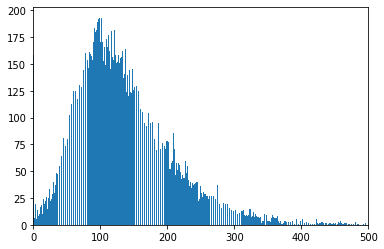

In [ ]:
from matplotlib import pyplot as plt
plt.bar(unique,counts)
# Display the plot
plt.xlim([0, 500])
plt.show()

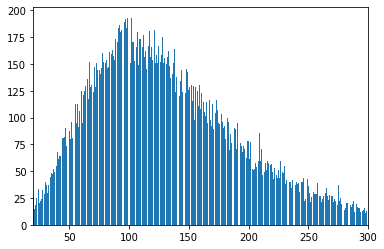

In [ ]:
from matplotlib import pyplot as plt
plt.bar(unique,counts)
# Display the plot
plt.xlim([20, 300])
plt.show()

7. taking the documents in which average sentence length is between [70,140]

In [ ]:
df.head()

,id,source,version,added,created,text,text1,splitted,sentences
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,investigation some characteristic of biocompos...,"[investigation, characteristic, biocomposites,...",[investigation some characteristics of biocomp...
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,modelling technique for conjunctive water mana...,"[modelling, technique, conjunctive, water, rev...",[modelling techniques for conjunctive water a ...
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete target coverage energy harvesting int...,complete target coverage in energy harvesting ...,"[complete, target, coverage, energy, harvestin...",[complete targets coverage in energy harvestin...
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,nonorthogonal multiple access enabled two-way ...,"[nonorthogonal, multiple, access, enabled, rel...",[nonorthogonal multiple access enabled relay s...
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 a case of complete atrioventricular block ...,"[case, complete, atrioventricular, block, alte...",[a case of complete atrioventricular block and...


In [ ]:
df['average'] = df['sentences'].apply(lambda x : sum([len(i) for i in x])/len(x) )
df.head()

,id,source,version,added,created,text,text1,splitted,sentences,average
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,investigation some characteristic of biocompos...,"[investigation, characteristic, biocomposites,...",[investigation some characteristics of biocomp...,109.363636
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,modelling technique for conjunctive water mana...,"[modelling, technique, conjunctive, water, rev...",[modelling techniques for conjunctive water a ...,101.700000
2,252643161,s2ag/valid,v1,2022-10-01T15:18:53.788Z,2022-12-01T00:00:00.000Z,complete target coverage energy harvesting int...,complete target coverage in energy harvesting ...,"[complete, target, coverage, energy, harvestin...",[complete targets coverage in energy harvestin...,133.714286
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,nonorthogonal multiple access enabled two-way ...,"[nonorthogonal, multiple, access, enabled, rel...",[nonorthogonal multiple access enabled relay s...,104.250000
4,254774363,s2ag/valid,v1,2022-12-17T16:19:10.635Z,2022-12-14T00:00:00.000Z,case complete atrioventricular block alternati...,106 a case of complete atrioventricular block ...,"[case, complete, atrioventricular, block, alte...",[a case of complete atrioventricular block and...,145.882353


In [ ]:
df = df[df['average'] > 90]
df = df[df['average'] < 120]
df

,id,source,version,added,created,text,text1,splitted,sentences,average
0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,investigation some characteristic of biocompos...,"[investigation, characteristic, biocomposites,...",[investigation some characteristics of biocomp...,109.363636
1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,modelling technique for conjunctive water mana...,"[modelling, technique, conjunctive, water, rev...",[modelling techniques for conjunctive water a ...,101.700000
3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,nonorthogonal multiple access enabled two-way ...,"[nonorthogonal, multiple, access, enabled, rel...",[nonorthogonal multiple access enabled relay s...,104.250000
5,254662410,s2ag/valid,v1,2022-12-15T16:12:33.400Z,2022-12-30T00:00:00.000Z,analysis hybrid guided bomb control system gro...,analysis of a hybrid guided bomb control syste...,"[analysis, hybrid, guided, bomb, control, syst...",[analysis of a hybrid guided bomb control syst...,100.666667
6,252033565,s2ag/valid,v1,2022-09-03T15:09:09.625Z,2023-01-01T00:00:00.000Z,adaptive output feedback control stochastic no...,event-triggered adaptive output feedback contr...,"[adaptive, output, feedback, control, stochast...",[adaptive output feedback control for stochast...,105.857143
...,...,...,...,...,...,...,...,...,...,...
3973,255301901,s2ag/valid,v1,2022-12-31T20:02:14.760Z,2022-12-01T00:00:00.000Z,difference sensory quality kimchi korea system...,the difference of sensory quality in kimchi fr...,"[difference, sensory, quality, kimchi, korea, ...",[the differences of sensory quality in kimchi ...,117.500000
3975,255186915,s2ag/valid,v1,2022-12-29T14:06:01.821Z,2022-12-29T00:00:00.000Z,gut microbiota mediates positive effect liragl...,gut microbiota mediates positive effect of lir...,"[gut, microbiota, mediates, positive, effect, ...",[gut microbiota mediates positive effects of l...,108.142857
3976,254525717,s2ag/valid,v1,2022-12-11T16:12:04.444Z,2022-12-09T00:00:00.000Z,antifouling antibacterial performance evaluati...,antifouling and antibacterial performance eval...,"[antifouling, antibacterial, performance, eval...",[antifouling and antibacterial performance eva...,97.363636
3988,255085570,s2ag/valid,v1,2022-12-25T16:13:54.675Z,2022-12-23T00:00:00.000Z,change pulmonary function test hospitalized pa...,change of pulmonary function test in hospitali...,"[change, pulmonary, function, test, hospitaliz...",[change of pulmonary function tests in hospita...,114.700000


In [ ]:
sentences = []
for i in range(0,955) :
  sentences.extend(df.iloc[i,-2])
sentences = list(set(sentences))
len(sentences)

10268

In [ ]:
df.to_csv("pre_processed.csv")

# TF-IDF

In [ ]:
df = pd.read_csv("/home/irlab/Documents/Share/Misha/Deep NLP/pre_processed.csv")
df

,Unnamed: 0,id,source,version,added,created,text,text1,splitted,sentences,average
0,0,254721023,s2ag/valid,v1,2022-12-16T16:07:05.559Z,2022-12-14T00:00:00.000Z,investigation characteristic biocomposites coa...,investigation some characteristic of biocompos...,"['investigation', 'characteristic', 'biocompos...",['investigation some characteristics of biocom...,109.363636
1,1,254200673,s2ag/valid,v1,2022-12-04T16:21:43.441Z,2022-12-02T00:00:00.000Z,modelling technique conjunctive water review o...,modelling technique for conjunctive water mana...,"['modelling', 'technique', 'conjunctive', 'wat...",['modelling techniques for conjunctive water a...,101.700000
2,3,244852373,s2ag/valid,v1,2021-12-04T16:21:39.980Z,2022-12-01T00:00:00.000Z,nonorthogonal multiple access enabled relay sy...,nonorthogonal multiple access enabled two-way ...,"['nonorthogonal', 'multiple', 'access', 'enabl...",['nonorthogonal multiple access enabled relay ...,104.250000
3,5,254662410,s2ag/valid,v1,2022-12-15T16:12:33.400Z,2022-12-30T00:00:00.000Z,analysis hybrid guided bomb control system gro...,analysis of a hybrid guided bomb control syste...,"['analysis', 'hybrid', 'guided', 'bomb', 'cont...",['analysis of a hybrid guided bomb control sys...,100.666667
4,6,252033565,s2ag/valid,v1,2022-09-03T15:09:09.625Z,2023-01-01T00:00:00.000Z,adaptive output feedback control stochastic no...,event-triggered adaptive output feedback contr...,"['adaptive', 'output', 'feedback', 'control', ...",['adaptive output feedback control for stochas...,105.857143
...,...,...,...,...,...,...,...,...,...,...,...
950,3973,255301901,s2ag/valid,v1,2022-12-31T20:02:14.760Z,2022-12-01T00:00:00.000Z,difference sensory quality kimchi korea system...,the difference of sensory quality in kimchi fr...,"['difference', 'sensory', 'quality', 'kimchi',...",['the differences of sensory quality in kimchi...,117.500000
951,3975,255186915,s2ag/valid,v1,2022-12-29T14:06:01.821Z,2022-12-29T00:00:00.000Z,gut microbiota mediates positive effect liragl...,gut microbiota mediates positive effect of lir...,"['gut', 'microbiota', 'mediates', 'positive', ...",['gut microbiota mediates positive effects of ...,108.142857
952,3976,254525717,s2ag/valid,v1,2022-12-11T16:12:04.444Z,2022-12-09T00:00:00.000Z,antifouling antibacterial performance evaluati...,antifouling and antibacterial performance eval...,"['antifouling', 'antibacterial', 'performance'...",['antifouling and antibacterial performance ev...,97.363636
953,3988,255085570,s2ag/valid,v1,2022-12-25T16:13:54.675Z,2022-12-23T00:00:00.000Z,change pulmonary function test hospitalized pa...,change of pulmonary function test in hospitali...,"['change', 'pulmonary', 'function', 'test', 'h...",['change of pulmonary function tests in hospit...,114.700000


In [ ]:
df1 = df
df = df.iloc[:500,:]

In [ ]:
sentences = []
for i in range(0,500) :
  s = df.iloc[i,-2]
  s = s[1:-1]
  s = s.split(",")
  sentences.extend(s)
sentences = list(set(sentences))
len(sentences)

5323

In [ ]:
sentences

[" 'electroencephalogram is a technique commonly used to identify epileptic brain'",
 " 'a case study then determined the antecedents of culture types and how they influenced pmo'",
 " 'these results indicate that oral supplementation with arginine to obese rats promoted the oxidation of energy substrates in skeletal thereby reducing white fat in the'",
 " 'a method for aggregating reviewers into groups with multiple members is'",
 " 'a key strategy to improve timely testing is hiv indicator condition guided'",
 " 'on inhabited where the complete eradication of feral cat populations is not considered control represents the best management option to lower their detrimental effects on native'",
 " 'we make use of the representations in the penultimate layer to interpolate coarse and incomplete'",
 " 'it attempts to clarify the legal nature of the electronic'",
 " 'mothers who support related to health care have the opportunity or or times to not have a stunted'",
 " 'as a of antibacteria

In [ ]:
l = []
for i in range(0,500) :
  s = df.iloc[i,-3]
  s = s[1:-1]
  s = s.split(",")
  l.extend(s)
l = list(set(l))
len(l)

9450

In [ ]:
context_str=[]
context_str.append(sentences[0][2:-1]+' '+sentences[1][2:-1])
for i in range(1, len(sentences)-1):
  context_str.append(sentences[i-1][2:-1]+' '+sentences[i][2:-1]+ ' '+sentences[i+1][2:-1])
context_str.append(sentences[len(sentences)-2][2:-1]+' '+sentences[len(sentences)-1][2:-1])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to obtain the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Get the feature names (unique words)
feature_names = tfidf_vectorizer.get_feature_names()

# Convert the TF-IDF matrix to a dense array
tfidf_matrix_array = tfidf_matrix.toarray()


In [ ]:
len(tfidf_matrix_array) # sentences

5323

In [ ]:
tfidf_matrix_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(tfidf_matrix_array[0]) # words

10224

In [ ]:
tfidf_matrix_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10224)

# Fit and transform the documents to obtain the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(context_str)

# Get the feature names (unique words)
feature_names = tfidf_vectorizer.get_feature_names()

# Convert the TF-IDF matrix to a dense array
y_train = tfidf_matrix.toarray()

In [ ]:
len(y_train) # sentences

5323

In [ ]:
len(y_train[0]) # words

10224

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [ ]:
W = np.random.uniform(-0.8, 0.8, (10224, 300))  # transform into the 300 features
W1 = np.random.uniform(-0.8, 0.8, (300, 10224))

In [ ]:
alpha = 0.001

In [ ]:
epochs = 1
for x in range(1,epochs):
            loss = 0
            # stohastic Gradient Descent
            for j in range(5323):
              # FFD
                X = tfidf_matrix_array[j].reshape(10224,1)
                h = np.dot(W.T,X).reshape(300,1)
                u = np.dot(W1.T,h)
                y = softmax(u)
              # Back Propagation
                t = y_train[0]
                e = y - np.asarray(t).reshape(10224,1)
                # e.shape is V x 1
                dLdW1 = np.dot(h,e.T)
                X = np.array(X).reshape(10224,1)
                dLdW = np.dot(X, np.dot(W1,e).T)
                W1 = W1 - alpha*dLdW1
                W = W - alpha*dLdW

In [ ]:
def predict(sentence,number_of_predictions):
  if sentence in sentences :
    index = sentences.index(sentence)
    X = tfidf_matrix_array[index]
    h = np.dot(W.T,X).reshape(300,1)
    u = np.dot(W1.T,h)
    pred = softmax(u)
    print(pred.tolist())
  else :
    X = np.random.uniform(-0.8, 0.8, (10224, 1))
    h = np.dot(W.T,X).reshape(300,1)
    u = np.dot(W1.T,h)
    pred = softmax(u)
    print(pred.tolist())

In [ ]:
s1 = "'mothers who support related to health care have the opportunity or or times to not have a stunted'"
s2 = " 'as a of antibacterial resistance is of particular concern due to inadequacy of alternative'"
s3 = " 'the particle size ranges from appearing irregular in'"

In [ ]:
pred_s1 = predict(s1,1)
pred_s1

[[2.682999546165172e-286], [2.796553732309197e-184], [0.0], [2.3317570208492172e-294], [5.8704739667320756e-186], [4.887125078730957e-235], [4.831125109715449e-243], [5.690600393427533e-309], [2.904835086915966e-305], [0.0], [1.0514703740053282e-244], [2.0545875638861733e-298], [7.128793098431064e-236], [0.0], [3.0095584668603335e-212], [2.444583300982607e-171], [0.0], [5e-324], [4.05734297e-316], [1.5681361957642057e-113], [3.688929536997421e-245], [4.765941796961257e-245], [2.8797667710936037e-274], [0.0], [1.8319436332868037e-195], [8.793938701433978e-200], [1.676521049797185e-143], [3.100403206586631e-244], [5.974706695096073e-309], [5.963373419559705e-289], [1.284719126577249e-162], [2.813727380056701e-254], [1.1416573246343333e-300], [9.2332780673585e-241], [6.8730365945e-314], [1.5512158169082909e-267], [1.8285279978731503e-308], [2.5125016249474386e-183], [6.25145e-318], [1.2647241978489327e-191], [9.163481433026671e-216], [2.34772667614e-313], [9.374104197121705e-303], [1.9946

In [ ]:
pred_s1 = [[2.682999546165172e-286], [2.796553732309197e-184], [0.0], [2.3317570208492172e-294], [5.8704739667320756e-186], [4.887125078730957e-235], [4.831125109715449e-243], [5.690600393427533e-309], [2.904835086915966e-305], [0.0], [1.0514703740053282e-244], [2.0545875638861733e-298], [7.128793098431064e-236], [0.0], [3.0095584668603335e-212], [2.444583300982607e-171], [0.0], [5e-324], [4.05734297e-316], [1.5681361957642057e-113], [3.688929536997421e-245], [4.765941796961257e-245], [2.8797667710936037e-274], [0.0], [1.8319436332868037e-195], [8.793938701433978e-200], [1.676521049797185e-143], [3.100403206586631e-244], [5.974706695096073e-309], [5.963373419559705e-289], [1.284719126577249e-162], [2.813727380056701e-254], [1.1416573246343333e-300], [9.2332780673585e-241], [6.8730365945e-314], [1.5512158169082909e-267], [1.8285279978731503e-308], [2.5125016249474386e-183], [6.25145e-318], [1.2647241978489327e-191], [9.163481433026671e-216], [2.34772667614e-313], [9.374104197121705e-303], [1.994656011518142e-251], [1.169532429142692e-208], [2.6344219033842173e-286], [0.0], [8.834219087466844e-266], [0.0], [4.292474825272025e-244], [0.0], [4.397386900111891e-154], [1.8404e-320], [8.918531150678396e-286], [2.5090351656583282e-238], [0.0], [1.0135981143599869e-250], [6.236822537604022e-241], [5.033901297766698e-197], [3.665361705330784e-226], [2.6238657357258007e-142], [1.171693201723429e-277], [6.489027854754935e-266], [2.737016084711178e-218], [1.2924319688393764e-196], [0.0], [0.0], [1.705076069045867e-217], [5.961630098641601e-187], [4.1084466035090695e-228], [0.0], [2.2243845253218766e-186], [2.0224059085751037e-206], [1.3259550898652928e-173], [8.685234203686542e-135], [0.0], [2.1134952556544913e-185], [0.0], [1.0239969036759222e-221], [2.0512026906747422e-209], [0.0], [2.8247857883591647e-274], [1.0851958583739312e-177], [2.119643668586712e-189], [0.0], [4.862092361819361e-219], [4.659884278293544e-85], [1.5736819586358628e-245], [3.177853041820094e-142], [2.5937963026025447e-134], [8.38122472846205e-206], [1.4292678113864257e-171], [1.27381057557582e-288], [3.934212796263555e-289], [0.0], [0.0], [1.7574378938314464e-266], [0.0], [2.5842706191683338e-258], [0.0], [6.142446594155624e-276], [2.8632401239926e-311], [1.0036646322999694e-250], [0.0], [4.444924995226211e-92], [1.2463250946298533e-231], [0.0], [3.3891328444724826e-277], [1.8591700438080337e-210], [6.156374438880404e-263], [1.4615940842636292e-182], [7.439118803226592e-268], [8.881127428310474e-257], [0.0], [5.2446093571930645e-258], [3.758377303562357e-278], [4.948760719502973e-149], [0.0], [1.5890858331234665e-145], [1.5825488295173363e-247], [1.206060588531015e-215], [7.62091670513839e-306], [1.0495240316402927e-204], [0.0], [1.9229986454710715e-160], [4.018249347083373e-211], [2.3203212933051827e-156], [2.4412904089237227e-265], [6.695583194674839e-261], [0.0], [4.6428809121913313e-290], [0.0], [0.0], [1.8821438331387938e-223], [5.3920009808225e-311], [2.0195497466763367e-308], [3.1905324900243004e-148], [0.0], [0.0], [4.6891531861170535e-229], [6.878229896052196e-233], [0.0], [0.0], [2.0410607239563982e-232], [1.9903113e-317], [2.9214550391781935e-210], [0.0], [4.017787243180382e-176], [1.8651442997871597e-270], [8.674835488676122e-160], [3.811660502760832e-236], [9.513257546481101e-218], [1.3178869475424955e-294], [1.7262244764051273e-188], [5.360476825857742e-152], [1.2451731752558785e-108], [0.0], [6.180590437513211e-279], [0.0], [3.017554629110824e-265], [1.1198103825864914e-238], [1.5747958822927092e-248], [2.0313646127272863e-216], [5.608398954679766e-261], [0.0], [1.2648061634436372e-222], [1.0613720782865747e-151], [0.0], [0.0], [4.729096805078047e-199], [0.0], [1.5524052703728146e-175], [0.0], [1.8881512754977813e-296], [2.126641428769849e-188], [3.2833260751028383e-230], [4.783895041597541e-303], [2.2199917972246017e-137], [1.6148629484927534e-208], [5.5485343349967396e-272], [0.0], [5.167468233318988e-171], [1.1515823659334116e-279], [0.0], [3.094694778620003e-254], [1.0673721852786866e-299], [1.2865876663958296e-207], [6.739010779833617e-280], [1.2131542664636486e-189], [1.0060454363225404e-260], [7.504941869850387e-254], [7.84218311057106e-293], [0.0], [2.672831038791545e-305], [1.3942344199845177e-185], [1.5433418435858807e-167], [5.282177465099809e-235], [1.2355926541117773e-170], [0.0], [3.6612395635238107e-255], [9.261858317176687e-294], [1.2580072583443357e-281], [0.0], [0.0], [3.8555568918516256e-149], [0.0], [5.986177480223419e-111], [4.721754771361635e-219], [3.3253941691054705e-266], [5.284278161104438e-265], [9.161133689239596e-283], [8.47349745990099e-177], [0.0], [2.507643465959358e-212], [3.615509790606405e-283], [2.1457247007726585e-171], [0.0], [1.2715979718390631e-171], [6.269428374713842e-294], [5.980220245227239e-293], [8.030419481829571e-238], [0.0], [0.0], [3.583813029918718e-264], [3.6369742838603213e-211], [3.2125002855592804e-163], [6.502002986522731e-237], [1.9981545980012395e-168], [2.8702609840106847e-280], [3.5336207321183765e-165], [1.7299809118771354e-269], [1.5920196e-316], [1.2532456075953665e-306], [1.270077720274295e-232], [1.5150095834135898e-270], [1.4054296190497183e-198], [5.111925782092059e-153], [1.4898782229132051e-204], [1.9127930183412808e-257], [1.74693366856357e-305], [3.762726347552103e-205], [2.205139009005385e-294], [1.3513e-320], [3.200824664682636e-212], [1.0366557607485865e-251], [0.0], [1.3661637537167e-310], [2.145907724823168e-150], [6.425197326616859e-295], [4.1432604990190115e-21], [1.3999525883910223e-299], [0.0], [0.0], [1.7493426248402683e-255], [0.0], [4.86183719803274e-302], [9.079566524422236e-303], [2.0477065990097802e-227], [6.511503853932479e-278], [3.546680235815309e-232], [4.279843877463657e-246], [2.779722121898585e-168], [1.8658327769660726e-250], [6.090805187138105e-180], [4.4824742188943217e-274], [4.4946192044257525e-189], [0.0], [8.749858565954223e-141], [3.4552254355335486e-306], [8.382145891357245e-182], [6.404077114858063e-234], [8.109174043666784e-288], [0.0], [0.0], [6.891841129814815e-273], [1.4675608374264556e-246], [3.268752908619426e-186], [8.159302353538695e-136], [0.0], [0.0], [0.0], [2.0668381078882255e-207], [3.13395104730916e-310], [4.023723087549659e-156], [8.66211602e-315], [0.0], [6.98419842799504e-195], [1.4188162369507375e-85], [0.0], [0.0], [7.134947323090158e-224], [2.5798211673397423e-308], [5.821584369767554e-130], [1.553912152198374e-213], [0.0], [1.7574302141514083e-301], [0.0], [1.2558962887157453e-306], [0.0], [9.226910576017504e-305], [3.8644136703366954e-291], [1.4874277519975234e-216], [5.765388156427608e-172], [3.044170284632272e-297], [1.55946979953e-313], [0.0], [1.4626027321562179e-134], [0.0], [1.6747459218918937e-272], [5.109705934656891e-277], [8.880527733808155e-187], [1.4034414160476507e-226], [0.0], [0.0], [2.160360952333123e-252], [1.4130082188260107e-285], [0.0], [8.291603637477362e-268], [3.4474344335780604e-116], [2.0218972435067923e-247], [0.0], [1.1185942763969294e-287], [0.0], [1.382621599331818e-248], [8.014112553386979e-281], [7.173525305063778e-211], [1.1245655129700428e-135], [2.744543635468376e-263], [1.0831331646409232e-226], [1.4508260367648277e-285], [3.137861417029211e-193], [4.691876648464e-312], [6.626056054208968e-269], [5.687391823823593e-286], [1.6808009547656156e-202], [2.3245169967126073e-256], [2.330096487898369e-273], [3.8652915728472e-256], [2.5576662308424346e-279], [4.288595933592225e-271], [1.3497139343672544e-306], [3.690519211674057e-289], [1.6384333734883388e-248], [0.0], [3.645375368883907e-185], [8.109118725628043e-264], [0.0], [0.0], [1.2935851835390367e-221], [0.0], [1.2484199389855523e-274], [4.277423676439184e-286], [0.0], [1.366819043983267e-247], [1.466478531857953e-44], [2.1756674877264744e-252], [3.4063114497523163e-223], [4.743e-321], [8.189759529161326e-243], [2.053237071666572e-170], [6.463926994172388e-280], [2.1868925634826436e-132], [1.536467308660249e-259], [3.203420027566371e-234], [1.8446020784154587e-294], [2.6751874265322863e-298], [1.076773872244399e-263], [0.0], [1.146069778846073e-261], [0.0], [0.0], [1.5707198607724074e-293], [4.105077223912754e-245], [0.0], [2.2317572211615183e-289], [0.0], [1.737213263228191e-158], [0.0], [0.0], [3.9026066275615186e-293], [4.0402451630088847e-159], [2.4536993292540938e-226], [2.3232133191178677e-275], [1.30893231788e-312], [1.5919055908324343e-275], [3.644116122854343e-223], [5.28193006446949e-277], [9.349722276966362e-205], [1.1571282589870373e-264], [2.703565232305947e-293], [0.0], [9.884184710465943e-302], [6.61194248943479e-229], [0.0], [9.527847836436178e-135], [1.6159535336296767e-296], [6.584236584872056e-246], [4.5573387795440845e-235], [0.0], [4.186646299241507e-294], [0.0], [2.7252648468137e-311], [4.9484755372198316e-204], [5.022671316290166e-191], [1.0458807227385089e-294], [8.838842761141162e-192], [3.656285595239939e-274], [3.905917438517071e-224], [7.712324187003072e-286], [1.333871158156333e-271], [0.0], [8.826740028297461e-251], [1.6795008745782623e-307], [2.349077100064664e-223], [5.92325699388295e-286], [3.4455831093803626e-248], [0.0], [0.0], [9.312870961452597e-160], [1.4030950971950283e-260], [4.297465677377933e-213], [2.892692653896698e-144], [1.3344806417138827e-282], [1.3796906506282192e-280], [1.036502729197779e-284], [3.749575976505239e-204], [1.760806879468729e-308], [0.0], [1.0126371458193264e-236], [5.195326896000795e-146], [0.0], [1.5916610295697597e-274], [1.337e-320], [2.915345009432918e-146], [1.5155577869116399e-09], [8.930986867263361e-222], [2.5503862254029755e-258], [0.0], [0.0], [7.164e-321], [7.630013492726386e-158], [5.111599701368207e-174], [1.2959881444014218e-299], [6.460689664921653e-256], [0.0], [0.0], [1.0182408259381366e-187], [2.281305826526843e-292], [6.037848284445669e-227], [8.247511477575372e-282], [2.1671403107307294e-287], [5.40952e-319], [9.248821877129297e-219], [2.396914680710399e-269], [4.6473965611289404e-250], [1.3119895984786351e-258], [0.0], [0.0], [9.400688802762665e-204], [1.5141373944120028e-203], [5.933501279839951e-198], [6.718478082886954e-144], [0.0], [9.789259727542433e-185], [0.0], [1.4209660615755787e-223], [0.0], [2.343415225289434e-297], [1.1e-321], [2.1636550330294836e-260], [1.6773660416788288e-265], [0.0], [5.018345200860186e-226], [1.7015540227319102e-301], [3.55141061113177e-247], [2.0118670509240903e-229], [1.3263835506885817e-112], [1.518799851473697e-271], [5.669742964720177e-253], [0.0], [9.14005370453285e-297], [1.0601615908924775e-177], [4.1601855099442045e-144], [6.295144472377875e-257], [0.0], [1.7841357732414125e-219], [7.702e-321], [5.060708635310675e-226], [3.1e-322], [1.2360896159195995e-230], [8.203405467703265e-280], [0.0], [2.49577570028527e-251], [1.1646040309686328e-275], [5.620765398567341e-265], [2.1013868566771837e-218], [0.0], [5.883752245909796e-306], [8.640901630425397e-205], [2.2589611005465477e-165], [2.1665042749488373e-200], [0.0], [1.6117601747056397e-259], [0.0], [1.3191388858737096e-279], [5.789438558792183e-280], [1.0936286034625118e-293], [0.0], [8.521156125572384e-203], [1.425320943853752e-268], [2.57978336407e-312], [1.2369750325851628e-295], [1.935387691528951e-273], [6.929422065655961e-211], [0.0], [3.277611254678131e-193], [0.0], [5.177551850768111e-205], [6.9172642760385274e-270], [8.200203484686292e-258], [1.1069927062000638e-169], [0.0], [1.904533181998011e-239], [1.2218356929770094e-179], [0.0], [7.62966065058969e-309], [1.0667721899216975e-242], [0.0], [2.7343002588704625e-249], [1.1956525924404263e-296], [6.248485844652667e-162], [4.759972035977953e-230], [2.84038242863e-313], [2.2080004979313627e-195], [0.0], [5.987927985654066e-296], [7.39369081712744e-291], [0.0], [1.9671885648681847e-259], [6.860729121652064e-286], [8.306334901918863e-279], [3.1660594263469713e-260], [6.668513419029061e-174], [5.016478375693334e-234], [3.2401421435056077e-215], [9.944106512386447e-276], [5.2821332935e-313], [4.010431607544342e-262], [0.0], [9.808487206e-315], [2.2630592995779262e-258], [0.0], [0.0], [3.009055180133e-312], [1.495945714191317e-166], [7.694295706266851e-205], [2.0752469239334923e-123], [1.9126701641030124e-171], [1.8012286735988233e-299], [0.0], [8.497873976122062e-256], [0.0], [0.0], [2.298306294195617e-284], [1.1242998e-316], [5.14265500872593e-298], [0.0], [0.0], [1.2773933215454111e-225], [0.0], [0.0], [1.800578703074992e-194], [6.111945344939544e-222], [3.561070840335097e-258], [2.601452886422629e-268], [9.7015e-320], [2.474480475691427e-157], [1.398728651342351e-201], [9.281568043249612e-182], [4.87789316340625e-127], [0.0], [0.0], [0.0], [0.0], [4.5817484873588376e-133], [9.160695271081703e-256], [1.320508762945635e-252], [0.0], [2.5315969009296327e-274], [1.6268401944709288e-289], [0.0], [5.255735898475608e-278], [2.140365530764558e-279], [0.0], [4.1518338733438235e-260], [6.136873460297201e-274], [1.364949683347535e-159], [5.2473446621831547e-253], [1.5033088701212776e-126], [1.4095496593825049e-180], [2.683119354735583e-199], [3.5620251318399926e-239], [0.0], [3.376354361268547e-193], [8.537594951064604e-232], [3.0582437909515047e-193], [2.4061735471633227e-279], [4.1649450402093834e-220], [3.606457941277077e-175], [0.0], [6.382223187015427e-140], [5.909320066326039e-198], [2.312787403709134e-202], [1.2014763445360235e-180], [0.0], [4.869275022409825e-301], [2.322298393874515e-248], [1.0149583739623066e-193], [1.1637928004333337e-228], [1.6781989483895672e-234], [0.0], [5.02784542517311e-283], [1.80656616040485e-309], [5.246974754335234e-269], [0.0], [5.843523799782953e-202], [2.2453185115684418e-228], [0.0], [0.0], [0.0], [4.5501062835015366e-211], [6.290699109385737e-290], [0.0], [0.0], [6.336968770520882e-283], [1.2631059739428776e-245], [3.27465302e-315], [0.0], [9.807921868146134e-125], [5.90746193891817e-181], [1.10824607216843e-214], [7.507350428619687e-255], [0.0], [3.393691305154757e-257], [9.180250405084186e-257], [4.6166153196011336e-296], [6.115625190828853e-230], [6.828321980314285e-297], [0.0], [3.4187194817037485e-270], [6.138457199287352e-143], [4.0122082408893643e-246], [2.1474656403548713e-292], [7.378604837693773e-150], [2.2336988661481792e-220], [1.954873248229845e-284], [9.115457381e-314], [3.8713744754895433e-165], [5.670573694789407e-287], [1.0265623627484732e-275], [1.58930342059e-312], [5.4006097200293775e-146], [0.0], [0.0], [1.0939975924180573e-307], [0.0], [1.778734953214355e-263], [0.0], [8.8906170066833e-311], [1.3119072428086013e-293], [1.681305647710932e-263], [9.977624474185042e-239], [4.3311414063586424e-287], [1.525909044380944e-242], [7.733260420657617e-225], [7.995570869457912e-252], [1.8935077992000218e-277], [0.0], [0.0], [3.8639861045549217e-283], [1.743242852258253e-166], [2.1681110152792153e-228], [7.633587586499108e-207], [2.494355694178423e-229], [6.574006038006413e-235], [8.645996470617995e-198], [0.0], [9.59161367249678e-208], [1.4017235034997445e-257], [0.0], [9.064321341527177e-187], [0.0], [8.222103152343061e-195], [2.905872594062154e-288], [2.271234629033709e-291], [1.2705937194124132e-301], [1.235202684e-314], [6.929539767702873e-207], [3.8513993342100906e-199], [1.8063677681382294e-302], [3.700757126697576e-142], [4.765083155673669e-296], [1.5216098401368665e-262], [1.8737027994498772e-272], [0.0], [4.2204368291877745e-42], [2.180052414184399e-210], [0.0], [3.9932437931671055e-295], [2.224253084804701e-231], [7.199724895307207e-275], [8.199201513983354e-268], [8.825449874743642e-274], [0.0], [2.8669790934640177e-287], [0.0], [2.438786725136804e-195], [2.2285096366785163e-297], [3.7292837103704016e-163], [1.9513780264697658e-171], [1.46627305e-316], [7.128598148746278e-167], [0.0], [0.0], [1.0613443713243892e-147], [0.0], [1.5553913614592063e-280], [0.0], [7.86968e-319], [1.0057936051489337e-225], [0.0], [0.0], [7.219707677263082e-282], [2.928615954094197e-285], [1.3746016618189214e-261], [0.0], [7.30628896124053e-141], [0.0], [2.7835740797479465e-292], [1.1251836293504199e-209], [0.0], [1.1936399171812554e-253], [9.305956266385403e-263], [1.0398284496369921e-215], [1.6214382893988094e-212], [0.0], [0.0], [1.7402117110863934e-298], [9.539073779388403e-251], [3.5184765533986294e-182], [5.32134398463593e-278], [2.030101705391607e-169], [4.2978257890630177e-234], [0.0], [4.913483901392131e-190], [0.0], [0.0], [0.0], [7.593584983090191e-142], [0.0], [4.3680840674408e-310], [0.0], [0.0], [1.1880051443630987e-222], [6.668844711100407e-247], [8.280302614232997e-300], [2.0160003289831e-310], [1.0378072220309735e-208], [0.0], [0.0], [1.2e-322], [0.0], [4.4053164954449554e-197], [9.277029503712314e-245], [1.6945277517547616e-265], [2.3040458717689628e-119], [4.56897e-319], [5.602145771575699e-241], [1.4455275620119367e-266], [0.0], [1.842754672135017e-293], [0.0], [7.020296586504421e-265], [2.9634434228594116e-101], [2.9898379932178243e-269], [1.27e-321], [4.6828185593660484e-175], [6.074726494175265e-243], [3.022778864478271e-292], [0.0], [3.806027273972199e-304], [2.0022652645761048e-296], [8.702687083671686e-285], [6.887902349761277e-207], [7.665747158102069e-219], [6.161326069604077e-100], [0.0], [3.23974389943563e-191], [2.2611890321131848e-117], [0.0], [0.0], [2.071e-320], [4.779961059320031e-106], [1.893602934109897e-232], [1.473555478542183e-182], [1.0245980632885966e-238], [2.52795672243499e-264], [6.571788654013827e-190], [0.0], [6.3414658290212345e-236], [6.672204126325001e-235], [0.0], [2.886433987140704e-267], [1.5646905616610848e-261], [6.584546653102584e-279], [3.4794e-319], [3.511867347286507e-226], [0.0], [4.11589431239e-312], [2.324457211098521e-273], [0.0], [2.3971405797904756e-278], [1.1462266816469317e-191], [1.3922241769685182e-279], [1.7552946410446256e-247], [8.325717610812863e-250], [0.0], [3.804441449891958e-258], [2.336144397525e-311], [1.1250678302697094e-278], [0.0], [9.191114006174494e-272], [1.6285690882256255e-200], [2.5839196845083663e-236], [3.482503897081735e-232], [1.4658735623637516e-147], [5.96519977120818e-219], [5.09145668657145e-196], [1.5398936013993558e-202], [0.0], [4.410808885800743e-215], [3.20031695925e-313], [0.0], [0.0], [1.935438284882385e-244], [6.060954483709514e-194], [1.7189218239381212e-304], [0.0], [2.932121125187167e-287], [3.489580255639195e-219], [1.0595373273260364e-308], [4.910124861649708e-308], [1.8420622518707452e-198], [4.566538502140024e-265], [1.7106065845543865e-266], [4.965200457268533e-224], [8.001272695477372e-281], [3.470124252739312e-254], [1.1011832842893229e-240], [0.0], [7.1187675e-316], [8.627341735222651e-231], [3.118691290051363e-250], [0.0], [2.4411872036219092e-203], [4.231114327472283e-274], [2.823216788231379e-169], [0.0], [1.373427354393898e-265], [9.598536665404104e-255], [0.0], [0.0], [0.0], [2.044898428535224e-180], [1.8143389126878203e-229], [2.018030194812145e-59], [1.1936873830439744e-291], [1.3607828266080922e-304], [3e-323], [2.166482078689203e-195], [9.228683418880389e-220], [1.276836833097064e-254], [1.9345872771768898e-305], [9.754970137692026e-243], [2.2141940400589447e-276], [9.699780604667693e-248], [1.6679934966297526e-224], [8.347043625931985e-202], [1.217536081143991e-283], [1.16099818405812e-256], [1.019496327718034e-217], [6.614706586286957e-280], [3.7333426454063706e-201], [1.6610837398435602e-230], [0.0], [1.2954285686680154e-179], [0.0], [1.972157452834702e-307], [0.0], [3.357520410995642e-301], [0.0], [5.6826210453692846e-205], [1.5322973882636314e-236], [3.3649696920167142e-282], [2.4431e-319], [4.277023806895939e-183], [1.3380718060937232e-215], [4.847636665986143e-305], [2.745586414868911e-295], [7.931781632395192e-187], [1.5857992009637958e-136], [8.263856093002619e-157], [4.633904613727565e-309], [4.525093922634692e-230], [0.0], [6.06375813e-316], [5.569781514348266e-206], [7.83249743472174e-252], [3.2275325408139564e-278], [2.0005556858397314e-267], [0.0], [0.0], [9.586901052958771e-300], [9.294974426113683e-275], [3.600492647415692e-208], [3.497554528610444e-137], [4.384612238642048e-294], [6.520745870902142e-138], [9.37113321239332e-266], [7.247972259657374e-172], [5.020577284916751e-297], [1.6137379109423846e-290], [1.5482818627270574e-172], [0.0], [2.815507894576356e-203], [0.0], [0.0], [0.0], [1.534954094513372e-253], [3.97908814381021e-282], [0.0], [5.286910813019064e-222], [9.074640404035479e-153], [1.879618103034507e-238], [0.0], [3.5243718969049342e-248], [3.966798864770583e-197], [3.499184554198467e-185], [1.5e-323], [1.4472427543182858e-120], [3.150601686529632e-255], [5.299323791197372e-149], [1.4593267685954765e-190], [5.2787268915660525e-118], [0.0], [0.0], [1.951420005773883e-271], [3.664977060890953e-307], [4.486973966141669e-255], [0.0], [3.474425873877465e-306], [1.126e-321], [1.92893614357243e-309], [7.91934010106384e-223], [0.0], [2.0412009892313272e-222], [0.0], [4.1851095420374016e-195], [0.0], [2.3298091410229187e-226], [4.754649543513971e-205], [1.8426285011948925e-156], [3.359860027873606e-247], [0.0], [0.0], [1.2469347796191657e-299], [1.4765951779746714e-102], [3.2845713685313304e-72], [2.531762533614971e-245], [3.8916125087485735e-280], [3.323901133687399e-218], [6.745379802708952e-236], [5.985959763672656e-244], [2.280967826248526e-307], [2.830735384868277e-168], [3.058720294566252e-293], [1.2573224587196484e-248], [2.3081935491424217e-203], [3.180301361332837e-122], [3.747739355906979e-228], [1.3770809773129397e-285], [7.541954813559687e-262], [1.2058515209477077e-279], [0.0], [0.0], [2.05510313484766e-306], [2.8904875508588594e-263], [6.449710007946985e-297], [4.274860790242574e-234], [9.104358424406342e-244], [0.0], [3.449005510497893e-305], [0.0], [2.3394248794824326e-279], [6.788733881067845e-205], [1.8562802827423684e-204], [1.480880694456565e-287], [0.0], [4.4501045050945155e-228], [2.2435988359208433e-272], [0.0], [0.0], [7.793612333255378e-244], [1.83975304e-316], [5e-324], [1.8208027871872944e-137], [2.097496343462561e-269], [1.9287449511382505e-197], [2.4850340150437133e-271], [1.04e-322], [2.691646362353965e-168], [8.749742283323556e-295], [0.0], [1.2581512671254974e-163], [6.779000404416907e-168], [1.114473972010717e-149], [2.41777080380888e-273], [3.9337323580506613e-206], [1.4425053520407948e-202], [3.9327849065804e-243], [1.205207840202967e-269], [0.0], [0.0], [1.8687533988105502e-262], [3.525139859705124e-250], [1.830817601901512e-209], [2.59516625913873e-215], [6.4895506439470584e-195], [6.669570206760676e-308], [0.0], [6.227943899110333e-269], [7.22365414562444e-144], [1.875664099885037e-262], [2.5062845695479425e-215], [2.431985132585944e-229], [1.2455666746657908e-245], [1.8064746549585467e-276], [4.017e-321], [3.6148833455982767e-140], [9.71912501680004e-134], [1.3068847883603214e-222], [2.859265163590634e-184], [5.534091842973667e-268], [4.500235445267793e-287], [6.896554733895548e-147], [7.565951064415871e-187], [3.2370568363433657e-273], [4.738577774368841e-217], [1.2827805037788328e-236], [9.806412713961735e-173], [3.990387780078793e-243], [4.7075903701755195e-301], [0.0], [4.8522206904819385e-293], [0.0], [0.0], [8.61677182814725e-212], [6.994883637479466e-195], [0.0], [5.661110190355525e-260], [0.0], [2.4820234555589104e-273], [1.438299793782985e-233], [1.0395806283390831e-153], [1.1032266572477567e-287], [5.569577465399e-311], [0.0], [2.583625218870664e-255], [3.134373911668408e-166], [0.0], [0.0], [6.29888344553458e-203], [3.8949749594455323e-292], [3.3029118135690185e-285], [1.843992852534149e-46], [0.0], [5.131704726115345e-169], [2e-323], [2.0141417205447944e-244], [0.0], [2.125761260128919e-265], [1.817798629612201e-278], [1.3860554363433035e-203], [1.9760128082602136e-252], [1.4466990120235756e-177], [0.0], [0.0], [1.7307655290545e-310], [9.503489638847998e-192], [5.1311894664012506e-272], [2.2090266142814225e-270], [0.0], [3.633374860000689e-208], [3.1230677195695775e-218], [1.9137440627278378e-264], [0.0], [3.227284997004207e-241], [8.301867781024066e-109], [2.6577847393498275e-284], [0.0], [3.6088958814282465e-175], [6.094613832689182e-197], [1.912774604e-315], [0.0], [4.046135119176558e-211], [0.0], [5.106472750391194e-283], [2.7916876746547033e-196], [1.3647192152100459e-281], [0.0], [0.0], [5.9342645e-316], [5.983210736736019e-267], [9.720370018770146e-114], [0.0], [6.574030940062551e-203], [0.0], [1.658534757997303e-285], [1.1741143798098566e-296], [8.26285592494632e-285], [9.833899419008425e-248], [0.0], [1.877824194068324e-194], [0.0], [0.0], [1.734587748327149e-108], [1.3259484303502628e-139], [1.36817285379346e-290], [3.4558242426001583e-209], [0.0], [9.54318366005753e-152], [9.474098783016922e-246], [3.286261599684564e-288], [0.0], [2.3748835885830676e-209], [5.27282550803392e-260], [3.7743030332249654e-291], [0.0], [4.294815629010667e-180], [2.831191558286664e-219], [2.8531865689755973e-169], [0.0], [1.696076966228744e-257], [6.111450913447861e-175], [2.66934401820844e-310], [8.418992048627628e-303], [0.0], [0.0], [6.621449388233603e-266], [2.1952847538672433e-207], [5.276515293955853e-154], [2.5333656151764846e-265], [3.963161890149752e-220], [0.0], [0.0], [2.065053050259508e-166], [0.0], [2.832309052834932e-91], [4.752168682150802e-297], [3.6569286778173217e-277], [0.0], [1.2951963590439248e-255], [6.11081338980711e-232], [3.001225837512043e-293], [5.2586546450561745e-230], [1.686304064570255e-111], [0.0], [1.0634834275854119e-213], [0.0], [0.0], [3.397856433128076e-282], [1.6023875240825557e-279], [1.6247896038083524e-298], [0.0], [6.786053994710598e-277], [5.317866422144281e-237], [1.8679879873577972e-217], [3.9974639144523477e-280], [0.0], [0.0], [0.0], [3.5031444806341785e-302], [4.5723462572119496e-188], [2.8342466949260626e-263], [0.0], [1.5866975170377373e-277], [0.0], [8.381451783371445e-260], [2.7977036421679113e-206], [1.2468213818192923e-210], [1.1013170227477673e-240], [4.891371560506698e-239], [2.0439709507123083e-176], [1.8559258601517707e-244], [0.0], [4.411190917264453e-267], [7.848737860792637e-224], [3.074058149935e-311], [0.0], [0.0], [2.3403657335431894e-274], [7.547611881825952e-202], [1.745646196213456e-238], [1.6550956114750928e-200], [2.335505108884543e-215], [1.265253149929536e-275], [3.181063032106171e-157], [1.0420204020242086e-252], [0.0], [0.0], [0.0], [0.0], [4.60553964e-316], [4.327760296957217e-251], [6.082050003066851e-269], [0.0], [0.0], [2.4562701655207107e-174], [3.4520219714817564e-160], [0.0], [2.556251209638966e-234], [8.844159670793405e-245], [2.656634279002559e-306], [6.825823537364116e-197], [1.1429259960735707e-215], [3.630077492845179e-259], [0.0], [4.06697453971566e-286], [0.0], [0.0], [1.73401163584248e-111], [0.0], [0.0], [0.0], [7.190681606828778e-88], [5.439265283412588e-234], [0.0], [4.023519656157104e-307], [0.0], [0.0], [1.0079965527716264e-142], [1.0878031729281179e-261], [2.5099205802903812e-176], [0.0], [2.1886447123007887e-124], [8.646119106625553e-221], [0.0], [3.3084971925098294e-246], [3.457027553764689e-259], [6.763355938227515e-292], [2.870841499916607e-147], [4.532405382569274e-204], [6.13143807771269e-259], [1.6592748802442544e-266], [3.953709865421665e-303], [1e-323], [0.0], [3.78498984105944e-310], [0.0], [1.9889223640622572e-187], [3.169336066656897e-255], [7.004578812618674e-290], [9.818306151041812e-211], [8.21267260851385e-188], [1.2703144803054466e-264], [1.2928592276857952e-271], [1.3018911308417585e-304], [7.098515955944433e-199], [3.5335879874127154e-223], [8.333885639008189e-206], [2.2885189929931268e-94], [1.2141345905194137e-222], [7.52297024712229e-158], [4.4268192344687985e-269], [0.0], [1.2446496671058253e-121], [0.0], [4.052068022464515e-257], [1.238294110293719e-291], [8.586591959294122e-254], [1.05790695891402e-295], [1.957343456023528e-304], [9.105997465611755e-262], [4.4584007762031955e-245], [1.885939989353491e-290], [5.701264891785054e-299], [5.46064049e-315], [1.5813305868478942e-209], [0.0], [0.0], [1.4334621859418096e-192], [1.1938043742674308e-269], [2.993848687469901e-85], [5.286726624964117e-236], [5.02734457592752e-249], [6.511091331514e-276], [1.1079780230605868e-278], [3.262899050725682e-278], [2.6364564619665643e-248], [5.398475244227034e-249], [6.04708147709667e-206], [1.633583888055233e-218], [2.4906389881910796e-201], [0.0], [1.7964296984803415e-227], [4.6488725963623036e-247], [8.3186599439009e-310], [0.0], [0.0], [1.0272240552024657e-296], [0.0], [2.5200505e-317], [8.766145219194417e-193], [5.6351463875788064e-235], [2.1156684755260785e-296], [7.794142868440738e-277], [1.0124059939965531e-184], [0.0], [1.0431748680039355e-293], [3.823198862818556e-143], [4.961902090388504e-247], [3.3620657079350177e-281], [3.4099632263496345e-187], [0.0], [9.37535439163251e-255], [1.2722402123419464e-168], [3.735566315076285e-158], [5.064743621932224e-278], [0.0], [1.3879107934093688e-119], [4.842418798100777e-303], [1.4346333075083501e-285], [9.011108989053414e-186], [6.928486436880101e-235], [2.629742462770012e-289], [4.862704605244588e-217], [1.2428191323779565e-305], [1.957912751714592e-281], [2.573435945e-315], [3.2873948987033184e-272], [0.0], [2.0522076577749143e-210], [1.1280295672078e-219], [2.3057899533513412e-303], [3.544414384e-315], [1.7565945968225416e-215], [0.0], [5.386577386636581e-205], [3.487001966312866e-232], [0.0], [0.0], [6.795051687224305e-240], [5.8303508840288386e-238], [0.0], [2.4553449869787106e-188], [9.039746051801851e-113], [0.0], [1.5e-323], [0.0], [0.0], [0.0], [1.32463786655706e-235], [2.422135099921429e-295], [0.0], [8.971463535159228e-192], [1.3656107041841208e-198], [7.330707531278175e-258], [2.1853507048052988e-262], [7.84962211229209e-239], [1.0217871702247422e-257], [2.8926750803577944e-226], [1.7293470235418824e-265], [7.1e-322], [1.3653588598660612e-257], [6.611821087197573e-209], [0.0], [0.0], [1.5736180850439728e-295], [8.733328814560158e-189], [0.0], [1.9877191249778672e-293], [4.161730563890121e-256], [3.962201033515155e-289], [2.203038462156078e-174], [0.0], [0.0], [0.0], [0.0], [0.0], [1.4968244529264167e-223], [3.918775131873503e-108], [0.0], [7.66457878321676e-238], [3.377767015187929e-182], [1.1688334069146696e-148], [1.1234933980325283e-256], [4.4e-323], [3.552549081437198e-145], [4.595882464519359e-221], [4.212121639110439e-200], [2.7353967888600966e-268], [2.430631467995916e-108], [2.6906811083728693e-169], [3.030087539225041e-172], [1.802294453448655e-236], [1.9010802868142564e-297], [3.353386460963324e-278], [0.0], [0.0], [5.853741484375606e-200], [3.2200441235031342e-164], [6.542206833935878e-176], [9.73235686107734e-170], [2.508384148175407e-250], [0.0], [2.067156370998559e-238], [8.896293995451386e-227], [1.0145318154984544e-221], [9.504230612935473e-223], [6.426506049334271e-193], [0.0], [1.6194890120814143e-276], [0.0], [2.0975519461113435e-270], [1.5274008497015414e-195], [3.7348351680209423e-270], [1.8825938105637034e-245], [1.345411464367819e-252], [3.981980721286601e-283], [0.0], [3.7960552271574722e-205], [2.4581827263845823e-279], [0.0], [1.0264906910022683e-218], [1.0588998601501397e-307], [1.5796411069767236e-254], [2.3031117214717697e-254], [5.121108414258016e-220], [6.784151548050138e-167], [6.054777189758803e-242], [0.0], [0.0], [5.373701844294657e-211], [1.1478481190111624e-285], [4.8075577023402e-310], [0.0], [4.6550700763792475e-250], [1.3594e-319], [5.4131067171203944e-245], [0.0], [2.6783712483874374e-241], [1.3626120864418453e-244], [1.388400704e-314], [1.1075202709058597e-254], [2.495027330605341e-234], [0.0], [2.2426440614252296e-207], [4.917602425217742e-210], [1.0153599583495946e-104], [6.190937312401047e-214], [5.70054391129201e-265], [0.0], [2.4651958529918215e-274], [1.9808151260107113e-227], [1.4424110896260115e-190], [2.670776404300432e-271], [0.0], [0.0], [1.9450768875857488e-234], [2.0988268520665264e-165], [3e-323], [0.0], [1.5018572993582384e-120], [3.734653433803375e-301], [1.8901121688036888e-242], [7.311649260543099e-239], [1.67459e-318], [5.332288719011953e-274], [3.690073814218971e-267], [2.4611716903896044e-249], [4.681475289651181e-173], [6.459937e-317], [0.0], [2.723431661568043e-300], [0.0], [1.7441008991885007e-255], [0.0], [0.0], [0.0], [5.41089154e-316], [3.146862706899602e-298], [2.787566205266066e-256], [0.0], [8.059127011416818e-288], [7.9913087866783e-310], [1.5882923000047223e-199], [3.249260400686187e-233], [4.499684010684113e-235], [1.65157588368755e-217], [7.597009551043735e-162], [2.8158195904906985e-286], [1.1543879320321527e-265], [5.449800763945144e-246], [6.940483389040409e-172], [7.342773754151987e-139], [1.9098254147072084e-279], [6.549621698751135e-231], [2.7000207731693904e-166], [2.7762671203563276e-204], [3.968962809712241e-203], [7.330268690028012e-191], [7.052942979996212e-273], [1.0979973666150304e-203], [0.0], [0.0], [2.637986774703422e-254], [0.0], [1.0808040398446322e-291], [1.03e-321], [1.8750056027388944e-215], [3.25104984743213e-184], [1.174702216813799e-261], [0.0], [0.0], [0.0], [0.0], [0.0], [7.888030611827977e-266], [0.0], [0.0], [1.060754592239306e-233], [1.2913293334012572e-162], [9.9510816036e-313], [2.7766310658853856e-198], [3.9972158607394934e-190], [2.4849022790131018e-250], [3.113741065266179e-297], [3.12205260589e-312], [1.0552811484246729e-231], [8.273745176946652e-204], [8.917842310236223e-255], [3.401357590408497e-266], [0.0], [1.5706470766073841e-260], [0.0], [9.804148984419147e-150], [2.901662776279631e-212], [5.126126532632566e-230], [4.794845035821293e-219], [5.159307105831795e-217], [5.534584538081453e-274], [1.3074146551745279e-287], [2.5150698599084785e-263], [9.338900784404094e-294], [6.660016213716376e-246], [4.5691109745906455e-268], [9e-323], [4.922385995105489e-221], [2.2185181661437862e-207], [0.0], [0.0], [7.8221855e-316], [0.0], [2.5021839282969744e-282], [3.119830815532024e-214], [2.0186520954444804e-284], [3.8380546330621614e-260], [2.5619183842247863e-60], [1.5583305704410682e-199], [2.0654493923946656e-290], [1.7169264307402087e-204], [3.6106882075139574e-257], [1.755508741278165e-112], [1.1570543869115279e-293], [0.0], [8.6596655353448e-295], [2.819938916923574e-241], [0.0], [0.0], [6.9906712971402405e-168], [3.498013129169836e-198], [2.227627079093406e-164], [0.0], [0.0], [1.7324960877653216e-134], [1.858885111602827e-252], [0.0], [3.830462148523406e-283], [0.0], [9.616450098517286e-275], [0.0], [0.0], [2.7888376771841577e-300], [1.512747540030274e-206], [9.369639661916438e-271], [9.385352429e-314], [3.9440903987240787e-205], [4.812709264348775e-238], [1.8159072731760788e-256], [5.660734365487953e-263], [4.153210404645274e-258], [1.327103344041042e-199], [0.0], [3.150627328829929e-187], [2.2453762973855673e-263], [1.2591e-319], [1.1153881119048116e-168], [1.7161548629016148e-117], [2.2978282969510906e-222], [1.5575117341846217e-96], [6.931147845434733e-233], [1.6153397145713795e-277], [1.0713388565962302e-283], [1.3213627636688084e-140], [0.0], [1.973096315813439e-214], [2.4183837967174635e-284], [4.006010370767494e-148], [7.107323250359825e-254], [1.093560027252777e-262], [0.0], [1.0709e-318], [8.19724e-319], [5.840651817287631e-152], [2.986739811699685e-217], [1.469092553864568e-300], [0.0], [1.8364161435480193e-192], [0.0], [0.0], [7.117843578230158e-266], [9.991825268118285e-308], [9.251945820559315e-277], [1.06525659283e-313], [1.4182962462712678e-183], [3.406387642479943e-284], [1.230739939159386e-148], [2.4448496273373473e-197], [5.667220210432593e-122], [4.7582186947432105e-213], [0.0], [1.4799085099567648e-207], [5.068851179184403e-87], [1.8483566836699633e-197], [3.495148919214657e-291], [7.434090743585684e-76], [0.0], [0.0], [0.0], [7.362391939421301e-238], [7.533575594224286e-283], [0.0], [1.190041173684406e-218], [1.0760777357888534e-220], [1.5211029402965332e-159], [8.229872191426341e-228], [0.0], [4.6129720783681377e-296], [1.2406439655314339e-45], [0.0], [6.873499195877076e-250], [5.332032613198678e-139], [0.0], [5.243909834578727e-234], [1.649332948864768e-210], [3.4438128486685565e-289], [0.0], [8.55209330100415e-279], [0.0], [4.845534605521645e-255], [2.5684651833429128e-291], [0.0], [0.0], [8.539150832723359e-213], [2.3368308212032257e-175], [2.5e-322], [1.6686565866527304e-300], [0.0], [0.0], [3.1906561980788062e-224], [3.8219939877825006e-291], [3.958810149153942e-241], [7.3964940886e-314], [2.084241400786486e-252], [0.0], [2.72844276121325e-221], [3.016247332445997e-226], [5.613594e-318], [4.003329778074562e-282], [0.0], [6.647965640168212e-260], [0.0], [0.0], [0.0], [3.6423507083073685e-261], [6.641726653461985e-294], [2.9717223457099777e-246], [3.02213574733e-313], [1.1855172553014966e-126], [4.444821080261989e-193], [8.266e-320], [1.9856789251877985e-262], [1.065411215077685e-232], [1.7979981703865738e-183], [1.340841636855484e-277], [1.43712770713802e-292], [8.546253988340139e-165], [1.7731292828582087e-197], [8.562229641498798e-263], [3.7925552375789316e-173], [3.019088371628744e-174], [2.5146621954636734e-227], [5.954906387560798e-168], [1.880169533416571e-159], [0.0], [3.22272091e-315], [1.2860589805379667e-223], [1.2354898556021315e-269], [4.310972014014684e-196], [4.94865100147e-313], [1.0471133274002455e-244], [4.9054289153896036e-105], [9.841800568888108e-297], [1.6461513560777645e-249], [6.733210621082053e-297], [2.601860360726718e-249], [7.213976270165948e-223], [1.1558625247737147e-235], [6.410933751009004e-225], [7.747018598611672e-297], [1.2325977707597995e-261], [6.88780922028235e-173], [0.0], [9.769411326303313e-196], [1.0675981143508535e-214], [0.0], [6.679507126335106e-291], [6.787943603406295e-189], [1.031162100852101e-190], [0.0], [1.9295536496479154e-279], [2.716817761473295e-269], [1.4681349394e-313], [1.4997503470205167e-281], [1.7685497263342165e-266], [0.0], [3.141720928679563e-240], [0.0], [1.0106137408478226e-284], [4.265712614683886e-194], [3.1645138843867427e-273], [1.350416377257047e-279], [0.0], [1.2060240580722993e-267], [1.9115378414004175e-237], [1.0701751405798442e-236], [5.949904189215865e-283], [0.0], [6.300207248021855e-264], [0.0], [2.766427112174555e-302], [3.982545394883905e-300], [1.3213850765613002e-258], [1.7511216890706145e-214], [1.8274216170069684e-204], [0.0], [0.0], [1.8917170538098054e-282], [4.645703e-317], [1.1922975178322336e-216], [6.727872321956504e-175], [1.6714649560585395e-304], [5.222002942993694e-221], [0.0], [0.0], [5.202954732365426e-308], [8.5245799684e-314], [8.5920325354e-313], [1.7598159293251803e-158], [2.6538941771598323e-191], [2.324883183708425e-289], [7.561814650682743e-195], [4.4772881904522674e-213], [9.569606184497841e-181], [2.3200883995524993e-215], [7.027358351811833e-267], [1.508675156950464e-302], [1.977179219606979e-276], [7.608547433757373e-228], [0.0], [2.9670329490366187e-274], [6.692573638209053e-198], [0.0], [8.6407e-320], [1.0360152026000201e-185], [5.318099909164927e-299], [3.2928274608949805e-231], [4.914233189665942e-211], [6.027983792559668e-152], [1.4676934096304841e-204], [4.096975402006803e-307], [5.681802332722219e-253], [0.0], [1.2135981356973517e-223], [0.0], [4.648602332192876e-246], [6.773877020439226e-186], [6.113579826228883e-223], [0.0], [1.39750962855001e-277], [7.630070830553712e-118], [0.0], [0.0], [6.196044211395142e-216], [0.0], [1.244517086347517e-246], [0.0], [7.408822987692289e-163], [8.263994e-318], [1.1549626034695522e-289], [6.390941456625049e-198], [1.085818903218621e-228], [3.015978036623633e-275], [3.7450112078631034e-166], [9.911421961322803e-245], [1.0268191930524579e-301], [2.3748142903457155e-226], [0.0], [8.686030539609417e-216], [1.0328689929579925e-135], [2.351499567918162e-227], [1.552987771688005e-224], [5.034612312920045e-255], [2.8305985735788352e-304], [3.0436501930644567e-307], [2.3321369760963203e-292], [1.3375564933023703e-230], [2.413137730637949e-292], [0.0], [1.2317493583643397e-273], [6.06068974e-316], [1.1891960387058322e-170], [0.0], [1.5282956882744832e-197], [1.0445e-320], [1.7726840453306447e-165], [7.515830673192112e-184], [9.149261464070838e-276], [4.126432306230524e-217], [0.0], [0.0], [0.0], [1.1531852674391264e-252], [1.582768099421891e-243], [2.2349727145556538e-209], [0.0], [1.563060028344149e-298], [2.038684010125145e-205], [1.1804740484591437e-215], [6.629863359722651e-271], [2.2471523000780615e-282], [1.18956e-319], [2.0953826800637177e-199], [0.0], [6.657198040556827e-237], [4.251203956737146e-280], [1.7723097377304808e-248], [1.6557659150401164e-209], [2.619255210314194e-159], [7.59715630815481e-250], [1.61959e-318], [0.0], [4.349493311155589e-210], [8.81075173757667e-175], [4.641308518282971e-233], [9.87385585768199e-273], [1.9825121077239116e-280], [9.902628745823399e-217], [0.0], [7.544631325952861e-243], [2.700817955467502e-302], [9.964870033030376e-302], [0.0], [2.0916473631587554e-291], [3.0071663334763686e-285], [2.627097060318185e-169], [0.0], [2.687241292855678e-226], [6.059407039922477e-210], [0.0], [6.257017233286526e-225], [4.13607175760658e-76], [2.2337993589481796e-220], [0.0], [7.196633284049571e-180], [0.0], [9.855465209088122e-228], [3.235493847560857e-224], [9.835763029372682e-245], [1.09259810084645e-310], [5.596455778458093e-209], [3.38e-321], [1.2825787861570116e-107], [0.0], [3.5009498901657814e-286], [5.44265620591379e-303], [0.0], [0.0], [2.5e-323], [1.689148725976575e-263], [8.656606231334077e-171], [3.028987166329837e-247], [2.0680451764800863e-236], [1.1379949566996352e-223], [1.0374816087852166e-263], [1.5200568955940392e-186], [0.0], [0.0], [1.736248293842246e-95], [0.0], [0.0], [0.0], [3.311783011624983e-115], [9.791483056282923e-276], [6.041915876406974e-272], [0.0], [5.764337372654e-311], [0.0], [3.614193336e-315], [0.0], [0.0], [4.178613134e-315], [1.6448570074900652e-144], [0.0], [2.6492047594002013e-264], [2.94857860250595e-240], [1.1599632660546338e-146], [0.0], [0.0], [9.15218768608036e-186], [3.2006251121523e-275], [1.2931403406551157e-162], [7.0089165885967494e-214], [4.036439664930968e-198], [7.052233060305619e-264], [4.069159068805381e-177], [5.3724235295e-314], [1.928159342665455e-309], [0.0], [0.0], [9.318912519911048e-224], [2.2002041495606042e-203], [9.396697534929823e-158], [0.0], [7.18136855503798e-287], [1.9726177364157754e-232], [0.0], [7.556743233578021e-201], [0.0], [2.546925334000931e-115], [5.486961794898443e-160], [0.0], [3.01280455e-316], [1.2737965160760226e-217], [2.1013510933878047e-174], [1.2965691945785687e-204], [4.1816997563608445e-303], [5.5652917734176475e-269], [7.691791439137634e-210], [1.4805485508038637e-264], [0.0], [1.6919288597655185e-216], [5.0766268381556686e-303], [2.9735012950378244e-204], [8.345609512584143e-201], [0.0], [0.0], [0.0], [3.194530871053465e-230], [1.594017072788687e-240], [3e-323], [5.514325231717809e-176], [0.0], [1.5120524998761667e-272], [1.3180707973e-314], [8.151750820785926e-181], [4.133474609157156e-297], [2.854094461828039e-276], [1.7720363965936447e-299], [6.748279568370953e-248], [1.9895658143512284e-249], [2.4541570051653763e-246], [8.643969221939669e-251], [7.043938978812749e-247], [0.0], [2.52900153291853e-206], [1.12183789755653e-283], [3.1044466431504645e-289], [0.0], [4.5965419410608435e-307], [2.682624098003272e-228], [0.0], [3.1210286498150033e-211], [4.107930766607978e-124], [2.7368154668350217e-299], [1.4652300968016363e-272], [2.8050427896515687e-241], [7.700941592090237e-295], [3.6526035797147e-310], [3.840664383273217e-194], [2.98978697978641e-234], [0.0], [1.8712438678769883e-272], [0.0], [0.0], [3.432753245547365e-209], [0.0], [0.0], [3.823096608977238e-298], [1.989488471241887e-276], [2.1785856064023973e-224], [3.02e-321], [2.5818933419561713e-238], [2.705777954199745e-215], [4.5357262110852806e-142], [1.5646131834333715e-256], [0.0], [5.92581265766589e-155], [2.7661261812142933e-270], [3.2922251069741745e-201], [2.27359211644658e-121], [0.0], [3.359887210854806e-197], [0.0], [6.528528267803318e-251], [3.1096849455732955e-205], [4.63478499652298e-226], [1.0684988888416826e-231], [3.636225694089524e-241], [8.252367265427455e-216], [1.6914666512066916e-172], [0.0], [7.083959446118959e-254], [3.253177559045957e-258], [4.845699962955632e-157], [2.0174099548457187e-104], [5.965818467804917e-213], [3.173e-320], [1.1517414425034716e-184], [1.2222629861552446e-162], [5.04320236583629e-279], [0.0], [1.7714513517467316e-207], [0.0], [2.1366998968074327e-259], [2.1807990949244177e-170], [0.0], [4.486293987743324e-167], [0.0], [2.2275512517816035e-201], [1.8850908105610255e-255], [4.1343537748718207e-275], [1.1231784643189263e-203], [1.3183523186499982e-144], [2.405228499936485e-127], [3.304393917216722e-186], [1.1808295307541628e-284], [1.2109565537405663e-264], [2.2175880515831897e-265], [2.4941154867888536e-234], [1.4371703e-317], [1.0605184631219693e-294], [4.376317627707185e-233], [4.29487444347e-313], [1.7556103520910752e-271], [7.377154300288205e-279], [0.0], [1.2952580621456485e-154], [0.0], [1.5244116422346234e-238], [8.56828122999e-311], [4.5276278715564404e-269], [4.78298613560843e-291], [1.5712847399447687e-272], [0.0], [4.8148700347291773e-237], [0.0], [0.0], [2.444701989851371e-201], [1.5244275770185104e-282], [5.622661367072452e-253], [4.224431166444309e-232], [2.974009587615459e-271], [2.8854536648017503e-305], [5.14367919457693e-264], [0.0], [0.0], [1.8080685543372396e-281], [1.7643771821585518e-232], [0.0], [5.66298016751173e-293], [1.2234544662252324e-212], [8.501899392698297e-278], [2.8893071075450945e-264], [0.0], [9.592547082179037e-127], [2.87e-321], [5.510359445679791e-208], [1.7709273855575756e-269], [1.3458613819437918e-229], [2.6891806982351294e-229], [3.647125695488993e-261], [0.0], [1.8626156937718385e-238], [0.0], [2.198277140666229e-249], [9.178943581645557e-227], [0.0], [5.76622728278317e-307], [1.3666304645843856e-173], [0.0], [1.21453647479724e-310], [1.5879356656717e-310], [2.636704984e-315], [3.286838207705911e-274], [8.530108741341993e-241], [0.0], [1.1371425875542494e-239], [0.0], [6.61023348754996e-159], [6.841065138207793e-65], [2.036520744952684e-309], [0.0], [0.0], [0.0], [1.1131481840268179e-290], [5.99678536147715e-310], [1.1801473614499248e-241], [0.0], [1.3651659097898637e-290], [8.35801508969793e-135], [6.562282073067728e-287], [0.0], [0.0], [2.885036874229826e-159], [6.216821486188935e-286], [5.929244e-316], [2.9817223966727384e-296], [2.447643039579223e-266], [1.3988844751246682e-259], [1.856638871591016e-186], [1.429921601170694e-209], [3.505860402627877e-171], [2.1754736548637e-311], [6.509567559415665e-296], [5.463286845813152e-296], [3.7400887749877217e-199], [6.164491257590646e-157], [1.2166735814692707e-184], [5.964664145235562e-283], [4.5267225676868445e-214], [7.139187060253041e-253], [7.243396443222047e-203], [0.0], [2.7956840979859397e-258], [2.2735627970568425e-195], [3.061509717097421e-252], [1.6287003703887535e-290], [0.0], [8.926525319646889e-160], [0.0], [4.001831464624608e-135], [0.0], [6.752107050503944e-296], [2.1287852246085643e-248], [8.62568e-316], [2.8220200061234974e-185], [2.258351632786347e-212], [4.9230624458610396e-266], [2.1261657226009925e-273], [1.0351951455723754e-238], [7.413377867131949e-299], [7.096231473710216e-186], [1.5095745342286157e-252], [3.949705755187647e-266], [1.1534417236622367e-268], [1.3712025287713337e-295], [7.202633427315531e-252], [1.1768416e-317], [9.235122968759547e-307], [0.0], [2.2691686330273273e-89], [4.2627535002815e-311], [0.0], [9.977630358429744e-275], [1.1735234308106636e-212], [7.323215834276487e-197], [3.2187221788230045e-262], [6.294118966407808e-245], [9.758738438650269e-185], [6.107e-321], [9.256265539356853e-284], [4.9230602903485036e-216], [0.0], [9.57070937935729e-213], [1.552955724023515e-172], [8.045750701061797e-278], [4.7e-322], [7.791568230824256e-227], [3.057684098072e-311], [0.0], [1.1419350477423905e-233], [1.5598870029552075e-290], [5.699842959444869e-201], [2.3004528017863674e-282], [1.4498158694101004e-268], [0.0], [1.8533569092596466e-131], [0.0], [0.0], [5.313416904986665e-268], [0.0], [2.454372885183941e-283], [3.9199711269588105e-225], [1.5405055516524412e-245], [6.844147814869085e-218], [0.0], [2.2683036486675723e-270], [9.666375157643547e-224], [3.7375875124961413e-250], [7.799567e-317], [0.0], [1.731472621773732e-199], [1.3579897513870536e-206], [9.955023074536427e-282], [1.8283636067328492e-221], [7.234487262840872e-253], [3.611025113351653e-288], [0.0], [2.6772209586659823e-224], [3.979070618649353e-223], [2.3791349682267623e-201], [6.134337445522324e-289], [5.848837333997684e-159], [1.421582891296033e-259], [1.1764306242249354e-205], [0.0], [4.027372904379438e-159], [1.055892163e-315], [4.794329991814851e-269], [1.1564844946342912e-222], [1.8143097897327175e-202], [3.866886797657e-312], [0.0], [3.7025320665978433e-202], [2.5926159854015477e-184], [0.0], [2.4883413591332986e-152], [9.762760057143456e-247], [2.151536468312862e-279], [0.0], [8.057436737933202e-238], [8.346813776654783e-216], [4.394690915238615e-108], [1.40251779519273e-310], [3.541515779615538e-229], [3.68034e-319], [8.811504700989218e-274], [0.0], [1.195108914178414e-306], [3.6187381317406316e-291], [1.2791412986977665e-290], [1.5086958974899522e-213], [2.545452752699435e-206], [1.2006545104906067e-284], [0.0], [1.7835471059687108e-194], [9.134874585203035e-200], [3.14009646828147e-202], [0.0], [2.8344801683078784e-302], [0.0], [2.324242029582898e-246], [4.1574663427687764e-299], [0.0], [0.0], [5.59475698046173e-213], [0.0], [5e-324], [2.777851309137109e-238], [0.0], [2.153570839909731e-196], [1.2763619120478e-310], [9.46750435722637e-259], [0.0], [8.991909917357321e-176], [3.611518119128236e-288], [2.58345823099855e-267], [1.7026573528575737e-156], [1.9255932762379144e-116], [1.7032716885437214e-264], [1.421356418623515e-297], [0.0], [9.510956585218522e-232], [5.277304625063998e-211], [1.9190567310499146e-235], [3.3692557554121784e-258], [9.67195890087195e-241], [0.0], [7.444404686639871e-227], [4.551190473237428e-249], [2.766182861322198e-240], [3.887449802228397e-162], [8.296864996593814e-268], [5.721919084629951e-197], [3.9246279474483953e-234], [2.196548643697435e-292], [1.7220155009529684e-262], [2.922905657615319e-204], [1.9195184496110469e-59], [0.0], [2.3452089774253015e-221], [3.8781687683216414e-290], [1.946678186746761e-286], [4.407318163455913e-291], [1.0600417257161365e-175], [0.0], [0.0], [7.979855327130497e-297], [1.6103518791545267e-200], [2.089392062575823e-309], [3.337840926e-314], [4.5160467375018303e-200], [2.704163681229513e-277], [5.2536528088578276e-276], [6.722020274538938e-221], [2.67e-322], [2.2269495586234733e-219], [5.276507808098231e-148], [2.7752789441204253e-272], [0.0], [9.568598421424401e-304], [3.975015668836221e-301], [1.4591745684833741e-223], [4.902416776347845e-273], [0.0], [0.0], [0.0], [7.802731289692425e-293], [4.027827156391997e-209], [9.163590426842453e-279], [2.3964160892069868e-290], [4.140170167505441e-164], [0.0], [0.0], [3.537039093842065e-128], [7.573517756692496e-216], [1.239771225060119e-223], [1.7609714706307117e-145], [2.0825627839159922e-282], [0.0], [1.1167196949534797e-305], [1.3831953528465179e-260], [0.0], [0.0], [0.0], [2.00403418688347e-272], [5.865363183493232e-199], [4.158244413853983e-177], [2.6438568201845158e-250], [6.037869311646595e-227], [0.0], [5.19143686009084e-242], [6.2361852981202295e-288], [4.586113313671313e-232], [2.9151969413062057e-135], [1.595772567209504e-185], [4.099559874291944e-279], [1.0968140705234e-311], [0.0], [3.26201802543984e-266], [2.6339366757157373e-277], [7.925832191303938e-120], [9.9396e-319], [2.3108566365152986e-278], [0.0], [1.0692565951219483e-164], [0.0], [3.5337257816576854e-246], [2.6616309750903033e-270], [2.479858023692726e-260], [9.63664863570825e-148], [2.28080050620506e-281], [1.4504407937608695e-298], [3.5632745483445883e-268], [4.3371633906147497e-259], [3.0782680827295368e-198], [0.0], [0.0], [2.995262214982453e-271], [1.2583567294714484e-249], [6.41587152611641e-243], [2.700952072103926e-306], [3.9197450706799306e-182], [1.0814195033332317e-133], [2.6825706596508525e-283], [0.0], [1.4012369393730272e-258], [2.6451985377260196e-260], [4.0057099516846775e-157], [0.0], [0.0], [3.50990702554356e-277], [5.792551342188186e-255], [3.0759756487171343e-228], [6.961182650109954e-203], [2.716286025938253e-237], [1.1424099057587981e-248], [8.031660786736311e-156], [0.0], [3.0801923712424197e-244], [3.9508445160242217e-187], [6.379637600650185e-243], [0.0], [2.149618058255822e-272], [1.7454186619239885e-298], [2.2684652413178438e-175], [0.0], [4.3562162809684134e-200], [0.0], [8.899123963415695e-181], [1.3103152658621259e-251], [4.227370633191058e-133], [7.89465e-318], [5.862248748176485e-278], [6.886844961595888e-184], [0.0], [6.036884710969911e-201], [6.166498340162212e-228], [1.4257833082391183e-249], [0.0], [0.0], [6.973700305797914e-155], [8.996465533647981e-124], [0.0], [8.359604517638248e-275], [5.355467502358061e-177], [2.2849153414503134e-74], [2.4374410396385337e-226], [5.24e-322], [4.0316541886726855e-153], [1.0366202588682326e-294], [2.25345114156106e-266], [7.717793113781513e-244], [7.104198536636835e-227], [0.0], [0.0], [3.5207318533841095e-165], [0.0], [0.0], [0.0], [3.090659815396087e-224], [0.0], [3.6e-322], [3.312997385450056e-250], [2.3739447005604954e-42], [0.0], [1.0531086921937801e-293], [6.681217838684755e-276], [6.59744931e-315], [2.674874068569318e-173], [2.8846606041447203e-307], [5.00933261064478e-149], [1.6739683757385454e-200], [1.6129720684264167e-232], [9.047107962014656e-193], [8.714260647214362e-279], [1.5340085837364692e-255], [5.800059845678764e-243], [2.3386062086741467e-261], [2.0900744110971928e-294], [5.586786721811492e-266], [0.0], [4.853366430513121e-43], [1.7062925225399442e-266], [1.8579494419115552e-259], [1.0343088076001999e-279], [4.724507358242335e-212], [1.0825867062636235e-204], [3.2221744123207295e-217], [3.480637421491833e-280], [1.987553076212127e-278], [3.11542665e-315], [2.2608934325857497e-307], [0.0], [2.0993876949966683e-278], [1.3635938635633594e-161], [4.8025116048412525e-304], [2.0927962301206354e-244], [1.0920340439978888e-169], [5.253729468795415e-263], [0.0], [0.0], [9.754366391744888e-84], [0.0], [1.7597213040088168e-186], [2.18780469e-315], [0.0], [4.419943372548273e-264], [2.5280211224647525e-224], [0.0], [4.447108670020951e-234], [1.2560493477071086e-236], [0.0], [0.0], [8.059053256708266e-236], [1.4081736905947144e-274], [0.0], [5.468641445633283e-208], [0.0], [0.0], [3.7667673487933345e-201], [4.766075533396e-243], [0.0], [0.0], [1.62372036899476e-275], [0.0], [1.6670077266967868e-294], [0.0], [0.0], [2.1662603642213465e-291], [3.9641329730109756e-289], [1.40093e-318], [4.782617313241854e-266], [4.014117282513378e-243], [0.0], [8.700008648522112e-259], [3.194524115614899e-244], [4.3933311160685665e-268], [9.47410642882771e-282], [0.0], [2.030531999467465e-291], [1.4781755116830846e-268], [1.2806501368882082e-240], [1.1281998561325559e-161], [0.0], [2.373729865112875e-288], [1.7958526612858075e-97], [2.0844074705581054e-285], [5.707304553122084e-228], [1.0580651698658743e-224], [1.9833357723012297e-160], [1.56245990908273e-169], [2.0098674019454033e-235], [8.122180460392727e-307], [1.8399394691665328e-304], [3.224072766099438e-159], [5.725710401097561e-155], [9.582409983934174e-191], [2.9267336119640955e-308], [1.843226833580833e-257], [4.109211624883322e-308], [2.0225330717967583e-251], [1.5477750558749955e-267], [4.3798270841594514e-206], [0.0], [0.0], [0.0], [6.111025519309622e-218], [1.3976264326730016e-88], [5.681424846988378e-127], [9.306097912386603e-282], [5.590459173444475e-208], [0.0], [1.4736630757342047e-175], [7.668518588465469e-190], [2.3090444907765163e-302], [8.420007023937792e-205], [4.248807154129092e-295], [0.0], [3.02990539633947e-219], [7.073322589026051e-241], [2.5966181019215637e-190], [0.0], [1.0633511635989506e-235], [1.5058437263651406e-222], [0.0], [0.0], [0.0], [1.114777841457897e-269], [2.004377118295224e-293], [2.380783829425176e-228], [1.632077271132401e-169], [1.9847836e-315], [1.8556925535918998e-284], [1.7531474104241862e-211], [1.5506566178767722e-268], [2.409392514132474e-246], [6.535529389913412e-235], [6.512907637233813e-248], [7.169099181183752e-267], [0.0], [4.177705032939914e-213], [7.667117369216481e-275], [2.38763793661325e-230], [6.13103716160648e-268], [2.1393881703042495e-170], [8.367417574277763e-241], [0.0], [8.601022355016159e-290], [1.7087580704983847e-145], [9.04e-322], [1.2515407956544468e-255], [0.0], [2.8321923765038623e-251], [1.39779419437701e-246], [1.2620687435466867e-200], [0.0], [1.073098934740817e-278], [4.389186660225095e-160], [0.0], [3.85e-322], [2.1036058094440085e-188], [0.0], [0.0], [0.0], [0.0], [6.5706417610203e-310], [0.0], [4.23684892502484e-141], [8.714306063352038e-32], [0.0], [1.0998910777052566e-244], [6.1894658414939535e-304], [3.601145910794402e-246], [5.33853e-319], [9.328950441913425e-268], [1.4787275754435352e-200], [3.409926807600944e-242], [6.603913762307187e-171], [0.0], [1.797523700817799e-201], [5.734543371384681e-234], [1.527672337094686e-209], [1.4399354068424648e-266], [2.1036854630256194e-230], [0.0], [0.0], [2.5030163875588344e-204], [2.48846e-319], [1.461856345253111e-89], [0.0], [5.377616140491418e-234], [3.9945441014449075e-153], [0.0], [0.0], [7.378589558604632e-108], [4.0481319481498925e-248], [1.1315728824956366e-184], [9.971628609477857e-190], [1.38745625656065e-252], [0.0], [0.0], [3.3267407688693036e-230], [0.0], [1.887717200187051e-248], [0.0], [2.202818774369897e-286], [1.3174012411822134e-208], [2.639202231197377e-266], [0.0], [7.601130541362153e-235], [0.0], [1.6901961492396023e-257], [1.413231290095395e-228], [3.319270923511216e-246], [1.969727788197236e-300], [0.0], [5.405674057026489e-85], [1.414170404381089e-222], [2.1004829928319755e-280], [1.4124296307661404e-230], [4.373210982959992e-270], [6.94316238e-315], [1.0218071109708336e-252], [0.0], [0.0], [2.7134294950189203e-238], [6.056535947633739e-176], [0.0], [0.0], [1.0022120669355477e-262], [6.841676916099342e-130], [3.4440939255395525e-251], [0.0], [1.0727619523229473e-180], [1.3739675175645287e-187], [3.6664889088832355e-162], [7.274399336703511e-290], [2.4565292300431645e-271], [1.4000310702539558e-296], [1.305691683607622e-147], [2.683167799154744e-247], [3.668514117763055e-291], [2.2462796823489132e-299], [2.5374557141334645e-177], [0.0], [2.268723221435943e-186], [2.8396293323087613e-170], [0.0], [5.591031066006083e-283], [0.0], [1.1481853849066955e-264], [0.0], [5.982530800057739e-288], [6.610321671665533e-192], [7.212799892638417e-222], [1.4427664327638513e-258], [1.099256695773794e-181], [1.2246294693848532e-156], [0.0], [6.306094356118917e-195], [1.1363021087593246e-189], [3.6488962055741046e-260], [7.145398290951654e-224], [0.0], [0.0], [4.168962285747687e-208], [0.0], [4.1042095363095664e-241], [0.0], [0.0], [8.563424236475119e-169], [6.53717054521949e-198], [0.0], [2.573611053587664e-288], [3.046723776067656e-240], [3.233709092452472e-296], [1.4825418895022636e-205], [9.312983289159041e-184], [1.901224542718706e-269], [0.0], [5.553893123250049e-252], [5.0430023421603e-260], [6.4759635707413e-311], [2.278823929307706e-281], [2.7022420305277657e-205], [1.8532583170299605e-269], [3.985058537234083e-208], [3.1546286659161086e-238], [0.0], [5.310912970281602e-270], [1.29648675e-315], [2.4095614405398657e-187], [0.0], [1.5679409426705622e-183], [5.658545114453925e-176], [0.0], [6.197207144706817e-256], [0.0], [3.8831923742524496e-278], [1.6958199093648106e-180], [1.2668687463479362e-220], [0.0], [1.0565111920887912e-293], [0.0], [0.0], [2.9239668075405206e-245], [9.15712842744561e-131], [5.503835562108109e-220], [0.0], [4.832006846627069e-284], [0.0], [1.1e-322], [7.755786792188788e-176], [1e-323], [5e-324], [0.0], [0.0], [8.874740110624551e-294], [2.587940841532947e-172], [2.6541989128534982e-142], [0.0], [1.006946325420635e-236], [2.150633822126033e-224], [3.053e-321], [2.4291855686868665e-230], [3.4726409913122805e-133], [3.858730307096216e-223], [2.0368340270277384e-180], [5.1233126292734306e-104], [8.226823540951336e-308], [0.0], [0.0], [1.618345694841014e-286], [7.744502449369902e-112], [1.0266273143030152e-299], [6.897275919290729e-270], [1.095536078162333e-143], [1.1570823012620735e-300], [1.8430383424131747e-157], [1.3234368164588668e-248], [5.342472927197e-312], [0.0], [2.494485148716398e-218], [6.561820727903287e-301], [1.3106139253212875e-295], [1.6336519479753604e-198], [0.0], [3.56471744280946e-272], [1.1508882847355836e-175], [9.994694316631682e-266], [1.0596656645868586e-240], [0.0], [4.959634064009927e-249], [1.0448834140091248e-234], [6.135027100325441e-246], [3.9889783240102846e-306], [1.0244338716981697e-260], [1.7695079629179594e-196], [5.584825579688436e-237], [0.0], [0.0], [4.233170455656061e-224], [0.0], [0.0], [2.494300679832754e-204], [1.23598345454e-313], [5.177791476376816e-297], [4.854909606610367e-222], [1.4175259500632202e-238], [4.340728708403385e-248], [5.178438034366292e-226], [1.6336159682896258e-267], [0.0], [2.652408878008571e-150], [4.118981161817457e-197], [1.2422769698139294e-211], [2.1375708162877435e-265], [0.0], [7.446657146936221e-240], [1.568059354430459e-156], [7.037957147881409e-298], [0.0], [3.5709363781632287e-230], [0.0], [2.232031969402082e-190], [6.508712761177567e-272], [0.0], [3.49801e-318], [2.8259388112297594e-294], [3.392631515202545e-285], [0.0], [2.5917156945378457e-282], [2.0286309327302338e-86], [8.073e-321], [0.0], [2.2097015600134712e-242], [9.205741570036898e-272], [0.0], [2.621135358095319e-225], [7.287005561246241e-167], [0.0], [3.714940402783182e-209], [1.771211217816683e-277], [5.40146738569302e-295], [5.98161128546218e-287], [5.424775758876908e-282], [0.0], [2.3245528340891035e-152], [2.3402942818438146e-197], [0.0], [0.0], [2.199828034076748e-279], [1.4469558184873273e-295], [4.3434862588941984e-252], [8.588910881130528e-276], [2.525732557586612e-261], [2.695323624805228e-259], [1.395953590430362e-158], [7.391534487739507e-254], [4.922991600174821e-270], [5.928458681957574e-306], [0.0], [2.836148278724744e-297], [8.945329977587368e-290], [0.0], [0.0], [1.6318678429722333e-292], [3.264466938087441e-293], [1.042e-321], [5.947482584367526e-202], [4.372968112468131e-283], [1.0568919744991883e-234], [0.0], [5.658239083438699e-249], [9.968530924167979e-278], [5.07968169249973e-262], [1.673831178422386e-259], [0.0], [5.281482081646917e-229], [1.153039555998124e-308], [1.1791093828963782e-245], [8.0798336571525e-310], [0.0], [2.0675152460504114e-191], [4.218517916469681e-232], [1.3637985656723253e-284], [1.386877533376236e-239], [1.0531392664610264e-302], [1.394851433402943e-222], [0.0], [1.8356040572233304e-237], [9.14098666817855e-242], [1.1494369531689827e-206], [4.271353777293777e-154], [0.0], [0.0], [7.305275817010922e-138], [3.842212351772031e-156], [2.4641297710780367e-208], [8.16254783618244e-245], [0.0], [1.4615812852153699e-198], [8.929395063797381e-265], [4.9947684908037e-208], [0.0], [6.650655087717081e-242], [7.441319549224407e-165], [2.9540039628292155e-167], [1.58105e-318], [3.1562551116541635e-114], [1.627938947149551e-35], [4.4416838994189065e-308], [1.4456646376146166e-293], [0.0], [2.0502622402938233e-300], [1.6449281130850013e-260], [3.1369761250960746e-214], [3.0240774553049164e-275], [4.895270141131514e-164], [1.8395239855947475e-240], [7.576614044659145e-83], [1.5117049827532304e-262], [2.1626075391321743e-222], [2.1467308200561455e-149], [6.742858372540661e-270], [1.3447595740081036e-119], [0.0], [5.14303e-319], [0.0], [2.9575092685581293e-152], [7.02263566970637e-251], [7.636892212450407e-190], [1.5380949221301963e-236], [5.701845126127798e-155], [0.0], [1.177549562760214e-267], [2.2635875815396925e-161], [1.635118274067582e-214], [7.839176411734314e-211], [2.9120589602785637e-205], [0.0], [7.839385772145363e-256], [1.5187868177036956e-233], [3.1850175706148605e-219], [1.766225055548303e-280], [0.0], [0.0], [4.401275029571078e-202], [2.7570469140332202e-230], [6.745441632235052e-247], [0.0], [4.857680377514943e-214], [3.93149717469533e-198], [5.4017967985898355e-210], [1.8880552956211733e-200], [1.280633050935581e-290], [4.302809235739404e-273], [5.636703646417253e-106], [3.057845026284876e-157], [1.7778709159127405e-215], [2.2953531507231433e-180], [0.0], [3.6700722643e-314], [3.852470714462981e-281], [1.1582691073355276e-118], [2.6311880927641687e-286], [5.76820873446363e-290], [0.0], [1.1512467017644767e-298], [2.776861144231084e-289], [9.711542242170329e-257], [5.331573524244314e-180], [0.0], [9.597106721329876e-186], [3.403295916041564e-254], [4.851046874185246e-239], [2.3425755637916506e-274], [2.561012128109195e-275], [2.602079098114748e-286], [0.0], [3.281875690258987e-228], [4.486616416422502e-263], [1.4775503225065024e-224], [5.463977791538236e-275], [9.812036888136037e-263], [3.0596430034846976e-278], [5.512958777485398e-283], [0.0], [6.953921312641156e-165], [2.574375580210836e-293], [7.88568191273635e-310], [1.9491298939701654e-246], [0.0], [2.8315473079970847e-300], [4.1154405864871645e-276], [5.12443005e-316], [1.022526701330251e-251], [3.3972574228517866e-252], [3.360038159368935e-264], [1.018179426e-315], [2.3952556155879062e-269], [0.0], [1.0009686722721382e-233], [1.865883922977669e-297], [4.99995369682749e-219], [5.825754099826375e-207], [1.4167922996e-314], [1.0839651111965092e-259], [3.725435367994274e-209], [6.695975045690374e-278], [4.0763838214571625e-272], [5.209438452724033e-242], [2.0362865671780243e-204], [1.3427254413078896e-169], [7.325612264074e-225], [3.3922970629097865e-297], [0.0], [1.0006389315249873e-299], [1.172354488073032e-301], [8.122416929597e-311], [2.383016819856e-312], [0.0], [1.315408917229703e-163], [3.2266382235167045e-304], [7.465989029819358e-69], [1.8679723343424426e-125], [1.597472630110944e-210], [0.0], [0.0], [1.772987522832456e-276], [5.667593093208023e-203], [3.5923478878641347e-205], [2.694704350973938e-231], [4.707382992382987e-295], [0.0], [0.0], [8.091840656362913e-178], [0.0], [4.724594010711037e-177], [3.412573321744286e-294], [0.0], [1.304353828820868e-274], [2.042288713138393e-196], [1.4491512442305163e-293], [1.7560309026570935e-280], [4.789860510085344e-227], [7.276029705282548e-172], [2.7297087e-317], [1.748476091494169e-290], [0.0], [9.959750650437392e-272], [3.94676846751138e-288], [2.632863674178034e-167], [1.1690366628847072e-86], [1.1497974504960394e-236], [5.014045197615858e-193], [1.0734563357724287e-239], [1.4758975399177385e-285], [2.7514160378889836e-137], [1.5099126506359985e-244], [1.7422233748406127e-284], [1.813677624282013e-263], [3.6358630219689877e-233], [5.0566496739832703e-228], [0.0], [0.0], [0.0], [4.998317366720052e-270], [9.59406785705391e-280], [0.0], [6.456852047566557e-188], [1.1945742240398171e-197], [1.2616917650651723e-225], [4.151475461222552e-130], [5.527102043848296e-264], [3.983446570796843e-298], [0.0], [1.6077075676272482e-243], [2.1384495569092824e-238], [2.4331434e-317], [3.7329072839931595e-150], [5.839426736968361e-188], [3.7153102435834955e-277], [3.214209232541e-311], [4.406359198983088e-236], [1.2288997643684618e-190], [6.793800544999477e-194], [4.7574e-320], [0.0], [6.0411917406991e-310], [7.600753848306391e-215], [4.7348043872767645e-256], [3.745399045555865e-183], [1.9608961759078166e-260], [7.295721918432206e-243], [2.697913816044231e-228], [1.36789405381841e-289], [4.4004787124795755e-180], [1.65e-321], [1.8544704629259775e-305], [4.921186306488593e-305], [1.130463e-316], [7.28541046110307e-194], [0.0], [3.607003206099089e-247], [1.1684871290536375e-295], [5.993748858640216e-182], [1.618326294400431e-197], [0.0], [2.7631304865564474e-262], [3.0263035479126774e-266], [0.0], [3.581040399864171e-156], [0.0], [5.744619053594509e-141], [3.5537596997528233e-267], [3.3523953309509966e-162], [6.058365729906727e-120], [1.5264641923199838e-299], [3.66e-322], [2.2e-322], [1.0762005577077838e-221], [2.5049334006996428e-248], [4.820232061933927e-240], [0.0], [9.437275630946621e-262], [1.0644596174959211e-154], [3.8883920730287694e-128], [0.0], [2.440969500287265e-173], [0.0], [6.176028677993881e-217], [3.261233e-318], [1.2986501247565543e-280], [4.8330406e-317], [1.1643898036118482e-247], [4.1585111677553995e-151], [0.0], [2.542257824597852e-141], [9.558986642119027e-162], [3.659803191282878e-295], [5.332865918438395e-284], [3.5782903087656775e-254], [0.0], [2.346862662985077e-180], [7.527073359954922e-271], [0.0], [3.1591339066470456e-269], [2.5236537100682953e-163], [1.2923013450136915e-268], [3.6129325136477423e-255], [5.360237858615863e-249], [3.487651841486384e-210], [4.946887189437269e-294], [2.6686955604928974e-297], [2.2270306874464103e-193], [7.005093843181247e-231], [6.83165719627999e-221], [1.6487821962348886e-253], [3.179014051609215e-248], [1.0122625319293452e-100], [0.0], [0.0], [3.9236305919193993e-228], [5.150269069104209e-252], [5.791417216411701e-284], [3.1297272877185617e-304], [5.915310535243456e-198], [8.519584234666217e-283], [2.6156106330188935e-281], [2.3637053820433912e-172], [1.6184596374844467e-282], [1.3066183804780653e-270], [0.0], [0.0], [1.2304181635178973e-305], [7.358667498439882e-270], [3.0970345e-316], [0.0], [1.36396641202417e-310], [1.4282616182174597e-283], [1.810479316754741e-221], [0.0], [0.0], [0.0], [3.348119230654463e-243], [0.0], [1.3758327448116766e-58], [0.0], [7.125863904677625e-242], [0.0], [4.362911580667418e-268], [1.665503907717186e-265], [1.611175069678251e-243], [8.689709807652428e-297], [8.613964336628299e-261], [3.9792504287858485e-228], [2.3380246484901976e-167], [1.7049571018797958e-303], [5e-324], [0.0], [5.874760845512563e-170], [8.044331011558e-311], [9.276804484226872e-216], [3.4921042397100966e-204], [6.0393837795332775e-289], [2.289982170753591e-186], [0.0], [8.553e-320], [0.0], [3.848130325134793e-217], [0.0], [4.683418499273101e-225], [2.259968777727511e-259], [3.3079006889950845e-136], [0.0], [2.8029248557806936e-199], [2.316176898372314e-167], [0.0], [8.348578647585603e-227], [0.0], [0.0], [0.0], [6.48349319563493e-283], [9.496539265483325e-225], [2.0889725265585204e-199], [5.260094690415039e-180], [1.8851022839962353e-219], [2.494013620138851e-287], [0.0], [0.0], [1.840466159453416e-294], [0.0], [4.669732793851502e-224], [4.9602973029560914e-194], [7.652108269463268e-275], [3.773e-320], [1.9653770327830267e-268], [2.3264114150856725e-205], [9.440856066652982e-194], [0.0], [1.0501967784103805e-254], [1.1108071202675911e-133], [5.6917899e-316], [0.0], [1.4643047468770239e-279], [2.765861298244324e-193], [1.3776436811897732e-287], [1.0306948546226816e-306], [1.5795371768478421e-260], [1.9674841825347545e-268], [9.77599514436e-313], [1.6779616066486815e-272], [6.835075061654295e-297], [2.068463356217592e-235], [6.1819753024349534e-229], [1.233874954086071e-171], [0.0], [2.3824796286081247e-291], [5.02444610233972e-265], [1.1059436070773242e-281], [4.3370608629657175e-241], [0.0], [4.437117268192407e-141], [3.948420363137018e-295], [0.0], [4.171717431693051e-156], [8.932171532302945e-209], [1.0165877785186044e-179], [1.8117907397112747e-278], [6.85723100073664e-241], [2.450010706867e-311], [1.1242051486885392e-255], [5.91599413041029e-235], [0.0], [2.436076970724498e-162], [1.2371407997941562e-287], [2.861182905398358e-76], [3.850281513e-315], [3.5197471602576894e-217], [8.348406404142664e-161], [5.505200627368591e-258], [4.68570625286501e-305], [1.771054969853413e-234], [4.119966607670335e-285], [5.848485860366441e-153], [1.5175749021977858e-288], [3.9654818154953217e-250], [0.0], [4.339714897136631e-222], [1.6704766951784739e-189], [1.4428695570783566e-254], [6.4e-323], [5.3923496428424944e-154], [2.3573010856219827e-178], [9.784208646184175e-230], [7.982931767794224e-265], [8.845847226748017e-296], [4.5059403810345964e-240], [3.08067091612055e-176], [0.0], [0.0], [2.397029250383433e-125], [3.5040323719676144e-259], [6.938284288559745e-293], [1.164709451374737e-205], [1.2970216904658247e-287], [7.910098787315257e-252], [1.263563249406028e-307], [0.0], [6.14278423707267e-148], [2.6121822224228703e-301], [1.6113684291608235e-295], [4.91432980207708e-189], [0.0], [1.7521127035507744e-211], [1.7814266224248788e-252], [0.0], [1.5997847135290792e-257], [2.6401549315594737e-255], [1.5426837856500812e-288], [1.015132956043474e-265], [1.4360448806518868e-282], [1.768751711550524e-240], [2.4033250533212707e-292], [3.4701542194417525e-265], [4.737992488228075e-270], [0.0], [9.281120133336073e-218], [1.0848390426409802e-262], [0.0], [6.1104441686e-312], [0.0], [1.9010344909571865e-257], [8.78819071826694e-250], [0.0], [5.053818464561574e-126], [2.978201759193115e-236], [4.2448058452944305e-296], [1.8044288443807502e-234], [6.47e-322], [0.0], [9.413277018642229e-271], [5.9317116784906066e-124], [1.938740011101584e-239], [8.278816498755247e-287], [0.0], [0.0], [6.672836498998016e-252], [3.8784226661323446e-229], [1.0131538310741786e-252], [0.0], [7.075537242371456e-219], [2.340254324300248e-249], [7.736173014224464e-283], [1.0230456491400764e-206], [8.356523625233081e-175], [0.0], [1.906130201830773e-284], [0.0], [5.847081294328152e-299], [0.0], [2.208805026906317e-213], [7.743540166311513e-297], [7.643229009028767e-265], [0.0], [2.2782062317316782e-175], [3.545899913540999e-235], [9.266230447360176e-217], [0.0], [3.204437864342703e-293], [9.836351113988135e-300], [0.0], [3.967808290440604e-299], [6.451721067402221e-256], [1.18809002026644e-188], [3.955514410077089e-288], [4.6577328623355935e-281], [1.2083229699198668e-280], [6.537586256826672e-145], [3.786251817043762e-95], [8.397857289782809e-284], [1.196882104730741e-250], [0.0], [0.0], [3.050271726789585e-286], [3.023744863389478e-246], [0.0], [4.076951390483595e-264], [4.146256226429997e-273], [2.508548437583111e-252], [0.0], [2.0769788560638385e-228], [1.0352657743766997e-198], [4.031174832942867e-286], [2.15e-320], [7.692683031339614e-300], [3.2953482848348586e-267], [6.621984995503767e-178], [3.9269787210643865e-276], [2.7552281065458185e-282], [4.4489680912824176e-296], [8.788169841824271e-256], [5.131587184581131e-306], [4.522867805399266e-220], [8.323765123219092e-234], [2.5e-323], [0.0], [3.7590606468867664e-204], [6.47929014945682e-227], [9.149759211345523e-204], [0.0], [0.0], [1.5720280229921677e-199], [0.0], [1.431134256356797e-236], [0.0], [0.0], [0.0], [7.701597248518844e-241], [9.981088710424086e-232], [5.801063755790358e-246], [1.45943781873948e-288], [1.8646735357463893e-134], [8.881382395459149e-281], [4.140087135393287e-272], [6.92762384755215e-207], [0.0], [0.0], [4.413371575632694e-248], [0.0], [1.3713321204922009e-149], [1.834105631251759e-265], [3.6944659922965017e-57], [1.773869682852302e-294], [9.266810936887672e-280], [1.5049929067291426e-230], [8.803268970330896e-149], [3.1188558349135125e-130], [1.0780750849336106e-245], [4.3518238192167474e-249], [5.234138715251471e-298], [0.0], [0.0], [0.0], [1.4503099427539764e-301], [0.0], [0.0], [3.69568723726391e-297], [0.0], [2.0707331153254455e-214], [0.0], [7.144642722923495e-267], [1.0577029082060078e-237], [2.6333798323939677e-250], [5.502260442851827e-251], [1.6153500315218672e-283], [1.7002353207420024e-259], [0.0], [8.986670659264272e-306], [3.457164996440355e-213], [1.2976033219059938e-216], [1.6866865622962988e-120], [1.1543615226820354e-225], [4.536243312964679e-255], [2.356258191513229e-302], [4.208198860772585e-304], [1.865595554003555e-174], [4.452971675972299e-279], [5.80604986423e-312], [1.835283770558305e-212], [1.6240921976764315e-174], [2.1012356441946942e-188], [0.0], [1.4935190421584677e-243], [0.0], [8.043433179014173e-81], [1.133331226437177e-266], [0.0], [1.2143774014931073e-186], [7.035251068367703e-195], [9.670911075658571e-213], [1.898091186317134e-130], [2.605879864638181e-218], [1.1954811032881989e-105], [0.0], [3.20047e-318], [5.621137982900281e-172], [2.9073689041023616e-265], [1.594725025688524e-309], [0.0], [0.0], [1.5210440172062329e-266], [9.311814651906e-286], [0.0], [0.0], [2.48884e-318], [1.3322792629135982e-266], [1.1950476165047953e-129], [7.326306301465879e-245], [8.628508512290813e-295], [5.521004393959519e-257], [3.604233925703149e-192], [7.848093300728498e-221], [1.0628863850898836e-138], [4.1639119893871574e-260], [1.2386e-320], [8.49805204617351e-217], [5e-324], [9.531936974093565e-306], [1.8046007440294e-311], [9.970152582685858e-205], [1.3494856037602597e-308], [0.0], [6.657853700657567e-267], [0.0], [2.363970747315622e-93], [1.2634236984924072e-265], [8.706252061880414e-258], [9.990381158140273e-269], [8.465368185364863e-240], [2.200700903420091e-278], [0.0], [1.5288446981498374e-144], [0.0], [3.211417200648425e-267], [6.40926730681517e-193], [2.2494800022319787e-247], [1.889738556804712e-272], [8.39378444809938e-245], [0.0], [6.2682877703510654e-285], [4.374815547354266e-254], [5.95502254e-316], [8.82036190777922e-275], [2.0289938600229458e-274], [1.2963334050391927e-135], [6.019857356359994e-297], [1.780698022069762e-263], [1.8570876159509132e-303], [3.43e-321], [2.1564489820040418e-233], [5.739176154335873e-210], [8.055111496238993e-244], [2.383343551265534e-264], [7.603916315363049e-245], [3.950177127577744e-193], [2.2871412819749364e-158], [0.0], [8.096259374781918e-104], [3.908169548983131e-255], [8.226551e-317], [2.5972884699097125e-262], [0.0], [0.0], [0.0], [0.0], [2.230560756523275e-221], [9.369481693256724e-103], [7.131065295598371e-229], [0.0], [5.280104808882231e-296], [0.0], [3.2421702921867114e-255], [3.316416996487414e-226], [9.820630881846447e-252], [0.0], [5.65651957929757e-194], [3.69158269116887e-293], [1.0148009409249864e-254], [6.491568840995e-312], [0.0], [0.0], [7.0589352937674684e-298], [1.6029923088983285e-131], [1.0856767840690943e-301], [2.676831358729964e-240], [0.0], [8.737767943705942e-206], [4.508896163154761e-284], [3.916796302774598e-290], [0.0], [6.571913446267257e-289], [0.0], [1.1359061232948098e-183], [1.4420900786240382e-211], [3.394272891359394e-264], [4.967258335816662e-274], [8.3116700135704e-310], [1.8519151078325867e-133], [3.589237977652657e-270], [0.0], [0.0], [2.8342967154947115e-290], [3.7702312749731807e-271], [4.943674230433884e-160], [2.208594585563024e-291], [8.161575513096779e-189], [0.0], [8.746673882568773e-224], [0.0], [2.0126660667466005e-245], [1.2751482960381382e-283], [1.4764406e-317], [1.7424593168265443e-219], [3.175880412498008e-186], [4.0306583042186425e-245], [6.703518689376104e-197], [0.0], [1.0664195739856725e-246], [5.227398691932882e-222], [1.2882500085999808e-245], [5.53323200295578e-269], [4.864696259387769e-239], [4.408929520209868e-121], [2.0428609445862048e-117], [6.922055898338196e-260], [7.857833461851965e-264], [6.916288306310172e-271], [1.5611451841734285e-303], [1.5215203662021183e-249], [6.4e-323], [0.0], [1.2293385424185173e-296], [1.4859e-319], [6.9395724e-317], [3.122009015255964e-260], [0.0], [3.599236930295162e-272], [1.909507733262385e-256], [6.939858114306591e-283], [1.4141101808233543e-199], [1.8740747800282739e-239], [0.0], [5.719087469306928e-233], [0.0], [1.4562929384959957e-252], [4.759289896551141e-276], [5.2752865991513315e-272], [0.0], [0.0], [3.811766535789304e-254], [7.5266776755545e-179], [6.377703832904814e-272], [0.0], [1.1425090235457736e-236], [6.608765898668767e-281], [5e-324], [4.6273236967682675e-299], [0.0], [4.264861697555139e-299], [0.0], [2.710656318442739e-308], [6.624173611119614e-193], [4.1924184524056674e-145], [7.617966836113764e-304], [1.093e-320], [1.9554359198062187e-281], [1.235357305583007e-96], [3.196330547388386e-243], [1.645323e-318], [3.9543107739991134e-303], [3.755801598294364e-210], [1.0178422065644335e-287], [0.0], [2.6414636111632867e-202], [1.041e-320], [1.1455044299344997e-290], [7.06800021458171e-282], [3.2812806925486184e-200], [1.881291609954083e-294], [0.0], [5.6923922107677846e-213], [0.0], [3.576991e-317], [5e-324], [0.0], [1.5510381660263738e-253], [9.288548575216649e-299], [0.0], [5.2223867853926824e-242], [3.631520018402047e-297], [1.6398808707480957e-195], [3.9303350686143156e-296], [5.9646503540561474e-232], [1.992186764090124e-242], [6.632837838647743e-221], [5.9673e-320], [1.843514956658431e-262], [3.676161518020207e-254], [4.2617521456072585e-275], [0.0], [4.900432893160917e-280], [5.016035427001749e-241], [9.617011146016107e-120], [8.342024741250197e-245], [5.6884441198743276e-300], [0.0], [7.950069902998992e-235], [2.307564303755528e-249], [1.7416753441124212e-221], [1.6836788935819766e-276], [4.703168682650709e-250], [6.999186034019575e-238], [2.7261189729939564e-250], [7.72855541077779e-209], [6.27964602685e-312], [0.0], [4.391041356849077e-298], [2.6740308136613527e-124], [0.0], [2.0172255147550082e-278], [6.12371289065446e-268], [0.0], [0.0], [1.4365306716114623e-181], [3.6970260117161773e-274], [0.0], [1.70927554176086e-233], [0.0], [3.988945229477916e-187], [3.12090217901293e-309], [0.0], [1.2448094528441691e-221], [0.0], [1.83e-322], [7.195318003156779e-227], [1.3110642133714623e-203], [1.022123372786726e-301], [0.0], [1.076e-320], [3.372216240083307e-276], [0.0], [5.3240214641496376e-263], [8.122768934993081e-203], [0.0], [4.36586469265243e-206], [3.3250966001937917e-211], [8.14726264471787e-248], [9.307869281529168e-293], [4.937112531098053e-275], [2.2743175782996295e-227], [4.182531788263528e-279], [1.0467852219201723e-232], [2.3576622203913635e-306], [0.0], [4.082524646586397e-214], [5.767535622759419e-268], [1.015061602960483e-261], [1.8135377856958568e-209], [1.166506252e-315], [3.09303844963408e-194], [2.7564617096921126e-250], [2.252631519329707e-249], [0.0], [2.1039671403411925e-139], [1.0030117635427719e-268], [3.650794451140276e-267], [1.7001435416686033e-231], [2.707e-321], [2.725896e-316], [4.527242534394986e-180], [1.905849316817e-312], [6.146489377889213e-210], [2.605766187201364e-171], [1.3882652753020664e-291], [2.4386715450727645e-218], [1.096432111171992e-287], [4.243043737179119e-289], [0.0], [6.071093242190103e-224], [3.724456936835134e-250], [0.0], [0.0], [2.7899805115531495e-226], [0.0], [4.562281012239366e-237], [0.0], [1.2373883142343296e-218], [1.0077478277655868e-303], [3.0633411458339662e-145], [1.0918080513030434e-239], [4.496551075287108e-250], [7.070056479296865e-305], [0.0], [1.4351662106710284e-307], [1.4033442424095964e-270], [2.1456925533559762e-236], [2.512011064669169e-200], [1.1138103252761693e-177], [3.51499191836563e-204], [1.018278313665209e-265], [1.21547829749633e-298], [8.793398925559716e-188], [4.425510797075565e-188], [0.0], [2.009107393526e-312], [3.1710854655449674e-156], [0.0], [0.0], [7.388398694039979e-229], [7.401908902149423e-161], [0.0], [0.0], [3.219804549346441e-206], [3.9622770948e-312], [2.3631537508068613e-157], [3.4864420676977317e-307], [2.37e-322], [6.6842e-319], [2.241966090056e-312], [3.4127403947508345e-238], [0.0], [0.0], [1.1079582386403291e-213], [4.910972706992614e-178], [2.2999230598374322e-135], [0.0], [1.8082859700909158e-159], [3.574366152129294e-241], [0.0], [0.0], [5.2683921606557564e-204], [0.0], [3.334637553897295e-277], [4.046914061288374e-292], [4.821457752775285e-249], [2.251874331631039e-284], [0.0], [1.447597658186344e-255], [2.7046212767428514e-159], [4.975513635139498e-225], [8.390154322880444e-262], [1.2841353612751693e-151], [4.795483670021127e-263], [0.0], [5.086250214967357e-309], [1.8454132629311966e-255], [7.469577639932725e-203], [2.4319746500162265e-249], [8.460196970105856e-296], [0.0], [5.888643446629224e-276], [4.029644374388877e-90], [0.0], [0.0], [1.6240926863743018e-194], [1.3147555030746627e-284], [1.6256680907021163e-305], [1.2187696907098822e-304], [1.219973118592704e-282], [7.56e-322], [0.0], [4.2522936635e-312], [1.591598590531664e-274], [3.015478402198104e-287], [1.5481010944571689e-235], [6.331227585290659e-254], [4.534701267307457e-246], [2.2665992073425862e-266], [9.377624577248597e-304], [8.581108732652268e-277], [2.970196357731526e-259], [8.537757373178441e-249], [7.866021083532263e-309], [1.005770866238052e-242], [3.053477218158574e-197], [1.1156482732021878e-292], [1.402302242237723e-179], [0.0], [1.888487516482113e-265], [0.0], [0.0], [1.422149864719755e-277], [3.9463807938930415e-195], [1.301488192851465e-282], [0.0], [0.0], [0.0], [3.2254198485592837e-267], [1.661844772943481e-145], [1.0450785864100941e-288], [1.6433354969404566e-270], [0.0], [1.3846580870734225e-223], [4.7259368974937146e-257], [0.0], [6.417880945677771e-209], [9.788255990292091e-136], [1.3836903106135995e-305], [0.0], [0.0], [1.4508046620055897e-271], [1.9331970419279824e-183], [1.5676437685699787e-152], [3.9426496972488575e-110], [3.05311e-318], [2.7393948571058164e-200], [1.9366529958520637e-224], [3.57619449628458e-309], [0.0], [4.942575838337961e-152], [4.0976499670896673e-302], [0.0], [2.8381754576799266e-193], [1.61315563617e-312], [4.1212094732210894e-65], [1.501367540334579e-264], [1.013482231296035e-202], [3.180778845332924e-198], [0.0], [0.0], [0.0], [3.3414e-320], [5.403248663616436e-206], [0.0], [3.3799703695e-314], [1.8084384e-317], [1e-323], [1.4961411971865912e-236], [7.018493940318972e-246], [5.245527e-317], [4.8023702952036e-311], [9.173955863845221e-146], [3.9270827979746454e-228], [1.5e-322], [1.057445408794281e-179], [0.0], [4.052544003950415e-119], [0.0], [1.1389314700591821e-273], [4.1892018527510856e-245], [1.4400576385740876e-303], [5.477456305258991e-165], [9.292362328425585e-296], [0.0], [1.000294806679295e-217], [1.4515720607231372e-218], [2.504391881530944e-263], [3.619034964937142e-237], [1.0900681370646487e-297], [3.863277703889468e-250], [0.0], [6.63512054139065e-308], [1.5902552287498064e-237], [0.0], [4.753677218439532e-224], [3.027487228077319e-146], [2.9518116190716593e-262], [0.0], [7.5724120906e-314], [7.927159388557211e-287], [2.346361153192869e-267], [3.9264149211028195e-284], [1.8268677139554845e-250], [5.013427382984973e-245], [0.0], [1.3559533050834627e-271], [0.0], [0.0], [1.9273894711601078e-215], [6.6647259479580534e-251], [2.7538622473925987e-241], [0.0], [1.3793418037323632e-243], [3.100023763512815e-275], [1.896512380012142e-273], [8.77185915402526e-251], [2.2859218870937998e-187], [6.269254834496354e-161], [8.198583392016348e-185], [1.296334673570762e-144], [3.0164335198706134e-259], [1.4869618221896965e-229], [2.8330815869092953e-300], [0.0], [0.0], [0.0], [1.6788097091533187e-299], [0.0], [4.326490930214384e-246], [3.27454729927783e-297], [2.952751532453005e-298], [5.82098154119199e-251], [5.072067863161132e-206], [0.0], [0.0], [3.179326040128872e-170], [1.0280234511866308e-178], [1.0881526565205648e-195], [2.0544388596345948e-257], [4.071421925839868e-235], [8.553050577128226e-274], [5.543974262645697e-253], [1.8849568754872143e-175], [1.230311860890969e-270], [0.0], [0.0], [1.5958237221854657e-242], [1.6771158547533877e-256], [1.8651182028695164e-233], [2.8632322660479263e-291], [2.03e-322], [7.126497247001851e-223], [3.939146407280506e-214], [2.3737962266806636e-205], [0.0], [1.4733190814272535e-289], [2.656760055642119e-154], [0.0], [0.0], [2.6134127065227055e-292], [5.427931359221312e-58], [2.0466825378761478e-171], [5e-320], [1.249e-320], [1.1225702943342495e-307], [1.581611908080024e-256], [1.1270698476685573e-228], [1.9242459034061876e-263], [1.0979392030548154e-193], [3.2270119765914126e-277], [4.652774205356555e-283], [0.0], [3.236148736107963e-171], [1.2960506695951763e-199], [1.6299804132372215e-291], [0.0], [8.748411044670074e-306], [1.2674384956170277e-176], [1.5532645032232632e-283], [0.0], [8.009396710190149e-162], [7.294197742998249e-205], [0.0], [0.0], [3.809883215325274e-233], [8.324646233726347e-278], [3.7431559692060533e-274], [0.0], [3.370483914573248e-292], [3.0032264562259375e-220], [0.0], [1.4287814434332509e-123], [1.8075216231009989e-97], [2.70847e-319], [1.1127885604865352e-91], [1.0023123090293971e-80], [0.0], [0.0], [8.952038718209104e-205], [8.971e-320], [5.7803023740640835e-288], [1.6391888e-316], [2.2587028116801632e-279], [4.726049486688421e-196], [2.788793691199392e-249], [4.363451685835482e-278], [3.287362455856555e-308], [2.034861287255391e-270], [8.852473144934306e-303], [5.122393375232915e-256], [4.4979628662281424e-296], [2.385087679256973e-104], [6.367488680239936e-217], [0.0], [1.1974042015103735e-254], [0.0], [6.690853151150398e-245], [1.627039154777884e-307], [9.300316885216973e-285], [0.0], [7.773600449407853e-275], [0.0], [1.501784e-317], [1.539259227e-314], [1.291651038216443e-248], [0.0], [3.6238830604985894e-266], [2.7797667065730407e-198], [4.6165619869935805e-256], [2.0968123850942638e-111], [2.0925203678774614e-274], [9.53334e-319], [3.2248749690785754e-244], [5.309025552948956e-246], [2.170497068659082e-172], [4.177049177596801e-218], [1e-323], [6.434635047948899e-229], [0.0], [1.132176096232802e-255], [1.43e-322], [1.025716868209038e-294], [6.971514397241637e-141], [1.9531245850002683e-215], [8.964753210062487e-151], [0.0], [3.900400874026563e-191], [5.980856340758052e-265], [3.10093530343632e-237], [7.933680052239042e-291], [7.251100277754638e-217], [1.1157134394498428e-293], [0.0], [3.628825558471468e-192], [0.0], [0.0], [0.0], [0.0], [4.431895713946347e-301], [0.0], [2.4798052158350386e-138], [4.145521333003846e-138], [4.75418971517028e-243], [1.3611070991726266e-133], [1.0429749161766573e-174], [3.0519317179246132e-105], [1.6064324886601153e-243], [0.0], [2.9471903470785263e-282], [1.1814095314176097e-290], [1.0075627060436747e-273], [9.427964239941521e-232], [2.547826567033204e-214], [0.0], [0.0], [1.3322959056972299e-251], [3.725e-321], [1.1569270971990178e-195], [0.0], [0.0], [8.927423168686956e-233], [0.0], [0.0], [4.5156993049467355e-298], [0.0], [0.0], [2.0757233298375803e-174], [1.456139397364634e-289], [0.0], [0.0], [2.271975329468413e-253], [3.1966627005754426e-213], [1.0558003617431522e-265], [0.0], [9.020913957503494e-91], [1.595757738153038e-153], [1.3360072104401845e-168], [4.0673774622012544e-168], [5.330074022820011e-286], [0.0], [0.0], [1.4118385e-317], [1.152992775118318e-185], [9.717931888116539e-259], [1.4984691979805482e-200], [1.6439860719648867e-293], [2.1762177820790345e-295], [3.527294887536955e-203], [0.0], [5.209025524805205e-265], [4.265069247817893e-184], [5.461754703538307e-93], [6.640133822051844e-280], [6.431644470609051e-239], [0.0], [1.9399416282362354e-145], [1.9878624689075934e-285], [0.0], [3.7542798890209114e-194], [0.0], [2.0102415236501917e-302], [7.0382895444412e-266], [7.229625036156264e-279], [1.2402280530296294e-277], [0.0], [1.2011300329143953e-63], [0.0], [2.367591946485482e-243], [8.184765511030063e-154], [3.2481881417377017e-209], [2.4465171505906074e-166], [2.7576618805947962e-213], [0.0], [0.0], [0.0], [4.089648205283445e-289], [0.0], [2.1286103481968895e-187], [0.0], [0.0], [3.4872647381940796e-256], [1.6805210046334005e-240], [1.2109112477123148e-237], [2.2597381510436093e-246], [2.502232744170079e-289], [4.1818000335620724e-131], [1.025262358706451e-269], [1.5342813262549496e-215], [9.163516222900636e-195], [8.353701886783764e-248], [5.430637534726967e-247], [0.0], [1.3708050009051063e-291], [2.6714174989872384e-227], [4.834493291736177e-271], [7.575145542273258e-221], [1.1908007498657438e-211], [6.556540947878588e-180], [6.184629052524011e-245], [1.7472346432237294e-247], [1.3169608415771741e-256], [2.332868368080083e-308], [2.95143232491452e-174], [5.197656415818549e-274], [3.272728176856731e-145], [0.0], [2.807798406190535e-223], [2.1229949259735821e-162], [4.9014901893001505e-286], [1.0256936148895672e-213], [3.0182942723538786e-225], [1.843479482137258e-213], [0.0], [1.53730409047492e-108], [0.0], [3.1360265214872304e-219], [5.5967063451351995e-289], [5.6265525546e-314], [5.0651121232677884e-290], [0.0], [2.61722686958281e-143], [1.3771345456400986e-295], [1.8622159574002335e-266], [1.6217080641694417e-197], [1.3100445556633458e-184], [1.114645218033425e-160], [0.0], [1.0920375895005824e-255], [0.0], [4.152683457930572e-182], [0.0], [4.598178679600035e-270], [2.7339241300923516e-224], [2.1263123081249388e-94], [0.0], [0.0], [3.217780867764607e-222], [4.598098670365211e-232], [2.2296966109890547e-278], [9.721112773565154e-235], [0.0], [1.8577266992951476e-182], [7.672760481146815e-214], [0.0], [0.0], [6.856158250083571e-261], [0.0], [0.0], [4.37263307743801e-302], [1.7701108895909455e-299], [9.73e-322], [2.074464878070864e-281], [0.0], [8.932779827249769e-299], [1.206e-321], [0.0], [4.324058775968778e-127], [1.0230136453546511e-188], [1.7224372190178714e-107], [3.638350037241121e-276], [2.024321827014735e-262], [2.1322569038486372e-238], [4.752057916537146e-253], [0.0], [1.4553466487204109e-210], [1.1356723067898659e-272], [1.1179425117083124e-256], [3.009815268524e-312], [5.223801685020086e-165], [1.42978678766547e-309], [1.0578946643539708e-267], [1.5074114440157e-311], [6.707371937344653e-262], [0.0], [6.63062172474317e-289], [7.782223828704165e-213], [0.0], [7.211604586429044e-259], [0.0], [0.0], [2.3223115274009126e-189], [3.3649228815808775e-183], [1.441859157809154e-309], [1.1979759191455623e-280], [4.5859845783309275e-297], [2.938343454129751e-227], [0.0], [4.999065159253404e-261], [0.0], [6.7790295429824e-310], [5e-324], [2.937133379069365e-242], [0.0], [3.306653419612602e-306], [7.993837904000034e-294], [0.0], [6.265734402424395e-168], [3.405848697957581e-254], [5.473922036916911e-278], [6.201836014936877e-190], [6.897468655903327e-201], [2.4035421860267536e-171], [1.6098660453048292e-243], [2.0534635317724557e-294], [4.6517071614717673e-203], [3.831243807517092e-278], [1.6877530404338664e-202], [1.5824322012950058e-219], [0.0], [4.649437589371413e-241], [1.1156529656849707e-232], [1.7606e-319], [5.767014607998841e-153], [2.3212573537579377e-210], [0.0], [7.065885291398565e-266], [8.158668486626434e-226], [1.646401874926753e-286], [0.0], [1.4179169876747596e-182], [5.630128477881428e-178], [4.203689078968719e-92], [8.142144435718398e-127], [3.9367727074773487e-271], [8.242853590163329e-273], [3.2850122423314995e-210], [1.46927548820727e-280], [5.330734195915674e-122], [0.0], [6.5011076602565584e-273], [1.0399999544403187e-122], [2.3910612211573e-309], [7.57223546705041e-83], [3.2729232927334608e-273], [4.1701066753615765e-245], [5e-324], [0.0], [0.0], [1.253449821605986e-179], [9.901902268968246e-296], [4.712245722225262e-205], [7.086e-320], [3.92254e-319], [1.915297912967937e-266], [0.0], [5.285752095183696e-304], [1.6501090261925903e-245], [2.348785223716125e-117], [6.327676817924034e-274], [0.0], [0.0], [1.045937806956515e-234], [9.764223841758647e-279], [2.035287442470452e-276], [5.34566831005642e-219], [2.641932159657105e-285], [0.0], [9.807438931559332e-269], [2.6832328715474053e-229], [0.0], [1.689234810565203e-226], [5.659146836406601e-274], [3.98e-321], [0.0], [3.8146697671739155e-215], [1.1568301955656059e-206], [3.515052025915332e-231], [4.212163674340055e-95], [1.6101902198692714e-177], [0.0], [4.978388037694188e-283], [6.7772515080191065e-270], [1.919629081056682e-238], [1.4501181655647118e-252], [5.842408395490373e-253], [6.022713078869258e-113], [3.291889652218004e-82], [4.26616677112931e-236], [9.730149706733293e-286], [3.057071586387236e-278], [0.0], [5.11273477994376e-205], [6.151184556275241e-206], [1.144231111531129e-266], [8.724459585366348e-269], [0.0], [2.447270266627079e-286], [1.9570501701832584e-207], [1.93844675e-316], [5.191e-320], [1.4503840410543013e-210], [1.363018860370003e-227], [8.257056755731176e-308], [0.0], [8.235426594899616e-232], [0.0], [2.607642523998024e-285], [0.0], [1.2031879699869453e-251], [2.1903458489973746e-144], [0.0], [9.340111453371626e-207], [2.9337777841392275e-227], [2.9226255176356756e-216], [0.0], [1.992836427218155e-279], [1.8050653924726004e-287], [2.3008213601224397e-222], [3.1729975189748973e-214], [3.9118533321156445e-272], [0.0], [5e-324], [0.0], [1.501780005496427e-207], [3.0093109338863374e-184], [3.1147336e-317], [1.397621000693704e-135], [4.862550231882467e-282], [2.822374996528305e-193], [0.0], [1.643865674826455e-263], [0.0], [1.9971254714811326e-252], [1.3296653472660178e-197], [4.023900943501156e-235], [1.1832187727457424e-260], [3.642058254729318e-221], [6.820553478135244e-199], [7.017749818139664e-251], [1.860462467832e-311], [1.55421322019913e-200], [5.586365517675838e-183], [0.0], [3.9846872600183654e-229], [4.7931845815e-313], [5.150239424729536e-256], [3.0911471261721036e-265], [5.807340961758034e-308], [6.713338478299714e-243], [1.0994058825185306e-308], [0.0], [0.0], [0.0], [2.821826191336235e-113], [9.647629224694199e-229], [1.9907360547351022e-166], [8.193549762196715e-224], [3.42615416568253e-228], [1.2295346494894913e-208], [6.579827687602439e-226], [2.8521571434499686e-195], [0.0], [0.0], [2.2152613502092507e-176], [1.3810622190101484e-204], [0.0], [9.55654547966168e-273], [9.950405119001705e-165], [1.5105112355930467e-127], [5.6425957394067535e-272], [0.0], [4.105961051881144e-91], [1.3736367802438762e-249], [1.310447614390691e-214], [9.34282057140302e-304], [4.078152388626582e-217], [5.1064237577052e-224], [5.473620894245765e-214], [7.741955567989611e-224], [0.0], [1.1213032475367576e-280], [0.0], [4.8437541424742153e-110], [2.8150004586004242e-152], [2.2671076103719216e-251], [8.876419677e-315], [6.332981588926205e-226], [0.0], [0.0], [4.649792705e-314], [0.0], [2.5582285939498304e-248], [1.3547337319878802e-287], [6.447810368291395e-264], [1.206e-321], [1.8821576851683604e-211], [2.1889207387528687e-192], [1.0820372022448562e-277], [2.936502612256181e-239], [2.2331191044511693e-206], [1.6641469715424865e-189], [0.0], [2.231936649596072e-272], [0.0], [0.0], [0.0], [2.1458337586457128e-268], [7.6054130062796e-211], [4.9650486e-316], [1.819602746841731e-261], [1.796935688368921e-265], [3.670848196393284e-232], [4.25439082573835e-160], [3.2526227272526907e-252], [4.0328401573749646e-222], [0.0], [1.3733151642681266e-214], [0.0], [1.862409905665208e-255], [5.6105790470334205e-303], [4.884015905236381e-217], [8.40514276086991e-292], [0.0], [1.0717768032718142e-305], [4.628983596925549e-227], [7.082519970231054e-216], [0.0], [3.724781283789846e-180], [6.0421865462156586e-266], [1.3750634997121303e-153], [4.460285460408456e-308], [9.264520051233413e-284], [1.0767018798173369e-296], [0.0], [6.632533628125664e-140], [1.1837777719149575e-299], [1.8432129264693476e-277], [1.1683487018737506e-221], [1.2228235401917879e-296], [2.4438411037172766e-294], [2.181758316039676e-274], [2.6442210213451317e-280], [4.671889012464325e-262], [0.0], [1.9269454965714386e-159], [0.0], [1.4304725717510135e-236], [5.311316083112603e-263], [2.9717729256419022e-260], [8.617791733978937e-139], [2.0878480308378195e-262], [0.0], [1.6146744133261428e-217], [1.40742140825706e-274], [1.9569645653660037e-285], [6.27806822e-315], [0.0], [1.217341818851666e-301], [6.858030299381459e-194], [0.0], [0.0], [5.155528842704745e-255], [2.337257827582717e-148], [0.0], [1.4565732187215935e-236], [0.0], [6.353907902157207e-215], [0.0], [1.2090210443467607e-216], [9.714153466066358e-307], [1.3246251154389554e-222], [1.016281593712241e-238], [3.454579877922478e-280], [2.1382858991078627e-194], [0.0], [2.6682934e-317], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [2.852843141916899e-280], [1.982250426651101e-286], [6.541257785981888e-287], [0.0], [3.8200863052892484e-260], [1.8043091839618843e-156], [3.027265780652449e-298], [5.782132929620702e-140], [3.701728705982048e-245], [4.472751593627209e-251], [2.14675087925827e-204], [3.0915677751974005e-274], [7.66904268815277e-267], [6.724485538209764e-224], [0.0], [0.0], [3.9533183107507415e-290], [7.523629690095548e-266], [6.431355366115012e-192], [1.1995943322423808e-139], [4.4151149968135e-310], [1.5e-323], [3.621603885145768e-244], [1.0569099993675137e-258], [0.0], [2.76894913855105e-310], [6.47150029437048e-301], [4e-323], [2.391004805114754e-264], [6.3775655761997e-310], [2.5173832112711854e-139], [1.1740039890218408e-236], [5.77012243876861e-201], [1.758198286208902e-207], [2.2938970096376217e-234], [7.061274842579885e-304], [0.0], [4.195134901712909e-304], [4.5366978078362407e-293], [1.91003870260012e-195], [2.8516517462334833e-284], [3.8111567087944694e-199], [0.0], [1.5997600292209448e-268], [3.4774186950846282e-155], [1.05784e-319], [3.716858813892921e-239], [6.826165993545919e-221], [8.465029795246489e-281], [0.0], [1.9708529182510247e-270], [5.091904959856604e-261], [1.1790683765690853e-216], [0.0], [0.0], [6.092680377171449e-206], [0.0], [0.0], [2.723330143823382e-284], [9.535914214235962e-108], [0.0], [3.0509217065469672e-267], [1.1323873576942717e-144], [0.0], [7.61641823284339e-226], [1.0862209288941415e-224], [1.8556172579882166e-151], [5.066966260820521e-237], [0.0], [5.136778870066604e-131], [1.1191376215452027e-270], [0.0], [0.0], [1.58588962e-315], [0.0], [1.0617032859422103e-213], [1.1103963306638579e-278], [2.2663493137956817e-202], [2.6547684584301743e-248], [1.374344503698368e-263], [0.0], [0.0], [1.5242771234125029e-174], [0.0], [3.840055795708973e-294], [0.0], [3.1772737804023634e-232], [2.9853660025536495e-145], [2.975196723265873e-251], [1.0309405533937867e-234], [1.2170932288672355e-155], [8.199313038563579e-209], [0.0], [0.0], [4.992685820072756e-110], [4.603011091358134e-297], [3.786823546909667e-296], [2.5e-323], [6.568599884759954e-191], [2.224675429959441e-137], [1.8385280999394228e-167], [1.358906695549007e-212], [4.096880760539343e-195], [3.160145670480178e-118], [4.1397863716498897e-219], [0.0], [3.867383742159257e-249], [1.5620289087057443e-222], [6.953154061627415e-275], [0.0], [5.484348186445356e-249], [7.6552439714475e-259], [2.3865782419729627e-270], [8.923844352705089e-101], [1.4177947760160218e-276], [0.0], [2.5419581510813825e-288], [2.1533747412305337e-180], [8e-323], [8.544820870845911e-265], [0.0], [1.4426243185774927e-252], [5.529690943e-315], [0.0], [1.6335508077363e-311], [3.805485737677956e-271], [6.076470291169656e-294], [8.939624946680863e-263], [0.0], [2.662944381965228e-170], [2.497830090806844e-221], [1.889826126688966e-269], [4.5061969857532254e-299], [5.2131241358381726e-250], [1.45273e-318], [0.0], [1.6066587810130955e-262], [1.12215747e-316], [1.1209712131452375e-267], [2.138739975293606e-123], [3.0049321051234444e-185], [3.725814273217791e-234], [0.0], [1.8141117004931956e-273], [1.3404857721326266e-190], [0.0], [2.3745e-319], [1.608333377628617e-141], [0.0], [2.3000263687844664e-200], [7.531165651662195e-219], [1.171292956366179e-172], [0.0], [0.0], [4.452883329982008e-278], [4.867625287791606e-242], [3.286571453863711e-271], [9.044081201457663e-244], [4.5430028400537865e-123], [3.3981875270082806e-232], [2.5768357825500354e-269], [5.427616820457002e-168], [5.668700544109764e-291], [0.0], [6.166559275062646e-261], [3.083176687238802e-223], [1.0964993075733609e-250], [8.032091139059053e-202], [0.0], [0.0], [5.720789239855557e-217], [0.0], [0.0], [1.8620742148653505e-228], [3.1727623853753986e-199], [0.0], [3.344991432671726e-232], [5.585076320553764e-162], [1.738083778729982e-287], [0.0], [8.943324202949107e-292], [3.294257093210163e-230], [2.9811450271921797e-189], [0.0], [4.534559383603259e-303], [0.0], [1.0094213119901879e-128], [1.3564816578371403e-271], [1.33e-322], [5.0186436308375174e-262], [1.742524093879951e-300], [0.0], [0.0], [3.821671669089533e-250], [0.0], [0.0], [1.7349510886313922e-210], [4.108955044991344e-246], [5.668894017140071e-249], [0.0], [0.0], [4.3978686406967485e-220], [0.0], [9.862753866029085e-246], [1.009085e-317], [0.0], [3.06e-322], [2.5238088961238376e-258], [7.051796393334162e-194], [2.4e-322], [8.076029880920851e-282], [2.699753321604561e-223], [0.0], [0.0], [1.3431778634102294e-250], [9.372090753556151e-289], [0.0], [0.0], [1.6330011809268852e-240], [6.983523104179572e-256], [0.0], [0.0], [8.75866749985736e-277], [0.0], [0.0], [7.916235531281955e-284], [0.0], [1.8616e-320], [0.0], [9.370887113366727e-272], [5.7787697474544464e-282], [2.0544300369388894e-194], [8.726501030545682e-147], [2.6765522592979066e-287], [0.0], [0.0], [5.189003417399119e-236], [2.887040477e-315], [0.0], [0.0], [7.912281883714513e-303], [1.0713290761290818e-191], [1.3090316279279116e-162], [0.0], [0.0], [9.190125260535093e-131], [3.2784156237318046e-162], [1.5336448348206e-311], [3.658528663437091e-147], [0.0], [1.0643795284649102e-267], [1.7436158830392923e-205], [1.1056857574924217e-212], [0.0], [6.383560350212866e-301], [3.7878332548663604e-246], [1.389342916829961e-235], [3.184471680768146e-196], [7.373786468912885e-244], [1.6236633536853e-311], [0.0], [0.0], [1.6493829176875415e-212], [1.0163665e-316], [1.1612492803407593e-237], [4.937285686008465e-288], [2.0016994413503635e-190], [1.3537168762711222e-301], [2.287485245678104e-230], [1.67833883e-316], [1.0792047848082233e-159], [8.08567537457e-312], [5.1024322683267724e-276], [3.382972708482598e-237], [1.862601807043868e-247], [5.443982715769485e-268], [6.67734594447062e-240], [6.24959913e-315], [0.0], [0.0], [0.0], [1.1210669317852103e-213], [1.069257030776748e-186], [0.0], [0.0], [4.915529655452471e-297], [0.0], [1.9246664188038835e-252], [1.6773453091909198e-226], [0.0], [0.0], [9.089032398219742e-282], [1.1736738288157653e-263], [1.56299213044117e-300], [6.3006758320082545e-87], [0.0], [0.0], [1.9036365659792618e-296], [2.2727774075756215e-146], [2.8087984067799844e-180], [7.490435827657212e-268], [2.2481357992305945e-263], [3.335769872719976e-288], [0.0], [0.0], [0.0], [8.298984847960366e-301], [0.0], [7.151630380102064e-309], [1.5299974808578957e-237], [1.2523216721484538e-270], [2.8442143391367064e-226], [3.0350277662834457e-208], [0.0], [7.282773093605667e-193], [9.61533140399893e-271], [7.918663337028585e-164], [1.503028386595282e-177], [4.993823229910081e-291], [6.9196002e-316], [0.0], [3.867495979790841e-205], [2.6161378195108755e-242], [1.0364542127887891e-297], [0.0], [0.0], [6.843674792551018e-78], [1.1673115229620734e-300], [0.0], [0.0], [4.455924398284506e-154], [0.0], [2.3035423943530423e-252], [2e-323], [5.270408464e-315], [7.76605411624561e-305], [0.0], [5.655051697723391e-254], [1.637730175437263e-281], [1.847040851005625e-101], [3.6954283065522897e-271], [1.681520042370936e-158], [1.674902802742038e-281], [3.0564172833981547e-148], [3.520887088476261e-248], [1.30725557723067e-223], [3.2838218994653607e-298], [8.583272894083793e-204], [0.0], [6.871824221207683e-250], [3.4790602440532735e-175], [2.017175173485368e-179], [0.0], [7.867133762040799e-296], [1.1014099258846693e-294], [0.0], [0.0], [9.238183952009191e-269], [3.134730395717365e-281], [0.0], [0.0], [1.2618751046483443e-211], [8.407127147925358e-229], [0.0], [0.0], [2.421174028509862e-269], [1.045801195401462e-248], [2.0908631435764358e-247], [1.7701534406058284e-308], [1.2750458303246276e-299], [1.3869215676200378e-234], [2.5067871525100155e-224], [6.056142119877324e-181], [7.812504313231826e-248], [6.052065910840541e-284], [4.093637739379666e-199], [6.887861098779509e-289], [0.0], [1.0064328707224181e-151], [0.0], [1.2413606402546951e-306], [2.348066615663875e-190], [1.4409075926536743e-112], [0.0], [1.7848099181767916e-190], [0.0], [1.1964415623841184e-289], [5.383461716628233e-240], [2.8889917911263363e-280], [2.5455372755203344e-204], [3.2685949296209596e-239], [1.5e-323], [8.207551971636855e-278], [6.070068955943253e-221], [1.7607394422207247e-259], [1.562041024995257e-175], [0.0], [3.5e-322], [0.0], [3.2877283834366854e-226], [0.0], [6.535976420756423e-243], [0.0], [7.256503836563457e-271], [2.4550618383237737e-253], [5.5093612581584813e-132], [2.2637104438326934e-191], [1.6828410371372774e-289], [0.0], [1.8182186025714088e-215], [0.0], [2.410304600358228e-140], [0.0], [3.774080130217812e-225], [4.1235e-320], [2.276889859359181e-217], [3.427117650640535e-237], [1.949245924652117e-230], [2.331084345269057e-309], [1.3420373563560434e-216], [2.1147013110272054e-228], [6.268569469186131e-231], [5.4250047334746837e-241], [8.137158496437485e-289], [4.2229629494412105e-220], [0.0], [0.0], [3.5388356133897606e-272], [2.935730290535355e-231], [0.0], [5.660241455211049e-274], [0.0], [6.10981488287202e-212], [1.0622515507905982e-300], [2.4544138404274394e-238], [5.333606322831786e-224], [5.750739572108868e-212], [0.0], [8.359247427029108e-295], [0.0], [0.0], [1.8042463595217276e-225], [4.67974516454719e-282], [1.09104687813627e-211], [8.731922237703575e-222], [6.847063654283235e-237], [1.02461772664e-313], [2.1583530049349123e-306], [6.828358037780479e-298], [0.0], [0.0], [0.0], [9.058446135322776e-179], [4.500390135885556e-261], [6.425649231236378e-213], [2.2863659171894966e-272], [2.375282670848333e-239], [2.825880967395616e-175], [0.0], [5.270241553713778e-277], [6.567981937090266e-212], [0.0], [0.0], [8.336011055100517e-278], [0.0], [1.6826352073373126e-285], [6.307829463126014e-267], [0.0], [7.495057538638663e-193], [3.8383428630098734e-268], [5.9696296359257046e-192], [1.2552413488574332e-275], [1.1471787542235328e-192], [5.604187659170269e-156], [0.0], [3.875566321355777e-197], [0.0], [1.7117474637205734e-211], [1.4695742280230828e-162], [1.2718410125986925e-290], [2.6653487660655857e-205], [8.459735006924357e-248], [0.0], [0.0], [3.5458702176827643e-258], [2.2188504038007518e-306], [1.307857146306164e-282], [0.0], [0.0], [0.0], [6.904520522523047e-257], [1.797548251522178e-285], [1.3223293847969013e-239], [0.0], [6.7303061361851315e-273], [8.112064009382506e-266], [1.4321771507862174e-297], [1.1e-322], [9.832468332289499e-245], [1.8068109304273876e-209], [1.0565730635413366e-213], [7.2891780165063e-265], [9.44370753941039e-240], [2.720139099152895e-266], [0.0], [1.784086973286805e-18], [8.26579729107323e-237], [0.0], [0.0], [0.0], [1.4684340729368106e-185], [0.0], [7.255034381379101e-152], [4.5973292194e-314], [3.2490358704969776e-287], [2.5070541101433183e-157], [7.662524089425216e-244], [2.1340229580394375e-213], [4.518390373006671e-293], [1.9075255518298293e-214], [2.907933664379983e-306], [1.028040197244911e-244], [2.99871645067964e-282], [6.994189818999857e-250], [6.289864705452621e-306], [0.0], [2.503093658473486e-301], [6.776285187012384e-259], [2.5762189023365755e-261], [5.574179440565796e-153], [1.0384101075868357e-249], [1.1043346666125793e-308], [9.329673925115094e-178], [1.083316228616265e-239], [1.2629076940633933e-267], [4.4651668235254396e-279], [2.5567695773283587e-296], [0.0], [2.379878877565218e-295], [0.0], [2.234006085986719e-295], [4.986905916163751e-162], [1.2831319500077145e-255], [2.223142237801742e-287], [9.188712844765478e-242], [5.831618062763405e-230], [1.7562482754362152e-191], [0.0], [0.0], [7.896814278013315e-131], [2.1037122125377042e-255], [2.6022164084391014e-271], [3.2720367815196243e-273], [3.381769947376659e-185], [5.622326147476871e-231], [2.6048205012165335e-128], [1.732036086223957e-230], [1.061608933920597e-298], [0.0], [5e-323], [7.237007829564155e-171], [9.70509055986395e-102], [5.4260983416e-314], [1.051656904891104e-204], [2.9053180549238416e-259], [5.884328816891571e-180], [0.0], [5.0559348604292987e-166], [2.8779471790223158e-294], [5.8807210019350485e-185], [8.679136684014579e-254], [8.9347238322107e-229], [1.0790625052994692e-189], [2.0245724199854613e-284], [2.5374194959521198e-225], [1.3355363945469055e-306], [6.924045991570518e-230], [1.212500775e-315], [0.0], [3.7348277412169274e-224], [0.0], [2.3070549290484906e-300], [7.395828091374754e-253], [1.5071659970451732e-238], [2.5559407506171228e-216], [9.828899666082407e-262], [3.6365834064036873e-261], [1.946708358177576e-262], [3.675409840834742e-299], [8.21676318714734e-216], [6.005402013116955e-247], [2.369165319165796e-258], [1.744749465103984e-221], [2.3613278663108443e-187], [4.141644999544857e-283], [0.0], [3.005186981811805e-135], [0.0], [2.5087693834490906e-158], [4.4273770558509634e-173], [2.0098404736656256e-225], [1.4147060200030747e-240], [8.83420638853584e-278], [0.0], [0.0], [0.0], [1.5323039777098797e-239], [0.0], [1.5033578475418602e-227], [2.64e-321], [6.495459994994519e-198], [1.917314646870417e-266], [4.587610221066589e-297], [0.0], [9.987301915417608e-154], [9.186576339812606e-225], [6.180636959120737e-263], [1.0420380250775328e-198], [3.4009718454288056e-212], [3.2263846451979265e-154], [9.103986316613154e-263], [1.6377822139134786e-168], [0.0], [5.208364762973974e-308], [1.0259422034347226e-114], [2.9756953348775174e-164], [2.4324978177868152e-304], [2.327522426119349e-181], [3.193938635987219e-151], [4.043151367368263e-241], [1.4849863783334655e-278], [3.389263754233106e-214], [3.7636021575315273e-240], [0.0], [0.0], [1.1335795459353566e-268], [0.0], [3.16808235543039e-308], [1.4832236073128493e-214], [2.4258500976827025e-221], [0.0], [0.0], [0.0], [5.6547e-318], [1.1637433220316899e-120], [3.4340050301034734e-264], [1.4717044312401002e-131], [0.0], [2.9541187243493516e-226], [6.79173648568566e-232], [0.0], [0.0], [0.0], [2.496328475401047e-241], [0.0], [5.9769288170044e-199], [2.1983879513875768e-119], [1.0173562411144369e-100], [2.455999938134067e-232], [4.625065494418741e-278], [5.567449896247876e-226], [2.6858347292279687e-186], [1.1952206035489403e-222], [1.2054513967666578e-226], [9.685893653478749e-276], [2.3886702917066942e-284], [1.073541679964e-312], [9.187099084144816e-204], [0.0], [4.2012181136487834e-260], [1.1961303767742159e-237], [2.958833953712319e-243], [1.0257931959970975e-141], [0.0], [6.228680403658736e-253], [1.8448736194940696e-267], [4.891848238751178e-307], [0.0], [0.0], [1.3912371081888448e-234], [8.926011211189776e-272], [1.6058973681370013e-230], [0.0], [1.6945832452827928e-253], [6.462448222496592e-277], [1.9974774007817655e-252], [2.3901821113781382e-209], [5.878147959626201e-290], [1.9417700427961793e-41], [3.210818954211091e-114], [1.2539102822827114e-254], [0.0], [8.958410447469619e-172], [0.0], [4.938836808616291e-280], [0.0], [3.604177078736178e-185], [9.683953962010718e-244], [1.078934453694169e-281], [1.1428215489777537e-277], [1.3383327848886592e-282], [1.5091504268110547e-197], [1.3120201936633431e-300], [6.030728986294012e-260], [6.630615524092375e-286], [0.0], [1.3388620987990823e-176], [0.0], [1.2380193566897804e-264], [2.4893543389089717e-295], [1.1561936388550728e-293], [0.0], [1.2013665589684083e-209], [0.0], [8.910160707952975e-163], [1.7492095914372683e-235], [6.5821635266334135e-214], [0.0], [2.7949508183144263e-263], [9.375997688749044e-276], [1.0324713057960614e-301], [1.9090510687405517e-181], [0.0], [0.0], [3.8741421985091036e-148], [5.703747101120521e-268], [0.0], [1.8525493534595994e-190], [1.9862905579897688e-279], [7.690917176645779e-278], [2.8230554194794886e-297], [9.058173138900446e-276], [8.4024661143e-313], [6.510549873947953e-137], [3.133224611216123e-249], [0.0], [5.325982664307502e-159], [1.1026848371198412e-205], [0.0], [0.0], [3.058920594637877e-209], [8.044569951321428e-249], [1.0860310407290123e-254], [5.707728647700314e-236], [0.0], [0.0], [0.0], [0.0], [3.4855026452965685e-226], [2.724518e-316], [0.0], [1.0001410359907114e-188], [1.9028533025108016e-75], [7.256167419929665e-224], [1.3644287923544425e-285], [5.426239601134248e-219], [7.163559155872982e-227], [9.160055503633112e-199], [0.0], [0.0], [0.0], [4.0739879753285032e-84], [3.644486283793528e-305], [0.0], [0.0], [1.3765272547852739e-291], [0.0], [0.0], [1.1148014042738063e-250], [3.1821222254373997e-226], [6.938193061673024e-212], [3.5895443071398592e-183], [1.1969022694262366e-194], [2.57299652689637e-220], [2.848005680897353e-296], [0.0], [4.252433674052617e-206], [6.638856700185652e-261], [3.5688127981069133e-231], [2.0540751847100004e-302], [7.911876910167719e-286], [0.0], [9.953331696050966e-245], [1.2543071143478253e-218], [0.0], [4.350288526754009e-192], [0.0], [1.6244469721809628e-156], [7.72873687634972e-225], [0.0], [0.0], [5.0610850303452716e-256], [1.0533424e-316], [1.9817986494351087e-144], [2.074874060380171e-294], [3.0410150703591395e-197], [0.0], [5.765027718036244e-176], [1.7331233343802268e-123], [1.211012513359167e-251], [4.56754e-319], [0.0], [6.94734139784107e-235], [6.161766362587476e-277], [3.776723091297508e-193], [8.367552302733603e-152], [5.695965595456474e-248], [0.0], [3.3801852277282404e-278], [2.4898535666962304e-222], [0.0], [1.9138836296810586e-203], [1.8335649053275532e-270], [0.0], [2.8527e-320], [1.378151364313947e-256], [3.012318439368408e-154], [0.0], [3.940302767730179e-142], [0.0], [5.527469464123394e-267], [2.110284549564701e-233], [5.301636016145046e-256], [0.0], [1.5518252160368646e-190], [0.0], [1.5212928303537988e-168], [8.479505563609984e-222], [0.0], [1.8086859279202985e-132], [0.0], [0.0], [1.631352511902911e-264], [5.655804180685568e-269], [5.742904450704695e-194], [5.139334400911044e-266], [5.444682757006685e-285], [1.851604473863445e-244], [6.783995590638186e-206], [2.350758511110314e-124], [6.046031353929458e-220], [0.0], [0.0], [6.078266775312353e-287], [2.6069261512824344e-227], [6.314133231959456e-132], [1.385112500612973e-203], [2.4233982373513287e-230], [1.2789998312667174e-264], [0.0], [1.92930220593e-313], [1.0896626353127237e-225], [8.122372705089442e-215], [4.9243065686940334e-284], [6.760843075512748e-246], [2.855542158182193e-243], [0.0], [1.0709524335516638e-91], [1.138417662084204e-231], [1.3340095816400946e-238], [2.3522695677051342e-266], [7.981080501439632e-240], [8.6993033700327e-311], [8.829171966861126e-218], [1.4762115084196825e-275], [1.404784077699108e-202], [1.144622952996191e-169], [0.0], [6.391086772992713e-297], [4.39068372893645e-305], [4.83771668691223e-249], [5.563739651101591e-197], [0.0], [1.0614137815101491e-222], [0.0], [0.0], [1.195709369772062e-270], [0.0], [1.580532826754061e-250], [1.5711327663261797e-275], [0.0], [2.7537286676866576e-224], [0.0], [2.0045365969607402e-272], [6.884265960595557e-243], [0.0], [0.0], [0.0], [1.6272619301435798e-270], [2.1923827217206657e-283], [8.497930989483491e-286], [1.0925101448267457e-261], [0.0], [7.836047016062444e-137], [7.290123008123625e-271], [2.1709410019690608e-262], [7e-323], [1.2073352789418477e-219], [2.9501441761413537e-148], [0.0], [1.3334042703005323e-217], [7.349702015e-315], [1.9890187519679515e-293], [1.6184521151100957e-123], [0.0], [4.5954078843156335e-226], [2.489079844006495e-209], [9.424057002480629e-151], [1.5718575566563918e-237], [1.8703742430826878e-126], [5.408663538180274e-235], [0.0], [1.540737494990916e-287], [5.162587675936e-312], [2.2060640959994217e-96], [0.0], [1.7545546353424866e-241], [2.5841819403925912e-219], [8.857049650647277e-180], [0.0], [3.15780691036279e-231], [0.0], [1.0142062043717467e-263], [3.0374132231007047e-223], [2.6460495225080228e-102], [2.9471251592541066e-195], [3.867928229123672e-225], [1.8990019598635984e-177], [2.1450824207708333e-212], [1.0864854515296615e-260], [2.380709706955668e-297], [3.222505756362973e-263], [1.6902983468262067e-143], [9.522964999250515e-261], [0.0], [3.939245997955573e-306], [1.2600195590688471e-226], [0.0], [1.7249740447157162e-226], [2.3498467719184122e-256], [2.2903522898022734e-297], [7.271517375691994e-204], [0.0], [7.54461847854431e-227], [0.0], [1.1217899259300753e-224], [8.122401668719e-310], [0.0], [1.1343444539310911e-115], [7.568170425044481e-146], [6.799431356609711e-240], [6.998977044819636e-216], [1.5153515326069445e-211], [1.9409316558194366e-261], [0.0], [1.0004816325261388e-48], [3.9566739226999104e-203], [1.2976463476839108e-130], [6.755727315490453e-206], [9.835891791746287e-211], [0.0], [0.0], [3.129443162152722e-203], [0.0], [5.006483277157064e-131], [5.565390763520964e-201], [2.96263119317372e-188], [0.0], [0.0], [0.0], [0.0], [2.4299330591147053e-275], [2.4571909231010724e-188], [5.532618850154509e-158], [7.023484408881969e-253], [1.2774276584725773e-268], [2.02325513610261e-289], [0.0], [8.962088987214066e-143], [6.141833166572516e-266], [0.0], [1.3008075306518713e-246], [3.5874457304155645e-254], [0.0], [2.281722768773136e-250], [3.223362222555702e-225], [1.3879689637453358e-284], [4.169882730879808e-301], [1.140839633796626e-296], [0.0], [5.7066213630248696e-216], [0.0], [1.0212199631667296e-204], [7.914835481105686e-260], [0.0], [3.7374564381373963e-230], [5.689000108987763e-246], [1.0512181019480983e-147], [0.0], [0.0], [8.408650458514432e-231], [3.205583861269612e-164], [4.505204659489767e-295], [9.990825015824707e-183], [0.0], [6.476031857957627e-180], [5e-324], [3.2338032045768045e-276], [1.2923164191422445e-201], [3.944522456810004e-240], [5.620402761069121e-265], [2.692554645765956e-244], [3.6493287563477838e-298], [0.0], [1.170070946906741e-303], [2.0424820166067021e-274], [1.2904247165740807e-166], [7.812303190183797e-250], [0.0], [8.632729830752097e-278], [0.0], [0.0], [1.3820046100689462e-251], [1.5980802923438808e-302], [1.1866298548096e-311], [0.0], [1.6132519485620224e-217], [0.0], [0.0], [6.039757678682556e-249], [0.0], [2.3397085864820048e-256], [4.25e-322], [7.299354953525229e-256], [3.107501517371738e-107], [0.0], [1.4371034136079983e-271], [1.6530744677693225e-203], [0.0], [1.2575705735845317e-230], [5.639042487540012e-265], [2.0172169848908135e-304], [1.431461736923177e-216], [7.918190328109426e-197], [2.93011499786884e-198], [9.608484901042649e-268], [4.440284149338158e-131], [2.943395740064576e-229], [1.1298828837299636e-248], [0.0], [1.0582678716746966e-238], [1.2129487752254933e-139], [2.4928945516702908e-262], [5.919042087266805e-241], [9.851814702826e-312], [2.613843886898781e-175], [6.608330883995301e-209], [9.486865576600137e-136], [0.0], [2.746510309870197e-250], [1.078376129895397e-255], [7.983945262841505e-179], [4.838644543097e-312], [1.1100669464570403e-142], [1.0000965950356387e-151], [5.47797914212435e-260], [8.531747744607462e-238], [3.5304523163025004e-264], [1.058767069569786e-284], [0.0], [0.0], [0.0], [1.7347943298553163e-280], [1.32830562625466e-306], [1.16382781337205e-249], [0.0], [5.24140617269955e-289], [4.672377141484984e-176], [3.7661185893260176e-252], [0.0], [1.8197785753014387e-150], [1.118141255077356e-223], [1.1524863086643274e-306], [2.257802697124107e-224], [7.561937373546099e-307], [0.0], [0.0], [4.896e-321], [9.626223264401795e-236], [1.9089421186900744e-274], [0.0], [8.07313690426325e-299], [0.0], [2.1086903930936935e-265], [1.6016e-319], [3.6807477501643557e-150], [4.267957001340376e-189], [5.197390089384389e-270], [0.0], [8.68006587234e-312], [0.0], [9.714897591449202e-179], [1.442149609557474e-284], [9.367529042034405e-182], [0.0], [4.833e-320], [5.896802656363548e-305], [3.0215078773402976e-272], [3.98315256632543e-284], [0.0], [5.6015464251513395e-282], [0.0], [7.464932685396428e-288], [5e-324], [1.753124637041684e-227], [2.13373633358101e-128], [1.8488308442486805e-287], [2.0388146920157984e-211], [5.6123270582388e-190], [0.0], [1.1212672762014837e-227], [2.6567069907978817e-195], [4.3170582545927304e-113], [1.5740369912427478e-227], [2.0388287856725132e-271], [2.1785295938051033e-261], [3.72413362014178e-140], [4.7e-322], [0.0], [2.8819856714166972e-294], [2.0256051741062198e-156], [2.886838739612542e-273], [0.0], [9.605805060310833e-200], [1.3147828795341617e-234], [0.0], [1.6392140212555405e-231], [1.7342528700450614e-266], [3.1695061483811896e-191], [1.476328702712316e-253], [0.0], [4.613374637761157e-226], [0.0], [2.910222775084713e-266], [1.2945892700204072e-235], [1.1853380165998468e-303], [0.0], [0.0], [5.185741607854686e-265], [3.224726356608266e-190], [7.962147029036682e-307], [6.532749883370094e-186], [1.580755803142102e-213], [0.0], [1.5267456218507022e-249], [2.926825573779065e-96], [1.7545761339577076e-308], [0.0], [4.999151803153111e-228], [5.308720223437288e-295], [1.586164546597343e-148], [1.7154376423772823e-236], [3.153891956995576e-249], [1.0623924913927969e-306], [2.6076652330717907e-242], [5.1037603298419555e-261], [2.1061520045565068e-296], [3.9755488549403716e-271], [1.4170644277155592e-223], [6.157370177863606e-168], [1.5726139394377344e-219], [6.626989323991291e-281], [3.939933046691493e-303], [0.0], [0.0], [6.7984289787372455e-189], [0.0], [0.0], [4.9495621947049075e-257], [7.38478314063807e-294], [3.5641247592967793e-273], [0.0], [3.5869268979674e-310], [1.3012894890058376e-236], [2.2977071791193074e-284], [5.130264577049724e-287], [2.1518818250506763e-229], [5.867765417904411e-117], [5.487128531166673e-214], [0.0], [4.275755452058988e-143], [0.0], [2.5786157116886002e-295], [1.1583979718412185e-194], [3.33584187905429e-197], [6.520632170488237e-249], [0.0], [8.286687988525938e-230], [8.50982357081136e-302], [6.258815134660791e-268], [9.591439064221725e-208], [6.11927869230931e-216], [2.065089777615442e-220], [4.492416511609226e-293], [0.0], [6.577398664507299e-128], [0.0], [9.364716284021695e-159], [1.892383764306009e-222], [2.051675045630712e-145], [4.6372649553459856e-297], [4.8982381792716424e-130], [1.458911492354936e-277], [0.0], [4.180216377301419e-187], [0.0], [4.4645874481691395e-180], [3.2527744628569436e-272], [3.673419451647622e-300], [1.7854651115294845e-200], [3.4911e-319], [1.3055261889091124e-297], [5.74e-321], [9.344909676127575e-248], [0.0], [1.6003958910497549e-242], [0.0], [6.522038640316612e-149], [5.069952172974744e-289], [1e-323], [2.9384330100472844e-274], [1.3224547474181138e-193], [7.392259538854156e-177], [0.0], [3.8113449461836402e-205], [1.006222145166106e-287], [1.8548491607536373e-202], [7.52175915386435e-172], [0.0], [0.0], [2.3942353905523277e-248], [2.7608134060817993e-266], [1.1029287029758753e-202], [1.7266993794101286e-120], [0.0], [1.720349547061984e-122], [9.681863238659128e-265], [1.5275829435337204e-245], [2.661268485809987e-308], [1.227395027088773e-254], [5.942701659027465e-183], [2.415846795592529e-305], [0.0], [1.0055822600306032e-225], [2.2395854311574166e-229], [2.234819556855212e-276], [3.7093324069665006e-239], [9.294312281307343e-220], [1.4665639978234994e-197], [1.96348606635105e-310], [6.683916384682798e-208], [0.0], [6.120425530256874e-276], [6.644554568585972e-302], [0.0], [1.451776464437609e-275], [8.40384121521558e-306], [0.0], [7.381439079967222e-285], [1.1234742046108776e-211], [1.4306561384840036e-276], [0.0], [5.18859008062865e-304], [1.3511087454742938e-261], [2.5816196114687206e-230], [1.8265330984645098e-252], [5.425409519339545e-172], [7.535566416440481e-269], [2.094844319113469e-245], [1.44010033742671e-292], [5.8789961769558795e-291], [1.145942823087363e-198], [0.0], [2.824559750648821e-307], [1.9267173052635114e-291], [0.0], [0.0], [4.067829480977472e-128], [3.703185923855519e-294], [0.0], [2.1447799269755514e-279], [0.0], [1.8557816966167928e-293], [1.5079452811115974e-217], [0.0], [8.6588515509748e-159], [7.08656483001158e-300], [1.9674678374841955e-198], [6.913238e-317], [1.4928774324777252e-298], [1.043326675479076e-308], [9.36419877766938e-247], [8.087498278500675e-280], [1.7199223104198163e-292], [9.007e-321], [0.0], [1.1431246848937458e-181], [1.8881375397973254e-296], [2.4579090130300255e-301], [1.7463220693425113e-273], [1.07134013751194e-310], [1.2227275514065538e-237], [5.606742078280466e-218], [2.2284613930299246e-265], [1.8152011871879113e-241], [0.0], [8.271359086504349e-294], [5.209315198283574e-286], [6.326248249425134e-246], [0.0], [1.6607815829991252e-184], [0.0], [2.1569024129353576e-191], [1.2213030595299132e-77], [0.0], [2.0715919435897456e-269], [1.1539982555052967e-279], [2.3181178303160647e-226], [7.675738706202984e-198], [3.1274e-320], [4.5620076907301054e-274], [9.645672041462427e-258], [2.0749391121200786e-293], [0.0], [3.163273188772487e-193], [1.1774291391781263e-203], [4.662354202759528e-211], [0.0], [5.007978672707983e-294], [0.0], [3.478924628768912e-295], [3.7877181249974853e-109], [9.369619805136488e-253], [0.0], [1.6861413099094073e-149], [4.50019e-318], [8.308491505689046e-277], [6.505325860278937e-145], [3.368968256045729e-153], [8.899160863519559e-202], [2.261896024435967e-195], [1.9877577815700678e-296], [4.665583291087496e-81], [0.0], [1.6278474959015666e-272], [2.5926459030003485e-179], [1.2338023659774712e-238], [0.0], [7.13638137194224e-259], [8.994510420218229e-284], [5.671390429231251e-168], [0.0], [8.68886459874507e-72], [7.603771131004577e-165], [3.2672773e-316], [0.0], [1.605780359384518e-210], [3.7405075363163956e-240], [0.0], [5e-324], [1.3078441540798738e-244], [4.5133012335081117e-147], [0.0], [0.0], [3.77202238756134e-308], [8.2125970745575e-254], [8.183954146362382e-176], [1.6749737410465672e-254], [5.407545740967636e-240], [0.0], [3.8357141462672985e-267], [7.635400860233607e-267], [4.653680564114841e-280], [2.0475737558703066e-160], [1.721328332467487e-217], [0.0], [1.6694483e-316], [2.0616933164958365e-261], [1.0328668204777716e-307], [0.0], [4.781329412072999e-150], [0.0], [1e-323], [2.3638927702900768e-287], [3.676352732899427e-189], [5.556250999912378e-246], [1.5845811397825466e-145], [1.0010226442730796e-157], [0.0], [8.267719982570968e-298], [0.0], [1.258171133363664e-248], [0.0], [8.911e-320], [8.227206541198865e-229], [6.27548390009704e-180], [1.1914014262699486e-285], [4.58413938419816e-157], [2.3669227373784114e-288], [1.0649781852284358e-186], [8.963607785803572e-277], [1.0059896971785847e-307], [1.714257850886746e-290], [3.2684950226352566e-268], [1.6844469290494504e-155], [3.596799858829379e-251], [0.0], [8.560053273188741e-162], [1.2222676730078753e-159], [0.0], [3.770619238204348e-178], [0.0], [2.77909723629703e-293], [6.0288777328572064e-210], [7.379777535757763e-200], [1.8091e-319], [1.694527893153292e-277], [2.1393136554626375e-198], [5.84455311074668e-194], [0.0], [1.5103543939653202e-247], [0.0], [8.698560211283145e-283], [2.3161871704758114e-142], [1.25308558964e-313], [1.2982413543332793e-212], [0.0], [2.1147232906005274e-258], [5.729209453416323e-238], [0.0], [6.002115924441675e-180], [2.004319606432799e-294], [7.733368122186482e-141], [9.962877812987771e-214], [6.044861697067215e-244], [2.832233779096836e-264], [3.912585699225613e-89], [2.277918546408531e-301], [0.0], [5.897436653712535e-278], [5.748758531782679e-178], [6.76845e-319], [0.0], [0.0], [1.8184249379490597e-250], [2.8593479384844185e-225], [2.792454226578327e-305], [6.7144183e-317], [0.0], [0.0], [2.0543901691207954e-276], [3.47152855027645e-282], [0.0], [3.090118132549956e-222], [0.0], [4.8726252614984845e-177], [7.710865431094697e-161], [4.552271884737101e-233], [4.8684515528807656e-231], [1.0264724434702554e-107], [0.0], [3.2854657312046175e-260], [3.0303302678373833e-290], [0.0], [4.5091059951766655e-294], [1.143199711419347e-265], [3.4184292982239747e-304], [1.7396347489e-313], [4.7206948304665896e-282], [4.756739297239571e-308], [0.0], [0.0], [8.805096816355804e-250], [6.003455448686947e-266], [3.601301264591881e-288], [0.0], [2.372780848894493e-271], [3.135116595424176e-212], [0.0], [1.021748673181439e-228], [7.369145645518238e-278], [1.2217937382336712e-250], [8.070775275524932e-213], [0.0], [2.215823648464595e-228], [1.8688923036086908e-215], [0.0], [1.868236421420839e-164], [0.0], [1.4524446703682623e-242], [8.54225169797816e-310], [2.8335953828300635e-255], [3.413911882265434e-295], [0.0], [1.2608610643613433e-170], [6.610477523940759e-300], [5.914418782331084e-198], [6.459388764664098e-199], [3.616416991670344e-290], [2.7940485037e-314], [1.25011e-318], [9.740871488653889e-234], [5.172446587165548e-218], [0.0], [0.0], [5.555293001198918e-290], [0.0], [3.002158759169032e-166], [3.0355537852616093e-258], [1.6591983865591115e-305], [1.1237900303022297e-189], [1.1644290746012252e-287], [7.710467087530698e-267], [4.13376567746316e-112], [1.710264526425473e-285], [4.644e-321], [1.2224681e-316], [8.989800974800085e-277], [1.9259083468133197e-214], [2.079516980886613e-270], [0.0], [1.0027321806750784e-209], [0.0], [5.891399624415729e-292], [0.0], [1.6931906582507255e-203], [6.9431211379e-312], [4.260225297128058e-269], [0.0], [5.411086612192086e-226], [8.425920428654882e-184], [3.980155775752553e-191], [0.0], [0.0], [0.0], [3.920910116777258e-118], [0.0], [1.2693e-319], [0.0], [3.4785728987758663e-217], [1.5486988325532994e-274], [2.2720518674334133e-285], [3.1802869313802855e-173], [5.816295424330188e-286], [8.87366212488327e-262], [4.426248235519619e-283], [5.68124e-318], [6.86003081e-315], [2.946578666229796e-184], [5.307208182548505e-169], [2.259e-320], [0.0], [1.4836219519791666e-279], [0.0], [1.8609883996700802e-223], [4.4739160470302137e-265], [6.3879362908891584e-198], [2.6310331436600245e-143], [4.3011146459443977e-283], [0.0], [1.5576630040747662e-294], [0.0], [1.3300056668128579e-241], [0.0], [3.4227445399881257e-153], [1.2453100569740237e-184], [4.650649668239019e-186], [3.892663066242453e-304], [1.7611595348863104e-135], [8.2743e-319], [0.0], [3.57010736580111e-297], [0.0], [3.296220707508959e-302], [3.235991312418167e-131], [2.4408354530786876e-222], [0.0], [3.034847000273007e-245], [0.0], [3.0613291075734698e-258], [1.866254649300897e-228], [1.6161920203390418e-225], [1.6133920031243685e-218], [8.978506709477127e-215], [0.0], [8.904958195620282e-206], [5.109512688232395e-227], [0.0], [1.002590515846773e-291], [2.9968058422065266e-214], [9.389023856650728e-270], [0.0], [0.0], [0.0], [5.1667438822490955e-275], [1.9101735315339082e-290], [1.6745536206370813e-246], [3.720098278580241e-86], [4.220252555127143e-301], [5.703226553703567e-291], [0.0], [1e-323], [3.324220782290414e-287], [4.755806200473795e-288], [1.1232550030052421e-178], [5.48124394644731e-108], [7.051400650571996e-283], [0.0], [1.0255639226509612e-36], [5.774369410402017e-129], [5.770082364494259e-295], [0.0], [0.0], [5.0220869948148273e-141], [0.0], [1.2083924047060901e-157], [5.8843e-320], [0.0], [1.1946445304761812e-209], [1.1568824713698785e-294], [7.044265712319207e-224], [1.9493804586821266e-142], [2.999420164875e-310], [2.038074737744888e-252], [1.3686479819233673e-307], [0.0], [5.817382088379936e-229], [1.5843543268832539e-114], [9.497802093556394e-302], [2.75339847796169e-240], [4.467538309861001e-295], [9.620918373691541e-177], [1.5435891365045172e-272], [6.244327383207959e-229], [2.588271083182763e-252], [2.2726694913430904e-307], [3.9999452018147513e-224], [7.211474921197566e-199], [1.21842862256e-313], [3.801408206402021e-158], [1.1179009761345002e-177], [9.387344678682946e-198], [4.8138815180248e-286], [2.217818766769284e-217], [0.0], [0.0], [0.0], [3.3565506558556705e-248], [4.22603987232081e-295], [3.374543324945217e-268], [0.0], [1.8478388389492937e-180], [1.4193663170119753e-159], [2.477584791924869e-297], [8.777305036267152e-283], [8.246564726359905e-207], [4.006168670013053e-252], [1.799297643214316e-302], [1.4591266699374395e-306], [1.1217482965864888e-165], [2.2772416591571874e-302], [2.6493386004380092e-247], [4.291002660510635e-169], [3.7418141495448705e-261], [0.0], [0.0], [2.907983405085463e-285], [0.0], [7.229767136404032e-235], [0.0], [2.347746e-317], [0.0], [6.873822060715395e-145], [1.1797494505319323e-174], [5.092412537156128e-258], [0.0], [1.4703272268268864e-168], [2.750767947218025e-246], [0.0], [1.1423574463873734e-157], [4.726423667710401e-120], [1.4656737683800054e-276], [3.3922718727772715e-207], [5.899813738281722e-281], [6.24396424390108e-259], [0.0], [0.0], [5.400088810040619e-210], [1.1061205323081163e-275], [1.8808368491304884e-285], [9.233599120733368e-84], [0.0], [1.1396706594002669e-225], [1.337970827276166e-290], [2.6146255977843566e-173], [0.0], [2.7151905517519384e-226], [0.0], [8.331068049501647e-202], [2.6864831469153324e-143], [4.615034490881277e-149], [1.1871653139860037e-282], [1.6855706485789943e-229], [8.961022648842268e-245], [2.5860209698295495e-247], [2.706908584234873e-275], [2.1918071297436262e-262], [2.981229611561663e-270], [8.8642693100304e-293], [6.575723828041018e-205], [2.844528189234144e-218], [1.807629497651025e-302], [2.4953936658589357e-278], [3.386054874932681e-154], [0.0], [5.4211845251e-313], [4.023614233196597e-309], [2.4166745854855303e-195], [3.4851205471171136e-234], [2.300984378178393e-218], [3.6398484937906904e-303], [7.431192661927434e-250], [0.0], [2.8340270308716842e-267], [3.457087873321971e-294], [1.9421959516784456e-145], [3.0161441127099794e-280], [5.950777106237624e-238], [9.725128798944563e-265], [1.4412289295e-313], [6.977959077358214e-304], [0.0], [1.51538528e-315], [9.21054891189982e-169], [2.3825734973722558e-107], [1.0893936377393674e-198], [4.453647726538109e-252], [0.0], [1.1034270728576691e-271], [0.0], [0.0], [1.4366072966242038e-184], [0.0], [8.467120836411611e-246], [8.55287e-319], [4.9509715904000945e-301], [4.401400158399689e-167], [9.206262247771557e-131], [1.2208732006949875e-271], [4.144379263419037e-206], [2.1162127656761482e-192], [3.234066141137245e-211], [0.0], [2.8759686556809085e-153], [1.8237090922235848e-145], [2.342446479944726e-286], [7.766887407979984e-263], [1.296125923330984e-161], [4.782488197892815e-269], [2.1457752544629883e-293], [0.0], [9.0121540835288e-177], [5.300090063046728e-260], [0.0], [1.0368120136402509e-252], [0.0], [1.0798529082374706e-179], [3.374062985518114e-309], [3.855264406946059e-125], [4.538254640392124e-95], [9.183842972626905e-101], [2.0808662540273887e-134], [9.491467898047593e-166], [4.2583649953151865e-101], [8.69367e-317], [5.5231927978284933e-210], [0.0], [1.450665080259782e-247], [0.0], [1.0084434783596484e-284], [0.0], [9.328623135829696e-301], [3.4790151662402954e-203], [2.238533545867141e-217], [6.305201561731274e-266], [6.944524167395651e-225], [1.1634473768187559e-257], [6.074202230430735e-224], [0.0], [3.5409214716875757e-308], [2.188532812983514e-253], [1.1293638196811431e-204], [0.0], [0.0], [0.0], [0.0], [3.763771e-317], [1.720174587273316e-261], [2.65270404271113e-280], [1.9299790074317579e-283], [3.312221640747266e-271], [2.965073974575826e-240], [3.9204781763499436e-162], [0.0], [3.5331494756914985e-220], [0.0], [1.1642364952769821e-236], [4.291190339783933e-309], [2.9805998479104095e-182], [1.7449604922453664e-221], [1.218924795010069e-259], [3.5838948976057466e-278], [3.9799503460409024e-244], [3.357676031627423e-226], [2.0414637600899352e-184], [5.546006034545035e-288], [0.0], [4.086143303948204e-269], [5.413362832672209e-287], [0.0], [1.4710574118441371e-224], [1.738729610531416e-158], [4.3007809250181016e-233], [5.805425550313254e-162], [2.9951203952147818e-229], [8.369991658293988e-306], [4.302898937408587e-278], [1.4588326303318425e-188], [2.266440432018868e-307], [1.519509698239848e-285], [7.3128081910138e-309], [3.052561753734079e-239], [3.1958695547652283e-139], [1.97017500052369e-242], [3.093594885996599e-113], [2.7129946893703e-310], [3.219180482775678e-245], [0.0], [0.0], [1.6903397150300108e-238], [6.231417400660125e-194], [3.637933827291474e-221], [5.368417683052657e-211], [3.775823e-318], [4.895583470583911e-301], [8.518368136712955e-193], [2.378061226242714e-217], [0.0], [2.386475764924519e-253], [0.0], [1.3351033596242057e-281], [2.328222090752335e-225], [2.2127134425260087e-257], [5.352025617001629e-290], [0.0], [6.446741242196306e-296], [2.711507001432937e-271], [0.0], [7.811470274667981e-180], [2.146782186189433e-259], [0.0], [1.0627810092507102e-94], [5.92320567991631e-262], [2.2852833237434897e-244], [0.0], [0.0], [2.185679956211588e-302], [2.269567212e-314], [9.343e-321], [0.0], [8.542427273680165e-178], [1.348624914662137e-264], [1.2148392499583099e-300], [3.949414944109541e-305], [3.700839378514644e-214], [2.4576412041041273e-277], [1.5455002768823575e-277], [2.334824886233e-311], [2.1120758058027083e-180], [3.98774748834414e-239], [3.542116675882138e-149], [1.0075739776975573e-187], [0.0], [1.0427024464791823e-136], [1.4371601864320064e-201], [2.1531537360129885e-193], [0.0], [4.595164341059e-311], [0.0], [3.697417589938787e-218], [1.1079918031919017e-278], [4.282029776359847e-195], [3.6327074304862094e-216], [3.2383042920926843e-271], [0.0], [1.091490937229814e-181], [2.157993593661748e-270], [2.4763212580090048e-292], [1.7773418797055856e-131], [1.51203159e-315], [0.0], [2.410166730459252e-298], [0.0], [1.0748303443524499e-275], [0.0], [2.688831e-317], [6.290317653719224e-232], [2.959548183234947e-304], [7.079678893288462e-189], [1.4937782645434359e-273], [4.6003787419630475e-247], [6.029090439935369e-279], [8.123689101816504e-219], [0.0], [5.513814774417879e-269], [4.9975946062114045e-279], [0.0], [0.0], [2.431602458964984e-297], [1.6730840558587948e-248], [0.0], [1.671658608284859e-261], [0.0], [0.0], [0.0], [3.400640315751774e-261], [2.30851e-318], [5.030157619073131e-292], [2.756701900278141e-276], [1.3646525690249465e-238], [5.614596771781387e-281], [1.71698061e-315], [2.0675211995249905e-304], [2.8045273602273283e-219], [1.0202216615027481e-253], [1.472842061441382e-262], [0.0], [4.546353289932955e-280], [1.1984653526973966e-177], [4.589446646609532e-166], [1.964423038101437e-285], [9.5392281029059e-310], [4.57452178418366e-194], [8.7e-322], [6.497323704810618e-211], [7.002163885789163e-284], [1.0073721953508883e-255], [2.4507637480977735e-288], [4.236863815980116e-217], [0.0], [0.0], [0.0], [9.666110376722e-311], [8.711997443722604e-184], [1.5559702142288095e-185], [1.010489723908928e-162], [0.0], [5.05195640527115e-276], [6.00596e-319], [0.0], [2.749226307323906e-162], [7.532147127848955e-196], [0.0], [9.498210337118984e-214], [7.82143386836e-313], [8.745647422483083e-287], [2.613899039928008e-252], [2.5556611425411588e-151], [1.8560944045150468e-256], [1.8224643750622915e-157], [1.9601691536987e-310], [5.504495591025298e-283], [0.0], [0.0], [6.268314769978106e-228], [1.9426187638345884e-291], [1.0995424610495207e-202], [0.0], [0.0], [0.0], [4.1898058933667494e-272], [5.750802656063142e-247], [4.5696261452904653e-265], [8.266263634e-315], [1.169059736184908e-261], [6.497016029059533e-180], [0.0], [5.8197874072128926e-223], [2.063082699219784e-104], [1.3425321599924318e-104], [4.694190153105757e-81], [7.322605752609303e-309], [6.223029028248439e-239], [0.0], [6.507633628756892e-146], [5.807359508412775e-256], [4.451538623612624e-254], [1.1771134337840121e-275], [0.0], [4.7994701107332956e-253], [0.0], [2.953441274948893e-166], [8.166969473774079e-274], [0.0], [7.851782803225485e-273], [1.8010771884302447e-244], [2.174421958962005e-191], [0.0], [0.0], [1.0876606939190301e-237], [0.0], [0.0], [7.904313632869852e-67], [1.295423224867987e-163], [6.2874298180779014e-263], [2.5817170699856352e-259], [2.993031944098224e-155], [5.33491443934053e-152], [0.0], [4.373221279748488e-268], [5.421102092856689e-134], [0.0], [6.1615387635e-313], [0.0], [8.895251106062146e-170], [4.656751448521928e-237], [2.462826621255508e-115], [2.6466934299077896e-170], [1.6659902337820215e-214], [0.0], [2.432458492407374e-217], [3.77706933616621e-300], [1.7729746890954218e-296], [4.778333649144921e-216], [2.1772343401569274e-218], [2.461777579770663e-260], [3.707040005783438e-286], [1.57644273200929e-145], [3.58479474174611e-301], [0.0], [2.6770022119207003e-217], [1.143097069082893e-249], [1.7288817151152434e-262], [0.0], [3.5252776859107025e-179], [0.0], [6.589683998425938e-189], [5.066901294065551e-273], [7.890976559761833e-276], [0.0], [5.577175979687003e-307], [2.8871319196208424e-292], [6.052e-320], [8.861657340701792e-301], [0.0], [1.2552759010853894e-212], [6.236945207502626e-258], [3.058672943024173e-160], [4.489197261970546e-298], [7.103e-320], [0.0], [1.5774332159402463e-205], [4.009596806419983e-270], [0.0], [9.464283617416455e-247], [1.8046780893242004e-280], [3.9635245625210964e-256], [7.549599430830227e-305], [7.860737344095997e-170], [5.568643481229397e-264], [0.0], [0.0], [3.5784093680503502e-233], [0.0], [0.0], [3.256558614213018e-304], [3.9166381436931385e-199], [4.385101789420812e-281], [0.0], [1.2512115608190593e-159], [2.664843267819695e-283], [2.460833587730498e-204], [0.0], [4.036490422095225e-240], [8.657610355215367e-226], [3.1419597305823623e-267], [2.385476054231809e-93], [3.949406154899183e-230], [0.0], [1.2799866205845874e-227], [1.2525414210887797e-271], [9.809848018885457e-167], [3.939604987957455e-249], [3.4281207506089024e-298], [1.2639555261142854e-293], [0.0], [0.0], [6.305203091996425e-211], [0.0], [5.661134401063354e-292], [4.794363483161632e-266], [2.9065190263777814e-219], [3.0097998472375427e-238], [1.558084940507206e-144], [0.0], [1.87370024307192e-272], [9.713443524502336e-209], [0.0], [9.114770475425992e-289], [7.375256729097064e-293], [0.0], [8.61125806460607e-146], [0.0], [6.142630788708577e-218], [1.2352854037676247e-241], [2.7377727901972567e-260], [3.669632921317474e-68], [0.0], [1.8738517801007758e-274], [3.290390690234052e-292], [9.507701062045197e-264], [7.55713e-319], [7.533180008890351e-305], [0.0], [0.0], [0.0], [1.4821847736192423e-255], [2.704310831001518e-241], [1.775669802652879e-269], [6.769440129463531e-289], [7.642715882646295e-156], [2.7205316944197162e-282], [2.74089456456988e-251], [2.1106250556625327e-212], [2.1653195685253471e-290], [1.244696676283612e-241], [3.66208311776963e-130], [5.0081300847267795e-242], [5.177456362989838e-304], [3.839105960797446e-290], [0.0], [2.8165677061754847e-102], [8.884920233961194e-306], [3.643608350176278e-244], [5.349933545445897e-194], [2.4721364952119513e-269], [2.704120121441429e-299], [8.276558211094063e-268], [8.153378620344851e-296], [6.108200592008473e-248], [0.0], [3.2605644272149894e-244], [2.3390232624062243e-237], [1.8305825456619935e-157], [2.1503807571839e-310], [2.6684356223793394e-222], [1.633064857342178e-260], [1.1125721884167342e-307], [1.2844489935309206e-261], [3.20878808606281e-281], [3.831350912674564e-204], [2.5350185514e-313], [1.5884038396751437e-293], [1.2547675631791667e-208], [0.0], [1.490681289500832e-244], [1.0144615520610393e-274], [0.0], [0.0], [0.0], [5.631909345242706e-271], [0.0], [6.8370786951785505e-280], [1.2787553707614239e-229], [2.566095007624486e-303], [0.0], [1.309950545e-315], [0.0], [8.182858570665131e-235], [1.0503053181569231e-292], [4.499052977961016e-206], [3.81e-320], [2.654068884528052e-258], [2.6240623118906643e-277], [9.90577e-319], [0.0], [2.1162137602746313e-285], [1.2697604179227073e-215], [6.442485802804559e-224], [5.616996056e-314], [1.58975736619997e-245], [1.4459278002943875e-257], [0.0], [0.0], [4.71946992192338e-232], [4.822634027722158e-159], [0.0], [7.281861780126195e-230], [0.0], [5.891907534216003e-227], [3.1624184215663735e-250], [7.697799736440011e-299], [2.4378494939599056e-147], [0.0], [1.188049219609823e-212], [5.376973564475176e-293], [1.2072698454217201e-206], [2.48925e-319], [0.0], [1.7696443553693985e-280], [1.2129561644664277e-301], [2.1917356039282083e-235], [0.0], [3.8805798075503544e-279], [0.0], [0.0], [2.549823341679785e-309], [3.3269170104411435e-174], [2.19684403742781e-270], [2.1537538828718803e-280], [6.224803120066103e-219], [2.256493004168012e-270], [3.789560390638546e-259], [0.0], [8.592598044241382e-217], [5.822261544363244e-263], [1.4168652742823933e-192], [0.0], [1.281905572499426e-227], [9.086882321099745e-308], [3.3346145995333475e-178], [3.63450734928805e-263], [1.173336612e-313], [1.575738911845801e-178], [6.381684044573197e-299], [3.4244450020111345e-248], [3.688764989914002e-298], [2.508910925114562e-235], [0.0], [5.1004364383869856e-267], [1.2526608525631704e-250], [2.0193672157479307e-299], [0.0], [8.471090214393603e-207], [6.941144521287103e-207], [0.0], [6.277401673077532e-266], [1.5073411296827962e-41], [2.5329138409033393e-159], [3.107161728873782e-241], [8.700731890121397e-308], [7.722025689551902e-174], [3.422903565451509e-272], [7.152210722899691e-180], [0.0], [7.357801551579601e-249], [9.317271787560213e-160], [2.4947645469267107e-238], [1.380280074102025e-304], [5.26511856300901e-252], [0.0], [0.0], [1.2567446387914095e-229], [5e-324], [1.2297414444711337e-305], [9.704176809834912e-245], [5.780464500158751e-223], [0.0], [5.144183290754342e-236], [5.580158472510675e-200], [1.7871371608723574e-174], [1.606e-321], [1.0092740306751136e-204], [1.133512478642258e-191], [0.0], [1.1193467621699091e-184], [7.827544643424183e-246], [0.0], [0.0], [9.079298872628969e-255], [0.0], [1.4030522900230615e-232], [0.0], [5.431024558631734e-246], [0.0], [1.2087763113739302e-233], [9.661325504889925e-306], [0.0], [1.1317201307970206e-291], [5.8318041377548535e-214], [8.414644936150727e-226], [2.620763460692441e-218], [1.5485121819196394e-159], [1.2613329909780223e-223], [1.3480255697263023e-307], [0.0], [2.1769419255592294e-230], [3.10237591627e-313], [1.8019327555520532e-208], [2.8735119437872714e-284], [2.2923959426925457e-270], [0.0], [3.2100473955018175e-181], [5.448479676196427e-233], [1.1412976590391126e-197], [5e-324], [7.997988533813793e-214], [1.4197621368315595e-155], [5.0253299047210425e-189], [4.4e-323], [1.2751728890290162e-307], [6.14702283125419e-219], [0.0], [5.777498047758763e-272], [1.6790040129536675e-254], [9.088365483199995e-293], [1.4782125773974543e-254], [2.101534231026598e-230], [9.140479702471052e-197], [8.501701342624252e-297], [0.0], [2.4221667684365353e-161], [0.0], [2.7540813233748256e-213], [1.7125727396536532e-307], [1.003376928879806e-241], [1.52024839472095e-303], [2.32481e-318], [8e-323], [5.9311045524108955e-130], [3.1375326467845434e-197], [0.0], [1.3412396353904e-311], [1.8138811316245644e-202], [0.0], [7.347395855239161e-231], [0.0], [2.2003730857404956e-244], [0.0], [1.8382819784808058e-266], [9.18521475769491e-262], [6.306893630991548e-169], [4.699440991339058e-213], [8.119863754211548e-237], [0.0], [0.0], [0.0], [9.757275229132624e-237], [0.0], [4.003230801948408e-306], [4.07e-321], [1.6383972082773527e-236], [0.0], [1.669968e-317], [6.965687949975975e-270], [1.610927059043327e-258], [0.0], [7.297797637838017e-262], [4.862151644776787e-302], [6.5589977480042e-310], [0.0], [0.0], [2.552063925065693e-157], [3.392092847999466e-270], [0.0], [1.2544731644243706e-196], [5.218095117370116e-147], [1.57414009194e-313], [2.507301320132747e-266], [1.3578883800650267e-282], [0.0], [3.84027e-319], [2.216396050124219e-196], [5e-324], [2.973667220489598e-280], [3.0017846334593383e-239], [0.0], [0.0], [5.21269163257975e-196], [1.864418230035689e-185], [3.583999696225038e-290], [1.1921056890156697e-155], [0.0], [1.3679778903435963e-290], [0.0], [1.3629900536161484e-56], [0.0], [5.375750215738794e-199], [0.0], [3.225657950123061e-216], [1.335675898353412e-263], [4.187219313477539e-288], [2.013584e-318], [9.519648941743766e-102], [1.4598657658628736e-264], [0.0], [4.244160343779654e-118], [7.306265335179016e-245], [3.072872019152447e-299], [8.493570117088332e-207], [1.3254551062713878e-182], [1.95490786935529e-294], [1.0007635377806893e-267], [0.0], [0.0], [6.97e-322], [9.421226553919107e-302], [8.006994620573704e-257], [0.0], [1.1195182361066314e-282], [2.313446935673495e-286], [6.99031446729307e-310], [7.290329395673603e-284], [0.0], [1.1296471004762573e-221], [5.0184924915902177e-222], [7.018654538816929e-170], [2.1437671367806687e-166], [2.15161583881827e-149], [2.0213289578589923e-248], [4.063890407784263e-289], [0.0], [1.3336894729989703e-307], [4.277151527118472e-259], [4.729431127189457e-261], [8.978772400830276e-300], [1.016502077690299e-220], [3.31760379838921e-260], [0.0], [9.241682301201437e-217], [5.936028206355312e-188], [6.885806876103813e-251], [9.974478083627199e-273], [0.0], [4.523199765356467e-259], [1.7703444642363282e-156], [9.438349225636597e-239], [4.491030920951827e-214], [0.0], [2.3556553374745047e-204], [4.55493598008522e-249], [4.2513958275284306e-162], [1.7920315594022996e-245], [7.606319203102437e-288], [3.1245708076347693e-286], [2.238903234544982e-255], [4.5989734317017685e-205], [0.0], [3.8339076165614165e-240], [4.7701114164574565e-254], [0.0], [1.4259758077554788e-243], [7.862273484825375e-302], [2.565826435041801e-174], [2.3001543973151284e-192], [9.581744074175751e-302], [0.0], [0.0], [2.318722176292004e-303], [1.614581665617072e-277], [4.683488034003589e-210], [4.100815712984727e-263], [0.0], [1.0803166238627353e-293], [2.165290251968981e-202], [4.5648211828563805e-285], [3.373172508360304e-190], [1.1160392058260456e-189], [2.225489140231757e-278], [1.1773652270105956e-214], [4.535347543181808e-144], [1.9497095663209827e-96], [0.0], [0.0], [0.0], [9.680867810423318e-181], [5.891322587215276e-208], [0.0], [6.223051527573631e-234], [3.344213317415565e-172], [7.017646556023348e-193], [0.0], [4.514646754070147e-162], [3.0074485845972896e-217], [1.6024707242490355e-216], [0.0], [1.1993973520427331e-135], [3.366229208213596e-274], [0.0], [4.0128e-318], [8.64144558914342e-283], [8.04696561901005e-129], [3.216441485152853e-283], [5.0916835380753565e-198], [3.6932987788478207e-221], [2.019436718219409e-216], [5.494346373658288e-224], [0.0], [4.1654325753839444e-262], [0.0], [4.2952194616103466e-284], [5.59634200455411e-234], [5.41327508096307e-310], [2.7169120267373723e-283], [9.408442913467803e-56], [5.328388694349048e-271], [1.4230638308665968e-306], [1.0799493015064649e-304], [1.8757243160197824e-269], [4.5665376972378663e-237], [7.080632774344538e-129], [0.0], [0.0], [3.119463082956923e-185], [0.0], [3.761870580568208e-233], [2.284877623602293e-264], [3.6152007209044196e-292], [0.0], [0.0], [0.0], [3.0054358699119084e-112], [7.4e-322], [2.2472918197220023e-233], [9.542028452573152e-235], [1.4411699357611491e-146], [0.0], [8.83968731614214e-270], [1.1641533735937313e-234], [4.1623733061775e-190], [1.5838115867608548e-283], [3.508403806580935e-143], [9.128122761997952e-251], [1.0756905529572731e-223], [0.0], [7.269298707136229e-280], [7.671186051463617e-234], [0.0], [0.0], [3.048647424342677e-233], [5.216868890776292e-172], [4.962331168674295e-188], [5.3257991208774714e-163], [0.0], [0.0], [0.0], [0.0], [0.0], [4.1179839703267567e-95], [1.6155094775992944e-258], [1.6507350175660606e-219], [0.0], [6.122630806735058e-263], [2.8395624411653184e-171], [1.581332511521201e-158], [1.840872424557979e-216], [3.007561667338423e-212], [0.0], [0.0], [1.7428347412956682e-226], [2.7207434968024384e-100], [3.4365477909044824e-89], [9.483822016788655e-274], [2.5244228503903013e-69], [3.92238570992731e-198], [2.353546511262156e-265], [0.0], [0.0], [8.372427499314241e-250], [9.142054936534362e-124], [5.183150079952682e-288], [8.388753653205067e-284], [3.7336200421406806e-253], [2.1270576290999046e-230], [1.0152701692e-313], [1.8389876387911483e-88], [3.18077718968364e-220], [1.0614016567714973e-261], [2.1213296814230771e-274], [5.677675600790405e-126], [2.0671204971756015e-263], [8.370402827779919e-139], [7.808934880162327e-289], [0.0], [0.0], [1.9519885178498e-310], [3.35488507876639e-297], [1.821338785758049e-98], [3.846362674053843e-266], [4.6718340900783614e-216], [0.0], [1.1717126084403114e-126], [1.631564465609139e-289], [0.0], [1.0966295881382606e-202], [1.2202346637208602e-287], [3.7456982328635224e-294], [1.4724056644408556e-289], [4.504315339682902e-245], [2.1690023719130412e-233], [4.614124440663068e-241], [4.023593689583814e-158], [7.441738953988964e-276], [1.2952129973744928e-88], [0.0], [0.0], [1.5770062812863115e-301], [1.2045377843063205e-245], [0.0], [9.128406e-318], [1.4282316520567731e-198], [1.4105392827238102e-101], [3.388678355163263e-148], [2.270314048696662e-254], [3.7431092585802746e-209], [3.85419936051075e-276], [0.0], [6.813084355971311e-270], [2.3977429860618036e-239], [1.3573660052949776e-204], [2.6417955243743218e-222], [2.0142451824381367e-231], [8.040246562236038e-215], [4.9772070037662926e-256], [0.0], [2.505474071469283e-152], [1.9928931660955722e-225], [1.1003002433056342e-227], [2.7125239412159816e-263], [4.807779075089963e-280], [1.437603e-318], [3.803967069901377e-221], [1.6772670941008926e-250], [4.582904211317767e-193], [1.08120545404437e-298], [1.6749924524692793e-132], [5.5885367797455495e-294], [2.370331373e-315], [0.0], [4.83983669475311e-298], [3.680651995060562e-245], [3.6243750072148403e-214], [1.0319375833030017e-303], [4.2442152603028175e-140], [1.2397281049235462e-180], [3.1338755668740376e-296], [3.822186502694346e-263], [0.0], [0.0], [0.0], [0.0], [5.255041492942058e-208], [0.0], [3.995982128731048e-254], [3.559468529538986e-176], [1.2296284172483549e-265], [5.112481863984932e-242], [0.0], [6.186050900130785e-258], [0.0], [4.6867759515462294e-307], [1.957325345357688e-305], [2.882214481187135e-181], [0.0], [0.0], [1.5391797659253317e-256], [3.1364130786838134e-130], [9.477654069394758e-293], [1.248319236517352e-240], [1.9982891851917456e-296], [0.0], [2.5532397888544193e-215], [1.8610448852238885e-261], [0.0], [0.0], [0.0], [2.0589775002734085e-170], [3.2814186326741676e-242], [1.3644047552108088e-189], [3.064637705472552e-228], [0.0], [0.0], [4.8352871440515825e-272], [0.0], [2.3453670946649484e-163], [0.0], [6.406411763371283e-269], [0.0], [5.789147416683066e-250], [1.759882620453572e-197], [1.539166425791659e-261], [1.0525463029095849e-127], [4.383914022242392e-229], [0.0], [0.0], [2.1211966156007824e-267], [4.0659531089961465e-247], [0.0], [0.0], [2.143202064331532e-304], [5.453390459839253e-182], [5.43949011444646e-225], [1.708700922059212e-184], [2.744802338405208e-177], [9.741554736537956e-212], [8.320033851574747e-204], [0.0], [5.6091660175988084e-210], [1.802574753870884e-285], [1.0593698087839403e-112], [2.4562764999047e-311], [5.182832494526141e-191], [6.363929498290463e-300], [1.334674288870432e-233], [4.668495522806369e-191], [4.5627246348279064e-269], [3.5149845316782955e-153], [1.4985117611440907e-257], [1.49110613486558e-261], [0.0], [0.0], [1.9571482102540666e-302], [2.3825800359484793e-190], [2.8491452300062145e-118], [1.048934497060139e-219], [0.0], [3.267919653403671e-287], [7.2e-322], [3.533893945154e-311], [0.0], [0.0], [1.0649165915448375e-237], [1.506975730466641e-236], [2.0815330536957752e-231], [1.237967514828345e-184], [9.476100750592076e-192], [7.624869354983669e-281], [1.602465124e-315], [2.0120301746085595e-303], [0.0], [1.46207265240613e-274], [1.0453544802649019e-253], [0.0], [4.88100543745564e-309], [1.2180080915089507e-224], [6.248767389227485e-286], [1.338908971575217e-144], [1.4481744550429795e-173], [0.0], [0.0], [0.0], [1.4794624438209303e-142], [3.4704366669677436e-216], [9.523464574322737e-261], [1.301050738097962e-220], [0.0], [0.0], [3.174153329465155e-281], [5.372569708597787e-246], [0.0], [3.2162e-319], [4.127846258434514e-270], [0.0], [2.5384307326309543e-207], [0.0], [4.0171378067337316e-278], [0.0], [9.472304289854493e-185], [2.453953185975052e-305], [6.180443259290319e-244], [4.8400190834231355e-254], [3.12451628626991e-238], [9.622167975150613e-201], [0.0], [1.282008808834415e-248], [2.4029498897496176e-187], [7.172353558976682e-181], [0.0], [0.0], [0.0], [8.0883e-320], [1.9615115640320276e-214], [1.036072636167369e-255], [1.5520817380954555e-188], [0.0], [4.56138811337346e-277], [4.207470902774966e-298], [2.534112340026007e-239], [8.601449802097693e-296], [0.0], [3.659817634051972e-287], [9.074912341615393e-209], [0.0], [5.469303334167796e-296], [1.141164388959149e-261], [5.305065487116027e-119], [4.965517693617961e-302], [9.991201750984603e-246], [3.0387216811280276e-281], [9.006460165861737e-294], [5.414334934396873e-165], [1.1193262930494993e-277], [2.54128376023358e-227], [6.505604962053895e-301], [9.68929211262791e-208], [2.792948425259506e-202], [1.9167883319240414e-281], [0.0], [3.598257493719898e-305], [1.1087870434967455e-230], [6.777146781931975e-282], [1.5577474060035415e-271], [1.4183224707593516e-210], [1.8268771770687456e-247], [2.2864701617026615e-216], [0.0], [0.0], [5.058752616791491e-187], [3.007255803572319e-284], [0.0], [3.376986014261058e-253], [1.0867467118490487e-219], [0.0], [1.616e-321], [0.0], [5.3169188837620735e-306], [6.2023602552834865e-292], [1.7150376288548157e-260], [7.37118474167657e-119], [1.2927557992047635e-225], [2.4671298820305622e-228], [0.0], [1.7937469989479928e-103], [0.0], [3.842793446670924e-194], [4.011681042445327e-257], [2.005300669423933e-288], [0.0], [1.2454631448572469e-287], [1.4019629654958644e-95], [9.848010090299382e-107], [7.032448e-317], [1.6217889390920896e-304], [9.979164024061351e-189], [1.6205685445982459e-273], [0.0], [2.7955973423144677e-246], [0.0], [4.9256956321211735e-238], [3.59641607455629e-100], [5.029449612948126e-189], [1.2282618544412701e-100], [5.1884468294227865e-192], [2.3052938387756226e-137], [1.6636833285213665e-253], [4.12991591570063e-236], [6.909229436375153e-269], [7.166326436848962e-277], [3.6522268207325677e-302], [1.48e-321], [9.746798859457197e-147], [0.0], [5.697214421846981e-136], [1.9585546832158995e-251], [1.4660516730537252e-239], [2.3435470563367766e-239], [1.289621346966414e-259], [1.161302881023819e-286], [0.0], [0.0], [1.830540333829515e-286], [1.31040770307068e-300], [1.874067694983484e-242], [9.180001196488786e-220], [1.272581276483802e-196], [6.814727516270647e-176], [9.798802387073563e-265], [0.0], [7.828395027873454e-296], [2.6673027520835714e-127], [3.092498185845204e-259], [4.7544584142960925e-228], [2.1391968195347248e-243], [0.0], [2.050173025879496e-264], [0.0], [1.9072187900965836e-290], [1.2714406680189137e-239], [1.1410072380910195e-218], [0.0], [2.701256788215055e-102], [1.9912963873130326e-147], [3.7412602031424275e-130], [1.6250378665920808e-244], [0.0], [9.365719621659376e-269], [3.0390069886e-314], [1.2624300136611708e-270], [0.0], [0.0], [0.0], [5.166147162197103e-262], [3.98597171698006e-245], [0.0], [0.0], [2.928379627567951e-248], [1.6061674783701348e-42], [3.1588721e-316], [3.0466572643938983e-221], [6.8826603222173245e-205], [0.0], [3.729699366526973e-217], [1.0905070350603916e-289], [1.5303868794800012e-161], [1.2520952997806798e-239], [0.0], [0.0], [3.920238742983876e-162], [8.437266386422757e-244], [1.9539196377454096e-61], [0.0], [1.9005256609231762e-274], [0.0], [2.923204529306562e-253], [0.0], [2.974196476950791e-117], [5.3001224870585344e-179], [2.213787619776142e-232], [9.3592e-319], [7.518277694598215e-195], [3.6998525475700984e-165], [2.749472872204672e-224], [3.190105773649791e-209], [0.0], [2.749646139760292e-236], [7.942310698900912e-290], [8.160186495854929e-283], [6.105380238949543e-228], [3.2686293979769836e-185], [1.5903015931547288e-299], [8.810947586894e-312], [0.0], [1.1418577364432138e-194], [3.670465954942233e-147], [1.160359244520626e-143], [1.744164284334915e-44], [0.0], [1.1560342974934943e-304], [0.0], [3.367606822112776e-267], [2.3889738227886876e-250], [2.1791740303418914e-240], [5.597378202555206e-163], [0.0], [2.4428300001325525e-290], [1.3618202035781006e-249], [0.0], [2.6622216758635207e-152], [1.45567147e-314], [0.0], [8.257350658766381e-257], [0.0], [2.128011439433378e-194], [1.2258931949352782e-204], [2.4174312047585063e-203], [2.0822154827890593e-239], [1.5331895000768837e-245], [4.341903889340858e-243], [7.437403829775868e-139], [1.18747826945e-313], [7.038539129478332e-263], [1.1732332520269997e-232], [0.0], [7.472668586659082e-283], [1.0844025195800878e-197], [1.2085308654300373e-286], [2.8396678056509604e-146], [1.6383269197878184e-212], [5.4865930740572e-266], [0.0], [2.275274660358426e-162], [0.0], [7.658e-320], [3.4747947840347685e-254], [9.042156120566791e-299], [8.895223022003318e-300], [4.0885997485380894e-240], [1.0118406e-316], [1.3325260493049033e-171], [4.840095096489055e-131], [4.6813396174163955e-299], [2.6796040732884518e-275], [6.100499878617752e-231], [3.8642282716296105e-298], [1.0073922451363953e-283], [4.000616077455834e-208], [2.3466843922936504e-277], [8.692688285505283e-206], [2.2498185796602112e-213], [6.71359643154766e-169], [3.095285966034071e-291], [6.85004510846321e-183], [0.0], [2.551219213532708e-184], [0.0], [9.56974223127054e-178], [2.7584967405464583e-297], [0.0], [0.0], [5.480337252009287e-94], [3.0148234654013008e-282], [0.0], [4.442728762980359e-226], [0.0], [1.6442160984731494e-160], [6.281573912416428e-209], [6.20222364494283e-281], [1.980378889404691e-205], [1.0115305170380323e-247], [2.4796382048256715e-226], [5.486643170484642e-268], [6.717671435732312e-257], [1.1029392166509547e-192], [0.0], [0.0], [5.860266600889261e-163], [5.404279984594638e-286], [3.3141748857342033e-269], [1.3207177901595173e-198], [6.9387e-320], [7.249182112343279e-287], [8.39084039128033e-153], [1.0989310841633568e-300], [2.8848715831261444e-197], [1.8153933355272795e-203], [3.5804198383109843e-274], [0.0], [1.4828833891916582e-78], [3.8687899697782957e-277], [0.0], [1.9616207693390076e-288], [8.21544909643144e-234], [0.0], [5.078043549558446e-300], [0.0], [1.3740554973189376e-254], [2.8119799635541684e-154], [0.0], [5.376951107624264e-136], [0.0], [4.676e-320], [1.4454781946677418e-285], [0.0], [1.5617289136186162e-229], [5.03768677904977e-182], [7.517576123773358e-217], [2.3639070462764148e-219], [1.227082900392734e-218], [6.576867605329628e-134], [9.07780247e-315], [5.6697050579936997e-269], [2.8164945623117476e-132], [1.7774829929205036e-233], [0.0], [1.5435722032279332e-177], [1.7203827047038445e-297], [3.265972313981541e-305], [0.0], [0.0], [0.0], [1.4302024309540512e-178], [4.571180711246845e-177], [1.939183772356414e-287], [7.692075138173101e-226], [1.70616595823185e-285], [0.0], [0.0], [6.641147892838873e-306], [4.8501345558576033e-150], [4.3516665283938995e-232], [6.901627794842192e-211], [7.250283626969765e-71], [0.0], [4.8352407296235814e-237], [0.0], [1.1846138127726333e-116], [2.598998788001685e-213], [5.46986183049639e-267], [7.846100237851638e-239], [5.626129958877191e-307], [3.696297935651427e-168], [0.0], [2.4701505794830555e-280], [0.0], [1.4917303723216974e-255], [7.563255248039138e-254], [3.823198596925215e-197], [5.539178730565283e-91], [1.083605704370789e-263], [3.0294999776092483e-202], [1.0525118239760906e-302], [0.0], [2.6316393960325512e-257], [1.8996296460643089e-264], [9.174037412734759e-128], [3.5027736166613294e-302], [0.0], [2.897384135153733e-232], [7.758455011002317e-237], [9.585161526900929e-279], [0.0], [1.781667363516855e-174], [1.5201177096260567e-268], [1.94653613671907e-309], [1.6584508743556768e-144], [4.4001981122029427e-209], [2.415124074121051e-103], [4.157419246294074e-220], [0.0], [0.0], [4.263927881071216e-221], [1.9847e-319], [1.6804830497114014e-299], [6.759154162515344e-196], [8.235936073798006e-134], [1.3470700586024618e-212], [2.243312167971879e-253], [2.0663260144071226e-269], [0.0], [2.2922780938382264e-116], [9.375769260458779e-296], [0.0], [9.988816656014204e-113], [2.2e-322], [0.0], [2.2407486810472266e-192], [2.207108844617208e-149], [1.0557731914584902e-109], [7.609896694635579e-165], [2.1190751693020938e-169], [2.0072515371691424e-219], [6.812737527638335e-306], [4.62539163320218e-211], [0.0], [1.3986307277957954e-153], [3.879018643317082e-299], [4.09663899883617e-273], [9.77052525376034e-299], [4.389810588246725e-254], [0.0], [1.5075880361817636e-297], [3.3613550090556965e-305], [0.0], [2.5199167235734204e-164], [3.46553744143097e-310], [2.6505257713527006e-197], [9.439434309569213e-233], [3.055255275426138e-206], [6.120983592141807e-272], [6.5431419780054675e-248], [8.651201011446031e-209], [2.353348768510774e-153], [0.0], [0.0], [0.0], [6.926184504146e-89], [6.68928247263305e-260], [8.63941756481004e-264], [2.0035450272233364e-238], [0.0], [8.225764509658411e-256], [0.0], [6.402591009471035e-242], [2.6051302460430077e-99], [6.941582584231267e-264], [8.97804955826729e-198], [1.0645823461118191e-187], [9.65076364479926e-229], [1.4541209740634306e-247], [2.471239891144131e-287], [1.7622354577e-313], [1.0283811473036843e-288], [1.9351267987545527e-248], [3.1579854727856175e-189], [0.0], [3.6759071362002957e-208], [2.199559e-316], [1.6043905846449087e-285], [1.2232117421650405e-304], [5.271600457786805e-238], [2.6321e-319], [3.545906090780217e-237], [4.515529260841177e-264], [0.0], [9.548875386614726e-280], [3.747098806145634e-247], [8.245684e-318], [0.0], [3.4678249262658265e-209], [2.684558242510992e-283], [3.7304050450686927e-293], [1.40512631254892e-224], [7.456379463937834e-279], [2.991985840738865e-185], [1.8140934900430976e-200], [1.2345721706921053e-196], [1.8870181017812948e-269], [1.229610068473567e-300], [1.8274067797539662e-301], [2.5977832072015696e-154], [5.044423453834923e-207], [2.5530134226897147e-217], [0.0], [1.7515292754352886e-225], [2.2247274258056743e-217], [1.0336935122726679e-266], [0.0], [2.5451870898834994e-189], [2.3549566495942336e-260], [0.0], [1.558307377717571e-199], [6.338052470532935e-191], [8.110090678619796e-277], [3.4680669170295115e-220], [1.420764254502657e-280], [5.18089395039542e-195], [4.042965303627683e-187], [3.098761304184726e-207], [1.409016249022557e-142], [8.863084931438771e-222], [1.8651287335097638e-286], [8.906540454935374e-286], [4.783402163140884e-210], [2.3434722819124096e-306], [1.0035238982368602e-287], [0.0], [0.0], [4.826811975314282e-257], [0.0], [1.0770014314046545e-288], [5.4760996e-317], [0.0], [3.2120642416045935e-240], [2.0953074986286698e-302], [6.526695444688415e-197], [9.713220478543723e-278], [1.525643196240341e-209], [2.001198316885336e-288], [1.9373415208307438e-300], [5.384656190441219e-186], [6.830022478454433e-308], [8.2e-322], [6.36604983485e-312], [9.500434818370581e-272], [8.978362153199547e-231], [1.0230080242694004e-296], [0.0], [2.9166947154181607e-214], [7.399307113558406e-247], [1.396905404356369e-248], [0.0], [2.8330625814558116e-262], [1.73759460366223e-179], [4.081705549570764e-236], [0.0], [3.0801923124231073e-255], [4.2679163425311026e-192], [1.0096852933951682e-255], [1.0502468543261853e-232], [5.437355734969432e-284], [2.33412960948663e-279], [4.989289021240756e-246], [2.1602547243445078e-276], [5e-324], [0.0], [9.368565453315751e-301], [0.0], [2.641470060044954e-233], [4.0436608784111102e-252], [3.849184648666723e-200], [2.4459388408658816e-235], [0.0], [1.4432720387198552e-193], [0.0], [4.488572714954684e-273], [1.890219311177046e-207], [1.322956001948879e-269], [4.466653663841069e-254], [1.2834179245343015e-294], [4.7318943508484594e-225], [1.2386850776916054e-212], [2.1668160853390968e-239], [4.2146380695548314e-210], [6.59892171626229e-154], [0.0], [3.85723889309565e-263], [3.5284731126977674e-297], [7.253606273841507e-252], [4.866823485120728e-308], [6.5403151853423885e-307], [1.7975830425457669e-280], [4.514222023861344e-240], [5.753187012544819e-158], [0.0], [0.0], [3.6309347259597e-311], [6.285352525026372e-242], [2.6530289145588706e-260], [2.4951718375789673e-150], [5.398631724083983e-293], [0.0], [6.483896059465691e-276], [4.8796739467146554e-236], [0.0], [0.0], [0.0], [1.4516945479526168e-245], [6.895954866665344e-302], [0.0], [8.118372902886463e-274], [0.0], [0.0], [1.3337628379831243e-228], [2.3089300118317876e-214], [7.48579033e-316], [2.1159794722761475e-260], [9.15939559918897e-285], [1.6731652812520096e-292], [2.5809195165031927e-215], [0.0], [1.2555927212494587e-272], [1.2118743509213185e-272], [4.286317262219738e-250], [0.0], [0.0], [3.8866876504359886e-229], [0.0], [3.802209695678574e-234], [1.6947254522880038e-156], [1.6839493364920343e-135], [7.768616684273123e-295], [4.34008554978375e-264], [4.0849249104508886e-244], [4.088017075391325e-305], [7.833922308436852e-215], [0.0], [6.895312713127378e-308], [6.2440788817402115e-289], [5.904887285291711e-291], [1.402388499916579e-222], [0.0], [2.815549379e-314], [4.0567719930615995e-197], [4.2233340637666127e-252], [0.0], [0.0], [2.4421889982480803e-284], [0.0], [1.8132558783515982e-283], [1.7809019211263888e-197], [1.2187838224082216e-299], [0.0], [6.781628404057352e-279], [1.7425227516047033e-155], [6.112014159284433e-128], [3.147265834803001e-197], [5.475173227119939e-266], [4.1302619398100216e-287], [2.5769843135727204e-265], [1.6796065160299247e-203], [4.188767403643601e-198], [3.3298603225081335e-276], [1.0489597596120402e-223], [2.3824564165166568e-254], [2.7750464536025763e-263], [1.173354497846272e-170], [0.0], [1.9614296347197243e-283], [0.0], [4.516479571374768e-283], [1.7330277600651292e-236], [0.0], [3.40295853042477e-285], [6.25261500169415e-310], [0.0], [0.0], [2.7526447079098784e-225], [1.0972182381025729e-81], [3.764000597418276e-232], [0.0], [2.8504325767857918e-241], [1.0812662507025351e-303], [1.1126406153733114e-216], [1.1016862383845543e-262], [3.0194452488376384e-261], [3.4082e-319], [1.445062590617847e-129], [1.9215314e-316], [8.739452977923161e-266], [3.3751705904611177e-217], [2.879931701687485e-195], [0.0], [2.7076048741066618e-280], [1.016320556109554e-292], [8.44374461654538e-194], [0.0], [8.720332295402148e-290], [1.4125389199410244e-147], [1.9071653029280007e-188], [4.748755530402453e-267], [1.2585548723614331e-288], [4.078870466973408e-181], [3.058889861873916e-232], [0.0], [0.0], [5.041213444455151e-285], [1.1817201082206686e-232], [1.5483692776410386e-279], [0.0], [1.4998788675057063e-234], [6.601907801055319e-199], [8.154122150999335e-244], [3.013751190068068e-120], [1.046055478077477e-215], [2.8470819046325507e-269], [2.0674763448464957e-255], [0.0], [1.0293135673457464e-250], [2.55814714442589e-281], [4.581702353144025e-182], [3.917187083002875e-235], [2.6803324927247196e-224], [1.9931427512216024e-306], [1.0325440769757e-311], [0.0], [1.4984842635465694e-254], [0.0], [0.0], [8.854160454107395e-302], [1.0342582620329718e-277], [2.7107664087915878e-303], [0.0], [0.0], [2.804960178535018e-105], [1.160901991e-314], [1.2175324307629538e-198], [9.812766890846204e-200], [8.271930304423326e-204], [9.572627944839283e-268], [1.0035636256866054e-142], [2.971458054553694e-276], [1.1739272933719153e-245], [8.177426481858884e-178], [0.0], [0.0], [7.485509200686244e-240], [1.3252689340353856e-109], [1.816443038583298e-217], [1.3952566404598766e-282], [4.0226424115411426e-270], [1.4351998248369144e-238], [1.8405502907594424e-276], [1.9102294133329118e-249], [1.427991480087969e-191], [1.770159935366775e-223], [1.554222954236975e-124], [0.0], [0.0], [1.1981768871400034e-219], [3.35942249027577e-111], [0.0], [3.927156585565771e-157], [0.0], [5.530619913774044e-217], [1.1395315896661482e-154], [1.6671631752630833e-265], [7.425970035107129e-258], [1.5553914321760746e-185], [9.354322208334844e-291], [7.92724311925187e-258], [2.2e-322], [3.8322746096105294e-205], [0.0], [4.962907514409071e-268], [2.973259359238634e-265], [5.161663145275015e-230], [7.701849183905338e-275], [7.046400437574462e-189], [0.0], [6.037e-321], [9.677377430733059e-294], [1.7175005252141343e-217], [4.0202703277868897e-300], [5.262461394205231e-256], [9.404518077594377e-219], [8.192352e-317], [2.580765477205365e-193], [0.0], [0.0], [3.521742035039171e-159], [0.0], [2.2051513072877066e-244], [0.0], [2.811872026796384e-220], [1.2592560959443727e-231], [1.5338029464890672e-270], [0.0], [1.6834800258799668e-281], [1.262234696134752e-285], [7.272682224482183e-170], [0.0], [1.2587339313917508e-257], [0.0], [0.0], [2.456879584772398e-204], [1.7390757867775628e-159], [2.4953611877203986e-286], [1.2973978542978706e-175], [1.6947749326224832e-189], [6.736675563299308e-295], [8.105060077822848e-181], [0.0], [1.2238591390726504e-283], [4.5381273131886634e-94], [0.0], [4.942479644188075e-259], [0.0], [1.331009189307578e-209], [4.2887632969978615e-240], [2e-323], [1.4277075335016003e-252], [3.848829076782496e-173], [0.0], [0.0], [3.180141621728256e-150], [9.577051328158106e-249], [1.2565347899462295e-213], [0.0], [2.6982026160164244e-271], [9.80536881653241e-257], [1.4365168153771866e-307], [4.120795456395382e-220], [3.37614735813112e-61], [0.0], [0.0], [0.0], [1.851211574914641e-256], [1.4864353601854333e-285], [5.817480855981978e-230], [1.3084809680681657e-149], [3.756764572308011e-231], [2.9128555580762854e-109], [1.0889473317745553e-267], [1.6407690400646603e-285], [1.8413588030134761e-236], [4.956186289214036e-193], [5.105801855369968e-159], [1.2573881688708508e-292], [1.8954487829120283e-232], [0.0], [1.1649071216472293e-221], [6.3592662279395215e-295], [2.3099874973969894e-276], [0.0], [0.0], [1.0030215114141683e-237], [4.6104329174106e-311], [7.660941516076857e-276], [2.63336926359808e-277], [0.0], [7.968503856010256e-272], [3.053e-320], [7.235277389934448e-228], [8.026098144448998e-244], [0.0], [4.2344251207331065e-198], [8.06148707715262e-307], [1.2151745432815325e-298], [1.2617752617606935e-208], [2.724897084318046e-253], [3.5989013063335497e-180], [3.453410435242482e-238], [0.0], [4.1817884852566354e-255], [3.9062184581224754e-157], [4.895759896145694e-240], [2.826314447785802e-253], [0.0], [0.0], [0.0], [8.268774934051634e-288], [9.160812487783037e-213], [0.0], [6.563902437574262e-237], [1.2783020123834052e-218], [1.6092475642034135e-205], [7.962894561785526e-125], [0.0], [0.0], [2.632336188298049e-210], [1.570856779241534e-267], [8.143028727066863e-290], [1.3537190212103106e-201], [3.6200025144130947e-300], [1.321893942105051e-274], [0.0], [2.4575773347945097e-287], [2.8238805838172736e-245], [1.2991936368739997e-170], [0.0], [5.377765763530399e-153], [4.342716395240553e-258], [0.0], [1.6234108034855254e-295], [0.0], [5.480352165173381e-263], [1.2562716875245053e-296], [0.0], [6.026312924322795e-231], [9.15331080480934e-243], [0.0], [9.11466386992775e-261], [6.960591089334458e-204], [1.33896653889634e-190], [4.4051680350482605e-228], [0.0], [9.861385663699588e-140], [0.0], [0.0], [0.0], [0.0], [1.5505942908208012e-298], [2.683213513107999e-208], [2.6435635776395762e-238], [6.064501577634302e-301], [0.0], [0.0], [6.675780832183625e-252], [2.2381413640496504e-302], [3.2293775708278983e-211], [0.0], [0.0], [3.0647876052304856e-135], [7.95566791393604e-298], [1.4181341031698116e-196], [2.7155678382672548e-179], [0.0], [2.554186085039758e-279], [1.5477143528336542e-290], [1.8159556039399929e-273], [5.178137983245731e-131], [1.0398033453345162e-257], [9.239394246203462e-179], [4.051487076061009e-179], [2.055462220778858e-266], [2.131175287148376e-176], [7.836996534223783e-197], [0.0], [5.232441398985491e-209], [0.0], [7.07903479191488e-194], [0.0], [2.954942989817731e-287], [3.131306694774736e-152], [0.9999999984844405], [8.79350574527426e-303], [3.0993e-320], [1.0496370387877308e-155], [2.1204548342773802e-296], [4.336421562180255e-209], [5.58777912590483e-256], [7.94511446864893e-265], [1.445623301924957e-237], [0.0], [0.0], [5.108906e-318], [4.211586937162653e-171], [5.472639966641619e-268], [0.0], [0.0], [1.2289010888469866e-247], [0.0], [3.9817624737725126e-284], [0.0], [3.4478720626008864e-88], [3.1108103655563145e-236], [3.1968202717177668e-289], [1.4623e-319], [3.818979459537327e-210], [0.0], [1.084837444515406e-227], [6.16397164397947e-268], [0.0], [7.337411755483755e-267], [2.2011657060239687e-286], [2.128903143749551e-209], [3.7989191163840335e-228], [0.0], [0.0], [0.0], [1.444731822462655e-260], [1.7054175762935176e-287], [0.0], [3.0518661491069156e-165], [0.0], [8.7181140885286e-311], [2.226018187290941e-292], [1.7225290695858506e-302], [0.0], [5.6662333219515345e-168], [1.7964566642019979e-112], [9.215400202198255e-136], [2.2828377183764314e-223], [0.0], [1.4106002335983716e-167], [2.229044507060568e-228], [6.267376001159049e-293], [0.0], [1.3423909945122216e-226], [1.4887131153945532e-212], [1.1107060068949995e-248], [2.310900965274111e-184], [2.8777642284606886e-257], [3.403564931745974e-207], [5.626836910240268e-281], [9.168043944183734e-175], [7.371702400731514e-259], [6.283828068106874e-204], [2.1053950224957337e-226], [7.458516583350621e-244], [0.0], [0.0], [8.794301452555054e-125], [3.0843232140949235e-196], [2.871560798546502e-271], [0.0], [1.2717954070361683e-271], [5.854437457530315e-271], [2.1283894700900846e-232], [1.3868104156819347e-280], [1.4060789294100817e-284], [1.121171857561536e-228], [8.240238905218131e-260], [0.0], [3.5351312717767705e-300], [1.1429158110136e-264], [7.58149460465309e-232], [0.0], [1.0360832283630822e-300], [2.7783532358447714e-256], [1.8329463559437962e-297], [3.039036661603528e-260], [0.0], [2.785809166307992e-208], [6.6956891302565945e-161], [1.2749792027553446e-210], [1.6645001022411937e-260], [1.0523731536151316e-301], [1.1586724819777432e-252], [1.3061773687694274e-291], [4.986261798145497e-240], [0.0], [2.101315787270458e-306], [0.0], [0.0], [2.872251555068526e-209], [3.267249221411633e-279], [3.5956382461337375e-289], [0.0], [8.128304039784698e-195], [0.0], [7.509990301637974e-190], [2.3328736021963805e-191], [0.0], [0.0], [0.0], [1.9183650480066232e-122], [0.0], [0.0], [1.1524506e-315], [1.5524117233087956e-260], [1.8858944760587355e-174], [4.30719240211253e-292], [2.340572227389454e-196], [5.0623753704650284e-197], [0.0], [2.3525351945267348e-148], [1.6556307812360724e-239], [2.0185669048479087e-197], [7.423146454405521e-118], [1.6126944832989157e-246], [8.264760103033149e-306], [6.7168e-319], [1.2990248676459685e-153], [2.606386528849621e-146], [0.0], [1.3379706232950873e-209], [0.0], [7.70230324789005e-260], [0.0], [7.80114269837335e-180], [1.4316610869511353e-300], [2.7396389772605158e-263], [0.0], [4.830283212761313e-299], [1.13309760652747e-310], [2.223721586320642e-275], [5.230168554271224e-269], [6.706306963551078e-274], [0.0], [8.40387618644428e-236], [6.463992928915294e-208], [3.0072618788211627e-235], [1.1617770535579139e-270], [9.118405358275533e-235], [4.31325214182512e-175], [2.5693834768893593e-271], [6.07063e-319], [5.566876516140742e-198], [7.05137621967085e-186], [1.3070597000574099e-263], [9.644613174747253e-264], [2.548158826389114e-257], [2.914314567961567e-231], [0.0], [9.637844500557176e-279], [2.4267750104975053e-247], [1.3668171404078197e-205], [8.172097287759712e-149], [1.2326517128625739e-306], [0.0], [1.77613119427416e-290], [1.1263036384726696e-67], [0.0], [0.0], [5.39164384903442e-307], [9.46455373600397e-275], [5.069467442642534e-231], [1.50688764527517e-307], [6.901528228819349e-264], [1.2447314262713307e-240], [0.0], [1.9826212851437621e-212], [4.951247675e-313], [1.672498276629374e-272], [5.36555082356665e-280], [1.297933141354125e-162], [8.602224253470751e-204], [0.0], [0.0], [0.0], [7.88280909e-315], [5.6879858844335136e-269], [4.203106331828034e-271], [8.002920580818076e-304], [0.0], [1.4494034368653422e-253], [1.7628263070358326e-181], [5.167636910292132e-255], [0.0], [0.0], [2.467918424964222e-101], [0.0], [2.704293148805529e-227], [2.7881653215503355e-254], [1.306272644014412e-233], [1.9126459272070434e-303], [4.200144897455425e-140], [1.261626e-318], [3.306151805266726e-250], [2.640331951647094e-298], [6.68128916701948e-301], [1.2028320407349913e-296], [0.0], [8.736915497538487e-250], [0.0], [1.032748804934351e-199], [0.0], [2.0314073310046102e-263], [9.306967034290936e-297], [0.0], [1.6908493245817842e-150], [6.02662486304852e-256], [0.0], [2.6020084243329068e-176], [0.0], [1.5946984303656008e-271], [4.161963952136567e-261], [1.0029263995395856e-179], [0.0], [1.1670565223593395e-256], [2.4836602950219896e-254], [1.545136252050501e-278], [5.445175717328647e-218], [5.16600603e-315], [0.0], [1.3885878358476903e-213], [2.627559351141261e-230], [1.7787036977993703e-212], [7.502376276431933e-257], [2.2298377946533113e-299], [1.6676572108741138e-303], [5.3630785733141094e-194], [1.44989137e-316], [9.399170657771767e-240], [7.9360886927873e-174], [8.051005344761155e-293], [4.122109492316723e-108], [2.549506666020282e-204], [3.799778816579063e-236], [0.0], [2.2069822993974552e-207], [2.5462984287489055e-287], [1.429568849642192e-299], [1.0484727982247307e-206], [0.0], [2.24897861e-315], [1.3545990449174437e-278], [4.7582232426881585e-210], [1.51569888768494e-132], [1.6825391956101296e-224], [0.0], [2.313134366150517e-283], [2.73803597e-316], [1.9476677480446004e-299], [0.0], [0.0], [1.8478718038043228e-287], [1.8785223107863687e-268], [0.0], [2.5405771859530253e-220], [4.452168639938381e-217], [0.0], [6.322911675373637e-169], [3.252080409153008e-193], [1.916512163500261e-291], [4.93772990005888e-227], [4.2124e-320], [7.507752814945743e-269], [1.687922995820526e-279], [1.596244907391586e-289], [2.2203744652903815e-209], [4.78688769136573e-203], [6.433341624510748e-289], [0.0], [2.907602974485378e-90], [3.7834861907781697e-250], [9.34059018139911e-223], [1.0313865186595455e-243], [2.9272984346126184e-232], [5.163437163716588e-286], [0.0], [8.616321534226291e-254], [3.229869189899602e-290], [1.7025659656546393e-260], [1.1624659649310886e-296], [2.7224103511180987e-217], [0.0], [5.581673601802178e-91], [5.990689008216155e-281], [0.0], [0.0], [0.0], [2.753359297973712e-307], [2.851576606509238e-295], [0.0], [5.521859604578264e-182], [0.0], [2.503270417543621e-267], [1.0605268019985603e-100], [7.029570782829205e-289], [1.714555443906293e-156], [3.253123074983279e-124], [1.0028910577527731e-280], [0.0], [2.8501757884794142e-285], [1.311635563531772e-178], [0.0], [0.0], [1.1180321940049064e-256], [0.0], [2.245505824631093e-255], [4.238135623188812e-236], [3.466259289498127e-287], [0.0], [0.0], [1.7130229671349e-310], [6.7261532025458e-278], [2.4124699510204203e-242], [2.0846177959153482e-268], [7.962108880096255e-308], [2.395136244268931e-277], [1.2649718911844666e-266], [1.6203417797254274e-238], [8.869425725456906e-278], [9.493323697847273e-218], [7.090977764835754e-192], [5.060057188662125e-244], [6.091180430157602e-223], [7.17057381743211e-307], [2.408034781141402e-295], [5.845869457383705e-256], [2.3912288867435015e-282], [0.0], [3.729844466003538e-259], [7.922549952034007e-171], [3.530990652499261e-277], [2.9783400371883353e-293], [8.559090617520061e-253], [2.928922820578891e-300], [7.111471464330058e-286], [1.8406728675406426e-257], [0.0], [0.0], [1.2817358307503646e-258], [1.5339177702647448e-302], [7.937947817933357e-309], [2.735971283129266e-210], [8.431837379993815e-200], [1.3264137771357615e-213], [6.353405925894012e-209], [2.4751945370568914e-296], [4.341854706671463e-257], [0.0], [3.0447271152295835e-291], [2.5669599630453753e-220], [2.47238022182242e-117], [4.508313753632542e-143], [9.186227153284914e-286], [2.7705551040166654e-255], [0.0], [6.622644602781931e-120], [7.216395864904605e-253], [1.5481025122780806e-302], [0.0], [1.2555242819937052e-171], [2.8306367425034777e-291], [1.3209762130811253e-156], [4.414015623612805e-276], [0.0], [7.632986337e-315], [1.1172572105668487e-262], [4.1553457091832133e-240], [0.0], [0.0], [1.4174803811644425e-254], [6.121857303906847e-297], [1.1389081295447258e-200], [1.5305107904070425e-247], [0.0], [4.167115035058439e-144], [0.0], [0.0], [1.045166895652852e-278], [0.0], [1.6921184759672695e-277], [2.937257860076193e-221], [0.0], [1.658430932509094e-309], [0.0], [3.5369501812133765e-192], [1.744673070778189e-188], [7.867563309814327e-55], [1.9798928905485016e-196], [2.1998156170085105e-159], [4.1619499393e-313], [3.98864601424906e-172], [4.891448e-318], [4.813319345433459e-282], [5.438508836662893e-309], [2.912566843477079e-125], [1.806677773e-314], [0.0], [2.353374044498551e-250], [7.189023465858514e-120], [2.5931528974379205e-275], [1.0215243476200076e-246], [2.1089620946227867e-167], [3.10470535959763e-284], [2.8636328235973733e-280], [2.7299554751997755e-203], [2.5948592019549696e-270], [7.965888457972695e-267], [7.712800606947705e-161], [2.6344157548598226e-134], [0.0], [0.0], [0.0], [4.421754110846965e-216], [0.0], [3.244621153745771e-257], [1.77626852656327e-229], [8.17965943498499e-292], [0.0], [0.0], [2.4491533280313075e-262], [3.357694173854157e-276], [5.57139625633e-313], [0.0], [5.144557e-318], [6.0342637463003e-311], [3.115150038753233e-278], [1.4206299104949443e-122], [0.0], [0.0], [1.3524740706424986e-307], [0.0], [1.5011957357459358e-15], [0.0], [4.070660803090013e-229], [2.5481305391408153e-202], [2.782591567627663e-134], [5.4e-323], [0.0], [7.586724047871148e-207], [1.5767372314998867e-282], [3.5308321611032636e-250], [2.931088148831636e-268], [0.0], [2.550655582598081e-264], [2.1560592129390898e-303], [3.679843847816e-312], [1.665430018236455e-265], [0.0], [1.5982566579477769e-271], [3.131196819514332e-249], [3.228701641e-314], [6.951471219358061e-205], [1.5398702888621886e-225], [1.831769406584707e-193], [1.0618347181350893e-296], [1.8946520151882194e-301], [5.035488470264417e-181], [4.499964613626586e-292], [5.15801321106914e-278], [4.454576541633549e-248], [8.122018895752023e-265], [0.0], [4.842684788638061e-304], [1.6156430721122904e-154], [6.68e-320], [1.3500193994664953e-241], [2.37e-321], [8.544167631947322e-247], [6.6719739536e-313], [1.6642449714480864e-249], [0.0], [0.0], [6.662003824391895e-199], [0.0], [1.623181841196566e-222], [1.3773272514469299e-226], [0.0], [1.1970615829343081e-266], [1.8800237009369934e-272], [2.4019030137940453e-200], [1.8147476178072933e-288], [0.0], [2.383345110711669e-288], [1.3643621171036134e-194], [0.0], [8.978349696919987e-220], [2.391038760510128e-242], [0.0], [2.49604455574319e-140], [2.1687110273597248e-281], [4.3708189107046735e-273], [5e-324], [0.0], [0.0], [0.0], [2.602955200257123e-150], [2.1167469278638853e-286], [5.6718501714431554e-304], [0.0], [5.384611698300356e-281], [1.2289241609621872e-304], [0.0], [0.0], [1.540875045048362e-280], [7.73e-321], [0.0], [1.795339423208356e-182], [1.418677289495833e-304], [4.503887422843835e-279], [6.684360757616396e-198], [1.0922181215176392e-264], [7.305567833168299e-195], [1.3904734134191879e-219], [1.0030256202916747e-240], [2.4342617160367825e-199], [2.0484337880907947e-280], [2.296146373957836e-290], [0.0], [0.0], [7.061415300406193e-221], [3.7188518479781282e-242], [1.817324810696877e-195], [8.499153542984083e-153], [1.0077630706066189e-215], [1.4824208946032032e-305], [0.0], [4.576295370881762e-190], [5.77705722452359e-246], [8.488838594702e-39], [2.8217013133883e-310], [2.1847027854161107e-114], [0.0], [1.136690825491839e-176], [0.0], [0.0], [1.7453949853211717e-293], [6.7273049308288765e-301], [0.0], [7.509031765843903e-291], [0.0], [0.0], [0.0], [7.97416011436e-313], [5.143247283034208e-129], [4.295983641641568e-250], [1.2e-322], [6.035328780146773e-290], [4.262614679724686e-230], [0.0], [6.6946210152122634e-226], [8.308888157357968e-268], [8.443946053798671e-251], [0.0], [5.890490121651582e-296], [2.252633024019568e-257], [0.0], [2.980780936693658e-266], [1.666084584378086e-306], [6.814895692405e-311], [0.0], [1.6152684374648394e-256], [0.0], [9e-323], [3.3729803802931404e-221], [1.4952190800144798e-197], [4.3027431907212525e-214], [1.951403748298834e-234], [5.136984134521296e-175], [6.788880022060383e-247], [0.0], [2.0026143341345012e-162], [0.0], [2.1981043191559984e-266], [1.1531073559555002e-228], [1.1779751385920424e-209], [8.72962737334246e-114], [5.9213204999726045e-276], [4.947796299716652e-247], [0.0], [3.5304954800428405e-181], [1.263507808871924e-300], [0.0], [3.977461182616167e-286], [2.24109788686357e-227], [3.76669792529855e-265], [1.2102109441929305e-234], [0.0], [2.8460079955423017e-282], [3.2979272821149106e-302], [6.493842431714141e-197], [0.0], [0.0], [1.0017597322150288e-243], [9.24472264884136e-239], [0.0], [0.0], [2.6603724756788675e-251], [0.0], [0.0], [1.5374843049253253e-220], [0.0], [5.795306382986127e-280], [1.2976609009651373e-235], [4.605526428814156e-227], [3.702052133473469e-196], [0.0], [0.0], [3.581172939572909e-274], [1.332389776548937e-144], [1.6295213971237174e-156], [1.63e-322], [1.616984040431415e-295], [0.0], [0.0], [5.45714577e-315], [0.0], [1.288295914472542e-204], [2.0882969447442544e-217], [2.423303596360441e-165], [4.3493245045840845e-302], [2.429502389198367e-182], [8.76285e-319], [1.6704125700031016e-206], [6e-323], [5.326995478601521e-141], [2.152089701249901e-274], [1.3485138149523284e-211], [9.211351470186023e-293], [9.819363357115405e-225], [1.1662245717420782e-254], [5.81882075166699e-289], [7.100546662986675e-235], [0.0], [1.158651241347911e-295], [7.445978501814076e-157], [1.6661141360943235e-254], [1.3242602073895944e-276], [2.668639530557441e-307], [2.066014691316581e-216], [3.54950027e-315], [4.573400176527235e-193], [1.7574368667820134e-267], [2.8537194121803972e-294], [1.6024974933569907e-219], [0.0], [7.142969797683417e-237], [2.673e-321], [1.8044914249580292e-245], [1.7363860244089414e-285], [5.268718023081081e-230], [1.4884215873353203e-273], [6.460025343720129e-305], [0.0], [5.3079730639992415e-261], [9.846878260592894e-154], [3.97028676363905e-256], [5.208922165113615e-308], [9.80585465633129e-125], [3.42947145588558e-102], [2.56285135040163e-309], [0.0], [2.331026e-318], [8.91928e-318], [6.504314870226158e-171], [2.240137642667141e-118], [9.633871668608595e-194], [5.504914828618462e-253], [0.0], [1.0103538623885937e-268], [0.0], [2.006051636119405e-238], [6.386388719630634e-153], [8.300817184687712e-244], [3.1680197845e-314], [7.927097532871832e-109], [5.647186734616926e-235], [3.1661989362950152e-292], [4.691828741581127e-281], [0.0], [9.315279313539768e-229], [0.0], [3.792426005596405e-301], [3.21376866506959e-287], [6.853800451043539e-301], [1.5572235462014604e-130], [3.064274385019289e-249], [1.2490109329701428e-266], [0.0], [0.0], [1.1853308293873328e-210], [3.2672015457722978e-198], [1.4089616062886027e-184], [7.097830844556895e-159], [3.460913579786938e-235], [1.2697737813520013e-194], [1.5760703517825266e-283], [1.8571128499861013e-179], [5.960980576996851e-268], [1.1674919738601516e-203], [7.667014295786485e-201], [0.0], [5.2007269019013085e-210], [5.857764565533028e-200], [4.6882704204433866e-306], [1e-323], [9.397713251030511e-172], [3.816046676037921e-261], [9.721056825421985e-277], [1.3663683095644874e-263], [0.0], [1.0393056472014646e-235], [1.4977723374773544e-229], [3.150465406156e-310], [5.222021390394627e-258], [8.7e-322], [0.0], [2.099691954214874e-194], [6.405716204402069e-302], [0.0], [2.7259545210790555e-26], [1.2213411512576767e-261], [5.927539865975067e-211], [0.0], [0.0], [6.976535820999256e-161], [4.7839331868221595e-303], [3.946666731500623e-220], [1.1949952559395955e-136], [0.0], [1.242689545327782e-199], [2.431274884664189e-132], [0.0], [0.0], [0.0], [0.0], [1.402738313552167e-256], [7.263937453496871e-166], [4.370507867261864e-254], [3.182792670093212e-196], [6.217103919013243e-250], [2.4408708562645844e-250], [0.0], [9.994442880007058e-220], [4.0729937105826966e-194], [5.5409464497649295e-204], [0.0], [3.4222787387484267e-155], [1.074446540723345e-159], [1.948570171619783e-183], [7.4996e-319], [4.45095381863299e-199], [1.9259919644802556e-201], [0.0], [0.0], [1.500676877560706e-225], [2.174342322080577e-200], [0.0], [0.0], [7.914540609571864e-307], [0.0], [2.7264e-318], [4.68370975666696e-281], [1.956080539498849e-300], [7.62406403989848e-219], [4.4475386936828934e-279], [3.0802402753418447e-246], [7.5187275521006805e-233], [0.0], [1.1914862122320154e-168], [5.72503151011919e-295], [3.570559798621877e-177], [8.056225324976585e-184], [3.3201015856111434e-154], [2.2278035050747513e-281], [3.6156145681402405e-288], [2.8203243907294714e-114], [7.849102470620736e-287], [5.3161973723639996e-263], [2.515699386517656e-257], [0.0], [3.394044571098371e-268], [4.0093143706895663e-230], [7.080518686096166e-151], [1.6852166433768428e-307], [2.8407667912007004e-244], [1.846180768146684e-295], [1.476395228204192e-298], [3.7003496425152585e-162], [1.3794651428391493e-296], [1.51029553378003e-257], [4.481288884841478e-205], [1.8142227683850365e-250], [1.7013209802687512e-249], [2.1440953435791765e-278], [4.2481107025956296e-259], [1.473268264915542e-224], [2.624740931726511e-203], [0.0], [2.2698232166008205e-249], [1.2887163690199948e-154], [2.056751709880343e-234], [2.690515e-317], [4.8367382572700935e-247], [0.0], [2.5555344621148724e-260], [4.154559115528184e-171], [0.0], [0.0], [3.1848300700162937e-224], [1.1570835910385764e-223], [0.0], [5.995149667686856e-266], [1.2079459943633875e-218], [3.5009510032291516e-291], [3.341843526842268e-205], [2.737353298107243e-292], [0.0], [0.0], [0.0], [5.627258618754019e-268], [1.902823085670204e-309], [0.0], [2.043407049664846e-242], [1.222520538771857e-183], [6.705044082011379e-305], [8.33763680956762e-274], [6.293534109428945e-245], [0.0], [2.635220975983324e-143], [2.1670675902009762e-145], [5.056308125085698e-237], [1.2462654743283256e-271], [2.706115e-317], [4.0713242427388757e-308], [9.4329947207277e-263], [0.0], [3.765050085266338e-187], [3.7691111660107006e-275], [1.0821449791142282e-176], [7.696889193347383e-271], [6.8119529214371726e-298], [1.8511200558160837e-280], [1.0090566637711981e-222], [0.0], [9.723785897058413e-253], [7.164452699780899e-108], [8.693401712994152e-99], [0.0], [1.0053101118124468e-191], [6.446288475716446e-219], [1.0851816386065922e-211], [2.1991153357079936e-305], [0.0], [1.1257012187655158e-300], [0.0], [1.01168319026311e-247], [1.2328121746455697e-247], [1.1203413085796557e-303], [0.0], [2.313653e-317], [0.0], [3.722281524659715e-138], [3.1908929252920967e-268], [1.5761479678887837e-201], [5.939578358776163e-196], [2.2621922035464526e-254], [8.866096160917278e-206], [1.2394558533775385e-183], [3.3307690336547003e-195], [2.1964359480768205e-206], [1.5930975820310188e-96], [1.3614434384988386e-225], [0.0], [4.4991295486753255e-156], [0.0], [8.511043816242945e-208], [0.0], [2.05515693453e-313], [9.315292475173786e-35], [0.0], [2.531760160585786e-302], [4.0593288007351966e-200], [7.353636631475244e-230], [1.1621281695689494e-269], [0.0], [1.1383265039668e-200], [0.0], [2.137466876225708e-276], [2.272865935604102e-179], [0.0], [4.4360189870526805e-270], [1.9378340731443873e-205], [3.750420364611376e-242], [1.43e-322], [1.1044329635034422e-195], [2.4252143468967004e-186], [1.3946530319161836e-219], [7.70225187121739e-127], [3.987785876796312e-291], [0.0], [1.54904e-319], [5.146894758473444e-233], [9.254308010701933e-192], [2.870594915678101e-248], [5.115340248227054e-232], [0.0], [7.732380314055671e-185], [2.615116515907956e-208], [0.0], [4.533148281495793e-109], [1.823053271864912e-170], [4.622506511191556e-286], [1.6292755535273633e-239], [1.0774e-319], [1.3892817783771486e-143], [2.51799446167339e-276], [3.691821068842717e-248], [1.0872502996276623e-156], [2.4042273544742227e-302], [1.8557753888414324e-236], [4.575184732076531e-241], [0.0], [8.101075298092784e-163], [5e-324], [0.0], [3.715582964221466e-244], [2.536128142599877e-211], [6.3490786719500016e-288], [9.08e-321], [3.1873381729235158e-164], [5.755144668808635e-65], [5.040736429731683e-308], [5.235614917882137e-301], [4.890539391473571e-233], [3.186579816277119e-306], [3.2708580845666573e-185], [5.857757173099106e-291], [1.7880688810904761e-276], [0.0], [0.0], [5.32332199985e-311], [0.0], [1.5140530924250807e-184], [1.8669775222865907e-240], [9.189516275567321e-256], [4.824099916005e-312], [2.6717370783370212e-117], [1.151353197364352e-237], [6.286524607584547e-262], [0.0], [3.620536939952345e-248], [2.0374879847679586e-295], [5.760174950142712e-226], [0.0], [8.6176300908705e-237], [4.870915319580957e-280], [8.981346739319506e-299], [2.929795620729547e-244], [0.0], [0.0], [2.717372673617062e-200], [0.0], [7.479924084600304e-107], [5.6379436646353855e-266], [0.0], [3.439500709495026e-300], [0.0], [1.462111036239996e-122], [0.0], [0.0], [1.047465248983656e-158], [2.6614076246732e-146], [0.0], [1.1373758910339252e-306], [8.309274488213206e-283], [4.579286297980122e-270], [5.386419551041651e-260], [9.300413087869718e-226], [4.8997484172451007e-73], [0.0], [2.7262392102457785e-150], [1.7550027190150877e-172], [3.1234056500089783e-172], [1.597139622013769e-273], [9.005877366432864e-215], [1.0135810916911344e-232], [9.968487479249269e-195], [6.900162649477669e-206], [3.587800648898113e-180], [8.487089153283207e-304], [0.0], [0.0], [3.299103145868858e-272], [6.054279524690797e-203], [4.345851636545335e-187], [2.3296327815246613e-238], [9.331140567136461e-263], [0.0], [0.0], [1.1791293813812974e-147], [2.7416452894146005e-209], [1.6723373594195242e-270], [1.658406564888268e-242], [1.1268666437289506e-271], [6.56815610566227e-262], [1.2139391787031605e-230], [2.9642872890581207e-203], [0.0], [6.259270493389592e-140], [1.969176461873243e-262], [1.7930303796541185e-292], [2.1804184545884932e-250], [0.0], [6.985822698826954e-274], [0.0], [3.904395134965738e-252], [3.0385319627039134e-157], [3.6307262190018394e-270], [0.0], [0.0], [2.4317244203382543e-231], [8.432063925077895e-213], [0.0], [3.744568232390296e-219], [6.206654978248004e-230], [0.0], [3.0084032767605355e-266], [0.0], [7.555890951015427e-229], [6.987556549737455e-145], [1.058822128845e-311], [0.0], [8.209515768765244e-149], [0.0], [3.243561870718293e-304], [6.144954838951733e-161], [9.158726300187362e-286], [4.154561959800975e-197], [3.0735251571086795e-238], [0.0], [0.0], [0.0], [1.0366025165883613e-205], [0.0], [2.287314754919773e-304], [0.0], [1.5155164856896507e-203], [6.543445384122427e-203], [1.0404179064481198e-248], [1.8383476724368276e-26], [1.519171594474131e-222], [5.904072857929888e-249], [0.0], [0.0], [3.544878967575741e-233], [4.3342725469896826e-169], [1.2684024e-317], [2.8045783974003525e-220], [7.036058646359971e-295], [1.663123095269954e-272], [1.3530990717822948e-285], [2.69804328434292e-199], [0.0], [4.99189887867425e-266], [4.872101909983247e-261], [0.0], [1.1267568500797321e-215], [0.0], [0.0], [0.0], [1.5473569028226885e-189], [0.0], [0.0], [3.2998150537098637e-274], [0.0], [0.0], [0.0], [5.577138824943978e-298], [3.876771540654329e-169], [8.95115318740309e-235], [1.5914864417043276e-206], [1.519461272736932e-308], [2.8642964250990587e-257], [6.12598e-318], [4.3438432615846533e-246], [2.754442055203979e-245], [1.0392256756481745e-239], [1.2573127445063323e-276], [2.016526e-317], [3.320240367120394e-285], [5.560853717624622e-276], [3.70147261979e-312], [2.9214985427345092e-142], [1.0573199860287046e-260], [1.256413569652768e-190], [3.337610714462603e-211], [0.0], [1.4169365204913185e-273], [5.82849982368977e-138], [1.8106882252716947e-203], [1.466767552908051e-307], [2.0052074720447026e-81], [2.460218224777054e-289], [1.8730068897770322e-199], [8.781407788250579e-279], [1.0318834493002163e-156], [1.6306595799306848e-290], [1.2823124779260808e-189], [1.4316458042296554e-301], [4.6065368708807396e-216], [6.157822583394302e-268], [0.0], [0.0], [0.0], [1.0863210461905219e-215], [0.0], [2.2279538266945427e-173], [3.125623010432333e-258], [9.364298061003217e-254], [2.3030760466920806e-257], [1.4376151504261423e-165], [1.569263790269919e-251], [0.0], [0.0], [2.417190675624088e-235], [8.48985519326404e-275], [0.0], [0.0], [1.3528918216122994e-293], [2.5904052774915225e-281], [2.0896497e-317], [2.9870373575850115e-223], [2.6905242178109865e-200], [2.1881904861894677e-265], [0.0], [0.0], [0.0], [2.820654e-317], [4.0654025342912523e-153], [7.946737852037356e-235], [5.68132384976087e-222], [1.9879723694669213e-100], [3.167880089459397e-246], [0.0], [5.2923903349339314e-291], [0.0], [6.606186626862522e-257], [3.151007482110535e-302], [1.2600007872233323e-280], [4.152330731569413e-286], [6.5353870194654265e-261], [0.0], [2.9301790188168177e-195], [4.568616535493076e-192], [3.034869400272978e-289], [0.0], [0.0], [6.194160387028675e-224], [1.6064436914840953e-272], [4.261878245546262e-236], [7.01838717401922e-265], [4.6062692765629046e-272], [8.047712877984698e-263], [1.80580285250404e-267], [2.924452165970892e-287], [0.0], [2.2691152239686411e-212], [1.5249317124958024e-229], [1.958511541711828e-233], [5.979620987096813e-105], [0.0], [0.0], [0.0], [6.094175417394242e-306], [5.183031895841547e-217], [0.0], [2.446233307935114e-183], [7.581665e-318], [2.844319165610698e-304], [1.279725101412634e-186], [2.6329241046814783e-230], [8.656578819575496e-272], [6.152168143106635e-262], [5.3251947e-316], [3.905403934858887e-269], [3.419025292384269e-221], [5.989536440151116e-214], [3.183988054208976e-247], [0.0], [5.558773382712304e-269], [0.0], [2.900975942158037e-164], [5.835493827123862e-278], [9.141157144047755e-222], [1.1722092016373498e-297], [5.6480000520761286e-288], [5.526055532452966e-271], [5.4034371816312175e-129], [8.956215386436473e-264], [0.0], [2.13968096138666e-195], [0.0], [2.3609410150276545e-243], [1.4335340608712163e-204], [2.155636650281506e-212], [2.2242766310924722e-263], [1.0154500070635782e-147], [6.846839708408596e-284], [2.6175500867318097e-203], [0.0], [5.5881694528905585e-288], [1.9296829133819407e-235], [1.6270305223282174e-223], [0.0], [2.574231080405851e-216], [3.138992730044609e-293], [1.1020869067148586e-221], [3.4839845019991595e-43], [2.3906752532471463e-163], [1.3478105406560314e-266], [5.1712329614458425e-224], [0.0], [0.0], [0.0], [0.0], [0.0], [3.804250974486296e-197], [1.2453756564643897e-249], [0.0], [2.672846563057708e-260], [3.159688787957755e-278], [9.269478700869401e-89], [3.134087899881854e-212], [0.0], [9.353276342458275e-264], [0.0], [5.038221675321569e-282], [1.4775260764371468e-122], [0.0], [4.664712121835167e-292], [6.354340969717753e-274], [1.6969260360045142e-176], [0.0], [0.0], [8.885057086879027e-246], [4.0059290141758946e-198], [2.1372905399828703e-255], [6.874187028902477e-187], [2.198638812213139e-231], [6.688127231790573e-188], [0.0], [0.0], [0.0], [5.1065843454833623e-225], [1.8147267070129278e-185], [1.4737819564804563e-203], [9.35094787115e-313], [3.235302337403043e-298], [3.244604897620809e-212], [4.928510267758017e-207], [0.0], [7.1797880092465e-310], [0.0], [6.418241868619835e-263], [0.0], [6.089918312947688e-261], [0.0], [0.0], [8.497773835374374e-198], [0.0], [2.7837226999921356e-274], [2.438044912794059e-186], [1.7678230307681787e-271], [0.0], [0.0], [8.815276926878536e-116], [3.993175572860112e-198], [0.0], [4.4007130870590117e-221], [6.924055072894316e-268], [0.0], [0.0], [5.9525e-320], [4.0422214990290395e-197], [1.1272116055540723e-217], [6.905587320295575e-160], [3.573007498776649e-190], [2.290607e-318], [0.0], [1.6298327151772044e-155], [6.029114554988879e-256], [7.8e-322], [6.808841474182836e-215], [1.4219887848327162e-208], [1.14765e-318], [1.5232145180157106e-244], [4.8657086122517e-309], [1.0266054100933552e-182], [1.8861004115009268e-74], [0.0], [4.709766808644172e-278], [0.0], [0.0], [2.9517593977052795e-264], [3.116286635574782e-225], [7.589430785928908e-250], [1.4178803007396754e-162], [2.0733299498010182e-268], [1.5604678262110573e-303], [0.0], [0.0], [0.0], [0.0], [1.3050067386568532e-201], [2.3812413692636022e-251], [6.491854159616573e-261], [8.240661112469876e-180], [7.743061390953973e-268], [4.5373307211503935e-220], [2.0377144670580835e-173], [3.7291306413536064e-278], [0.0], [3.37e-320], [0.0], [1.1422968127174512e-200], [1.558901506060227e-245], [1.1799338072841768e-247], [1.7988023740529954e-228], [2.1581946438639412e-238], [0.0], [2.086398615062341e-242], [0.0], [1.7078675077179827e-227], [7.435416635414998e-248], [8.94917694186849e-241], [4.427199401208027e-281], [2.8224326723709964e-125], [9.38521208073294e-310], [0.0], [8.975973023561604e-210], [0.0], [1.0598228013839864e-211], [0.0], [1.5425607485747757e-211], [1.8731807785184043e-292], [2.220853467731579e-282], [7.8933503956874e-114], [2.945998978399486e-162], [0.0], [1.7467700556184e-311], [4.0751524111555126e-271], [0.0], [1.4371194430599485e-239], [7.810753226535138e-117], [1.0827127692612322e-268], [8.637271571266275e-206], [2.9029749744145868e-248], [5.68662933097555e-185], [4.3415210913511925e-204], [0.0], [0.0], [7.512143137133295e-167], [7.100519318976663e-251], [1.9169078270639753e-308], [5.298738079115078e-136], [1e-323], [7.776826939061942e-272], [0.0], [1.7475008660889688e-292], [6.365944910838309e-277], [3.679984557761171e-275], [4.000274403064963e-246], [1.8232941649943457e-91], [6.7e-322], [3.556020363242281e-198], [0.0], [2.0503586916695203e-165], [0.0], [1.3501178213084076e-207], [8.627637383830582e-249], [3.4550904884428933e-245], [4.881663279635521e-240], [9.029794886176136e-303], [9.566279626157983e-230], [2.728964123492965e-190], [1.805061863088127e-291], [3.278082878698796e-289], [4.168306422951876e-264], [1.377596419712143e-295], [2.4652058079107634e-267], [1.7053593250502565e-181], [1.9044173679219742e-149], [0.0], [2.943743809543095e-181], [1.8921548115306694e-199], [8.958658904217566e-304], [8.415442422629131e-294], [0.0], [0.0], [3.0577099061444375e-138], [0.0], [1.935950136587624e-214], [9.51641062444883e-308], [3.8469453365123825e-279], [1.56395730424485e-285], [1.4943997263699224e-209], [0.0], [5.062281057185844e-235], [6.551837702152451e-271], [4.1039281204030417e-308], [2.4684137417245725e-202], [0.0], [3.006018619737781e-267], [0.0], [1.8274932475388327e-298], [3.049808239972907e-280], [5.241869430286069e-193], [1.461904681838685e-265], [0.0], [2.478330987751938e-177], [9.530579123368e-215], [0.0], [4.653802853429144e-289], [2.887039660522358e-270], [7.179345964971679e-272], [8.599666558441955e-182], [1.1294267325253175e-297], [4.0168803234200125e-273], [0.0], [0.0], [0.0], [1.608095307620508e-308], [1.6174635342881524e-303], [3.0197927445805696e-255], [1.770122878306708e-244], [4.950437378928564e-156], [5.607301439354945e-177], [3.1497431792667327e-291], [0.0], [6.541888200603023e-225], [0.0], [3.533775575068071e-222], [1.6526241763898486e-262], [4.855909733347464e-201], [0.0], [4.7516516464772006e-253], [1.90023731105753e-297], [1.0361290150487568e-276], [5.6348e-319], [7.940229183218849e-258], [1.5775846651337725e-259], [5.38780052382749e-221], [1.2021752651652439e-117], [8.333050731157698e-281], [1.8626828408165745e-196], [2.8850446181558457e-301], [0.0], [1.830052349248183e-257], [1.0375763671620929e-297], [1.7136212832579553e-250], [0.0], [2.021083192158534e-299], [7.237935933593566e-245], [2.87324030487469e-262], [0.0], [3.9656534154120148e-261], [4.0696890798559545e-207], [0.0], [4.2163917439080057e-259], [1.911653555879176e-237], [6.809371050830604e-225], [2.9356751090831143e-268], [7.783899692038826e-219], [3.205777145512051e-135], [5.811223330725348e-161], [3.879226826266054e-195], [0.0], [9.070595726991461e-176], [0.0], [1.5154782937376915e-282], [8.623944460713055e-213], [0.0], [0.0], [0.0], [1.045526375020984e-110], [0.0], [4.129822097353631e-267], [3.7721191456506244e-168], [7.48877523875929e-263], [2.900473e-317], [3.964903878989359e-158], [3.385573648984609e-264], [7.5971253204886e-295], [2.83209360541828e-204], [2.2187853460161574e-217], [3.9177752876765177e-299], [6.844773139202813e-291], [8.02146140114701e-141], [1.044571366211852e-247], [1.799674984658188e-256], [2.818694711570563e-301], [0.0], [1.8398877017263083e-304], [2.6976935861623335e-192], [0.0], [0.0], [0.0], [3.3033e-320], [7.9524145623453535e-171], [0.0], [1.0140949019517062e-279], [1.1200372016690105e-302], [0.0], [1.2325074312106555e-173], [3.1920219733228176e-196], [1.4807239523301172e-135], [1.6243789528247661e-307], [0.0], [4.568073705752113e-91], [0.0], [7.505638754462596e-303], [1.4379384021440303e-175], [0.0], [2.114426994895534e-167], [9.812750629665982e-188], [0.0], [0.0], [8.91938984200197e-270], [5.166683542684131e-243], [0.0], [7.134381939738825e-193], [2.656221372608899e-137], [0.0], [5.0368884496463466e-238], [2.588980757414221e-283], [2.2520618764624924e-249], [7.810814530122225e-181], [1.0159597967687139e-235], [1.7970384140361383e-159], [4.289914640605522e-217], [2.519535285912738e-116], [9.923461676679918e-228], [2.204572229280782e-244], [8.415887998803488e-292], [5.187535319126667e-165], [3.411018411834897e-231], [0.0], [4.601360967633736e-290], [0.0], [5.072739645026966e-212], [1.5298980516597766e-192], [1.8937241368935866e-305], [0.0], [0.0], [5.285479895107535e-224], [1.548805286332234e-182], [6.21807013494857e-275], [0.0], [0.0], [0.0], [1.1561284612080758e-304], [7.8658536963143e-224], [1.0064145983625124e-208], [2.4326714768825974e-113], [1.5628547991773508e-197], [0.0], [1.693687040598323e-213], [5.7332596141220726e-285], [0.0], [0.0], [2.068547881465536e-200], [0.0], [1.935108037363338e-300], [2.9035052639e-312], [1.4683817129164646e-116], [0.0], [0.0], [1.4275857330436525e-188], [6.911862598402684e-151], [8.660639750087834e-209], [4.059139932176049e-162], [1.10760511428169e-219], [1.2867700149694567e-190], [6.278587607896058e-158], [1.882689149395218e-276], [0.0], [3.860969431405876e-172], [5.275322148564492e-217], [6.056713674757299e-290], [2.650200276937385e-116], [1.1834109757660742e-235], [5e-324], [8.894639796464029e-212], [1.620738839633538e-224], [6.791497029622635e-221], [8.376072052551668e-276], [2.7780814726293246e-286], [4.986715339752029e-184], [1.4898317107059055e-230], [1.0183534205790478e-286], [7.8493712251097e-294], [9.427e-321], [0.0], [0.0], [3.384918688262726e-194], [4.069928809458083e-241], [0.0], [4.453375565321801e-256], [6.69816950084084e-310], [1.4757607082370055e-240], [2.3543315788652156e-219], [5.261722654104293e-176], [4.280630697007324e-295], [3.300797231133084e-254], [7.475e-321], [4.1107475846257566e-281], [1.5572619702141464e-277], [5.385785203587274e-296], [5.1903592244522394e-242], [0.0], [1.3013718113604377e-155], [0.0], [3.1754432785294564e-284], [1.1800678509076658e-276], [6.971351161804165e-81], [2.023681302806928e-213], [1.9098198355817584e-301], [0.0], [6.70766586693e-313], [7.819472208283187e-247], [0.0], [2.849550772942438e-263], [5.703729541606297e-262], [1.2496998632611276e-202], [1.3989418055545406e-247], [1.991925204581901e-251], [6.957912105798225e-119], [1.4419084054951138e-204], [1.288788954180907e-172], [6.720771837132461e-303], [4.767246371085765e-233], [0.0], [8.658954722844814e-224], [1.408610414865818e-220], [6.82085762791316e-219], [5.590325638722296e-282], [2.6247006110845503e-268], [0.0], [0.0], [0.0], [7.389878283483173e-253], [0.0], [7.24200861647227e-226], [2.8204315225165377e-288], [0.0], [2.961212070427264e-294], [4.573264923539799e-224], [1.3521444881084895e-205], [0.0], [4.565367045575854e-301], [6.840725203552564e-288], [9.166479291992596e-240], [0.0], [2.0653548954988547e-262], [8.411923329302184e-307], [3.8726536538280363e-221], [2.4998493922850825e-260], [8.145396782824108e-304], [2.443125014375e-312], [9.035047414598043e-268], [1.511722890660063e-222], [1.4366501083235696e-290], [2.3653622340011966e-208], [5.1767334182840276e-256], [3.013199972014532e-170], [0.0], [0.0], [1.3345812797339409e-222], [0.0], [5.26823425735287e-199], [3.845743605867751e-239], [2.093295538326876e-124], [1.0641867028191727e-210], [6.550246667188565e-190], [0.0], [2.45661703926942e-158], [8.035154483e-315], [4.75108546065114e-252], [0.0], [1.2846179531569942e-285], [0.0], [0.0], [1.7403012557123372e-140], [1.360118073090611e-237], [9.373076224228557e-298], [1.541344175375056e-194], [3.9355541979400354e-189], [2.2222197755585277e-304], [9.13427843e-315], [4.6315524548785124e-210], [7.583463733322729e-263], [1.0231267831184176e-198], [0.0], [2.8828092839285212e-241], [1.1011138884440272e-298], [9.526033035055397e-267], [0.0], [0.0], [4.582607575956865e-294], [0.0], [0.0], [5.1465020289713325e-253], [1.2594309477488427e-239], [4.276189267858749e-201], [0.0], [0.0], [0.0], [1.0462826299960082e-285], [1.762515666318435e-117], [7.419678053640614e-255], [5.914684411864964e-219], [3.363029460177568e-215], [2.0531830905201127e-189], [4.161853724137981e-274], [0.0], [0.0], [5.225001821050554e-306], [2.4756651792488605e-245], [3.7278303003499165e-245], [0.0], [3.608897421787294e-309], [8.372371580714518e-247], [4.23252949107317e-241], [6.631680650282279e-196], [4.4985259091681224e-247], [4.70842452995823e-248], [0.0], [9.066093368788758e-128], [3.751720006140173e-233], [8.166990196158774e-223], [2.990749060916915e-83], [6.564143295512212e-265], [1.5748884822103535e-190], [9.007106221917976e-285], [3.994124652726277e-290], [1.3950692514181704e-219], [3.619756305132178e-225], [1.3258075537200285e-286], [2.341539572439688e-194], [1.275338964467368e-187], [0.0], [2.055626291007886e-306], [3.130155831177364e-232], [5.187431500461684e-147], [4.490355350833053e-236], [1.3151328483484012e-304], [0.0], [1.1021373177558058e-271], [2.13825957006766e-171], [1.7792173942073994e-300], [3.896601373259096e-242], [0.0], [5.4742715932542256e-272], [9.463755255818361e-147], [1.1667632271287163e-223], [3.435381374587247e-279], [0.0], [2.3434876939574747e-291], [0.0], [0.0], [0.0], [0.0], [3.999894642644315e-136], [3.033434913470016e-286], [1.5089293054172424e-169], [1.309982334939339e-229], [1.5821087373051064e-202], [1.5155011558096597e-168], [7.37161379518879e-246], [0.0], [5.057719130927113e-99], [8.830172009391441e-176], [1.2119052948888276e-288], [7.262545640523899e-207], [1.6988775527765585e-233], [5.167890106771152e-74], [0.0], [0.0], [8.725672966875762e-262], [0.0], [1.8921244845412744e-270], [0.0], [2.5347496267493134e-191], [1.904764164719426e-302], [8.84737529797765e-299], [1.0264001643793785e-276], [5.34929744723759e-209], [3.4090596148392475e-203], [0.0], [0.0], [8.407837244017415e-284], [6.764756755021842e-242], [2.6668520042316674e-186], [9.700792442666895e-251], [0.0], [9.84518665964756e-310], [7.718487325569889e-301], [0.0], [1.5595703714800144e-196], [1.2932660263814232e-225], [1.619665670661554e-194], [8.147e-321], [0.0], [0.0], [4.027199795105834e-243], [4.8107958480250206e-253], [7.965457419382944e-167], [1.1557985938911426e-200], [4.132434535921329e-176], [0.0], [3.630805427022308e-197], [2.86724174869277e-253], [2.9732724339204986e-276], [5.533521069145615e-281], [6.914883651031265e-242], [0.0], [1.762028762438641e-204], [2.8479422731533983e-284], [1.2227229947135514e-264], [0.0], [2.741540457687587e-215], [7.112226577346382e-282], [1.2360746638131282e-205], [4.953239034898602e-156], [2.287204235037559e-242], [7.051701365710565e-256], [9.996115690764128e-269], [1.0518903231200833e-270], [0.0], [5.964815573339359e-275], [9.361027514874847e-181], [1.251e-320], [2.8120029719312126e-244], [0.0], [0.0], [3.454236869372147e-282], [6.435662774821145e-309], [0.0], [1.1210628055659926e-206], [4.775893364202631e-111], [1.0428092503738507e-288], [4.256302421037565e-182], [6.4206201966990084e-304], [0.0], [0.0], [1.3689395042946135e-260], [1.1810152722053532e-257], [1.263507919024779e-140], [2.188451409460668e-261], [5.316660444361966e-294], [0.0], [1.900612679719422e-287], [2.2143090547648753e-224], [5.481054061049856e-257], [1.364e-320], [2.8397619529560878e-288], [4.364271973212222e-287], [0.0], [8.376083336017284e-286], [0.0], [5.153352354487853e-125], [3.8646368102888154e-131], [2.1577557478952285e-213], [1.1066984753852698e-213], [0.0], [1.4346898290478257e-275], [2.8002688391495902e-149], [4.3180972571955692e-252], [2.959994782331531e-285], [1.5956712984575166e-248], [1.116912138166e-312], [0.0], [9.028239682903038e-275], [8.197703605079187e-206], [6.432653691365986e-281], [2.1637769588951166e-291], [3.775166062820924e-207], [0.0], [3.52168573343842e-231], [3.573643527105445e-173], [1.694572272768953e-253], [1.936630610686548e-208], [6.392722046307265e-169], [3.663896753244822e-290], [3.984204798660337e-265], [2.3725e-320], [0.0], [2.06213684989945e-306], [6.514251991332836e-305], [4.6271754238209965e-152], [0.0], [9.17010617404473e-257], [3.1198197329426096e-287], [8.90578554e-316], [2.6026818908214798e-276], [0.0], [0.0], [0.0], [8.250036844833476e-168], [2.5354e-319], [0.0], [0.0], [5.262796746716474e-256], [0.0], [0.0], [2.395240486805e-311], [2.0709695459286135e-291], [2.03e-322], [2.083787843670323e-98], [1.7524458836608648e-157], [2.5202934800593288e-247]]

In [ ]:
len(pred_s1)

10224

In [ ]:
str1 = []
for i in range(0,len(pred_s1)):
    str1.append(pred_s1[i][0])
str1

[2.682999546165172e-286,
 2.796553732309197e-184,
 0.0,
 2.3317570208492172e-294,
 5.8704739667320756e-186,
 4.887125078730957e-235,
 4.831125109715449e-243,
 5.690600393427533e-309,
 2.904835086915966e-305,
 0.0,
 1.0514703740053282e-244,
 2.0545875638861733e-298,
 7.128793098431064e-236,
 0.0,
 3.0095584668603335e-212,
 2.444583300982607e-171,
 0.0,
 5e-324,
 4.05734297e-316,
 1.5681361957642057e-113,
 3.688929536997421e-245,
 4.765941796961257e-245,
 2.8797667710936037e-274,
 0.0,
 1.8319436332868037e-195,
 8.793938701433978e-200,
 1.676521049797185e-143,
 3.100403206586631e-244,
 5.974706695096073e-309,
 5.963373419559705e-289,
 1.284719126577249e-162,
 2.813727380056701e-254,
 1.1416573246343333e-300,
 9.2332780673585e-241,
 6.8730365945e-314,
 1.5512158169082909e-267,
 1.8285279978731503e-308,
 2.5125016249474386e-183,
 6.25145e-318,
 1.2647241978489327e-191,
 9.163481433026671e-216,
 2.34772667614e-313,
 9.374104197121705e-303,
 1.994656011518142e-251,
 1.169532429142692e-208,
 

In [ ]:
pred_s2 = predict(s2,1)
pred_s2

[[1.2046410153568583e-07], [1.0129613873976138e-07], [3.102374984491659e-08], [8.423732060597716e-07], [4.2687862270638125e-09], [1.9125748649614526e-10], [6.0385254251998866e-09], [1.0630421473784225e-08], [1.9768934516895806e-07], [4.380822330943157e-06], [4.307556880366153e-08], [4.106554944174952e-07], [5.894861410124081e-08], [1.107506699339092e-07], [2.6805338362618877e-10], [3.124530132326375e-12], [1.0427807636071316e-09], [3.407162060693414e-06], [1.953348109045761e-07], [5.960355819542145e-08], [4.280543323146177e-09], [4.703028589065263e-06], [9.369590932047576e-08], [7.785542944297791e-09], [2.1284027131665375e-10], [1.2026687405789793e-06], [4.961187329430928e-11], [3.5948203544364047e-06], [0.00013497566455877453], [5.68702076170595e-10], [1.0419393837012337e-07], [3.5775099347867535e-09], [3.0973881982671215e-06], [1.1199924814848768e-07], [1.1954839891837572e-07], [9.146947899293035e-08], [2.1102177234322426e-08], [1.6295650373951066e-11], [2.036982090977801e-09], [1.23

In [ ]:
pred_s2 = [[1.2046410153568583e-07], [1.0129613873976138e-07], [3.102374984491659e-08], [8.423732060597716e-07], [4.2687862270638125e-09], [1.9125748649614526e-10], [6.0385254251998866e-09], [1.0630421473784225e-08], [1.9768934516895806e-07], [4.380822330943157e-06], [4.307556880366153e-08], [4.106554944174952e-07], [5.894861410124081e-08], [1.107506699339092e-07], [2.6805338362618877e-10], [3.124530132326375e-12], [1.0427807636071316e-09], [3.407162060693414e-06], [1.953348109045761e-07], [5.960355819542145e-08], [4.280543323146177e-09], [4.703028589065263e-06], [9.369590932047576e-08], [7.785542944297791e-09], [2.1284027131665375e-10], [1.2026687405789793e-06], [4.961187329430928e-11], [3.5948203544364047e-06], [0.00013497566455877453], [5.68702076170595e-10], [1.0419393837012337e-07], [3.5775099347867535e-09], [3.0973881982671215e-06], [1.1199924814848768e-07], [1.1954839891837572e-07], [9.146947899293035e-08], [2.1102177234322426e-08], [1.6295650373951066e-11], [2.036982090977801e-09], [1.2378099558265663e-08], [3.788193259946469e-07], [4.1945655988856004e-08], [3.137857653090704e-07], [1.2988200560419235e-08], [3.531639572692061e-07], [4.102947274421187e-09], [2.2386705259737812e-07], [2.631349176018386e-10], [7.392487570585415e-05], [5.051378632111021e-07], [0.00010168154643764088], [3.817972961740045e-07], [9.936471218134861e-10], [1.3805949010015607e-07], [1.305528778111305e-07], [3.275513063486829e-08], [2.4009332988547007e-07], [3.0771563808646625e-07], [1.0472203401671194e-08], [1.2716364392208908e-07], [5.536361124700043e-08], [7.248529528547442e-07], [4.173615351410286e-07], [2.944025038053479e-06], [7.38116488069965e-07], [3.024584088471577e-08], [7.632084240577034e-06], [9.639486248783895e-09], [1.201811781662503e-07], [4.096045468093375e-05], [3.8927123008750963e-07], [1.509662703420563e-07], [1.228552697779987e-07], [9.445094761565721e-05], [1.2906956912484537e-06], [1.0086390332637974e-09], [1.8843527326556915e-07], [3.3246190009249034e-07], [2.3806331415651925e-07], [2.3438419379395865e-11], [3.48826690499136e-09], [8.772018817837532e-08], [1.1201357403088993e-06], [3.292111615303282e-07], [3.167643559825254e-05], [1.7934245609511228e-07], [6.519331366943984e-09], [6.10581639391999e-07], [4.643682781762311e-08], [1.3643345753326926e-07], [9.88290008080915e-08], [0.00011342452849789472], [4.1857443444865865e-07], [9.572282076325014e-08], [1.0005807495801112e-09], [8.157390840737734e-10], [2.5256937897814683e-09], [1.8378498730058754e-08], [5.351358723823561e-09], [3.81054432665824e-05], [3.7168861604622627e-09], [5.055204767083529e-09], [1.4692102732268695e-05], [1.7953106892516667e-08], [0.0001367742098837021], [6.089680755727777e-09], [3.0983070074368873e-08], [4.0531244138863786e-07], [1.728855725040548e-07], [7.695174555216135e-08], [1.993200502953716e-08], [2.062476962089313e-09], [3.1634930745431717e-06], [2.3690875117078748e-07], [1.0260527650091566e-07], [0.00019921110148094024], [1.0509080556981232e-07], [2.7994024696084037e-09], [1.1175151290628674e-07], [1.2475740450302893e-08], [2.1651657770922305e-07], [4.302611386668916e-05], [6.993393124043086e-07], [1.8436816854179053e-06], [6.813464913387044e-05], [1.3664976309148594e-08], [2.483106188380987e-09], [3.6862298452547927e-06], [1.395928979308027e-07], [6.101412907289846e-08], [8.216388570926305e-10], [2.4782495223942294e-07], [3.035869703538909e-05], [5.718957483050336e-08], [3.797507968830604e-07], [2.1056394345987353e-08], [2.9006241947120054e-07], [2.6728198195400867e-11], [3.0507811895291e-07], [5.5472685472916555e-09], [1.2145510060402612e-09], [8.807611264784478e-05], [1.9223686035157843e-06], [7.63598018218862e-06], [2.943760750348553e-09], [3.302461621415163e-11], [9.60100109547831e-07], [3.388952816269262e-08], [2.173812838784793e-08], [2.133028595171155e-09], [1.7945887422532631e-07], [4.782232474741792e-10], [7.525956357016528e-11], [7.429311979168902e-10], [1.1797071843182115e-09], [2.5982307600921656e-07], [3.385166810635875e-10], [2.0139096379833205e-07], [1.2567655665134856e-06], [5.220581764655485e-11], [1.7495970698618605e-07], [2.7875950502732194e-08], [2.082351853221227e-08], [1.26571013994457e-08], [9.460737118582359e-07], [5.944859247430794e-11], [3.6823878884572836e-05], [5.63592431417478e-07], [9.382287162380838e-09], [4.77755415578433e-05], [1.6250447887336512e-08], [4.9309517318881386e-08], [2.2118682409370416e-07], [6.864062897525006e-08], [1.560735120501789e-08], [1.3562878862363249e-08], [2.049631123855743e-06], [2.5056539222508718e-05], [1.9690910264763205e-07], [2.9211409913046502e-06], [4.851913933879457e-09], [1.5186810726894997e-08], [9.858201999719148e-06], [1.684910985744925e-07], [8.63325333110266e-06], [2.1553802163596565e-09], [0.0003188114295138616], [0.00043906334883810414], [1.125645143358015e-07], [3.524031632171981e-09], [2.102635962012931e-07], [3.7198023614139214e-05], [3.213762519259943e-07], [1.2066548801287764e-06], [1.6322637301175114e-06], [0.0009859836021437853], [2.64070178947993e-07], [5.091578861945361e-05], [4.1336842953425736e-08], [7.280293178463443e-06], [4.3490150081887863e-07], [7.678926384722321e-08], [2.7095297196670224e-07], [2.9759803141593588e-08], [1.300831828470566e-07], [4.622260104692576e-07], [2.0000650464531204e-09], [0.00010306443539714854], [3.505127374468888e-06], [1.1848473713344055e-10], [3.001960359390737e-07], [3.7660988118116126e-07], [9.835239481482822e-11], [3.7719082863397685e-08], [1.3794438422504554e-06], [3.930031499034977e-10], [1.8546113073133125e-07], [4.026829144551357e-07], [3.505403143956228e-10], [8.17754652967665e-07], [9.475289034123519e-06], [1.5737005272877414e-07], [8.195651286353756e-09], [4.812336926695619e-08], [1.9410747871345234e-09], [1.2767912307663784e-08], [1.3873579377226799e-06], [2.380846222691799e-10], [1.6396534101119332e-06], [1.035798097554318e-11], [7.214251675763507e-11], [2.847328946740371e-11], [1.8090613175776072e-07], [7.704229827779073e-07], [3.3984923572549318e-06], [3.053036904226467e-08], [2.211483737426487e-07], [9.340693087830636e-10], [1.9552156227644253e-06], [1.625497721829448e-05], [3.0403331655580322e-12], [3.2356040404617264e-08], [2.0161309077292784e-07], [3.6843563167317707e-07], [1.2074739119138101e-05], [3.2667335202600125e-12], [5.077563667838338e-07], [2.257824486719306e-08], [2.840603319447121e-07], [5.748999310533917e-09], [1.5045219045084372e-05], [1.8931073929007508e-06], [8.273039544302046e-07], [2.8791601265943067e-05], [1.4379488405420423e-07], [1.5421978173084402e-09], [0.00010614724508691047], [3.0004779670927528e-09], [1.371394100939489e-06], [3.415411752821756e-09], [7.0074247774553596e-09], [5.754685702614474e-09], [1.4129270913429786e-06], [2.5258111733768277e-08], [7.31984666840685e-08], [3.5584373573583745e-08], [7.758601125236422e-07], [2.1805769489172934e-05], [1.5386424989403765e-07], [2.3306210149757955e-06], [2.452360213207164e-09], [1.7425188161145954e-07], [5.215781097925309e-08], [7.858484080470354e-09], [2.3581357601456897e-06], [2.2399550979950446e-05], [2.3844327960659465e-06], [3.485386475727196e-07], [5.420128586252322e-05], [4.5536141123613466e-05], [0.0002969297772263658], [9.835710421422252e-11], [1.4898141864761458e-09], [1.0206726490191114e-09], [8.96643998077258e-09], [6.720164096221236e-10], [1.1305291140177503e-07], [6.44475269420225e-07], [3.678015300837798e-09], [9.01141986213299e-08], [3.163046975415374e-07], [3.5464575794548225e-08], [6.406925485245871e-09], [4.975513859188427e-08], [1.9280513593961432e-08], [2.4909954889862353e-06], [9.886064995998883e-08], [2.878386769437716e-08], [4.662402040286259e-08], [0.00011797400528621757], [2.7353256994904487e-09], [5.242456472855503e-08], [2.4562054110720195e-06], [8.869762255131854e-06], [3.960525396893866e-10], [2.1252908202162653e-08], [1.12257706623445e-08], [1.3201461983914927e-05], [7.145020849076744e-05], [4.678310484268072e-09], [2.0136508162912186e-09], [5.056142949357714e-09], [8.399208708671112e-07], [7.452239721687694e-08], [1.82466900867329e-09], [3.0030642308465257e-06], [2.980651060047973e-11], [8.459244358135568e-08], [0.00025227921495789973], [1.1905380354038055e-08], [6.005896454427036e-08], [9.385025402874453e-06], [1.1941345896392368e-07], [2.2195500795769902e-07], [7.154316885207817e-08], [0.00011061813661054908], [8.520334801547018e-07], [5.442068889515938e-06], [5.1966044304689376e-05], [1.284608425566431e-06], [6.211017911407978e-08], [4.4575912887171575e-08], [1.8928396499088068e-05], [9.049991494479928e-08], [3.971549039226991e-05], [1.8056089571350167e-06], [3.3542258915834355e-05], [2.8224315524213567e-07], [3.247916090678564e-10], [3.548827330122895e-07], [3.1830098515071158e-06], [3.425018349976362e-05], [7.064770489681493e-05], [1.2487601469014943e-06], [6.278022053733627e-07], [6.160185527999566e-07], [1.9449351730574953e-08], [7.34632016037315e-08], [1.9574264054396482e-07], [1.3900804286637403e-07], [9.86974507325612e-09], [5.707061548082555e-06], [3.930135828596506e-05], [6.667116153728567e-08], [1.796874509708814e-11], [6.499873986234269e-07], [5.961803875742623e-09], [4.109533044884196e-06], [1.821161575431515e-07], [4.42825530320576e-08], [2.302818153096271e-06], [5.384814973360557e-09], [2.0577749969857965e-05], [4.1102997628646783e-07], [1.6766176256025471e-06], [1.0494132564290352e-08], [1.5665888544786342e-05], [1.048882515597548e-10], [5.309948272519416e-07], [3.4103501432377126e-07], [1.3238414004586255e-07], [3.1468297212810207e-09], [1.8411485536266317e-07], [9.3066233597294e-09], [9.686198139933711e-09], [1.220061092970597e-07], [5.92067976190908e-06], [1.9254428622485294e-10], [1.280687420834245e-07], [3.044909158852589e-08], [8.055337125499631e-07], [3.8072570963779545e-10], [2.248008099605289e-08], [3.837191293096617e-09], [6.691684185155594e-10], [2.9065164702638214e-08], [3.494064707764202e-10], [6.875133192457306e-07], [0.0001278233907835143], [5.6178177771629065e-05], [6.320949556206101e-06], [1.7673673602258314e-08], [2.752150897030712e-08], [9.223439655260666e-07], [1.1908898492855797e-06], [1.2811031466730142e-08], [5.0546766658238264e-08], [3.0852627166794345e-06], [5.129496119647254e-08], [8.225160051938909e-10], [1.1061521782250616e-10], [7.793439703141124e-08], [1.5321907111430232e-06], [3.425964645276836e-08], [3.968559008676301e-08], [1.5978666167272353e-07], [2.1413367759502477e-08], [3.1130675419707026e-10], [1.6476380677922557e-07], [2.3397528242871634e-09], [5.151535515451803e-06], [2.387482669776765e-07], [2.895969264611379e-09], [3.368863787168155e-07], [4.1715765405121095e-07], [3.5736090450083974e-07], [3.7639711765305e-08], [1.714719669368579e-07], [2.776435719525895e-07], [8.620298831884135e-08], [3.2234507938226035e-09], [7.892371715398402e-09], [1.4241373323386397e-05], [2.0671569707613412e-07], [1.1879995268473506e-09], [1.5241501238879945e-07], [1.0008704963284766e-05], [3.2496480584960897e-06], [4.328394033640847e-08], [2.719035144073613e-06], [3.84926144756029e-06], [6.094729349758646e-08], [7.562061510895044e-08], [7.493422531891889e-10], [5.40546689395853e-12], [1.4147963638180762e-07], [1.5908550978302344e-09], [2.0117319828706635e-08], [9.38841104032597e-10], [8.003961349532498e-08], [4.908983056768372e-07], [9.630422997030352e-07], [2.8010712554306715e-06], [9.14690502493799e-07], [0.0001891625446813659], [7.78917640046426e-10], [1.1778058969044768e-07], [1.596594774191146e-05], [1.565485584227305e-07], [3.296491388344007e-09], [5.858391869529009e-07], [4.850780178487217e-08], [3.764093934402507e-08], [2.1644468333449186e-08], [7.529362431885289e-06], [4.457703654389989e-07], [1.2023619903952805e-06], [8.342021081236547e-09], [2.2879433572969257e-07], [6.658020967118681e-08], [6.2105312823738065e-06], [7.940029084329676e-07], [3.861126117902018e-07], [1.806911955061372e-05], [5.200118221229782e-09], [7.725701949388195e-07], [0.0005771398231392455], [6.282565560353411e-07], [4.176607810769587e-09], [1.2353394669872177e-11], [3.0516902142293146e-09], [1.2433966740832694e-08], [4.296541835050106e-08], [6.054108728805253e-06], [1.6415459646208608e-05], [5.09663839342379e-07], [1.864306666364269e-09], [9.658607129534306e-06], [0.00023810161784244805], [2.267804571384425e-07], [1.134896794913934e-06], [1.5547294501145326e-06], [7.103254158654664e-08], [1.455613886155118e-10], [4.1279649856676896e-05], [6.614278168763986e-10], [7.871599487025995e-09], [2.6363045585469225e-05], [1.7679617736649808e-08], [5.276222053258376e-09], [4.50490171721739e-11], [4.0968343455264314e-08], [4.3929159376861344e-07], [5.192839851062814e-07], [4.5766494017124143e-07], [1.1123293601021235e-05], [9.433369439147763e-08], [2.0310794302187375e-07], [3.4254429791753983e-07], [3.861563896740739e-08], [9.467213080655125e-08], [5.498758765873727e-07], [3.362273083031668e-06], [3.811388139005563e-09], [2.904213055681762e-08], [8.615684758984783e-10], [3.423908788196176e-07], [4.608579416269676e-08], [3.6087642764201354e-07], [1.1980706381740786e-07], [2.097183499166245e-11], [1.0587790880168455e-06], [4.747757181042362e-10], [6.867750198541e-08], [6.22640351433243e-08], [6.618977063319399e-09], [3.832812716741138e-08], [3.896087177558508e-07], [3.96024574565565e-09], [2.3613906380884606e-08], [5.467553653553063e-10], [2.9992901702354396e-09], [1.4482436885692729e-08], [3.188037756148504e-05], [1.3775201464934113e-06], [3.362884711202583e-05], [1.8479564424878778e-07], [0.00013337384348164813], [1.9703931467334998e-07], [6.225536407102176e-07], [2.2386723844250485e-05], [4.709408252237564e-06], [6.199974324063595e-07], [2.6315447256024237e-09], [9.989631448548961e-08], [2.525016177910013e-08], [6.820940178034571e-09], [1.2949455177688537e-08], [1.0451484182656353e-08], [2.007266512752883e-06], [8.898857894874529e-10], [2.201617944547459e-08], [1.0515325431674808e-05], [3.7336030458767124e-11], [2.0856824352454803e-09], [1.8650215000897625e-07], [9.694847283845291e-10], [1.0307988358193893e-08], [2.7048985453868046e-09], [1.4643330869521267e-06], [4.099421954748913e-07], [5.3564399781023174e-08], [8.582124369475349e-08], [1.902754691702057e-05], [0.0008943554179232698], [4.175839271034291e-08], [2.53728497256028e-07], [2.9280063039173714e-08], [3.708592448513002e-10], [2.156811523087558e-08], [1.134956218301825e-05], [1.4177436182486324e-08], [2.4967981126198887e-05], [1.9708503422070628e-07], [4.4848515986599534e-07], [1.474996370821593e-08], [2.5962521587250133e-07], [3.1938225044068127e-08], [4.690458970746178e-10], [5.986510845863599e-06], [3.311473689210736e-10], [1.2162234853614962e-08], [0.33657344890804064], [7.613941621393997e-06], [6.385689720767514e-08], [1.3428252377394219e-07], [2.7090403586298443e-07], [9.377623212101836e-09], [4.982716833855083e-07], [9.177874795464815e-08], [2.300879578141327e-06], [2.6133328882335707e-11], [8.091788324054848e-06], [6.364322506307691e-08], [1.8998519722944785e-05], [8.210372970672745e-09], [4.340765853815717e-07], [1.8372779067595894e-06], [1.3637130728652941e-08], [0.00013184835539503068], [7.662078722060052e-07], [0.00011996851199847491], [1.2501014331464312e-06], [6.417668192929361e-08], [2.0945185111333378e-08], [8.386099983667314e-07], [4.9435935775558536e-08], [2.4506842505268833e-08], [7.334928612180966e-09], [3.692518146275342e-07], [1.4893868892578286e-07], [2.323113874714817e-05], [4.6045421090702395e-07], [2.6225720137240424e-09], [1.878578346446941e-09], [1.5544638291186507e-07], [0.0005161761172694626], [3.139986212379526e-10], [2.8566169719473475e-08], [5.130326088702787e-07], [1.775628096614018e-06], [6.98302029903209e-09], [9.00131284590264e-10], [5.7574649233138e-05], [3.255416341587181e-07], [2.2891507703525837e-09], [0.00030259814122972], [3.291958823015591e-06], [3.10345286721393e-08], [4.4671275393593155e-11], [1.878216342026422e-09], [7.567050460216433e-06], [4.608796669046718e-07], [1.8988616927528953e-06], [3.424128188367291e-08], [8.547209935849388e-08], [2.89137364074119e-06], [3.7305127478774455e-06], [4.413047512040832e-08], [0.00011827847808793409], [2.206895544381176e-07], [4.4389413196429765e-09], [1.645554909556086e-09], [4.2796035042188337e-07], [1.5553975018172604e-09], [5.101306944949563e-09], [1.0286638082437375e-07], [1.4429020012371595e-09], [5.564314146171619e-10], [7.046202138553238e-08], [1.8275468317435277e-05], [5.836246412653508e-10], [1.9734011065508473e-08], [2.2710975432527471e-07], [8.632194715602562e-08], [1.1625447220298615e-07], [3.091979904808322e-06], [1.5284734319830807e-05], [4.234952459763517e-10], [1.2863807908354513e-06], [1.2859209260305106e-08], [5.112574394666501e-07], [1.1354668620647195e-06], [1.0942807932587866e-08], [3.199139531272417e-07], [7.131340029742571e-08], [9.479552021866367e-06], [1.7291812521580855e-05], [5.7635185368434645e-08], [2.3567765620156466e-05], [3.820651683588457e-06], [3.5582338609073694e-08], [8.665513458061376e-09], [5.752134837110272e-08], [1.6889031040450244e-08], [2.4560894570317385e-08], [9.870518763459829e-09], [1.1349175108451246e-08], [3.0274074224421077e-09], [1.454966464476819e-07], [1.1309194748206372e-09], [1.3880032033894677e-05], [5.451837865775524e-10], [1.6052342574713883e-08], [9.384411465810937e-07], [2.108709152892662e-08], [1.9892820932307735e-09], [4.1292709723746634e-05], [7.936093125664491e-06], [1.2420498971675806e-08], [9.150441241288822e-07], [2.661672613653847e-09], [2.9656923747150514e-05], [1.3552885891013165e-06], [5.266046064203812e-09], [2.418965554281515e-07], [3.149069076983881e-09], [3.970685819745061e-08], [1.0013173484013362e-08], [1.1768123765475256e-05], [1.1181005845887099e-05], [3.957195821170448e-05], [1.868018896281883e-05], [1.2979063651084674e-06], [2.8244921959901067e-08], [4.5814419707844984e-07], [3.566498859550059e-05], [3.180554225418707e-10], [1.1680622360423383e-05], [1.3730343965577563e-07], [3.2257498328560105e-08], [4.099155820255382e-05], [5.560720869028669e-11], [3.4801540888666405e-08], [5.6324934231273375e-08], [6.990452498795785e-07], [3.591514784978103e-09], [1.2563588344019232e-08], [7.189071793540234e-09], [1.761732090942216e-06], [3.016154410633052e-07], [1.6516737999365492e-05], [9.380379946933812e-10], [0.0003787974740591318], [1.032562863768234e-08], [1.4810446240695354e-08], [1.0104920225727818e-05], [7.20602542307882e-07], [2.6075361136997507e-07], [1.4437448868751964e-06], [2.3777769187267833e-09], [9.91063866519531e-09], [6.261782467610131e-09], [1.760708331506325e-08], [7.881840597858426e-07], [1.1341513810119917e-07], [3.275552115333195e-07], [8.459601514681238e-09], [1.0799273213871792e-07], [2.9317760101423905e-08], [4.888294005308625e-09], [3.2720895551514803e-06], [4.6891961438746344e-07], [3.7388045994644025e-10], [8.95486002975716e-10], [1.1937691108332762e-06], [4.501800694660675e-09], [7.704474626708445e-07], [2.890379566639225e-08], [1.5362676741443156e-06], [3.4156246469408344e-06], [9.980212872480767e-07], [2.6103058936701048e-09], [1.2462798634646388e-10], [7.217180815776899e-13], [7.022409841688224e-09], [1.5460627342326876e-07], [1.9165924969483934e-08], [6.29930709486575e-10], [1.2012988691346413e-08], [1.533447288703216e-05], [4.652322030468441e-07], [5.532899105656715e-08], [3.4698684341034624e-05], [1.1104254094133543e-10], [7.155959954823419e-08], [2.0691896916630883e-06], [4.3683029045744306e-08], [6.639113299789608e-10], [2.216314415948073e-06], [1.7988137448960199e-07], [1.0017122717416064e-06], [5.023989468988345e-09], [2.9623604299449567e-08], [1.028531470823688e-07], [8.913649825023708e-08], [5.328413581789265e-05], [3.392443132938127e-08], [1.7545303399439375e-06], [4.463840842350816e-09], [1.2545187597573983e-11], [1.1483749963386246e-07], [3.900696082845124e-09], [9.834435672622555e-07], [2.38624428698063e-10], [8.40758680140778e-06], [3.997280775321733e-09], [3.0222125616244854e-09], [2.3971283746160716e-07], [4.624108055138722e-08], [4.675522989490413e-06], [9.740852621082296e-06], [7.587943321570759e-08], [2.6215747713769484e-09], [7.479552146395318e-07], [1.1145891408609138e-08], [1.6438798591370267e-07], [3.8104323922675066e-05], [2.9063765384040403e-08], [5.854982096810359e-05], [3.0883760773736927e-08], [8.176738644076116e-07], [2.1008208142582013e-05], [1.202302024281938e-07], [1.06196272394585e-08], [3.386460979412804e-07], [1.1630956960275422e-09], [2.0291369481162587e-07], [2.4791960138393382e-09], [6.271077112713975e-08], [3.046220916574308e-08], [0.00019512302369859854], [4.95416352600937e-06], [4.4457465257055645e-08], [4.028258349825149e-07], [1.2758140428967623e-06], [8.658571890205367e-08], [1.884162460201061e-09], [1.6458019510262233e-09], [3.0543178492447076e-09], [4.20688372921533e-11], [4.910872459142733e-10], [8.565795376984329e-06], [3.4005121373443296e-05], [2.050719965635229e-09], [2.9071160324898834e-06], [1.3089058697599665e-08], [1.4218232042284887e-07], [1.2032346283816016e-07], [1.521647889908216e-06], [8.416607363070321e-08], [2.345124849381232e-10], [1.6108683110286954e-06], [1.0377497649454459e-07], [7.246728004893173e-07], [2.242682584070585e-09], [3.78326707814705e-09], [2.090261507585191e-08], [1.0613957149705516e-05], [4.029063309388187e-08], [1.0668012985962842e-07], [3.201558767215395e-05], [6.860789256840729e-08], [3.404681003612774e-08], [8.648871197031392e-09], [1.3432686181538064e-08], [4.351078519863811e-09], [4.5868137321132184e-10], [1.3429320795845212e-09], [1.5708783211878976e-07], [4.434626289023527e-09], [1.5358358531659734e-07], [4.771500203558747e-12], [4.681783587883178e-05], [4.103635669524316e-09], [0.0001815417834232003], [5.577263784858653e-06], [7.498820972890616e-08], [3.668471327589547e-08], [2.2223546287050445e-08], [2.6529350139514658e-05], [2.303440242036832e-09], [3.246112033768818e-08], [1.276603576347705e-10], [3.768630691897291e-05], [2.834318934930649e-09], [2.3314240102470196e-10], [1.0354058494133903e-08], [4.216593910183736e-08], [0.0063023360246681984], [3.17474886149591e-10], [1.0273202499688537e-08], [3.7928400095619904e-08], [7.112101723168531e-07], [1.2657664072703116e-10], [0.0003363185729573405], [3.416241659287228e-05], [1.9420222926258962e-08], [0.0033957312333125884], [2.3145757143287636e-07], [1.792768417085993e-06], [7.67925154246907e-07], [5.363614828033148e-08], [2.516663814507448e-11], [6.890169179694728e-06], [6.038023452283834e-08], [4.841409146510669e-09], [8.282715344163525e-10], [0.00022967065461683805], [8.586741099820479e-07], [8.619624893825547e-09], [5.21272752380022e-06], [3.615277123921054e-10], [1.9101713484469564e-07], [4.415174916503829e-08], [1.2736061417380541e-05], [4.587984317545115e-08], [9.96892711750883e-07], [8.152018022568247e-08], [9.365037555826931e-11], [2.3800987061263008e-07], [1.3628192050239578e-07], [3.149354641622343e-07], [1.6369406189507785e-06], [2.5172674815227935e-06], [2.05698151718317e-08], [8.661181078348743e-07], [1.0231601894786203e-06], [6.546699926208615e-08], [2.3067221869797246e-06], [1.2420486610073304e-05], [8.839226990182976e-09], [1.424620389710505e-06], [1.8770853778767257e-06], [7.654499967707018e-07], [8.887413591848908e-06], [5.890516718233876e-07], [3.8037564027064965e-08], [7.756362033337502e-10], [2.5136579018370226e-07], [4.24973686652827e-09], [4.468089170583236e-08], [1.5412461566101101e-09], [8.117144982707193e-08], [3.127948471935222e-08], [2.641245588824853e-06], [1.7858370599973623e-12], [3.3376564556403403e-07], [2.258200370485998e-05], [9.47729315222253e-08], [3.037360752001643e-07], [9.840793595472939e-09], [5.937771746645092e-08], [2.2290363118809155e-08], [9.764544491289211e-09], [1.7601966189664052e-06], [7.495386033494102e-07], [3.8141787012852155e-09], [3.921273059592578e-05], [1.1045040447536838e-08], [1.9538792929767505e-05], [2.3624819138572035e-07], [4.803963242236902e-05], [2.253265880641896e-07], [2.2826166146501493e-06], [7.6248604775886076e-06], [1.1493953010990151e-06], [1.678527952480073e-06], [1.949870349174012e-12], [3.421300177296362e-07], [2.9850651843621522e-09], [4.7420526798774253e-07], [1.9237099630709855e-07], [8.505419546499823e-07], [3.4280421543250176e-07], [1.3392457321234757e-06], [4.814293782484425e-06], [3.6842812437366894e-06], [3.7862832124374347e-08], [6.245402220394682e-06], [2.7907806228105654e-07], [2.435045225821001e-07], [0.00022554132613706262], [1.5830549089349162e-09], [1.2919845480066448e-07], [0.0005991425669623407], [3.980476047517687e-07], [1.3534196788828235e-06], [8.535289758281237e-07], [6.024156236787732e-07], [1.3083657097490882e-05], [4.207882413436047e-08], [4.92741716986122e-07], [6.970034515122292e-12], [6.915010290081278e-05], [3.347825913728711e-08], [9.731507268023588e-10], [2.9158121059083636e-07], [7.4467048858713265e-09], [1.2537242949512045e-08], [3.365099491267338e-07], [8.59017156780421e-09], [6.668601692230852e-08], [1.2789902657739702e-07], [1.5063288685625812e-07], [2.1624393629443895e-05], [7.247262683735421e-10], [1.5416873986932497e-06], [2.7945585173855315e-07], [2.692009146407422e-08], [8.333375213900877e-05], [0.00034790527386360044], [1.4392770451344768e-07], [0.0001346758533611697], [1.1447563006562764e-08], [1.659910227445802e-05], [5.970338400316157e-07], [7.609702190472625e-07], [2.669512150930117e-07], [2.1097430828222528e-08], [8.757758753617392e-08], [1.514726129649234e-07], [7.140221368609471e-06], [1.71838050335608e-08], [7.0847023142420725e-06], [1.0219439700942078e-08], [1.9564432008220256e-06], [1.9431695717960027e-06], [2.1478966999046217e-07], [1.0035141763168829e-05], [2.6314124933032167e-05], [2.4549908561208656e-08], [1.6685271228834564e-08], [8.164498812715513e-08], [3.950524969710251e-08], [7.328796644932792e-08], [3.0470151174718547e-09], [4.794000154987972e-06], [1.757987334054514e-08], [5.426740304972268e-08], [8.342141939919738e-08], [1.7470240052666969e-10], [9.173512802506725e-08], [2.844001798565008e-09], [1.685395051634425e-09], [1.606474658358408e-08], [9.250681196174065e-07], [3.9915530841900407e-07], [3.825892337910253e-07], [7.201422231665457e-06], [1.7295948721739491e-09], [4.4113715075140244e-05], [3.132536547419529e-09], [4.659512117616559e-08], [1.660849736241971e-08], [8.542749353088923e-10], [7.776482972578648e-09], [7.2128702825610725e-06], [2.3200923652652547e-08], [3.1452887680760536e-08], [1.0607482858883937e-07], [1.3747069250955905e-07], [4.348603328315124e-06], [1.2144136450521522e-05], [5.469003418772991e-10], [1.5732916036655773e-06], [4.9204250121900424e-11], [7.684411194036592e-09], [4.178265998523482e-06], [1.8191693620466625e-08], [4.930722948943166e-05], [4.7164536924353003e-08], [1.2004642646128321e-05], [2.9425004957226486e-08], [5.640128085414433e-09], [8.78893124533304e-08], [8.07699349802158e-09], [7.45875982984819e-10], [2.726407974228497e-07], [0.0004010090322156493], [3.443605086646505e-08], [4.315975119105147e-06], [2.0966623019211851e-07], [3.5989138766381816e-07], [2.754137775950829e-10], [2.6565267397841468e-08], [0.0001904220668016489], [5.6473599693263434e-08], [5.679413588025468e-10], [1.905335733839773e-10], [1.9684768905141276e-08], [9.0273811609785e-07], [1.6332065941337654e-06], [3.6373437843809144e-06], [6.336977465468399e-09], [3.1564228753432445e-07], [3.4197397400873467e-09], [3.265196119205742e-10], [1.8095313286878803e-06], [2.554875373216205e-09], [7.974125097658213e-07], [1.5423760403722636e-07], [6.411122658969278e-05], [2.8282044050412273e-08], [2.851813967371538e-09], [1.6950914906465006e-05], [4.9496148252809844e-06], [1.6638427652105398e-05], [9.4605493448958e-05], [8.625435928207295e-08], [1.09643043506281e-06], [5.647986699744886e-08], [7.176976734498147e-08], [1.8016100929677775e-06], [8.177389067826088e-06], [1.046772340627639e-07], [6.171217313393355e-10], [2.624120841493501e-08], [3.3074856986294895e-08], [9.191415861584334e-07], [3.8120584881791654e-07], [5.412715248090933e-07], [3.822166538623823e-09], [0.0003383868326624596], [4.683804533272287e-06], [3.831759636441492e-08], [5.533760449728582e-08], [6.319821585291638e-08], [5.4147219283327446e-05], [2.6900102443943963e-06], [8.283672139918162e-06], [9.463545760178885e-10], [7.390719887589621e-07], [1.762304277737225e-08], [1.3280799895778497e-07], [1.3824662160549614e-06], [0.004194365742165182], [1.565870437835739e-07], [1.2058259359278858e-06], [3.373064433790846e-08], [3.4266705568095435e-07], [3.1456211739954634e-08], [5.66860980353987e-07], [4.381676929997234e-06], [2.320939968259488e-06], [2.861026480713456e-09], [0.0018524005485186582], [3.249211704120752e-10], [4.390711222703456e-05], [1.861957095505372e-07], [3.7552723703386344e-08], [7.623871968147405e-07], [2.150931142243954e-08], [8.671613295877383e-07], [1.7133730964372256e-09], [1.5786849082130265e-09], [1.5428292056488848e-07], [2.284994743178311e-08], [8.77570852596248e-10], [9.298146568376535e-06], [3.682217549455349e-08], [8.628221970808915e-08], [1.6763065538444161e-06], [5.202332337729624e-08], [7.232326458317368e-11], [3.0189203184069808e-09], [0.00022566028147360804], [2.3330856191644704e-08], [5.589202071501158e-08], [1.2012154168206378e-06], [4.214189427351879e-07], [4.663206061291208e-07], [1.8485587081005253e-05], [1.3992304023450153e-08], [1.193543603793089e-08], [1.994866831744872e-05], [5.6262716601026225e-08], [1.7251479769765176e-06], [2.243094549860279e-06], [2.481274982545184e-12], [5.692012509644518e-08], [6.119393669133568e-06], [1.3764489438984699e-08], [1.921428399108208e-08], [3.372230795380078e-09], [0.0007347457734951084], [2.4443862144290375e-07], [5.5955077500164474e-08], [4.590408852242699e-13], [1.3482131179456413e-07], [1.543452453100674e-07], [2.9798666034940962e-09], [1.7232649746811016e-06], [9.097239031658388e-11], [1.1123107811182246e-07], [6.868812519104528e-08], [2.6235769305092833e-05], [3.6514868777654635e-06], [9.358442928110728e-09], [2.078844320208858e-09], [4.898433204654776e-08], [1.4261794976027495e-08], [8.97646064595634e-08], [7.034310189959793e-10], [8.438840104334169e-07], [2.8280034552285216e-07], [1.2363251776714018e-09], [6.26243587787036e-06], [2.4890024808548683e-09], [1.5169520629775743e-07], [9.678713372136526e-08], [1.6363380590054335e-06], [0.0001674609843232305], [3.6371446162604245e-05], [1.4272365288971755e-09], [2.3218886959594904e-09], [6.116944218680664e-06], [5.73853899606564e-07], [4.019919586136815e-06], [2.6687295103079e-06], [4.5588997204044554e-08], [4.266603028963146e-08], [5.4612600046376806e-11], [5.210154938803681e-10], [4.364756406242933e-08], [3.376348463702124e-06], [8.308737195537337e-09], [6.807736884742894e-10], [7.783467751588882e-09], [1.9811479183265243e-07], [2.588855754938926e-07], [6.386957597316892e-07], [2.8567159669944194e-06], [1.2988290924859127e-05], [0.007226295631128577], [1.143558295264341e-07], [3.003669699526789e-07], [3.5271605227811053e-07], [4.958680789295584e-08], [2.5308627260229117e-08], [5.1397187448814645e-08], [2.47049793554856e-06], [3.93952282495999e-10], [9.256026104701177e-13], [1.0256230787035749e-08], [6.178775094860012e-06], [1.98752109948813e-07], [1.2899951688676342e-06], [1.316160772403297e-08], [8.734494371446273e-05], [9.78960704751251e-08], [9.405917712999352e-09], [1.9459782995410214e-08], [4.59789669121739e-08], [2.2185150457036417e-10], [1.3952462624534827e-06], [1.949947650303596e-05], [5.746247992848785e-05], [2.6731725865817774e-09], [8.656673668327021e-08], [1.780946987145313e-06], [1.314677810961245e-09], [2.1032669321994216e-07], [5.893202120940446e-06], [3.636881662964143e-06], [1.534740700377595e-08], [0.00013941229950498307], [1.2328324275764165e-09], [8.171431641590494e-08], [1.1926519672685918e-10], [1.7876143013878506e-08], [1.664786862200413e-08], [9.887641588129231e-08], [1.140170624349738e-06], [3.332496447160455e-06], [1.129832913629188e-05], [3.173976217059457e-07], [2.562520408699554e-07], [2.7825757676579306e-07], [1.8557803858116274e-08], [1.4010660323646327e-05], [1.7489990680845106e-07], [1.4883353401411794e-08], [9.301366087324403e-06], [9.980101122476934e-09], [9.338884486410738e-08], [2.2124393481640006e-08], [1.2368189021562894e-09], [2.3174917411519474e-06], [8.875967997309865e-07], [3.6719538681773466e-07], [5.8107344281438075e-09], [4.677077007934407e-07], [2.432331500804803e-07], [1.514917773980199e-06], [4.343800106700422e-07], [9.409241419983472e-09], [1.4209240227010542e-07], [1.3525481073183136e-07], [4.576126600094459e-09], [7.513810679827699e-11], [1.0247543759057467e-07], [3.391842565787369e-07], [2.4027868477553915e-07], [7.0970689274812745e-09], [2.1448604794756945e-07], [1.6514230640121178e-09], [1.580697099571779e-07], [9.106024908375579e-07], [2.235092802611377e-06], [4.194265714782959e-08], [5.236536379327501e-05], [7.975623238286843e-08], [2.7836885151998536e-07], [1.3962748738018584e-07], [1.398645878355938e-08], [1.8395762050290085e-06], [4.5240240095228317e-07], [4.0719406658664337e-11], [7.503105542770889e-07], [1.0111557061223772e-07], [9.335087419819101e-07], [2.8172278341771548e-05], [2.293339822014802e-08], [1.9629731787057593e-06], [2.1177198157635275e-09], [3.5807209535204776e-06], [2.177025042393357e-08], [2.773182757637762e-07], [1.4602641787670165e-09], [8.411036205986155e-07], [8.096608885347886e-09], [1.6286956890715558e-07], [4.6184457325463306e-08], [3.823760787722234e-08], [1.1621250962741118e-06], [2.1914009910514284e-10], [2.0281153529537438e-07], [4.562848615771786e-06], [1.3773406222932898e-07], [2.3742999197163433e-11], [1.9956287959558614e-07], [4.3211335411673146e-08], [2.566618722659252e-08], [7.060313477131052e-07], [4.0348885615733563e-07], [5.61031328601757e-07], [3.5937957197936673e-09], [2.582872126298566e-07], [3.9795702677326035e-05], [2.7022728910176146e-08], [7.582146353457462e-06], [1.3140374817410274e-07], [6.098116019071404e-07], [2.4129605307248227e-10], [1.77845691729685e-08], [6.05330483596679e-07], [7.650236127373828e-09], [2.9084567757617217e-08], [2.2859594569910852e-05], [9.444767997144839e-07], [2.0638074592592124e-05], [1.9335667516116638e-07], [5.315024672152172e-09], [1.7673678240097786e-07], [6.829488077413223e-08], [2.946040819126997e-07], [1.2762761134910547e-05], [2.7595514645370842e-08], [7.383200320896199e-07], [1.7241393544250502e-06], [2.7562385536183983e-05], [1.7275031034447542e-09], [2.549821686187893e-08], [4.564387727765561e-05], [3.965683995405705e-06], [3.1248014336517183e-07], [2.71824434741238e-07], [8.970789048060604e-06], [6.666132423342456e-05], [2.2569480863603524e-07], [3.775776418867205e-09], [3.716176439072174e-07], [1.1838600141693957e-08], [2.6367024071327115e-07], [4.757099471465135e-06], [4.115645345637974e-05], [2.772420580339636e-07], [2.736225535782732e-07], [1.4579182461721352e-07], [5.084849185555025e-09], [1.1635184752551945e-08], [4.836102150686839e-10], [1.8296937258034952e-09], [2.145215303909645e-08], [6.720546721648593e-07], [1.2086046774266924e-07], [1.5954618115667327e-06], [4.427201255707884e-08], [5.9448448363919534e-08], [8.894616150859123e-06], [4.055797207740277e-08], [8.841049756542392e-07], [2.739717329338724e-05], [1.4597610579704292e-10], [4.634650536848797e-09], [5.453997011630596e-09], [3.224985255883218e-06], [8.90576103457923e-05], [5.759029209803879e-08], [4.6070562150851577e-10], [2.3908894434991224e-06], [2.1484673469479626e-09], [6.2228788223347e-07], [3.005777704241127e-07], [1.8540168450676713e-06], [1.0246609186653049e-07], [9.080157970905985e-07], [7.819478777827073e-08], [2.8718409491191295e-07], [7.864597013590183e-11], [1.5346223429282507e-06], [4.0287761336091976e-08], [1.6515809085222625e-06], [3.3870915199811555e-06], [0.001481089084276931], [8.425305807174286e-10], [1.5237535903906608e-09], [3.2986283221498634e-05], [1.75146190083551e-07], [3.897252806849146e-09], [4.6818963908764655e-07], [1.3290996458740374e-08], [2.3630699346703845e-08], [3.073837431686807e-07], [8.235008891154875e-07], [1.6561645237699506e-05], [1.6179104416599113e-10], [2.1770729523447578e-07], [7.619592922895529e-08], [5.212462139693968e-06], [2.078642261687237e-07], [5.0492891325029924e-08], [1.0875050200502432e-08], [6.756334828209703e-08], [2.3100719198769196e-05], [2.983713275693989e-08], [4.9827195843871323e-08], [4.981793747093986e-06], [1.7450034908654897e-08], [1.1624729454910977e-07], [7.533535950046176e-06], [1.1359806887665007e-08], [1.657551163413165e-10], [2.117853221589198e-05], [1.2753129054957724e-06], [1.2554186700898425e-06], [5.046314277589833e-12], [4.511211046558255e-06], [3.2489276068815494e-06], [1.222592684729586e-07], [1.4166140724105655e-06], [1.9900061456481587e-06], [7.813106083007372e-06], [3.165348942027155e-06], [1.3521757206066982e-07], [7.242335441208739e-08], [6.373404982546168e-08], [6.523992960858966e-07], [1.1198890406709989e-06], [1.8054980489104027e-06], [0.0002787384261295462], [1.7265827131943094e-09], [5.691905750378479e-08], [1.6101906279505334e-06], [1.0496260335330347e-08], [5.3833788213000764e-08], [6.632696990788133e-05], [1.6755882278434513e-06], [6.674665193807982e-08], [4.7099985677300627e-07], [4.5170537967869664e-08], [2.2024138766368137e-10], [3.635033865480034e-07], [4.085477398625585e-05], [2.536838758036712e-07], [1.8213177704384303e-07], [8.648797621608267e-06], [1.4048557551430522e-07], [2.1165800305794802e-07], [1.4710485677763752e-06], [2.0831419821974867e-07], [5.806603158367031e-09], [3.303861738128961e-06], [2.3943713940391207e-10], [6.502092391371041e-05], [1.4621135058470758e-09], [0.003273216789830104], [1.0556151478299577e-08], [3.98247995423022e-07], [1.0109551180517182e-08], [8.919426630009198e-09], [4.284530033624565e-06], [1.5260780544628432e-07], [1.5785671010884483e-05], [1.4440331640032848e-09], [1.419524021386919e-11], [1.2533058478056545e-08], [1.4335664159088636e-09], [0.0003860575797277844], [7.238383252451658e-08], [1.1391388949989978e-07], [8.215998050453017e-08], [1.1215118435843939e-08], [2.8574142817166288e-08], [1.5209297339267782e-07], [0.0001003984616755494], [1.1614399193075218e-08], [2.528418441496118e-07], [1.2299644635643736e-09], [1.6174221156440213e-07], [1.360526830779653e-08], [0.00024275705438244524], [3.29362559072794e-07], [4.618865490855357e-08], [3.4918765168892727e-06], [2.9502533072119283e-08], [3.480445117488697e-07], [1.6151057544848666e-05], [3.431941697965471e-07], [1.202713151881922e-06], [2.4882353055363553e-08], [3.457199594113358e-08], [6.310659561896489e-08], [4.679066542890086e-06], [1.203906484670098e-07], [4.937071237732352e-06], [7.487796024203118e-07], [1.2737963558623647e-07], [2.188625073751165e-07], [2.5384715881581718e-08], [4.0347447185546255e-09], [5.413399476304933e-08], [4.938311771002357e-08], [2.47777111699882e-07], [1.1730859247101628e-07], [2.057260201631794e-09], [4.70578586781045e-10], [3.2567065771334626e-08], [3.928513367803184e-09], [2.3209371582078426e-08], [6.851233114702339e-06], [4.804154251929542e-07], [5.573258458950249e-07], [1.6680572459900866e-05], [3.958542668764979e-06], [2.228759444707769e-09], [1.4766010775669863e-09], [2.895950095321152e-05], [6.474676051357653e-07], [1.2844698007551194e-10], [1.2840027782843985e-05], [9.62645715932153e-10], [1.9281602966465597e-06], [2.5161129321389437e-06], [1.953702512173597e-06], [2.3038869702948918e-10], [2.2151441214648068e-07], [3.244848657662696e-08], [7.434079833354617e-08], [7.046698498116722e-10], [2.343422891983308e-08], [3.7724236653108644e-07], [2.7729887898786697e-09], [4.8591202822387584e-08], [0.00010591122127181554], [9.589902258742416e-08], [9.142082388394735e-07], [2.09316045218452e-06], [1.1845287065030008e-08], [2.443264660805444e-08], [1.0833315153933496e-05], [2.2383104577588114e-07], [3.777305152355029e-09], [8.639731089138734e-10], [3.6928159859291095e-06], [6.22332051743464e-09], [1.271687787757022e-07], [9.440432717962185e-09], [6.08722504244987e-08], [4.815091462738959e-07], [1.1443720451955057e-08], [7.137376386938839e-08], [5.755003032877361e-07], [5.746349755730941e-08], [9.555048900099392e-08], [3.70001189921949e-11], [3.4004609130247815e-07], [4.610137049429223e-06], [0.002005857287879028], [1.9956469089664526e-05], [7.065101129758874e-08], [0.00013014488992360343], [1.6449759011977683e-07], [0.0024262390041405553], [3.397000101540584e-06], [3.7735261358127835e-07], [2.2459250190757748e-07], [2.040606010326912e-06], [1.094612486576164e-08], [0.0013378500613590498], [4.321924529815629e-06], [6.535543290861797e-06], [2.263673596409979e-07], [3.7666954509898525e-06], [1.3729940958428978e-08], [4.6640564240789795e-07], [2.2013964477597095e-09], [2.680145915507656e-10], [2.033372797093654e-09], [5.356897254243182e-09], [1.4895646943539524e-09], [1.3509061971635234e-08], [2.218739515656461e-06], [4.7433522424134127e-07], [7.878354651234731e-07], [2.293524812601e-07], [4.897051987755411e-08], [1.597169977075885e-08], [3.386960537607651e-08], [6.69396445969063e-08], [1.7888213603259432e-07], [1.1510436371309009e-08], [9.679873584381921e-08], [7.060885182849812e-11], [1.2717241371224298e-09], [2.6830151193198903e-05], [2.9850862882033644e-09], [3.801989389668518e-08], [4.843054731699721e-07], [8.151565972209268e-05], [8.973708568090024e-06], [7.911246616291638e-08], [9.722722172585157e-08], [4.855623896711415e-09], [1.5574798552365085e-08], [4.484953513438457e-09], [3.149918043588712e-09], [1.906765628214525e-06], [3.950433796197523e-06], [1.468418547883919e-07], [1.1576169067394216e-08], [1.2956886057466279e-05], [4.124387265410665e-09], [9.987451165621421e-10], [4.900914862214077e-07], [1.4648224756539238e-08], [1.4546843146787477e-08], [6.386524494937848e-08], [5.644791509432252e-07], [1.9278328431495062e-08], [2.8034680089346878e-08], [3.188208359193456e-05], [1.685781180362134e-07], [5.812707433778584e-08], [5.470761441624162e-07], [3.0501224654001903e-06], [2.315654163832164e-06], [2.5412676120215902e-08], [3.058378599179142e-08], [1.9856933926240286e-07], [1.1179838473051559e-08], [1.529783238362986e-05], [1.5052265999694288e-06], [3.311972227978997e-09], [0.00022164344506495577], [5.515246086965648e-07], [1.1098238294957233e-09], [1.2279115763482502e-05], [2.7275112349464976e-05], [3.2958591726205514e-06], [6.316246375831677e-08], [1.0886380311933437e-05], [0.0016630740429474224], [1.524161014692202e-08], [6.778663349342672e-08], [9.22160053057308e-08], [9.583178782810603e-10], [5.420768880079941e-10], [1.0286039550507391e-09], [8.39939135551737e-07], [2.739018937528406e-06], [3.0868126990405785e-09], [9.012424238243544e-10], [5.787270812096608e-07], [1.7584194365022828e-07], [0.00030591853214291385], [5.58280336451524e-06], [1.4899093787064715e-08], [2.3427397686199074e-05], [5.491101103569018e-08], [2.354163299314432e-09], [2.9538310765871713e-05], [2.9339703186593973e-06], [3.656418862398205e-08], [5.336235964852356e-08], [3.53227341941136e-06], [1.3723182118585804e-07], [3.3090965427557613e-09], [1.2609453793881498e-05], [2.1302541684318056e-10], [1.1260732162023639e-09], [1.073023950728108e-05], [1.2379132087870163e-08], [2.449166174742436e-09], [1.379866691922605e-05], [1.4721127697367232e-08], [0.00010662222069391377], [1.130162122032513e-07], [9.38220804628702e-08], [4.639481273295094e-07], [4.44290823252265e-09], [2.300318392228398e-09], [2.647800577548726e-07], [4.701665419107152e-09], [2.4762076440284048e-11], [0.0011448557834593423], [1.3936424676345402e-06], [9.126418946122848e-06], [1.264007847169342e-06], [1.1758566680152739e-06], [9.534829810633547e-09], [1.701487706381639e-06], [3.0313512233313476e-07], [2.0822341385405334e-08], [2.6368197070076295e-08], [8.590525868946187e-08], [1.471109428954921e-08], [8.966894804814217e-09], [4.940279699587864e-07], [5.095245035110481e-09], [4.940525762529384e-06], [5.752355952781092e-09], [1.7579963896515994e-08], [3.6352612046632886e-08], [2.3531978212256075e-08], [5.182271253341063e-06], [2.3181678307571387e-06], [1.903742650104301e-08], [1.85745830588702e-10], [1.2766739793627732e-08], [4.66024941192326e-08], [4.134157154224915e-10], [2.3019398944019765e-08], [3.739109146903589e-10], [1.8490349172702617e-08], [7.146483326855927e-07], [9.304475087432772e-09], [1.633903859050591e-07], [2.3438855938621235e-09], [9.034816602743855e-06], [1.840358407201514e-07], [2.1209547489624305e-06], [6.545812035422839e-07], [5.790056962791526e-07], [4.643622600304518e-11], [3.2396912947773667e-05], [1.0809944235224153e-06], [7.881341792039425e-06], [6.52989716994634e-07], [4.604797582865402e-08], [1.8049946062558808e-05], [9.473335362840068e-08], [2.0201880606115783e-09], [7.40043107238301e-09], [1.4373343967425321e-09], [7.733719282857257e-09], [3.1194232050852638e-09], [6.086743369747648e-09], [7.328711818832831e-07], [4.6511105243590515e-09], [1.4484024967657566e-07], [5.204276063295904e-10], [3.3910135172217977e-06], [0.0015357189233731713], [1.3313967081939265e-07], [1.987040865010903e-07], [1.839167628948248e-05], [1.1397888289623687e-08], [7.130649511898092e-06], [3.663879186098043e-09], [1.3933976481438395e-07], [7.644198831049974e-08], [9.035280667556782e-08], [1.5074634348493383e-08], [4.974861790156657e-09], [6.896229460506407e-05], [2.988809243192343e-06], [1.0505853271400525e-09], [6.280290009429815e-06], [5.686344588467939e-08], [1.256056134032185e-07], [0.00038207266038783557], [2.5275162454388794e-09], [6.045312996018982e-08], [9.633578968547413e-08], [3.774426797673819e-06], [2.619202237255095e-10], [4.2659636714299883e-07], [4.812072552268396e-06], [6.49208192798581e-08], [1.1043908593455985e-05], [4.588712567218027e-09], [3.8250402593699826e-06], [9.414977104757382e-06], [1.2330794335705092e-07], [2.5725561556517372e-06], [3.4462673040792125e-07], [0.00023582441939407772], [8.5665688512597e-09], [1.1356628320887829e-07], [9.499387555492268e-06], [8.721461366360406e-06], [5.980052224899504e-09], [1.185136989121956e-08], [8.056352649308388e-05], [2.0513939910271654e-08], [2.7366429877896397e-05], [1.5359035956052172e-07], [1.4584141454029568e-09], [2.2277748511068523e-07], [3.824421473991065e-09], [0.0001460893370965187], [7.514689499689065e-05], [1.4763972016179777e-06], [9.489725131818091e-07], [9.62082934632822e-07], [8.32150450558769e-08], [8.017367578767737e-09], [3.9969438191749215e-10], [5.016472619044831e-07], [1.3465379870732516e-06], [4.257535902133784e-06], [2.6216402912840813e-08], [3.694409763692782e-05], [1.0197742163420418e-05], [5.853300105257698e-07], [3.84137193435739e-07], [6.323952835259037e-10], [2.2953810717955106e-06], [6.814567924918964e-07], [2.1148316505822533e-06], [5.630271317641921e-08], [4.053292425730084e-05], [1.7554766844242255e-05], [2.6428234810263934e-09], [9.746709111364712e-08], [1.9776853020405168e-08], [1.4476982966683076e-08], [1.5488527111480486e-08], [9.231711869607263e-07], [6.281358996963837e-08], [1.661365796292073e-05], [3.4108712355209175e-09], [1.1031455230887383e-05], [8.751794727273639e-09], [0.00010428410753339925], [1.1298264151848421e-07], [2.8494388809409104e-07], [3.229504004969389e-08], [0.0007511608441210018], [6.339346044344267e-07], [9.34127872052438e-07], [1.0536829697096023e-08], [6.616837216403143e-10], [2.0890966923834856e-07], [6.870114761706717e-06], [1.0355840395004301e-08], [2.067721291310634e-07], [8.730262847532614e-07], [8.169314745544806e-08], [5.619527840780717e-07], [5.74915324864826e-07], [2.435918800065102e-07], [1.2166881095505154e-05], [1.0748323290166253e-09], [9.679582679828787e-10], [3.5327493387689026e-07], [9.075559620392346e-09], [3.7932709903778585e-10], [1.0734873035940927e-07], [2.950648160592399e-12], [2.638144420026109e-08], [9.702462939803926e-08], [1.9674536101827385e-07], [1.1798465407421546e-06], [1.3959489481924172e-06], [5.978886676350754e-07], [2.529397500841182e-06], [1.5819748121033314e-06], [6.823412492322675e-10], [6.069343632053378e-08], [5.595550775385121e-06], [2.631166853328827e-09], [2.773251368259817e-09], [3.064221282533124e-07], [1.2611619539793573e-06], [2.7784731781298218e-08], [3.661972336194935e-07], [3.07670617226521e-10], [9.05478311016701e-09], [2.8108704966735804e-08], [7.863132702139976e-08], [8.395620151780836e-09], [3.336302227426267e-08], [3.0122814952045496e-08], [7.228247884618022e-07], [1.8948353493236835e-07], [2.3869345581092833e-09], [3.0590596096839537e-06], [3.4307827498747285e-09], [5.530202857972262e-09], [5.415103657502995e-06], [6.117612784942805e-09], [5.767040540152615e-09], [0.0003616396852634417], [8.820502426427e-09], [9.846873840100603e-07], [1.7585912824955743e-10], [2.8762437928479026e-06], [3.6713456433095985e-08], [3.360592905683726e-06], [1.7727962690663743e-08], [1.4532440451369668e-07], [2.48113970165388e-07], [3.167183859789064e-07], [7.455165291712502e-09], [1.6283142120023742e-09], [7.88525906365108e-07], [3.6915024979248984e-05], [2.062633532945813e-08], [2.6473218446551265e-08], [2.096475321854628e-05], [1.3920121703256872e-08], [3.6697528217550065e-06], [1.3710926370225911e-09], [0.00815299203847404], [9.643944278326966e-06], [1.4629461303036802e-05], [2.868792540011554e-05], [6.37653628500781e-08], [1.2973006338741252e-08], [1.54074223897621e-09], [0.0001056551756974724], [1.296743566541345e-07], [4.928070895553371e-10], [1.1971977933811077e-06], [7.318147474353173e-07], [1.8815930755343377e-06], [7.764297604552328e-05], [2.4745538044813817e-06], [3.01312425686128e-09], [5.708968683301347e-07], [4.120309410317423e-09], [2.247312977606681e-06], [7.507319567561699e-09], [3.401557982953381e-06], [8.533533761552637e-08], [8.641657825267597e-07], [5.049819912180834e-08], [1.4344788304597003e-06], [2.2477517590622916e-06], [2.610581809046231e-10], [5.943728151588748e-07], [5.040618417634477e-08], [7.364070403479342e-08], [1.4666212332869662e-05], [2.529785631630546e-06], [4.522452116736194e-07], [2.9773174076554743e-06], [2.3823482008717197e-09], [1.4236425855856332e-05], [6.51001406620287e-10], [1.5992647457890448e-09], [1.3467565656172727e-07], [0.00036072462618352494], [1.9880734466886461e-07], [1.0885692127876664e-09], [3.434122494039688e-09], [2.690408274400401e-07], [0.00011265929661037914], [4.822548422349257e-07], [2.221063151840172e-06], [1.645682537282923e-08], [4.79413502894497e-07], [5.29679875430853e-07], [8.399803530523071e-09], [3.212257283737752e-09], [0.00023778881010418272], [1.0866799969927105e-06], [2.1119108970153945e-07], [3.498274452975382e-06], [3.577079674773774e-08], [3.4488828076978695e-08], [3.394176373973592e-10], [1.7927342308788385e-06], [0.000888342026326988], [5.01667881183334e-07], [7.502027745202752e-09], [4.919279199958184e-08], [1.400417035053321e-05], [1.5263907764089524e-09], [4.986966496948684e-07], [1.5129214275813795e-08], [6.49580488413054e-09], [5.461840876432193e-07], [5.805024173235461e-05], [3.9326136113312163e-07], [9.183544795935482e-08], [9.577327236753977e-08], [1.7213641297395677e-07], [4.847781786141296e-08], [1.4608888671157854e-06], [5.02218160389007e-12], [3.639995578692976e-07], [2.792714141635997e-08], [6.7064123653333665e-06], [2.360637963933234e-10], [2.3006337997242255e-08], [1.7955427253475737e-09], [1.2650730421733306e-05], [1.1810992093192745e-07], [5.8224995975674525e-09], [8.969106714409097e-07], [1.3623212105683816e-08], [1.5188287614314625e-07], [5.561933724927893e-08], [2.5029577509949334e-10], [3.216579517506396e-07], [5.2637466629231825e-08], [6.161572054297763e-07], [8.723201667360219e-07], [4.572249428228436e-08], [1.132320142627494e-05], [1.0824526335012213e-08], [6.08902253190599e-10], [5.600707732301008e-10], [2.0422901341785177e-07], [2.4552078078160697e-09], [5.6660418231376665e-08], [7.028922981241174e-07], [1.3618946863955957e-07], [7.86854556191981e-07], [9.57668164722353e-05], [7.535873033427367e-07], [4.741847752936905e-07], [5.064932302786445e-10], [3.4048884518947784e-06], [1.671017102578449e-09], [2.2901107125928523e-05], [4.3993767369049825e-08], [1.4223558231571529e-06], [1.4131036667154782e-05], [3.295920103515214e-08], [4.2989651406738444e-09], [7.274041559760356e-07], [2.1022461961439184e-05], [4.078554403469781e-08], [1.0910444510699815e-05], [6.294665311284423e-08], [3.287121001350583e-10], [1.4116955174175707e-07], [1.7782111553578972e-07], [7.602574828971763e-09], [2.15215708949332e-09], [1.6953210851575347e-05], [2.159069697606806e-09], [4.2644194256782225e-06], [2.3861220114566344e-07], [6.269925313963051e-12], [4.6982126881806235e-06], [1.3836417346981265e-07], [2.2954248105781077e-06], [4.141878851752386e-09], [3.4752644024879924e-06], [1.3180210922240923e-07], [1.7670046643471765e-07], [1.2557192550221723e-06], [7.396765576819364e-09], [2.5101491678798557e-08], [2.4249658796504133e-07], [4.529971170067765e-07], [2.3014035872562859e-10], [1.6403981190661828e-06], [3.902612705320737e-07], [3.8767610407731325e-09], [1.7288780867541513e-06], [1.2090219169830296e-08], [3.2738538787052514e-06], [2.2363753208446645e-07], [5.168254738418578e-09], [3.8967837299449853e-10], [6.5968361886021735e-09], [1.7941026055191627e-06], [3.189334443596286e-08], [1.0082071761254053e-08], [2.321546795224258e-08], [8.584407279150623e-10], [6.729629179576324e-07], [4.407993349635663e-05], [1.4603724369464534e-06], [5.8426587252754924e-08], [2.6691148755257333e-08], [1.6159978926506704e-07], [1.6167489579695058e-08], [3.968081449793743e-06], [2.8709509599168104e-08], [6.542158278903292e-09], [3.5464527046841e-10], [3.4456694053568556e-06], [3.462900810334191e-06], [8.859728233290299e-08], [1.4490800777089902e-05], [3.912275526102931e-06], [2.4091971076590544e-08], [1.2537855631477188e-08], [1.1926129575133581e-08], [3.778505631227023e-07], [3.6542110661132722e-06], [1.4466375652477004e-08], [3.313180636649834e-06], [2.168930966156937e-06], [1.5430967931101717e-07], [3.2268832138905474e-05], [2.6891256169746486e-06], [1.4932424095111533e-10], [8.295184576710876e-09], [1.7527918593477206e-07], [7.869951861267067e-08], [3.9326784292112184e-07], [2.2196452821424637e-08], [1.791381405392556e-07], [3.722411700391015e-08], [3.0204405263847484e-06], [5.2043542278716855e-09], [1.4319072718521046e-08], [1.971116350813482e-08], [1.1179239261555488e-06], [4.4388244844695016e-09], [8.819746085605786e-05], [3.5260511345503584e-11], [4.864572362853066e-07], [8.296861616811455e-09], [2.530925478905081e-07], [3.741833648740541e-09], [4.2206022867909415e-07], [3.3358844702581214e-09], [6.582626863171553e-05], [3.907999792508361e-09], [1.6610624695006398e-07], [5.213542980934573e-09], [1.287344957826001e-07], [4.143217408636416e-07], [3.613059574789984e-07], [1.2601700903273048e-09], [6.323730271973385e-06], [1.747487273583268e-09], [1.871423095917582e-07], [2.2845584931623164e-08], [4.1215865150403884e-11], [3.177551341935357e-07], [5.222968102000537e-07], [4.523718978748381e-08], [1.0461301948280101e-07], [1.2976387102307396e-08], [6.2213271203558734e-06], [0.0017942071406361394], [7.488410422819241e-08], [7.418605096169044e-06], [1.263561290368884e-06], [1.039141505102975e-06], [5.475959100233271e-08], [5.873185213727346e-10], [2.3019284746308647e-06], [8.308154168281574e-09], [1.7560598705482346e-07], [1.486022873511499e-06], [4.83467994549067e-05], [4.4986776666636933e-07], [5.697092334503161e-07], [2.1881890737526883e-09], [1.6276112510592737e-08], [1.4118527151122546e-12], [8.163104038590835e-08], [1.9866505530034688e-08], [1.1704194077176977e-07], [3.5987203264252867e-07], [3.292506295437142e-08], [2.601039675373713e-06], [3.906373278673079e-08], [2.377015631896594e-05], [1.8518647170251158e-06], [4.761433717811799e-08], [0.00010020506632229915], [7.493665229921042e-09], [4.148351882209104e-08], [1.4862766723085278e-08], [5.874141474101106e-10], [3.341684140544716e-08], [0.00019145106377432353], [4.804757933053784e-07], [4.0201532009899466e-10], [2.815685050158968e-07], [5.380976229717582e-07], [1.5640462970068468e-08], [2.2803406717531702e-05], [3.568403660260356e-07], [2.3760165662365152e-09], [2.8103760026840845e-07], [7.406715878058709e-09], [1.5950492318020762e-06], [2.207855780280114e-11], [2.611528959800202e-09], [1.4407596326681454e-10], [1.4456663892676691e-08], [7.3907442071902345e-09], [3.030188032655962e-07], [3.6879566892053156e-07], [1.4876802835030174e-05], [3.5704340798562945e-08], [3.7978427448710805e-09], [7.225922562019309e-10], [4.4832786818606925e-08], [3.8570921774033636e-08], [1.2107204155527102e-08], [4.0894602662149365e-07], [8.869743071307174e-06], [1.149785584304004e-06], [8.222455352037897e-08], [2.1501143341399282e-10], [3.8641900213337965e-07], [2.0958970511895682e-06], [2.3510186217141674e-08], [8.353697988457298e-09], [9.80005398033938e-11], [2.4510254506535146e-07], [1.5631885071778416e-06], [1.0205359249242296e-05], [0.0005664124242776492], [6.7562255218626815e-09], [2.2148280012830486e-07], [9.046962156208972e-10], [1.9741764165640942e-07], [1.0052986250971239e-06], [1.1175197033030591e-08], [0.00038509156036043796], [1.2086591441765136e-06], [2.3467000996216964e-08], [5.538922899835747e-07], [1.7052556415840437e-05], [1.4935192242416129e-07], [3.354061984991675e-08], [7.066466104983966e-06], [9.304116362711265e-09], [7.638850170855391e-05], [3.858273214500416e-06], [9.046722582185006e-07], [1.1606566142351856e-09], [2.765022824294754e-09], [2.7954576203561746e-08], [3.8589736679599626e-07], [1.1776217129826576e-07], [1.4217955267948266e-08], [9.035988688024328e-10], [3.3968722258905535e-06], [8.349155671199214e-06], [7.550051596239662e-08], [4.9391474352796046e-08], [3.628962942419342e-08], [1.8090761568002692e-06], [1.619841994745933e-08], [3.90453865708494e-10], [2.636951696196717e-10], [2.086841471953135e-09], [6.835710449745134e-07], [7.937064180538862e-08], [1.026256023219556e-08], [2.5735448993522523e-09], [1.3029882499616002e-08], [6.905693688273054e-09], [3.81747365647989e-06], [5.072146603036395e-07], [6.398379260006814e-08], [5.55149346494368e-06], [9.181986859883972e-10], [1.1179047905607003e-08], [1.953047931079762e-07], [1.4758471564355168e-07], [2.2670214685695064e-08], [2.8404119427223388e-05], [1.3744941147199605e-05], [3.768251641726516e-09], [2.2412482296292877e-05], [0.0008190166938178119], [2.7926099224933667e-07], [6.992713546549567e-08], [3.8056969275292115e-07], [6.559328836430631e-06], [5.311886244578345e-09], [4.765165855953353e-09], [3.753239177871726e-09], [0.00017455654625789179], [5.863809920055962e-09], [1.0204290918642957e-07], [2.933611894588913e-09], [5.288288225133301e-06], [1.4545584261952438e-07], [4.683129705087725e-09], [2.2556064751917875e-08], [6.091208252527826e-10], [1.0213917877298936e-07], [8.214894840124682e-10], [1.4543642400993922e-06], [1.4321452580741516e-08], [5.282314713867534e-08], [4.726975549530982e-07], [1.569503142465483e-05], [9.589550777081973e-06], [3.883380190831296e-08], [5.897946980320237e-09], [1.8469455606884943e-09], [1.427663708471448e-08], [0.00010903902264736988], [3.0037120170845218e-09], [5.891397354566825e-08], [1.6417962263699803e-09], [4.17267159034865e-06], [3.045144538163226e-07], [3.5328989086763335e-07], [9.123515425369035e-08], [5.2273758058621666e-05], [9.074073299168684e-08], [7.018359248486081e-10], [5.344087744653127e-08], [1.0554936144984445e-09], [9.403561710776872e-06], [4.5256810031361593e-07], [5.792378706260537e-09], [6.408859433648424e-08], [9.678625773216074e-07], [3.794865348451141e-08], [6.658049098995416e-06], [3.2354120529070597e-07], [1.8438587056572827e-05], [7.37004115580613e-05], [4.606888231653299e-07], [9.410764773516406e-07], [6.3677040943468826e-09], [5.6384677178100315e-09], [2.252273137971975e-06], [2.117198484586432e-06], [2.5883683673878926e-05], [9.63033949684306e-07], [5.007376744208413e-08], [9.439695359876322e-06], [7.440973554033803e-10], [1.1196490967213696e-07], [2.931227406047086e-10], [4.748093390523212e-07], [1.1081963923603386e-11], [1.200530509239082e-07], [6.306093444909705e-07], [1.7091187700336678e-10], [3.4521256209903834e-08], [6.263778793234585e-07], [2.4598428505167248e-06], [6.2651854816447716e-06], [6.665216445331546e-09], [2.6567668840682147e-09], [4.013331736294056e-09], [6.014318962910914e-09], [1.6132301334887184e-09], [5.3773995368731e-08], [4.791180407515351e-09], [5.040557060734411e-07], [1.1226698579631419e-05], [7.012247320953042e-06], [9.230831792015621e-08], [3.530115701928344e-09], [2.457100702834652e-07], [2.2640912904901458e-07], [4.1226712802708365e-08], [2.4740627087161553e-08], [1.0347895663667486e-06], [3.114476074899099e-08], [4.888245491014571e-10], [2.756341714041501e-10], [8.737134656892089e-09], [2.288104371017257e-08], [1.42091167521824e-07], [9.833137096452912e-05], [1.3126987442849086e-07], [2.728062067898593e-06], [1.8958453336936477e-06], [1.0856107869979526e-08], [1.9779871943964912e-09], [2.8726978212635514e-08], [5.128850363741567e-07], [2.606629611377685e-08], [5.582265452289514e-07], [1.2498011863608334e-08], [6.772651703933094e-07], [1.1219612083166375e-09], [0.00010610895091426089], [1.921085841716271e-06], [5.7440210381397816e-11], [2.3329024516612553e-11], [9.143421327358363e-07], [1.6117839829981e-08], [0.0003483433521815712], [5.369341841083108e-07], [2.0365228283486265e-08], [9.413022531456884e-07], [2.2091150033425445e-07], [1.1105129840529976e-08], [6.646578013850127e-07], [6.782548290650807e-06], [4.779831594432866e-08], [1.5138208561071663e-05], [1.7198761910990148e-07], [8.818648269237998e-07], [5.0609286887426696e-08], [3.196831785507089e-07], [2.820741068316233e-06], [1.566467388972423e-09], [2.394610375980027e-08], [4.814888801897976e-06], [4.163387131198081e-05], [2.346100840779898e-09], [5.691538906155481e-10], [0.00016478238519190372], [7.20785172016047e-07], [1.915964134168128e-05], [3.893626128806814e-07], [1.1349366471904444e-07], [8.555267881505013e-08], [1.8031060633563526e-08], [1.5235131444540883e-08], [5.306259950902121e-07], [2.3408831516457553e-09], [2.0924163656736546e-09], [7.112565646564258e-05], [7.0765341262651826e-06], [9.900134140135892e-10], [8.709869863876267e-08], [2.793392067063024e-06], [5.372484019521061e-06], [4.4396337372633276e-10], [4.222507426474365e-09], [1.2336826818636346e-07], [2.8095067219486005e-11], [3.1889350931992503e-06], [4.028991781765769e-09], [6.536387729829603e-07], [1.3083336526501794e-06], [8.69500611578141e-07], [9.367138951321631e-08], [1.6105322988175398e-08], [2.189144373230299e-08], [2.380024486083453e-05], [6.629502013382892e-08], [2.6190394698248395e-07], [1.2922622914241788e-07], [1.7096903459963141e-09], [1.9368582567187678e-05], [2.4205860633531682e-08], [8.060723905908647e-09], [1.0067392356393025e-06], [1.2529502804265114e-08], [2.9979000407642335e-08], [1.1109010636100265e-06], [3.7277608649834544e-06], [2.481234441524775e-07], [1.3953232786272884e-08], [5.89819785925187e-08], [1.258738499425063e-07], [2.1507649527116059e-07], [1.322376023304694e-08], [6.759252218594736e-11], [1.8506943180598065e-06], [1.9456388470528468e-07], [2.769939583070363e-10], [7.452052227984706e-07], [4.828401343167426e-08], [6.470164939434268e-10], [3.621798742596546e-06], [0.00028027625607399793], [1.3691075579400417e-07], [1.095803779562967e-10], [9.767599235842257e-06], [2.2962404275973915e-05], [1.6957350817924991e-09], [4.4734954897970076e-10], [8.466008981293415e-09], [2.129328653950671e-08], [5.90765989842687e-06], [1.309352165192172e-06], [2.647216540598762e-06], [9.340328954523849e-07], [4.7267538206475956e-08], [1.890564068633385e-10], [1.3764957806871546e-09], [1.3494709160989867e-07], [3.036672686492216e-08], [8.286115704264364e-10], [4.3885348411746945e-09], [5.1272291433599577e-05], [5.327940800026703e-06], [1.1433409833147689e-07], [3.2910586554774456e-06], [1.7352633598174536e-05], [2.337013803552921e-08], [1.110379745484555e-07], [8.119991084903388e-09], [6.922989330061365e-07], [2.7250668274197935e-07], [2.845113428486879e-07], [1.4326332462717984e-09], [9.258464179722235e-09], [7.257184123651487e-08], [2.121619503422582e-05], [1.5267205058956233e-05], [5.6349562913793534e-08], [8.060570011901938e-11], [1.651984536278155e-11], [1.2809961732006564e-08], [3.9919864669135516e-10], [1.5873576301769318e-07], [1.1601583217441293e-08], [5.629581504572559e-07], [2.479486451861257e-08], [1.73510194273969e-05], [1.4012854777553497e-07], [2.905439488048361e-10], [3.19332400395985e-07], [3.805193070060926e-05], [2.083756948692489e-09], [3.819154147215539e-06], [4.1396895377396085e-08], [3.047038118700966e-06], [3.6942605410549635e-08], [4.802732033266185e-08], [1.0153384575527945e-05], [8.761521240334982e-08], [3.868639610694169e-09], [2.1843246396661713e-10], [3.07007151063218e-09], [4.1742857480695147e-07], [1.403396659664528e-07], [3.0220550662006465e-07], [2.7370168126091687e-08], [3.7127037443874114e-09], [1.4421863972674214e-05], [8.500127379201342e-08], [2.2855724716760373e-06], [9.434886294719701e-08], [2.270629756619077e-05], [5.219572574184807e-07], [2.980880047381622e-07], [1.5270083691361553e-08], [5.311945851130403e-08], [2.5306833402174336e-07], [1.4699588120348196e-06], [2.829199990620021e-06], [1.8291542641833376e-05], [4.403104572683744e-07], [6.506925322204916e-07], [6.498754903882835e-09], [6.275203516040194e-09], [0.00026309284183936654], [6.412767840543767e-05], [3.878384967507275e-06], [8.598191426695014e-08], [3.4490153887342563e-06], [1.3331858124217804e-05], [1.2783619983430017e-08], [3.5898314999392707e-09], [5.705530513812533e-12], [9.760542224484052e-09], [1.9535630817419395e-06], [5.026599120699863e-06], [8.133401942173497e-10], [4.86207261978906e-10], [3.8500403614846327e-07], [1.8557307005951598e-08], [3.7716441102109164e-12], [4.672613509544564e-06], [2.5828165981713204e-10], [1.649964577342983e-05], [0.0003666902683332147], [2.2690452834482549e-07], [2.97000733921595e-09], [1.1292143523883631e-05], [7.864613150253632e-08], [6.781636693973309e-08], [9.264398602870925e-06], [8.720229592653386e-10], [1.3817253819314505e-07], [1.3795700151319382e-06], [7.516463804338726e-09], [1.9577788785930846e-08], [5.279716840093381e-09], [1.1134240060325788e-07], [1.9568657123715377e-08], [3.3525943442876117e-10], [3.5183472868429816e-05], [2.5673244549764835e-07], [5.245626987204889e-07], [3.868716510080827e-07], [5.559359812854746e-06], [4.912814000054066e-07], [2.211677491567143e-05], [8.927953004053103e-05], [1.8646716946301503e-07], [9.179335687954399e-08], [9.399148499994474e-06], [9.221596428665231e-07], [6.390148737730928e-07], [1.1173006067867095e-06], [3.3786584367067856e-10], [2.1745159583982817e-08], [2.779957673230365e-07], [5.846361775555588e-07], [2.4271109652893235e-06], [1.2056250916608074e-08], [1.601101752568973e-09], [1.729859650358211e-08], [0.01807770096471511], [1.1105486213461196e-06], [1.9345288874335788e-07], [2.193297453751564e-08], [4.961901919012835e-07], [1.457909237956169e-06], [4.844534954918482e-07], [1.2004273801200102e-10], [1.1829671579817326e-07], [6.151817120960853e-07], [9.017359767676238e-07], [0.0003597612849370529], [3.217382911908801e-09], [4.570349098215491e-09], [4.333474805047091e-06], [2.3360153799906795e-08], [6.632129387395654e-08], [2.7670147766563086e-08], [5.724853030192099e-07], [1.3397097869009977e-07], [5.007093922417785e-10], [6.449871535161239e-07], [1.229240055358542e-10], [1.3249707120824072e-09], [2.9791832577222264e-06], [1.8471059977298264e-05], [6.723461631653466e-05], [2.2306945923437035e-08], [5.1421608736844e-07], [5.176722311745429e-08], [1.7183895423305716e-09], [0.0010374033974215743], [4.703747830762237e-09], [3.301000187973141e-06], [5.264707061083864e-08], [3.187560167837054e-08], [1.7243557235569675e-07], [7.229101651794526e-07], [3.6799941977446134e-09], [1.3303392485839298e-05], [1.607875983675499e-10], [1.7236102161166095e-07], [1.6598781893265013e-07], [4.349788409160414e-06], [7.999710240999557e-06], [1.3890707761757252e-07], [4.57597376137882e-10], [3.0693320633317335e-10], [5.637870707606773e-07], [2.990588143332748e-08], [1.178960503731285e-09], [4.117444690565959e-07], [1.3479639238149766e-07], [3.5309200828448025e-08], [1.7941597234718067e-06], [1.7529183920128423e-09], [3.1125714190220847e-10], [2.1305960614211458e-07], [2.5556881170385567e-05], [8.463074999088996e-09], [1.9810682818951482e-06], [5.014135921624275e-09], [1.2107628744946003e-07], [9.2167820160853e-07], [2.6309694742053375e-08], [6.238534083204659e-09], [1.13420249271763e-08], [3.137417675429677e-08], [5.382689012323044e-09], [4.916060946608526e-08], [1.3344467541424621e-06], [3.147544729372505e-08], [2.1628689522076223e-09], [5.1394587109936905e-08], [1.0431796487678936e-05], [7.909170547630377e-10], [8.029849975313972e-08], [2.060131621309342e-05], [3.655355617550297e-08], [1.8326134881936561e-06], [0.00030868382742290783], [2.589549556571732e-08], [5.222063479212617e-07], [4.358269160533152e-05], [5.240490979558901e-05], [5.147239866639318e-07], [6.346860719496333e-06], [1.6680011835250611e-09], [3.1826045726438677e-10], [2.8536711307311226e-08], [4.906964626660225e-06], [4.393650371345266e-09], [8.493206415039958e-09], [4.748083914238173e-06], [3.7402880465494436e-08], [1.5684446534443988e-08], [1.2779476643087067e-08], [3.300653562695769e-09], [0.00010805481434309887], [1.4366963110977569e-08], [1.5444147570696837e-09], [1.6420620237176865e-09], [1.237080456325643e-07], [3.8588584172237806e-08], [4.072620978405719e-09], [1.8442518108695155e-10], [1.9109669334741617e-09], [1.0255362434856844e-07], [9.020137834040635e-08], [2.272431373817808e-07], [7.955832311603643e-06], [9.073736928630839e-08], [5.904564933454433e-08], [4.421229340261348e-06], [7.873783613075363e-09], [1.1381824343274294e-07], [1.6019621105159407e-05], [6.126988853630333e-05], [7.523679159043192e-06], [1.4291140578105231e-08], [1.0252928998097509e-08], [6.48824241532606e-09], [9.819365105896165e-08], [6.855283566051909e-06], [1.0484134316369616e-09], [0.0005073571741194621], [1.1226438153026903e-07], [1.4616488951188365e-06], [3.7140520911342147e-07], [4.7729324046669546e-05], [5.5014067850644766e-08], [8.398427444125817e-08], [4.5517946112235386e-08], [5.599384834058649e-10], [1.8418083475347747e-05], [7.353896960925281e-08], [3.482909297820818e-08], [2.094898075148841e-06], [2.5495764461836413e-09], [4.987334568743388e-09], [3.755573598672232e-05], [1.8049201729509294e-05], [2.499585574370555e-05], [2.9724364883972764e-09], [4.887540199659541e-10], [7.381235994123297e-10], [2.489590297507008e-06], [3.336469853706125e-08], [7.281880309899381e-07], [8.533232229259606e-10], [4.223967569437626e-09], [2.0110568430831344e-05], [6.603108402184675e-06], [1.9946113221461741e-07], [1.192053036497108e-05], [0.00020502636146328712], [8.020098323077272e-08], [1.3941168111687807e-08], [1.785830406057337e-05], [5.171981887442823e-09], [7.920565026176705e-09], [5.466843734897111e-06], [3.017919616990534e-08], [3.4438501229233954e-07], [8.555699431476956e-07], [4.4953613346432746e-09], [8.697362022271196e-07], [5.923875321945388e-09], [1.9501705389058234e-08], [1.9008405000191823e-07], [3.2281207713570317e-09], [7.550965622284054e-10], [2.933230650830188e-08], [1.4372407622197367e-06], [1.0460978273445508e-07], [9.022524294144045e-07], [3.896578934067761e-05], [7.469484771185818e-09], [0.0005943196047596995], [5.791331300987093e-10], [1.4559388639107842e-06], [0.0015331281459181924], [2.5207136105692858e-09], [9.267727145876119e-06], [3.318332352997654e-06], [7.469380213706899e-06], [2.0157099605505157e-07], [1.8466603635409943e-05], [1.1189978522475773e-07], [3.550688834431782e-07], [8.106406756473175e-08], [3.184862957673184e-06], [7.469444180966047e-08], [4.207718333592537e-08], [0.0002440143201188239], [8.187699865738753e-08], [1.1271788125855242e-07], [4.0487271230283285e-08], [0.00010449489460921525], [2.9940254722653738e-05], [2.876457821740482e-09], [2.1827868097082226e-07], [5.562984117116765e-08], [2.44763442442838e-11], [1.233577343881502e-08], [4.264689809091542e-11], [0.0013012358102028787], [1.1596501247658357e-07], [4.809089648120754e-11], [1.1843018885006338e-07], [1.7048663231148966e-08], [8.895473209255604e-10], [2.983417913740595e-08], [3.4451938786582627e-09], [8.947841805421064e-06], [2.3182502759973373e-07], [2.4327165877893764e-06], [7.927042952372194e-08], [2.204316187318801e-08], [1.735436215158332e-08], [7.657373158730202e-07], [4.418667633575187e-08], [1.4756783288274382e-08], [1.3561463044867875e-07], [4.0665024505419496e-07], [6.295842840128591e-08], [3.586397339529615e-07], [8.872445957242197e-05], [4.93041365306949e-06], [3.4625007464911827e-07], [3.900807162921193e-10], [6.867807964431128e-09], [2.4080182971488982e-11], [1.5831403900026228e-08], [9.695703218974832e-08], [3.3595118750090083e-07], [5.226843163131159e-09], [5.570714292499985e-06], [2.3686715186300363e-09], [8.049322215353806e-09], [1.1090225895859266e-08], [4.886841818950582e-10], [3.852362482962898e-10], [3.1335249099879722e-06], [6.234373829239009e-07], [3.51353577723032e-07], [5.898257725609793e-07], [5.921434347688843e-10], [3.2314979055457337e-08], [5.661252164774292e-05], [1.657042238242791e-08], [2.410852365223567e-06], [2.4419631665869236e-06], [3.132108438080648e-06], [6.939980836944365e-06], [1.1509934437179264e-07], [5.110713264557506e-07], [2.720536917486462e-06], [9.591270658365495e-07], [3.4047071218258e-06], [2.524937277323565e-07], [4.65213534523178e-05], [5.3951057332777897e-08], [2.893683637730957e-08], [2.158625735053601e-06], [0.0006946298617697788], [1.2652517485607462e-10], [7.16225885698973e-06], [3.0878736794421445e-08], [1.0131504782098316e-08], [8.898773584436962e-10], [2.2421743613868579e-07], [1.3068673297145593e-08], [1.9889683812340185e-09], [5.5751183690952725e-09], [1.7627648958599265e-07], [1.2535116283631173e-07], [2.067418082621593e-05], [6.624387373538388e-08], [7.726277835003684e-07], [2.4438114259650754e-09], [7.173647791416235e-07], [1.1619402322664582e-06], [7.344150947291035e-11], [9.283190435106279e-08], [1.2169002907333514e-08], [1.3854096558280629e-09], [1.0628176929210488e-06], [0.0004576807788668165], [2.547777244371107e-09], [3.390258707304776e-07], [2.4429819071834073e-10], [3.648887749026227e-07], [6.440471974971057e-07], [1.7744719526250303e-07], [4.425203071844008e-06], [6.340997315996895e-10], [9.169589595699686e-08], [5.867384421137465e-09], [2.3030587895879005e-06], [3.751754008396688e-07], [9.804637376668212e-07], [4.433191528257818e-06], [9.254491223460671e-09], [1.07608037444557e-08], [3.5058332194780906e-08], [5.756822023840404e-05], [3.674856029382097e-08], [2.4517043328189616e-06], [1.848623863684094e-08], [6.915946259082844e-08], [6.252428661095482e-09], [1.564225773883199e-08], [3.968642148531833e-09], [4.5252709319378397e-08], [4.996607257827008e-07], [1.0619856362994979e-06], [7.995094891179777e-08], [4.059916435363188e-07], [4.8003244192895954e-09], [3.078145453379216e-06], [9.089922427490559e-08], [4.397474703877951e-09], [1.7413069944864485e-07], [2.006528826506343e-06], [5.758157481426135e-08], [9.959498939971168e-08], [6.627421889532182e-08], [1.524760763357873e-07], [4.1730726877543e-10], [6.955754675893069e-06], [2.403928846126215e-09], [2.609137777606898e-08], [1.7592475166991065e-06], [2.5430447360666573e-09], [1.9120421515693597e-08], [1.2895334911788467e-06], [5.746550094843393e-06], [3.8569614800216575e-06], [4.864103467082989e-09], [2.8782317307308473e-05], [3.668278605340101e-06], [4.2224520070947974e-07], [2.486951919943721e-05], [1.1136172656744597e-07], [4.903204482992506e-08], [5.248589919713222e-07], [3.4728461907362925e-08], [1.408253153665569e-09], [1.981573672980777e-09], [9.619299209858231e-12], [3.79319002762701e-07], [6.875390306257378e-08], [2.717617619071515e-08], [2.8429746732170315e-08], [6.949462889897242e-07], [4.510377229432887e-08], [1.7556315061810068e-06], [4.567210169576749e-06], [3.114789723118332e-07], [1.3051515853531664e-06], [7.220743035112314e-09], [4.7136544776003386e-09], [6.904135189856314e-08], [3.35679809695302e-06], [4.391388111521794e-06], [1.8251592959543052e-09], [6.120647598005051e-05], [9.45071278016066e-09], [1.3710329626919437e-08], [7.202720128106985e-07], [8.923491362832338e-09], [2.8699467887461317e-07], [1.415100054631105e-06], [5.134653328536446e-11], [1.1527882312994196e-05], [4.1867317023066506e-08], [9.56521866486972e-07], [2.368695265751456e-10], [1.6884911035614228e-09], [6.087045238687997e-10], [2.1219339341709965e-09], [1.027763848127883e-06], [1.8558021835178013e-08], [6.275998451530196e-07], [7.031204928781931e-08], [0.00011709884702228366], [1.2088770060843521e-07], [8.37957687124644e-08], [4.7550016335853724e-09], [4.044008171434929e-07], [3.5946152549549476e-08], [6.284942552583874e-08], [1.8457924157596443e-08], [5.022571637059598e-11], [7.399206211647907e-08], [1.425209599440875e-07], [0.0007386169410435434], [1.4640919742820213e-07], [1.3585001072055891e-06], [2.806036367917012e-10], [2.928274952911092e-06], [2.963564964921875e-09], [6.254763893913595e-07], [8.376031630843731e-05], [6.527505881519511e-07], [5.087569679520505e-09], [9.47932595139942e-07], [1.1275042702172681e-05], [1.2003572065950257e-08], [3.4017581899129054e-07], [6.9145843737067e-09], [6.04601547800376e-08], [3.712961566289541e-08], [1.9139488591808497e-08], [2.9664855477008106e-07], [2.965140791231276e-08], [2.099122578553959e-10], [3.470521605902915e-08], [1.8313939257061923e-07], [7.802514644605001e-09], [1.8009591879296032e-05], [8.247867217211372e-11], [4.779043794231187e-08], [1.644330761804986e-09], [1.6447883485891462e-08], [4.744309729808042e-09], [1.638223704327116e-09], [6.513160282750341e-09], [6.938220200057356e-10], [1.828219806462003e-10], [5.17713519191563e-07], [2.857486285915175e-07], [9.683247451159987e-09], [1.0214629508721265e-08], [9.64489427486773e-06], [7.524213723766916e-06], [2.1246149282234126e-05], [2.131879454703879e-06], [3.70734431975192e-07], [8.683626782893348e-08], [3.011628493963163e-07], [1.3463846944816659e-07], [3.663146022453632e-05], [4.374595318593607e-08], [9.494716983254276e-07], [9.530407457974703e-09], [1.6277514070146158e-10], [3.148349923995375e-09], [1.1211506617741883e-09], [5.485839740365842e-08], [9.777229539711159e-09], [0.00018754729444379558], [8.451627764586249e-08], [3.46843316574205e-08], [4.837701496028384e-06], [7.778179858807446e-08], [0.0025927041444819255], [7.509693685984245e-10], [1.2060517755962528e-09], [2.713424631409583e-06], [5.6045323550648215e-08], [3.732705427352978e-05], [2.6911220970239814e-05], [3.358391744060067e-06], [3.6598432027872882e-06], [5.954021074493034e-07], [3.344623031761094e-05], [3.1113988727661304e-09], [1.874779808715399e-09], [1.166042636557924e-10], [3.833199267019304e-07], [0.00047301744267492965], [8.55903081177326e-05], [1.2176495442834914e-09], [1.7309145436236443e-09], [8.902213787033814e-07], [3.264761313107751e-08], [9.85344215447132e-10], [1.9657852144121583e-08], [4.257886954001102e-06], [8.868806527515135e-05], [3.768697017184612e-09], [1.9864141417396061e-07], [6.927954895024432e-09], [4.400198342057713e-08], [2.2133813742219945e-06], [2.5205304166549396e-10], [3.001976875132854e-06], [8.845205512914387e-09], [0.0001287309017650745], [3.98294212369676e-08], [1.7976992148955633e-07], [5.384284050617211e-09], [2.495623802917269e-06], [1.278842339165097e-07], [2.084957302207562e-08], [1.3151244288695735e-08], [1.1551872991024929e-08], [1.4442127824269993e-05], [1.6174046116734203e-11], [2.956397738169387e-09], [7.59489185439214e-12], [9.600126304790531e-08], [2.174514533828654e-08], [1.154864850998072e-09], [1.1925509059122907e-08], [2.2450966699805657e-08], [0.00024846430323264624], [3.7080606472229636e-08], [4.0905472905448055e-07], [1.912058819218216e-07], [5.116560214723462e-08], [9.859658178144997e-08], [1.6079720679769503e-05], [5.546817912597576e-09], [9.042463609537861e-07], [2.76250164775036e-09], [1.175837204561026e-06], [1.1700170827823266e-06], [2.365900494851056e-07], [1.2810091909214403e-05], [1.9998846881284213e-07], [1.38677833031617e-07], [2.810991271084456e-05], [1.2329417913381664e-06], [2.049608715475815e-06], [1.0806513873431288e-06], [8.407215723033469e-07], [2.317058892102245e-06], [8.141369615205677e-08], [1.4617990514407193e-08], [9.418997119925743e-10], [2.2830964156130467e-09], [1.0366409722093741e-08], [1.7226595912074214e-07], [3.583234641841259e-07], [5.018469597274017e-09], [2.5420162170202093e-08], [1.9004553112984748e-07], [1.4812596842326956e-13], [2.152506442324075e-06], [3.0258314564556566e-07], [1.7702672060357126e-09], [9.321661905111357e-10], [8.806563856703746e-07], [0.0003518168984708068], [5.564256539770045e-07], [7.557422191431001e-07], [6.912313193706689e-05], [7.847613675910441e-08], [1.9049359098624134e-09], [1.541690066395248e-10], [5.415732308126208e-09], [2.6177491897070314e-07], [6.513516954458183e-08], [0.0009108365411957506], [7.455820585134939e-08], [1.7659840875687667e-08], [1.2042419319820342e-08], [3.39997914505356e-07], [9.800175181595155e-07], [7.579046331618702e-07], [2.0167535358179622e-07], [1.8354764900013312e-08], [6.790315582017622e-08], [9.726770169305006e-09], [2.210865005235751e-05], [7.450188412246558e-06], [8.802978001630363e-08], [4.050812717054148e-07], [9.306009233136747e-08], [2.421039918402971e-06], [8.493429899237317e-06], [1.1642818587464548e-07], [6.716983045173738e-08], [7.276006879513106e-10], [4.113246513080844e-09], [7.328098136415187e-09], [1.523581464233196e-07], [7.118453431135372e-08], [6.737330041373038e-07], [8.672753341767754e-07], [4.4384262610870856e-07], [6.035766124514726e-09], [6.470775427097584e-07], [1.642817666505569e-08], [3.3378347176431286e-11], [2.551550690420931e-06], [1.4618020418164688e-12], [1.3188954133183351e-08], [6.31902393170581e-05], [3.917033633700536e-08], [1.4269851968827496e-05], [5.710376898884512e-09], [3.9237055140080006e-07], [1.9584116621716305e-07], [2.7496794031393303e-08], [8.855706875110469e-09], [2.7794413387280007e-08], [7.912612690627436e-07], [1.9074632274993395e-06], [3.5314785622496514e-08], [4.215454167983872e-06], [7.327825690300494e-09], [1.546737857131491e-08], [1.9918595649214387e-07], [0.0009216101117482441], [1.676040400665829e-07], [1.2040684870014624e-07], [9.019922400174242e-11], [7.876838715511968e-06], [2.184950160994281e-06], [1.1257078583082025e-09], [5.0702962367770226e-08], [6.966710593199733e-06], [1.4934632117370096e-08], [9.31707635886917e-09], [4.986888198597099e-08], [5.2133428499083934e-08], [2.575119632053358e-09], [2.8567159000821435e-08], [1.0145767999514336e-06], [6.268478229508959e-07], [2.5418060704111784e-05], [2.216263261661502e-05], [6.085295270197708e-08], [1.6471278099365375e-09], [1.0420939498688274e-09], [1.0544038422859411e-08], [7.423415725495447e-09], [5.261538645025176e-06], [4.848659793275842e-06], [1.9197653169299216e-07], [6.284501163907166e-09], [8.639432006538747e-07], [1.5553653151931722e-09], [3.02789501599345e-05], [7.097311002067148e-07], [5.557008166201751e-07], [7.052201465583237e-08], [5.3145019474865654e-06], [0.00013289842902836137], [1.9725982209964893e-05], [8.778102413009474e-08], [0.0021905606916213694], [2.4403180044541545e-05], [4.817021273960834e-08], [9.581413619390438e-09], [7.326384243084682e-09], [1.4968258640652366e-06], [1.1241133967672441e-08], [8.669275035301127e-10], [1.4090687921534552e-07], [4.4773710101515146e-05], [1.606002369774732e-07], [4.6562573889676486e-07], [3.304987211926371e-07], [1.2691488212112864e-07], [9.566062691888473e-07], [0.0002594016135182099], [1.1258094347099154e-08], [3.5315723757666516e-08], [6.158003537481725e-09], [1.8737917928560638e-06], [6.685109517726234e-08], [2.1761890036757386e-07], [1.7765943655704067e-08], [0.0006578879379433803], [3.446944789996436e-06], [1.7775449134669966e-08], [9.22863466584009e-08], [4.955118501641351e-09], [1.2717211505845437e-07], [0.0001573348698481904], [0.00018978779705328304], [9.02609238000429e-05], [3.693109528151417e-06], [6.119768619579461e-09], [4.014581730772696e-08], [1.0139181399829597e-07], [9.906552335567824e-08], [1.5627575667664828e-10], [6.564833197623629e-06], [1.6947199738917438e-05], [2.6617758170195498e-08], [4.1853304745342475e-07], [5.45291545992723e-08], [1.1736984059517592e-08], [2.4793877167515225e-08], [7.880692614491697e-10], [2.0039897259496748e-07], [6.75614499637559e-08], [1.7352569275318067e-07], [1.8540628143415683e-09], [1.4806160848133606e-10], [8.718817977516745e-06], [1.029384276904113e-08], [8.611716701403765e-08], [5.4421558318006404e-08], [4.6586872467231965e-07], [1.235873234987959e-07], [2.7978480507559584e-08], [1.1368791532900528e-07], [5.78119498063918e-07], [6.9505868020027895e-06], [3.6258312717474233e-09], [1.2881088109607447e-07], [5.910811146655555e-08], [1.556551577574488e-07], [2.762329557781493e-09], [2.006785115494411e-07], [3.0035744230867163e-07], [1.3879082533161193e-07], [1.7732676826836275e-06], [1.977415952299668e-06], [3.5464866926881896e-05], [1.2781372872376585e-06], [1.944226574491274e-07], [9.046742494084018e-09], [1.8709208869847758e-07], [4.7482772876339266e-05], [8.340243281665847e-12], [2.400692317280682e-09], [2.4202253367599505e-07], [7.3522457257816025e-06], [1.598361616422647e-06], [7.83142673552241e-07], [4.250629321310695e-07], [1.2554399725429579e-05], [2.4185962464058104e-07], [2.217052640745188e-05], [4.598304728898839e-07], [3.6133954426147655e-07], [3.639134656416064e-06], [1.5660215234911765e-08], [8.70581682947056e-09], [1.9576292630024582e-08], [5.5849937690295685e-08], [7.28387117821744e-07], [7.382176297028383e-10], [1.6412537292269586e-05], [1.9195637212482353e-05], [0.00013172293858595578], [9.144628746866017e-05], [1.5684596478302513e-08], [3.53048989269239e-10], [8.174608361210045e-07], [5.610787586416151e-07], [7.160864023522967e-05], [5.785752992035553e-09], [1.5537069229619727e-07], [9.624239581198997e-05], [3.982857656399739e-06], [2.1073772260735947e-05], [6.540780561228041e-06], [1.2542640157242907e-09], [2.780671473260463e-08], [3.8905676055638114e-08], [1.976645263746875e-06], [2.411073752653134e-06], [9.149007331796712e-08], [2.882627815202737e-10], [1.1987612715164731e-06], [4.3315631437757057e-08], [1.5008454005078954e-06], [2.0561906065830545e-07], [1.8974300345143831e-06], [8.221295877006084e-11], [4.395890697375224e-09], [6.466269297719269e-05], [2.259082784835137e-06], [6.483912843486394e-08], [1.0437434982631103e-07], [2.240215265922698e-10], [2.352016157671229e-08], [1.249312840085057e-07], [0.00026881670766297207], [1.4231291685381866e-06], [2.76714236495405e-06], [1.1332997269586057e-05], [3.778150050306889e-05], [3.0120771392913034e-07], [0.00010469587558110293], [9.306903275897151e-06], [3.4396781125551674e-09], [7.61515007074652e-07], [9.121385923476069e-07], [3.264231163168407e-06], [7.83363130234054e-11], [1.2530123309107478e-05], [1.0352943596352503e-08], [7.582190186833605e-08], [4.3152887124466723e-08], [2.2964375808045692e-08], [1.60491972948621e-08], [1.7734530109563763e-07], [1.3059379829731806e-08], [2.635926421166585e-06], [2.1823413312222953e-07], [9.032834449421708e-07], [1.2918438452759101e-08], [9.342978026760222e-06], [6.352895745750688e-10], [3.908660159862193e-07], [2.0212587449541565e-08], [3.5722928058403246e-06], [3.238995008194647e-05], [9.94668968556198e-07], [3.49961786721623e-06], [1.2513951254033465e-05], [8.201118953340327e-09], [3.57659927929545e-05], [1.3779761060689553e-05], [2.026008701026047e-08], [1.5600594752610612e-06], [5.669706975137517e-07], [2.518197041177742e-08], [1.5638880356109433e-07], [1.5663656994890714e-05], [1.578975456069773e-07], [4.822901069915428e-09], [6.26190012607321e-09], [3.4899558290442616e-05], [0.00042062895764218906], [6.048504761914205e-07], [4.665474655513876e-06], [2.1921453876247497e-09], [1.7644572780288803e-07], [1.2375424935408056e-05], [7.759141582095994e-06], [2.074825138650056e-06], [5.127365398927067e-06], [5.23450296577189e-08], [4.326711228962809e-08], [5.771890512901661e-07], [7.597020273672136e-07], [0.000792614140301966], [2.5471598964098753e-07], [8.007231985069892e-05], [2.9615268357374824e-08], [2.401542668478403e-07], [6.785538369834742e-09], [6.404174046674614e-07], [4.102385375454648e-08], [1.1667877742539397e-08], [1.238769852576116e-06], [1.0345398404057669e-07], [4.063149954895243e-09], [6.638825090671152e-08], [1.4742958466019961e-09], [2.042251021513136e-09], [4.1179878903126374e-06], [9.561053455519274e-06], [1.748368075298975e-06], [2.232758475228983e-09], [4.190123553812128e-07], [6.549255932775446e-05], [1.4488698310692948e-07], [6.439532263167238e-05], [6.429312159259675e-06], [2.0963268897679537e-07], [6.253043642623014e-10], [3.716219099517744e-09], [9.611246196023895e-07], [1.66811033766712e-07], [1.4633184960988075e-08], [1.359813739690277e-10], [4.488970424068792e-08], [6.435246971029242e-08], [4.837298280653627e-05], [3.236998331176418e-09], [4.443259397465473e-08], [1.1009625282906659e-10], [4.8855469727425917e-08], [4.935876469276083e-09], [4.093059867111955e-07], [3.617621909635455e-11], [1.5629147312139443e-09], [4.98796890005475e-05], [6.78182940602219e-09], [2.2978014516084902e-07], [0.0002549720699040831], [4.793591802389575e-07], [7.924511484209838e-08], [5.064677845766442e-10], [1.6912848474366689e-09], [0.00012487337282533406], [3.201726679308028e-11], [1.2696791421415368e-07], [3.747942542589242e-10], [2.9881832573176587e-06], [8.155980297481269e-07], [3.35869308239943e-12], [1.3514553955281032e-06], [4.093504488677172e-08], [7.975381379519191e-10], [5.952111552189641e-09], [3.5858413967412375e-08], [9.252233192875327e-06], [7.327218622263748e-09], [1.7929929767327103e-09], [9.528406414962455e-09], [0.004730241765104044], [1.0977190716351025e-06], [9.396407777416756e-07], [1.9176046126541813e-08], [3.5738933369428973e-07], [8.30239276614023e-06], [9.658501598383701e-05], [4.596774665529444e-07], [2.2870217222354485e-08], [7.727682373801735e-09], [4.0451851900012277e-08], [8.86817242100462e-09], [6.723877941837251e-08], [1.1560734171397601e-07], [2.92415434172944e-09], [2.1821192039193315e-10], [3.0415552670998155e-07], [3.3376910243159586e-09], [6.987991173960411e-07], [7.750258039732147e-07], [3.965388001874538e-06], [4.780851805601366e-08], [4.29956513568439e-08], [3.383615424604142e-08], [4.69199855974486e-10], [5.45340112403858e-10], [2.8241195369672336e-06], [1.1899110229637187e-09], [5.565765021475026e-10], [2.598317229041874e-08], [3.338973519238157e-07], [6.414197285334495e-06], [4.83723498321741e-06], [2.8195218644728705e-08], [5.103909596973169e-06], [1.3142881040481486e-06], [5.685029571996506e-08], [7.716006833006768e-08], [9.344852601974424e-10], [1.7740102459330417e-11], [1.2988161864290578e-07], [6.311364471716146e-08], [2.446214291468089e-07], [7.401650821247611e-07], [1.003448902838025e-08], [3.396611488209611e-05], [4.449880281866248e-05], [2.5545365974305347e-08], [1.460544576155547e-05], [1.5066401663765604e-05], [4.619944044821884e-05], [4.524968468227614e-05], [4.431741224545552e-05], [3.7436920630322567e-06], [1.9626414550807704e-08], [4.629542177113351e-10], [1.3794094898925078e-09], [8.141025289085557e-07], [6.238210801255634e-11], [5.016122431664421e-09], [5.364989616180296e-10], [5.355934712649367e-06], [1.901621508107138e-09], [2.839010694704547e-05], [1.7651220805860665e-09], [2.790777621370142e-11], [3.4723629768887213e-09], [3.2339468748999034e-07], [3.8073823668490305e-05], [4.3842136732971264e-05], [9.572289821894944e-08], [2.3645641621102315e-07], [2.554686020205192e-09], [7.554177402761267e-07], [5.062153273876195e-08], [8.293574796560294e-08], [5.415455084729085e-07], [1.3258455460594272e-07], [5.45088790400367e-09], [4.217529154764994e-12], [7.225198970177391e-07], [3.8045004322714237e-06], [9.193993343836314e-06], [7.262972249392683e-07], [3.196880277812004e-07], [4.642721200023713e-09], [1.116382915128698e-08], [1.4926950893100907e-09], [7.675569677223212e-10], [1.1144465879319874e-06], [5.228579958430215e-07], [1.1128830708705746e-05], [4.491560831528277e-10], [1.2474942184300104e-09], [1.399044933682628e-06], [4.632416560411513e-08], [1.764525369694665e-05], [4.5111390345312936e-09], [2.4443977524887722e-05], [3.5469924200750138e-06], [4.345418136261084e-06], [4.84903544576015e-06], [1.827282675208577e-10], [3.106009622275409e-05], [9.41668782425518e-09], [4.192272722378329e-05], [7.092329616290644e-08], [1.613830562204504e-07], [1.3169876174468233e-07], [7.725078495866607e-08], [1.0845511266274078e-07], [4.278914602724404e-07], [0.00016271243309997588], [6.372591322624377e-07], [1.698876183468634e-07], [1.0224416745944286e-06], [3.496062354363084e-05], [8.775707474765025e-06], [8.107695028736728e-06], [1.0148940536350977e-05], [1.2168266104267567e-07], [3.464844457958297e-07], [2.8257320460593793e-07], [1.3017337376066032e-07], [3.814761526666076e-06], [3.322991406984798e-08], [1.0989747736705554e-08], [1.7909065869045397e-09], [4.920428408882184e-09], [7.956356955543011e-07], [0.00013226301326548388], [7.557810753436254e-09], [3.1835769191294225e-06], [3.400344071060479e-09], [9.455054706984146e-11], [7.614362867090918e-11], [3.8506449549439106e-08], [5.6280372121378945e-06], [3.402278356319821e-07], [1.7782546272673703e-05], [1.836402215049177e-06], [2.513242286871609e-06], [4.941410507410392e-05], [3.4598343359364644e-06], [3.025724369917498e-07], [1.6992373699610207e-07], [5.574049151277906e-06], [1.4243798371073667e-09], [2.7656218003811717e-05], [7.969251343699394e-08], [7.962877389871608e-06], [4.4543220477464455e-09], [1.8179858720049575e-07], [1.2726732853018485e-06], [8.549034895845944e-05], [5.860241450997113e-09], [1.3209490848721542e-07], [2.5286993670931994e-07], [1.94822662934815e-07], [1.0779102468054135e-06], [4.066169761363231e-11], [1.0036304377216677e-05], [4.581401293145579e-09], [2.8300193974155343e-11], [2.292722811525512e-08], [1.2464797906973759e-08], [4.42988397286555e-08], [2.370786798968185e-08], [3.405017728240383e-09], [0.00039987978572577243], [4.818221359359528e-07], [1.7081954129704042e-05], [2.315185455151397e-09], [1.0863055411958918e-06], [3.1642274496679766e-06], [7.843840018141549e-09], [1.3846707126039386e-10], [1.678670427902379e-07], [1.4781215357911537e-06], [3.6388323610241953e-09], [1.5946135878624576e-08], [3.965358849075975e-08], [6.210459509736437e-10], [8.967757480217375e-07], [6.997340109687471e-08], [5.1439903081583105e-08], [2.6133971986025396e-09], [1.2599192670838161e-06], [3.2132682769885695e-06], [5.2881294297474355e-08], [3.0712832080952663e-09], [1.3914512813147305e-09], [1.3947128410404872e-08], [8.572311493492721e-07], [1.3869612403130887e-08], [8.744618781755646e-07], [2.5533052933205007e-09], [2.366242237655651e-08], [0.00017816926694320175], [3.766787566072487e-06], [2.4347565875183833e-07], [2.101244013059475e-06], [4.233167502708545e-08], [1.0788393420496323e-09], [1.069674716771774e-10], [5.668079642939428e-06], [1.8341801624759375e-08], [5.307899936874518e-11], [1.3644792572259175e-08], [5.362816204049005e-07], [5.7950214216165e-10], [7.354061682242024e-07], [7.07400764553346e-07], [2.4432242165074593e-05], [3.1710700479607434e-08], [3.190944597211368e-08], [5.6761105131313716e-08], [3.901739140378298e-05], [5.64953009194881e-07], [3.404888547055779e-08], [1.1121874505774792e-06], [9.370140204933186e-07], [4.109041539926264e-08], [8.069032876538108e-07], [1.2960369706407276e-09], [7.48395428939156e-07], [6.50829639980255e-10], [3.374696013818448e-08], [1.4943663696794684e-06], [2.5575254894006535e-06], [1.5285454301669773e-07], [1.2274570266079108e-09], [1.1102896955251329e-07], [1.432571806164111e-10], [9.537755519725578e-06], [3.55754159692669e-06], [4.779349046885433e-06], [9.290186882281483e-07], [2.6066586764373396e-08], [9.885639220268422e-07], [1.2096725126062052e-06], [6.667039521234805e-07], [7.225412285116636e-10], [4.408786174416822e-06], [4.370965532471475e-06], [1.3005142895001213e-09], [2.9577789685346563e-10], [2.9165557789902265e-06], [3.5738898746631925e-10], [2.266659918481592e-09], [2.8600239841085887e-06], [3.3110092338102804e-07], [1.217604567137854e-08], [4.5298565949792565e-09], [2.2013234898816315e-08], [2.2937402704962167e-09], [1.0515383220048373e-07], [5.3619483359461215e-09], [4.729568146414062e-08], [3.0774584428714164e-09], [1.144865489527229e-06], [2.1341878119770903e-08], [7.614244583545075e-09], [1.7898523731385017e-09], [2.4011926536414365e-09], [5.481507743071153e-07], [5.994748017774386e-09], [2.035830714314342e-06], [5.430858126434897e-09], [8.741276492790006e-07], [1.1288189784229586e-06], [1.3507295919009994e-05], [7.454952492373495e-10], [1.025588535939683e-09], [8.629351694725113e-07], [1.820520700633912e-08], [5.092955715881952e-09], [2.2758499309469117e-08], [3.77598577159214e-07], [1.5130520289820532e-06], [8.667816077409084e-12], [2.7941369419284052e-08], [7.590691801363317e-05], [2.0773879142614623e-06], [1.534294655725254e-05], [4.5750398291755025e-06], [0.00018817027622259925], [6.234924289888999e-08], [4.7751281240454076e-09], [6.392083475579833e-06], [1.0044122823540733e-06], [2.5041269534442126e-06], [8.383440491306191e-07], [7.657644619086049e-10], [4.486776573960807e-08], [2.7268536307454092e-08], [7.919655757680018e-06], [1.6702255671109855e-09], [7.816429109818888e-10], [4.787493331455721e-06], [0.00013852231797040353], [9.048377253668567e-07], [7.418104675540811e-09], [7.895028527873162e-07], [1.768720599696323e-08], [7.264891412591984e-05], [2.0950813026695594e-06], [2.556797625716257e-10], [2.7514531632464044e-09], [3.726686435757034e-07], [8.442404316531228e-09], [8.741020612475003e-08], [2.1664291404946588e-05], [5.6561865414937996e-08], [5.295777034257503e-08], [1.8096506530939787e-07], [1.0169663372474706e-06], [3.7256666478522494e-06], [5.133190482757091e-06], [3.810178965586009e-05], [5.575111131296404e-07], [1.3236359002397733e-06], [4.682253843039358e-09], [7.750335346499975e-08], [1.4435039112221516e-07], [1.0603971232304196e-08], [4.279061852718942e-09], [3.0626134745855913e-07], [1.9938850766339554e-10], [9.755532822327885e-08], [1.1642417837489565e-06], [1.321911983909559e-06], [8.994669796550205e-12], [6.555179693021137e-10], [4.414154867442232e-09], [4.0805099973273935e-10], [2.183350928991947e-05], [7.4155351816892765e-06], [3.4847250139004836e-07], [1.0521840771585488e-07], [1.450770224723279e-08], [1.301201240579094e-07], [2.3739346817223048e-08], [0.005092031055626123], [2.0871983761671152e-08], [9.422333297766528e-08], [1.0369294760148118e-10], [6.40806839920309e-08], [9.23886542024417e-07], [3.213618551896559e-07], [7.930634551040025e-08], [1.163401702525978e-07], [5.167062070565976e-09], [9.932320500977276e-07], [6.83224538217238e-07], [1.1097347413794843e-07], [3.44398718593945e-07], [4.55476558101633e-09], [8.39203401017627e-05], [2.361491349858297e-07], [5.79814648414114e-10], [4.517425317365467e-07], [8.267451121645931e-10], [6.768956545613683e-10], [3.119508374826517e-05], [8.99626660620151e-06], [9.385068181031251e-08], [1.2408549455668107e-09], [1.8739455518592704e-09], [0.0027585341173331276], [3.8311696942608356e-06], [6.852905712219137e-05], [3.3141079648977296e-08], [6.690205448425202e-10], [1.4272394642721445e-07], [3.320247685221091e-09], [9.887545553822657e-08], [1.5274082462381827e-07], [1.4187464003239488e-06], [7.787931649079948e-07], [1.2411490207577852e-07], [2.4351738105176044e-05], [6.084658908879619e-10], [9.242334066856534e-07], [3.1824035264291362e-06], [3.809728769218169e-07], [4.050329629815324e-07], [6.359321510143333e-09], [1.0995143518976375e-05], [1.887149524931346e-08], [7.567368419763678e-08], [1.0130675179110484e-07], [1.7626574654098707e-08], [0.00037338670688431683], [2.9930782002329213e-09], [2.2627994667721274e-07], [3.3842826259380735e-09], [1.840621396591165e-05], [9.296656335449163e-09], [2.1539773338039383e-11], [2.6672393405119553e-09], [3.3023019075714326e-09], [5.6055358593327875e-08], [1.9308036296784015e-05], [2.809301703127994e-08], [7.373955527601033e-09], [3.501971569155589e-07], [1.0534833724323435e-05], [2.1105529814080384e-09], [7.590146861920911e-07], [6.388130837798446e-10], [3.7211280629878904e-08], [7.03596549321157e-10], [2.7714421623956257e-08], [7.501578105515653e-05], [1.4277830979344112e-08], [4.871102346487533e-06], [1.6362265170709843e-09], [4.581765255360882e-08], [2.120402038834534e-09], [5.868156845787398e-07], [3.5423206097489414e-08], [2.525348087121325e-07], [1.2325195924831533e-06], [1.7584678807542751e-07], [0.01145933073406518], [2.7628864197048083e-06], [4.745733449662809e-09], [4.3021447276976734e-05], [3.977076363604166e-08], [6.740655149598188e-09], [1.1778709556706817e-07], [3.7067428931235914e-09], [8.061804846017822e-07], [1.0169791257548814e-08], [3.8676029914740735e-09], [1.2897715131373891e-08], [1.923072060995574e-06], [4.282605453758279e-08], [1.8899453166878277e-08], [2.3289695483292619e-07], [2.7911228644215663e-09], [1.2567248668736458e-06], [2.913476568594878e-08], [2.8336379641100667e-08], [7.512491416592721e-07], [1.74768690163296e-07], [9.472897843349393e-09], [1.8054150027855488e-08], [2.4424725746742735e-08], [1.4167592750683141e-09], [5.0389383599224375e-08], [6.449727945004011e-09], [9.866899159956801e-08], [1.5815903195704104e-06], [4.062316183875814e-08], [0.0008269867614147645], [0.00025642692608039745], [3.2391864015239975e-09], [6.834539748867001e-08], [2.171080136018569e-08], [8.629058343109892e-09], [3.483207820183709e-07], [1.920124827014114e-09], [1.7279398854123578e-07], [5.79421897080802e-10], [5.0899833281363416e-08], [2.55096805474948e-07], [9.40336079524323e-09], [3.229245895292756e-12], [1.0777369122838379e-07], [1.2906917975094693e-05], [7.320949823456619e-06], [2.6085885254994174e-07], [8.019498376869129e-09], [4.1320607693777647e-07], [3.6974139915791094e-10], [3.822134828822257e-09], [6.762605537180022e-08], [2.458093305040923e-07], [6.904125292118194e-07], [2.42291684921813e-07], [1.1171881582412482e-05], [4.024978951451176e-09], [1.1955714422201708e-09], [7.583678213680231e-07], [6.117385259041647e-07], [5.493704998400006e-10], [1.2754862864257587e-05], [2.9526806115070198e-08], [1.720698800289507e-07], [2.1890017377035084e-07], [9.139206111750472e-09], [8.87567825340694e-11], [4.419495230252761e-10], [3.012298755163233e-07], [5.760836476041653e-07], [1.2794863102163486e-10], [1.478634794009753e-09], [1.2006311041175774e-10], [6.193838353133663e-09], [1.4195902481683774e-09], [5.0888389724304535e-06], [6.724543389995438e-11], [3.261179362749168e-06], [0.0002430015380094657], [2.1357243712968954e-06], [1.0667432296572712e-06], [5.5970541209696285e-09], [3.5165187788116782e-09], [1.466270507285321e-07], [1.679967999297468e-09], [4.1644593051384075e-06], [8.388763351174636e-07], [1.1573477488190722e-07], [7.469490524656394e-09], [2.4123008294232212e-09], [3.0997006253593006e-06], [9.440078588837135e-12], [4.617721870376069e-06], [9.469760351986973e-07], [2.6595627195887988e-08], [6.681003182324562e-07], [8.031413991194514e-09], [4.301632156878092e-07], [5.5650825025480186e-09], [2.5271912743116666e-06], [2.512205706967004e-07], [7.833031639751996e-07], [2.9485483300420713e-08], [3.6366619949918953e-06], [1.1151637309519302e-06], [1.4575791724747426e-05], [5.735564365826211e-08], [9.445965255633928e-08], [1.227171284765578e-07], [0.0003406307776191958], [9.048261274898317e-08], [1.7616367322256887e-09], [2.7776379454463907e-09], [4.7204856319054485e-09], [1.2566740866350375e-08], [7.803417880851801e-10], [7.865683007887482e-07], [4.87633478459266e-10], [0.00011720830796979635], [2.197336484724834e-06], [6.474749700211793e-07], [5.027368882166249e-07], [3.886689866923957e-07], [2.5143376198923925e-07], [2.8502804433806844e-09], [2.6938433782428466e-08], [3.4096784592337617e-07], [2.259684205196421e-07], [4.731907466376054e-07], [1.4222009935989948e-06], [2.7368288287545428e-08], [1.8017931010625453e-08], [5.735138699996248e-08], [8.345459392250065e-06], [3.852970856843443e-06], [3.940852680275468e-07], [4.780551741712017e-05], [9.79510613348423e-07], [1.6326616415198975e-09], [1.4540325881402986e-08], [7.263508288906296e-05], [1.7627925387398403e-08], [6.044414283960316e-09], [1.2030909777790799e-09], [5.950718728777161e-07], [1.3803970958405218e-08], [1.8479012939471635e-08], [6.321272247838772e-06], [2.6080083997810386e-07], [3.203825920004387e-07], [1.957598946694066e-08], [4.923397074692194e-07], [4.7295013053773233e-08], [7.929930872188398e-10], [2.6138717394487654e-08], [8.638856639534569e-08], [2.9027823303338083e-08], [1.9893229504689478e-05], [4.5490078301131574e-07], [1.7919019424691177e-07], [1.9324679739496665e-08], [4.2647493910116526e-08], [0.00020358184783593933], [4.593146441858507e-07], [1.6925020338239143e-08], [3.140996748068021e-08], [9.005331818691728e-06], [2.563031897009448e-07], [1.7202989974209768e-08], [1.118127093352667e-05], [1.4213033744052073e-07], [1.3613788418517194e-07], [2.851938430745777e-07], [1.9306034532061824e-09], [5.822712200829627e-06], [8.667933580468942e-06], [4.973811470213745e-08], [1.4548862088834346e-06], [3.6414207106306566e-06], [8.558772187454944e-05], [2.7400979085140053e-06], [1.4094178634668929e-09], [3.1060632309234605e-05], [2.850341613512725e-07], [6.276928293157401e-08], [1.2032018527750506e-10], [3.6353131207391367e-10], [5.5606626002602854e-06], [1.1164306118510921e-06], [3.220544925143689e-06], [1.8391564367769083e-09], [1.550503353236666e-05], [7.547995916455813e-06], [1.78192014882548e-06], [1.7063580308148143e-08], [1.4389218356646861e-08], [2.61284310029363e-08], [8.563551816596999e-05], [7.12171494099881e-05], [9.753339288914414e-07], [5.341215123035784e-06], [4.773249094026402e-08], [1.3466761141128524e-05], [5.168633005489496e-06], [1.0217059169826955e-08], [2.544568948493672e-05], [1.3879190603273982e-08], [4.993522735180698e-06], [3.1538206337649696e-07], [7.105229575777903e-10], [1.3914449916850936e-06], [3.5635440106544634e-06], [9.574538899421817e-06], [3.317057406521081e-11], [3.3488784082360175e-06], [5.692712198668912e-07], [2.2150314504951817e-09], [3.5121507575320103e-10], [5.998297868478e-11], [1.2477036504511704e-09], [2.390013989033124e-05], [6.95561868613057e-08], [2.7625448825570147e-09], [9.219614921789706e-09], [1.0734446216599942e-06], [8.583902585688021e-08], [6.872449977426652e-06], [1.3145576653108368e-07], [1.4514920456816484e-07], [1.3896224802792213e-06], [8.294280051737384e-08], [6.745161118769392e-07], [0.0001888069697092323], [7.875046294147163e-07], [2.36300577752613e-07], [5.085136635338468e-08], [5.8111352955690466e-09], [3.8593876204690057e-07], [1.420141413673949e-06], [1.2493949902039534e-09], [4.802054229760299e-09], [8.00367472071445e-06], [8.690054590989198e-06], [1.198358133859584e-07], [6.270912388542693e-10], [4.4244619234354206e-07], [5.0357157546706855e-11], [2.8966445672754402e-08], [1.243793238378152e-06], [1.0073745844925295e-07], [3.6941417735959796e-09], [1.2427993455524634e-10], [7.014743394414733e-09], [5.978043842990405e-08], [9.326385521614462e-09], [1.3650150516655988e-05], [1.7161983840759254e-07], [5.9920898213046576e-09], [4.623542852751802e-06], [3.0410789591835045e-07], [3.985854669055894e-06], [1.5779963607703914e-06], [4.32418085140338e-07], [9.561251706493716e-08], [0.0005379002888893709], [7.794938624085192e-09], [3.017970532105033e-09], [8.561540741440123e-07], [0.00021530086315310024], [1.2664699963972775e-08], [2.2314214231315e-08], [2.3177586027768114e-06], [4.878669740235142e-10], [8.201539660264682e-07], [5.887068666075972e-09], [3.0036635334851254e-08], [9.630740371258493e-06], [4.167418078055315e-07], [1.894467155526083e-11], [2.465335124897736e-06], [3.8736401019018155e-08], [4.01085571399816e-06], [8.041145686480339e-07], [5.480936603475925e-06], [0.0014068160199269208], [8.110758750924341e-05], [2.8125056567457064e-09], [2.896642794861779e-08], [3.4971924753753304e-07], [0.0002717028582090071], [4.679666684258503e-09], [1.947491115194697e-07], [6.775804426490941e-07], [1.4129079530295165e-10], [4.900932052259295e-10], [2.7665794458263184e-05], [1.6251193829586463e-10], [5.533812630690038e-11], [1.273781018650461e-07], [2.0797932547986935e-06], [1.481180338164587e-08], [6.637635626656979e-09], [2.1744212412889138e-07], [3.0288349117977715e-09], [1.3680728350999056e-09], [3.4521520069169163e-10], [0.001014988424022983], [2.993213384016036e-07], [2.2693178482778464e-05], [3.699043426588686e-07], [4.5417987013829304e-08], [4.3697524260858305e-07], [4.088209124884128e-08], [1.8103584079948052e-05], [9.511415451657181e-07], [0.000853757028747387], [3.001901314852927e-07], [1.230684058591248e-07], [5.112413928171015e-09], [6.021630995623102e-07], [5.120844397494577e-10], [2.776751307860392e-10], [1.2637953661083777e-06], [5.481591551199395e-08], [2.6589612837104223e-06], [4.072678135707886e-09], [1.9762694907006934e-09], [7.874555748091097e-11], [6.9491492680203856e-09], [6.05162540882724e-11], [3.9866687192689086e-05], [2.3207160275798206e-09], [2.1422308979612064e-09], [1.4630943467258998e-07], [1.836231675116248e-05], [1.6323708706484584e-07], [2.043227289971936e-09], [9.655620380748323e-09], [0.00010669488379499858], [1.240010321105836e-08], [2.7520589699420945e-10], [1.8709582249720334e-05], [2.4483618457753974e-06], [3.192456994085417e-10], [1.3922317194880383e-06], [1.3044580895265617e-06], [8.126074681321216e-11], [0.00014487355307533808], [5.134995862408982e-07], [6.777268277161616e-08], [6.698798881807792e-10], [5.015832535767402e-07], [2.277040150593786e-08], [2.305968454939619e-05], [1.4991872841128282e-08], [4.764574146878063e-08], [1.1574660765605356e-06], [3.0141528716259846e-06], [3.978801510782503e-06], [6.446618135664331e-07], [6.970662518629198e-06], [1.4915994507214806e-06], [3.5027683515132317e-07], [4.8868313945363436e-08], [3.1330384905905976e-05], [1.5740878574482497e-08], [7.836454711131314e-09], [1.129976505906858e-09], [1.754235367315224e-09], [1.8481557596256614e-06], [3.941337042509462e-06], [8.089598073660154e-08], [2.9579461373030454e-10], [0.00017907346352678697], [1.2234021048398727e-08], [1.5770552272306147e-06], [3.602671059429998e-08], [3.2351156099981664e-06], [5.844062449088527e-07], [6.357985865203841e-09], [9.936332827013618e-08], [1.7441169055407865e-06], [5.200216338466571e-07], [2.8607117927041787e-10], [3.4702157723157505e-07], [3.3771787477678856e-07], [7.894152417088736e-09], [4.240495522790102e-08], [2.1969726079770943e-10], [4.5121206644560826e-07], [1.3076080614183944e-05], [5.677141705203085e-08], [1.135041681753492e-08], [3.2136866868034164e-07], [4.914532304410519e-05], [9.890654660723477e-07], [1.0568654755514309e-08], [1.023739541403209e-07], [0.0004634205128048618], [4.989193187989492e-09], [3.5431648808144104e-09], [1.0155468896637007e-08], [5.660289202794451e-07], [6.675337082456339e-06], [6.800919736149348e-06], [3.802571023573478e-11], [3.1213270329119338e-06], [7.73994052050001e-06], [1.2293775625995701e-06], [3.3344539195556724e-09], [1.2813679472473431e-08], [2.1519344263605906e-06], [5.982212196332435e-07], [1.8090070845633152e-07], [2.9099375328579106e-06], [9.263881197617526e-08], [0.00031584838715205014], [6.498909844726207e-08], [0.00045637483367696026], [1.3298950340785792e-10], [1.5853259394456776e-09], [5.915503847874159e-06], [6.18212160382492e-09], [7.669329964525672e-06], [7.052452982354442e-08], [1.7121308648541728e-06], [1.545101050306024e-08], [1.5499560866101086e-05], [1.1204499221584781e-07], [2.5660253788047084e-07], [3.6850275685433337e-10], [8.403380810280376e-07], [7.571437756151625e-07], [2.3963542716186155e-08], [4.930180961579695e-07], [1.5586918924753413e-07], [1.4269857994272518e-07], [1.8505250363556424e-07], [5.29212911822651e-08], [2.2686669312269456e-08], [9.410685515412965e-08], [8.728931008734048e-06], [3.0018992097898324e-08], [1.653809733797389e-07], [3.970169280140119e-06], [1.1578845543322691e-07], [7.172237930546655e-07], [2.169453432171145e-06], [2.5729414284847993e-07], [8.437463193789588e-10], [2.9983491035733893e-06], [9.28999836058377e-08], [3.007270935132353e-08], [5.150231573234724e-08], [6.478422724730596e-08], [8.234864466072249e-08], [6.937112932656532e-08], [5.767759596968398e-08], [5.503697903025854e-09], [3.3951442271483834e-05], [4.782270767971384e-07], [1.8569165347647748e-08], [3.919777552419476e-06], [9.00427621426399e-07], [1.6699130405281338e-08], [3.8645173481119415e-07], [1.1480761323804436e-07], [2.5732207471231757e-08], [2.5433891551302465e-09], [1.7339469930469256e-06], [3.57264767849151e-07], [3.7790358687834257e-07], [7.011458098317496e-09], [3.204830417778244e-06], [4.6821932972835265e-08], [6.466809996858789e-08], [4.3380626282579095e-10], [1.167745638358507e-09], [2.1703165243365938e-10], [1.581303424059306e-05], [8.91588737062647e-09], [1.4662618141957025e-07], [2.1963229463474025e-08], [2.6369969348424526e-06], [5.352715338937617e-11], [3.1119617971903603e-06], [2.0862701922372993e-09], [1.8738788548270284e-07], [1.5339972075612199e-06], [1.9606948231571287e-10], [3.039679239528129e-06], [2.4903823589608735e-08], [1.2271817526858663e-07], [5.987600642883548e-11], [9.619132895777511e-11], [5.023492702049783e-08], [2.0953729016067242e-08], [7.85159699842279e-10], [9.307882148154664e-07], [3.300026960642179e-07], [1.809741606761271e-07], [2.9303805555140243e-07], [3.3127050759880043e-07], [8.991492991543334e-10], [1.835455458410101e-07], [2.17231023092824e-10], [1.0706481263001779e-07], [1.2692419329348762e-05], [2.420285029273541e-06], [1.9025870051449423e-05], [3.5391460777184835e-07], [0.00044281070115202953], [2.4872074043343936e-06], [8.07493156246089e-08], [6.608792370466222e-07], [2.186210003780541e-08], [1.68345829284534e-05], [4.674495031469543e-09], [6.865722218671625e-06], [3.572846919125094e-06], [1.1169172471211049e-09], [1.6315497829414403e-07], [1.7506873787747923e-09], [4.694202453699641e-08], [1.015832146335179e-06], [3.017177101941485e-07], [2.0373348115396253e-08], [3.461768658128136e-08], [6.6014290530684705e-09], [4.284480262261739e-09], [2.213599921407746e-09], [6.915379544824199e-06], [5.307718471566613e-07], [2.0522875791651602e-09], [2.7250477574608165e-07], [3.5392339840904635e-09], [2.707084328337695e-09], [4.964320078560935e-08], [1.8735196980058094e-10], [4.173517283728996e-06], [0.0002103644770482395], [1.8283667848890574e-05], [3.9436934301636985e-08], [1.0945182432209626e-05], [2.0250793126625072e-07], [1.584349479534672e-08], [2.5325206642309486e-07], [8.503571781332318e-10], [3.275683588293902e-07], [3.229972827430004e-07], [4.197906428604388e-11], [1.1638655051384802e-08], [4.445462141871225e-08], [6.033297268739394e-07], [2.2519076135477584e-06], [1.0753468006681247e-07], [2.7491798800753365e-07], [1.8026138721546687e-08], [4.4577377186246006e-05], [6.7247809399165595e-09], [2.74501981100469e-06], [1.2302712015975708e-07], [0.0002658977807056097], [5.500661680847943e-08], [2.9335712073822008e-08], [3.4632849895654716e-06], [1.8246036924700915e-05], [4.126548808857987e-08], [1.5595441258221852e-06], [6.355241137147912e-05], [4.733330136678967e-10], [1.1542658699409926e-08], [2.8659043407086416e-08], [8.296727781825974e-09], [1.8976951443972475e-06], [3.1648362066507236e-07], [7.031325476060877e-09], [4.253732920094798e-05], [2.174203537056652e-07], [1.475480658265419e-07], [1.5038877701693187e-06], [6.571232155474913e-09], [1.0871641359449839e-08], [2.4025764315285124e-06], [2.622053809437975e-08], [4.249845866299692e-08], [2.1045363942684108e-06], [8.901926563618328e-07], [0.00030074672508952814], [1.9891821879879008e-07], [3.31551308148422e-06], [2.526651738622126e-08], [6.554970737974305e-07], [1.9510614435602593e-08], [1.6401309657028652e-08], [1.2154873127391948e-06], [1.7876564262049667e-06], [2.065792583898325e-07], [1.0599578373289382e-08], [6.788257229082777e-06], [1.564999421960078e-06], [5.941112395519245e-10], [1.5421558215370665e-06], [4.789883625073006e-09], [9.255799292145175e-09], [1.5968658812484744e-09], [1.5821171668010453e-07], [1.2863184669680775e-06], [2.259635370665359e-09], [2.161682867387505e-06], [8.029614656474182e-10], [3.720569668418297e-08], [1.4362018537948613e-07], [3.144718603986122e-07], [2.0905438359984168e-07], [3.816896385179457e-11], [1.6180371910945264e-07], [3.151132249544202e-07], [1.1322758360407746e-06], [4.7712765533355965e-09], [5.297211209244008e-07], [5.380832503273454e-06], [9.230796886222205e-08], [2.9837573757868875e-06], [6.311092050199698e-08], [1.3573248513527308e-05], [3.5133510525799104e-07], [0.0006446895806284964], [1.0047280834388494e-09], [1.6081458172243642e-05], [2.2100798577756312e-08], [1.0078892062273074e-05], [1.0099925152830423e-06], [1.355709648418679e-08], [8.76404541727067e-09], [1.263998422499994e-07], [1.9943548724860132e-06], [1.3597337269833478e-05], [8.585557003480796e-08], [7.686488274279183e-07], [3.7799385416797654e-05], [8.272994822250657e-08], [1.396968364611339e-06], [1.571821053202502e-08], [4.771547520554446e-06], [3.789401901049782e-07], [2.4181926171081646e-09], [8.820336962184854e-07], [3.1382536172480735e-05], [2.549808347859948e-08], [5.330406289060597e-08], [0.0001324429555677821], [0.00024386864711991172], [4.960332630662803e-09], [1.744919328855936e-07], [6.686670095299265e-10], [5.7107444067640075e-05], [5.808598331679295e-05], [3.130013208961524e-07], [4.963918659169904e-05], [8.090860348909892e-07], [7.601728246725693e-09], [2.252508623062685e-08], [6.06383034158526e-10], [3.515042657421591e-06], [1.4442985580141593e-08], [7.166364961710986e-08], [0.00108996394702835], [2.1091606154289165e-05], [3.247001547874073e-05], [1.4498317764793857e-07], [2.749509088081434e-05], [3.505123552617488e-09], [1.6840625906722834e-08], [3.4847358670029596e-07], [5.384047166125038e-09], [1.297735322381651e-08], [2.0790390279264723e-08], [1.7153324965781392e-07], [5.1678671703885835e-08], [4.334994127650537e-07], [9.742977416585237e-10], [0.0015208387422914838], [1.5430224232620153e-07], [9.153336128898174e-10], [5.4906497000625215e-08], [1.0454117223324992e-07], [3.819367997994286e-06], [3.5404095962560124e-06], [3.615441845322242e-10], [3.5674088896638628e-09], [1.2528934394811016e-07], [3.636183494650952e-07], [3.994722609946697e-08], [2.872739060651993e-07], [1.6904006270651653e-07], [9.203956077749961e-10], [4.1971718537027093e-07], [1.8104734627371423e-07], [0.00043834543473570466], [1.3017904806168284e-09], [2.805676042376425e-08], [3.0308844466099394e-08], [1.0489143398133777e-07], [1.023256462944913e-09], [7.923638354996564e-07], [7.398819131993736e-07], [7.353573545425976e-08], [2.7563081832590074e-09], [1.3519634028027612e-06], [1.3395995982384714e-08], [8.117908331079676e-09], [2.210331888497752e-07], [3.328151321981521e-07], [2.833090952598074e-06], [2.8038520651919256e-07], [2.490972236351944e-07], [2.1027791507858288e-08], [1.4843506169537617e-10], [2.3056800351094245e-09], [1.1295570059571764e-08], [3.002010509309037e-10], [2.7517053297450837e-08], [4.931243096002482e-06], [1.6420881631201042e-10], [4.1269180755204615e-09], [2.8337806692587825e-09], [9.972569837869659e-06], [3.188367595146055e-07], [9.10456705458702e-07], [4.226443817921571e-09], [8.094106443930004e-07], [0.0010848686285309186], [1.8353591891901273e-07], [6.242682686576923e-07], [1.0591517831178236e-07], [5.676821421830824e-10], [1.0017816971072942e-06], [7.80051794060688e-06], [1.9045154688984702e-06], [0.00021568502362813641], [7.199715317422394e-08], [0.0002794136530152363], [1.4483325322996122e-05], [2.2009691778356636e-05], [1.723067654861993e-08], [7.787666020106944e-10], [2.0894015892576408e-07], [5.562014111062392e-07], [5.026322405878995e-07], [4.929458599955684e-05], [1.5835345506484683e-07], [1.602235986662577e-08], [2.0048284273579467e-07], [2.782315324540801e-08], [3.399969820871849e-08], [4.827496592749671e-07], [5.22945393397678e-05], [9.295450001902878e-08], [3.166872170149043e-08], [1.7686202893092596e-09], [6.388291915608167e-07], [3.326139313094973e-08], [8.977643585978438e-08], [1.6619221968724014e-07], [4.2066958128713816e-10], [9.893900920641783e-06], [7.637972605786671e-07], [3.5377932734389165e-07], [8.672162584728554e-09], [3.4552288508949634e-09], [3.3858884591958837e-07], [3.582234836031459e-08], [3.725423752165174e-08], [7.260364626983784e-11], [1.3651021399719052e-05], [2.9380340690870045e-09], [6.472570254416278e-08], [3.2690606687902864e-08], [0.00013033687248509098], [0.005229547749790077], [1.7335841582333074e-05], [0.00025922433869554276], [4.4045611440243774e-07], [9.966802506682354e-08], [2.9250059096673587e-08], [2.3103436328292743e-05], [2.0010200537446627e-05], [1.7769694778146317e-07], [1.2678024480855397e-05], [1.4944720506479883e-08], [2.0488309005221683e-07], [4.62526774814792e-06], [1.8705697140400537e-07], [1.3500775587644069e-07], [9.277436277922515e-07], [2.9048492570998093e-06], [2.5936870656605516e-08], [5.69283704934634e-07], [2.514271893681322e-09], [2.211497861447845e-06], [1.2801672045838995e-05], [1.4252663637146486e-05], [2.332791485734937e-07], [9.955975675522665e-05], [1.1391868379258411e-08], [8.278417400665461e-07], [2.0383695411145103e-07], [7.316131420607355e-08], [7.011069066819926e-08], [1.470282685295117e-07], [5.836597412002251e-08], [0.0001434778536551954], [0.00021795132969276056], [1.1249377527926727e-08], [8.373018113219506e-07], [1.5216911483187756e-05], [1.269397666458031e-07], [9.17121885299022e-08], [5.460810666369124e-07], [1.8962786933816026e-06], [1.070332440410746e-06], [3.496270711421216e-08], [8.209812562904219e-09], [5.527390935976677e-07], [5.505177859924478e-05], [4.082515621584337e-08], [9.450960679593339e-10], [0.001289755583406103], [4.9009331330982547e-08], [5.601830781689902e-07], [2.642582123274232e-09], [2.3894071064874117e-05], [8.827665140661029e-08], [2.0773870313257684e-07], [4.87008651453747e-10], [5.78243017475645e-08], [1.6040412584553196e-06], [3.576091724472332e-07], [4.3652966507049357e-10], [1.400721043291083e-07], [3.1713806964802548e-09], [5.055223910875261e-07], [7.683382974018549e-06], [4.7163782529168726e-09], [1.3630516396005358e-05], [0.00015570773470576424], [9.94170268281058e-11], [2.616509614125113e-07], [5.800445359622479e-07], [3.82315192789234e-09], [4.1553480401487366e-10], [9.677427908902384e-09], [8.572951526104301e-09], [4.3973322213614204e-10], [6.188066267605231e-08], [2.834282541630065e-06], [1.8990907606917314e-09], [4.2538323757214515e-09], [1.6115702866114688e-06], [5.526193325439715e-07], [3.909847190583009e-09], [5.89470103945815e-11], [3.853665792800873e-06], [1.6940236904242648e-06], [2.338426269790181e-07], [1.2660610961153641e-07], [3.612646703653761e-07], [0.00031222544983868704], [2.991464528611208e-07], [5.1860687076452545e-08], [4.003131455953246e-07], [3.956142168888224e-07], [4.8711884963567904e-06], [7.603655954688597e-07], [2.6909240071061396e-07], [2.684384965936623e-07], [3.3956707430833614e-08], [6.286317341727055e-06], [6.804622377436547e-07], [1.455398747409287e-06], [6.80588549959263e-08], [6.821578011320743e-05], [1.8578886080393426e-08], [4.288726908896707e-10], [5.227780442882329e-08], [6.630424179718453e-07], [9.359420002001212e-06], [3.738410889391876e-09], [4.609323220976198e-10], [1.0884461186764258e-07], [3.256325392259148e-05], [2.101883570803017e-09], [7.401518145532478e-07], [2.593496613520462e-07], [3.849670853165979e-09], [1.7602991204680394e-07], [6.491358190816633e-07], [1.625631754531414e-11], [3.751574258759807e-09], [4.275636486049448e-06], [1.0222732743798155e-07], [5.583859015112417e-09], [1.5192823354376988e-07], [9.173524792822434e-09], [0.00020601106615836186], [1.2330476164036568e-07], [3.070965201584649e-06], [7.307152252623697e-08], [0.004411468801935258], [1.395439332481913e-06], [1.229460091443377e-08], [2.9458884891713635e-07], [3.135175396988034e-08], [3.251970789657321e-06], [9.166779733513453e-08], [8.774790325467318e-09], [2.486020753618184e-06], [2.8672446080665245e-07], [5.3409669176107656e-08], [1.8208234353762296e-08], [5.256707580400499e-06], [6.654999048995943e-09], [6.197166248814575e-06], [1.5287799060990845e-05], [7.830885993663097e-07], [0.00012678690409010306], [8.13850915051943e-07], [4.4621638702543394e-10], [2.6362321419874383e-06], [5.338100330895829e-09], [2.461292258240182e-07], [2.1358014123858705e-06], [2.2041396560404374e-06], [5.135210963200896e-09], [1.0409732364327297e-07], [3.74216066651524e-08], [3.8626066568384e-07], [2.210915782598729e-08], [1.0367514550605467e-09], [9.403699463582092e-08], [1.0583379394752956e-09], [3.530309993323834e-07], [3.409629476918581e-06], [2.774106032118442e-07], [1.6332881165260277e-08], [2.3483417656342865e-08], [7.394188374682212e-06], [2.0816075270345314e-05], [7.742482562087912e-10], [2.1906201808097843e-08], [1.2425464782112484e-07], [1.0104680881045935e-06], [2.1163172749253218e-10], [4.61585352091409e-10], [8.489732662682899e-07], [1.5027182616666828e-07], [7.218879217054963e-08], [9.010367218083914e-09], [6.169958784820541e-10], [3.617043670463667e-07], [1.757768685126568e-05], [1.586885946144656e-07], [1.7121285903107396e-06], [6.172581821016519e-08], [3.990379210087139e-09], [9.201984223177396e-09], [7.837974127543527e-10], [1.3802867857972793e-11], [5.174032037203114e-09], [3.259746695420916e-09], [2.5228726171158907e-06], [3.020728328515646e-08], [1.1479848134921467e-08], [3.5938350941936166e-09], [9.51681201195568e-09], [7.405141001203945e-07], [4.125495264531169e-07], [2.9313066929956692e-08], [2.086989980822094e-06], [9.762171977973664e-09], [1.0021666378601737e-08], [6.163926090540723e-09], [8.586972746685428e-06], [6.68175148782237e-07], [2.5144005336329566e-09], [3.1105004879343623e-07], [2.7353060206437625e-06], [1.5421320084691124e-08], [3.980520826342263e-08], [7.68109636993511e-07], [6.861300502635765e-08], [1.422364919550908e-06], [2.0054402355267636e-08], [1.1673721848338347e-07], [8.99241483892414e-05], [6.0111224296247715e-09], [4.178173586228795e-10], [1.0023486295136644e-08], [5.718016797741321e-08], [2.670324706254847e-05], [2.2863596435857357e-09], [2.940547633655655e-09], [7.906975939190298e-07], [2.1916634247801144e-07], [1.5375277308947038e-08], [3.002410961498505e-11], [1.6771542498958577e-08], [7.553047763596459e-07], [3.001740648337336e-08], [1.1520708449720987e-06], [1.766430294846222e-06], [0.00017754646692091895], [5.795527309563839e-08], [1.0582905034507753e-10], [4.1380168147802456e-08], [1.7081958015492255e-05], [4.619131142878832e-06], [2.3088012729195363e-05], [6.3183649752895744e-09], [1.6170301550851896e-09], [3.1806833257620437e-08], [2.839009175151383e-08], [2.4181067953475316e-09], [1.1524423530213047e-08], [6.759585487954944e-09], [6.899632688926741e-08], [5.119819823986289e-06], [1.0534447518340559e-08], [9.344792807193754e-07], [1.450040481249165e-07], [2.3711818185100875e-10], [1.8590340663252747e-05], [5.871481706855276e-07], [1.791074079732646e-05], [5.645359740440224e-06], [7.446954252695341e-10], [3.351699225370215e-05], [3.813062820585835e-07], [3.876953094799212e-07], [4.998009833569854e-10], [1.6225854312557797e-10], [8.101522172825955e-08], [2.114771987925802e-08], [8.7927141681163e-06], [6.053395762578751e-09], [3.968686274985385e-09], [1.9130103445477326e-06], [7.913308451131851e-07], [1.9552214554616978e-08], [0.00019744455967337206], [4.540055833906063e-07], [1.1019242912642708e-08], [6.019099675295011e-08], [2.854237588231845e-08], [7.078276743432025e-07], [1.14478916836669e-07], [1.639251113055745e-08], [2.7330863092741486e-09], [9.092744526885678e-05], [3.8652876549793274e-07], [4.668867532098556e-09], [1.1889183311609046e-06], [0.001036860596536985], [8.214419820763869e-08], [1.6391659547098047e-05], [5.542386659426235e-06], [6.802759484899256e-08], [5.442113573586882e-06], [2.1886676249400128e-10], [3.27514655011333e-10], [1.7127082464277374e-09], [1.449312408252735e-06], [3.820756198628822e-11], [1.0824377406013683e-07], [1.6500010376014428e-08], [9.827210153504905e-10], [4.385265602625301e-05], [1.1774911478144189e-08], [8.755213299124067e-11], [1.209096051348537e-07], [2.9746817490252158e-08], [9.918688646799017e-08], [5.028553983566156e-08], [6.787093613216867e-06], [2.4440988170150307e-08], [4.38158032659475e-08], [1.7510879818118775e-06], [6.15219597029913e-05], [4.3407174679177787e-07], [1.845143479100465e-09], [6.074658758344312e-07], [2.9289703442870987e-06], [8.677528366881208e-05], [5.120135148371878e-10], [2.848616791790579e-09], [2.7410084793738654e-07], [3.818562753871715e-09], [0.0003117933886133793], [3.198185332780554e-07], [3.117166339227359e-10], [4.721060618250498e-07], [0.0002416760574287308], [3.043318067006417e-05], [3.257711047149366e-11], [3.463733460302e-07], [6.636133485756731e-09], [2.798371371773576e-07], [1.1256607326043536e-07], [4.0408549233465666e-08], [8.484319644997681e-08], [1.4896987188562844e-05], [2.1163806764634447e-08], [2.589226994486571e-09], [5.1645827632047355e-08], [1.7187071007776572e-07], [4.426761772026083e-07], [7.913116979491974e-07], [2.4613037867850726e-07], [3.5408352080266047e-06], [9.014652602861215e-09], [1.1484846322103223e-10], [5.914965578145558e-09], [6.449149431661875e-10], [1.3698784102950177e-08], [3.3787541049570145e-07], [0.0001389197800244724], [9.727446037644855e-07], [1.3602031692668497e-07], [9.243798510519766e-08], [8.840637769674384e-07], [3.856791275468227e-08], [5.907343768469276e-07], [3.020944212803578e-08], [2.1180161892967602e-10], [1.6466803251522145e-05], [6.913968445904469e-06], [1.699633397464539e-06], [2.1416244698652074e-09], [6.38186406420307e-05], [8.921781680156267e-06], [8.116194653920764e-07], [5.162733694367189e-08], [3.3259199571801275e-09], [1.378210892089881e-07], [1.087554385747303e-08], [1.2625054078492607e-07], [1.2828611177117998e-07], [1.912523449824206e-08], [2.949119963004222e-07], [9.953765418489813e-06], [5.026565082859843e-05], [5.980353965182861e-07], [2.9903286347944834e-08], [3.749796624684623e-09], [3.195565260969283e-08], [4.199056142564824e-09], [6.774196061505545e-06], [4.39038871576608e-06], [2.0044027520289567e-06], [1.4743481946766825e-07], [5.5774017556852885e-06], [1.987352664305693e-09], [1.9097929516587207e-08], [2.8854259496341447e-06], [1.6453336489154194e-07], [1.0150351505677044e-05], [6.700692059217197e-07], [2.0298925724200653e-09], [5.152155663763418e-07], [7.56980947289819e-10], [1.1359035153790388e-08], [9.549285049509088e-06], [5.410670442464096e-05], [1.7071217576272173e-08], [1.1446131686298425e-05], [1.1047252809473439e-06], [1.0531194578848096e-08], [8.275105913262823e-06], [5.904738504823868e-07], [3.356045853309959e-07], [5.07121546222001e-08], [1.5056761417957887e-06], [1.0806015921568217e-06], [2.5806867797594054e-06], [1.7128352468532934e-07], [7.807915963114957e-08], [4.5085254201377105e-09], [1.7199389857078749e-06], [2.1439359891471086e-09], [5.623105735082531e-07], [3.0293271092838813e-09], [1.429649786742939e-05], [1.3223568030550859e-06], [2.7885024465800687e-05], [7.602478077948117e-09], [8.266455145886668e-06], [2.4221419878637594e-07], [9.676989606912018e-06], [3.719540696910619e-08], [2.780456191590914e-07], [3.993578558577545e-08], [4.2447829627980704e-08], [0.00011782346776607762], [5.260941864189383e-08], [8.464248046506738e-07], [1.7123219158800144e-06], [3.941160594802025e-05], [1.726512031366113e-09], [2.5067420791274436e-07], [6.239282115729769e-09], [1.6533304301394237e-09], [1.396011432506762e-09], [3.7442590504787114e-10], [2.034947408556841e-07], [2.9724546575257133e-05], [0.016374107852414103], [6.408683171829702e-08], [5.66842505155473e-10], [7.393477780057945e-07], [1.8054292921277932e-07], [1.3359396394241e-08], [9.466164770129797e-11], [6.465497776403298e-09], [2.893615454796212e-09], [1.4406115634111803e-07], [8.924172203721519e-06], [3.675031164600993e-09], [1.9172407442584302e-08], [2.280624586503847e-09], [1.9642111470203597e-08], [8.129857037769645e-07], [6.475895387687863e-09], [1.9182999583310518e-07], [4.070313207641588e-05], [2.190965954060189e-09], [0.005099417693428816], [4.33658559898364e-09], [1.0578745828616237e-06], [3.3599245857183285e-08], [9.822561612766643e-08], [2.5689156666636007e-09], [5.4008174225603426e-08], [1.2052695953732902e-07], [1.2772461845537627e-07], [9.074085438967378e-10], [3.361522521451442e-07], [3.3117334883402484e-07], [3.6200082067113593e-09], [7.367093094410735e-07], [3.143071486921515e-07], [1.3341009558636835e-08], [9.020363780914693e-09], [1.5267582603538587e-06], [1.1169595109445797e-06], [1.406392397643331e-06], [1.7117252071920437e-07], [1.4939004793612375e-06], [3.0603259884404493e-07], [2.1097523535137896e-09], [9.368835539049486e-08], [7.650425022944387e-11], [2.9416088384848147e-09], [1.870026935817989e-07], [5.015340455039809e-11], [2.583227958071283e-08], [8.114071078040671e-09], [8.2089217811233e-09], [8.348331201657035e-07], [7.160792455464833e-08], [8.535272853493323e-06], [6.721292369735147e-08], [9.521564655530654e-10], [4.4246117207197696e-11], [1.5929400074997812e-09], [0.0011455084729021419], [1.987000926798784e-07], [2.2140481971132684e-08], [6.477228892423834e-07], [5.6518725253956574e-11], [3.457706217990282e-05], [6.222872926847437e-10], [1.1224454880887191e-09], [4.974322907013215e-07], [4.287940045165441e-05], [2.537013863042302e-09], [4.559047759348786e-07], [0.00013407073831293785], [9.144829593063924e-07], [1.3009750751358306e-06], [6.5356657671290454e-06], [2.0272148083563006e-07], [5.037819009872357e-07], [2.852987253411826e-08], [1.3909901226179947e-07], [8.268075476330597e-06], [6.217513452225147e-07], [2.6014248720891e-09], [7.205097730294529e-06], [4.106568869382734e-06], [1.9537359578589014e-07], [4.379117686219946e-06], [5.613813754960643e-07], [1.5547632325135318e-07], [2.2848401788575128e-07], [3.468816011863769e-07], [2.224318935628952e-08], [3.005911774661395e-05], [2.0906668654944288e-10], [2.017103536787e-08], [2.5716688791394802e-06], [4.627316350482176e-06], [2.360535050559935e-10], [2.589024110313178e-08], [1.0569070624098368e-08], [9.509126403394525e-07], [4.386602167922451e-08], [6.993205155620373e-07], [6.526726527812816e-09], [1.2155762670029348e-12], [1.3838285581474493e-07], [9.660047633319201e-09], [1.1669389895689445e-06], [1.8531786756916008e-10], [1.8159424738786425e-07], [2.928676817636821e-07], [5.040584201224036e-06], [1.1237580931254222e-08], [3.503709501046605e-07], [1.752262104708927e-06], [9.245083457216183e-07], [2.6347540470564247e-06], [6.7472363162717535e-12], [2.8092446721251605e-06], [1.3534050922294511e-08], [6.752028987553956e-09], [4.068519068853653e-08], [8.251600178468911e-06], [3.811537074043521e-09], [7.399786751808313e-08], [1.40491491824678e-05], [1.09425093079337e-06], [4.089381277975352e-05], [9.558240025543904e-09], [1.1288257419529562e-09], [3.126431245579245e-07], [4.202815179373482e-08], [3.256193415868971e-08], [1.3157955239862846e-08], [0.0003420207681940811], [2.3358998765751395e-08], [1.0209284655379187e-05], [1.3354095092649176e-05], [6.175723468608696e-06], [7.756361793236597e-09], [4.049750378162864e-09], [2.5712097837301684e-08], [5.248857014878709e-09], [1.3210082443212343e-05], [3.4640331446770924e-08], [9.146131811056308e-09], [4.80555937599381e-07], [3.466050353938551e-06], [0.00048687602063766846], [4.302537201030712e-05], [8.744899840272125e-05], [3.1652511914574617e-07], [3.318968028441096e-06], [3.260459552669577e-08], [2.272023884188088e-12], [1.7590848188439561e-06], [7.871600743673592e-06], [1.241132810344503e-06], [4.023416535556928e-07], [4.847940141057349e-07], [5.978355189670966e-08], [6.075948745795292e-05], [1.5769021636113482e-07], [4.957932191212622e-07], [1.006895224991326e-09], [3.9448015843249715e-06], [2.3034319804226104e-08], [9.706764841853466e-08], [1.1293412170281683e-08], [1.3391482065666045e-06], [4.378546111029311e-08], [6.641238064727636e-08], [6.207658614075007e-07], [8.37760664198793e-07], [1.818251990561653e-08], [1.1350557065418812e-08], [0.00010392332317228666], [7.449197035779832e-08], [3.224852351594123e-07], [1.7174909765236664e-07], [4.304089448604177e-09], [3.82822400717734e-06], [6.581705702266283e-05], [4.3978171580075803e-10], [1.9540039039235427e-08], [1.3110376068213804e-07], [2.6566713075271206e-07], [4.41301300488976e-06], [3.965495862814374e-09], [3.0561602060033473e-07], [5.301686971639067e-07], [5.288822131331525e-06], [1.4654826298395132e-07], [8.210420477819617e-08], [9.005397057038965e-09], [1.080659038966033e-09], [8.241721001925531e-07], [0.0002822430690215001], [1.6736719780653418e-06], [0.15778204708296442], [1.420517316056658e-08], [1.5728697073568328e-09], [9.153070418554841e-09], [2.5988722742457065e-08], [1.855004233898879e-05], [9.476509161414447e-07], [2.4032766568523847e-07], [2.349330065512425e-07], [7.620615998752542e-07], [7.467902563939946e-08], [1.7321765642665447e-05], [4.504103604595527e-05], [2.2500155048408654e-08], [3.8817688940224184e-08], [3.350251186682075e-09], [4.5314086251504664e-07], [1.3975637624069972e-08], [3.801534551948828e-07], [1.997952882669142e-05], [4.300033839160941e-09], [0.00010873841963245814], [1.4717862818840295e-09], [1.6370288299468067e-05], [1.246940016833152e-08], [1.636191200286486e-05], [8.888090488566814e-08], [1.524701092799773e-07], [9.397810464905451e-08], [1.6738541459012228e-07], [4.48574344518637e-08], [5.99430999079536e-06], [8.341831487558096e-07], [5.432163389470935e-09], [1.4798983123634267e-10], [1.187307707147318e-05], [2.482640978126524e-08], [2.1090208388375908e-08], [2.1156661867089705e-08], [3.3460635873790596e-08], [4.903757750453559e-06], [7.227278695600528e-06], [2.166434384565512e-07], [1.8552009791306325e-06], [1.5053669539359768e-07], [5.7056643940469676e-08], [1.2804526428615025e-09], [4.193036990397005e-06], [1.202149319875747e-08], [3.1937367561719667e-07], [5.666794423501705e-05], [8.21157627551748e-07], [3.6798231693229425e-07], [3.634371978038995e-06], [7.14601593308115e-07], [3.0451615955760984e-12], [0.00012238295367554208], [0.0005935075589821048], [1.3234193085325584e-09], [1.2393134538037156e-09], [2.695320399000681e-06], [1.2310663065364969e-08], [2.8316359064782005e-09], [0.00042864890828696556], [4.744554037936896e-06], [3.190462051902917e-07], [8.760408211685666e-05], [2.1507917672052544e-06], [2.3585801660714517e-08], [7.454674082588996e-09], [0.00028568657835311215], [3.507793254777688e-08], [6.618283191753302e-08], [2.9839032755804366e-07], [6.264111748180193e-10], [1.3848964256117216e-06], [9.938061747077436e-08], [8.010993662249447e-07], [5.765234930099388e-09], [1.9283876579254294e-07], [1.987578236561602e-07], [4.127809043847312e-06], [9.094989044118746e-10], [1.2093239052212332e-06], [1.748824241621535e-09], [6.057897440701927e-06], [3.833079375828957e-09], [1.1971063322302301e-05], [5.8560843197418787e-08], [6.309466415591161e-09], [2.5316046330757226e-09], [4.422445444776839e-07], [7.208239619626272e-10], [2.1600673579611395e-10], [2.2737384006135344e-07], [6.588426000133684e-07], [6.549222662114441e-06], [1.6472749756132034e-05], [5.606922698621938e-06], [8.001181620770138e-08], [5.2305537949858055e-08], [3.1385198665315814e-07], [1.231057868093845e-08], [6.458389789473994e-07], [1.4403842049954502e-06], [1.8638636488012798e-09], [3.2715794510127063e-09], [1.640456600663278e-05], [1.2358712514659866e-06], [3.2430429099915385e-08], [4.611024525592821e-07], [9.195384281280154e-07], [2.040598966889414e-08], [1.5493498572115065e-08], [1.2572176042728578e-05], [6.939027500652489e-08], [2.49293054642727e-08], [9.35008436981496e-09], [1.7082071312784913e-09], [7.96658077159681e-08], [2.5460349602285596e-06], [7.149239341826169e-10], [1.4225853493640856e-07], [3.548538909333005e-07], [1.1860250401950797e-06], [1.3039551235554296e-09], [1.9619057361868446e-07], [6.787498331209419e-10], [1.2714545865683952e-07], [1.881583430581988e-07], [1.3518664098776767e-05], [4.018301888376674e-09], [4.519873503647246e-08], [1.1097065994729295e-05], [6.14939528549037e-05], [1.0422136352066703e-08], [5.156519746468217e-08], [1.0757919825312283e-05], [5.461042518334817e-09], [1.6571852992912975e-08], [6.375242466594507e-07], [5.004551707400929e-07], [2.96930331426589e-06], [1.0030191790095426e-08], [1.064950986748329e-08], [1.4528929986418446e-06], [4.643246720978742e-07], [3.3701445501519447e-09], [4.210605536614181e-09], [6.346423849672602e-08], [6.339055479749693e-07], [4.218853989222062e-09], [7.834113328393897e-12], [1.964998537062209e-09], [5.1489201817881356e-06], [4.694996964941043e-08], [9.517016066559696e-08], [3.007584297051981e-08], [6.676263683071945e-07], [8.310976695847796e-08], [4.5396732558437493e-07], [6.621748342047962e-09], [1.4546351514595892e-10], [1.2924922468160038e-09], [4.7330490509380675e-09], [3.5430856082750203e-07], [4.884094998884637e-07], [1.468674361408063e-07], [1.963653295094873e-06], [7.283468196088362e-09], [8.990046959329278e-08], [7.992461849237788e-07], [2.785518550443481e-09], [1.252423431724392e-07], [1.7615390184265237e-09], [3.74812142781091e-07], [4.5708055315161646e-09], [4.3359571099681633e-10], [1.8120066246976452e-06], [1.3586257944097144e-08], [5.6976365107210535e-12], [7.076817999300676e-06], [2.933875783387669e-07], [3.416717328769624e-07], [1.9167196715458244e-07], [4.2517876107577615e-08], [2.6082822654851103e-05], [4.254823533596616e-09], [6.442536946679524e-06], [8.171293703171332e-05], [8.670827931551147e-09], [2.526690363132406e-06], [8.881768412275253e-08], [6.540455995136979e-10], [3.0815531393588845e-09], [2.508345346205534e-08], [1.08219222641796e-06], [1.68428528719319e-05], [0.00021190380547012343], [3.680084174571951e-05], [3.948784677615151e-09], [1.7543172419802935e-09], [7.731036780517609e-09], [4.856320084916735e-07], [8.371316771939252e-08], [0.0001507351120768052], [6.021140690402414e-08], [9.069376689300438e-08], [6.074689148251196e-09], [6.474420010625589e-09], [3.2621280776495944e-06], [9.373300525874293e-08], [1.7575145327651326e-08], [0.0007454052075578296], [1.1433948418232809e-07], [4.408885027899028e-08], [1.7503965989016353e-08], [1.3361776449479633e-10], [2.7316868708872194e-07], [1.0848498552945041e-09], [1.398422543662319e-06], [3.248569221558553e-10], [7.279490709610697e-06], [3.895396661794948e-08], [7.498559672824693e-10], [1.200675866445482e-08], [0.0004637236498337274], [4.738301448870582e-10], [1.159026220047193e-09], [3.1892804769599433e-06], [1.8064653128884303e-06], [3.243712492412972e-07], [6.483091056388021e-08], [1.140954421111876e-07], [6.799713717702428e-11], [2.925390138338289e-07], [1.5437845477983418e-06], [9.321852141838556e-07], [5.920938188669163e-08], [2.2701650085647522e-10], [1.2120380107737958e-07], [6.977674574285645e-08], [0.00018904193339330534], [4.3120585018327425e-06], [1.5651312157681644e-08], [4.4450019053031435e-07], [8.79189330674186e-07], [8.312460550396324e-07], [8.292546522925894e-10], [2.3477912324887152e-08], [1.8540979545858862e-08], [2.2660535138565782e-07], [8.960999375228545e-10], [0.0002552416836170404], [1.7527232684999495e-08], [1.6518426719114057e-05], [2.6611521598870998e-08], [9.530616457095196e-07], [1.064556350764004e-08], [7.065520133521392e-08], [3.5188403839104524e-08], [7.197823990748426e-08], [2.458166067380251e-10], [6.136487810210498e-07], [3.7618647574743997e-06], [2.2476257355671042e-08], [4.4867332859859435e-08], [1.7111075537139147e-06], [4.485757835836883e-06], [5.984879820318027e-08], [2.313986981074462e-09], [4.968685767875163e-09], [1.7019066913509524e-05], [6.455625344267012e-06], [5.553792366878925e-06], [5.917588782099714e-09], [2.0378641841974525e-07], [4.2672748992928986e-07], [3.1320904016384e-08], [1.483225553394308e-07], [3.282003675888906e-08], [1.9655624411704543e-08], [3.6470587507033214e-08], [3.6486676091684114e-08], [1.7668106919297822e-07], [1.8297973995699857e-07], [8.419942404276522e-07], [3.516088275862123e-08], [2.4286212349906966e-06], [2.3419778727957425e-08], [1.249519740362678e-10], [2.0177883504724153e-10], [1.4347793907006574e-05], [4.775756717046433e-07], [3.4589157679958843e-06], [0.0004270250267331664], [1.60618882403246e-05], [5.326711021608989e-06], [2.0744655715520246e-10], [6.142269003136403e-09], [2.52449632737601e-08], [1.967781952446481e-11], [5.366765113855998e-09], [2.3658298471897465e-08], [4.179550261917363e-06], [5.637121354181181e-10], [1.2351612994373853e-06], [4.301039059762145e-09], [9.758555411659923e-08], [1.2489583779621088e-05], [1.8631133090132224e-07], [8.295696876037808e-07], [5.51238965898939e-07], [5.070246601345957e-10], [1.6277983054798922e-08], [6.01809888044969e-09], [0.00013788134966374424], [1.5463976213743844e-06], [2.9719535936286885e-07], [3.7083633026225747e-07], [4.044722627495017e-06], [1.2205519958064097e-05], [2.495011485212888e-08], [2.4558881303649664e-07], [1.1413734020708844e-06], [3.055187905506907e-10], [4.011140152586586e-06], [4.012128281221926e-06], [1.6484310941377935e-08], [6.551297797441888e-06], [1.60618786625305e-06], [2.7322957522227316e-05], [4.8918601308829164e-08], [1.117605902231347e-05], [4.126370702647495e-08], [1.0261915434935734e-08], [1.2015730499724045e-07], [6.076607539900349e-09], [1.7674981256546672e-06], [4.744108387171262e-07], [4.240408742667062e-09], [7.874738486402268e-06], [3.693754223460898e-10], [6.245934282575936e-09], [2.5434701906830743e-08], [6.0644261611886015e-06], [3.4976071831462107e-06], [7.604449059045258e-09], [2.597652414659838e-07], [7.634557970519114e-07], [1.2862482458379848e-07], [1.337762299938237e-05], [7.385587439777838e-06], [9.784639935845279e-07], [2.801262363277377e-08], [5.207539047169558e-09], [1.1212703943173199e-06], [5.166227864911449e-07], [2.5154039278400533e-09], [5.514666109059621e-06], [4.589296307090961e-08], [1.2825996075668616e-07], [9.419990201259996e-07], [3.596670043920113e-08], [4.781789020680466e-08], [2.3659802507133883e-07], [4.450616887805989e-08], [5.483565975287427e-10], [6.728240910049438e-08], [3.566449737729299e-08], [9.468417397953926e-10], [7.092932927957809e-11], [1.3101275383189072e-05], [6.05354623933194e-06], [3.3756740929121324e-09], [1.9582410147161593e-11], [1.5714804486469732e-07], [2.0238293318550904e-09], [7.918925821155767e-09], [1.1799978951520447e-05], [1.952019581585093e-10], [3.1783633183832247e-10], [2.1683040332885407e-06], [2.084560162564654e-09], [1.6071781961491233e-07], [2.3223525765048124e-05], [1.2495470189936406e-08], [3.2661789054541246e-10], [3.914628306737615e-06], [4.570229015800415e-09], [1.3467322044986598e-07], [2.267428684001133e-07], [1.4761469415705001e-09], [1.4452307563471528e-10], [9.888294397146568e-08], [5.445984651083158e-06], [3.6949863545834355e-06], [1.5156369864267714e-08], [1.524667819882793e-07], [1.500666528250817e-10], [4.3137751267137946e-10], [2.02840130395511e-08], [1.6354796276173363e-07], [5.2294809358585636e-08], [7.927749052587107e-07], [3.8076394055646157e-08], [7.709884295877733e-11], [3.5422794307235406e-08], [1.3877784079446659e-08], [2.095284605566836e-07], [9.152201730075133e-07], [2.676402309351077e-07], [1.6072978451541585e-05], [6.508282261585494e-09], [2.505708092119456e-08], [6.804554340368348e-10], [1.8421228252893808e-06], [1.895635594665731e-10], [2.2262978083698893e-05], [6.739565625467692e-09], [8.921669884495582e-11], [3.1948442066514094e-08], [2.6163113007642053e-09], [8.366100795896863e-08], [1.1858627505691402e-07], [3.7088382315668674e-05], [2.308827647793985e-06], [2.087789131571593e-08], [1.4007064814621491e-06], [2.057357851341265e-08], [1.504253868613993e-06], [2.1840353042749765e-08], [9.184241981240134e-08], [2.073001674724132e-08], [2.3569160431941744e-08], [1.2191045182925267e-07], [9.246567638768913e-08], [6.086794148462013e-08], [6.279069045184794e-06], [6.25822517531024e-08], [1.2114515447858838e-07], [3.0294845990271454e-08], [4.283188854831067e-10], [8.031475660680865e-08], [4.961479975220692e-10], [2.0300430658900425e-07], [5.0763568622907757e-08], [4.6980181287727824e-08], [8.944680643025392e-08], [1.2258899577264357e-06], [1.803288391932595e-05], [3.872615710690254e-07], [4.0114197640671284e-10], [5.669938410148483e-07], [1.8038405404402e-08], [1.1317186017597716e-08], [3.275749218408587e-11], [6.451030804621935e-09], [2.2039605195470202e-07], [1.12922557884942e-07], [7.139584783326148e-08], [1.0285472147596892e-09], [2.117902070696408e-10], [1.1319712201739506e-07], [4.709207841727428e-08], [1.0472496992303336e-07], [1.1226173193527604e-08], [1.3031971193963795e-08], [3.296941106159413e-10], [1.999069953960226e-08], [8.401265321835896e-10], [9.41366866008172e-08], [6.627587560031943e-08], [6.491438243203101e-07], [2.0258003509225017e-08], [1.3082490800894488e-06], [1.1500162092046792e-08], [1.0450436858817015e-10], [5.603837727580709e-07], [1.7375825629308872e-09], [2.0421542582245564e-07], [1.031607028586909e-07], [5.255819711405279e-07], [1.2446062772352383e-07], [3.5264260747962437e-09], [2.07299817265435e-07], [2.0287303235004857e-07], [3.315145769871433e-08], [2.1094733512891296e-08], [2.7274694576364577e-05], [1.554467817361471e-08], [1.3592212974373512e-07], [1.001202292790203e-09], [8.49514230056063e-09], [2.547809686913338e-08], [2.8992163735141368e-05], [2.207519985688835e-05], [1.3049080476715454e-05], [7.250161849263976e-07], [4.078891069235356e-06], [4.345174419956029e-08], [3.929921732853805e-06], [3.169177000691939e-08], [1.2107234126995178e-09], [4.151910666661239e-06], [6.147286194315549e-07], [1.0616112703108476e-07], [4.343285121190911e-06], [1.7144068676544356e-08], [6.361214094284268e-10], [8.841450709410914e-09], [5.49641472474175e-09], [3.8748658910666756e-10], [1.92181864626688e-06], [5.676342366189527e-08], [4.434480133548659e-09], [3.014486180167033e-08], [2.20469097543009e-08], [1.7657264333530078e-08], [3.184698817244787e-10], [1.1714369988771877e-10], [3.709549146934325e-06], [9.582344153437752e-08], [1.5851442818290046e-06], [0.0001115242957141254], [6.708780717237365e-09], [2.2692864862945782e-07], [1.3305966693046347e-08], [8.637587552652319e-05], [3.2137723884796614e-07], [1.2800144459614647e-08], [2.9013148227798916e-09], [9.345334758192498e-10], [1.327360653554834e-07], [3.4996764309593985e-07], [3.6744900604324924e-08], [9.732114587754414e-09], [9.418128986729404e-06], [1.8518950650071708e-06], [0.00015193156755256466], [1.710756810278949e-08], [7.412751124668297e-09], [2.17939812725071e-05], [4.1706788124237e-07], [4.445567263696707e-09], [3.9261217187066596e-10], [2.2254633889630623e-08], [0.0009397579701651862], [1.0349574457095584e-06], [3.2434103838613063e-10], [1.20311738126202e-07], [7.041830531125073e-06], [4.941063494162101e-08], [2.205464890288877e-07], [6.467247683923973e-08], [3.679727554293118e-06], [1.5594297491159152e-05], [6.109873493269161e-05], [4.681860315512467e-10], [1.9693045509309973e-05], [3.3194631790959584e-07], [3.284300755337907e-08], [2.8114801920834233e-05], [1.886735289617666e-07], [1.0650256823199056e-07], [1.8220431776627974e-08], [3.273580259979681e-05], [5.4913747312941113e-08], [7.214616154517047e-08], [2.260855959765499e-06], [2.1685781694583893e-05], [0.0010526885933544881], [5.787808690509253e-05], [3.2371509607132636e-08], [8.193452368782523e-08], [1.254211311174324e-09], [0.00016321052259595463], [2.830353197062329e-06], [3.9237527242689805e-05], [1.6867143338510428e-08], [8.062213802483034e-08], [4.764737986372706e-09], [2.781140182061213e-07], [6.948470859227465e-08], [2.1788300024454923e-07], [1.1815507263660512e-06], [8.805859912182323e-10], [7.751276390692864e-11], [6.984567823295677e-08], [5.563610495349768e-06], [0.00017302769420863252], [9.973576137382472e-06], [8.783077159045799e-07], [8.303798610287832e-07], [1.2381745255572355e-09], [7.851650459401855e-07], [9.755052644009487e-06], [9.219191197333751e-12], [2.1359039810935655e-06], [3.333628188090701e-07], [2.861387517244706e-06], [3.25288179931795e-08], [2.3013682470995783e-07], [8.284945286108983e-08], [3.5723730699127124e-05], [4.358437997950032e-07], [3.3395175064773502e-06], [2.779515953947102e-08], [5.396724528454383e-07], [1.770692785472542e-08], [2.3505252676040347e-08], [2.7608569278198304e-11], [5.297189739829967e-07], [8.475738990367571e-11], [3.785218346272086e-11], [4.6803980149556306e-08], [1.9995706915906225e-05], [7.320804643126033e-10], [1.0722547241255168e-09], [4.986267720544038e-08], [6.03864529608483e-09], [4.570691707464225e-08], [8.880355210706746e-09], [4.460513860552154e-08], [1.4561740953097438e-10], [1.0984441838227038e-07], [8.551550849980296e-09], [6.12511116395316e-05], [4.042200724030331e-09], [1.3490603293705632e-09], [2.8518006565087794e-06], [3.1329649417573e-06], [2.427292303220063e-08], [1.346855102728899e-08], [1.1998427654241943e-07], [9.51807334049252e-08], [0.00024178116184022774], [5.616673637167374e-08], [4.6647846389930167e-07], [1.4056726639905888e-07], [4.476686624053489e-07], [2.816431611361901e-05], [2.773615778333944e-06], [4.8975046281957953e-08], [1.5690526053622648e-09], [8.764665362489438e-05], [1.7313839320232684e-08], [5.312736521863778e-07], [6.717939622991565e-07], [0.0002331114464223597], [2.5295955222283606e-08], [6.451234655029949e-10], [3.181651504429508e-08], [1.4656699565602017e-09], [2.9397439399827684e-09], [4.0608895250143525e-06], [1.6994246537079686e-09], [2.458699347585182e-09], [7.946927501522113e-09], [5.034949632120952e-09], [3.4779708258936946e-09], [5.7424978643428e-08], [2.1834450491967583e-07], [2.6103121844206043e-06], [7.377894994852261e-06], [4.886328099600051e-10], [2.6248077669984394e-09], [1.0940586657478477e-08], [1.8774361873371264e-08], [2.451022215014307e-06], [4.789058294353506e-09], [2.357062210730108e-09], [1.9477587607710767e-05], [5.97498516654543e-11], [2.3243586446776679e-07], [2.7032960645795785e-07], [2.955553444020128e-06], [1.484280354951729e-10], [1.6727034881355516e-06], [2.050809026156078e-08], [4.4874901142816685e-09], [5.324924100950029e-08], [3.895746511452551e-09], [8.816837720579278e-10], [2.500114751563761e-10], [1.698443971206858e-07], [1.3480395181727563e-08], [5.882815235483587e-08], [4.004770500059776e-09], [2.98169587541082e-10], [1.7382162167315186e-07], [1.0253609693621567e-08], [1.4122421576263029e-05], [5.581844096641325e-06], [1.109223849792096e-09], [4.495115664590607e-09], [1.6365861176833632e-06], [1.686216834378963e-05], [2.266395274118085e-09], [6.094715110304241e-07], [1.301985459533178e-06], [3.4161624355915506e-08], [1.573131641178108e-08], [4.7105549321615767e-08], [4.2756825711398796e-07], [1.520154925455136e-06], [6.020619043261909e-07], [1.6342005882775744e-09], [1.2310698403903573e-10], [5.724950802572937e-09], [1.4846914055914382e-12], [2.628382590171491e-07], [8.568276601207872e-09], [1.8844175945753827e-10], [2.5352233106595628e-08], [8.682657945699309e-10], [0.0009036449034729358], [1.8923469258576462e-08], [1.4151229224145181e-10], [2.430751671331916e-08], [2.1824585441518467e-07], [2.02671671909433e-06], [8.390754121178125e-08], [1.552946302028603e-08], [8.427703223514534e-07], [1.577026651115504e-05], [4.642063866626269e-06], [4.955440654898357e-10], [4.008128941415841e-09], [5.946401098856783e-08], [0.00015950661266710166], [1.2532203049858338e-07], [1.740194639736383e-05], [8.691445913064442e-07], [1.3624081491866678e-07], [2.578591364685628e-07], [2.2417145552320633e-06], [2.371370974246629e-08], [4.763349985083916e-06], [7.287422676032899e-10], [3.573199263162755e-09], [1.263392051947646e-06], [3.5159886765615735e-10], [9.507268126925012e-11], [2.8318899751949593e-08], [5.4332343726077695e-06], [0.00019609358788016552], [2.4899778358421002e-08], [1.575850685656561e-08], [2.0034650084346167e-07], [5.6371553518003604e-08], [4.278183276197565e-08], [1.7310445291251586e-07], [1.472756766157469e-07], [5.0364693596071845e-09], [5.2775793130034365e-09], [4.26475601356797e-09], [3.449435279278916e-07], [3.038337391740615e-06], [4.635225758597044e-05], [9.287428238269023e-06], [1.4599042028478221e-08], [6.752498173894519e-08], [5.996436527397734e-09], [3.0296890463712675e-06], [1.30795073466491e-07], [1.231957800028092e-08], [6.992998226922844e-07], [1.9912009468405954e-09], [4.6524812737662033e-07], [2.6405260870318303e-05], [1.1520464405377069e-05], [3.399726405218976e-09], [4.482194206914758e-06], [2.6292926871134645e-07], [1.4226225309806907e-10], [4.81357681600671e-10], [9.693445229790739e-07], [2.380273198852362e-07], [2.461443344753034e-08], [2.4328243729240647e-08], [1.794575245845049e-07], [5.215128796046012e-08], [5.4517666586365595e-11], [1.5159662218502779e-06], [2.4999184418021414e-05], [4.84014061825427e-06], [5.449582574928259e-07], [9.661343592842446e-09], [1.0219008961753472e-06], [2.1414528773853983e-05], [6.60710676908489e-07], [1.4559817096599785e-09], [4.461812579152157e-06], [3.436725539316594e-07], [1.8071857565419034e-09], [4.97164229390652e-08], [2.0362321844032486e-05], [7.215411312501875e-06], [1.0874114773687308e-06], [3.6663908751628914e-09], [2.6105399524119023e-09], [5.846016034236759e-06], [1.4686163088887155e-09], [9.7503518078284e-08], [3.123124810341185e-06], [5.6512674516877605e-06], [3.0358737919366814e-08], [5.300362273711368e-09], [1.647686898981313e-06], [7.060037937073435e-09], [2.2379707170102826e-07], [1.0541518809813196e-06], [1.5840230394459445e-07], [4.556837325628789e-06], [6.731361119545707e-08], [1.5031656655596444e-07], [2.3316187698026057e-09], [1.593063729904594e-09], [1.4357958619751455e-05], [7.385035344645611e-10], [7.243188504865407e-09], [8.623915762608636e-08], [1.5377501215580255e-05], [1.8767526736950658e-06], [1.5907254451920616e-05], [5.390131318823741e-06], [4.066738482923109e-08], [5.163341643448409e-06], [4.634635689984195e-07], [3.92050432841873e-07], [5.5316905835027605e-09], [1.0401981612250724e-07], [1.0663678086533564e-05], [2.91215376798358e-08], [1.5936563598831825e-07], [1.168488906733373e-07], [2.2991001149354223e-05], [9.188842024425958e-08], [5.252637651451273e-08], [6.435945060487891e-06], [3.3031644042893933e-10], [7.415246708873695e-08], [4.640364810752834e-05], [3.081135766613812e-07], [7.718327819145328e-10], [1.560991770195607e-06], [3.3716701508944828e-09], [1.399574460113397e-08], [9.831747221277069e-08], [1.1981452432497777e-09], [0.0002760684088573422], [1.3217091757043883e-07], [2.036372978787355e-05], [4.326663580529318e-06], [1.74823459667943e-07], [1.9502737544304273e-05], [2.166423052837785e-07], [7.240884822306543e-08], [4.6741314256899656e-08], [8.196060707065043e-08], [4.575077287449116e-11], [1.1383824036008707e-05], [7.27091544461188e-10], [2.87952166277085e-06], [1.2821688973136935e-09], [2.2808009385419336e-09], [9.219401248974901e-08], [3.337992425844307e-06], [2.6324745704531437e-08], [1.1783547010705364e-06], [6.405077300690907e-09], [3.4249966558462806e-08], [3.9712937261583145e-07], [6.872075847663109e-09], [1.465687712137944e-06], [1.7995718309194962e-06], [4.4625678538141387e-07], [4.510758329903116e-07], [3.031890802575172e-06], [2.9690716954448914e-09], [1.5889003353688144e-11], [5.210645568832285e-07], [8.951018974498578e-08], [2.9720844422500585e-08], [2.621995186835712e-08], [1.988168523272825e-06], [9.541849296358402e-06], [8.806015159226835e-06], [6.894770956582419e-07], [1.8750444435092835e-08], [1.0966339686219862e-09], [7.376200280794685e-08], [5.957007144134297e-07], [4.7150578187388376e-11], [1.0557871821161249e-05], [3.7445223132537896e-08], [1.8557384806691843e-07], [6.330404466243039e-10], [2.172228884774474e-05], [4.815590297401915e-09], [2.147799085156064e-08], [7.369280252233505e-10], [2.1894950978196745e-07], [1.8729783378254967e-06], [7.553747010044798e-07], [0.0007056898987556291], [3.2581102730459286e-09], [1.7161875066226609e-06], [8.394300652835236e-09], [2.1894712724597728e-10], [2.6134429405788407e-08], [4.493812983843545e-08], [7.5781588857581084e-06], [6.307356421214829e-10], [3.122719820870721e-08], [2.3381272402420645e-08], [3.8029866841965445e-06], [7.325108029665402e-08], [3.1625415974794793e-06], [2.2431976674956575e-07], [3.343784671339033e-10], [6.45655303085537e-07], [2.53052572492312e-10], [1.0390848971046351e-08], [1.7269456173841298e-07], [1.813691891477183e-07], [5.863230056957394e-06], [2.1466277981861797e-07], [2.3178937222139782e-08], [1.1628270259083337e-07], [1.3746815694934845e-07], [9.225864133532051e-10], [1.301271487360099e-07], [3.6052943911389594e-08], [1.0907314313522321e-07], [1.8852589999198187e-05], [5.255745796408565e-10], [1.2362935706660984e-09], [5.51347813429452e-06], [2.4732029211020547e-07], [9.29116171613552e-06], [0.00013020256651045977], [1.230349251743855e-06], [0.00041630098414649513], [9.974203575699848e-09], [6.693315314205544e-09], [4.1359777298155895e-11], [1.0318256585500317e-07], [5.2107252513723046e-08], [5.9532944679760063e-08], [1.4426290951845466e-06], [1.2948039071332628e-05], [8.968716698605113e-08], [7.792516508128933e-05], [1.9593746131209033e-06], [7.100313140942674e-07], [0.0007509533473090706], [1.1435794844957858e-08], [3.469685870258947e-09], [3.5753310233359174e-08], [1.3158511561411987e-08], [4.6202642249936816e-08], [2.477083424656661e-06], [6.321184729067354e-07], [7.338754819146576e-07], [3.7479116543211304e-07], [8.979465391536921e-08], [8.846423720618721e-07], [7.778755772098577e-07], [6.170519817235003e-06], [3.310865046891519e-07], [4.746155196917452e-07], [4.9018661102957356e-08], [1.1203314344898673e-05], [4.6436586186609096e-10], [1.459522648602071e-06], [3.6277401353929983e-10], [1.7290592312813368e-07], [2.4824934306890705e-08], [1.2490487423240213e-05], [2.026399088250848e-07], [1.0670498242310626e-05], [1.5698986638514535e-07], [2.066730559588905e-06], [0.00010252574513815979], [4.1315017256253485e-08], [1.4811327842056147e-07], [9.186622230418326e-10], [4.913610397163035e-10], [1.2031294554511972e-08], [1.2480459385455721e-11], [3.5259496424799817e-06], [2.3347615164830877e-06], [1.789146098975663e-08], [5.61475843314054e-09], [3.002998753525912e-07], [1.2980042807502122e-10], [1.4924302750212189e-10], [3.4661763861114222e-09], [7.79538624429359e-09], [2.6079481395922987e-09], [1.8697754472429023e-09], [3.804783065074404e-09], [5.993964504851787e-09], [1.1865067156093302e-09], [0.00018935603033335994], [3.9180435727160964e-08], [1.8677769537290072e-06], [2.680611013045486e-07], [5.456492590219849e-09], [2.1129007260473811e-10], [1.120775351008254e-06], [3.28060752606126e-07], [2.6290771666475192e-08], [9.255767734369676e-12], [5.833388709933103e-08], [3.6821965703730885e-06], [4.537798083381045e-09], [1.1359210655430733e-09], [1.1565143383269092e-09], [2.1892905646484516e-06], [2.7181539215051356e-09], [8.718094142281852e-09], [2.1154501155026365e-08], [1.1864324744701901e-08], [3.867970729298584e-05], [1.0801184681818632e-06], [2.730303397923689e-08], [1.647321711861759e-08], [7.64265090073851e-10], [9.507095780649467e-10], [2.4418546399992323e-08], [9.609970360891508e-10], [0.00015724306923166798], [4.542845119838339e-07], [4.970107914266591e-07], [6.347004313876431e-06], [3.513677032551006e-08], [1.2514506909146047e-08], [1.7276637220796983e-06], [2.7781414585054508e-06], [2.041940833819916e-09], [5.3944983869938e-11], [2.595131493089421e-07], [7.404465165321284e-09], [3.555329593473803e-08], [5.01954767011824e-08], [4.237994767403715e-09], [4.289868383818945e-09], [1.280905467148602e-07], [6.063503386103059e-07], [8.694533685879106e-08], [8.335829779958624e-07], [1.7785601782457293e-08], [1.9891578233027075e-06], [5.591506585125748e-09], [5.209649389538083e-08], [4.4689008839078736e-10], [1.6188346524910468e-10], [2.324049265478424e-07], [5.734389982694903e-08], [1.0958688608901351e-07], [8.069166409198498e-08], [7.389294764680223e-05], [1.0084481514164983e-07], [2.4023471886571535e-06], [5.626666676648367e-07], [2.6425341269906316e-07], [5.993776384763713e-06], [4.2668415739187693e-07], [7.884731273552606e-06], [9.794006069315765e-09], [1.9750780123678307e-07], [6.425409751927804e-09], [1.050532616343772e-08], [8.981224040930068e-07], [7.343420255856698e-07], [4.2572610474102844e-08], [8.215067659282741e-08], [2.56977959288857e-07], [1.1480314409516425e-06], [8.334323212136216e-09], [1.5752313510609676e-05], [4.8751007162969946e-05], [2.231592479990054e-08], [3.0582739501098968e-06], [1.1522857916829156e-06], [1.3211719329145777e-06], [1.1025545513290642e-05], [4.225972472751366e-05], [5.565625204946957e-09], [1.1342537883740406e-08], [4.0204438999730734e-09], [0.002722576778621622], [1.0898789286021607e-09], [1.614426245810685e-07], [9.581331450513735e-08], [7.956932820251545e-08], [3.941332883389336e-09], [1.2073336007329328e-08], [2.0329863408872164e-07], [1.7649968908921857e-07], [1.7554346666246878e-08], [2.421833569996887e-07], [6.565955547254444e-07], [5.3229210203082615e-06], [3.468507282800423e-07], [3.590789884825662e-08], [9.146375823706677e-07], [0.0009703757239478291], [1.5765259600565168e-05], [3.997758815550939e-08], [3.330630366894901e-08], [6.32597047626443e-07], [4.323576773103901e-08], [5.138531163876187e-10], [1.7358896052621548e-08], [2.950121154408833e-09], [0.0002460152773696297], [6.348590717203825e-10], [2.72852569342335e-08], [1.0161121963920388e-05], [7.077420198940297e-07], [6.565279748054226e-08], [4.8409770890674746e-08], [1.289446066917012e-07], [3.531734500200718e-10], [1.713879459302821e-09], [4.7559204181295056e-08], [2.413265573836251e-07], [1.2104094147994754e-08], [1.212941898459238e-07], [6.950591802198888e-07], [3.205757613535089e-08], [8.871408027207708e-08], [4.407101552675166e-08], [1.7651343114794564e-08], [0.0003760796732447776], [8.21729089434972e-06], [1.0908511272960982e-09], [6.709569341310895e-10], [8.137608410100312e-07], [2.7508607268932583e-05], [5.048835115027426e-08], [1.5273390126439858e-10], [6.501796920750745e-07], [2.8284013544897434e-07], [5.490420085440774e-08], [1.3919262751135208e-10], [1.3574065759787667e-07], [4.285166428674659e-06], [4.239625634597382e-09], [5.21115050002807e-07], [1.890412136481187e-07], [1.2526464469791328e-06], [1.9249502135503464e-09], [6.269614537779091e-06], [3.129536108887902e-08], [2.9010392441146913e-09], [1.2273279662896126e-07], [2.1436328691304844e-09], [3.5618775242171687e-10], [2.1573051200891106e-09], [2.2537472509278494e-06], [2.9895650910165006e-08], [3.415784695528952e-08], [1.3374706289983601e-06], [2.0946026669332588e-07], [1.3556242483347946e-05], [1.5995953965376156e-10], [4.49312764268472e-07], [1.577653110621351e-06], [1.960208827235899e-08], [5.4044747936743544e-08], [5.200542881038603e-06], [1.4920628941219585e-08], [8.560696334213559e-09], [1.1754288599919631e-09], [3.4018329583080454e-07], [1.0987527970759975e-07], [3.610886172030701e-09], [3.122441263362023e-06], [6.9016604871996775e-09], [8.619464017049593e-11], [0.0002628362846303862], [1.0680562088188882e-08], [3.04292628696152e-07], [7.444618977138348e-06], [6.137848116942538e-08], [1.6268221411876012e-08], [2.163189367339613e-08], [6.743934533784063e-06], [1.0553328871236113e-05], [7.948443446291379e-07], [1.9855676189192527e-07], [2.404143385138639e-06], [3.101166097459017e-09], [6.869255546896927e-09], [8.349804464277308e-08], [6.664877824323484e-09], [2.3095378062583877e-08], [2.34849224529409e-09], [4.03386053264407e-05], [7.396286574360505e-08], [1.430087619651e-08], [4.672075266186432e-06], [7.513912419237307e-09], [0.00012493423798753196], [4.862702217530608e-07], [1.737240937415727e-08], [1.0616311665246626e-07], [2.6342530352265977e-06], [4.061983336601116e-06], [5.7611165449809854e-08], [7.567928710152682e-08], [4.901950386231409e-10], [4.158197808886101e-05], [8.040951175924664e-08], [4.8217686038670344e-08], [4.131873858229875e-09], [3.95158979157603e-05], [2.2205084841627883e-06], [8.527012932873801e-08], [1.149257877107297e-06], [4.710085287412874e-07], [1.7624897897060305e-06], [1.3198064166843209e-08], [2.3429515543311317e-07], [1.6367692489025336e-08], [9.383048782526699e-07], [8.189163960957915e-09], [1.2510914057793155e-07], [3.136030100008528e-06], [2.5985156989558272e-08], [7.697021159630589e-08], [9.153552477712095e-06], [2.120624889335721e-06], [2.4392990022499434e-07], [3.388931125391735e-10], [4.061000516647232e-06], [2.7970495102307755e-05], [2.7194977356590798e-05], [2.2453067193764483e-09], [9.999662085387634e-08], [4.618220405353748e-09], [6.815059342156546e-07], [5.244761616354455e-10], [0.0003642697126937499], [8.930991777298896e-05], [1.3247716784752778e-09], [9.744454905703235e-10], [5.207700009667207e-09], [2.203401768243189e-07], [8.357646447367162e-08], [1.0899085909264897e-06], [4.7952627424207874e-08], [2.8395342815639743e-06], [1.1782663941033648e-09], [6.471687479630839e-10], [1.6989885872491632e-06], [4.738005974631051e-08], [5.404488572604805e-06], [5.758646513282304e-10], [5.470260597941328e-08], [1.692080275622548e-07], [4.240789582772945e-08], [1.877565359103085e-05], [8.201170264300876e-07], [5.096772174854121e-07], [6.4417004315999136e-09], [2.427084017883608e-12], [5.230568400165291e-09], [9.757786215693798e-08], [1.4065887751819127e-08], [5.6582235466282197e-08], [6.858417571570607e-05], [2.477158793676549e-07], [7.506690360015272e-09], [1.390002882068187e-06], [4.1358470701661066e-08], [1.5773111549789827e-07], [2.2667730989266237e-09], [5.997326141570092e-08], [2.0740054405577715e-09], [5.371162967543017e-08], [1.8434463365543578e-06], [4.3835336817782747e-07], [8.166761434832965e-10], [8.057332346178465e-09], [1.9071329785991056e-07], [3.999894916481453e-08], [2.7704877296238264e-07], [4.008424359894167e-08], [1.7953229297036835e-06], [9.730584145645844e-06], [8.256449825306271e-07], [1.313733504988506e-08], [2.486084178387965e-08], [9.730929315380593e-09], [2.1586560262826762e-08], [7.11926492505901e-06], [4.880362817791746e-06], [1.1436878651929733e-07], [1.7176524918720598e-05], [2.1207513374680105e-07], [2.357010117871936e-09], [3.137252152363504e-07], [3.4954531392173955e-07], [2.6453319562994406e-07], [1.1220683456918923e-09], [1.1559349856034976e-06], [1.5378211325000184e-08], [2.3965592118107156e-06], [3.188788865675745e-10], [7.409929760672323e-08], [4.1915774895933547e-07], [2.9378713276014543e-10], [1.06061899812237e-09], [2.4977899149818955e-09], [7.825251163627821e-10], [1.0797380629802562e-06], [2.841997460941487e-07], [1.3885560254017099e-08], [6.600134095012805e-11], [3.556397603197441e-07], [1.0260442662630877e-06], [4.9806807531932366e-05], [9.244076596326649e-10], [4.143464261636649e-08], [1.7825950019921942e-05], [1.113192251679446e-05], [1.8524662512220007e-08], [2.543229379055122e-09], [2.456431512694231e-07], [5.196021686290039e-07], [2.7102752486467246e-08], [3.257378863695645e-05], [2.2014940846810325e-07], [2.2429555797099362e-07], [1.5576246651723542e-06], [1.3609612744881763e-07], [1.985884931792481e-09], [1.131650159770786e-06], [6.098346885638087e-08], [7.147966996617035e-07], [9.374111292599391e-07], [1.1622731552986714e-06], [5.540554051476886e-10], [9.278040615514491e-11], [5.8822186452421534e-08], [4.693789238555538e-08], [4.729117703728271e-09], [1.7895985718978588e-08], [1.5112937681766458e-07], [1.1302068941763323e-07], [1.2061707724947615e-07], [6.123087640291315e-09], [2.238497368143675e-10], [4.953268007989029e-07], [4.8348722095685074e-09], [3.527152215106038e-07], [7.041167070214203e-09], [1.565275638842116e-05], [1.3756142361224327e-07], [3.640796407960386e-09], [2.7147082213830757e-09], [9.219606269208908e-08], [3.783783296948633e-06], [8.75277801013371e-09], [4.189633148259264e-06], [1.0708711343008136e-07], [3.114395032581873e-08], [5.687852155638434e-09], [2.6711651745909038e-05], [1.5732107543009738e-07], [3.263694084461846e-08], [1.2718652383776768e-07], [2.320353167049563e-06], [7.228349842626984e-07], [2.4635867943901258e-06], [5.53651981815957e-08], [3.12742026599617e-08], [9.128519373645568e-09], [1.5713617825563786e-09], [8.845293279644652e-05], [7.02658673220964e-06], [1.4399499758182932e-08], [0.0011676753600033572], [3.1467619607461675e-07], [7.850351473950333e-11], [3.250320969792469e-08], [5.666304000557174e-10], [4.2644040750814065e-09], [4.2678343154640934e-05], [1.2520354365207452e-10], [2.052899657721752e-06], [1.2744397557235988e-11], [2.0465977724745744e-07], [9.987914395397625e-07], [6.4511578201772934e-09], [8.328022398648385e-05], [2.6669944869384114e-07], [8.49698566527739e-06], [1.243213578086734e-09], [2.219365823425092e-06], [2.3054345237618305e-11], [0.09111715379436788], [1.0123079582566275e-05], [1.0577406236906056e-07], [1.2485968585735894e-06], [1.704522833064301e-08], [2.0145501524869982e-09], [1.5006707538889516e-07], [2.652601253079558e-10], [9.025110710488006e-07], [5.272192196149222e-05], [8.275083648272202e-05], [1.541789758733976e-05], [1.2022089339184123e-08], [8.736429258057453e-08], [2.379764593960538e-05], [1.6188088923568602e-08], [0.0003231884236746747], [2.2517087249737985e-06], [1.893666647693094e-10], [2.973345518702509e-07], [8.911889098736527e-08], [7.032688138625284e-08], [2.032327844493118e-08], [1.7213938609227062e-08], [7.78901793984542e-09], [1.7710054254027218e-08], [2.024056212148328e-08], [4.7898810688198755e-08], [6.427902549977169e-06], [3.534623611245918e-07], [1.883721475511678e-10], [1.8264018599472185e-05], [2.1863943118477145e-06], [4.144459185567647e-07], [7.228352043597113e-10], [7.307864515104972e-07], [4.916479578024544e-08], [2.079838586877919e-09], [9.646147654777178e-05], [1.270955322260738e-05], [9.407834858252234e-06], [1.4002091188808536e-05], [9.360834878853633e-09], [8.840936528435957e-09], [2.7138492183674164e-06], [2.2552111502739797e-08], [6.189042893716825e-09], [5.062011953893768e-07], [4.6422448794953027e-07], [2.636789448723752e-10], [1.3507946525488699e-06], [7.709454822884918e-07], [1.3084731758086027e-07], [1.8477857011532112e-07], [2.328473966755882e-08], [1.1942405210442467e-06], [1.8927506919775211e-07], [1.2694573357929897e-08], [3.4057587236946196e-07], [7.1541011721771646e-09], [8.653681405386606e-08], [4.025664981625016e-06], [2.554659426113752e-07], [3.487022845247302e-08], [4.2343389695060134e-05], [7.846007502281216e-09], [3.869259172087953e-05], [4.269868954901105e-07], [2.9972122849020035e-07], [2.652632233069932e-11], [8.794286211108854e-08], [8.199946579300944e-09], [0.00018872069128140164], [1.3601985531242607e-05], [3.9248764664948816e-08], [1.1645937855881514e-08], [4.974615682518196e-07], [3.58527931569782e-08], [8.377735677706304e-06], [7.338130681898366e-08], [3.075754875482129e-08], [1.0543945765073544e-08], [7.178998844835067e-09], [0.00010605444244963529], [7.147554183434152e-08], [1.3424892577846275e-08], [1.2345340838777953e-07], [2.325258321893064e-06], [3.798690279024811e-09], [3.09512394984866e-08], [1.0770475445161324e-08], [1.2934323074831755e-05], [3.091729470237175e-06], [7.399210889733921e-08], [5.828365962439997e-07], [5.270070518769099e-07], [7.620170164947741e-07], [9.55995217044478e-08], [6.677789334196514e-11], [3.8578577156656955e-08], [1.4589444524180565e-10], [1.5351864467761334e-05], [4.16359530938745e-09], [1.1340524944539639e-09], [1.3645317063780713e-08], [7.531101996622911e-07], [4.6382914390667726e-06], [0.00012127690565302494], [1.1516615059806544e-08], [4.843492598881685e-10], [2.1692049641631713e-07], [7.600124979737291e-09], [4.123787962394107e-07], [4.736002079552839e-10], [1.7960979408195717e-05], [6.282905331703318e-07], [0.0011648717657653505], [3.101764035872415e-08], [9.772962014392697e-09], [2.158514666794622e-09], [3.4904793588381397e-07], [2.2956459529925078e-08], [1.2922237214735307e-06], [1.1928839769863755e-07], [2.3984534156772732e-08], [2.3310809669508133e-11], [8.295207521541788e-08], [4.319845599054802e-06], [7.210436073185869e-08], [1.7749042238258332e-07], [1.7738236785191954e-08], [0.0012584052101089975], [9.12192382349707e-08], [7.446119200521446e-08], [1.832042265309383e-07], [1.1104136865595741e-07], [3.597182201093455e-05], [1.15424207576794e-09], [1.0886048613451492e-07], [1.8128448254300413e-09], [2.5212829054657454e-07], [5.686834665052332e-07], [6.627711477319439e-07], [1.686627042650358e-07], [1.3302273613638322e-08], [3.851006116024412e-08], [2.21879988740392e-08], [0.0008905796276380697], [0.0001075027969234446], [1.0337355296288453e-05], [1.8672112812660526e-09], [1.19497594543696e-09], [8.924498206967591e-08], [1.0143491949951642e-08], [5.561292851636689e-09], [0.02533672149541458], [1.0403648583644626e-06], [2.2296405144137244e-08], [1.1642778077189537e-07], [4.005579334623085e-08], [7.465163924786366e-08], [2.264025952260659e-08], [1.8399150908047492e-07], [0.00010867869755145858], [4.225449489473447e-09], [2.803304398390749e-07], [1.8245296720216716e-07], [4.156389679862384e-05], [4.4121431965201485e-08], [6.037708920922451e-09], [4.830104205733077e-09], [3.4529666026119068e-06], [6.624004531501449e-09], [1.5331047436932115e-07], [1.1719501089161257e-08], [7.610392228994674e-07], [7.801495733723069e-09], [7.483829622186822e-08], [1.3433102590317035e-09], [3.847600913624183e-08], [2.87963538936161e-09], [6.103339314767705e-09], [5.3324509653850886e-08], [0.0007120773734848563], [2.3166248635482527e-07], [8.346088122156347e-10], [8.05755806439937e-07], [8.628152458568042e-07], [5.7635682818995963e-08], [2.6754749759709755e-06], [1.5977717552256482e-06], [2.799761667011591e-08], [7.403379292773815e-07], [5.5985225229382065e-08], [3.3537267628110916e-09], [6.246421232672132e-08], [2.8722709354427366e-06], [2.5351328041635288e-08], [0.00023233906770835262], [7.783988675920354e-09], [1.8939347079117513e-08], [6.633926645924794e-09], [3.816239444686133e-09], [9.401071662584792e-06], [1.2648479446316673e-10], [7.743026086011398e-06], [6.176628935841208e-06], [1.1948986765983841e-06], [4.959175955240733e-05], [1.8106120551609802e-06], [2.1544427158411764e-07], [1.5270983992079286e-07], [5.354641632668027e-08], [3.303716733660496e-06], [3.076773335642474e-11], [1.6675288704605827e-08], [5.128171863560204e-08], [1.903408037368775e-08], [9.337970145744185e-10], [8.897235428648303e-06], [5.337479188560498e-08], [1.2631932705494898e-10], [4.872467845979293e-09], [5.905350813502471e-08], [3.006343527535886e-07], [6.640025365674066e-05], [9.730713946969235e-07], [2.8682283923928824e-07], [8.467086138759094e-08], [5.578091361924413e-10], [1.90424949694481e-08], [3.625918022795784e-05], [3.857755605126565e-08], [1.1881748323532484e-08], [9.512334494665286e-08], [2.7699780888980983e-08], [1.896556216543663e-06], [5.075648731786181e-05], [7.715558469989132e-07], [1.5098271610862223e-08], [1.0978776066176656e-07], [9.743933292685098e-06], [1.9178848271484586e-06], [1.3768866387901842e-07], [4.439996299119859e-09], [3.1409148067476116e-09], [5.501332558914576e-07], [6.936704271293283e-07], [9.172464438988244e-06], [3.3508757198659704e-08], [1.868203995971707e-07], [0.00022780049738712872], [1.6236352634746433e-06], [1.9478722706049395e-06], [1.6173240994421397e-08], [0.00022148695021923886], [0.00013359028423995978], [2.1482683991824666e-08], [3.0192840084425998e-06], [3.6415947732923997e-07], [1.6326303968088738e-09], [2.1780632010839077e-06], [3.786709171319744e-09], [2.3603142138478067e-08], [1.519154670541572e-07], [1.0153361876873998e-11], [5.478314434385065e-06], [3.2368734802213485e-07], [7.928576648046893e-07], [0.0012909296707233173], [3.463865177542025e-09], [1.0937287347391811e-06], [1.1704847956619574e-06], [4.389569310994332e-08], [5.930635011883812e-07], [3.3835949520788744e-08], [3.7798401432196904e-08], [9.217963994995119e-10], [1.7899978519448343e-06], [2.4811540502692107e-07], [5.590722756909402e-07], [3.285459475706881e-08], [3.568641373912523e-07], [1.1943957492702875e-05], [5.878340968663378e-08], [2.2280998026816157e-06], [2.077221950420431e-05], [1.0852185675269859e-08], [6.498936918557577e-06], [2.837745808533132e-10], [1.2412993214797554e-05], [0.000259264016735132], [1.0378377816814303e-07], [1.3710869792315106e-06], [1.698700289543878e-07], [8.931951665247963e-09], [3.569459008534423e-05], [1.4375801379797027e-09], [4.0111979247964687e-10], [8.132915970926931e-12], [5.830964709560454e-05], [1.121456001589822e-06], [6.946923851434377e-09], [1.473159505213681e-05], [1.8489732891324363e-12], [1.3536044146533138e-05], [2.8848270295202822e-08], [6.504789500905576e-05], [1.1187474314061943e-07], [6.238388937098487e-08], [9.38858536188783e-08], [1.4022842761575074e-08], [0.00021819512468072708], [8.268648600045373e-07], [7.283143170282609e-08], [2.833785642458245e-06], [4.034190360008288e-07], [8.06896097744339e-05], [4.6276274609552614e-08], [1.827906720596889e-08], [8.864634288248966e-09], [6.781833358193965e-10], [3.5524808206398046e-07], [3.401132670136456e-07], [8.045172005435787e-07], [5.80118419802492e-07], [2.5701284150034647e-07], [8.173208026945507e-08], [4.770089885125825e-08], [7.77755255849389e-07], [2.2955401255593264e-06], [1.4165701862461157e-07], [4.669832048115453e-08], [3.210945517493806e-07], [2.5595483557349654e-05], [7.096406061234833e-07], [1.943422861559449e-08], [8.206263927841145e-09], [2.2806286529852213e-08], [1.9272154499680494e-06], [0.00034031207675650095], [1.2653253320457188e-06], [5.018336745555302e-08], [1.9201963934069004e-09], [1.507188202664429e-06], [3.2267718841503237e-07], [9.264060070739962e-09], [1.5973752206953728e-06], [7.0471677204549844e-06], [1.2102051176561127e-09], [3.4703763597913034e-06], [1.7784289723463323e-08], [2.904206910766516e-07], [2.5636278830472872e-06], [0.00013781073549703064], [2.0061373619301805e-10], [1.0749212590442046e-08], [3.935127477100919e-08], [7.542104337266884e-08], [1.6310803231197163e-08], [4.634007813562665e-09], [4.9435834914120255e-09], [3.175160173789517e-07], [1.6919300967857218e-07], [3.3461359764770865e-07], [8.473097491938267e-08], [6.549999002904304e-09], [7.376719300925252e-08], [2.5956443669434973e-07], [2.452086500006639e-07], [6.280100028240468e-07], [2.8979442986548384e-06], [4.346328511597567e-05], [3.464175054204358e-06], [3.314414288089274e-07], [1.091845089862584e-05], [7.706362323425717e-10], [9.594229513649425e-06], [2.335064042084451e-07], [1.2875864333484434e-08], [5.4320392634632645e-08], [6.20223175704365e-07], [8.098569629240865e-06], [3.4653010463518616e-06], [5.965624169901641e-07], [0.00040326641757681844], [6.719767648078235e-09], [1.9696653713349214e-07], [2.6238266622245617e-06], [2.0930011826324529e-10], [4.0301709305898215e-08], [5.917994274132649e-08], [3.387302464275046e-08], [1.095332898043768e-08], [1.4997166704506479e-10], [4.240804737176371e-06], [3.45337437570595e-08], [2.1614586251558312e-08], [1.2886767062553703e-06], [1.2981416861489677e-07], [3.081354047124108e-06], [9.506239312516e-08], [2.8327800093145852e-05], [5.8383275868242645e-09], [9.483706914540991e-09], [3.218877434878019e-08], [1.7318741746729298e-06], [1.6600543390962462e-09], [2.058109164223339e-07], [5.096054180974016e-05], [3.890944271555924e-06], [1.8938591298165652e-07], [0.00360621627146182], [7.346416645673699e-09], [8.410779730999702e-05], [1.1627312031189897e-09], [5.026883876970292e-10], [1.287506978287295e-09], [3.5484327492985714e-07], [9.578289464892239e-08], [1.2690684055014585e-10], [3.7876425678449325e-05], [9.293823342150994e-07], [4.776922463408893e-10], [4.81098537154307e-08], [1.0175544579124124e-07], [1.6309644932465755e-05], [3.2985746974127296e-08], [5.915798763244663e-07], [1.2412050085368621e-08], [1.0131559735814256e-06], [2.8489968693764714e-07], [2.5035195909623436e-08], [3.3427379615492985e-06], [6.384494298383191e-09], [6.301750696096917e-11], [4.974804296973557e-07], [3.4137772734273093e-06], [6.907655480029278e-08], [5.232833425936101e-10], [8.589250619934887e-07], [8.35586952929181e-08], [1.1209621014129034e-06], [1.0329639133402526e-05], [7.684171212435171e-07], [9.291395043908948e-08], [1.4780748098617462e-10], [9.194435543095566e-07], [5.682040278054138e-08], [7.0424148834213825e-09], [6.013283306282854e-08], [2.200094878687575e-07], [8.134362899055328e-06], [1.6442112441604624e-07], [2.769019136617005e-10], [2.3434116865007817e-08], [1.5251269253714502e-07], [1.7669617424342115e-05], [4.930007128036125e-09], [3.8864834588553774e-08], [2.4291679463685764e-08], [1.3410711631333106e-08], [1.0490639490147354e-08], [1.1438032659366999e-08], [2.1274961482367896e-09], [7.219448978596902e-07], [7.57091297692553e-06], [3.821734833894285e-08], [6.196655835483629e-09], [1.4855368742661621e-07], [1.878563717186596e-05], [4.0853993337024895e-09], [2.6497382364850047e-08], [2.014411856383815e-10], [6.217584450482767e-07], [1.0786286030404907e-07], [1.126519194193425e-07], [0.00018513065245994378], [1.3380941574523915e-05], [1.5586841089654413e-06], [1.6514976688761505e-06], [2.571893543164383e-07], [2.3848514259048456e-09], [4.917895755683877e-09], [2.761665689247651e-06], [8.541036261471996e-08], [1.9081545640725148e-08], [2.9046874980517453e-08], [5.3339066963609284e-08], [3.2579872778278467e-06], [1.0053261989926157e-09], [9.905114849030752e-09], [3.6472237102209975e-07], [1.5268991146304996e-07], [2.1629380622758404e-06], [7.456941469369889e-07], [9.975879956226294e-09], [1.5091626157504688e-07], [2.0561370091443106e-08], [1.930022392487505e-07], [4.193200777447708e-08], [5.656092852072743e-09], [2.8536742019271374e-07], [4.850849236475732e-07], [8.727915590469223e-08], [3.160902176365365e-07], [2.774075757835935e-06], [4.8333424426396475e-08], [4.045805899172367e-11], [4.512681338965054e-09], [5.5175166244860515e-06], [4.3464491569427486e-08], [3.15974338503098e-08], [2.2842891660442514e-07], [2.055603127257267e-06], [5.401113863304801e-07], [9.591533400285497e-09], [1.23580069229174e-07], [1.874156650230249e-05], [9.90972740248427e-09], [3.57236531274187e-06], [2.415947997724713e-06], [8.420848810035868e-07], [1.011174074534256e-07], [3.23421688953006e-08], [1.0346739502029669e-06], [1.099571246671279e-05], [8.147421827212375e-08], [5.831927256804475e-06], [6.546125413053137e-08], [6.046015379500061e-10], [3.2962439795709424e-09], [3.428282107467156e-08], [8.850775699190254e-08], [4.182354169894005e-07], [1.5882468016896177e-06], [3.0499793390933014e-08], [1.4721717034843716e-07], [2.086071844216347e-06], [6.455897654440311e-06], [2.007543931929108e-06], [2.936887291510594e-06], [6.332465371265906e-07], [5.6777278046772784e-09], [0.00010417944584375052], [2.2672349442427572e-05], [5.36697387241618e-07], [1.3754740681648745e-06], [4.6265595806037676e-07], [2.2326018667334715e-06], [1.0175383120095333e-07], [8.396128625084749e-06], [1.0136067579619653e-07], [7.064532791614957e-06], [1.87640996684227e-05], [3.5047680163033374e-07], [1.9084418401709457e-07], [6.875755610926041e-08], [1.9261069682404382e-07], [7.784791033145433e-06], [1.709903782671648e-08], [1.0424163380512825e-09], [1.3544784741796003e-08], [5.636010760688419e-10], [9.624221700342875e-09], [2.7706771935239632e-05], [7.754618476244205e-07], [3.8891575337234e-07], [0.01025111305163311], [8.29381963658184e-09], [0.0006573486136173479], [1.0405986379267979e-11], [8.549891598432521e-08], [2.5113783608133218e-12], [1.8422489564732533e-07], [1.737656577690615e-06], [2.445779716393019e-09], [1.5311089653882157e-05], [2.5373824914921794e-08], [4.766211917437629e-08], [5.119363712910441e-09], [2.7719349744449355e-07], [1.7256505405567954e-09], [1.8721180053910366e-07], [0.00016512835600623126], [1.3842135849386133e-09], [7.73393258242469e-06], [9.034326637681806e-11], [9.374478939338916e-07], [1.1659384746164493e-06], [2.474100237908448e-06], [3.3263458007768674e-08], [2.046033475522614e-09], [2.2206055056138067e-07], [7.086280357657824e-08], [3.382180482643311e-06], [1.7240099444649842e-07], [1.8835280575581703e-09], [3.774469779599028e-09], [0.0005116093977323159], [4.1325312147787934e-09], [1.6707321110583517e-06], [2.4705964512127315e-10], [6.03315204291916e-11], [5.862836936521017e-05], [1.3225746674393947e-08], [2.391776177704491e-07], [4.231029983030771e-06], [5.053958331664462e-06], [1.694469984660744e-08], [5.943754662668623e-10], [7.632152861686802e-08], [0.00015184363021387078], [6.478618322691227e-06], [3.375912886298978e-08], [3.634845256599702e-08], [2.7270153296141454e-06], [8.771008860911245e-08], [2.192793884741939e-08], [3.1716184283304214e-06], [2.843806944361416e-07], [1.2889235769761765e-10], [1.1279394702168427e-07], [3.4574253223803036e-09], [1.4834770685867474e-05], [1.8853591590093157e-09], [4.023255278820047e-07], [2.457688936991851e-07], [1.4647784750734256e-09], [1.6534299979302354e-08], [2.7309363144242954e-05], [2.116484901227642e-09], [2.0531772309578565e-06], [7.364069278225423e-05], [3.056327335841555e-08], [8.54981829513318e-12], [7.659111543946634e-07], [1.0907126745671811e-09], [2.0610127086705974e-07], [4.0035429801773536e-05], [4.329625347725626e-10], [3.4821835382027995e-08], [1.812611811686698e-06], [2.583835858073899e-05], [3.690316126947172e-08], [7.029024847612657e-08], [1.1825330288793231e-05], [2.770021618399517e-09], [2.214614937530478e-05], [2.9634364650724157e-08], [1.9618875723030655e-06], [3.7687706649113185e-11], [1.6554159834367533e-08], [7.187169557958609e-06], [2.5533976059101125e-05], [2.0293643847517488e-07], [4.983395778261628e-06], [3.2029159446612716e-08], [1.4746780790658563e-08], [1.801631974050788e-06], [4.483614017583908e-05], [3.7490147389184775e-06], [2.5929467275728636e-07], [5.374750942528643e-07], [1.3420940704979837e-06], [6.017076850843163e-08], [1.054129761728795e-09], [1.546767740275434e-06], [1.9622204590701236e-06], [2.8520965661636504e-11], [5.886523418037617e-07], [0.00022725914117831638], [6.369885994624025e-10], [2.9649041562590377e-07], [3.711248022726297e-08], [1.7739511871706585e-08], [6.972298489684241e-09], [1.660213752970786e-07], [9.793735502712864e-09], [6.749031083680177e-07], [1.2509578961410027e-08], [5.448322815152215e-09], [6.43981752028443e-10], [1.9916398644016858e-06], [0.0010589035627098652], [1.2893817517875726e-06], [1.5121027909273953e-06], [3.7042083188955298e-09], [1.0713143195450917e-06], [9.81411528108695e-08], [6.510711408638374e-06], [1.5364022222132498e-10], [9.636359145851793e-07], [1.0154473829869202e-07], [5.268294705869371e-05], [8.418955763009464e-07], [3.470759939743958e-07], [2.8917265118521487e-08], [6.670959118694172e-10], [3.522111047936391e-07], [5.300797161431666e-09], [1.308011894011103e-07], [1.9007315067513686e-06], [2.6152013166058446e-09], [9.331517220789466e-05], [1.7053782519894484e-07], [2.1863363534044718e-10], [1.7264523480932292e-06], [1.5347080404239943e-09], [1.8977335064949945e-06], [5.729993984209659e-06], [6.308165146725676e-06], [3.0843546200136005e-07], [3.326838417152788e-08], [3.3192348233707655e-08], [2.3234931831774328e-05], [1.431646906622984e-07], [1.0114867476989647e-06], [2.1140869899413444e-10], [1.4088179118019356e-05], [8.752106644426788e-05], [8.096963552057566e-09], [8.273680464391636e-08], [4.660137836356179e-08], [1.1096650678753094e-09], [2.7421465619822586e-06], [3.5016659219734614e-09], [4.418848715952501e-08], [0.00015417480620770512], [4.154466247894661e-06], [4.57793342350508e-07], [2.0631472225377245e-07], [3.123632795341609e-09], [7.904669559367032e-07], [4.998510960602849e-10], [2.6378814545941744e-10], [9.753693975763421e-10], [5.887699032186868e-07], [5.402983218208948e-05], [1.7787252144251686e-07], [1.0734393532932017e-08], [6.73268082367974e-08], [3.987883878747107e-09], [1.6077664016170786e-06], [6.736388140827362e-06], [1.8230638018765883e-08], [1.6849735531498722e-07], [1.2919050979910596e-08], [2.348924115561297e-06], [1.6376793654353235e-07], [9.240789092950517e-06], [3.57306658601411e-08], [6.403282956687016e-08], [9.644839665720599e-08], [2.28692084810648e-08], [1.3344864861020142e-08], [8.31188688317379e-07], [4.1145210024316054e-07], [9.386064738782126e-09], [3.237677147048915e-07], [6.1358316950815685e-06], [7.19602799589517e-07], [4.851063705547898e-09], [0.00017722643631097544], [0.0001809376198236639], [1.608151835534843e-08], [3.260595409830891e-07], [6.951821102418863e-07], [1.4090191366554226e-08], [6.941225174172585e-07], [5.270954295823912e-08], [4.167357806085098e-08], [6.962678956066608e-09], [3.480414757105292e-10], [2.2556810683464868e-07], [1.1050178305113805e-10], [5.561152030061807e-08], [8.605960278106379e-09], [5.687857988930104e-09], [2.67246491976911e-05], [1.5422770338538155e-07], [3.672623092195e-08], [1.9709021516439252e-08], [2.517940646477884e-07], [2.6618451084722794e-07], [8.414056389604874e-09], [8.177511202908645e-08], [2.243659731483288e-08], [1.4125933844572252e-07], [1.9474532171920137e-07], [0.0007968862451213355], [5.299102187658257e-07], [1.0212342773057673e-08], [1.0645685090312272e-07], [3.55096640127138e-07], [4.473397500647385e-06], [1.2957983154014118e-09], [6.589900758087413e-07], [1.2001353688163932e-08], [2.8785070100691256e-07], [6.156958172409936e-09], [4.668161572708682e-08], [1.7445825198780028e-06], [2.217060871236874e-08], [1.6426391033257957e-05], [7.352608094101701e-10], [1.211651364212285e-09], [1.560757884712403e-08], [1.5137398022415486e-08], [6.0884372390204395e-05], [6.754427904536398e-08], [3.150186107280376e-09], [1.449958132612186e-07], [1.3571706053270767e-05], [5.554591879409899e-09], [1.3287643575460276e-06], [3.1630282595641394e-07], [2.743995844808584e-07], [1.191701926746893e-09], [3.9446655662207874e-07], [0.0001482491119592399], [1.3388653723208244e-05], [1.0779318206051198e-05], [5.747443391605292e-07], [1.6990403887293795e-09], [1.9040584176450963e-09], [8.010057826612633e-09], [2.2700524253627306e-06], [9.56129591206833e-10], [2.6811644093776977e-08], [2.185442142174627e-10], [1.9119272767580618e-05], [1.2604404742183966e-09], [4.512828248710171e-07], [0.00019863946776108425], [3.7659314918740047e-10], [1.6134862629997809e-07], [3.3981103773093917e-07], [3.160059607090175e-09], [1.8397428727264686e-08], [5.6941091369022785e-06], [8.351785970400644e-06], [4.383366302867252e-08], [7.691774770978784e-08], [2.471638775706783e-08], [1.0205502986921878e-06], [5.556711589584949e-09], [2.6198915057614497e-06], [6.669213997030989e-07], [2.8708535144765997e-09], [1.691989398265261e-08], [7.384644241435334e-08], [8.810437308413133e-08], [5.7738934996961085e-08], [1.7129534501799782e-09], [1.818334140371599e-05], [1.2795281855131613e-10], [8.983623225669862e-07], [1.1224191497007572e-05], [2.2542181147860212e-07], [2.6036896510908757e-07], [7.17262461437926e-08], [2.7922871011857874e-06], [1.8813594585295568e-05], [2.2543304409989763e-06], [1.8145060287375022e-09], [1.9155751186878227e-07], [9.403907815942391e-07], [7.23582150529327e-08], [3.6836674443218603e-06], [5.169790617514806e-08], [1.3960221070334497e-09], [6.465553542999857e-09], [0.00015225296805592377], [1.5187830096437076e-06], [5.765909524220334e-07], [7.273569919601612e-05], [2.0629574120609874e-05], [1.0717878545887769e-06], [2.86038462995729e-09], [8.151503386467736e-05], [1.720175387371801e-07], [2.5269861848376482e-06], [1.5718955549602123e-09], [1.404250449618683e-09], [5.810414126419485e-06], [1.3284185643309968e-06], [2.2530710757071024e-07], [1.896971372087005e-07], [0.00016959898703438445], [1.9314640454469521e-07], [1.3574928231914962e-05], [2.1999406950602721e-07], [1.731799951705633e-06], [6.188738630506635e-08], [1.8689523179976175e-08], [5.711891314619283e-09], [1.0915635678792472e-05], [2.4372281710901845e-09], [8.627731424071715e-08], [7.120131239278801e-08], [1.6579075400876394e-05], [1.2176804995919787e-07], [1.9841344958321638e-08], [3.7972111229975907e-06], [3.7323925277864986e-06], [4.3955132835672147e-10], [7.840132326934566e-10], [4.981616156286863e-07], [8.914274453712037e-07], [2.0662580889527978e-08], [7.239113097065538e-10], [7.76467971590962e-07], [5.518613410655428e-10], [1.0436880032187466e-09], [4.789266607816423e-09], [3.192037266842685e-05], [0.0003886177503955243], [1.1572150743796045e-06], [8.457894496908714e-08], [4.540193879854575e-05], [2.036184259302526e-09], [1.879404687368958e-06], [4.2597449542793136e-07], [5.435217608238782e-09], [3.727613345943466e-08], [1.6807897152355935e-09], [6.715914354122954e-07], [1.2165008065050608e-06], [7.087051245246947e-08], [2.221071282201301e-06], [2.3106505108081642e-09], [6.851392461079783e-08], [1.328810772859728e-09], [3.306308647587034e-09], [1.584633981098651e-06], [3.4829856678927612e-09], [4.701775496994708e-07], [4.13902095554954e-06], [1.358054455421955e-12], [3.2254394461097914e-05], [8.030780021366262e-09], [2.7641363502922337e-08], [1.4926914215471933e-10], [1.2681124693250818e-07], [2.508118686579679e-07], [8.950076924791672e-06], [1.4235724576875017e-06], [7.647254783056592e-09], [5.877824093473019e-08], [3.127567700524382e-08], [4.009898925876988e-08], [6.339244065289199e-06], [9.676572823819126e-09], [5.132093675943728e-09], [3.397241475874913e-07], [1.6547690633410727e-07], [1.9315427098625123e-06], [7.148516160650952e-07], [1.3296660875480893e-06], [6.414508181691027e-06], [2.8186057431204664e-08], [0.00011030270826585233], [3.8309450465477366e-06], [3.685510399507974e-07], [7.83010087586971e-07], [3.476988529211182e-07], [7.461207140692843e-08], [3.0719595550642834e-05], [8.97572483367971e-09], [2.50896326917811e-10], [4.957033689059574e-07], [4.806411071448336e-07], [3.737290627467763e-10], [8.83467769289337e-09], [2.7426786910813886e-08], [2.3220261616128023e-08], [2.332997362017124e-07], [9.296797861020149e-05], [0.004724333506704186], [8.917683499833019e-06], [7.791129833697099e-07], [6.224636263680239e-06], [2.5996168394416443e-05], [3.3517418918798335e-09], [1.9547278488777794e-07], [8.950842331947913e-09], [3.503674836130642e-07], [3.71214173068792e-08], [1.0886987570689645e-09], [4.331658517434687e-06], [1.2853905997306432e-07], [4.902243568855275e-09], [9.558693348572562e-08], [3.939038933017552e-08], [1.621026379127609e-06], [2.339385960382079e-08], [9.078740390320045e-08], [1.1444527803004437e-09], [1.6042021088965706e-08], [2.1018764574293606e-09], [8.535070099781063e-06], [2.4416658303913112e-05], [6.762975533038133e-06], [6.618548544746182e-08], [4.777540114004494e-05], [2.7476954185426427e-07], [1.5151959601159478e-07], [2.4493419534636534e-05], [3.60923397288738e-08], [2.4024565468997913e-08], [9.159748238185009e-06], [6.518254790765226e-06], [2.481390218400391e-08], [3.548286186088937e-07], [5.896101010498945e-08], [1.6996154312090118e-10], [1.6843224096251777e-07], [0.00041444297676896405], [4.990220230746494e-05], [1.3829041274578363e-06], [1.5756095663179254e-08], [3.6923321923844494e-05], [5.0411216471871424e-08], [1.5868570807593786e-05], [4.960550032965058e-08], [4.205949983016381e-06], [1.4798381488621052e-07], [2.888506768677755e-09], [1.0397659028139696e-06], [1.7191181436395198e-07], [1.5838016294593778e-07], [3.291870533839818e-07], [3.6409339791710556e-07], [3.5619669914763906e-05], [2.453059979999411e-07], [5.415009501348925e-06], [9.035210259544383e-12], [3.53781415323097e-05], [2.523942167277498e-10], [8.76607203296596e-07], [2.174126891373102e-11], [5.2261408412395015e-09], [1.5309949852206836e-05], [1.7901639220839738e-06], [1.3696767229984391e-08], [4.493000815634808e-06], [2.753851968646002e-06], [1.1259951875356514e-08], [3.9667665814755073e-08], [3.4427298370076484e-10], [2.6791509459210874e-08], [4.487210421449563e-08], [2.9656807813491566e-06], [5.731397434055427e-07], [2.5571293022665846e-08], [3.398032300970755e-05], [7.298511243034612e-06], [0.0006074830280525722], [1.1076321913699842e-08], [3.9501789625978726e-10], [3.6457533219613734e-05], [1.8776450847135097e-06], [1.117478557685909e-06], [3.581308330061667e-08], [3.090389965239616e-08], [1.6572686957845555e-05], [9.568192403316647e-07], [1.0011120525361514e-09], [1.768187344430153e-08], [5.863040195424261e-07], [2.374645714304843e-10], [8.676093643704466e-08], [1.0375829563026764e-09], [2.8733376722670254e-08], [2.181969739822745e-07], [1.6871873424412366e-05], [6.753839137982325e-08], [1.1085321263438289e-08], [9.401330219362929e-08], [1.3673402943262542e-07], [5.654196819234921e-07], [1.6205226131861243e-08], [5.081080258516671e-10], [9.846422661882892e-09], [1.818322897088253e-05], [7.6772031063104e-07], [7.558744842079596e-07], [1.903926108663332e-06], [6.344512532232874e-09], [4.891995013143183e-10], [1.151015326280814e-06], [1.4841248962412042e-09], [2.592276079970503e-05], [4.770667154694935e-06], [7.213297763755268e-07], [2.9715543501310708e-09], [0.0005884478369039762], [3.3974297011894284e-08], [3.27377426920237e-05], [2.8381902563624783e-08], [8.958088927342721e-10], [3.96899683109836e-09], [9.86259911947813e-09], [0.0004732710702725786], [5.139897205288306e-08], [0.0016634774867080634], [3.847090800650804e-09], [5.35072269833108e-06], [8.225616035058233e-08], [2.7501215991065017e-07], [2.173284832759416e-08], [5.673130166256399e-10], [1.1765870672953215e-07], [1.9370669423086153e-08], [1.6412904515320185e-07], [2.0850919512911633e-08], [2.4448497192384566e-08], [1.3310645073937375e-07], [2.1359104849763663e-07], [4.699426654739589e-09], [1.4763263255366298e-07], [4.7583442079662666e-08], [7.254081959713017e-07], [8.719724616033248e-09], [3.674543722812706e-08], [8.070901735816705e-10], [1.4993079830738058e-06], [5.035761734228177e-06], [2.2046300974307716e-07], [1.3027862235625534e-07], [5.605410832103502e-07], [6.077895736068352e-06], [1.7756952811420496e-05], [2.0051405358944186e-07], [2.7264311238464367e-09], [5.511348932574901e-10], [8.218919141546468e-08], [6.445952828881834e-09], [0.00014996274874798344], [2.4168858706424215e-07], [5.018282032139363e-07], [4.0169547863594075e-07], [1.9834555710090225e-07], [1.3709473973861176e-06], [3.571345784552318e-07], [4.6614205119443106e-08], [2.6379392579523978e-08], [1.0342280921997445e-08], [4.751192706615029e-09], [4.212070337669466e-09], [3.318953484946927e-08], [5.029824429458792e-07], [7.611981644404188e-09], [7.931101175397311e-07], [7.219947289025655e-09], [3.8638364407029344e-05], [1.9137509234474625e-09], [3.1190006767405626e-06], [1.2437292038656869e-09], [9.348155648259869e-07], [5.3759278728479954e-08], [8.009019799113394e-06], [4.74570856002453e-07], [3.8943782448035923e-07], [1.2670657659645525e-06], [2.133455902652525e-07], [2.2901408184843218e-07], [2.4411366846288236e-06], [2.472850115780543e-07], [1.684416775790524e-05], [1.6448283578170764e-08], [8.331827266864561e-06], [3.949595984170043e-08], [8.613327986839688e-08], [8.797382004955289e-10], [4.970370553017973e-06], [1.3596876184706585e-08], [0.00038678608493759463], [2.1350798733827697e-09], [1.554308213820026e-08], [1.7593543823090165e-07], [6.408046441398615e-08], [2.00883372834647e-09], [0.00011927590752003099], [5.027010824461332e-07], [1.5819375761775107e-07], [7.306263237617393e-10], [3.5063857776971153e-06], [3.061289129158865e-06], [2.1459046596034527e-06], [4.998505799701723e-07], [2.553031913893035e-07], [7.015719193174973e-07], [3.396181477026382e-08], [1.605490222627076e-09], [1.7966120403787577e-06], [1.0409859649283956e-09], [2.8136203995953606e-05], [3.2722098574870205e-06], [4.2036022486627175e-09], [5.827017434206207e-09], [1.3012820056279884e-05], [8.404704956008118e-08], [6.4420571840325975e-06], [1.4021299650410115e-07], [2.2030839260294998e-07], [6.842742862295947e-07], [1.266026521923928e-08], [1.0092759353874597e-10], [4.449057444147605e-09], [9.899023806372386e-10], [7.44699559055721e-06], [0.0003175389206911841], [2.983271506920442e-07], [1.4620112157629082e-08], [3.5290585513453086e-07], [9.439604607292591e-08], [1.4048368764590828e-10], [5.247500365938081e-06], [1.4289143577685338e-07], [3.8487331215990274e-08], [9.764498545116995e-08], [3.665299733336878e-08], [3.7247651844382775e-06], [1.1870915330789425e-09], [6.927116256509032e-08], [3.6762703880738113e-06], [8.353841043743779e-08], [4.12608589935111e-09], [3.321487274116156e-08], [3.345355133136517e-08], [4.968225459860396e-06], [6.64266906177968e-08], [2.5282257416941392e-09], [3.48911018856599e-09], [0.0040194951467696985], [4.137504624966275e-09], [2.19302918132654e-06], [9.981406595522998e-07], [1.996398662201579e-09], [1.1711759490978992e-06], [1.3520871243745732e-08], [9.22693712247134e-08], [1.8946393330048276e-08], [4.1678613149367515e-08], [7.641703247725177e-07], [1.0032559472493147e-05], [1.254297786594393e-10], [1.3697709616748502e-07], [4.5238282204997974e-09], [2.2460655111970782e-06], [1.2410934225999579e-08], [1.7842537699915207e-07], [7.682465509462028e-06], [1.0820937577339317e-07], [1.497756910627768e-05], [4.0139038766729464e-08], [3.3841236994284226e-07], [5.690974196012059e-06], [2.5172214352678176e-06], [4.1257527059112044e-10], [9.59427455606612e-07], [6.329596390509603e-06], [4.532852690826813e-10], [3.675124337993436e-08], [3.465809579167591e-08], [2.0271842776700546e-06], [1.5833380537676215e-08], [1.5478288293529334e-07], [1.1148484206917009e-08], [0.000368148876747574], [1.9293710632367138e-08], [1.2016265968680546e-05], [1.6966017888770956e-08], [1.0069443184393106e-05], [1.1867050819439645e-07], [1.0366109294054523e-05], [2.617407416186185e-08], [8.527142592620965e-08], [0.00016083820984336288], [4.820795081184681e-08], [1.8740882225532524e-07], [1.89635974017775e-08], [7.33794103352091e-08], [2.6532431143780277e-08], [7.045056123546353e-10], [9.839899086718358e-06], [3.059330660555852e-05], [6.787527833693444e-09], [0.0007452507962005489], [5.386934271417059e-08], [3.3728777508180104e-07], [5.675767151837112e-06], [4.5524985714156835e-08], [3.264325547812107e-05], [1.1548826441866894e-08], [2.5235197498778543e-05], [1.1873981103712256e-07], [9.859884737170434e-08], [2.9124671928639194e-08], [0.0006628946494830255], [7.452645325795216e-07], [1.1527721582590206e-07], [1.7567199482438177e-07], [5.085505566581068e-07], [7.2248690328739825e-06], [4.897412213544135e-09], [4.079456742032605e-06], [1.3644047698627167e-06], [8.975747293062663e-07], [9.007927607373788e-09], [5.087453290693488e-08], [6.395010388933983e-07], [7.238077596101127e-08], [6.300807468953508e-05], [0.00020313624940829136], [1.0430243814233206e-08], [2.2383115016104254e-07], [2.762108453446472e-07], [3.841953268995034e-06], [3.196576935673071e-06], [9.737099878074515e-07], [4.2439808609193633e-07], [1.648554291581774e-08], [9.12051296634039e-09], [3.0044614540817437e-06], [1.3650330396286624e-07], [6.278396840854666e-06], [9.105461147058865e-10], [2.408932175358609e-05], [1.6596052833792736e-07], [3.1643502672433647e-06], [2.784851567897564e-05], [1.6055911843118929e-09], [2.9019145729379925e-11], [4.4582467464257245e-07], [3.559226741364185e-09], [1.632798855059133e-10], [6.326171873598358e-07], [6.122270631578278e-06], [2.2670179914678665e-07], [2.192347496582862e-07], [8.45809416585311e-08], [1.7757591457815105e-07], [2.2837339804562404e-07], [8.078094735442674e-09], [3.0294546808900804e-07], [2.7531621468611203e-11], [1.170734105502889e-05], [2.88217578071752e-07], [4.485183084927625e-08], [7.439253838977006e-08], [6.225815180713684e-09], [1.4272704236931174e-09], [1.6994589816654153e-08], [5.0899511635981214e-08], [1.5165907077160005e-05], [1.1500251206366038e-06], [1.2565699537309116e-06], [1.844045155270976e-10], [9.483307037980203e-07], [9.142537386181869e-07], [7.082989281160325e-08], [2.1947725127473907e-07], [5.759764832578234e-06], [5.089245069822466e-05], [4.3805970491916124e-08], [2.607738665349286e-07], [2.5940066470237963e-09], [9.57269198274055e-07], [7.242446169380696e-08], [1.2984342221203909e-08], [1.2100980102750222e-07], [8.871520126983945e-07], [2.285532340239428e-06], [6.868804006414298e-08], [6.673260901185398e-09], [4.457206804051135e-07], [7.071445931878705e-07], [3.0561000939364976e-08], [2.473693666455539e-08], [1.0643263973173364e-07], [5.050062283318613e-09], [4.3406794257472995e-09], [1.6841478901568059e-06], [1.0558494673283601e-08], [1.9285902598430604e-08], [1.2997499495321e-06], [1.195654934955923e-07], [4.443883212149504e-10], [6.71992271720229e-08], [3.4138111489435857e-08], [2.0760414703204444e-07], [9.664721928180263e-09], [1.8682750452164358e-08], [3.890063311098081e-08], [1.1067250032816537e-08], [2.9041307325078194e-09], [8.234211143895029e-12], [0.00012957798218460464], [2.9057832174492553e-08], [4.4815873180178795e-07], [8.494317519057206e-09], [1.3973101518854637e-05], [2.148377331353249e-07], [0.0033972179404826155], [1.9020173001219914e-06], [2.342830877122563e-09], [2.850046287716227e-09], [9.086268286494903e-08], [9.216377092066804e-06], [4.834624078439446e-09], [3.2858290333795014e-08], [3.1408096382477506e-07], [1.198835913809976e-07], [3.001857717250014e-08], [9.47108633887876e-08], [2.097782613102285e-09], [4.318331074388712e-06], [3.5028900386392393e-07], [5.341402598087918e-06], [5.518869481155264e-07], [1.1458709056242175e-05], [8.688978267681508e-07], [1.7376059894056986e-06], [3.6168578500609193e-06], [9.7001659030078e-06], [7.346064210420136e-05], [3.861776658070451e-08], [0.003955386213104748], [8.78216244918062e-09], [2.1419047668057033e-08], [5.344200443300019e-08], [2.9069667239502326e-07], [1.631115846766958e-08], [1.7303287174300924e-09], [2.5981164850967867e-08], [1.333944655585348e-06], [5.139355070179418e-06], [2.9308419483926623e-07], [3.3900468350522815e-07], [2.42318633073649e-07], [1.5422625522930678e-06], [4.176439723423049e-08], [2.0472900964713183e-07], [1.3925004404642862e-06], [9.570348777196546e-06], [1.6057495304134223e-09], [6.435653587718146e-09], [1.5525419005247238e-05], [2.987403899185613e-08], [1.7556602662835353e-09], [2.673782040020697e-10], [1.8216756264099528e-08], [3.063337208101342e-08], [1.5051332892750865e-05], [0.0006163161957114349], [2.8976867817744495e-09], [7.105012842869286e-09], [2.050378339723409e-09], [1.2285364470349172e-08], [3.1805508730106055e-10], [5.0631932577673346e-05], [1.7975645851453856e-07], [0.00015241842491294178], [1.146224326337338e-06], [3.632725130951798e-07], [4.1551434680454765e-08], [1.1544320534053816e-07], [1.8834900425464987e-07], [4.675268028540296e-07], [3.021071318954651e-07], [1.5446832439446252e-11], [2.349711335557963e-09], [1.8021768387061239e-06], [4.210054352002798e-07], [1.1902230868922345e-05], [3.003178426097418e-08], [1.959242492906549e-06], [4.4544970729645925e-06], [1.934257890678128e-08], [1.0431824345847596e-07], [2.827132034402303e-08], [2.1775085256821785e-08], [5.076581234750516e-07], [2.4542807402216786e-08], [1.9188120566029755e-08], [8.34674382477807e-08], [8.801572320969175e-07], [2.753597499006831e-07], [0.00010559565334913636], [3.857373356788046e-08], [4.1428119408860067e-07], [2.8234015091631407e-08], [1.8007626111731106e-10], [8.691841946612916e-06], [9.004693750171292e-08], [5.250231568716924e-08], [2.952914130657005e-07], [1.5830409010123494e-08], [1.0802177970379647e-08], [3.7201908653726496e-09], [1.2434264528364738e-07], [3.988302802797418e-06], [9.36337706339597e-08], [3.4235631925457103e-06], [7.040489678797786e-06], [1.557521275871014e-07], [3.780688979608023e-09], [7.59445229121544e-06], [0.0003426715067787168], [5.863335414123191e-09], [1.8789433140955818e-08], [3.855184849102354e-09], [0.00433392567096667], [0.00015344017094539008], [0.00013652302635400445], [6.408001621007186e-06], [1.4470995407434867e-06], [1.915054505159081e-09], [2.6341220099669946e-05], [1.2479539247521271e-07], [4.570484803443945e-08], [4.124318859494078e-07], [2.7733867079596005e-07], [4.971212460904749e-07], [3.0047928150970533e-09], [1.5460673793107618e-09], [9.888791234854113e-09], [1.773770319365824e-06], [1.2219813653420965e-05], [3.920781460139253e-10], [1.3640677546962032e-06], [3.96978844815523e-10], [1.7307544521207122e-07], [1.84993660344152e-06], [3.73501003132076e-09], [1.1388331732931098e-06], [9.903242979666878e-08], [1.8939669377768214e-08], [7.270689057259193e-08], [3.83157607161949e-06], [7.172898694735722e-09], [1.17256782364752e-06], [2.74589256585051e-08], [2.3098928757225686e-05], [1.638241664912677e-09], [0.00010100184333321673], [5.795837785865145e-09], [6.751951885824279e-06], [4.251669406638164e-07], [1.0855439748279068e-06], [9.6440322022377e-09], [1.3386749318255401e-06], [1.3837013917648965e-08], [1.46527897928614e-08], [2.9755278813240742e-09], [5.127315702317631e-07], [0.00030132388627266446], [2.4561295645209967e-07], [1.6296975698070003e-06], [4.986939487509531e-09], [1.2088265984495442e-06], [4.308963465387465e-11], [2.9667172254692956e-08], [1.661210753349888e-07], [6.230493014847959e-07], [6.927153533733379e-08], [0.0001380619614713383], [1.430752994129581e-07], [8.421168794872749e-08], [4.822516173632263e-05], [3.179196179107559e-08], [2.798892756470753e-05], [6.542598583769083e-07], [1.0605420750074372e-08], [2.5469167799503325e-06], [1.4079933326428629e-08], [9.519109455416136e-06], [9.144568370776556e-08], [1.6291022861650622e-08], [5.926187067367587e-07], [7.691403061185447e-06], [1.3739944189214891e-05], [1.8377356225092455e-07], [5.492848820342338e-07], [6.416954018539173e-08], [2.2320670418812916e-10], [1.1639205866609477e-09], [6.121385491519588e-08], [9.99881370430732e-05], [4.11089963586933e-08], [4.850553513921259e-09], [2.812810463244138e-07], [2.051054673472208e-07], [1.3899631487590022e-09], [3.2147844860010896e-08], [7.891340270576177e-10], [7.728654270787507e-07], [4.4213395394171375e-09], [9.319385621288373e-09], [2.8069227170750775e-06], [9.487457932543197e-05], [1.4273740979554722e-09], [5.239571709174889e-09], [1.7782412263618898e-06], [1.1393917241954735e-06], [2.3307565856326184e-07], [4.583592218843617e-09], [6.92973467060423e-09], [6.119948819278492e-10], [8.650575217721343e-07], [1.1170394676509627e-07], [5.504870889572384e-07], [1.1841408490480192e-06], [7.14249032165489e-08], [2.257527722416266e-08], [2.3132220486346865e-06], [9.053021137509554e-05], [1.4430945722967917e-06], [1.2213658064706135e-08], [1.8349032956179186e-07], [1.7543542820234487e-06], [1.4637757561430615e-07], [3.06674358561684e-08], [2.1445093686588308e-07], [2.7956520084627965e-06], [2.7105431833604893e-10], [2.9868151264789247e-06], [1.19856081688751e-06], [0.0011445080579198434], [0.00016383544980315423], [3.659651970762141e-08], [4.742024960187901e-06], [3.604591468024562e-09], [4.340287048833081e-07], [1.708094184084351e-08], [2.5475775712219045e-08], [6.895436944045342e-07], [1.8414896971887055e-07], [1.526829585983004e-05], [4.59093629485173e-06], [6.246626092917852e-08], [2.5039868619568246e-09], [9.302266307596613e-09], [8.673676929862126e-06], [2.9763379711182225e-08], [8.883234326103302e-09], [2.0517132978376042e-06], [2.6165486655701836e-08], [1.6064659130623102e-05], [2.3551314857615192e-09], [0.00028268014511637486], [1.2361475626200711e-08], [9.202624017398242e-05], [6.261611366214107e-07], [1.0231333179726247e-06], [4.433728144277692e-08], [1.2620870979290406e-06], [2.778490043606328e-08], [3.4020185741886444e-09], [8.168009953848064e-10], [6.142550448811504e-08], [4.7445062389515816e-08], [1.4221311903762195e-05], [4.489981444316671e-09], [2.592207888344854e-06], [2.6926755992822717e-10], [1.5245468321747624e-08], [4.7396989054213145e-07], [1.4098235977156318e-08], [1.0448635067042881e-06], [5.6013825679030856e-09], [9.86093484174981e-09], [2.727499090837314e-06], [1.3760178139006287e-08], [0.00018237613845865008], [0.00012022660440014173], [9.93207958936557e-06], [8.927018382682547e-09], [6.947337593578371e-09], [1.9668892334285434e-10], [1.3212320856602004e-09], [9.094850041021672e-06], [2.73838358308845e-07], [3.1488030294909603e-07], [9.432056096791781e-07], [1.0755433533955056e-05], [1.5114523837029492e-07], [5.90257684927393e-09], [1.0744123624505817e-05], [6.161814837038314e-07], [3.033551910313143e-09], [0.00017387901428188787], [3.2540510165446905e-08], [1.529089274652336e-06], [8.989786031550638e-07], [1.3398394079922306e-07], [7.989300591001692e-07], [1.8670921944529897e-07], [8.56475953386896e-10], [1.1290613214432069e-10], [0.006593445060389406], [3.856163168811995e-09], [2.7054090551217816e-06], [1.7142055397951832e-06], [0.00023511117114036843], [1.9004173690543576e-07], [5.247852855539925e-07], [4.253871276011702e-08], [2.2760501629506728e-08], [1.1703345000752796e-07], [7.055108893961388e-06], [7.40199334597553e-07], [2.3162613224108217e-09], [2.4154013578168996e-07], [3.3964129757873854e-05], [6.383100753855467e-09], [1.1704190581023825e-06], [2.598042628342653e-08], [7.550305081594839e-11], [9.152505900171705e-07], [6.673085014873224e-08], [3.341246689202022e-05], [6.969621468898672e-06], [3.5462099750782293e-07], [1.6838325769057093e-09], [2.1763668944901077e-06], [3.8378111794461007e-07], [3.180901521620683e-05], [1.57185900110652e-09], [1.6942677272563784e-09], [5.0885163954821395e-09], [1.406259957466261e-06], [3.2775000407219306e-05], [2.932292218863206e-07], [6.2117163411390165e-09], [4.028897733635895e-06], [5.826190754106868e-07], [1.4274603622641903e-06], [6.9466010370500056e-09], [2.510503015979575e-10], [1.8897566117326533e-08], [7.93999866041389e-07], [1.4064484292275844e-07], [8.550763160361513e-05], [6.050433548310748e-06], [2.63460020858215e-07], [3.6154050652413523e-07], [5.7690744222745825e-09], [1.970024546684981e-06], [2.7240436097408055e-07], [2.2444334124770987e-08], [1.7845520770880394e-05], [2.043062952541107e-06], [5.371936795502138e-07], [2.181811216934526e-07], [4.0096221303508244e-05], [1.575530752854161e-06], [5.110176257578054e-08], [2.32100020246435e-08], [1.3463905558475411e-08], [1.2092912299039907e-06], [7.742866223557598e-06], [5.603008746372751e-07], [1.6630192794918425e-07], [3.6293633909521546e-11], [8.695773781457719e-09], [1.8169204180918693e-07], [3.706160179442125e-07], [1.6271928662552406e-07], [3.2635387216608163e-09], [1.254478912851054e-06], [1.9371366621668102e-07], [1.2541712002917129e-05], [3.6020390592421925e-06], [1.3134233893366382e-07], [5.294753761745455e-11], [2.74052888189673e-06], [2.1616371115652205e-10], [6.766467647413069e-09], [3.2801432212870067e-06], [1.815813309513533e-06], [2.1131474164755143e-05], [4.132067613773554e-06], [5.992382637743928e-05], [1.2396795203711714e-07], [4.499905077065881e-08], [5.595552710049451e-09], [8.390326935335457e-08], [2.1915997315876213e-07], [3.3375607877767484e-09], [3.8756751166523786e-07], [2.151289612884519e-09], [2.49152620714732e-08], [0.0002644368974188894], [3.842988686059355e-07], [1.8549563803788934e-08], [2.9606114729594056e-09], [8.154482051949314e-08], [1.0908772768989196e-07], [2.3794097356977437e-06], [1.9226002427103007e-07], [2.0283584909953528e-07], [3.3627266855059266e-06], [7.471119959293149e-06], [6.865747199555299e-08], [2.223538711369434e-09], [3.729863917701755e-08], [4.20619798179555e-06], [1.5054446530880939e-07], [1.3844584724547007e-05], [6.164099491614657e-08], [1.6326806680950327e-06], [4.335271620146568e-10], [1.2669174412110907e-07], [1.3711340454399942e-08], [1.8435640146029286e-07], [0.0022687782951753693], [4.608816756532516e-06], [4.720060485277155e-10], [3.0172188649931527e-07], [5.7650302935038235e-08], [4.201590020588207e-07], [7.3919641951664796e-09], [2.468493256158394e-06], [1.3343645891329459e-07], [3.9011546485930345e-07], [8.787257738906782e-09], [0.00022993485679248857], [1.1481563246876146e-07], [8.103666766338716e-06], [1.130755166964421e-06], [5.121245468488654e-08], [1.5463412776498136e-09], [3.1997352711102835e-06], [3.126154064207015e-07], [2.5489577422241063e-08], [3.021028553249794e-06], [8.241329534167983e-08], [4.513906521977157e-05], [5.585281477642881e-06], [1.1065666529198416e-05], [1.7078908611969265e-05], [4.903345608192684e-06], [7.270017915650915e-08], [0.00048246324323122843], [1.78468866589958e-05], [1.869243020400661e-12], [1.4724435664474582e-07], [2.025772267798239e-06], [1.6933474072686296e-10], [5.8161796731187615e-08], [2.6593537636876005e-07], [8.445192113255324e-08], [1.6660636388080126e-07], [8.463761202897444e-09], [1.2248521955447484e-09], [1.6394703482443633e-08], [8.236434437115463e-09], [6.9424404424572e-08], [7.027722616860162e-09], [1.7508511688762334e-08], [1.1132471900818142e-07], [4.490642750280841e-09], [2.301404776720349e-08], [1.0047680736337717e-06], [1.2888203468379723e-10], [1.5225662746728866e-08], [4.4292307136239184e-07], [1.6174179877455069e-12], [2.954615737612092e-06], [3.3122593965678263e-09], [0.00021715162285462327], [0.0005500838050736823], [8.431534025470699e-10], [7.548270167387596e-09], [1.8891598516027655e-07], [1.3469221107714369e-06], [1.1264311724434894e-07], [1.598427105933669e-06], [2.7826631015414525e-09], [1.4819837062684264e-07], [0.0003500026892064934], [5.759640460842625e-10], [8.134553537845657e-07], [3.951067480527309e-09], [1.3582197043627523e-07], [3.908886169459776e-07], [8.899048282608294e-08], [7.267431071116761e-08], [8.57373791409535e-08], [5.314518613899305e-06], [1.1329463421313675e-09], [3.322964646987781e-09], [1.6402077760936528e-05], [0.00017826126877715652], [2.726420215488277e-06], [4.082733867465059e-09], [2.3204037590572996e-07], [4.7566525875178385e-07], [6.737601989656252e-08], [2.630667269945459e-08], [9.398100118465096e-10], [1.5477982532490854e-06], [8.680695437712892e-10], [8.819509412883091e-07], [1.700048273293061e-08], [3.5935328656607777e-06], [7.740451430389002e-11], [1.0826391124750107e-09], [2.0324557863753435e-06], [5.399484320293996e-08], [7.310832944894118e-11], [1.596589841858013e-07], [2.36411251285496e-08], [8.934736738404487e-05], [1.1491977384563554e-07], [1.9739333420221353e-09], [3.1684153888361727e-06], [6.344014576110958e-11], [1.3815764806865476e-06], [4.326700804139938e-07], [1.0764747054006256e-06], [9.817006083668864e-09], [5.189060099175443e-07], [1.8357122262319963e-09], [0.00043667360740838845], [1.7099193822174053e-07], [1.878742928134968e-07], [7.986562400331261e-06], [4.856536705570218e-09], [9.798924150956056e-09], [1.0962185445431829e-06], [3.410987420832816e-08], [7.945774147034859e-08], [4.465238097275862e-09], [0.00025543663298893975], [1.870583767187389e-07], [3.866285172267573e-06], [3.0597658107473846e-07], [1.2244485825180817e-10], [1.990864392899597e-07], [3.568853099496528e-09], [7.216776260267331e-07], [9.424604755696353e-06], [3.25485387193185e-07], [1.578654962492725e-06], [4.85788820193651e-08], [8.460233821359264e-07], [4.493916695974978e-08], [1.4128723972920373e-05], [2.8382641117914362e-12], [1.6158027849218846e-10], [1.5442528581998744e-06], [2.2020522856074616e-11], [6.542054933266506e-09], [1.1896142118321635e-06], [2.4986540991754415e-08], [9.780874761158081e-08], [2.0451222352591153e-10], [5.359102312088938e-07], [4.6246358349086343e-05], [2.668750283648212e-07], [4.6661842971928444e-07], [2.148135174839347e-05], [3.3269484624015904e-07], [6.046555129532573e-07], [6.129492245116145e-05], [8.089948867353194e-10], [4.1373846713080195e-07], [8.36525586067987e-07], [1.7713358757223605e-08], [1.193324213961389e-07], [1.3085544424775211e-06], [1.5184350874098798e-07], [1.5646101937261731e-07], [0.00017690712719783602], [2.6977360424181495e-07], [7.92339670605317e-09], [1.174757364010024e-06], [1.2778754988333374e-05], [1.5865643441359123e-07], [4.424793279914801e-06], [4.470537830242189e-06], [4.8954404117274945e-09], [1.1587645001015569e-07], [4.982986562599699e-05], [4.5571671138630723e-10], [5.29625705192503e-09], [1.080680411647205e-08], [1.7606894464030352e-06], [6.698472648842571e-07], [4.0913696501074785e-05], [3.7376496244681196e-06], [7.515947900268889e-08], [1.1234304443054992e-08], [8.111007134400038e-05], [3.0039658474267644e-07], [9.272671669193405e-07], [5.783258517695842e-11], [6.60299526384553e-10], [4.5280951707504745e-06], [2.039084540462551e-08], [2.0287504371296065e-08], [7.659472748308259e-11], [4.108297722047064e-09], [4.6194439791046625e-06], [1.0450582270011975e-07], [2.1188541004049954e-06], [4.359750896801004e-06], [4.4185101877237843e-10], [4.4196637260576054e-07], [1.5561888971573951e-06], [0.00020901928391769265], [2.1208881414437865e-07], [3.091469588947127e-08], [1.8693604112328325e-07], [1.2072060751301468e-07], [1.4320841610079165e-09], [5.1919350703829444e-05], [3.542447129425211e-07], [0.0006105075812547988], [3.0671720180842785e-06], [0.00010029087855151319], [1.73456160885601e-08], [1.0661860693107373e-05], [1.5054189799511038e-08], [8.757754839116678e-06], [3.505807413924928e-08], [2.2489569009438213e-11], [1.692530869103265e-07], [4.951883835497428e-09], [8.779908691459032e-08], [1.443318055412386e-05], [2.4958909163210063e-05], [4.785038572817001e-07], [1.2897064520291449e-08], [1.139293789823565e-05], [8.096270380219371e-07], [8.796425224721355e-08], [1.2074682796785457e-07], [1.683186406722046e-05], [5.0313049836812675e-08], [5.276220522519918e-09], [1.001688048344853e-08], [1.580389474474997e-08], [3.0761445073276194e-09], [1.2002747962450597e-08], [0.000130794644506605], [1.2290845939852514e-07], [6.219602281864692e-06], [1.1718956790675226e-10], [1.5415062628197372e-08], [2.2539565225839884e-08], [5.294131374130353e-09], [1.5471965198590994e-08], [7.922541916379677e-10], [8.04078023871705e-09], [7.95067750663748e-07], [2.411970513087356e-07], [2.3848526275433742e-08], [9.234346491184112e-09], [2.6169656002845418e-05], [5.388800882963083e-09], [2.603087142493826e-07], [8.114444171211964e-09], [2.280269815811827e-07], [1.740077660016698e-05], [3.8704025790084075e-08], [2.1760953668159745e-07], [3.60272018301797e-12], [4.33806993275853e-05], [2.63342853304784e-09], [8.490544777186242e-10], [4.4728047666479306e-06], [7.886761009955992e-07], [5.198224906195014e-06], [5.382736084740731e-07], [4.3327269817321316e-10], [4.141773109094923e-09], [5.045229573998789e-08], [4.0253416099884603e-08], [2.693474269451271e-07], [9.22770401877812e-08], [2.4107828885301055e-09], [1.0946799375518429e-05], [7.322267802321114e-09], [3.2249692886781896e-08], [4.934496334994407e-06], [2.673122918595039e-07], [7.78847597478884e-09], [3.056286753189701e-09], [4.0544950346672494e-08], [9.771975685676802e-05], [1.2928046989090109e-07], [1.1357458961258368e-08], [2.9049958705770075e-09], [1.0487557754307659e-08], [4.3816213676984566e-07], [4.812151824347055e-08], [2.797623275020009e-05], [2.7080660183765486e-09], [4.303865458846869e-05], [6.64939913451594e-10], [1.1354461958159946e-05], [3.4359256935593294e-09], [5.994387184207505e-09], [2.362952589915893e-10], [7.109342407849493e-09], [2.003273450556622e-09], [0.01824444816864448], [9.502073189645404e-05], [8.963011653681237e-06], [6.34265579354904e-07], [7.299171812751367e-07], [2.898986026682293e-05], [3.7726833171167135e-08], [1.6389861337256557e-07], [5.665783380506209e-09], [4.809018489519106e-10], [5.4564605404344845e-06], [9.714306600364334e-09], [2.428441216519563e-07], [7.832729200554334e-08], [1.8092953501531815e-06], [1.4142833435517167e-07], [1.0843123680099297e-06], [7.191636303802376e-08], [8.171567535927281e-06], [2.079042026132836e-06], [5.202123285776281e-07], [8.172082949060848e-07], [1.8449326570015949e-06], [4.992605517592051e-08], [5.234121103883568e-08], [2.7578285755378825e-06], [3.650503139589308e-08], [3.7965213074024523e-06], [1.3844847601540616e-08], [8.445585168274841e-09], [2.6548123017172168e-09], [6.506353321227513e-09], [4.3793194468835757e-08], [2.9101588812250832e-09], [1.97894754634749e-05], [2.596248107965515e-10], [1.1808370728363255e-10], [9.139693430780077e-05], [7.309309158032104e-07], [2.0977875701340096e-06], [9.875216266546882e-11], [1.8224457611577574e-07], [2.390080122317192e-07], [8.196962399776905e-08], [7.118045665874258e-08], [1.4656913984314555e-10], [5.560404343633824e-07], [1.3663810481598807e-07], [1.0065803642433729e-09], [1.1417106551619744e-05], [3.471890030149076e-09], [5.002714811415014e-07], [5.930414345410485e-07], [2.3909524567210516e-06], [3.613764986791485e-09], [3.652098293459928e-07], [0.00036640783798481166], [2.3301183898388067e-07], [2.689116761415653e-06], [2.3401402293243088e-07], [0.0038984374499830155], [4.730473265778761e-07], [5.769172765333687e-08], [1.1375577308275123e-09], [3.824070892940348e-06], [1.0937051958580518e-07], [3.5114361858670448e-06], [9.226992786690086e-06], [4.7319643814607604e-08], [7.31114715917705e-08], [3.401117312776174e-09], [1.8973114507610438e-08], [3.4815403501996496e-09], [1.575711271678764e-08], [1.0123244068216865e-08], [4.3849982106119656e-08], [1.0846126010448423e-05], [1.115184469951915e-09], [3.434999906007015e-08], [1.81205631704555e-10], [1.1577348944179905e-06], [9.788273427136157e-08], [9.708593893900464e-08], [3.3407805926615426e-09], [8.436367060496985e-07], [9.644026929563856e-09], [2.0608054189800822e-08], [7.326538129496867e-08], [1.2238637565439903e-08], [1.623521797665319e-06], [1.033315238815445e-07], [6.6005837508298e-09], [4.371474737111197e-06], [6.190591923348882e-09], [6.122859562094277e-08], [8.618157553791523e-09], [1.5315990009198749e-06], [2.85535130588033e-05], [2.041342537937683e-08], [1.0476905362018087e-06], [6.766534440631014e-10], [6.917969108668467e-07], [2.783330128219486e-05], [2.6252343701126916e-09], [2.2268885750510097e-07], [6.9124629831465065e-09], [2.9004676638619615e-07], [4.5068288755951676e-08], [4.7335984844952057e-07], [2.7164076946809886e-09], [7.09682472807936e-08], [3.391351696375732e-10], [2.2053113981279587e-06], [5.014304950017331e-07], [0.00036317191659857137], [1.28622366223389e-07], [1.0495013488491085e-06], [3.317351665627709e-05], [6.997942528116741e-06], [1.9528162221191156e-08], [6.818963632250007e-08], [0.0015082233996295614], [2.229359276041932e-07], [4.0943910120053104e-07], [3.051168917660932e-07], [8.464709252810914e-09], [2.3376633734558584e-06], [2.5144013836561804e-06], [3.3323433313550296e-09], [9.690206084142248e-09], [1.6847375637408592e-06], [2.7785824298185315e-05], [2.0049600123742383e-06], [1.0461654604502504e-05], [1.2589071544651262e-06], [8.014171395830057e-05], [2.1934097827225273e-09], [4.924001189575656e-10], [5.317386984530814e-09], [8.40295953163088e-09], [5.560414284786214e-08], [2.6204645622741667e-10], [3.312174804442541e-08], [2.8412590944515814e-07], [0.00018588440803113783], [7.552376725024018e-09], [4.2728133442913386e-07], [3.6790818942208463e-06], [6.530032904151194e-09], [3.007732286611079e-08], [6.969663613604986e-07], [0.00012940265808271005], [2.51708421941394e-09], [6.815522046415585e-10], [0.00039136938986036694], [2.078104044817887e-07], [2.1292053908731764e-06], [2.6707970375272816e-08], [6.864038503057542e-06], [2.7076630674467995e-07], [3.493145365819881e-06], [7.6032483396920475e-06], [3.948423744485486e-10], [0.00014664135734702706], [4.900128165186985e-07], [2.201780239842599e-06], [1.8792398410698448e-08], [2.8294955080409723e-09], [6.258094327127544e-08], [8.55863355927842e-08], [2.0343939710692447e-07], [2.11168741881147e-07], [1.801566694953717e-08], [4.751085652762967e-07], [6.957425812396818e-07], [8.102544549229491e-08], [2.761673849660324e-07], [4.684121745746608e-08], [8.012560686845805e-08], [1.0159221546540908e-09], [2.9894497905242256e-07], [5.562828084515046e-07], [9.586358438201754e-09], [6.876867967854218e-08], [5.0577684431652325e-06], [4.3345763955836305e-08], [0.0001643979623563268], [1.6088128332067032e-06], [2.3872311753346997e-08], [1.0118271630561134e-07], [1.2591287841326935e-08], [2.329151641417527e-08], [1.2547715287943082e-05], [1.3835784283941985e-07], [1.1440076541242995e-09], [1.3927585482320303e-06], [9.848312296120315e-07], [1.7484261613525692e-06], [2.3728052604356727e-06], [1.5783204257246848e-06], [1.0463577102131914e-09], [2.3082157006092756e-08], [2.36032858847851e-10], [1.1031849351435608e-07], [6.493160048920626e-10], [8.321469090732138e-05], [4.2463447255034505e-11], [1.520042758895316e-10], [2.674184434015203e-07], [2.495613803449611e-07], [5.422429012570272e-07], [9.069818712759894e-09], [2.2765756747302762e-06], [3.1881793407844495e-07], [1.1158756013209374e-08], [1.6825217429194903e-08], [1.93434604211017e-09], [2.5662198030433636e-07], [2.798935344650863e-05], [5.5915728150976266e-08], [1.6732641418663075e-09], [5.707847032061288e-07], [2.446105629291055e-08], [1.5180142640078653e-06], [2.4446164266113345e-06], [1.9062311050464603e-06], [9.251522022808366e-07], [5.287292212703518e-07], [1.0320193828777435e-05], [1.501872446017547e-06], [0.00022364703606383106], [3.290932651634988e-06], [6.592234628123344e-08], [4.1280273261974526e-07], [1.0473224089471771e-07], [1.4625147671705279e-08], [4.538529258884516e-06], [6.790339456580962e-05], [8.151830988495962e-07], [6.456332784975513e-06], [7.52009971630951e-12], [5.761870046831922e-10], [4.0951233304340865e-07], [4.610425153122991e-09], [1.3733016586159638e-05], [1.1542047105534459e-06], [9.24923835601354e-08], [8.491465559599022e-07], [1.2499549525350044e-06], [1.942529631649988e-09], [4.548290599666649e-05], [7.887879136847489e-09], [9.461834502901404e-07], [1.5333952527001229e-07], [2.5075969165602236e-05], [7.0122076532966454e-06], [1.80889055987962e-08], [8.284113347683252e-06], [2.727106558207621e-06], [1.024221191835209e-08], [4.76650068061676e-07], [9.023950330040483e-08], [1.101906271404126e-05], [4.1454773542987066e-07], [2.1638640952033998e-07], [6.617399808615834e-07], [7.486815009787617e-11], [5.843569800838739e-06], [1.985035420963149e-08], [2.409464501711176e-06], [8.930472405507868e-09], [2.510998359352647e-08], [1.3890218005381501e-11], [2.755622242208993e-05], [2.747750038891406e-05], [4.765790913553023e-12], [4.012508529261103e-06], [3.213712734268655e-10], [3.256861629643058e-08], [7.238278237939164e-10], [3.158419702042881e-06], [0.0007660712379933439], [2.3433757239112896e-05], [1.1932477948796961e-05], [3.682232654431264e-09], [1.454217244867956e-06], [1.4002723166333404e-06], [6.8611859438062e-06], [5.015798308030736e-06], [1.0108302941442779e-08], [1.1737180291698034e-09], [1.8190948425215162e-07], [2.8279256547202195e-05], [2.0823256582112953e-08], [1.8952662936171825e-08], [0.00014781494758436936], [5.073418052394213e-08], [7.976131226690189e-09], [7.831499495271393e-06], [2.0089850644520333e-06], [3.34932439136436e-07], [7.551361958917817e-09], [1.2033218633171272e-08], [6.894961635705949e-06], [3.7204003105373346e-10], [1.988817443356071e-07], [4.269386631428745e-09], [7.42493764850294e-07], [2.2535958436818386e-09], [0.00021331720064131986], [2.7286376789304375e-07], [2.0577526700184717e-10], [1.03624800325226e-08], [4.50352168323185e-06], [4.7598713452814023e-07], [8.000432668031134e-07], [1.4868034037432392e-07], [3.247458982195062e-07], [7.850121976200215e-06], [1.5387806839931008e-05], [1.4578024745332085e-08], [2.3907703326119923e-08], [3.220715353296906e-05], [6.56261262381839e-10], [1.248983803637905e-05], [4.146566679424019e-07], [9.540804890266501e-09], [0.0004229839061901152], [1.0048989122840416e-08], [2.0304586350064804e-07], [1.1824799377406907e-08], [2.1361299908071524e-06], [2.0027652781351976e-07], [5.715835474379423e-06], [2.580724540877808e-09], [3.707870516666176e-07], [1.307527691983603e-08], [7.2408106682123624e-09], [2.5136542410794283e-05], [5.960289998759253e-09], [1.1828584643712323e-05], [4.571505383468734e-08], [3.721813075024178e-08], [8.535193305878888e-06], [5.032536784520018e-08], [2.4288824871552666e-07], [9.86979152077854e-09], [7.583214247103553e-05], [7.688867710920776e-07], [1.1838497929287999e-05], [1.4771375410753944e-05], [1.1320301008364737e-05], [5.3505504921715636e-09], [3.837183278413221e-09], [2.8244263126988252e-05], [2.2967297173478454e-08], [3.43718263211074e-08], [1.846600235837085e-06], [1.802813910148393e-08], [1.1207770802812787e-07], [7.192232610773475e-10], [1.7608536369167145e-09], [5.244433547806352e-08], [2.1153953815470962e-06], [1.4095245688989394e-07], [1.6071033336482472e-07], [5.483683305739274e-07], [1.1133067520706432e-07], [2.156311749186546e-06], [9.694539988892954e-10], [1.6590641863776935e-06], [6.115094423383421e-05], [2.5585335077744362e-09], [1.361536305993496e-06], [2.8682773523415103e-08], [2.2398309618769426e-06], [4.755786756765442e-07], [2.981286420794375e-08], [1.3903425759312348e-05], [1.5378255534736776e-08], [2.6310542010183334e-09], [6.425425892958272e-08], [5.5334456413281946e-09], [2.0921835761863984e-08], [1.3680326128687074e-07], [6.563961417786444e-08], [1.7248901331718715e-05], [1.277915269519777e-07], [3.173339839662589e-08], [1.0488476937956489e-06], [4.454212273096443e-06], [1.9368616608280417e-07], [3.4645957538879976e-07], [5.635389548513752e-07], [5.329610757582934e-07], [5.2852608414154415e-08], [5.423300036603383e-10], [2.416681378614325e-08], [5.309175086345694e-08], [3.136767028381792e-06], [2.0723006537632698e-10], [3.4515750315181083e-06], [5.070934976221092e-09], [1.9403446509092014e-07], [5.015537757221479e-05], [0.00017927349654373403], [4.641922199329126e-10], [2.2523502351243265e-06], [1.0775377300623674e-10], [7.379556703879861e-06], [0.00023948467111993465], [5.7898509697701615e-09], [3.6956049286081834e-08], [5.4490642110263665e-08], [3.3300989482928567e-06], [8.840070148494893e-08], [3.0784137369544125e-07], [3.066064802335911e-06], [4.7197588806962355e-07], [2.5386726008886963e-08], [3.5308240927633773e-06], [3.8056932520330326e-10], [1.1833563628367938e-07], [1.7005520708575657e-08], [3.8963974367033246e-07], [1.3216711620780788e-07], [1.8524364194334293e-09], [2.9389626449130185e-08], [4.822735387885713e-10], [1.3389067203267244e-06], [2.1787462691835204e-07], [2.8712346505079454e-08], [3.621817031667974e-08], [4.375588063040518e-07], [1.5684317091695881e-09], [5.529153783799864e-07], [1.301607821959569e-07], [4.950340572465312e-08], [3.5847232749794997e-06], [4.810743703010385e-09], [3.234360040909868e-08], [4.521394399201156e-09], [1.9639544918514736e-05], [2.1732196507912052e-09], [1.6845247443739302e-09], [2.2124938508696272e-07], [9.764736547694065e-09], [1.9661790435288845e-08], [4.820557451777773e-09], [8.285817616016913e-08], [8.18723656650475e-07], [1.4563777835645321e-06], [1.301847922332301e-05], [2.7609039353962127e-08], [2.2663807607367323e-11], [2.0872078135420347e-08], [7.572299764327315e-07], [2.569181667359886e-07], [1.506587403261464e-05], [3.926717987646874e-07], [3.3436178972370463e-08], [2.1253183402473033e-09], [2.287956715626266e-06], [3.279105847349921e-05], [4.701639566192663e-10], [1.9924093241641317e-07], [1.8396253307072174e-09], [5.3238295931442263e-08], [5.206534739054245e-07], [3.8819228232328114e-07], [4.128068673512356e-06], [1.3463341361465483e-08], [1.095508501601866e-08], [9.02479650950916e-06], [1.8375810661432317e-06], [3.9525101011434787e-07], [4.182205151853719e-06], [4.3258771106524994e-11], [2.5480161195820916e-05], [0.007863758658393437], [6.70908437656505e-08], [4.0039026238118964e-05], [6.593659886550217e-08], [9.618966957369547e-10], [4.3945679629941466e-09], [1.055196382009742e-10], [6.910036895761154e-07], [1.379167837559455e-05], [8.823941747481476e-09], [7.590211099105789e-08], [1.6831644421826478e-07], [6.927919673924001e-11], [4.6944726918000123e-07], [8.533045436577753e-06], [1.3682174892428068e-07], [6.367442524213328e-10], [1.0524053251351066e-09], [5.5759694710610634e-08], [3.4112462718506718e-09], [8.84523846372055e-09], [3.639500300960129e-07], [1.0112531168078077e-08], [0.0007004126392856253], [0.002901111486439377], [9.115847578343687e-07], [0.0005995959809771811], [1.39130788629889e-10], [7.697789472913907e-07], [3.7853666976357674e-07], [8.94093274869616e-06], [1.3303642570447416e-06], [3.909881824636473e-10], [0.00013354742376283697], [9.667945621504163e-06], [3.199053840178942e-09], [4.5655039258733774e-09], [8.355702244116987e-06], [1.1969690161603742e-06], [1.9110223688652524e-07], [8.664904313674062e-10], [1.7477026096034876e-07], [1.8948016423893216e-05], [2.3232632854337553e-08], [1.1028920428033125e-10], [2.0500659137850092e-08], [3.398192860113112e-10], [1.4458633633445313e-07], [3.644761838835816e-07], [1.4093879830535756e-09], [2.1077262058707987e-08], [4.419887295419345e-07], [6.869446745901249e-09], [1.0972206445045247e-08], [1.1548020956589039e-05], [1.819557517044101e-07], [9.123384212630836e-09], [7.485692360979042e-06], [2.913625159863863e-06], [4.0175914143277e-07], [2.5450639766766575e-06], [2.707856275541937e-09], [9.069029299650371e-07], [5.458415406930332e-09], [5.551509569044684e-07], [2.7744098327148548e-09], [1.2046185892562608e-10], [8.03471383218371e-08], [3.166620837602679e-07], [4.2939587120448644e-08], [5.398366748353775e-08], [2.332850443832224e-08], [1.1854598635191511e-07], [0.0004321616626493165], [2.5698487136756334e-08], [0.0001345166503463354], [4.351329497611022e-09], [1.1180572584473644e-06], [3.6182542237922345e-09], [1.8726141275132456e-06], [2.3259676302841375e-05], [5.990077739553476e-10], [6.488514971982065e-05], [2.608979692783623e-06], [1.9433235039611765e-05], [1.0869160144652742e-07], [3.654266787096663e-10], [1.7630874022820782e-06], [2.0671005961174785e-07], [1.1879325267779934e-05], [5.735228753405155e-07], [2.2660113579981543e-08], [8.305825535503465e-12], [6.843605882382665e-07], [4.322093191856452e-05], [6.786405928666384e-08], [4.872254067687151e-07], [4.104450808265162e-09], [1.7117613371188152e-08], [4.297313529794694e-08], [4.130088583870392e-08], [2.2049325486434636e-08], [1.4658512706871073e-07], [2.857819997033277e-09], [3.257920316126486e-10], [6.856378191269829e-09], [4.342539739678725e-06], [1.0675492033759135e-06], [8.4402027889151e-08], [1.4992130049299683e-07], [1.1928134792647164e-08], [1.4525763368012595e-06], [3.0492943400859757e-09], [6.335093410676566e-10], [1.6763620927326397e-06], [4.86423591093508e-08], [7.592081282146277e-08], [3.082213054507589e-07], [2.0466951941789868e-07], [9.450398950179295e-05], [5.98718561547652e-06], [2.6931884177869043e-08], [1.9965188667450817e-07], [2.3355979509744993e-07], [0.00035920952116061947], [6.28966673489575e-09], [4.357585124373522e-09], [1.4932769419730923e-07], [4.889782457002046e-06], [1.1557052378606662e-05], [2.428624419031168e-08], [7.516571455858974e-09], [3.9990613298614067e-10], [1.3160316681280618e-07], [1.1486033953795178e-11], [1.038136168617367e-06], [1.2808480710800215e-08], [3.739366592677055e-07], [1.880209498522487e-07], [5.213569272599977e-12], [3.961027635253315e-06], [8.186579428975487e-11], [3.4830884225421344e-07], [5.361052935040261e-07], [4.2527606540953347e-07], [1.3020426261401147e-06], [0.0006057611027000436], [9.131037018003863e-08], [7.33946859657542e-07], [9.872353408895259e-08], [5.390881901723698e-10], [7.126621410137561e-08], [0.00021437719397799341], [1.9921377892755044e-06], [2.5389315550427137e-08], [5.867386998132704e-07], [1.1206672628008835e-07], [4.752297524440618e-07], [5.880027921693987e-08], [2.648849337702878e-06], [4.156955151749308e-09], [6.939157709448117e-07], [9.84432599912148e-09], [2.1889245718946462e-09], [3.2485910218170946e-07], [1.5780125134588226e-05], [9.658688148616266e-10], [1.6556660928986268e-08], [2.2162288747724555e-06], [1.2485111169204946e-09], [1.5512404168635185e-05], [1.3529446574169606e-08], [1.929519809322322e-08], [8.776429712487735e-07], [1.1066882363695247e-07], [6.043341013143953e-08], [6.456398791396525e-07], [9.215868687646715e-06], [1.1383140694546008e-06], [6.186688270786914e-08], [8.509922750199894e-09], [6.347424944602203e-06], [1.0492509494575303e-07], [3.092187005481744e-09], [2.6080541391361528e-06], [1.542138218648773e-06], [4.434121197974222e-09], [4.507424180442715e-08], [3.3585968452267567e-07], [7.631469709472931e-07], [2.6237377878213797e-09], [1.1102648505789702e-07], [3.5015691263734133e-06], [5.5876208967490454e-09], [1.817027254550481e-07], [5.888783735984127e-09], [8.64128820305858e-06], [4.716479351611774e-06], [0.0001886598450757973], [2.2677448046813005e-07], [4.908892307775942e-06], [2.8622187772995035e-08], [3.294325651030433e-10], [1.2058449597120203e-07], [3.0243705426655245e-08], [3.646335878985789e-11], [2.1020024212648872e-07], [9.728945422788744e-06], [1.2665805707100569e-05], [6.015854894043101e-08], [4.073128749920463e-09], [6.3528567921283646e-09], [1.2747829638649977e-08], [9.348758404439557e-08], [1.6106475852620665e-05], [4.201634640568415e-09], [1.380366176271649e-07], [4.710746280932998e-07], [1.027692816459416e-05], [0.004198081269151879], [7.928281402479884e-09], [2.1446114624841258e-10], [2.8337557093682115e-07], [9.149206387325798e-07], [9.406228688506054e-06], [1.1006461295960733e-07], [1.9209987522775742e-07], [7.11606586104908e-06], [1.8781860880801174e-09], [1.0155285126170252e-05], [1.0784521544641525e-08], [0.00011875606405073805], [1.4559199915502996e-11], [1.5742612936752487e-06], [6.241638201733639e-05], [1.9224066001046556e-07], [3.010942682467375e-07], [2.543477780868905e-06], [2.5205367652629437e-07], [1.7634697584695994e-07], [3.603049772491811e-05], [1.8883468417992154e-05], [1.5578949517193828e-09], [5.259782828654548e-05], [1.121699753397112e-07], [5.309308383224539e-07], [7.859255327924938e-06], [1.2516875585128443e-06], [4.0096083954220674e-09], [4.6529649423484833e-08], [5.049649181949377e-07], [1.3283871629228715e-08], [1.10603836476739e-09], [3.49392906773432e-07], [1.7276020379335884e-07], [7.321143085402356e-07], [1.5982510099141813e-08], [6.62630398626034e-07], [5.65646114023725e-07], [4.0222947081054606e-07], [1.1401779515341612e-09], [7.28776676657261e-07], [1.9976240334500151e-07], [9.806143235176732e-07], [1.3128985549689577e-09], [4.201839207871496e-08], [1.7290803176533468e-10], [8.994577603208782e-09], [3.198755009693583e-08], [1.3079436660384303e-08], [1.1718042043471442e-07], [7.617967915426914e-09], [8.332907466977391e-08], [7.238609123393538e-10], [1.2445341272287524e-05], [1.242664426565935e-09], [2.072172664709459e-06], [5.990525383269354e-05], [3.222495929182264e-09], [1.4473258448488047e-07], [4.765080256877096e-06], [1.9112796333085876e-06], [7.287582420608193e-09], [1.5994079966870946e-08], [6.476276381646653e-09], [1.4253274709415145e-07], [3.5167287564867755e-05], [4.976472148458462e-06], [7.4925605145641e-07], [9.70124905761294e-07], [9.270470101219273e-09], [1.625097628018684e-08], [4.488140161070366e-09], [2.7602424698314436e-10], [7.900229007893646e-08], [1.7492554163845015e-06], [3.682621859447323e-08], [1.2366914695724868e-08], [3.1844630321624603e-09], [4.544723734301918e-08], [2.2993750100513903e-08], [6.895143033576756e-08], [7.624034158869995e-08], [3.0950674092607256e-08], [2.4323585771382056e-07], [2.4933582234865894e-06], [0.0020915422453831873], [1.1961103492230013e-07], [1.3820031871462781e-05], [2.209513731983318e-07], [5.007674513760563e-07], [2.65795262429551e-07], [1.2716849428200613e-08], [2.3151690505146553e-09], [9.310454975462748e-08], [7.640295386161482e-06], [4.857895161308414e-08], [1.4636331428273576e-07], [3.1663121736821314e-06], [1.4996102260277872e-07], [3.9516378722684747e-07], [4.402307197936117e-08], [1.855912057567613e-08], [1.7283521890967452e-08], [1.0772494469855364e-08], [5.425302442715479e-08], [7.090414225640379e-09], [4.041326090648459e-08], [3.632251208006256e-08], [0.00035330856225528203], [8.527227007336583e-10], [1.727285031774629e-08], [1.2171864198935968e-06], [6.851879910068104e-09], [6.836224609672374e-06], [1.00721860781474e-10], [1.6389436189003407e-06], [1.529501525344472e-07], [1.4597856523198732e-05], [9.920226777039472e-06], [5.5203762904471144e-08], [4.5206114629064725e-06], [1.0585077049156399e-07], [6.335123631505464e-08], [5.981368994813221e-08], [5.355006612208985e-07], [2.7429589904939857e-09], [7.88573611307767e-06], [1.4178882936101018e-10], [6.919008893466865e-07], [1.9470744135384224e-05], [4.409365041433157e-09], [4.670732245187133e-07], [2.143210180740107e-09], [1.8672000670917058e-09], [1.9166768044700016e-06], [8.360639300134902e-07], [1.8001012985858834e-05], [3.6879589300098805e-08], [8.119834473121265e-06], [5.986619545130354e-07], [6.533988660895777e-05], [5.315077649157655e-07], [1.605343182452289e-06], [3.836731199369111e-07], [6.566813867987099e-09], [1.428915945217556e-08], [3.448339994908913e-06], [1.2327842065347024e-06], [1.2485388709007802e-05], [5.659139206692102e-07], [1.1693131082802411e-07], [4.1998015194903034e-06], [3.1261124091324324e-10], [3.5957762396193745e-08], [2.0210949385958446e-08], [1.848064498185986e-05], [1.9216409564971675e-06], [4.030434277941951e-09], [6.979301375307887e-09], [2.2560345820866943e-07], [7.562912853686989e-07], [4.270671865689968e-07], [5.7375994827179805e-09], [0.0004638387443463071], [8.17198256509433e-06], [5.015283386934501e-07], [2.1439293098491346e-07], [8.172548549036835e-09], [2.4485126206709945e-08], [1.1673672472493554e-07], [1.9953380103593027e-05], [4.338486360072399e-08], [8.450476002277516e-07], [2.3455212416057732e-07], [5.301465378015549e-05], [1.08730977102062e-08], [3.971718347071572e-09], [3.308385708539639e-09], [6.52587342001506e-07], [1.1443214135465411e-08], [8.970117720756179e-11], [1.7456393672916332e-08], [3.064426268025251e-08], [4.10304828389451e-06], [3.632905067045817e-06], [8.83187432187077e-09], [6.866554889858385e-05], [2.713106385243866e-07], [4.449321660528376e-07], [9.616072785004014e-11], [0.00015107431581369175], [1.924550382942856e-08], [4.0278232998018175e-07], [7.953714405426263e-09], [7.416379464521335e-08], [2.0391719639826488e-08], [6.224820759699086e-10], [3.0974471777581027e-06], [1.857406166724501e-07], [8.10170763504223e-06], [4.674597222319647e-07], [1.155563295004465e-07], [1.620643176368036e-08], [2.536730255867152e-06], [1.458925582261106e-07], [1.2303983680321903e-09], [5.660263301358699e-10], [7.336793539634785e-05], [8.676071569493406e-06], [4.39608150235208e-08], [1.723353337312349e-08], [1.4788508105351084e-08], [2.2388234637022185e-09], [3.119521191346579e-11], [3.3917027666148426e-05], [2.007911646161589e-08], [2.42663822366488e-05], [1.8793280311304253e-05], [1.7382741449097754e-07], [5.366302909363227e-07], [1.1806059674084841e-08], [1.374337204438338e-07], [7.274639301129662e-09], [4.600800810113685e-08], [1.6772992406788913e-05], [1.648437235202904e-08], [7.597761549972728e-08], [1.5206211863127468e-07], [9.281496739392437e-07], [3.896989398382383e-06], [1.4289091531991143e-09], [8.196221985515869e-07], [3.929083915748611e-06], [3.002951534567098e-08], [2.1495906392703273e-06], [1.082549790316955e-09], [8.503267563258717e-10], [1.0853139596442552e-05], [1.5746483820935503e-07], [2.5420765778656873e-05], [3.3232499645781327e-08], [0.0001610101266203273], [5.2635783020072116e-08], [4.834526989204118e-07], [5.838210913248171e-09], [4.317447940883429e-08], [5.459192451857184e-06], [9.595103195904337e-06], [9.869817715027571e-07], [1.0059928570670582e-07], [1.9220661449010517e-09], [1.6660914978980169e-09], [1.513199868763437e-05], [1.4033872563545362e-07], [6.607376473861061e-11], [2.9080145739365547e-07], [7.4010305127340065e-09], [1.4674646354393796e-08], [4.777749370263914e-07], [3.4117172963181116e-06], [1.0010652621324772e-06], [5.421060603640942e-06], [1.869286861424159e-05], [4.766439332059929e-09], [4.88065213983586e-10], [2.9324244093478634e-10], [1.0697427693057384e-06], [3.11972181806274e-09], [2.8218100521413435e-05], [7.410013463754119e-08], [4.1367814057066247e-07], [7.932926536266851e-06], [7.992858352445772e-08], [3.7412280055132206e-07], [2.0370846731890362e-05], [8.005203965164658e-05], [1.3381752669649742e-07], [2.464126055102132e-09], [2.056074249754449e-08], [5.413831696578449e-08], [1.5262579612822002e-08], [1.85993577662612e-05], [2.704055233412517e-10], [1.0623777887889343e-07], [2.0793245531069745e-07], [1.804790777681622e-06], [1.5844027855692433e-07], [1.069486987613407e-05], [8.467738695613589e-07], [1.0392641367764946e-07], [9.082125835309282e-09], [6.379921332666117e-10], [0.01553093294716471], [1.5726383042165355e-06], [4.637255845008973e-09], [1.2961639260823179e-09], [4.4967122377468497e-07], [2.1902698380595755e-07], [5.891534725218535e-07], [2.5858853792768897e-06], [1.3134653938386915e-07], [4.023141686580888e-07], [7.477962842499331e-07], [1.9601623267683125e-06], [8.959582234212058e-07], [3.0051903556014824e-09], [5.985794807659943e-09], [4.449565872357275e-05], [1.8319250641300023e-08], [3.399354242446647e-10], [1.980339419451719e-09], [1.1226653240490889e-09], [1.2477350953965542e-08], [9.094831665746925e-07], [1.6205477751863842e-05], [2.1522018815540626e-10], [5.980848638690253e-07], [1.961094466325818e-09], [6.421226682946934e-06], [4.083603189652988e-06], [8.491666014154912e-06], [3.4971960340683354e-05], [1.2091427165860698e-10], [6.865635343041454e-07], [8.86654005782653e-06], [4.051656790181991e-06], [1.1155566792303077e-07], [5.673509731968755e-09], [2.7288484589197857e-07], [2.048642997604631e-06], [9.842580836357276e-09], [4.107296764934215e-10], [1.3143118191777902e-06], [2.098872136162342e-05], [6.10538889636921e-10], [1.4141909040044144e-10], [1.4580359858573952e-05], [3.569431107298822e-08], [2.3449743323209866e-06], [1.8273430042079364e-06], [3.75961709839468e-06], [1.295788579646343e-08], [6.098936782618048e-09], [3.3212786315054335e-07], [2.5237839978209864e-05], [8.749317770425632e-07], [9.336034680609531e-06], [2.3478005289963815e-08], [3.434696514539369e-07], [3.4771462069514627e-08], [2.3127169442978675e-05], [4.2740145305221255e-07], [4.788327988549255e-07], [1.1664960642679938e-08], [0.00021529455265668532], [4.7093459241900505e-07], [6.624683449324012e-09], [5.78101605587217e-08], [7.490267659074858e-07], [4.227899550304762e-09], [1.2850455966473879e-08], [2.931920050194311e-07], [4.04175766685917e-06], [0.0016769003498185008], [9.496355454400013e-08], [1.9683216844732397e-08], [2.365378503843427e-06], [5.4538006257738046e-05], [2.762390320621747e-08], [4.20916905671467e-08], [1.600301900635795e-06], [9.707741620308767e-10], [4.5102522297988563e-07], [4.522978793940677e-09], [5.930617644461257e-06], [1.8205638413921667e-06], [3.542985666907447e-08], [2.364535609361476e-06], [4.2405969867367346e-11], [8.739774323754456e-07], [1.3381009690785156e-09], [1.2930295653608351e-06], [1.6059552048256493e-06], [6.237356006625798e-11], [1.4780773434731435e-09], [6.030806863928814e-09], [1.2002852413554945e-07], [6.561968993118461e-07], [6.989564720418402e-08], [1.348547704816742e-06], [6.166251744046484e-08], [2.399203651809845e-07], [6.913394053370451e-07], [1.2019962406025494e-08], [6.126678278317584e-08], [1.3629226835377634e-07], [3.0024466585726177e-09], [4.554973789309518e-09], [7.666829838774405e-06], [2.7247059388761553e-06], [9.565011532121869e-05], [5.057480087046454e-06], [2.127486005423787e-09], [1.5765674932007262e-08], [2.840906659923302e-07], [5.384272112592362e-08], [2.5657916789417995e-07], [7.592940198767885e-08], [1.8109297293094244e-06], [0.0039050799789042343], [9.58558639292688e-10], [3.5379427898587676e-08], [4.4630800004879964e-10], [3.6926581138280513e-07], [2.4297710604203334e-06], [5.794195424327933e-08], [2.3574038811386322e-07], [1.4829234679310062e-06], [1.580542653665884e-08], [1.5170239197438845e-06], [8.471424566464487e-09], [3.1898919200633495e-08], [4.766531963784953e-08], [1.7949648680669025e-07], [0.0006691268191962488], [1.4015149826254787e-06], [1.8862075405715546e-06], [7.250719454736056e-05], [0.0005317466814206838], [4.197904408129407e-09], [3.246482926802438e-10], [6.253518275147621e-07], [1.23303881822604e-07], [2.6755273977031074e-06], [8.623712359043693e-09], [7.83958030134222e-09], [1.6719970230360484e-07], [4.6593765333818174e-08], [2.550313207929413e-09], [4.392505628632597e-06], [2.504217338120919e-07], [0.0001903438543217965], [5.6288086209368256e-08], [4.508429246597996e-08], [2.4460248729414826e-09], [1.0312340988664116e-05], [2.286746490979061e-07], [2.6166035478535486e-07], [5.197424557859585e-08], [1.0220357990038506e-09], [6.584446861776177e-08], [3.3655056398603572e-06], [6.78187726007179e-09], [6.5110277810657945e-09], [6.232543383708895e-08], [1.432587975648146e-07], [3.730459810672165e-09], [2.6145643420557695e-08], [4.229420316301459e-09], [6.301273959998114e-08], [2.0060970258603143e-08], [9.557968154333353e-08], [3.5364868871061547e-06], [2.464619794353072e-07], [0.00021426429832891814], [2.6863706689981983e-07], [5.448203992860054e-09], [1.3527221085162684e-05], [2.1363670119597445e-06], [5.563490494083742e-07], [1.9771128866528123e-07], [1.1823444964818204e-07], [9.935890149100837e-09], [2.2610062200004975e-05], [3.251131645132731e-05], [3.9887606849123693e-07], [3.0623564114635987e-07], [1.3083614813437858e-08], [1.796982178860678e-09], [6.484851912162902e-07], [2.1061222496468674e-06], [3.1207403837045066e-09], [4.7360791071730875e-09], [1.5653541681027979e-06], [0.0036825338565243115], [1.3613904665006045e-06], [7.003067731191964e-10], [2.223573867851825e-07], [5.615227475515669e-10], [9.629989208511822e-09], [3.1685090826622844e-09], [1.422970001818408e-05], [4.006098896416971e-08], [1.483265942880282e-07], [0.0012831906320067061], [8.332276134333501e-09], [5.527454518372435e-07], [7.528636507075362e-10], [1.1492711058494556e-07], [5.189150835328474e-07], [4.968294548198665e-06], [9.138304912378708e-07], [3.318207706993539e-07], [1.5900824027293182e-06], [2.919927214793087e-10], [1.4134622495068063e-06], [1.0359723701172093e-07], [4.163819045422313e-08], [2.6585034141320425e-07], [6.838388485987814e-08], [9.391199351514403e-09], [4.618229747192066e-08], [2.6600430936450356e-08], [2.24158869711084e-07], [1.9359854352879577e-06], [3.290143084882007e-08], [1.566845486393705e-08], [2.0817912510904473e-06], [5.102407624701736e-09], [2.265868115766242e-07], [5.510400687143985e-10], [4.183993680586772e-08], [8.800840473505089e-06], [2.3527080499302803e-09], [1.445290751434962e-08], [4.935254278403996e-05], [1.0493932073452867e-07], [1.0089109674806627e-07], [2.524378337962115e-09], [0.0001879014123162223], [1.7134704904384528e-07], [1.7915630865200973e-06], [4.48491326479455e-06], [2.1740349412697884e-07], [4.4862231903330674e-08], [8.09550286886809e-10], [3.15070027180783e-11], [0.0003815749661880349], [1.0168406346005598e-08], [1.9178600295395756e-11], [7.582893857965035e-10], [4.828470463482523e-08], [5.437844295387222e-07], [2.120772248813987e-07], [6.752727747925244e-10], [8.340092170629804e-10], [1.444658074118195e-09], [1.8341924983755233e-07], [1.1075723674572727e-05], [1.238189719717057e-07], [2.43179877326735e-09], [2.390610816922043e-05], [1.821526063743766e-09], [6.776910750985091e-09], [1.2572409160893664e-05], [4.955850321902316e-07], [1.2507656579293886e-09], [6.776324318705165e-10], [1.2070389839376936e-08], [1.0568811996971133e-07], [1.2003955568565375e-07], [2.1537071824228217e-06], [1.0811448213490163e-07], [5.31731442253223e-07], [1.508851588031381e-08], [2.066386625231513e-07], [9.316503988685739e-11], [6.244031891056657e-07], [1.5653631368776004e-06], [1.2495433507406332e-09], [1.5532351903984895e-05], [6.271317978415891e-10], [5.238878915874819e-07], [2.477476551227064e-11], [1.2985751744534973e-09], [8.656099294664263e-08], [3.933281390823386e-05], [6.074971526234425e-07], [4.815539369651567e-08], [3.249381708696007e-05], [5.023898153129945e-09], [2.5999659529746837e-07], [2.5801959680811726e-08], [5.671606751398423e-08], [3.991496018730162e-09], [2.784372000036122e-08], [3.553283327431628e-11], [2.072403103896674e-07], [1.2494211135802623e-09], [2.487743810794325e-05], [6.611889878530577e-06], [2.1300925447040477e-07], [4.6046508245160495e-05], [1.7950500589622724e-08], [2.1680626795709683e-09], [7.931453486737091e-07], [8.927502481703781e-08], [2.1601294948625133e-08], [6.088655106377592e-08], [4.837066670942975e-07], [8.106569671363204e-07], [7.000402916151567e-08], [6.000341107338706e-11], [1.1373291691500363e-07], [7.1223548262359065e-09], [2.5000647678519396e-06], [7.024887994345067e-08], [4.949387876142315e-11], [1.0381607607914136e-06], [4.543729866538807e-07], [1.1794025483971557e-05], [3.077063471104069e-09], [2.9884758097888185e-08], [4.37847358568066e-11], [1.2766668563301505e-08], [1.0364905847212393e-09], [3.933365830522664e-08], [1.743975821861821e-08], [1.5490876465920165e-06], [7.960531419189125e-09], [5.0511258321884335e-05], [1.0633744523973195e-09], [1.7358992792365386e-05], [2.5288942121315404e-08], [8.971395317018383e-08], [5.075056472016957e-07], [9.076221597170785e-06], [2.437510562652832e-09], [1.3836786094334522e-10], [7.953941177739095e-09], [7.37805685354115e-07], [2.684461332109311e-06], [3.8015922763943093e-07], [3.7923082084035494e-10], [1.8862527186906167e-08], [5.909845189051779e-07], [1.6466554161716236e-08], [1.2755524217028717e-07], [4.401891460757347e-07], [2.0246480058924667e-07], [2.7968089697335173e-06], [6.263192971940626e-09], [2.484418938002336e-07], [1.0902995005477461e-08], [5.691926541528612e-07], [3.6094604224506406e-08], [6.808125730855582e-06], [1.524444678167712e-09], [5.824777899950718e-09], [3.1155146410239736e-09], [2.1242591452627213e-06], [2.2332270766577755e-07], [1.7604887364576494e-09], [1.231659522575143e-07]]


In [ ]:
len(pred_s2)

10224

In [ ]:
str2 = []
for i in range(0, len(pred_s2)):
    str2.append(pred_s2[i][0])
str2

[1.2046410153568583e-07,
 1.0129613873976138e-07,
 3.102374984491659e-08,
 8.423732060597716e-07,
 4.2687862270638125e-09,
 1.9125748649614526e-10,
 6.0385254251998866e-09,
 1.0630421473784225e-08,
 1.9768934516895806e-07,
 4.380822330943157e-06,
 4.307556880366153e-08,
 4.106554944174952e-07,
 5.894861410124081e-08,
 1.107506699339092e-07,
 2.6805338362618877e-10,
 3.124530132326375e-12,
 1.0427807636071316e-09,
 3.407162060693414e-06,
 1.953348109045761e-07,
 5.960355819542145e-08,
 4.280543323146177e-09,
 4.703028589065263e-06,
 9.369590932047576e-08,
 7.785542944297791e-09,
 2.1284027131665375e-10,
 1.2026687405789793e-06,
 4.961187329430928e-11,
 3.5948203544364047e-06,
 0.00013497566455877453,
 5.68702076170595e-10,
 1.0419393837012337e-07,
 3.5775099347867535e-09,
 3.0973881982671215e-06,
 1.1199924814848768e-07,
 1.1954839891837572e-07,
 9.146947899293035e-08,
 2.1102177234322426e-08,
 1.6295650373951066e-11,
 2.036982090977801e-09,
 1.2378099558265663e-08,
 3.788193259946469e-

In [ ]:
pred_s3 = predict(s3,1)
pred_s3

[[4.5689748677209484e-07], [0.00016504523299939615], [4.5492345657917174e-07], [1.0823856920658733e-05], [2.3403625577892895e-08], [2.7024661894207426e-10], [0.00012539470689445183], [3.672628072026943e-09], [0.007009523224913432], [7.689244714503162e-10], [0.000663317609817213], [2.148424617222156e-05], [3.232104532947844e-07], [4.396076714239554e-09], [1.2850401791750174e-11], [9.854416914272415e-11], [4.114962384709747e-08], [1.0283147226790214e-08], [2.6455884790238864e-08], [1.5401527103444867e-08], [1.0912450631321003e-07], [1.398709930490727e-08], [1.6766329771876972e-09], [0.00031047489033045886], [1.0258127797250543e-06], [8.86170095210205e-10], [1.2867436086897474e-07], [2.4614273090589647e-08], [1.8973193343955942e-08], [1.709075131378755e-07], [5.616376883608121e-09], [5.0451044858557843e-08], [9.682825514280853e-09], [2.5292452134620072e-08], [1.1780244937195232e-07], [2.8906326746810652e-09], [8.580845796373994e-09], [0.00039336864900624133], [0.001112026564234274], [3.98

In [ ]:
pred_s3 = [[4.5689748677209484e-07], [0.00016504523299939615], [4.5492345657917174e-07], [1.0823856920658733e-05], [2.3403625577892895e-08], [2.7024661894207426e-10], [0.00012539470689445183], [3.672628072026943e-09], [0.007009523224913432], [7.689244714503162e-10], [0.000663317609817213], [2.148424617222156e-05], [3.232104532947844e-07], [4.396076714239554e-09], [1.2850401791750174e-11], [9.854416914272415e-11], [4.114962384709747e-08], [1.0283147226790214e-08], [2.6455884790238864e-08], [1.5401527103444867e-08], [1.0912450631321003e-07], [1.398709930490727e-08], [1.6766329771876972e-09], [0.00031047489033045886], [1.0258127797250543e-06], [8.86170095210205e-10], [1.2867436086897474e-07], [2.4614273090589647e-08], [1.8973193343955942e-08], [1.709075131378755e-07], [5.616376883608121e-09], [5.0451044858557843e-08], [9.682825514280853e-09], [2.5292452134620072e-08], [1.1780244937195232e-07], [2.8906326746810652e-09], [8.580845796373994e-09], [0.00039336864900624133], [0.001112026564234274], [3.9815617923492774e-05], [1.105571538004758e-08], [9.601382740292252e-06], [1.6771227884250524e-08], [4.445991625392926e-05], [2.514508882239714e-09], [1.6067664584809314e-05], [5.0953923466486045e-05], [1.5223410488820165e-08], [4.823907227103506e-07], [1.4038981094948433e-05], [0.0013360628712482466], [3.4802306629523976e-07], [9.188380795379422e-06], [3.161671082817414e-07], [7.624226364624571e-12], [3.6862349428994584e-09], [4.83796263937294e-06], [1.1944497663783413e-06], [6.288851647391369e-11], [1.5844206872530642e-07], [2.211343992233833e-08], [1.3256551062859378e-07], [5.458571893458001e-07], [1.8981240551591107e-06], [1.8897144921833748e-07], [3.0399089480272076e-07], [5.35187147845647e-07], [7.909269313679284e-09], [3.294350777800095e-07], [2.6690655542363757e-05], [1.7836886504408633e-08], [2.4671394517571563e-09], [1.1301600274056272e-08], [1.592508593175633e-06], [1.3266456355093012e-08], [7.200001912191642e-09], [5.138951867190385e-05], [2.095257347169429e-06], [3.8906689401400107e-07], [4.4649514946765146e-05], [3.913004308166589e-09], [1.349041359787434e-08], [0.0006596719656863337], [6.509652776004764e-08], [4.2097953334258677e-07], [4.0249831985462125e-07], [4.653588133253481e-11], [9.701677231264388e-08], [1.3539041785945532e-07], [7.553396103898662e-06], [4.3913691961174806e-06], [2.2088661778388283e-08], [0.00013828724393831444], [1.3129234547224783e-09], [2.365694808751146e-05], [3.016279976202154e-07], [4.0250531652820315e-06], [0.00018144720861545195], [3.430984417452126e-08], [3.047303437185196e-07], [5.0772090196769124e-08], [7.46929448815043e-08], [8.234913652010418e-08], [1.602826469991025e-08], [3.5849855350916766e-06], [5.30350713077397e-07], [1.8598207858107156e-07], [0.0008687923243775364], [1.5746764931833855e-07], [3.6333447269964174e-09], [4.685742288040789e-08], [1.8271805853538686e-09], [5.573680404887237e-07], [5.002573307424274e-07], [1.1647278456944772e-10], [2.2698091711239624e-05], [3.2288727344135547e-07], [2.0828388283087023e-05], [2.408332351502588e-08], [8.176151703267887e-06], [3.5028609231248137e-07], [7.989297866157591e-09], [9.724533983134707e-05], [2.2280017355914862e-05], [9.459863690459662e-08], [1.779265118787625e-05], [1.4246369879396749e-07], [3.3556445199729745e-05], [7.879379349198894e-09], [2.4524550921812704e-07], [8.844998167625627e-08], [2.02637223709661e-09], [5.461804700178302e-07], [1.7696079143724656e-07], [1.560563542743539e-05], [1.0097696207894874e-06], [6.626288737617067e-09], [2.3313620786857723e-11], [2.7534714292769287e-07], [2.91811029795566e-07], [8.836831887849681e-10], [1.6401578181830166e-10], [5.0205320275694425e-05], [1.6214690603125787e-05], [5.097583934266986e-10], [1.9370581682795355e-07], [2.1669319987053775e-09], [2.6848620938552333e-05], [2.2220214257239415e-11], [5.586682798225701e-09], [7.308602562882309e-07], [3.1131313701029268e-06], [1.4257231498049708e-08], [1.8630636716618983e-06], [2.674366581705954e-09], [3.060200668880788e-08], [1.053216705340925e-08], [2.8588938699898816e-06], [0.0002079061411046403], [6.282601750420111e-07], [7.661739176221892e-11], [2.097745527136906e-06], [3.13172692459448e-07], [6.941315039312745e-07], [1.2026453743494161e-05], [1.0895081195269803e-10], [9.993698596265054e-05], [3.5120248531876913e-07], [7.915651942086656e-08], [1.641234101700302e-09], [8.233013273345765e-13], [2.1576167472128698e-08], [2.0520177306143878e-07], [4.4839658956607124e-05], [5.756208351810935e-06], [1.5597301247304716e-10], [0.0001768388908702248], [3.050217417060278e-09], [1.6061177638453509e-09], [3.3292591821965763e-07], [0.00010466076291317399], [6.780651416969298e-06], [6.029244007047434e-09], [1.2382523872882771e-06], [0.0015575347600065622], [5.033883932912799e-07], [2.2482425387376634e-08], [1.2561462918655265e-06], [3.330310265234996e-09], [1.1879117152595791e-11], [7.2235386670232554e-06], [3.319487282972296e-09], [3.701643399747446e-05], [5.435813825135766e-08], [2.0893579253564614e-07], [1.5783233370471172e-08], [5.411850263489738e-08], [3.377425279741656e-08], [2.5527731485144646e-07], [1.6594356099588516e-07], [4.812464524462996e-05], [2.9370150234802975e-08], [4.335165758416963e-07], [3.6874861025207923e-07], [3.042080775187227e-08], [3.3188199242561606e-07], [1.1931265802630623e-07], [2.0131880759024946e-08], [1.6507400051373645e-08], [8.720509506675508e-08], [8.516990058056009e-07], [4.982304257173227e-07], [5.523629941819058e-07], [5.4815513795979366e-08], [1.6393135933396782e-05], [9.640038433228203e-08], [1.6130527797685565e-07], [3.177606649430825e-11], [2.5007811353217964e-07], [3.2918611869302616e-07], [1.333590182082475e-06], [3.7183483419511655e-07], [1.0245651266388893e-07], [6.468450447536504e-07], [5.13433348051813e-08], [2.583068277320308e-08], [5.843319048411719e-08], [4.621155767891951e-10], [4.6745386757700186e-09], [1.1640508293256297e-07], [8.53916626139899e-09], [2.053404148883572e-07], [3.595364626287394e-08], [1.2554983019145774e-07], [2.1051606388647905e-06], [1.622804690378608e-05], [1.1633107159283647e-10], [3.0836416760581846e-08], [8.002014638015572e-08], [8.683487944681357e-08], [4.358731563503893e-09], [0.0004526360303399674], [8.08143724749307e-07], [8.206473356767596e-08], [3.763062015337676e-08], [2.591860692208417e-08], [1.0654542125684237e-05], [2.2205523731839182e-07], [9.659318835400725e-07], [3.0505836528974374e-08], [1.7203645245576755e-10], [4.450819020344746e-08], [3.751200213771485e-05], [0.0014435105655504939], [1.6667984309992275e-07], [3.184338959329313e-08], [0.014634976581452758], [2.3219278008981426e-09], [2.5735117422206576e-08], [6.151222135104191e-06], [1.3564072043495255e-05], [3.2556038393954766e-07], [2.0170039330331637e-07], [2.995892462826213e-07], [2.431169753024296e-05], [1.374383751600054e-08], [4.181725527880428e-10], [3.0284727494407375e-07], [1.1197990104050986e-09], [5.274273256857066e-09], [2.9080731004444184e-10], [5.411968396260295e-06], [7.971584581061427e-07], [5.554398827324791e-08], [1.841292323024419e-08], [1.2980306005921253e-06], [5.050033865905437e-08], [2.431399828539579e-10], [6.91803516358186e-07], [3.606389512179336e-06], [2.514213437242121e-07], [0.00010481282023812353], [8.483954989476653e-10], [1.4247921938644072e-07], [8.729979510525802e-08], [9.265797809928405e-08], [2.627378612617713e-07], [6.568632737858079e-09], [6.913836154027426e-06], [5.001560199057529e-07], [1.3222551461464188e-07], [6.479581677759227e-06], [2.8825887924247157e-08], [9.277774985775714e-08], [2.7646598313324626e-06], [5.908739015929745e-07], [2.1594933018128385e-08], [1.425404152959207e-09], [1.1772757187940753e-08], [1.7560483398001063e-08], [1.7873452452378216e-06], [2.3167720154071688e-07], [4.570211662239761e-09], [8.159106147750638e-10], [4.451961398625448e-08], [1.2140299940505412e-05], [1.5665683380859048e-09], [9.964758940090551e-08], [7.10470450989629e-08], [1.3573909714379354e-10], [8.583084294680601e-10], [4.222540486220147e-06], [8.354994153494167e-06], [1.1842407855185228e-09], [7.746386225429172e-08], [2.8464823124280595e-07], [5.308375621769211e-09], [4.112909387168013e-08], [2.1566220817925743e-07], [2.6116790147642826e-05], [9.967239732405512e-07], [1.1314439726422018e-05], [9.491147215969459e-09], [2.1597017302776437e-08], [1.3991821125821653e-05], [7.904173170085297e-06], [8.302414645262331e-05], [8.538758791692052e-08], [7.455553436281151e-05], [2.3861207994824466e-05], [2.7177740404890637e-10], [1.9745344942218387e-08], [8.355493148656343e-11], [1.947071764828204e-09], [1.157334204854368e-08], [6.924244954640353e-06], [6.059112974236528e-09], [4.7336153222509974e-07], [6.155321913996568e-08], [1.2576386903218844e-06], [3.036849902095012e-10], [2.058409915816284e-06], [7.628701576919764e-05], [1.3719077441982922e-06], [2.092317579593004e-06], [1.1903075766416884e-07], [5.243054365591398e-06], [2.7409798327495306e-09], [7.703602117709853e-08], [4.0575600814324375e-05], [7.103907356817044e-06], [1.309166036157415e-08], [0.013769971497171934], [2.262511540602039e-07], [1.2014401250282933e-08], [8.55892176068381e-06], [4.244777721879524e-07], [6.811025200103632e-06], [2.3292082984152844e-05], [9.307334151329294e-09], [2.2670469456873714e-07], [9.853011265696558e-08], [4.0869068364974794e-07], [2.770106271587952e-10], [5.129387236845335e-09], [1.5922131755288705e-11], [5.52560900486284e-07], [2.319894854207152e-05], [3.1033250409174576e-08], [0.00021112854511641594], [2.1132768837409052e-07], [4.786776580676597e-06], [1.4058378987467828e-09], [5.909977238297891e-07], [5.3081581538671814e-08], [2.6267198325353663e-08], [8.194243915128381e-07], [7.17239911851562e-08], [8.874363978953163e-06], [6.312523302509083e-10], [4.813112744638814e-07], [5.018804229815025e-08], [1.4339113453834564e-06], [2.273044760846115e-09], [2.8381336464206443e-05], [2.177971400794058e-09], [1.2202009852771915e-08], [6.43073397873304e-07], [7.778035860915784e-09], [6.750657575906286e-06], [8.641975979564636e-06], [1.959293827625984e-09], [2.570022288744831e-07], [0.00021545995540103255], [4.32596886590147e-07], [9.653708735006728e-09], [1.19140703149446e-07], [1.3115388253945738e-08], [3.500272603708467e-06], [8.504244600556472e-08], [2.4184760766502604e-10], [4.826404864881885e-09], [8.405006168305856e-05], [6.593534891678482e-09], [3.810300610839354e-09], [2.588402401041829e-07], [6.089021707578731e-08], [1.2192919506594328e-09], [1.5577967351739615e-08], [4.388834721952728e-06], [8.250694475066447e-08], [3.672340094520949e-08], [3.866219485783325e-05], [2.0114416246837205e-10], [2.1121848300931278e-08], [7.197575984133334e-06], [1.534034783816327e-06], [1.0030844737420441e-07], [9.537525668773254e-09], [2.1884844858673084e-07], [5.66920731976649e-08], [3.81733754212932e-09], [1.27306905282278e-08], [1.452004023460414e-11], [2.6303239757308472e-08], [1.965641906552866e-07], [5.011789877587965e-07], [1.57146666076385e-05], [4.792130668510047e-05], [5.3535340839552884e-08], [2.888439119987227e-06], [7.0423771735465e-06], [2.2705076247779287e-08], [7.492772321673429e-09], [4.420583267751986e-10], [0.0003849454213989759], [4.577718857922331e-08], [7.982465701958467e-10], [2.1953664586755465e-09], [1.8989522629024304e-06], [4.019761510321265e-06], [6.605864061848635e-08], [2.2196179293566482e-08], [7.1766885505064954e-09], [3.7571201405020358e-06], [6.213756159283351e-05], [6.088703319951106e-06], [4.815080677165059e-07], [5.570729224833656e-12], [7.114456545592486e-05], [5.812275384093939e-07], [4.121110853278319e-06], [3.3074942206549105e-06], [6.135539475801797e-09], [3.089871442072621e-09], [5.451183651072714e-06], [1.3669119900310618e-09], [5.2622026337651265e-06], [9.587431362262125e-09], [6.130925985846051e-07], [3.8881178451365256e-08], [1.9660020239723327e-05], [7.469045386448326e-08], [8.180029749107697e-10], [8.832201407298183e-07], [9.984036831913067e-10], [9.655968877470928e-08], [8.562591548338689e-10], [1.2219433889824294e-07], [2.709119567064355e-05], [4.75751742017157e-08], [5.827108383282692e-06], [7.923319845151529e-08], [5.5813500894096816e-08], [7.92128653345435e-07], [4.456891439375118e-08], [8.8808283393946e-07], [1.5624575892847534e-05], [0.0006894931759556662], [1.2157729278779358e-07], [7.582781119867584e-05], [1.0667520871272985e-07], [2.362581612288598e-08], [2.9695442597276555e-08], [3.734186628572012e-07], [1.8459087324886955e-06], [8.808952764362718e-06], [9.306174024662453e-07], [1.3607674101120712e-05], [0.0002884301661634651], [3.6420858131571944e-10], [7.928154672490714e-05], [3.1414638978020157e-09], [1.8012056134056524e-09], [4.596697052367089e-08], [3.083346568816153e-09], [8.395516057473721e-10], [0.00014528697771864962], [3.889372278705224e-07], [1.1379014961512456e-06], [1.9180851397620386e-06], [7.963093213616605e-07], [2.4553472666294026e-09], [1.6397889757025486e-07], [3.7798501914272187e-07], [1.1300875198471686e-06], [2.09080569152891e-09], [4.715286578443752e-05], [4.266408302004774e-10], [2.1314681054403147e-07], [1.1923707476223961e-08], [4.475460787423283e-08], [1.4307344531052005e-05], [9.251349802791966e-07], [1.9971244301026082e-08], [2.0854568082479214e-07], [8.944407436068894e-09], [1.0206642094068965e-08], [4.957366025491836e-10], [5.6636056577278487e-08], [6.649176127307926e-07], [2.6250761319168055e-09], [1.877686649085611e-07], [6.004206794981461e-09], [1.1142991870591453e-06], [6.088237719642863e-08], [1.1983256572438752e-09], [3.556433252179686e-05], [7.048972697816257e-08], [4.065717366590358e-09], [1.8201232034441093e-09], [7.59332645981308e-11], [1.2359295197548078e-08], [1.6716003911310142e-06], [3.2525904977152812e-09], [1.1885978575497145e-05], [6.691379511590456e-07], [2.407651361860816e-07], [4.6172097243746145e-07], [2.9704997246600023e-08], [2.4272407601461322e-08], [3.410185912113314e-09], [7.368846883299837e-09], [4.0049024762574364e-08], [1.3537321439694465e-09], [5.471746596864431e-07], [1.3364271521811937e-07], [7.721935036479158e-09], [3.315839482471143e-08], [6.212119052402784e-07], [1.0642098829244452e-07], [1.0267201426005548e-05], [8.657746912363015e-10], [3.0317824458173855e-07], [6.054326009708911e-07], [4.088672798541259e-08], [2.4286322676282937e-06], [6.25579014519604e-06], [1.1825201905370182e-08], [2.0655385361638684e-08], [7.4608485908544225e-06], [3.1785407796634694e-06], [2.940728306603648e-08], [1.3635921660739084e-09], [2.318228226707526e-09], [2.2067205016387674e-07], [1.0799857492815805e-05], [3.7329882485295875e-07], [4.315748825627952e-06], [4.170813739991507e-06], [0.00011938759806735629], [2.57696629138301e-07], [2.489306232046436e-09], [4.747758843262496e-10], [1.4812123636416568e-07], [8.870115178752291e-08], [1.1073780922386079e-07], [5.48248007088924e-05], [6.10087053209127e-06], [3.584738168503357e-06], [4.0399650257948396e-05], [5.027736465662655e-10], [8.782011013961429e-08], [6.811677066753258e-08], [7.99513017032722e-08], [1.4346089602017384e-05], [1.000052185727456e-05], [2.3704727035641322e-07], [2.377441496972885e-06], [4.9591912472618944e-08], [1.308997600007123e-09], [1.5521132558866287e-07], [7.357650926049583e-07], [9.976896673144805e-10], [4.865530128594351e-06], [3.117900650486047e-09], [1.0239898252608786e-08], [3.810940058961305e-07], [1.5954855186228157e-08], [7.227999938395147e-10], [2.717142615482045e-09], [0.0006287793801986369], [2.2574456315389906e-10], [2.433102449494365e-08], [7.23385274058479e-07], [7.375324201560294e-09], [9.438646441224131e-09], [1.5029899298107793e-08], [1.5418384632937956e-07], [1.5547518766440889e-09], [7.985830633468038e-08], [7.052583547558655e-09], [4.3816561591785395e-08], [3.809765661750761e-08], [9.980622334768779e-09], [7.162498338306111e-07], [2.6884260808252005e-08], [1.4791130219232314e-09], [1.1131178527486526e-08], [3.3221359540557716e-07], [8.439603439275698e-08], [2.49234400748585e-08], [2.629802945789741e-09], [3.1392684963773996e-07], [1.5936747666751336e-10], [6.491414729062004e-06], [2.1557276676255992e-08], [2.5846659276599866e-08], [1.6093506424192198e-07], [1.0930527045286167e-09], [6.903900236085906e-08], [3.932051152876086e-06], [4.317950721198173e-07], [1.3283172977227408e-06], [3.1829546888174146e-06], [2.9127718598258677e-06], [5.122708635446626e-07], [6.762874544403756e-09], [2.7746342827388963e-07], [1.7377732583237594e-07], [2.1401679711045983e-07], [1.0624021751398003e-07], [7.556022863501116e-09], [4.5769212423662655e-06], [2.2023537446078055e-05], [3.652735234238252e-06], [5.707392860015825e-07], [1.0094498287123464e-08], [2.0689475170573688e-09], [0.00020525554084912192], [7.383235561584843e-05], [1.1642319044597627e-05], [4.000446274398555e-09], [2.5767584203374542e-05], [1.1404864183685423e-06], [7.734021521561383e-08], [1.767831706585141e-06], [6.669080304468514e-07], [2.4110320375644245e-10], [1.2211607150301662e-11], [5.785475428719617e-08], [1.566942643094486e-09], [1.5902018104907786e-07], [5.758849351615048e-08], [0.0003194798596420095], [3.2957619212632323e-09], [4.892059336172213e-08], [5.524762079192894e-06], [1.3839619461027197e-07], [3.642048474215776e-08], [6.865449832237292e-06], [3.563338675967534e-06], [7.231920676437166e-07], [3.476328876601388e-06], [1.7745992173317196e-06], [1.6272718355387807e-09], [5.7512957934331435e-09], [1.2963280811861595e-06], [1.9517695455358671e-07], [1.1953945912233055e-08], [1.7414162148408072e-08], [4.2900240758572645e-10], [1.2715175662643264e-08], [8.887828891561229e-09], [1.4385091173716555e-07], [1.5002644799272296e-07], [1.6729187773751177e-09], [2.5139785814343857e-07], [1.3049206760402565e-06], [1.0742280396933779e-09], [9.377476135192713e-09], [9.174563131277316e-07], [2.5446493679481265e-10], [2.9668835889691515e-06], [9.130230062238426e-05], [1.0099585524994228e-06], [0.002658256278391668], [2.3123905302289163e-08], [1.085891380739346e-06], [3.8220661414752135e-07], [2.2481204821368127e-07], [2.1405682807328834e-07], [3.5036866053227775e-09], [0.0002595367657410924], [4.755344371880773e-05], [8.235398097111055e-07], [2.0871141543160163e-07], [5.499326165133934e-09], [1.8646347179020631e-06], [2.7437487629099827e-07], [5.233580602825058e-08], [0.00027273839574147156], [3.999717839199544e-11], [2.3483243036462736e-05], [2.5788280842578407e-08], [6.672444403024549e-08], [3.655332100257187e-08], [1.6537760629682147e-06], [3.503971204919972e-09], [1.286825576258335e-05], [1.0595825624753953e-09], [6.259452656712352e-08], [3.0886887295606796e-05], [2.0338842722514004e-07], [4.683615753476264e-07], [1.4546433705750138e-07], [1.5013393903874403e-08], [9.896160099716024e-07], [0.00014374754631308912], [1.754770983373561e-08], [2.21735720347525e-09], [1.1494801945142051e-07], [1.512627884609146e-08], [3.0261635266362294e-07], [7.727069362315641e-08], [6.888806520189945e-08], [1.1248690405490801e-09], [1.564812180008076e-06], [6.027888480908862e-08], [4.658663001106269e-09], [1.2878625725686267e-07], [2.247056856119693e-08], [1.1240904818503955e-05], [7.414673009452524e-07], [3.653670122381613e-08], [3.0557426099521977e-06], [2.8321337795830308e-09], [1.9764596750913773e-09], [1.1742163608819692e-09], [2.1045202122944316e-06], [2.7037191536879317e-06], [1.657377803450727e-07], [9.392321405177855e-08], [8.347585172441659e-07], [5.442790323299317e-11], [1.3007500904260712e-07], [6.538907238523456e-07], [5.4959686968690625e-08], [7.741972370315277e-08], [8.763056033454825e-07], [4.391218977443544e-06], [1.971674736809444e-08], [1.5791888039242381e-07], [0.0003106647131229477], [3.0695244503716594e-06], [2.1690702453661986e-09], [8.233133152829552e-08], [2.363339415704586e-10], [4.3676245996021336e-07], [1.7136656837923078e-07], [1.6576869173260957e-06], [1.1016780766231753e-06], [1.6490498040163937e-07], [5.984155665605571e-09], [5.624447832223821e-08], [2.3867430652094458e-08], [9.275915769585015e-09], [2.169881770197357e-08], [1.1631361049851057e-07], [1.6775837890552378e-06], [1.1923465510654693e-05], [2.7724365251115707e-09], [5.160682754325137e-07], [1.791593810873051e-07], [4.0242975806675655e-13], [1.892405555017247e-08], [1.0951637795662944e-09], [5.423797731638222e-07], [1.145273115888107e-05], [1.90246742170806e-07], [1.1075428098545103e-07], [8.731208198276431e-09], [1.5058262831334819e-07], [1.6757954358303838e-09], [8.672047650343536e-08], [3.096018112823384e-11], [3.490291943141698e-07], [5.794532525295522e-10], [3.173268985946239e-06], [3.63164959714199e-05], [1.1046421960768635e-07], [0.00091567386676152], [4.13828885242463e-10], [1.325106326036562e-05], [1.3166478604920058e-09], [1.7195999299553616e-08], [5.935097875014076e-07], [2.7663146612108016e-05], [2.9221745997304817e-06], [3.454475973389203e-06], [3.4841656433176615e-10], [1.4149036433152544e-06], [2.673869329285021e-09], [1.6883615117416293e-06], [1.8444793760185532e-08], [2.4824349034995638e-06], [1.2445413813726079e-09], [1.4006699153842201e-08], [2.162389632486328e-07], [3.5298641142749355e-09], [6.940672164969737e-07], [2.8750749581422337e-07], [3.2296526687670633e-07], [5.881806893559919e-10], [5.05029542873474e-06], [6.460069059165839e-06], [0.0002915973320754371], [2.868743558441286e-09], [1.1531314291951138e-07], [9.311028793475051e-08], [7.361287577171177e-07], [0.00026914701174477287], [5.260979378575144e-07], [5.139976144186435e-07], [4.5965668346901846e-07], [1.262132245430326e-09], [3.4718764118440446e-05], [0.002361392765962779], [1.522677252097086e-11], [0.00012524903632195233], [2.1263366644239298e-07], [2.122351691059959e-08], [8.17327440612488e-06], [5.6400709709704425e-05], [2.6694984241952413e-06], [2.307173547078191e-06], [2.888202734175334e-07], [4.330594024191245e-08], [4.267379436678983e-06], [1.5300907667524734e-09], [1.652283976607979e-08], [1.0298417499631991e-10], [1.006938895211231e-09], [6.673553744916553e-09], [6.641785313097125e-09], [1.6183518854149592e-08], [4.797131295684279e-11], [1.3936120806085695e-07], [3.454704766925944e-07], [7.136170222234739e-07], [2.799924023286517e-07], [9.825325314817766e-06], [3.457946191064553e-07], [4.0889482731293674e-05], [3.8702310701022094e-10], [6.719411988333436e-06], [3.008508685950628e-09], [2.3292387643571767e-08], [8.48195865085984e-08], [4.4042101197878676e-08], [1.4270183602358078e-11], [7.855569232124677e-09], [0.00018818050565197052], [8.893586554073166e-08], [7.471557752588118e-08], [7.862039379295274e-09], [1.449628847149318e-05], [8.839052141308537e-08], [6.273834478853708e-08], [0.0007300921014276922], [9.975111608350496e-12], [1.4402413745925112e-08], [8.651815896884833e-08], [9.52040644410549e-09], [5.854319505689071e-06], [1.243967623636641e-06], [5.547262932533737e-08], [2.4966610164423424e-06], [1.1852568213819169e-06], [1.4502650791329542e-05], [9.668922955125068e-11], [1.5019968988040003e-07], [1.954454477072015e-07], [1.6347271934076726e-06], [6.980118246415155e-09], [6.389324836524961e-09], [3.2259854850690085e-06], [2.1502545228456591e-07], [3.344443064734646e-08], [0.00011205198005017655], [4.074032286907563e-05], [2.0120378496004563e-08], [1.525189191358902e-06], [1.2867259877939334e-05], [4.071535796523937e-07], [1.4254176150786466e-07], [1.7543579072096673e-06], [1.2699515752449386e-05], [1.5276825214396518e-07], [9.13096084345083e-06], [2.4147967434994804e-08], [2.773955263525895e-05], [3.538247805399663e-08], [1.2518458794130134e-06], [1.513250092926411e-07], [1.1490075760868642e-06], [9.412549456184258e-09], [3.220653719189257e-06], [2.0208879474658456e-09], [2.754116811531177e-07], [8.092405908961282e-08], [9.278305055034362e-06], [6.848473304231636e-07], [3.776362527324086e-08], [1.3578243533398936e-07], [2.381122129262062e-07], [3.9911987828786764e-06], [7.397389972475864e-06], [2.1987831821973528e-08], [2.124312810687328e-07], [2.556065363208839e-06], [1.914506544985732e-05], [0.00011237479559756548], [1.0103737809351513e-07], [2.6899046723810693e-08], [0.00020424369766579547], [6.236061690541483e-07], [1.7364360950569164e-08], [2.953258469137647e-08], [4.415184401099913e-05], [1.9372945232514683e-07], [9.706100541032033e-08], [3.092320225008516e-08], [5.869213303363592e-06], [2.798648676892937e-07], [5.423642225720086e-07], [1.3039676977754486e-09], [1.2158611953896282e-09], [4.9791986954693484e-08], [7.702146576786477e-07], [3.750408059321127e-08], [1.1076003557905314e-07], [0.0020860018169861663], [9.652584271780102e-09], [1.0912083742559593e-07], [1.212508839400532e-07], [3.4235390062887217e-09], [2.133072366468828e-08], [7.024346712828785e-09], [5.528452634945705e-07], [8.875710012355017e-06], [2.1415608066282955e-05], [6.627801866285758e-08], [5.532679452582367e-08], [2.376235190396348e-08], [8.587031256588494e-09], [0.0001927865571737368], [2.3185375396968796e-09], [4.15719381433801e-07], [1.0170438949790948e-11], [7.711861234156835e-11], [6.421664281269289e-10], [1.0153251703339653e-08], [8.284335906138568e-09], [8.900772995656132e-10], [2.7087609035209345e-06], [4.9761050519995366e-05], [5.3703321143621074e-08], [3.6381428885251347e-06], [2.2900850440130528e-08], [1.1019797196029054e-06], [1.0502214995494504e-06], [1.2822789079467908e-05], [2.3575606921211353e-06], [8.914718366143289e-08], [2.767781956912808e-07], [3.6981137019856596e-08], [6.485212136128478e-07], [2.1984758447038265e-08], [5.56671094809164e-05], [9.37197869799159e-05], [9.055868116715208e-08], [9.092350416276554e-07], [3.2287263001407865e-09], [1.9260913120590609e-07], [3.777332613718396e-06], [5.681411052235132e-06], [3.5648040561587243e-07], [1.4698344698130091e-05], [1.3180119093695747e-06], [8.291571399216768e-08], [1.399906212903916e-06], [5.947169761918856e-08], [2.103878525349581e-06], [2.2018911948273215e-08], [1.3945379861529287e-09], [4.628823640014653e-10], [3.395665005923202e-07], [0.00016346094836937287], [6.737536940537153e-09], [5.559842293875885e-06], [4.1619426482966926e-10], [6.068853620229878e-08], [1.7756108383566472e-05], [1.4315595301923186e-09], [5.69554650421715e-07], [3.6565767659909207e-06], [6.878854403681246e-09], [2.063775127008719e-08], [6.333820997976724e-07], [1.3369506815577217e-08], [1.7923614068845483e-08], [1.1572470511027455e-07], [1.3414355585337796e-08], [2.9685523083428125e-06], [2.232514117318099e-09], [4.877590261605074e-12], [0.014456383581085284], [8.236408289385935e-08], [3.218795573210485e-09], [7.727982838378389e-08], [7.682546105800169e-12], [4.384004651276134e-10], [1.0357597125428162e-09], [0.0004310856793645498], [5.523865432990175e-10], [8.581260693755012e-08], [3.978013911209994e-08], [4.480471521680095e-08], [1.3016786910089494e-07], [1.0419918345737563e-08], [1.6203792912082235e-11], [9.567872909755708e-05], [7.895303712357501e-07], [8.948083649530696e-08], [2.237227923142037e-10], [5.812429608919375e-05], [1.0821176439095084e-07], [1.9841123204655275e-08], [4.461293255979633e-09], [1.8782115886760882e-07], [0.02442443996700127], [9.284696547106944e-06], [1.617217323349605e-07], [4.430834458914677e-08], [2.848519698943968e-05], [7.377662713151927e-07], [2.4671561814277766e-08], [9.096706999825168e-08], [3.612333477106848e-06], [7.130265956076762e-08], [9.423812658646966e-06], [1.230327366559471e-08], [9.359462323474641e-08], [1.1031451263273882e-07], [5.311648218215612e-09], [1.0243125001720469e-08], [5.046688341420893e-05], [1.2153322383226953e-09], [1.8570073951992638e-07], [6.441194301325719e-08], [5.380383730248362e-06], [1.0394162020736406e-08], [1.1246633151151343e-10], [5.194855276673178e-09], [4.04740897367183e-07], [7.461589354674604e-06], [1.2429105661308022e-08], [6.083169530981406e-07], [9.2457261607594e-12], [1.0661461677776306e-06], [5.685798942100825e-06], [3.636595830746427e-07], [1.0131407137835766e-08], [2.2696898356364766e-08], [3.158345695832182e-05], [5.072363423077232e-12], [2.3956356750048564e-06], [9.562652134932272e-09], [3.5281822201819693e-07], [3.8587134548837385e-09], [3.154922870601567e-06], [3.8649774587236515e-09], [1.0693761120952572e-05], [3.323585863660817e-08], [2.769103545323842e-05], [4.297134359145354e-06], [6.826641498461757e-08], [3.56890847896868e-09], [7.837402136940631e-07], [5.704544580272493e-09], [1.967757322606588e-08], [8.068306091243455e-08], [2.2942588229174843e-07], [6.912634050887071e-06], [0.00031429322236501865], [5.853223129456844e-08], [0.0002387776867780371], [1.2485529344230988e-07], [1.5156025640103502e-05], [6.294907452684874e-08], [6.60044113924124e-08], [1.777754932482833e-07], [7.325569962540941e-07], [5.836190369374323e-11], [3.82176083837752e-11], [4.056834373190868e-05], [0.0005076382460751331], [8.343720233174833e-07], [7.413496645735311e-09], [5.414842388911192e-06], [2.721242394848336e-05], [1.1595431202930677e-08], [7.983714390903836e-06], [1.738860360898951e-10], [1.3406818894073153e-05], [1.8604198101182333e-05], [6.555709261062543e-10], [9.790482754168776e-10], [3.808731783756414e-07], [5.2174790684762935e-09], [2.910737622363455e-07], [1.2497484366857179e-08], [2.7694568272359803e-08], [8.066740963518383e-06], [1.7063299563828797e-09], [0.0008340015101857743], [1.7030523922520066e-08], [7.44880059497308e-07], [5.016776307758907e-06], [1.1291913758853978e-08], [3.397155433986913e-11], [1.6399456629436973e-07], [2.2177029347426e-08], [3.024146491410402e-08], [7.319511341110796e-09], [2.862458346763099e-05], [2.934060323156059e-08], [3.505420966151399e-09], [3.71420946013043e-08], [5.57044301301834e-09], [2.866322363341179e-08], [2.323418398253769e-08], [2.775949988540575e-07], [1.455225879162875e-05], [5.308908040419456e-08], [1.5031544215860922e-06], [5.458012515052805e-06], [1.1168897109888343e-06], [4.568138856329236e-09], [7.182990906804531e-09], [1.2131937645811315e-07], [4.175726669215101e-08], [3.0436321534931395e-09], [2.5371720145047465e-09], [2.662813847823359e-05], [2.5081074220136854e-08], [1.413935791646224e-06], [1.2032795036659622e-10], [7.821766861463758e-06], [4.7215354807013244e-08], [1.055085136539167e-06], [1.07822126535702e-06], [3.442761164948752e-08], [3.237775701107019e-08], [1.63488587380736e-07], [1.6450672841178586e-07], [2.372138948673974e-06], [1.2363375454499284e-07], [6.058958958005714e-08], [6.891035461752584e-10], [2.1579748020816486e-05], [0.001741225003728288], [2.0325561672836648e-07], [5.981634518205503e-08], [7.860015815920713e-09], [1.7283882483625927e-07], [7.964898044747776e-07], [7.819488989170437e-07], [1.5631845493955237e-09], [1.3286862784377209e-06], [2.7802169345849125e-08], [3.095214963374015e-08], [9.752641191563318e-07], [1.0996524823174356e-11], [3.131636717643887e-07], [3.7734797878432323e-06], [4.1941737061543156e-07], [8.073824090782136e-09], [7.51851967850661e-12], [5.097799979171701e-09], [2.4828536511946384e-08], [2.6829998237976857e-07], [1.0481246533036649e-07], [1.8214819620560423e-05], [7.447990612215135e-07], [2.252329479193978e-08], [3.568824723251156e-09], [1.6922440474138127e-07], [2.2375540964440542e-07], [9.355167855981198e-07], [1.0639694873956633e-06], [1.4467811146858651e-07], [7.86966855200339e-07], [1.8034777964011702e-09], [2.7545097522751947e-05], [1.7940766178644098e-07], [5.405385076972344e-07], [1.243392025550385e-07], [6.944802396525249e-05], [1.8254740171347812e-09], [6.068546444913903e-08], [3.358377737896374e-10], [1.6357654155290704e-07], [1.5865862737476582e-07], [7.693845110748874e-08], [2.3830484081480316e-08], [8.775412236638742e-11], [3.8845646795107316e-06], [6.850954145212654e-11], [3.776747833603842e-08], [3.200148818132791e-07], [1.2638625854919916e-07], [1.7838044914186495e-06], [1.8391886569268313e-06], [5.3328439592000555e-06], [3.2377742405007147e-09], [4.458681317694232e-09], [5.172946907261914e-12], [6.890006314854069e-09], [5.343901401971341e-07], [7.955093167145663e-07], [5.445642938185977e-08], [1.0724344174486873e-05], [1.70073184186711e-08], [2.6009000472999862e-08], [3.498172418745234e-05], [3.4904549723029295e-08], [8.111642340375677e-08], [2.3696222289228924e-07], [8.605556933876248e-06], [9.646021822612565e-08], [1.1998269109210775e-06], [1.3808717597641538e-05], [3.853506055404615e-09], [1.9117093977723955e-07], [5.017586978905742e-09], [2.11990636107404e-09], [1.2211912902539958e-06], [1.2663900771131317e-07], [1.87102900774356e-08], [1.9703627541420966e-06], [3.1599513526397512e-06], [2.7858863970095046e-09], [3.889537884419947e-09], [8.522484131637134e-07], [1.1965894696309575e-06], [1.9727783690714353e-05], [3.331070757203065e-10], [2.5109719374926216e-07], [2.513169940307606e-06], [9.204429313751848e-07], [1.002430095312563e-07], [3.180013235157945e-06], [1.4531336969364215e-09], [6.5730715951955655e-09], [8.197997727640292e-09], [2.9979007166777914e-08], [9.125025922932038e-11], [0.0001589756202974202], [5.724741776003662e-11], [3.4766200936628993e-07], [3.001900382878546e-08], [1.04002719067288e-08], [7.383438016241898e-08], [0.00017709275286789615], [5.751504571415488e-08], [1.81351871341793e-07], [7.2098393290596215e-09], [3.151337348876328e-07], [0.0008767094670843138], [0.0012012616212616549], [7.99726163617792e-07], [9.463920335520734e-08], [7.1019258355652426e-09], [7.810646538376972e-07], [2.5144598046497434e-06], [1.0871286005386183e-10], [1.1380085704976193e-06], [2.6904272285201234e-07], [3.139338265343775e-07], [8.591042261915863e-06], [1.0471125930831586e-09], [3.0433873282602804e-08], [6.7653575228495545e-09], [3.2856729149884505e-05], [4.900258366645639e-08], [7.352293011310876e-07], [6.862085576328106e-10], [2.7754368952169794e-07], [1.1847673701043459e-05], [3.9559702870330484e-07], [0.003921686403223054], [1.0725681110744079e-07], [3.136225355621881e-07], [2.1711643046582928e-05], [9.806674590734533e-08], [4.737778875090897e-09], [1.697531755235179e-06], [7.039102149926559e-11], [6.959980799309052e-06], [1.7359169037995152e-09], [2.451683571141218e-08], [6.042105894668287e-07], [5.505739808649086e-05], [2.233990495667738e-05], [1.1327553445437013e-05], [6.444915859407867e-06], [4.029578660573281e-08], [2.0806205463587687e-06], [5.464992273655588e-07], [3.253397708879362e-05], [9.79085003486701e-09], [1.998449955331819e-06], [6.197098744712926e-10], [6.301270601170239e-11], [1.0072249279401896e-06], [2.1300889409434506e-07], [3.95396161962085e-12], [7.708589368173641e-08], [5.577642584934395e-08], [2.9411280638860407e-08], [1.4068208824922405e-05], [4.634236759872908e-09], [1.2172625018385623e-08], [1.0129897659595142e-07], [1.3413024483325874e-06], [2.5354298847259676e-07], [0.001647220319053779], [3.049119322574027e-07], [1.6968838447370686e-05], [3.135326446614887e-09], [0.00018754737098766367], [8.404737480518115e-09], [7.81129831017873e-09], [3.938107953756887e-09], [2.475514314753221e-07], [5.5729745141059154e-11], [1.8615580385095954e-11], [1.2838677513677463e-06], [4.775000765002735e-06], [3.0237001761502586e-09], [5.530236284081351e-06], [4.2930470539982695e-06], [2.951950599769914e-11], [1.3057086843009502e-06], [1.8232080326571393e-06], [3.2793364174531185e-06], [1.447690636274604e-07], [1.923254994505187e-08], [0.0005354688106692833], [8.226399965207308e-05], [9.294013953651414e-09], [9.128518032771001e-07], [2.5572642621427883e-07], [3.340711019177472e-08], [5.089402775577974e-09], [1.6090669540156334e-08], [7.2880687305072945e-09], [3.506062156433942e-07], [2.5796515655374306e-07], [2.456819486450725e-07], [3.113280043795546e-05], [7.454983204777073e-08], [2.7190001295811744e-07], [1.487274233865836e-07], [4.798180729718795e-10], [5.493850060266e-07], [1.8878553930597064e-07], [1.5386315070315005e-07], [2.683240519152579e-09], [2.6255736507366767e-05], [7.779101139910532e-09], [3.6343190733037008e-09], [9.740936972477818e-08], [0.0013357237391346559], [1.627692328377851e-06], [8.161889681831832e-09], [1.6623635742014676e-05], [8.044347933245213e-06], [1.8755177153303304e-08], [0.00010335058464517882], [7.766886636413218e-06], [4.3350693620281844e-08], [1.354916527188232e-06], [5.3386833824773335e-08], [5.372325747026431e-07], [3.816340494014212e-09], [6.090138508956724e-08], [5.734765723608645e-06], [1.5180102113817012e-11], [7.565637155862896e-06], [3.4266690968321857e-07], [2.727107609544846e-07], [2.2660049705079673e-07], [8.740264468614684e-09], [2.3037304863352408e-08], [6.0990038235316855e-06], [0.00019648213635196506], [4.739450789395197e-10], [2.1961420080173477e-08], [1.409045168834644e-06], [1.400487900347258e-10], [7.027748598348948e-06], [1.2698115772166956e-09], [2.5813214896954816e-08], [7.66573299269264e-08], [7.434213640389547e-10], [1.6345293183527499e-06], [4.668788097572783e-06], [1.628221431855593e-07], [2.4702883579542416e-09], [4.163881199489217e-07], [1.4506297051906235e-07], [1.777475115704554e-08], [0.0010864849002781578], [2.9536669601870244e-08], [9.82137562569349e-07], [8.643706107428788e-05], [3.050066061346639e-07], [1.8189877005005475e-08], [7.82586743922128e-09], [1.5048718602329351e-07], [4.3953289695245323e-07], [2.819789263770936e-09], [1.7419094907357347e-07], [1.3396222606889916e-08], [1.2374151334411953e-07], [5.397590624144711e-07], [6.849850409612819e-08], [1.4837341894996854e-09], [1.0355429604140799e-07], [6.19644020547963e-08], [8.54419457364919e-06], [3.377251583111191e-08], [9.564874883906143e-08], [1.0915289581595055e-06], [1.0710806907287386e-08], [3.542419974605579e-08], [2.2570827465999016e-06], [4.169918855820686e-06], [1.2432831331447922e-06], [1.1097435056198036e-07], [1.7865765955154867e-07], [5.607679851817915e-11], [2.8084881501840535e-10], [1.1082371199850721e-07], [2.9994844988710876e-08], [8.956892248106514e-08], [3.172711060764941e-06], [2.0364984912624667e-06], [3.288520725408896e-07], [3.522268578865177e-07], [2.754838697145529e-06], [6.393946222832003e-10], [8.392987669223666e-06], [7.357219795557501e-08], [6.829539354637181e-08], [1.91342284400339e-08], [9.964555186415847e-05], [6.58848782241895e-08], [1.6070378375904365e-09], [8.888517567380697e-07], [2.9712069317805683e-06], [2.936535103116414e-06], [0.0004219529670127127], [2.3362907926497594e-08], [0.0013721624244737193], [1.1858571201972507e-07], [4.2353027937191527e-07], [9.420475284018315e-10], [7.084645916854487e-05], [3.7972879809911e-08], [5.907083573057102e-06], [4.098030234087705e-09], [1.7774533923943032e-06], [6.079329604556895e-08], [2.074158936348777e-06], [2.9091551229286792e-08], [4.701698871483087e-10], [2.1660056028814548e-07], [7.775664332568845e-10], [6.398446227528196e-07], [4.0469625605211914e-07], [7.599878347859046e-07], [3.2117565852398907e-09], [1.2680485792400562e-07], [2.364769644175558e-07], [0.0006247579075217713], [4.536237021091231e-10], [7.857142570068096e-07], [0.00037625874270323965], [0.0003083546796593082], [2.4657527123436314e-08], [1.5135662029393293e-08], [1.8610696941081747e-07], [3.7578728790023714e-08], [5.272919892645957e-08], [7.238931848321004e-08], [4.745615761830569e-10], [6.410357045218467e-08], [0.00022152735696840764], [6.887374110006084e-09], [1.8498762294806933e-05], [4.3449694299451105e-08], [2.4913110747542906e-07], [0.0008345143263710473], [1.8705175651803734e-07], [4.984724266175112e-09], [4.672168744936077e-10], [5.101844130649237e-06], [1.7494169885761114e-07], [2.873688285015327e-07], [7.159895081203801e-09], [4.1353718095708076e-08], [1.316848419558448e-05], [1.968621756053646e-10], [5.361876054260353e-07], [3.742854396117527e-09], [8.239700038412581e-08], [1.1893534388917041e-07], [1.0260496629137373e-07], [3.6926150336234514e-07], [5.307201661424406e-08], [4.789540367247381e-07], [1.0181793456135056e-08], [7.120398866279741e-07], [2.6038995217544836e-05], [2.921611717175767e-05], [2.2424622936753704e-07], [5.059590566271159e-10], [1.970415431685412e-07], [2.458649033628242e-08], [4.195642775538201e-06], [1.0746617828103766e-05], [1.754407572512205e-08], [1.669564336350055e-07], [1.0383930174740025e-07], [6.877898737507451e-06], [1.0372864949440762e-06], [6.28883867798801e-06], [1.0056815409633547e-07], [1.2908573598933805e-06], [5.842334296875848e-08], [6.785018240139185e-05], [3.485232734464827e-05], [2.0786665942178936e-08], [1.0950354405004274e-06], [7.935062822992567e-07], [1.7597209437024741e-09], [4.3868976212941816e-10], [1.3883333499034562e-06], [4.358911295957859e-09], [1.7627487666912287e-08], [1.9640986385522545e-07], [8.714390786880467e-08], [5.272867861483647e-08], [1.0817632081077983e-09], [1.424938919015121e-05], [8.18020400656906e-06], [1.3702651251036868e-06], [1.6510125526063708e-05], [2.274617526211352e-09], [6.067732908529993e-06], [0.00013676921783310194], [7.678114158145e-09], [6.286062483247279e-08], [3.247201281137115e-05], [5.280318075089402e-06], [3.7456408108962505e-07], [2.5120889559818737e-07], [1.0101214066598648e-08], [1.5419426781333841e-09], [1.5274145013286106e-07], [1.2860843219941693e-08], [8.947539128562778e-07], [1.8693607724739455e-10], [1.509587329411497e-10], [4.036676896774196e-09], [5.49597153778009e-09], [4.928158644625204e-08], [6.831211064364066e-06], [2.3795753152968927e-10], [7.607100691026429e-08], [1.5028678762138765e-07], [6.976308029086986e-08], [3.0304520943379905e-05], [6.636290635959873e-05], [2.2243295942295465e-08], [6.0150771408372996e-05], [5.092233049082761e-06], [2.1012642094665633e-06], [8.649145605568232e-07], [2.0649441964521595e-06], [1.93623389370683e-07], [1.9061102152542873e-06], [1.5499170230661418e-08], [0.00021919578001661845], [7.314483669554621e-09], [5.1010259707986436e-06], [3.6115030639113284e-07], [9.085722232963124e-06], [2.1352973517934337e-07], [5.402010062672747e-08], [7.500865572550071e-07], [7.532256436580641e-08], [2.1387687255489953e-09], [4.540692533965384e-10], [2.5397551450419434e-06], [2.24273737703918e-09], [2.9178188982789476e-09], [5.81523714265299e-07], [2.7800561549236905e-06], [6.732039848862854e-07], [2.1568473196181498e-10], [2.0325629837049136e-05], [3.0309074935719302e-06], [1.29122852770071e-06], [1.5153900319093593e-08], [4.343913868636875e-06], [1.9776603891020166e-06], [1.9270607403213112e-07], [1.0847134751019854e-07], [3.0765224897299684e-05], [1.20362016557346e-06], [3.910629466590499e-05], [4.8349044702402536e-09], [5.441327224857556e-09], [4.633923358076824e-07], [1.4165816440759613e-06], [3.3374596275121557e-07], [6.190537208491808e-08], [1.2955408132669452e-09], [2.758868658775327e-07], [0.0002147060546891606], [3.940380462503513e-07], [1.2582189430482076e-05], [8.495170501325112e-10], [1.4212383185217806e-09], [1.8733163361802009e-07], [2.265380573629724e-06], [6.772079322185288e-07], [7.790775910533822e-09], [2.6808887299857172e-09], [8.03072938549104e-06], [3.07738204602674e-05], [1.1079572913519448e-07], [5.443517619461949e-08], [2.628288459020577e-07], [0.00018778602587721642], [1.7045846762611102e-08], [4.2569666413422796e-07], [2.189301871669832e-09], [1.686567611676192e-08], [1.8166782609450983e-07], [1.540058764490494e-05], [1.4515255780619607e-08], [2.6331360591365732e-08], [2.8168598814882725e-09], [2.001823327853543e-07], [1.2137557238163014e-07], [6.967365350177867e-09], [1.3280278998711073e-05], [4.0742286727920646e-11], [7.752028355041092e-08], [1.5838023890239863e-07], [2.697120345603158e-07], [2.3701794647555333e-06], [1.1180103297164345e-07], [9.923178300899482e-07], [2.602913321640886e-06], [2.5697739932428037e-07], [7.754021675049226e-06], [3.1631235920984144e-10], [2.4396474108880904e-07], [5.781836284664894e-08], [3.2840841674750525e-09], [2.2251830072907144e-07], [8.54662938536591e-06], [6.488255411156293e-09], [1.6647176039068724e-05], [9.900414101651033e-08], [5.631404376909694e-08], [1.9388260491006693e-11], [1.030664783648388e-07], [1.2774890277484144e-07], [1.216736317667977e-07], [1.244761524830489e-07], [1.3664547446649655e-06], [5.310205392231151e-07], [1.801244423768339e-08], [1.1389353980345821e-07], [1.1876809990504434e-05], [9.995206666951571e-07], [6.036859763035523e-08], [1.982516714096247e-10], [7.087113910104395e-07], [4.953397285326788e-08], [3.959939402530422e-07], [1.5251346748143776e-07], [0.00017165294703017425], [1.1646699365333058e-06], [1.988018604768858e-05], [0.00011128375858437274], [5.638619446388509e-09], [4.005207284978493e-07], [7.447113710937772e-07], [5.0549902573118666e-08], [2.384506310332367e-06], [6.897657112897269e-06], [1.3969397993426863e-08], [3.4053153496919114e-07], [3.347382232879788e-07], [6.11563491968638e-07], [4.0067666938765193e-07], [1.3303903689736394e-06], [1.9845045461838657e-09], [7.433212139229371e-07], [4.843481327473452e-07], [7.047850177560894e-11], [8.828465598608048e-05], [1.0585204825587358e-06], [5.1951176843760255e-09], [1.7854819506093952e-06], [9.59219857957243e-08], [7.765166399252515e-09], [4.469997324935152e-05], [2.3140994224290504e-10], [3.405575843133042e-07], [4.55428634436687e-11], [6.204680911785572e-07], [5.265065735766448e-10], [9.464703266537613e-08], [1.5732182004090478e-08], [2.79962811129315e-09], [4.247638331359086e-08], [6.8752836812423146e-06], [2.327006745257403e-07], [0.00019221484524412744], [1.4992631058034886e-07], [3.2107554321359233e-09], [4.069208376973597e-09], [7.557513579863429e-09], [2.1711425594477617e-07], [2.7193998557770615e-09], [7.541987098163263e-09], [1.6911892163149845e-07], [5.054105085720436e-06], [5.733556275051832e-10], [2.9619136639177785e-05], [7.95652610136135e-10], [1.3007219888546916e-07], [6.937322954501977e-08], [0.00019751538856275472], [1.1585618453496567e-08], [5.060803409922375e-07], [9.962415264224238e-07], [2.3698955296437125e-07], [8.616170942821468e-08], [0.0003416941490567355], [2.68054827265962e-10], [3.126763048121878e-07], [2.9963380402831485e-07], [8.70980510210009e-06], [1.0690141681869355e-07], [3.545481672092629e-08], [3.756937459046443e-09], [2.839787525343459e-09], [0.00022769866992752703], [4.507551421342913e-06], [1.338107535862154e-05], [3.117388846844017e-07], [3.1700969026728357e-07], [4.2503017049070087e-10], [2.6040102859516307e-10], [6.14788381294902e-09], [5.704320848571906e-09], [2.003770835293969e-07], [4.812378384891906e-06], [1.318716339184198e-06], [1.1457570406013334e-07], [1.8489649175168501e-09], [5.281799839934467e-06], [9.705572970313043e-07], [2.6527838645742154e-08], [3.814877638292147e-07], [0.00017995863188987438], [2.2620303452090398e-07], [1.1042957889499943e-05], [2.274008935424201e-08], [8.733050728245133e-08], [1.040147844488181e-07], [5.440607400768268e-06], [4.948340551555999e-12], [4.250684787838781e-10], [5.352038285364495e-07], [2.399282465944457e-09], [0.00024106948946486537], [7.987848478130526e-09], [3.9001338666927577e-10], [1.1658436046055811e-08], [1.5060392292592043e-05], [1.3367754145303535e-09], [5.831603014400595e-08], [6.625939524474834e-07], [2.579622020388741e-06], [4.185749009938815e-09], [3.762539886985644e-08], [2.8725212221574306e-10], [1.7324451473420979e-06], [5.683442112643265e-07], [2.985904205061248e-09], [2.602729143735352e-10], [2.3716675516042444e-08], [4.7743635871161e-06], [5.325536593602172e-06], [9.872316847363006e-09], [2.6800733204564297e-09], [9.320740216368364e-08], [3.855195954932211e-10], [1.0160153834940803e-06], [1.1359488963242075e-05], [1.0749748064982319e-08], [2.851487130285611e-05], [3.5202761842164594e-10], [6.81352773411814e-08], [2.2958147114255696e-05], [1.335177098633375e-07], [2.5712171867540192e-05], [2.5380031417026024e-08], [6.798898454728972e-06], [5.52879964978232e-07], [6.430235067049101e-07], [6.004407198165987e-08], [1.8399807785342337e-08], [2.2122748420823808e-07], [2.7584547044266114e-08], [2.4568886412556954e-06], [1.129851062561065e-06], [1.1578591483033353e-07], [2.79929313347764e-10], [2.488302734027876e-08], [4.314741277447087e-05], [1.1076692694423888e-07], [2.6543980850945332e-05], [4.331092464078872e-06], [1.0837534353456408e-08], [1.3323654270070385e-07], [3.321651028692218e-07], [1.5793467047238042e-05], [2.032214855037925e-07], [8.112737690830947e-06], [4.011674687514373e-08], [1.0332922893761316e-07], [1.344786058675782e-07], [4.1861661467242275e-08], [1.5870212122885784e-05], [4.314954765880774e-09], [1.433219062191401e-10], [5.157636038096016e-06], [4.318329201096573e-07], [2.8958284671724826e-07], [4.7518240188558425e-07], [4.5260170315718014e-09], [1.915781894653281e-05], [6.281700223849181e-06], [3.3161140274536236e-07], [1.1759633892040104e-08], [8.698256230216735e-08], [3.0297139460273066e-06], [2.890380415920075e-09], [1.9511871315916597e-05], [1.0858034521337084e-09], [1.5062707329329553e-08], [5.6406147900486734e-09], [3.255725514305676e-06], [1.9661652210729573e-06], [9.622187000904353e-07], [3.2660188820682842e-06], [5.581616352087022e-09], [6.458640994151471e-10], [4.4098550339608354e-07], [0.000192217158877978], [1.845490093098631e-07], [1.4150758223855058e-11], [1.0642537020637494e-07], [7.296696782494021e-07], [8.073584655391099e-10], [1.3411928911165551e-09], [2.0645590118194145e-07], [1.8332974092008481e-06], [3.427938282716063e-08], [6.461142091801173e-09], [3.074311189603225e-05], [1.1443921742786625e-08], [1.9046337048897652e-07], [1.722022413961719e-05], [0.0003492958495176159], [4.000485701006513e-10], [3.2893275719766906e-06], [5.7161615632906154e-08], [2.3761299883021143e-08], [1.8566673194062913e-06], [2.0945696387467133e-06], [3.3042444828639516e-08], [1.7033255833170347e-05], [4.875653865805659e-11], [2.999188971108839e-11], [4.979367785869771e-05], [5.399343592875835e-07], [1.7074121389033862e-06], [1.9616296226458703e-06], [3.849542969458667e-08], [4.771968660655705e-07], [4.05115969359255e-10], [3.211516425074782e-08], [9.80990188438513e-09], [2.108086781800522e-09], [2.6119232658753566e-05], [1.0459553464356872e-08], [9.385917292287779e-09], [2.1746535341638467e-07], [1.7753685889725925e-07], [5.516895704757962e-07], [4.661967361259407e-07], [2.7228628018505517e-07], [1.4737286357446128e-07], [7.97371531538272e-06], [1.627199699558461e-07], [6.5178374849201355e-09], [6.1349097963971654e-09], [5.981136234567716e-08], [3.789544266114995e-08], [2.12631790403928e-06], [1.9439913319113017e-09], [2.675720694189002e-11], [1.5328324707350312e-07], [4.0306429508447715e-06], [3.977426928479949e-08], [2.876235911006908e-05], [5.556483368072284e-05], [1.9116173235608906e-07], [4.58021722690343e-09], [7.105875820009492e-10], [1.2401106975760766e-05], [9.686182376727787e-07], [1.0332350007607913e-06], [0.0005338509468319838], [3.4413063587403464e-07], [3.1794467876516864e-06], [0.015513280047676244], [9.814256966351993e-10], [9.222683952562674e-09], [4.65412051163509e-08], [4.311436549576777e-08], [3.6444777369729886e-06], [1.5813940676026108e-09], [2.365112867897609e-05], [4.798858523128019e-11], [4.119934656846276e-07], [1.5496498703482106e-06], [5.627926788644701e-10], [5.936792707466389e-07], [5.111801138020117e-05], [1.4653552363880921e-05], [7.579020179747581e-08], [1.186037487504409e-09], [9.788844147358133e-08], [1.6396807603767694e-06], [2.870390911116261e-07], [6.775585325039068e-08], [1.8869236328692163e-09], [0.0010624452246735122], [1.761684027199915e-11], [1.5155849609545366e-07], [4.613130117608949e-08], [1.480103215953168e-06], [1.4360788290377486e-10], [4.661768451651171e-09], [0.00016372350565164727], [6.7507618875996235e-09], [2.437100278042586e-06], [1.3172986871121811e-09], [9.227715786921249e-07], [1.1184594063670754e-08], [4.0957143510758243e-08], [2.4935119046990424e-09], [6.763267181570887e-08], [2.1329025583237886e-06], [7.704501233645803e-08], [6.119720960407719e-09], [1.8854303261539634e-06], [3.1482196008548465e-07], [5.701990608747737e-05], [3.1980586196650325e-06], [3.5552390174437257e-07], [1.6173531762014993e-07], [6.432069497637919e-07], [1.639421226106166e-07], [5.90711282347038e-07], [0.000419736641885352], [4.960920564592383e-07], [2.6877445953714946e-07], [4.6443123082784094e-08], [2.680812659438043e-07], [7.714137129303786e-07], [5.541851948364691e-08], [1.180279496122948e-09], [8.327453761518113e-09], [1.0588157151833546e-07], [0.0015613256487916854], [3.4447943006782004e-08], [3.8354227552566484e-09], [4.705728488015606e-09], [0.00018844018313764245], [5.090700888548698e-07], [2.0189558726258793e-10], [6.246064272708536e-08], [8.520800468185898e-06], [9.018111451814249e-07], [5.528896693721606e-10], [7.815371391351343e-08], [2.635345711862709e-09], [5.171246296407297e-09], [5.046659842738035e-09], [0.014719746817663871], [4.875646869853249e-09], [2.403033804399115e-07], [1.5163618233137015e-06], [3.152209628838142e-07], [3.12128321110672e-07], [1.8412756763587233e-05], [1.5402820006654765e-08], [1.1165213993469744e-09], [3.9511103743414115e-08], [1.7327218536852545e-07], [2.2300078278578472e-08], [8.952273749652747e-07], [2.0894132966165443e-07], [5.659566540642509e-07], [6.660806654384798e-10], [1.3930883240864284e-08], [1.2235247667485237e-08], [1.320790471086941e-10], [2.036487001002072e-07], [3.4649289063010984e-08], [5.431071651271813e-10], [3.4467430037546666e-11], [1.7721404205778412e-07], [1.242734087472693e-07], [3.466021422688713e-07], [6.593992011566277e-06], [2.142490628783657e-09], [8.321733452271122e-08], [6.439129704422154e-07], [1.2055926136023907e-07], [1.5271774824263282e-08], [1.9836035243612304e-10], [1.107043009591204e-06], [2.4840307755376667e-06], [8.276671300317448e-07], [4.500302090752692e-06], [5.893648033196564e-06], [4.130222855011362e-09], [5.330703997967159e-08], [0.00020258074786276252], [2.53750305866535e-08], [1.7084758358539232e-10], [1.7218733736049777e-09], [6.705248652109799e-07], [1.8428927957049097e-06], [1.2080220597472015e-10], [2.527054776027096e-07], [1.7623091573661743e-09], [1.3212371246498144e-06], [2.0465131522404737e-09], [1.6038994401176198e-07], [0.004526418952969816], [1.4517688729104202e-06], [5.662988313667684e-09], [2.7087968561347373e-09], [7.149923226362747e-07], [4.391090084335366e-08], [2.163641907552261e-08], [1.968818537845863e-09], [5.853724263488832e-09], [2.101344172560898e-09], [6.974353384905421e-08], [2.013723192320313e-09], [3.9745354322872774e-10], [5.217837167406494e-07], [3.060313798886786e-09], [1.0868060322496174e-08], [2.5107772750555814e-09], [1.958435516768589e-05], [4.910595409331207e-07], [1.574700272582672e-06], [1.0029777733131728e-08], [2.2727699443349294e-08], [1.1917134650057399e-08], [6.947337344472978e-08], [3.964309181390909e-08], [4.8267272650062995e-09], [1.0325240025918269e-06], [3.1601597947643057e-06], [9.456429919388327e-07], [7.683910002364245e-11], [0.00022640254404968652], [8.245906006479542e-08], [9.818119321574278e-06], [0.0011067429703189731], [5.280020684172686e-07], [3.80686748092552e-09], [2.5999980013093605e-08], [7.596669347028078e-06], [4.1999244108712896e-08], [1.9292975446414414e-06], [1.3438814983294583e-06], [1.979370584308511e-08], [4.370163482767973e-09], [3.10205158798211e-09], [2.987934935264381e-08], [4.143521379237464e-07], [5.416597554899319e-10], [3.3190698078550655e-07], [8.06305161885941e-06], [3.14534853533668e-06], [1.00302791029277e-08], [8.42167694133648e-06], [9.553638711529788e-08], [5.253957088265224e-07], [1.5497181295274562e-09], [4.159684822224312e-07], [6.432687746584861e-08], [1.7075716533375942e-09], [1.5517652747074858e-05], [2.0518594091877736e-08], [2.9319216584867e-06], [1.8089659791938938e-09], [1.9196988768693546e-08], [4.332069144961329e-07], [4.285742990645663e-06], [1.2839767159195289e-05], [3.424091893465055e-07], [3.0473732619120256e-08], [2.94967160707589e-06], [3.6419562596870304e-06], [1.0136407074911613e-06], [3.327599791541923e-08], [4.900242639870955e-06], [4.7089149052871765e-06], [9.17321932596344e-09], [1.2014056734724197e-05], [1.1763385247049972e-05], [0.0002070415298468957], [3.9661835579309986e-05], [1.2327244940509183e-09], [7.177002342474358e-07], [9.849436395232876e-06], [1.3222511780108597e-07], [6.1255093126493465e-09], [3.318324273068174e-07], [3.21467222742053e-06], [8.706029761846339e-09], [4.99650804696031e-06], [9.949786991393883e-05], [4.630259539168787e-07], [1.1290077248249655e-07], [6.107008931126856e-07], [3.236558801742742e-09], [8.089682013398956e-10], [3.598613740858733e-06], [1.8538327951020933e-09], [3.9367528553364474e-08], [7.366946362516413e-05], [2.3845070435543077e-06], [2.588978133917684e-06], [1.358988292527118e-07], [0.002287096207083093], [5.55508410680321e-07], [1.6010176450789792e-08], [1.1711973624962244e-11], [1.0393511555434541e-08], [0.00041274504087910935], [0.0004320524371567203], [2.977215212551743e-06], [5.782181586567202e-07], [3.560784824067374e-10], [1.1916434135104231e-09], [1.4341567372478654e-06], [4.4647679292581604e-06], [2.605562489845518e-07], [2.0393548926060528e-07], [3.980538282227617e-05], [2.0386227870804696e-08], [6.510564388412034e-08], [4.610440792075248e-07], [6.260933117256496e-09], [0.0008921877247906843], [1.8607136537120985e-10], [2.5361594659227906e-05], [7.897703624641239e-07], [2.259515589934835e-07], [2.542709702262063e-07], [1.1300749076717236e-08], [5.625133963194632e-05], [2.52488348552018e-06], [1.1757632702492454e-06], [5.141840177257196e-07], [2.213099117897935e-07], [7.436935338994217e-08], [1.1763874974473217e-07], [2.658913972280489e-08], [2.3147220877120322e-06], [1.6232451770437038e-06], [1.3444006945837122e-08], [2.1259304873684064e-06], [2.425639380406373e-06], [1.2511420227210154e-07], [6.199859083770366e-10], [1.4383771711077394e-06], [2.1345324376185366e-05], [0.00011972413482123169], [2.3787794209985524e-09], [1.424387403087549e-09], [1.0283228211321257e-09], [7.567606639829783e-09], [1.1516431027573828e-06], [2.2367263388676406e-08], [5.338950903253653e-07], [5.687403094450265e-06], [4.301575544879197e-09], [2.904242022699876e-08], [3.824078378505922e-07], [7.495365432918696e-09], [6.178043324543376e-05], [3.6356455899917045e-06], [1.7089994873703095e-05], [4.2890929169392816e-08], [5.071763473815689e-09], [0.00011854796216672672], [8.948041578541903e-09], [7.350994687627049e-07], [2.0948247927285905e-09], [2.4157394849554593e-08], [2.648332381890022e-05], [6.532487084099188e-08], [1.658244022393764e-06], [7.004141046072078e-08], [2.6704579171276412e-05], [5.358563527022146e-09], [1.3107937414795304e-06], [5.301328677749154e-05], [6.837362541308937e-08], [4.741110681229481e-09], [4.950663533467021e-09], [1.0377418755749658e-06], [4.266471505508645e-08], [1.133301773785454e-06], [1.2937515183867155e-06], [1.7276713994242255e-11], [0.006713542989959323], [7.346028269898457e-09], [2.597214714263007e-07], [1.3012057944808999e-05], [8.17115201231439e-06], [5.097190511381864e-10], [3.2238890839599564e-08], [7.8344184548794e-07], [9.12477333412429e-08], [4.377847055486322e-07], [5.3693081420480085e-08], [1.1848255000403686e-06], [1.0762856320212071e-08], [1.958108086056378e-08], [6.142662777156826e-06], [2.4820152318726503e-08], [3.250457404641709e-09], [1.0267117609869183e-09], [5.509094278056854e-06], [9.41835818721238e-07], [2.4985249547095538e-08], [3.734543820221044e-09], [4.9033563691736495e-08], [7.760731466794077e-06], [6.374207764796363e-08], [1.8289096164401142e-07], [5.548096416597625e-10], [8.585575222195128e-08], [1.5266520021194277e-06], [1.4922440330659966e-06], [2.0089367157733978e-05], [2.001102618325999e-09], [2.0074016246778436e-07], [3.486488279041957e-06], [1.9356935759254607e-08], [8.192891369560664e-07], [2.0972844140626606e-07], [2.5120170598665265e-08], [2.001173331723841e-06], [4.962355695801809e-07], [9.078835359874362e-09], [2.1824603395781866e-07], [7.718620696087555e-11], [0.0004143148124824282], [4.87944528135407e-06], [2.2792289183450795e-10], [1.7470907727400393e-07], [3.500972177047374e-07], [1.5311736200585738e-11], [2.4341279432912947e-08], [6.99448069739817e-07], [7.463341699076355e-08], [5.429733238741585e-08], [4.8984307683113215e-09], [3.700269349475527e-05], [1.2679831706317791e-09], [5.840456567758589e-09], [2.3245501893232928e-07], [8.617504207328096e-09], [3.439706351678176e-08], [7.264778044933036e-09], [0.0003508282607195747], [8.662588198397796e-09], [0.00011068240463725008], [0.00020248305750000375], [4.375258726127065e-07], [1.826451313337499e-10], [1.057939931738021e-05], [3.528282811195719e-09], [1.2134272550197796e-09], [1.2106467607150554e-09], [9.879884273288223e-08], [4.4602197568388194e-05], [8.385256769286782e-08], [1.3818594130479189e-06], [5.157294045279403e-09], [4.330747001845305e-06], [5.545110811773428e-07], [7.251925395204827e-08], [5.4196129717303934e-06], [2.8013561539850973e-05], [1.370697059785651e-07], [4.660831989305768e-09], [0.000145971592709599], [1.692277103658394e-07], [1.7036408770671802e-07], [1.7506229804616255e-06], [2.6168473176735946e-06], [3.8261047605882305e-06], [7.640135379144568e-08], [5.1551769875376615e-08], [1.0692186234202844e-06], [1.1009276219166822e-06], [1.7501872744158707e-06], [2.368441145125422e-06], [2.5529884675602e-07], [2.29641497019082e-06], [4.282087972055013e-07], [3.6149150596107946e-09], [4.4679244737246013e-10], [5.213343607560249e-06], [4.897614689438449e-08], [4.7686729912508485e-06], [4.088949826229413e-09], [2.895370480629343e-10], [2.021597863995188e-06], [1.1894454451356727e-08], [0.12064466665540971], [4.172711602312979e-10], [4.091681565842301e-09], [4.973779060955108e-08], [2.549724439902326e-09], [1.1196064878692543e-08], [2.878758961838002e-10], [1.954495285629524e-06], [3.582190361004868e-06], [1.1959775262524334e-07], [6.653027744590031e-08], [1.600957904964327e-07], [2.2051473937900833e-07], [9.928581235658605e-08], [0.0001810168188168475], [4.524451622894818e-08], [5.381183363724991e-08], [3.892317848274187e-06], [1.1253377177224481e-08], [3.9747376634818573e-07], [3.33634705341793e-08], [2.0691298948538476e-08], [3.6788688329604884e-06], [1.5660114194831264e-06], [3.116553077544344e-09], [1.9001199365849104e-08], [3.28381002025495e-10], [4.852820607855766e-10], [6.458913201298713e-08], [2.3134035724785928e-08], [2.5846434231282703e-07], [3.6523858231720624e-05], [2.5480221724660326e-09], [4.537350202167409e-05], [9.85835691948476e-13], [4.5651399312866986e-08], [1.2930482898030096e-06], [1.9046902816980445e-06], [2.4663795401882993e-09], [4.658737300719488e-08], [4.808455043593298e-09], [2.8106020581012985e-07], [5.03976830806177e-07], [1.3402795992389286e-10], [7.224241827936306e-10], [1.8104679112824121e-07], [1.0762178805799317e-09], [6.00259827139492e-08], [1.5682978656054777e-07], [1.8420627070502017e-07], [9.126912905686009e-08], [5.091930414419283e-07], [9.510665537059203e-08], [2.774947189644272e-08], [6.116362795223561e-07], [1.610917464468815e-09], [2.5628609844449373e-07], [6.414642856268546e-06], [2.0213796955303383e-06], [2.655738462698372e-07], [3.7944536519117e-09], [2.049861374369305e-08], [2.950767300043765e-07], [4.6943239978368045e-08], [3.911269830589048e-07], [1.4410945178397791e-07], [6.054833576808862e-07], [1.7944659778038752e-06], [4.116686058522e-09], [1.7837422086193113e-07], [5.016417512526799e-10], [4.406053093641955e-06], [1.7065474253352905e-10], [2.9613052914194314e-10], [2.7749386046935906e-05], [0.002848866079620256], [1.791201452601793e-07], [1.743210335882579e-05], [1.9322090270013424e-07], [6.432367456812768e-07], [5.264095909116781e-09], [2.7407080602228843e-06], [1.3611421329512971e-08], [5.4340519240023995e-06], [7.1351044110088476e-09], [4.096465456238702e-10], [6.101219346958559e-08], [1.536740400546212e-08], [3.3874276099793912e-06], [4.188847413290993e-09], [3.03278601044357e-05], [2.7671670689423224e-07], [2.77243975931426e-06], [1.4261086135461465e-06], [2.063184797458016e-07], [2.7128529500901693e-06], [2.1646389366830204e-07], [5.666035462342747e-12], [1.6608224810042834e-06], [1.7058092254542415e-07], [1.6807522835352087e-06], [3.2520303238358033e-09], [6.773951815905808e-08], [2.998618798357987e-08], [1.239570445645273e-07], [1.1099994192880856e-07], [4.7379793729769165e-08], [1.4205621679151474e-08], [1.2326903393738187e-05], [9.364271119483514e-08], [1.9658035202264547e-08], [3.9218336188104e-08], [1.362196675827612e-05], [1.4934365157079933e-06], [2.3329718826190686e-05], [9.222459667229065e-10], [2.190270819502811e-08], [2.823647185068577e-07], [2.132951915338359e-07], [1.1114331907560779e-06], [1.2349856694367033e-07], [3.8847073697780844e-07], [8.979353370204755e-08], [3.1321787840370566e-05], [2.2648710507301415e-06], [1.0814148270512721e-08], [3.0634743825489007e-06], [1.810252314379858e-05], [4.6637775593419836e-08], [5.620369940132817e-07], [6.674133547739914e-08], [2.3324868761087654e-07], [1.0679274999611023e-10], [6.171483929061218e-07], [7.735135294101906e-08], [6.998523827291317e-05], [1.1393769617846056e-08], [1.647623665368037e-06], [4.601281296290612e-07], [3.518028371047397e-09], [2.5060089840519365e-09], [0.0015373621736916544], [3.1863621784700886e-08], [4.156633342308125e-09], [1.7132771082055689e-07], [1.719801413429255e-07], [1.3205670674557203e-09], [1.4726175463487927e-06], [9.33425224606714e-10], [5.013740437820615e-07], [2.4305324925868017e-08], [6.148739682043816e-07], [2.8838459412057115e-07], [8.036925867933288e-06], [3.0338611975777974e-08], [1.2816924032711811e-05], [3.8111120968494496e-08], [1.245607740747667e-07], [0.0007758146386063601], [3.846391346685474e-06], [8.234341311578382e-12], [1.1135238515676332e-06], [6.895840609239264e-05], [1.4233949928510088e-06], [7.879501201660238e-07], [7.591416251499694e-08], [1.5216756596685164e-06], [1.2332229097850908e-09], [6.868570918822836e-08], [2.6494948083945084e-09], [8.216632468249154e-05], [1.3618280358215094e-05], [1.312434335198639e-06], [3.8426991982397466e-09], [2.2026528335116917e-08], [5.682086034557827e-05], [1.4556594901600354e-07], [1.1882177431574492e-06], [8.233139790665139e-07], [2.551606812379369e-08], [5.31327081302496e-10], [9.033783953966161e-08], [3.551293686482656e-07], [1.5807192657619285e-09], [3.0356568158737443e-07], [0.00030943570648684824], [4.1003860873795155e-08], [3.98488900302383e-06], [1.354751239790875e-06], [4.780991813136722e-08], [7.184102436970027e-08], [0.00028106379047065103], [6.277911898175938e-06], [2.767655915487094e-07], [1.60918610575206e-08], [1.449701699658612e-06], [1.743960642371196e-09], [0.0004938678685351761], [2.2393418708448336e-09], [4.561321699379163e-08], [6.999277345767809e-11], [1.4521975005018607e-10], [7.136839101342504e-07], [8.622286907644616e-09], [3.78135854697888e-07], [6.998174109206332e-06], [6.525917734618605e-07], [4.379860998113925e-08], [4.6651185503600915e-11], [3.7972069784778984e-05], [1.2737734880364891e-05], [1.6629024739619062e-08], [6.928513987818695e-09], [1.2314082480998537e-05], [3.8103244760319636e-08], [0.0001230098127477266], [8.373060976144617e-07], [1.2578687789165035e-09], [1.1337178334885918e-05], [5.928325706297131e-08], [1.0688721283440618e-05], [7.533310453206611e-07], [3.4289048716841865e-09], [2.6986685502039258e-08], [5.588777978790899e-10], [6.719882408124187e-08], [7.631987480007044e-12], [4.8797903137486864e-08], [6.205969388024135e-08], [1.052040652020936e-06], [4.559380279673798e-05], [9.055551363649589e-06], [1.8227101373312013e-06], [2.5624777896013484e-07], [3.455182788293994e-06], [7.140147251420446e-05], [2.313878059597111e-09], [0.015238037900942046], [1.5581835516751088e-08], [0.0005618973095271293], [1.2508828447779366e-09], [1.0802356254781977e-08], [8.253943742352695e-12], [4.238183730196693e-09], [4.1285005384989695e-07], [4.948768243586342e-09], [3.875479223274672e-06], [2.716353624171415e-09], [2.686773297338459e-07], [1.5964794257623617e-08], [6.2103884526283155e-09], [4.806490954275091e-08], [2.1299002957480745e-08], [1.5358901297634835e-08], [3.14140660864698e-07], [0.0009726839086348148], [7.605156914427832e-07], [4.0054938626864933e-07], [1.2969719267162413e-08], [5.171321952326207e-06], [5.381322025113899e-08], [1.6469079080534353e-08], [2.125017032279508e-06], [3.5036373323038e-08], [5.1512200852473336e-08], [1.46162656363373e-11], [2.3027928568349336e-05], [2.6307722021490536e-05], [1.555004031662537e-06], [2.5036607788935095e-08], [1.3821398043537606e-09], [4.603646994895797e-05], [1.0553446490119485e-07], [1.4888820791236916e-08], [1.6415376910497778e-07], [4.4371079188388693e-07], [1.190540678048784e-08], [2.0032671279014858e-05], [4.577751968653273e-07], [2.341872631834195e-07], [1.3427104682026555e-07], [1.1649097168325745e-05], [0.00013556488723265116], [1.4813343525217806e-11], [1.627040158276678e-05], [5.376684395179945e-11], [1.2695585285126413e-09], [3.5460177538374255e-08], [1.131547793806173e-05], [2.204681232500104e-06], [1.6690621551246996e-06], [7.87629006779825e-08], [8.527563395166417e-09], [2.8121050104374577e-06], [2.762525730400173e-09], [1.0510863500762004e-05], [4.1027434469401424e-07], [1.765330920371035e-06], [9.567907912541e-10], [2.1287190344858954e-07], [1.331192556434531e-09], [6.58058009968712e-06], [5.846251405301625e-07], [3.672402296984079e-06], [6.2603676960417704e-09], [3.736806931987551e-08], [3.4562800266110957e-10], [1.162286210777264e-07], [8.926910076693993e-10], [3.642771834699342e-10], [8.798766008036382e-06], [1.0132355915438192e-08], [3.7357885935466685e-09], [4.331015588406265e-07], [1.3506080050598053e-08], [1.946783293957287e-05], [1.1053103169931328e-07], [0.00020756054010953958], [2.0880656793165197e-09], [7.279724445731761e-07], [2.219003144409074e-05], [1.7471071773637044e-07], [2.2163559633200417e-08], [2.811117954995962e-07], [3.476077082436938e-07], [4.7109824510379636e-08], [4.2400560042958835e-07], [2.4453330863237324e-09], [5.132970500325665e-07], [3.334396606553412e-08], [2.272819007071528e-09], [1.7405450678398917e-07], [9.005878380944868e-06], [2.2777306946151096e-08], [1.0243190847554217e-07], [2.8673883543036683e-06], [2.123608991571e-05], [3.557604607259698e-06], [2.1467242580346373e-10], [3.638201045071054e-08], [5.4789713900368e-08], [4.081386520647485e-10], [1.2384818242232441e-09], [1.2297996048308596e-06], [7.231816578151762e-08], [3.441158863994371e-08], [1.9533038759205485e-09], [2.8832687022666834e-08], [0.00010226244404883018], [2.919555822805096e-07], [3.2839447032342465e-08], [1.0685582425794683e-09], [5.570598328392593e-06], [1.2351625070148347e-08], [8.638005249393869e-10], [1.022064450854962e-06], [7.289759808487508e-07], [2.7572468024850905e-06], [3.687699304685021e-06], [5.967727873993373e-08], [6.120649232609291e-08], [4.898140962142114e-10], [1.4134245482480769e-06], [0.00021627934456783368], [8.972419395323352e-05], [6.654472010476058e-08], [6.527222787182121e-10], [4.0938785719393e-07], [2.2243011686481033e-07], [5.205912512119114e-07], [1.6071568030740025e-07], [4.531794421567033e-07], [2.5654630082848228e-08], [9.96266710427296e-05], [5.538009315343451e-08], [0.00026128815958770127], [2.4746693818385787e-06], [4.6141591965796434e-05], [4.002756608760883e-08], [0.00011467883068074944], [2.5228672463602846e-08], [1.3328540525036413e-09], [5.7621896149029145e-08], [2.5993175188213386e-07], [4.1853066579254815e-08], [3.1824816246679024e-10], [1.1563901619472145e-07], [2.983688265399351e-08], [8.604120854328313e-08], [0.00024360726998315767], [1.893113918730473e-05], [6.277397774760008e-08], [3.2004973583575556e-09], [6.631315607173788e-05], [9.436527088843393e-09], [2.8484754476854338e-06], [2.305191995757095e-07], [6.464516049508281e-07], [6.284519990772164e-09], [5.191874893310076e-07], [7.904547365101822e-09], [1.5279573357696774e-08], [1.331675017484477e-05], [1.5371470089277261e-07], [2.850481449435869e-10], [7.15961501291271e-09], [2.0378285972099367e-08], [3.6635088709423176e-07], [6.930919655091304e-09], [4.05049046379024e-07], [1.2240082279693839e-05], [1.1692529495565734e-05], [1.010745265404567e-06], [4.2077423582949784e-10], [1.4494009065679632e-07], [2.178680978180589e-07], [2.0246242625213834e-08], [6.260071641925845e-08], [0.0005657460658205293], [7.577115621542771e-06], [6.349322689546022e-06], [3.583502623160533e-08], [0.006568710668639459], [6.827102973936946e-06], [1.4529481921597914e-08], [5.504309195291732e-08], [1.1357370546551432e-07], [5.28029428656655e-09], [3.9836498994758414e-07], [1.5813444281297917e-07], [3.5307679716982435e-07], [3.160643924347437e-09], [1.9450449532567543e-07], [1.8372130800929254e-05], [2.4143878797566668e-05], [7.47487453346096e-08], [1.1725639452477863e-08], [0.00017573052678151871], [1.0000671578099832e-05], [6.274127595671248e-07], [9.926268068024664e-09], [1.914137440910514e-08], [3.843450812227754e-10], [5.708847822242499e-12], [2.8061133139332275e-06], [3.885145031889688e-11], [5.4059206013992145e-08], [3.5706193694748156e-07], [9.501086546372195e-11], [5.913208561676029e-09], [2.2358215530587074e-06], [1.1708859807790591e-08], [3.438122345956501e-09], [3.205020014909362e-09], [7.332833446462866e-08], [3.008200720427927e-06], [1.4581774869401918e-08], [6.425979208668965e-05], [7.933064029122195e-09], [2.7477185884770864e-11], [3.8501146893984085e-08], [1.737769649218517e-07], [6.937139278609956e-11], [1.3702474857071323e-07], [3.4299052493087203e-10], [2.139080591459917e-05], [1.6450612166816298e-07], [6.572264851392164e-07], [2.070687340024531e-06], [2.044484844793317e-07], [4.751497749728096e-09], [4.414447264910064e-11], [2.1702216546251315e-05], [3.396893652808368e-05], [3.0453342151002485e-05], [8.076591693302596e-09], [5.756941917498431e-05], [7.991093801755488e-06], [4.771368869062324e-06], [0.002319566276786534], [3.781891140534366e-08], [3.013121680288314e-08], [2.072447559635334e-11], [2.3060139781874708e-10], [2.4366144860451174e-09], [1.5036200289657152e-07], [6.797334966639619e-05], [1.1745487415569773e-07], [1.8238308436847255e-07], [3.862586863337835e-09], [7.874615819812505e-09], [1.4289508381168194e-08], [3.887524924922929e-10], [2.5527544804673695e-06], [1.1089123400486914e-06], [8.544764003786194e-08], [2.14240920328778e-10], [1.2202071897618866e-06], [0.00018022083207229247], [7.769833184145815e-10], [8.196460565928591e-08], [5.432005004178732e-07], [8.63323988803677e-12], [2.1872274993501392e-07], [8.582540259135511e-07], [9.56493991882812e-07], [1.0281604851594867e-07], [0.0004101981746256047], [1.6423584604934425e-09], [1.1975634924173851e-06], [1.0848975995009222e-06], [5.540434409039124e-09], [2.7484363504501415e-09], [9.804228097889402e-10], [1.9896150602055155e-07], [3.0234127608087647e-06], [9.78421545498661e-07], [2.1073338805625084e-07], [8.22612178186135e-08], [5.129365359363758e-07], [5.077705461909128e-09], [3.294854464569422e-06], [3.708092291376489e-08], [5.266087550525429e-07], [1.338060200591747e-07], [1.1711690283985544e-10], [2.769149309518861e-08], [3.167946012103107e-09], [4.6859366654204243e-07], [1.3884466438262351e-08], [2.2797962348030592e-07], [8.515827788546863e-08], [4.0330794469150995e-07], [2.5003696760413097e-08], [1.7047482581582767e-07], [7.96935840219493e-13], [1.8540308460710398e-07], [3.7213827543039115e-08], [9.066591374137845e-08], [2.0562007915846547e-05], [5.4860138919713e-07], [0.0006221186562519305], [1.951072346827583e-06], [2.5157204229793094e-07], [3.3553253654660476e-06], [1.68877771059919e-07], [5.156327366731825e-07], [3.1264191690552215e-07], [7.64940571219553e-08], [0.00018376336101022384], [1.399118837383021e-08], [2.4040090211724595e-09], [4.864280471944247e-08], [5.125866822728944e-09], [2.934521047188759e-07], [6.883815866009295e-06], [3.0604231486251045e-07], [2.82920658813344e-07], [1.1772837908255387e-08], [1.5871406246607684e-08], [1.424373213172033e-07], [1.0737668524507719e-05], [6.476979806764219e-10], [3.411808311449757e-05], [0.00025484174339416405], [4.0260533971782044e-05], [8.181116382991686e-05], [7.772474827464985e-08], [1.849606012365173e-07], [3.6517011924197384e-05], [1.624973538442205e-08], [1.5797435105012612e-05], [1.8570569638800746e-08], [4.182637004975022e-07], [5.427005511856025e-06], [9.257996077760937e-07], [2.315235930106569e-09], [5.717863590686655e-07], [2.659455626939121e-09], [6.05732021836774e-06], [2.273558595876138e-07], [1.6709740066056978e-08], [3.143726987417429e-05], [8.25516166445903e-06], [3.384388186448455e-05], [2.283436342599277e-06], [7.498642370572357e-07], [2.1881400176073357e-07], [1.3135127161778224e-07], [9.83986900633352e-05], [1.6565217286485962e-07], [8.408299030118176e-07], [5.013988931925214e-07], [2.0272776084949836e-07], [4.2465191366745856e-07], [1.281148462313801e-05], [1.5605292387994158e-06], [2.8375003950296416e-09], [1.7533642415770681e-09], [9.239222710604948e-07], [3.110026699537414e-06], [1.4570824630585085e-07], [1.519581143632376e-05], [9.293044202233172e-11], [5.267329064692995e-06], [0.000375369593875229], [4.155331999759034e-07], [1.5715908526213084e-08], [1.355986548682772e-08], [1.0800643361914166e-06], [1.66989661392545e-08], [2.2482921087229872e-07], [3.6466778110864526e-07], [7.53446401235655e-09], [3.65400381234323e-06], [4.850911983856424e-06], [6.408418776306427e-06], [3.2173737148997516e-09], [1.341842787272825e-07], [2.9611868315933557e-08], [6.668159353394495e-07], [1.6426640671903247e-06], [6.5784373354859996e-06], [0.00015414230709750196], [9.956165704737794e-06], [1.1116057536168622e-07], [1.3238726168312665e-07], [1.0149182875548329e-07], [1.1602373165273953e-09], [1.5440871123352775e-07], [1.5536719807741716e-09], [5.462821690374393e-07], [1.881616419860598e-06], [5.858042384104856e-06], [3.447843029655473e-05], [1.6074887992711996e-07], [1.7466161211847588e-07], [1.8208944795732727e-05], [2.4380837407159662e-09], [1.7746493989761765e-07], [4.864002844022783e-07], [0.0001914861807376471], [2.7711172717455477e-05], [1.042643661340327e-07], [4.280231241236273e-05], [6.194028660794866e-11], [1.2200599243478382e-09], [4.4109340219160885e-09], [7.315576596905883e-07], [2.0136245667203617e-07], [3.9366489398813017e-07], [2.202854218196833e-08], [2.2893995376839393e-07], [5.181273683558238e-09], [0.00033042626762103957], [2.7832471994846015e-07], [9.938524158270462e-08], [3.2315820149484428e-09], [3.0112159228811954e-08], [1.1172856165389425e-06], [1.001595989590344e-06], [1.3716659031855716e-05], [5.910955784586444e-09], [2.326406982613719e-06], [3.1664153060428376e-10], [4.8418428309828295e-11], [5.968875945014435e-09], [7.865385330408196e-08], [8.427642898129409e-09], [2.007553240083976e-07], [2.163585937196974e-09], [3.0703372615775484e-07], [6.224669562144587e-08], [2.6460838873658944e-08], [4.666576003638514e-08], [4.108709861652363e-08], [2.710974076010776e-06], [0.0003128528660854519], [3.0826235717755774e-08], [3.8657047834716e-05], [1.9469884557659856e-05], [7.291975368365936e-06], [2.987685694387256e-07], [1.9805487029295766e-07], [5.572865037469448e-07], [1.9771086052154225e-09], [1.5615020523809487e-06], [8.890184891056007e-09], [2.57462499362095e-09], [2.411002013309002e-08], [7.1898120135278216e-09], [2.997703721753434e-07], [4.779771480154152e-07], [3.817268970986072e-06], [1.818010726153095e-06], [5.742072554670989e-07], [2.33478956366435e-08], [7.89538037536247e-07], [1.019593204935438e-05], [5.4149594694870195e-06], [1.2712151128271279e-06], [1.3444032916895176e-09], [1.2789759073173699e-07], [3.0661058589901284e-08], [5.218359408610118e-08], [9.24174307463025e-09], [2.1578768062216256e-07], [9.569529388346472e-05], [1.1006625013540212e-05], [2.855439303466545e-07], [3.0217312120507026e-10], [1.8745563561041428e-09], [6.721101998540839e-08], [7.998216597012436e-09], [1.2830967850748181e-06], [7.68707344120769e-08], [1.1577280562592636e-09], [1.543353961220727e-08], [4.915233996153334e-05], [3.0247927028595657e-07], [1.6458317214101265e-08], [6.1235321844938e-10], [2.1354075156824593e-06], [2.0620114534999254e-07], [1.1125765727801103e-07], [1.0348343110040243e-07], [6.667225805884246e-07], [2.0154839654815333e-07], [4.3866543390129356e-10], [2.4590881271138977e-06], [1.5859137973045885e-06], [3.8602721310789566e-07], [6.202826559062108e-08], [3.235757631779027e-08], [9.978919626702876e-08], [1.5862944666925096e-06], [8.222460243244785e-07], [2.0020897968177475e-07], [9.522574582367636e-07], [9.35395262456716e-08], [3.1023275240257763e-07], [9.363501947993715e-08], [5.181324118894797e-07], [1.5632926177831814e-06], [4.818314545699412e-11], [0.0010479517859261296], [3.135271004737089e-05], [2.746007401573123e-07], [2.603962101068853e-08], [0.0005305839783123138], [1.2233848969316327e-05], [3.6559676338025117e-06], [9.365422293648821e-08], [2.008291616147039e-10], [6.678106343872051e-08], [9.894047756950025e-11], [7.618057769766263e-10], [0.00019288691773374221], [2.0234593967479202e-06], [3.543826155411354e-07], [3.7052162019746565e-09], [1.416795449418983e-06], [1.943537150444449e-06], [7.226773724508253e-08], [9.41904185937189e-08], [1.6987027655179725e-07], [8.02049240155322e-08], [3.24615666211491e-07], [2.4245555618102412e-08], [1.4413577258189499e-05], [1.4433944780495739e-08], [1.436075692939839e-10], [3.225504106484959e-09], [2.9500483714430742e-09], [1.0286525171106712e-08], [1.4724584250186826e-10], [2.092419719465425e-07], [1.1899358645348124e-07], [1.4414763835349867e-06], [2.1296577232396445e-07], [1.0897636510194918e-05], [4.892415938522766e-08], [6.4166600519766425e-06], [3.0079960312735176e-07], [2.7263447913557823e-07], [1.6995262868702305e-09], [1.4453223342841106e-05], [1.9326673385359644e-08], [2.3555047243575e-09], [9.78636455247393e-08], [3.10042676445462e-07], [2.0146532025185138e-07], [4.3261998791766615e-08], [2.892122181665784e-09], [1.3036967214325863e-07], [3.8774716249403053e-07], [8.576347671101246e-09], [2.636631807870444e-08], [3.940294213546335e-06], [2.5913020138135817e-07], [8.636977386357217e-08], [7.028394230527528e-07], [6.043723437074498e-12], [6.411049418269236e-08], [4.937203179288739e-05], [9.36741797381716e-08], [9.972126586426518e-08], [4.477613387292709e-08], [1.7349398088584505e-08], [8.408489970467364e-11], [1.9021816929746375e-09], [6.73668250460949e-08], [6.387943612651074e-09], [5.099495841653235e-10], [0.00011555330331898456], [2.0057742352371054e-06], [9.909583181793337e-07], [1.6013017643725343e-06], [2.672917316255643e-07], [1.6621163329948164e-06], [1.6280805587081294e-09], [0.00011195998683498999], [6.928067977733723e-07], [2.6747320022103416e-07], [1.1604924628525745e-08], [1.5587809660087672e-07], [9.365309309762865e-08], [3.956063079953633e-09], [3.434324150795596e-07], [1.4366837211926336e-08], [7.979978590008847e-09], [6.594460090499239e-10], [1.7559695259495186e-07], [2.726638865476662e-07], [6.248254653501032e-06], [2.86503979281179e-09], [6.739906034223238e-09], [2.1360962027401658e-08], [1.117590756088818e-09], [2.7089234182531997e-08], [2.3817943382016933e-05], [2.117514691852399e-07], [9.982650393238367e-07], [4.644567550174556e-09], [9.893455129168815e-07], [2.621136570851609e-07], [6.140839409609065e-05], [1.5986653333813156e-05], [5.684132382700695e-06], [5.091280329203511e-09], [2.410123350432548e-08], [6.685232571748602e-07], [9.585652130857771e-09], [1.0505056500844327e-07], [5.447533982347548e-09], [3.276844059960717e-08], [1.0416508014302313e-09], [4.001303752996802e-08], [7.47285462052145e-07], [1.0460186646539417e-08], [1.4058173557337185e-06], [1.277074889829638e-07], [3.848757814506432e-09], [1.4220616057215759e-08], [6.305028845413085e-08], [8.939625183361335e-06], [1.2497154387497053e-07], [1.020830163084315e-07], [2.7731187609401456e-08], [3.910116537203668e-07], [5.523522682766142e-06], [2.69325947759131e-06], [9.385744269546011e-08], [2.5308590743697506e-07], [2.765040076889141e-09], [8.312209236963614e-07], [6.915441804632559e-09], [4.484607675791587e-07], [1.2821500225650805e-09], [5.510040950819161e-07], [8.148001574439779e-07], [1.0250391102890427e-07], [1.0423023496795041e-06], [3.4153631802450905e-10], [8.76878385798011e-08], [8.278691879818e-09], [2.418621911814071e-06], [8.846331326235282e-08], [2.586520647774642e-07], [9.298505101713725e-09], [1.7574490214372567e-07], [7.489410958583325e-08], [2.6037145205368007e-09], [3.158814051827427e-08], [1.0133482187475815e-09], [7.723967679797431e-05], [2.7573083104144976e-07], [1.0944878680141042e-07], [1.0024235774510738e-07], [1.5215319641441983e-06], [3.2551474868662764e-09], [4.0107947344933783e-07], [4.19256940110526e-07], [7.380388232055528e-09], [1.0423702088779703e-06], [3.4673621533100405e-10], [3.772002296368073e-06], [8.821639007662768e-09], [7.326785782024886e-05], [1.1173846252813824e-09], [7.935868811191506e-06], [2.454066846088472e-07], [1.9396680040814018e-06], [8.700390855727481e-08], [8.03800822524365e-06], [3.729353761666844e-06], [1.1292574332470206e-08], [1.6549038007060877e-09], [5.606731804926627e-09], [3.599599092064927e-07], [2.180763252968168e-08], [0.0002662195835933552], [8.419313333547733e-12], [4.8363979112827595e-11], [2.0027874270689454e-05], [1.713130322723059e-09], [6.281578304870373e-09], [2.0661938392786052e-06], [1.5830075927735002e-05], [2.2631275474801894e-08], [1.3074010909941955e-08], [3.207790231974955e-08], [1.1550313752307222e-06], [1.7594782130010822e-06], [1.6095684145314613e-06], [1.7704973344807519e-06], [4.068934339788317e-09], [1.7192590321470245e-05], [0.00013716392076763145], [0.0002662674127671832], [2.1194507183944323e-06], [1.3776971006614337e-06], [1.4104253491753145e-06], [7.48121284031674e-07], [5.2309306660528085e-08], [1.0882793813250544e-08], [8.573149419136295e-08], [7.859980958348636e-10], [4.535761695474656e-11], [2.522567624586951e-07], [2.8877746509533354e-06], [6.310755457111549e-05], [0.00021734793277804123], [2.0893693017307635e-05], [1.536788580949271e-07], [9.146917800726429e-07], [3.262393160859987e-08], [4.95132929614189e-08], [1.3305657074904111e-06], [1.3331596587892532e-06], [5.701889233298382e-07], [2.536215677442299e-07], [3.498972464251749e-07], [2.2189234407334115e-06], [0.0003785251424093128], [2.411705484515829e-07], [1.3720908808411123e-06], [3.829688824855655e-05], [1.3154310532121653e-05], [8.416644802854694e-09], [2.6563228389437865e-07], [5.060403808299175e-06], [0.00021962968269759265], [1.1818170671836522e-06], [7.893947150132445e-07], [8.619397130905795e-07], [1.1151923793532783e-08], [8.674152774439565e-06], [1.2694853384322016e-06], [6.197357245899686e-06], [5.414322951124855e-08], [5.0069829545324466e-11], [0.0001181053666261042], [5.410803781511429e-07], [5.467614967448508e-06], [2.696487178847709e-07], [0.0002303394887753716], [1.0131476502075992e-07], [9.099247797574625e-06], [5.392443536767738e-08], [1.843511760694378e-06], [1.038782378507384e-06], [2.7213168255518656e-08], [4.5178633937182783e-07], [4.163635605638802e-10], [2.159861059009391e-07], [1.0436044120552717e-07], [1.3120891033483133e-05], [0.0008101715840131475], [2.6341670722295647e-07], [4.866455074917827e-08], [0.00026497350362875946], [2.231022847329773e-05], [6.02429402245348e-07], [6.934278980112493e-07], [1.5061287619543536e-08], [2.1001127099515613e-06], [4.122931545902726e-07], [5.540857410346159e-10], [1.548808866862482e-08], [5.795275389678398e-10], [1.4061490608789552e-07], [8.595222838971099e-08], [5.2769184165980507e-08], [1.3937700283594617e-05], [1.2308097615136358e-11], [2.474356064302094e-06], [1.559803565978895e-07], [7.425583552383636e-10], [1.800243956208462e-06], [3.798397935887234e-08], [2.404795560174332e-05], [0.021213040319359718], [4.2364223076418613e-07], [2.0458603247031003e-07], [6.079141160931641e-06], [7.511444700759294e-10], [1.180803235684984e-07], [0.000958742145629323], [2.389417545040079e-09], [1.5438468064418387e-08], [2.8139743483656637e-08], [1.5482149951992473e-08], [3.2126330579686904e-09], [8.707219631194225e-06], [1.6128549706858133e-07], [1.697697155589738e-08], [5.052650652449445e-10], [3.0424620933108496e-07], [5.890923173519646e-07], [6.43058103097308e-08], [3.4984775020662423e-07], [2.6180396522737427e-08], [7.463389964348409e-09], [2.199574214237992e-07], [4.4101142041804495e-08], [5.340324157310374e-08], [1.6319210248614908e-07], [2.6178136627317594e-07], [7.662967959435227e-07], [2.046722972611192e-06], [2.1579021834708905e-05], [4.4642740803994965e-07], [8.495308696520471e-06], [2.9862026189064358e-09], [1.4609737206924402e-08], [4.939183846489229e-08], [4.253555250533602e-07], [4.5171665732121985e-07], [1.7404624749121026e-05], [4.161924181538135e-08], [2.005913904603041e-08], [5.466468742947555e-07], [3.0618991600881972e-09], [2.572369779568097e-06], [1.0552692109430411e-08], [7.938530312626465e-06], [3.483765954474244e-12], [1.2721580408708697e-07], [8.743425378943759e-06], [1.2606980945367426e-09], [9.679975961462016e-08], [1.815925054755086e-09], [1.4145849178491352e-08], [1.4075470128197048e-06], [2.6021623807853557e-07], [3.6384243375676914e-07], [1.362415996140094e-08], [1.4396263315565569e-08], [2.859640526935606e-06], [2.4981303056239164e-08], [6.61258648432652e-09], [2.0772026810690268e-07], [1.0000063762015098e-05], [9.361975337838554e-05], [1.2779576079446983e-10], [1.5861914240795832e-07], [9.668073273070465e-07], [3.3345986090580095e-05], [8.854578297823652e-06], [2.1151600776448043e-06], [2.391938173974736e-09], [3.3166369831395094e-08], [5.124628899976351e-07], [4.8871773036345125e-08], [6.495552058654813e-05], [6.52320713999103e-10], [6.920078433252772e-07], [2.164850276253466e-08], [2.7518708603751534e-07], [1.9087600480550018e-09], [4.346103644440922e-08], [9.277879191999509e-07], [5.563058521241425e-06], [2.5765251357705564e-07], [3.147810290194463e-08], [1.2052009887160148e-08], [2.191007462217264e-07], [2.5058614897915238e-08], [2.6644120506620994e-07], [5.076709600492006e-07], [1.4595114754585205e-06], [6.465498401628354e-09], [1.850593268107292e-08], [1.7837997714424517e-07], [4.226650992522055e-07], [6.027427577124728e-07], [7.797919441288391e-06], [2.845195575586222e-07], [1.0628800644144358e-07], [2.4380959860067695e-06], [1.5385988482828885e-07], [7.185854708613878e-10], [1.895220277066266e-05], [0.0027285274432695683], [2.010016252374683e-07], [4.236751540537164e-05], [2.3945071674550298e-08], [2.6924185633635783e-10], [6.938083365496923e-11], [0.0011298417243888416], [6.357013178622309e-09], [1.7840716874296168e-08], [8.319048761114766e-06], [5.2393808837392806e-05], [1.1319503409587793e-05], [5.097592130241027e-09], [1.2680083052477524e-08], [2.1321694636293746e-08], [1.4657453606634001e-10], [0.00038628031663292194], [1.4383015435445557e-05], [2.43699268021821e-06], [7.695601419621247e-08], [1.274064002951088e-10], [1.9551713004703557e-07], [1.266190578392706e-07], [1.9818460956251896e-07], [7.990355185302656e-10], [8.26613777233209e-09], [3.0681338372727507e-06], [2.753901445868068e-09], [3.735339231447116e-08], [0.00013867415132139558], [2.7235014331894748e-06], [2.4038486152131762e-08], [9.160551504910711e-07], [7.231246454920247e-08], [1.0451613160725558e-05], [1.0290292046950129e-07], [4.638517598628448e-08], [2.151823860056605e-07], [1.6820977382824104e-11], [3.71579174254488e-07], [1.429812506852494e-06], [1.769472057811375e-08], [1.2977575723896467e-06], [4.554293866480644e-09], [1.7420331400907517e-06], [2.465667270091816e-09], [2.41859787976266e-05], [8.614718377349287e-07], [1.0106708170303543e-07], [4.943146077482574e-07], [1.9113766710384953e-07], [1.9305287825180318e-07], [8.835972801057959e-09], [1.804260375141338e-06], [1.0895543597037688e-05], [4.674184603411671e-06], [4.263988086113075e-08], [4.463185947493254e-06], [9.418554587278805e-08], [1.231392840231833e-06], [8.834810536626327e-05], [4.9369807248700375e-05], [1.3775385878990504e-07], [2.816425179166104e-10], [4.2798381369489055e-05], [3.392361605787381e-07], [7.869849290880497e-07], [1.1564480388449838e-09], [0.00011435007932751598], [2.01384530203105e-06], [1.2652605064018004e-07], [6.901097679135359e-07], [5.705146396887158e-07], [1.9129623670210813e-07], [1.8440307267425727e-06], [4.649378818929935e-09], [1.0497447769588041e-06], [8.67394297195527e-09], [4.1519403797422805e-08], [2.008020112679768e-08], [2.6245241919823807e-07], [1.9841906589100867e-06], [7.508087841980616e-07], [4.4468551546848245e-09], [2.5596451554659516e-08], [1.8011495479372417e-07], [7.453271234538088e-07], [5.869961112160298e-10], [7.358587467798866e-07], [7.813019168254143e-07], [1.2149949159395068e-07], [2.081854643264501e-09], [2.584358672307745e-10], [3.610388312548134e-08], [1.2094794004164261e-08], [1.1231681113010369e-10], [3.425929157532986e-05], [7.692575005001168e-05], [9.636527061001453e-07], [1.3892910515987316e-06], [7.911422652016e-07], [2.186673633869157e-06], [7.107306881140616e-08], [1.1701315792275663e-06], [6.195113583774791e-08], [1.664933668018222e-08], [2.7962026616967918e-05], [6.261416695937739e-08], [6.994912586852673e-08], [6.805254933866678e-09], [4.7126665903781294e-07], [6.973601360106295e-10], [7.032671125269086e-07], [3.80251035223061e-07], [1.889722682499537e-09], [2.7225625378388065e-07], [1.376498194019115e-07], [5.453652342142423e-07], [7.016033309852232e-08], [1.273103178106726e-07], [4.259667161951348e-06], [2.0671256793077304e-05], [1.37883327277496e-09], [3.222887770455478e-05], [8.589399475006363e-10], [4.6747234457089005e-09], [3.442447088191273e-08], [2.458396493593976e-07], [0.0005118130996031896], [9.279488916395578e-05], [2.507859918926573e-10], [2.696170004296623e-05], [3.721269663350914e-07], [3.6640229614245296e-05], [2.955899248010529e-07], [1.645509478626544e-10], [1.5803999447562462e-08], [7.548611547311265e-08], [0.0011723813681864428], [3.708973472062967e-09], [5.208126227922147e-07], [7.429804152322467e-07], [4.508421424031932e-08], [2.5068388167786135e-09], [1.1128433833357245e-05], [6.392066544830999e-10], [4.6693908895245275e-05], [8.124718233784873e-05], [8.345683260333945e-12], [4.0140375289655276e-07], [0.00031160947950616597], [3.621455610698551e-06], [1.6998080476390674e-06], [4.219319210835844e-09], [4.54553362314211e-09], [6.377446062361777e-07], [2.1382363773152403e-08], [2.3726403871729654e-07], [1.127058499242984e-07], [1.0370748726183286e-05], [7.0531840620917935e-06], [2.3723672353489977e-07], [0.0010142115431282781], [7.825054110179972e-10], [2.1768100738670106e-07], [9.384037920172833e-08], [3.954847340943692e-09], [5.029354553757848e-05], [5.142097704744482e-07], [2.1275894242894413e-05], [1.5296844702046638e-06], [1.0257305232774616e-07], [2.1125310733471304e-05], [1.3739040618064738e-07], [1.3218316527558772e-08], [1.8353426549399836e-06], [2.56369358605723e-07], [1.2466730802643347e-06], [1.0758259886194297e-07], [1.6977236194661756e-08], [9.938291096594944e-08], [5.187936888518795e-10], [5.216356500337433e-10], [1.016283820491821e-09], [5.356592667791338e-07], [6.988610583778505e-08], [9.383392328397318e-07], [4.3025166753216435e-08], [2.661055126946693e-09], [1.562360712553519e-08], [1.113211556947153e-06], [8.68294274330268e-08], [2.4773672127568147e-07], [1.9136288619833423e-06], [4.5143407523060054e-08], [1.3025011992694301e-07], [0.0005257329846319964], [1.245253893218056e-10], [1.439460116584768e-06], [1.0691539918022161e-11], [3.6988409800781356e-08], [4.701123695442956e-06], [3.400891674654897e-07], [4.90219759899703e-07], [1.803401278741424e-08], [2.145359083412961e-08], [4.949553620680152e-05], [1.4092881200711615e-07], [5.891923434450772e-10], [6.19925715660861e-07], [2.0241568265227388e-08], [1.1557395696116177e-07], [6.370145327043644e-05], [3.4486909312885125e-10], [1.0956650190017396e-05], [1.5934892432741578e-08], [2.929340821200718e-06], [4.3348019673061786e-07], [4.182191181247048e-05], [2.1606042073751486e-06], [4.903481350955685e-09], [1.4577574280609444e-06], [2.7829209690151594e-08], [5.3282270297274286e-08], [1.0304651247007601e-07], [1.5781706442951026e-09], [1.5327164716267911e-06], [6.64923550904063e-06], [5.630081547592883e-07], [3.2477631096138725e-07], [2.326302578934955e-08], [1.339111431411827e-05], [2.1221185006407057e-05], [4.2069761608292124e-08], [0.0007313769850036566], [9.793431020603e-07], [0.0003451636924091973], [4.059270541329459e-06], [5.720989983160164e-08], [0.00010026774537756877], [8.874471145892977e-09], [3.6588095330154885e-08], [2.021221098273075e-05], [4.9412193588706875e-06], [4.837989285422041e-07], [2.4206817172331356e-09], [3.3189911065311397e-07], [1.856547740061785e-07], [3.3711303186634165e-08], [8.057336458571126e-05], [1.970326608755886e-07], [8.901233410935125e-08], [1.9625491852732436e-07], [1.065074039165188e-06], [2.401482855052825e-07], [1.5412412965559543e-05], [2.0875628600113947e-07], [3.0600715235435763e-07], [1.864867818102053e-08], [3.636584841038071e-08], [8.529752137909528e-09], [3.1313922034846796e-08], [1.8253234118210266e-07], [5.721528938791589e-09], [5.835287865159616e-07], [1.743912456431464e-06], [1.3283788978374434e-10], [6.143897235754836e-05], [5.018200561913315e-07], [5.076584916163249e-09], [1.435262459442904e-11], [2.8656606774350783e-09], [9.86678727820137e-09], [2.9760187087348385e-07], [4.003508160344563e-06], [3.665094513298823e-10], [1.385280784882762e-07], [9.71228504392243e-07], [1.504197704769224e-10], [6.717067947061788e-08], [2.405971146556665e-07], [3.872716618428996e-07], [3.701875896162463e-07], [2.453750087732647e-06], [1.1304863921560122e-08], [1.698969795446141e-05], [5.798560861093413e-06], [1.0642099609447675e-05], [4.121311729888358e-08], [3.296907174559326e-09], [2.2110941031352226e-07], [4.836156705292569e-07], [4.148976514614263e-08], [6.97030929957384e-10], [1.3140639816907896e-06], [2.383060435488308e-10], [4.382997217606639e-07], [1.1857725712576574e-09], [9.510058295092406e-08], [2.0629033724907028e-07], [2.432925922222407e-07], [1.523370486847484e-08], [2.4007739213675028e-08], [2.8039930642780596e-05], [1.770158499168133e-10], [1.9521554325583783e-06], [1.744864461657853e-05], [6.803475370763216e-09], [5.020171523450659e-07], [1.8736357098481706e-08], [1.8230464917735814e-08], [1.0364652698910513e-09], [1.2009412226409946e-06], [3.934305946225109e-08], [1.7949269640355373e-05], [4.391419850834515e-05], [8.523648578350589e-10], [7.23216026334807e-07], [4.66132697573138e-06], [2.9679104550836113e-05], [1.025473284989965e-05], [6.662175195186063e-09], [1.6877375040553551e-06], [4.088310087164977e-08], [1.164329301810998e-07], [7.805525912937093e-08], [2.3876607668509456e-07], [9.445120819554324e-07], [3.6982008339886488e-06], [1.0961600572273177e-07], [3.262459263420835e-06], [5.818717062284436e-05], [2.060629722804141e-09], [1.0737707185636675e-09], [6.822990266043711e-09], [0.00010656121268771767], [4.139641934311734e-08], [1.0134440040015697e-07], [2.4358644606765828e-09], [4.561491165386458e-08], [1.0270367690155754e-07], [6.812041732328959e-07], [1.1407239795090378e-06], [2.2667215041476975e-10], [1.015523352789444e-08], [9.333781063147511e-12], [7.648083110736253e-06], [4.52584091751485e-08], [1.1649935452910304e-09], [1.896185240130622e-06], [1.1890393651546604e-08], [1.498794621314244e-07], [1.7120254643886574e-07], [2.3905027028789955e-07], [6.762323768795716e-08], [5.020919240613244e-08], [5.501847889563467e-05], [4.247396983614836e-07], [4.970243117413785e-05], [1.744368670736133e-11], [0.000934038952509645], [4.905029275698369e-06], [8.954107526771067e-09], [3.455814572489953e-08], [1.5701027828074204e-09], [1.085506085702811e-06], [4.059513444559287e-08], [2.067630573938295e-06], [1.4383246899439632e-07], [7.194320964580205e-08], [2.546430811772646e-10], [3.942292843124554e-06], [2.207627960581038e-07], [1.4503596330003196e-05], [6.394195247983267e-08], [7.339753833450106e-08], [0.00024101032928352308], [2.478730234801908e-06], [5.399471598325827e-10], [4.7898677132988336e-09], [1.565474864161883e-05], [4.782721175846194e-07], [7.866051351542435e-08], [1.6072043540112303e-06], [7.565535404692348e-09], [6.27823025433432e-08], [1.103865445493969e-06], [6.813365269878772e-06], [7.122388359683288e-08], [3.178294842253973e-08], [3.443855620602091e-09], [1.4574218860480818e-08], [2.773325184865125e-11], [2.709626533214833e-09], [0.0001712964056152572], [1.6229228621810102e-08], [5.128055926187562e-09], [8.610657734482906e-07], [2.3265680071619543e-07], [1.4095700330349823e-06], [1.0838597724359478e-08], [4.378831745064206e-06], [2.5317578479032277e-08], [2.5867316017145135e-08], [1.452818658390977e-07], [2.0305646459178122e-08], [4.40523660174151e-08], [4.455169593577198e-08], [2.335263531471848e-08], [3.3638568555013585e-09], [3.092750434592785e-07], [2.9552941547732354e-08], [4.488674996782143e-06], [5.801834709465989e-08], [3.957553027750223e-08], [6.202017781870394e-07], [6.818243622955108e-07], [2.441162860249381e-09], [1.6352337150955197e-06], [1.146586907408515e-05], [7.31937634948504e-08], [4.75154102551723e-07], [4.789671517225823e-08], [6.318300727244088e-05], [9.086939920249935e-07], [1.9392327828166216e-07], [1.2120158513185614e-05], [2.146450641081301e-07], [9.138874227630029e-07], [2.085800565294514e-10], [0.03043234836549652], [2.2083257929439843e-07], [1.73428625948261e-07], [1.9779549659248687e-05], [3.6901462512636343e-07], [9.66340080551383e-10], [1.386997986206421e-07], [1.5209988189832168e-08], [1.5189645416147535e-07], [1.6638431224165173e-07], [5.243676766497291e-11], [2.565760507211181e-09], [2.8029303949873286e-09], [5.543258657262566e-07], [2.866213120371591e-06], [2.5946894996263943e-08], [3.4757366407555225e-07], [3.615191141619886e-05], [2.5241029730851215e-06], [1.4415356513900167e-06], [1.0242205357917895e-09], [1.7132121465809594e-09], [1.8330708101707385e-07], [2.1518472631031714e-11], [1.1777088787053111e-07], [3.5450615113123396e-06], [1.04463876220738e-08], [2.6595392877785246e-08], [5.870021117632081e-08], [3.891145248093546e-06], [3.049555027891533e-08], [0.00030729219556993657], [2.5224489090249336e-09], [8.788876017610481e-08], [9.741064045970912e-10], [3.894815155573324e-09], [9.34787321062671e-08], [5.1193217321842755e-08], [4.0003972373570685e-07], [3.782570606328635e-09], [4.108294819869676e-06], [1.5947645599822862e-07], [1.0714054732848316e-05], [1.1060598456741208e-10], [1.2028436064915962e-07], [1.1657911804802115e-08], [4.753899918886546e-08], [7.18065894404721e-09], [5.2149605987087054e-09], [1.3910637220929365e-06], [3.0742255670979576e-07], [1.215923059047888e-10], [2.5847913331411254e-09], [2.978373521967735e-09], [1.3973087749712088e-07], [2.7673483436695976e-06], [3.597000927482219e-09], [4.315518204608586e-07], [3.1595905495045603e-07], [1.9202128968236795e-07], [5.949218212397085e-07], [4.578623405137178e-08], [7.117787861779028e-07], [4.846603789026107e-09], [8.184660463484019e-10], [7.342708276348466e-06], [1.8371527168438946e-08], [8.884098008506777e-06], [1.784293860846585e-05], [1.0726783118337967e-05], [3.068870150940722e-10], [6.716765691361847e-10], [5.483822330790652e-10], [1.787303519435452e-05], [1.2300833206361927e-07], [2.8981535396952613e-09], [1.8425022449837122e-05], [1.2086361474344994e-09], [5.201222011254152e-09], [4.60796267319506e-10], [1.0359972819461692e-06], [4.352326020159998e-08], [2.119625712392126e-06], [7.247041212971766e-08], [1.7746061118543515e-06], [3.536791065580974e-07], [5.372012857555688e-08], [5.995840300762138e-08], [3.1219534227632847e-08], [3.438358980517444e-08], [1.1084118338182447e-06], [1.9934796177500172e-08], [1.4426555536826094e-07], [5.824807126532715e-08], [9.776693519608558e-09], [9.682941500809485e-07], [7.85568591806972e-07], [1.0528563481130335e-06], [7.313521583822814e-08], [1.2684074669171825e-06], [6.479916096462663e-09], [1.2127082766969089e-07], [7.948511276523621e-06], [1.5993933486696228e-06], [1.793516094063498e-08], [5.210389795101955e-06], [9.135316843779218e-11], [6.1980526800891734e-09], [1.4881777333422313e-07], [1.2766582995852526e-07], [6.553755128046733e-05], [7.321127324764748e-07], [4.387735951224285e-08], [1.47700224993252e-06], [4.788801424327455e-07], [1.514367951020424e-06], [1.2872117333759999e-08], [2.9117675036448967e-07], [1.3614973584567623e-06], [3.329855011736215e-07], [8.636001459636985e-09], [4.829396670818521e-07], [8.265878183033522e-07], [0.002361774875230732], [0.00034083913309930806], [1.0062592703433737e-09], [6.070601701242757e-07], [9.089460370745045e-07], [2.549531388537631e-08], [4.9463067886076237e-11], [4.966607699491436e-10], [4.245367235009779e-05], [8.673739155420389e-05], [5.81379845886296e-06], [5.930889511815376e-09], [3.9777791934546907e-05], [5.310435865103474e-09], [1.627230005118492e-07], [9.779732268482917e-08], [3.596363434760205e-10], [9.254777630406235e-10], [2.6642529810696935e-05], [1.7523205113462534e-09], [4.2928073553379726e-07], [1.625855746001038e-06], [0.0005728827330136251], [1.2886717314534042e-09], [3.215459404732818e-10], [1.713400403411933e-05], [1.295671370806397e-09], [6.193888694143728e-07], [2.378401241513494e-08], [5.398034840189624e-06], [0.00018545995466744952], [1.9874189774905047e-07], [1.9607292152462323e-11], [3.417532477166569e-07], [2.11785272813132e-06], [4.9558295663333204e-08], [9.024498774460582e-06], [9.705435097515239e-07], [0.00032765790709610165], [2.701447570650711e-08], [2.5368017927184593e-08], [4.278086827568944e-09], [1.2811060065420986e-06], [1.7067232304971839e-06], [1.6189786066605322e-07], [9.973953901901546e-06], [7.231444006118384e-07], [4.944134454410447e-09], [1.3557782202529513e-06], [4.720534148429245e-08], [6.457498877883853e-06], [1.8691264679458682e-07], [1.5064739233167645e-07], [4.332191152615992e-09], [6.967704155510689e-08], [8.103516586138128e-09], [6.585130985014785e-06], [1.7448990992862328e-06], [1.093242969998503e-06], [1.2949639286988197e-05], [1.7503267020453847e-11], [3.880520040982935e-09], [3.5094785405394153e-06], [7.246954132797319e-07], [4.42756846860975e-06], [9.42481243853541e-06], [1.2067168267825482e-07], [2.1917857125743148e-07], [2.1341462740849442e-06], [3.649207088758223e-07], [5.6846525241546576e-08], [1.3169299911924752e-06], [1.7522594938693718e-07], [1.0013710827909123e-05], [8.307813501739643e-10], [2.3718559253835502e-08], [1.827762162410181e-07], [1.3576622816906822e-11], [1.0420782127802774e-07], [2.350986764408796e-07], [2.6913802075046475e-06], [5.164317632364634e-09], [8.313372179162121e-06], [8.181914982856998e-06], [5.2782894674152996e-08], [1.618271761093918e-07], [4.870839104068935e-07], [2.3709001171641255e-08], [1.461310478539634e-06], [5.725710027341918e-07], [8.974454314629802e-08], [1.022524283775802e-05], [5.916521738425835e-06], [0.0003417342381290633], [4.0177146241344135e-08], [4.272678128125921e-08], [1.3748898024029666e-06], [2.9081583328199978e-06], [1.3901250374682808e-07], [1.461848186539666e-07], [8.677969156675603e-09], [3.373700336866107e-09], [1.1660440061683701e-08], [0.00043897511337194094], [3.1504159320389386e-07], [0.00032928282565762503], [1.7851112165088451e-07], [3.709447524893251e-08], [3.3884050726870816e-06], [1.233863404750864e-06], [1.1024612189940363e-06], [1.2052973835561073e-06], [1.5460283620107589e-06], [5.566067350203079e-08], [4.011679757218715e-10], [4.5108041788753056e-08], [5.5033585878556633e-08], [2.2464263092358807e-09], [6.8406075623266054e-09], [2.5295361002548208e-09], [9.568483002705637e-07], [6.618640050968129e-08], [5.448064478279193e-09], [2.0902249609380305e-07], [1.0130678363359327e-10], [1.800876832785897e-09], [1.4622998450560853e-07], [7.062206077316511e-08], [6.346822629764086e-10], [1.4196088674221539e-08], [2.0016899103112646e-06], [1.332973389124519e-07], [0.00017727613764688424], [2.2162319590364407e-06], [8.521357936066555e-08], [4.300918885701817e-09], [7.038543875284417e-07], [9.230430245312657e-06], [0.0001397458527309225], [3.2132679083171332e-06], [3.060784781496013e-06], [4.5811564114815224e-08], [4.9329615501952415e-09], [3.221024010237563e-07], [7.809799918711474e-08], [1.1804586604135298e-09], [3.808970402185434e-09], [1.2730948568620482e-06], [0.0014225767247421257], [1.505584643672327e-07], [2.3371495942993767e-08], [9.682805568603325e-08], [2.9343026818301506e-06], [3.2033636058623075e-08], [8.452909162902124e-05], [3.3380584854227668e-09], [3.812647096749275e-07], [2.718229463354151e-07], [1.4444750732632255e-05], [2.023579886913426e-07], [1.7740384950379099e-06], [8.116499152798869e-08], [2.156668769415684e-06], [8.448395325653981e-07], [3.756041485762449e-09], [2.869526281886733e-06], [2.153544153403033e-09], [2.42250661441378e-07], [2.2477518110323103e-08], [3.200749284657547e-05], [4.215104495785481e-06], [7.2233480499129505e-09], [3.620803300490971e-09], [1.729496371188788e-06], [8.239338738712677e-11], [5.426290920248844e-10], [1.3179943554467292e-09], [1.0751996285511574e-06], [1.033655545396577e-08], [5.037136580562527e-07], [7.33229509637345e-08], [3.5255218804413065e-08], [1.628899395269497e-08], [2.320439516798403e-07], [9.443588857190742e-06], [4.518563869827876e-08], [5.430194662554693e-09], [4.130334254422646e-08], [2.244763951684025e-06], [1.5326277348623371e-09], [6.32501754045181e-06], [8.539735140192917e-06], [1.9612008113954242e-06], [1.3243018810096576e-08], [3.8551827647330836e-08], [6.84487780215086e-06], [6.792207154431929e-07], [6.252988437698809e-06], [1.1134372094765636e-09], [1.834763540246603e-07], [3.148537031022737e-10], [2.0052420255028352e-07], [1.564060048658043e-05], [4.150557660943994e-06], [2.4942014973116674e-08], [1.0161893798347906e-06], [1.9830411106899243e-07], [1.0960471983735982e-08], [2.3258127104124436e-08], [4.8424408428468195e-09], [4.969141152583083e-05], [6.980004902002687e-10], [1.9910139704432888e-08], [2.9614449815942793e-09], [1.026646462991039e-09], [1.374027481109845e-06], [2.071803229770579e-10], [7.347480919036951e-09], [1.332507084497186e-07], [4.053431267511193e-08], [1.766158555972444e-11], [1.5451101349387862e-08], [1.4413691700531719e-08], [6.158136041853029e-07], [1.0591887614188933e-06], [5.604221200624264e-10], [4.8184879123981485e-08], [2.7029238865308455e-05], [1.3873905099688667e-09], [8.733308670010998e-07], [6.074449363266045e-06], [6.620582566143909e-10], [7.317805812981632e-07], [1.5749919717905444e-08], [2.021363680127072e-08], [1.7001003388727357e-08], [3.441291549961882e-08], [4.6397600021463914e-06], [1.4729270324659968e-10], [8.669235566539222e-07], [4.4643274635843045e-06], [2.72773079847497e-07], [1.978664833338935e-08], [5.597292818084741e-09], [4.1345047588452035e-08], [2.0896091471922156e-06], [3.411663757378053e-10], [0.00022623205585783505], [4.8841199165069105e-09], [1.6100081853859025e-09], [9.319646451698031e-08], [3.0199780181024407e-09], [1.3275228121470441e-05], [9.764324526493516e-07], [1.3671556031720064e-06], [1.6306169195060555e-08], [8.046802184453886e-08], [1.07181336512338e-07], [4.329554216515728e-07], [1.344934706722081e-05], [1.009633506961611e-08], [6.379145887914168e-07], [0.00011554309675205673], [2.748077182079243e-08], [2.020052839532801e-10], [1.0011626548907806e-05], [2.1895695388709654e-06], [1.0215972014277393e-08], [5.452103708004102e-07], [8.159591021853333e-08], [2.3421997076116965e-05], [5.441055413282548e-07], [0.00021497497449705197], [3.858457234854969e-06], [3.870342202614095e-08], [3.4600317622390217e-09], [0.0001985918768427218], [1.2734142053533842e-06], [8.934127872308384e-07], [7.555833122607726e-10], [3.3116276555946936e-06], [2.504724179532774e-07], [3.938586811953595e-09], [2.78998949572442e-09], [2.4626989814920835e-06], [1.1738585627312245e-08], [7.406814787821473e-08], [1.7725277306766112e-05], [2.3798080871357508e-08], [1.4246516143293032e-09], [1.6257890231302248e-06], [0.00011794361849818921], [1.6159877177365492e-05], [5.526745476590793e-08], [1.762673140980095e-07], [2.3213712381272983e-05], [1.0459424529268584e-09], [8.587249270805881e-07], [4.43062082616495e-08], [4.3015238930598203e-07], [4.622664974909157e-06], [2.5071634056461362e-06], [2.5930634962207397e-07], [7.151427873724306e-09], [2.7182160717245634e-09], [3.2525333005873507e-09], [4.4187501268127223e-10], [5.254711445662918e-07], [0.000338215529198881], [1.1268042827250882e-07], [0.0001277982587224335], [1.4336755286715876e-08], [6.481814887606741e-08], [6.266220741810313e-07], [5.0219998978143e-07], [1.545508060645393e-07], [5.619281554718341e-09], [3.7953712465163406e-07], [1.7532572730662445e-06], [0.0009096916719494254], [4.927115612675702e-09], [1.0199405667950244e-07], [1.030356927815662e-08], [3.4551174540882915e-06], [7.855359826900244e-06], [1.3205592867693844e-08], [5.771494898562258e-10], [1.915809544310514e-08], [4.5785506203519364e-08], [8.084045579883536e-09], [4.14975161822372e-06], [8.564633103140775e-08], [2.0259587871625688e-06], [1.736036003357373e-05], [2.258751307672856e-05], [4.422504153722895e-08], [2.8352722331429382e-06], [1.6067072238045227e-05], [1.5638756059421963e-05], [1.4023940150674297e-10], [2.006684902037069e-09], [2.8789106308311573e-09], [1.6013203521656566e-05], [5.098808726853243e-08], [3.958207228159291e-08], [7.361055240788513e-07], [3.27558324096335e-08], [6.336936737212525e-06], [2.739650969651928e-09], [2.1526495558062495e-05], [2.289125547250503e-08], [6.082059965051947e-05], [3.5767937662290337e-06], [2.357944906555825e-06], [4.2721664769268286e-09], [2.934992907767451e-09], [9.46591993086589e-10], [2.196048148075044e-07], [4.9558026827850295e-06], [2.6024319920537018e-08], [5.194695107299232e-07], [4.393048297147083e-09], [2.520825360319137e-07], [6.123197582950833e-08], [1.1252453194912443e-05], [2.828341940049949e-07], [0.00044580829380683125], [1.924616501861438e-08], [2.4983639330309383e-06], [7.535803064340201e-09], [0.0003436235014774194], [2.244781251754395e-07], [1.095075639049471e-08], [5.0992499809637556e-08], [5.467538388443433e-07], [2.0794385657840094e-06], [1.6375974658751788e-11], [5.42093006497801e-08], [5.418271347345836e-10], [5.427939377359273e-07], [7.007491684538124e-06], [1.0208764124033855e-05], [8.321905372834834e-08], [7.579872211471887e-08], [2.216887519506699e-08], [5.4258153779181244e-05], [3.4215031422996867e-09], [1.741397674698763e-07], [5.48047767485239e-10], [3.5882729545474883e-07], [7.56052843453707e-06], [1.8911868465016103e-07], [6.255753332621891e-08], [2.8747979337183945e-06], [4.2594349297837596e-09], [3.7039353612585865e-07], [2.6817040326032372e-08], [0.00016412182766449562], [1.5640367583311066e-09], [8.027612303217981e-10], [2.0896626103848967e-08], [2.963040730559116e-09], [2.502094063500033e-09], [4.422652522619779e-05], [5.4836945467178463e-08], [4.086838864765077e-09], [3.249602503017406e-09], [7.855688003646376e-11], [1.1064549636113923e-07], [1.366091648028283e-10], [1.5473793619380272e-07], [1.7331143971699118e-08], [7.771909391859207e-05], [1.8479305401293648e-05], [1.8217930073857728e-08], [0.00027390754505291284], [1.5011825727816702e-07], [4.56936837343905e-05], [1.9944331798383216e-09], [1.0316634839468595e-09], [2.7332138048731368e-08], [2.951320446652262e-09], [2.0734801884988025e-10], [3.306591412891926e-08], [3.6428680522068633e-06], [1.7884230646597837e-09], [1.1296640728074714e-09], [1.4096141718107914e-06], [1.9345497298661386e-05], [8.478663562572361e-10], [4.55922285036044e-08], [5.990414435655937e-07], [6.864921277904066e-09], [6.485007242701784e-07], [4.265156772138891e-07], [7.564699794814588e-08], [1.8453966886284454e-08], [8.229146583141604e-12], [5.805330284759949e-06], [2.523491071589479e-08], [1.4768326017243978e-06], [7.651813765019488e-08], [1.1804129560264267e-06], [2.1847987665745655e-10], [1.6159907647352856e-06], [2.0486157393289382e-06], [1.8496149051089676e-08], [5.305780245658437e-06], [1.340914231046855e-06], [4.3264667449259117e-07], [5.655042825929635e-07], [6.185212535182312e-10], [8.626030891648435e-06], [6.125361200352842e-10], [1.3910175343965187e-05], [3.520743795579367e-06], [6.664472978626245e-07], [2.4775679460686777e-07], [6.325559193428172e-07], [1.3153162451294788e-07], [0.00020704000522401742], [4.0435159148879687e-07], [3.6708328744945376e-09], [1.129985256103119e-08], [2.3402899931974094e-07], [2.4209899100939447e-07], [4.6116817599625225e-10], [4.995301799143213e-06], [4.4981274113750925e-07], [9.938150443507617e-07], [2.397272270478969e-09], [1.917509473788115e-09], [1.734717204904171e-08], [2.696727566421325e-05], [1.1348551241018154e-05], [5.5906988025212135e-06], [8.303482994705122e-07], [4.549201994532405e-06], [7.0711203309740445e-06], [6.575280055797125e-09], [1.779807787955577e-10], [3.527907738993182e-07], [8.201705327352709e-09], [5.5709984395895185e-06], [3.889947154489201e-08], [1.9001844262183377e-07], [1.684653366015725e-08], [2.1795757062228375e-08], [3.4284589681844016e-08], [0.00011067645171491781], [0.053156473573173525], [6.203326263319803e-06], [1.1595753498989769e-08], [2.7244904018462442e-08], [2.6566792809009492e-05], [9.539661990103094e-07], [1.3173986025877541e-08], [6.34620801076932e-08], [3.793635288142105e-07], [5.605312955987663e-07], [5.487755054816407e-08], [3.0044525734702317e-07], [3.849152369294809e-09], [9.62797785755303e-08], [2.665975107429395e-07], [6.357311284593796e-07], [1.5710426147620116e-09], [4.69043404966195e-06], [6.764641008139393e-05], [1.9919506906038547e-08], [3.318791169532226e-05], [3.3660775398136974e-10], [1.748521751494622e-07], [6.942710009242996e-08], [2.5042042542081016e-08], [2.7710617952983413e-09], [4.857285319124523e-06], [5.824586153569506e-09], [9.506121297790146e-08], [2.8957614544703485e-06], [1.1754530863005584e-09], [3.4761114444213156e-09], [1.1747992127172642e-06], [1.4852395500340828e-07], [6.970306117497024e-08], [4.903463926496418e-10], [1.75953174191561e-09], [3.1965522643401655e-06], [1.1712397561997951e-09], [2.027916695399019e-06], [6.568928020826995e-07], [3.2276364756295137e-06], [3.4977102833607942e-06], [1.5737075500568707e-09], [2.8168385896779597e-08], [3.733166990447063e-07], [7.072068792445363e-07], [1.9809887854783085e-05], [2.1838749194488007e-08], [2.819030375493118e-07], [5.691799593453024e-07], [1.7977042487467295e-08], [1.626923343800639e-07], [9.375354303444664e-12], [3.252320154862927e-08], [5.950536339869665e-09], [3.154952160164354e-05], [3.4893487988369005e-07], [1.6647142932774634e-08], [4.883087396595959e-09], [9.808283866126905e-07], [3.553195500802379e-07], [8.76959302253176e-11], [1.9356588504093327e-07], [3.790284066661015e-09], [2.8925727853504232e-05], [3.46792322377035e-08], [3.812499089850631e-07], [3.770544173484555e-08], [7.355734931011567e-08], [1.9324454617964835e-08], [1.141268509916868e-08], [1.9854515719063054e-10], [7.114169265089595e-05], [2.492910226477518e-09], [2.914178323689949e-08], [2.6600533594193342e-05], [6.773355467465017e-08], [2.645579855166321e-09], [4.003426041657993e-06], [0.00014069826430374548], [7.029341699084377e-09], [1.1821387325750849e-07], [1.1969829152137595e-08], [1.7106683357784421e-06], [5.599417350964266e-09], [7.141457382540956e-07], [7.070315461492602e-06], [2.132082337246654e-08], [7.762841675690823e-09], [4.436285297375085e-07], [4.1329833733165446e-07], [6.036063632966476e-10], [1.7260124543450298e-05], [7.237439677336581e-06], [7.834865682261526e-10], [5.119472927968652e-07], [2.8276380578648182e-08], [2.607252990097738e-07], [9.195133038725841e-08], [1.7126001189724313e-08], [3.6328455719560393e-06], [1.7375804627673974e-05], [3.031003463554659e-07], [0.002193279233486032], [1.45424498238389e-07], [8.445369759888926e-06], [2.61889965087246e-05], [2.822239677445995e-07], [4.093089873815814e-05], [2.318532389471636e-06], [8.111709053116956e-11], [3.317636859969495e-07], [2.2196092830266813e-06], [4.4302701348948627e-08], [3.435851847052994e-07], [1.4936809799806045e-08], [7.907856761092421e-07], [5.890910797151643e-11], [1.6712322948027866e-08], [2.2141196214541183e-07], [3.6156161439567396e-09], [7.861679910185972e-08], [9.784877641315306e-05], [1.587720932920473e-07], [8.495058804674892e-07], [3.045021321954417e-08], [1.2769918883889847e-08], [3.0378154541413934e-09], [3.1449077708028625e-07], [4.4454927482861475e-07], [1.0827397296387473e-07], [6.355555649679526e-06], [2.705892098705192e-07], [5.254742348084763e-08], [1.5361054428123754e-07], [1.439196440036162e-10], [8.699360132525171e-09], [8.876489285287686e-09], [7.840943405644314e-08], [6.960495868206264e-09], [3.235369820911979e-07], [9.8293549151027e-07], [1.2526916845908794e-08], [2.0581822783024257e-05], [3.432027609704921e-07], [1.0786550123317918e-08], [6.66872109145379e-08], [4.365906047807636e-09], [2.3645598798251713e-07], [4.759948209218729e-08], [1.0595360565687343e-08], [1.4307877837283628e-09], [1.3124359014101852e-08], [1.1479423263321642e-07], [2.35767952945088e-08], [4.094687427326686e-09], [1.8086996034954608e-06], [4.560618161243588e-07], [2.5190032698824162e-05], [2.2468828126115716e-09], [5.546425664680759e-08], [7.75186286571396e-08], [4.453347399718747e-08], [1.311376399619582e-06], [4.254919487206303e-08], [1.1897268335786166e-08], [9.71157507380852e-08], [3.988372886114289e-05], [9.202862829629132e-09], [2.6803871760297443e-08], [2.3759486528037845e-08], [1.7010457021915014e-05], [1.325281055107136e-06], [1.6468815363944684e-09], [1.5975431543725574e-08], [4.0987503670425825e-07], [0.0009614988828268811], [1.5470476210814995e-07], [6.149633167525892e-05], [1.6289478498306497e-06], [2.4540193492536532e-08], [7.096527966417599e-09], [2.3098407312862656e-07], [7.689436156949433e-07], [1.3209488612300668e-07], [3.8104151199200094e-06], [6.785367829897998e-08], [1.5220818245521475e-06], [1.3115893236493527e-08], [9.5215761269466e-09], [7.32995492212779e-07], [9.286991361363285e-09], [8.315917561807282e-08], [1.3288175453125676e-08], [8.807235564257572e-09], [3.638808035088639e-05], [3.152447319485951e-07], [4.734162369464568e-06], [6.096369241337946e-08], [1.064390726137344e-09], [3.817557829131999e-06], [8.04670769843256e-10], [7.639567736173466e-09], [2.9897215949438616e-06], [4.204723389905626e-07], [1.71421019105516e-08], [3.5927046615956214e-09], [1.8730107029708842e-07], [1.2403810725473759e-08], [5.93373506561739e-08], [1.8061969461574048e-08], [5.696943722359356e-05], [6.541263598499521e-09], [2.1720431255286993e-07], [2.482960549479161e-07], [4.429011477962863e-07], [2.0695170961816972e-07], [6.73383272829386e-07], [1.884788661470324e-08], [4.337426620334965e-08], [6.02894801922047e-08], [9.503753981140067e-06], [9.989589934801386e-08], [0.00017954657243211277], [1.2680488275302845e-08], [3.0266668519447186e-06], [3.173588661614719e-08], [1.8958213205978413e-08], [1.3275538325954374e-08], [1.1745605627594043e-07], [7.32370654822522e-07], [2.5517374562068595e-09], [1.4876745163711206e-06], [1.1851521102243824e-06], [1.4621641743986177e-09], [1.4953841762258535e-05], [2.849882914353583e-05], [4.051166761843895e-10], [1.1327080096528216e-07], [2.081939149885469e-10], [1.1983915272459856e-07], [1.744199987726704e-08], [7.843507771241812e-10], [2.1690540866968412e-07], [1.0514003313508179e-08], [2.1326884700440557e-09], [4.51552872575977e-11], [1.2720272266075991e-06], [1.893776957798382e-06], [1.7664697065401883e-05], [4.858468302341173e-08], [5.110894406487231e-09], [2.297864071572328e-06], [1.553183608779846e-08], [8.141276820359681e-10], [6.443862214157668e-10], [1.865309779089197e-05], [4.619904856456942e-08], [1.7780648121455997e-09], [6.25620275732829e-07], [0.00022667356532045667], [3.9107992594712036e-08], [3.242545343279237e-08], [2.9086514879703627e-06], [1.961082679088872e-06], [5.063938594146658e-05], [2.867870617543303e-07], [8.583447092048145e-05], [1.164853585927374e-07], [2.0532308190098587e-07], [1.7395673195656135e-08], [5.542918286005352e-09], [0.00019850012408618653], [1.1172859740033942e-07], [1.3588128061492274e-07], [3.106751540087155e-09], [0.0023514592858669883], [7.0514468475612126e-09], [1.8024270332778935e-07], [5.4553319629390245e-08], [1.2559802650382082e-06], [6.514536245409751e-06], [4.106894064182372e-08], [6.48538994266701e-08], [3.678657007763937e-06], [7.567809824548697e-09], [1.2129833071838345e-08], [2.1206901356214873e-10], [1.2355584868466904e-07], [1.1665230687998636e-06], [4.0315295827012495e-06], [1.1747990173852524e-05], [3.462572773031381e-08], [1.6518014092089303e-06], [1.5347363356872395e-07], [9.258851553308077e-07], [4.987419032628217e-06], [2.946616655279014e-08], [8.772983759303468e-10], [6.505353828007892e-08], [1.535773449605539e-08], [1.6891297333454652e-07], [8.292591303169231e-07], [1.6921059917838693e-07], [5.982523530338303e-09], [1.0730993011516835e-06], [1.3627182399780995e-06], [1.7015970203451838e-05], [2.7892485195434597e-05], [1.1525760529615138e-06], [8.907815007359208e-08], [1.1588989724017482e-09], [2.8373301589590207e-06], [5.789751656818987e-07], [7.157167528116993e-05], [1.9564858570408262e-07], [4.786331986123071e-07], [1.394255590589815e-05], [2.512524904526204e-06], [7.623201321417855e-08], [6.057262049390543e-09], [4.795085817947187e-10], [8.507812932683821e-10], [8.89474523190559e-08], [5.289916692256405e-05], [1.4071695634140855e-09], [6.2408276593842346e-06], [1.2623166860842435e-07], [9.117768715986876e-06], [5.12590624410489e-09], [1.337613472812857e-08], [4.017506896178222e-08], [1.5002549626425566e-08], [5.614611840441709e-06], [2.3503057270809385e-06], [3.060493633517161e-08], [9.206878373033557e-09], [1.375037736022097e-05], [8.76794397498062e-09], [8.905835044099891e-07], [9.087381838772531e-09], [7.284655240391422e-08], [1.2035043682703697e-07], [1.0159970172946681e-06], [4.78137436269236e-05], [4.735645622279268e-06], [1.928224139554095e-09], [1.1689267485302166e-07], [1.839039058151253e-05], [1.3172094849209527e-07], [2.547391824904127e-07], [8.594263923898022e-07], [2.0460201158929272e-08], [5.890731257983132e-06], [4.5129117723147223e-07], [7.308373613070902e-09], [6.019234153433804e-07], [5.454208859524958e-07], [4.674321530345425e-06], [5.1158211721864645e-06], [3.947267183962263e-07], [0.00036325472767436], [2.0552065351784117e-11], [9.266385864154268e-11], [3.78720927353072e-08], [5.861587162008482e-06], [5.308153857541799e-06], [1.1485484177201956e-08], [0.00029415748680945155], [1.0855700321068314e-06], [3.360429061434514e-08], [0.00023254010034692323], [1.2256602636121928e-08], [2.350751570094884e-07], [3.467626517067123e-07], [5.297645933230072e-06], [3.4069694171451534e-08], [2.1494982969309185e-06], [1.801457074812912e-07], [2.290874940091946e-06], [2.1781170736006542e-09], [5.8505628710959985e-08], [1.0847693192687314e-07], [2.704186081014485e-07], [2.8083071768628597e-08], [1.8986313887773376e-05], [5.620137941620472e-05], [1.775410665007141e-05], [1.6331683658326153e-07], [7.136102771995615e-07], [6.040222519271852e-07], [4.121954760697896e-09], [1.3978798821848352e-05], [3.0334684397589583e-09], [5.988880258452589e-07], [1.5512211955247572e-07], [1.1157274877742273e-06], [5.2918584083371255e-08], [1.0817159520352746e-05], [7.421177746999583e-10], [2.823876554006616e-09], [1.8432986696792888e-07], [2.6810100698055534e-08], [3.3464756118471093e-07], [9.971540159318043e-06], [1.8083634275380143e-08], [4.136535729200498e-08], [1.3291382577418316e-09], [6.059167075599558e-09], [6.203881899349484e-06], [2.4866807676562395e-07], [4.058685676384542e-09], [9.534008569798505e-09], [1.3696926931394278e-06], [8.178579766351676e-09], [8.114146568099097e-07], [3.7837850501270084e-08], [4.617116658910439e-09], [1.5015172809783258e-09], [3.8681057998747e-07], [3.018042008499048e-06], [1.8759551616089195e-07], [1.0385228014031205e-06], [0.00012186494207498078], [5.0484159872894105e-05], [0.003443012037992243], [8.847264336929473e-08], [2.584357443434633e-06], [1.3440799629695869e-06], [1.8223060344631265e-06], [8.437799091752457e-07], [5.982534404638328e-08], [9.453979815357565e-07], [1.75419640731156e-06], [9.952749375169459e-11], [1.0709599361557219e-08], [8.224442487570113e-09], [1.2518543873641404e-07], [1.1503212275337894e-06], [5.546935519010947e-08], [7.3034430754691e-08], [0.00016615235147566525], [5.418954869226994e-07], [4.775840553854183e-08], [3.009661728166084e-07], [2.214192395610447e-05], [1.1684823153993534e-05], [1.22144493377181e-07], [5.4040642699189366e-09], [4.1082527854445304e-07], [0.00011352702859087665], [1.0454499756561658e-05], [2.521981310858893e-05], [6.767234447154421e-07], [1.592627950929114e-06], [2.9270639516971734e-06], [8.805232642227739e-09], [8.524127086528431e-08], [1.6232944356480227e-09], [8.791149641320412e-10], [2.595210747577078e-06], [6.918876391075615e-09], [1.1249721452060942e-09], [2.8045477311223317e-09], [0.00039270200896590667], [5.44456767740034e-06], [5.041175911604824e-08], [3.4453173986071986e-08], [1.8383057981944337e-07], [1.5206391966054693e-05], [0.000585357382629417], [5.062317294695958e-06], [1.5864555741722545e-06], [7.784330784175271e-07], [7.245110178862654e-09], [0.0004250106075200713], [1.8360746373524566e-05], [3.1225596984124036e-07], [7.602838451307306e-08], [6.80315159009711e-08], [1.7103584881227223e-05], [1.349253352986117e-07], [5.885223324563575e-07], [6.994277739262278e-08], [0.0001654123673348833], [1.9339550766402222e-08], [4.201135633782915e-06], [1.8494296665147347e-07], [1.4557879767539685e-07], [2.5419871871309124e-08], [1.428151043589536e-07], [9.624184999042062e-05], [7.328006686090292e-07], [2.3379771820288727e-09], [9.824492205939128e-08], [1.7477806541368396e-05], [6.011544967437772e-07], [7.659475057582756e-05], [2.2172905067300988e-06], [3.745314622773133e-07], [1.2316139248669885e-07], [1.8190307911978727e-06], [6.1290696923658506e-09], [5.121294394128266e-07], [3.297064491463667e-06], [1.8837037609077497e-06], [8.227311193585307e-09], [7.01376469066656e-08], [3.737375227502911e-08], [4.4273327830082306e-08], [1.1525188536973188e-07], [7.149268563743547e-06], [1.0006671659862317e-07], [1.3150095403730812e-06], [7.378615998633334e-08], [6.244166045282866e-06], [1.535457518273528e-05], [0.0001342279436432423], [3.049482736897402e-07], [7.145641085441269e-09], [2.6655430963252146e-09], [0.00019594239557983563], [1.0281846201434991e-08], [5.075069786918342e-08], [5.992546187375121e-09], [2.0442265118444247e-08], [2.9756581190574407e-06], [9.427861126191601e-09], [1.569677102191511e-07], [5.245744117755526e-06], [4.990820753509032e-09], [9.544643124416011e-08], [3.2308179893371207e-07], [5.475145914023546e-07], [1.5148580871958884e-09], [2.9599295753603745e-09], [0.00011289891102148543], [4.29572593702179e-11], [3.429176454528119e-06], [2.6869753654088684e-07], [0.00010552930869448103], [2.8630995204221257e-09], [3.326631726176723e-08], [2.1514206789102412e-07], [1.6589658531652137e-09], [3.7599454286990926e-08], [1.7076841568723384e-05], [7.654908568325734e-08], [3.602092559852948e-08], [5.471950573309103e-05], [8.126089437155874e-06], [4.393982307642094e-08], [2.781393677027946e-09], [1.8393669427744396e-07], [1.5244560517865413e-08], [6.117476522759807e-09], [1.0300865012286518e-06], [1.2422575993055925e-07], [0.0003799664634629938], [8.392036603607011e-07], [3.127029274731964e-08], [4.2846484913523645e-05], [1.0712243793074065e-08], [6.795403218298667e-09], [4.588341363085905e-06], [2.3667448332601937e-09], [1.9519267053930786e-08], [2.984807547648314e-07], [4.171754122945136e-09], [1.4952640862181537e-07], [6.056973373278056e-07], [8.921951624184176e-05], [2.2258156916393544e-05], [2.699251928479954e-06], [8.097460268269789e-10], [4.762497479326909e-09], [9.30265784539132e-09], [1.1641777530225166e-08], [2.3288280418305044e-06], [3.321341620697507e-05], [1.0723947483278235e-05], [0.0003485996715857132], [1.262350313071208e-08], [3.0589271444315295e-09], [1.3829162860746416e-07], [3.7765369963984474e-07], [1.0387619183228486e-06], [2.908256523105814e-07], [1.8204247139393464e-08], [6.122002823200872e-07], [6.251392820139159e-08], [2.8137447079794965e-06], [3.65640350165949e-08], [2.969714026950805e-10], [9.859467475266138e-09], [1.5462147892489068e-09], [4.158193524714948e-06], [0.0017165891329277711], [6.006045705897562e-09], [1.352427397099552e-06], [7.192408539656544e-07], [2.469306567297883e-07], [5.898803325867977e-06], [1.8181405871824123e-09], [1.123317361816751e-09], [1.2342692061198447e-06], [2.4424776482520297e-07], [8.319348352848244e-08], [2.5552322441161e-06], [1.4319553025543715e-07], [2.7984539617473947e-08], [4.1113599155796214e-08], [9.613096827979914e-08], [2.975681368369122e-10], [6.594440376662161e-08], [1.8504689919363451e-06], [4.066316141526585e-08], [3.051014494044858e-10], [1.8173727228991007e-10], [5.502085475121478e-09], [3.174360143738735e-08], [9.994210399847248e-10], [6.264145833969966e-06], [1.2422639295459812e-07], [7.150299368096875e-07], [1.9479408560524152e-06], [3.291726546490516e-06], [0.00011094014987825711], [6.795626007706653e-08], [1.1117886783542864e-07], [2.0606405723462654e-06], [2.6467027979934592e-09], [3.125213635375518e-08], [1.2930662356462644e-07], [2.437676249944612e-06], [6.475897083443813e-10], [4.026663259391582e-08], [6.080389605376622e-07], [4.714610064457487e-10], [2.1621905708873918e-07], [1.0484368300233536e-08], [1.8150198830670274e-09], [2.0161896151946036e-07], [4.244553407753356e-07], [1.755433025098292e-06], [2.1777230225485877e-09], [3.930851653956396e-08], [2.556533590392764e-08], [9.844165771803848e-05], [2.424664988446727e-07], [6.399695476980629e-07], [2.834250178064063e-05], [3.684830287485826e-06], [7.623252448191315e-09], [1.084402384105822e-08], [1.7067463221413518e-08], [0.03757790647652337], [6.316401347775164e-10], [3.7412032181097273e-08], [2.1202086657863537e-06], [2.903289586472331e-05], [1.1984192020653315e-07], [6.9501359901482935e-06], [4.83667749465755e-08], [9.284214469807684e-07], [3.0260254235523298e-06], [8.455232237049906e-09], [2.678649035949395e-07], [6.00664513069026e-07], [1.4154166571659292e-08], [0.0012217455901664506], [3.244131282718832e-08], [2.7110841901578e-08], [1.531713299049818e-07], [1.3476985486336525e-09], [1.8029951181050362e-08], [9.551914210722968e-08], [2.1589508516905643e-08], [5.824494497010467e-07], [7.683684409838914e-11], [4.844518144541282e-08], [1.5448816195959577e-07], [2.977991981614089e-09], [1.3377459171520904e-06], [1.4812244801773306e-05], [1.2414254232626053e-09], [8.14928811005196e-10], [1.6881614694087175e-05], [1.0718870955502649e-07], [3.388542228429877e-09], [2.1635753944525656e-07], [6.104698456749679e-06], [2.117928667979248e-06], [6.816324653418398e-08], [3.3596481373647217e-09], [4.458370957483086e-05], [2.8130801950547955e-07], [2.7558496066173035e-09], [4.594045727410567e-08], [0.004426432678025036], [2.387421370545302e-07], [1.7505563976859229e-07], [0.0005322531250625735], [2.4900623123986633e-05], [5.333463156250688e-05], [2.0932931015723897e-08], [3.959104743679205e-09], [4.361667556169187e-06], [8.923229174081161e-08], [2.08300846987908e-05], [2.7051376162145234e-10], [5.471894115032188e-06], [4.076811514079629e-09], [1.2332666287108746e-07], [1.1015879619803873e-06], [3.046109420188508e-06], [1.882164638870863e-09], [5.449749982685904e-08], [2.3894542809397023e-11], [2.8066499465366304e-07], [4.545425688257308e-07], [8.034974938671862e-11], [7.388089847711881e-09], [1.405222368150772e-07], [8.227416400806404e-07], [7.524395593457288e-07], [1.534422785301092e-07], [2.255994996078875e-08], [2.7591131235537854e-08], [1.3266371104907659e-09], [1.6887738394562626e-05], [1.6812094142041125e-07], [1.4824536185599918e-06], [5.204930694171374e-05], [1.6446438494563515e-07], [8.109902132013743e-08], [1.8685652379145186e-09], [2.5344497651028406e-08], [1.2258880357747587e-07], [9.326182496597585e-06], [1.5757490735680505e-08], [6.8806232753414535e-09], [2.5613782193410223e-06], [5.145497924965024e-08], [3.6409301985273676e-06], [1.0594152120240791e-09], [1.6363411365323918e-07], [6.257889751893579e-10], [4.3028681233100253e-07], [3.6185209244542096e-09], [5.43584167346457e-10], [5.1506168644838825e-09], [2.9241964962124674e-08], [2.897130652290246e-08], [1.5480234732785182e-06], [0.00021223671730895096], [6.573420078792281e-09], [2.7401943828673264e-05], [3.1947300495416307e-06], [1.096731841410287e-09], [1.1126805041950456e-06], [4.179731301146092e-08], [5.80312440925795e-09], [2.9773497847968437e-08], [6.810006340453224e-10], [5.644727894722206e-07], [1.5657671797792012e-08], [0.01610261790206868], [6.204184598063659e-07], [7.494954662416805e-05], [6.263405720418618e-09], [3.578232031696682e-06], [1.3809949582550181e-05], [1.198243525395129e-09], [2.985453686676414e-08], [9.86291503184438e-06], [5.198686261118991e-06], [1.3984920805712746e-07], [2.5234868296634023e-07], [2.2066623711752215e-07], [1.8269568362322345e-09], [1.542907477722184e-10], [1.8471587517329727e-07], [0.0016990886216894253], [5.258055381390858e-06], [0.0003025440107175009], [1.096568850998717e-08], [3.432887085636392e-06], [7.821769722856977e-08], [6.797546083791845e-07], [2.6390523179175782e-08], [9.958459459812836e-08], [6.493473347247053e-07], [5.416108732755846e-09], [0.00015086669734863545], [5.102164587014843e-06], [1.9306997985628863e-07], [1.5473804960288807e-08], [2.585028180556993e-09], [5.719790991876732e-06], [2.5195223520098188e-05], [9.365244046353438e-07], [8.75119371416238e-06], [4.45041214495871e-10], [1.645356808674316e-08], [3.197057951293698e-08], [6.200570332087622e-07], [3.9352091302299905e-06], [7.449800348754081e-07], [4.038380250880052e-06], [7.526025176646382e-07], [3.041762256213965e-09], [1.0610329476204308e-05], [2.0031661431700092e-09], [2.5284195687047665e-09], [3.5999952157381663e-06], [3.0382696244903327e-06], [1.2338754683446039e-05], [1.5152093449382122e-06], [8.252949376557591e-07], [1.7152314376510783e-06], [3.994869127345925e-05], [0.0002672544543562071], [1.011242663197551e-05], [4.537965543815268e-06], [4.1665083573316745e-10], [2.5527499494258856e-10], [1.4414836839853568e-07], [3.5271628611137783e-06], [3.8011814275946e-07], [3.90056635357799e-07], [8.311507215015763e-10], [4.376535955161343e-06], [4.9076324866886426e-05], [4.473209611472603e-05], [0.00012736540071676427], [1.389002885119429e-05], [3.685542624148737e-06], [5.256713751203405e-08], [4.66281205685865e-07], [4.9533425730692905e-06], [1.0249549574514018e-06], [4.024168570153259e-07], [9.633003219641381e-05], [1.83624346252326e-05], [6.803657550084232e-06], [6.989818833367408e-07], [3.1333354017870346e-11], [0.00013950667900277153], [8.721743230413697e-10], [3.172291060094505e-08], [1.2789055766136166e-08], [1.681856864017995e-08], [1.9202077350595447e-08], [2.4697792714996764e-09], [3.7557746191697125e-08], [4.184610914147485e-07], [2.405797518893283e-07], [1.5271031028290045e-05], [1.8012980464809408e-06], [3.884023281315242e-08], [1.4256202762781322e-06], [3.926994843995874e-05], [5.030595292887614e-08], [6.843703379767551e-09], [1.206281539390841e-07], [1.0628931685713558e-09], [4.4771954634974144e-10], [3.580968684894098e-06], [6.585257025979692e-08], [1.1537612689678753e-06], [5.5141359734520004e-05], [2.8044982574375452e-11], [1.4380675703502442e-07], [4.452168974778442e-08], [5.6943733430740825e-08], [8.755132026362427e-10], [1.1367133222682953e-05], [3.8322922755873164e-08], [3.019310517068353e-10], [1.1380691059931122e-08], [8.779530296801848e-05], [4.002592764825076e-10], [4.0804264009679045e-05], [1.0726316446040293e-09], [0.02055418291688143], [2.028277127311519e-08], [4.4115915014686055e-11], [8.413295350325702e-08], [5.2775870464196886e-05], [1.0195260795105883e-07], [4.278751853089375e-10], [1.0682321959942668e-05], [9.628587373150523e-10], [5.818127042784763e-08], [1.7714326044589489e-09], [5.121142589138763e-06], [9.36706467932103e-10], [8.02699831243198e-10], [4.536250848191392e-06], [7.829109526946201e-08], [9.572211167122907e-08], [3.578840566907626e-08], [2.6093394777867674e-10], [5.308531533111103e-06], [2.474027003766331e-08], [4.733345581511631e-08], [5.1853205061811335e-06], [4.728603969221758e-08], [3.738075996912335e-08], [1.421397069932591e-07], [6.372843998231103e-07], [0.00010608958185869646], [4.650298390533516e-05], [1.3221372184247946e-06], [4.811453717148034e-08], [1.0101972130580635e-06], [7.490092258079888e-10], [1.2719467027135192e-07], [9.632095710733403e-08], [4.3017234179006184e-07], [0.00013125861297157542], [1.0135176173952276e-07], [5.5693100245985e-09], [9.1802294341347e-09], [1.4802487633556602e-08], [8.15314427812396e-07], [7.270535206788959e-09], [1.0772252764294773e-07], [2.83463449466955e-06], [2.7508113027712434e-10], [1.0572144002734425e-06], [3.3960019191007804e-09], [1.8629819953841698e-08], [1.881752674577481e-09], [8.938767867788766e-08], [1.0485849005693045e-05], [4.779300708152904e-10], [7.388677647212987e-07], [7.291059278579682e-08], [3.4720184742096443e-07], [3.394469887174526e-05], [1.0553887703451494e-07], [2.2350374755426494e-06], [2.1331122593989636e-08], [7.455255864064576e-08], [9.359086553138393e-08], [1.6310224521973828e-07], [3.567352976725385e-08], [6.134278133592573e-07], [6.638917707899027e-07], [3.1194020645611488e-06], [2.0079955286365086e-05], [1.8768787333186933e-07], [4.359449594564861e-09], [1.3298192910112103e-05], [1.0560877399599509e-08], [1.6315092573232908e-09], [3.811793643625302e-07], [2.5212528267836387e-07], [5.4686511335216424e-08], [6.354795179099656e-07], [1.1556391586911789e-07], [6.163308816654535e-08], [1.6763114908874679e-06], [1.0895566795602618e-08], [1.2426034618404737e-08], [5.30131698048207e-06], [1.7623114860859868e-06], [4.240867441399685e-06], [4.14782271608e-07], [5.569140933008975e-07], [1.555513894740085e-08], [1.7969802420502545e-06], [1.7721320417829088e-06], [2.140075571942364e-06], [9.800707837909413e-10], [5.5380695685438435e-06], [6.052285055277672e-08], [3.264732304167105e-06], [3.302149122388849e-08], [4.311666333476733e-06], [6.203065706341497e-07], [6.282213642119728e-09], [1.0799565339931797e-07], [6.176898503662679e-06], [2.2513337272631927e-08], [2.917170514301585e-07], [2.9350697908891944e-08], [1.3640656478194438e-06], [1.2827292642501154e-07], [4.4592221248541446e-09], [4.397989076952924e-07], [7.629056817773907e-07], [6.578825716277684e-10], [3.0244751916587553e-07], [3.0758326719876826e-08], [4.562936651625021e-07], [5.962045834510652e-07], [5.8670796601878414e-05], [1.0531512871958961e-08], [1.5704725653847753e-08], [5.544745258940784e-07], [1.4158960425359558e-09], [2.831385692906322e-06], [1.2960558776723113e-05], [5.334174737708325e-08], [1.098789033096692e-05], [1.1658592620189989e-07], [8.85711208533475e-09], [6.256706862903773e-05], [1.517373328449972e-07], [4.1784151968431156e-08], [4.502241271777647e-07], [1.179980612079039e-07], [4.837744796082372e-06], [5.7844538661622507e-11], [5.805040381924984e-08], [5.0979141048300517e-08], [7.144673151992891e-10], [1.2773761894475683e-07], [1.5560270060629702e-05], [1.0069137854984354e-07], [1.956341169165736e-09], [3.9572399696268026e-05], [2.2110687678728243e-08], [3.4838738683909848e-06], [4.734977996192108e-10], [2.451702489454955e-07], [4.233836684289357e-09], [1.3587752542618298e-06], [4.544099100251656e-07], [0.07510347226163885], [2.3910068733714195e-07], [5.510276089659652e-08], [1.080124862715823e-08], [2.9228266280568663e-09], [2.7563703243792877e-07], [6.004470118985623e-07], [2.0269228232239395e-08], [1.3444695726900891e-06], [1.4765073695032918e-08], [5.4984925448469904e-08], [3.0192727103869957e-06], [1.1276473888487206e-06], [2.2722849177292658e-06], [1.2177627252565189e-08], [1.1903709769761837e-05], [7.008914604883188e-10], [3.42301769669409e-06], [1.4302052559112052e-09], [1.7681027914701751e-09], [4.8168492969027795e-09], [2.0787612755653012e-07], [5.217246365406225e-09], [4.209508384644797e-10], [2.689104545455891e-08], [4.6502827295400903e-07], [2.8297363879397297e-08], [5.3273636529690884e-05], [3.5099283930178087e-07], [1.131741567931572e-06], [2.756652549521649e-08], [4.4633977981922804e-10], [1.687694288594837e-09], [2.654164994609257e-07], [1.0145896590803287e-07], [3.880768912826237e-09], [3.176993417332603e-08], [1.520242493720298e-07], [2.0707804328674262e-05], [9.782863974436879e-08], [3.7218754672192125e-07], [8.736087359366817e-05], [1.81247079108339e-09], [1.0067469105257103e-06], [5.3709967812976805e-08], [2.410487762074499e-08], [7.022365966795241e-06], [4.26402218231512e-12], [6.004154297370105e-06], [1.347045315570251e-07], [9.534404408996889e-08], [0.029457550789184696], [3.196691350883869e-07], [5.747335780310907e-08], [3.7410584081213555e-08], [1.2855731415104288e-10], [1.0569274412174992e-05], [1.2944344758074836e-05], [2.5645451259775793e-09], [1.0492558685089443e-06], [5.156644074487523e-08], [4.306797718237304e-07], [2.3209635424004176e-05], [2.7955224107605424e-08], [1.3904452487990903e-08], [6.989134747890336e-10], [7.29195419681648e-10], [7.04774581043113e-08], [3.2153595635223365e-09], [7.931032810453221e-07], [1.326496290774224e-07], [6.239175304451986e-07], [1.0473913948106256e-06], [7.531106801597323e-09], [8.279090873634256e-08], [3.604470151384211e-06], [5.684585774152346e-09], [5.545307192590355e-09], [2.4830336082137108e-06], [3.13674669591433e-06], [1.0489842869103127e-06], [1.9182753416277283e-05], [7.523737179503806e-06], [3.940177307431976e-07], [7.115184597844342e-08], [1.7745578384781985e-07], [1.8988095031079315e-08], [7.896866404142212e-05], [5.283762598822433e-10], [3.7034177584664544e-08], [3.181402107928711e-08], [2.538939213070099e-08], [8.130495731969838e-06], [4.612051421063618e-12], [6.684404279347384e-05], [1.6283739967710112e-06], [3.988256443862362e-09], [3.7744923357493257e-08], [2.4992061461008983e-07], [4.065744901053108e-08], [1.9426913560096116e-09], [1.8172438324539628e-07], [3.710795015362978e-09], [1.1251632631142003e-08], [2.1998949773032574e-09], [0.0002471523850921587], [2.3754195283943533e-07], [0.00012654413127088148], [6.163772863818954e-07], [1.3810128440663806e-09], [7.413509159724289e-05], [2.617450389508762e-08], [5.321405016887124e-08], [4.509136094470347e-07], [5.64277999414512e-06], [7.595145132381639e-06], [2.797737488550563e-07], [2.4413115601451138e-08], [3.9320372708766597e-07], [4.3060355001331845e-07], [1.730993071287429e-06], [2.4365613957065608e-08], [1.0062839689534802e-07], [7.554046313064912e-09], [1.6192202214746108e-08], [2.165261199194832e-06], [4.7640972848465234e-08], [1.8886940965219366e-06], [3.263668061151796e-07], [3.7339723016767623e-06], [4.54928391431321e-06], [6.668770519347083e-08], [2.9544684251902986e-07], [1.7766962146779514e-08], [3.403044781157651e-11], [1.0464507607165844e-07], [1.6890138942656205e-07], [1.8518432991462655e-06], [0.00012235926885054493], [1.1944261934187993e-06], [8.835934184071297e-07], [1.6375651018573564e-07], [3.752237533372206e-10], [9.231767254531677e-07], [1.3919482864254382e-07], [1.3923544444625694e-08], [4.607070634122895e-10], [2.5690251055205026e-07], [1.1380708739558292e-07], [3.5437964190748575e-06], [2.0191948901242265e-10], [2.186616399519099e-09], [5.585143226514404e-09], [9.360053988315806e-08], [0.0001213162479822192], [1.0836012944694715e-08], [5.921316837998642e-07], [5.798112666255381e-05], [0.00030307002795722243], [3.0227226318771775e-06], [8.351117884764467e-09], [6.765713089948306e-07], [5.1511518230645474e-08], [7.930247227976867e-07], [5.467189036162864e-07], [2.3306570557451448e-06], [6.498424761808156e-10], [4.9108336008303e-11], [6.765461709959111e-08], [1.0866553572738669e-10], [0.00044768609257353844], [6.6148440149170186e-09], [2.524927675908314e-07], [4.425557071437846e-11], [1.1446705785644077e-05], [6.815849078198999e-07], [9.915115357338433e-08], [2.026910750462829e-08], [1.170218516599328e-09], [0.0006066103530829155], [4.453310551787934e-06], [8.896431471234231e-09], [7.301031970170416e-09], [7.903996899355858e-05], [2.5562010445687873e-08], [5.895792593901389e-12], [2.729882434324171e-07], [6.63222515645925e-08], [1.8836020612704587e-06], [5.0255210259172405e-08], [8.425680205629755e-08], [2.0293416556848204e-06], [1.1307694137417242e-05], [2.732105527408295e-06], [1.2008783302244511e-05], [3.168762875140242e-05], [3.9077103847613856e-07], [3.3743515723668e-07], [3.0518257851037755e-07], [1.2897444450320203e-05], [1.4744991785783018e-08], [4.980015030652472e-06], [3.619439529347812e-08], [3.1215442606235665e-11], [1.917093198872367e-07], [5.61092444268411e-08], [1.5462304246344263e-07], [2.7003130968708187e-07], [1.4349654616669725e-09], [3.6031885258915685e-06], [5.792962673310338e-06], [8.346173788337997e-09], [2.53312122398686e-07], [1.6059324195102197e-05], [1.715722574526359e-08], [2.8684809296301446e-09], [4.814744830546089e-09], [2.7669067717660835e-06], [2.9349035020521893e-08], [7.7278937393257e-07], [2.458650907333036e-07], [1.1745634590834684e-10], [9.795818680296666e-08], [5.224898217840004e-08], [9.746238407659442e-07], [3.8844440039518246e-07], [9.015003268032218e-08], [1.6108189271207388e-07], [0.00012250431930761033], [4.722467777617607e-06], [1.7666838728796165e-09], [2.7394797604858785e-06], [4.1793842944975745e-09], [2.379769550096168e-08], [4.1270868066785607e-07], [3.2276366995284034e-06], [4.8830421676479265e-09], [7.003450305401311e-10], [1.6893424762788907e-08], [2.6919704335957355e-08], [1.0437207489079439e-05], [3.414889511592621e-08], [7.691359323760889e-05], [1.78431879403071e-07], [3.19674513110174e-06], [2.18904823074401e-06], [1.7730257393476259e-09], [1.3739834217326104e-06], [7.332571788326082e-07], [2.066709673472341e-09], [3.4297327603532693e-10], [1.0283623683552331e-11], [4.701051374463695e-09], [1.1605478771543382e-06], [2.2299316141227695e-07], [1.6558589026672311e-07], [4.698511466721657e-08], [2.5293817755151763e-09], [4.420649301721422e-08], [1.2913034607193641e-08], [6.844676808432784e-08], [3.940886045171747e-07], [3.1692665353987963e-09], [9.605731129196339e-08], [7.286656471107224e-09], [1.2372021402695171e-06], [1.1464314484868983e-06], [0.00015308300474186474], [7.717537131413907e-09], [2.0911975441240433e-06], [8.507408280238346e-07], [1.9163059453843293e-05], [9.958626470695679e-08], [4.903944686174391e-08], [3.1692902304968745e-07], [4.669016968186361e-05], [2.9686151134712094e-08], [1.2898738843213672e-09], [4.533045047247296e-12], [1.7040694923073625e-08], [5.3885442234513053e-08], [3.9988909703189636e-08], [1.070084671871556e-05], [1.9202742686004166e-08], [5.565289723346871e-08], [3.593022589805874e-05], [1.154139842700691e-09], [8.799806123882685e-09], [7.890513411849172e-08], [1.3142504038917545e-11], [2.9622143187630147e-08], [2.4937082440715647e-06], [0.0004350281191869908], [5.427884117313279e-07], [4.106181635151116e-07], [8.19615686281635e-06], [7.198395513333278e-06], [1.5084035565382375e-08], [6.757597819966151e-07], [1.0572156803383246e-06], [1.0863497216503504e-07], [1.7160998804659425e-09], [4.870358672685063e-06], [1.6231721959662171e-09], [2.6525069523857154e-07], [5.257340489733321e-09], [5.493475505526042e-07], [4.584125901144827e-07], [5.752041520235075e-06], [3.611345260636613e-09], [6.976018855254035e-07], [2.518797491708355e-06], [3.032016584996767e-08], [4.59905358343802e-09], [4.0055765136942605e-07], [4.436966610691661e-06], [9.894334451038033e-08], [1.9531269757168204e-09], [1.8541006032092937e-10], [8.453110490327677e-07], [6.876082896549786e-08], [2.252151213335068e-06], [4.2658007648629365e-06], [7.204379669057436e-10], [1.2824541340691365e-08], [4.4616464307662114e-09], [1.1793151351925297e-05], [3.7968922218319715e-07], [2.5089969145395212e-05], [2.205176316140302e-05], [1.621151468848813e-07], [1.7774892911691213e-09], [1.0855539693131214e-06], [2.6157758247405368e-08], [0.014731964001400203], [5.159761171722544e-05], [1.1170533781560063e-09], [9.287083037120485e-08], [7.270784697627357e-08], [2.4326992965674983e-05], [1.0014507815131994e-10], [5.565490184307327e-09], [1.2612933172748952e-08], [7.93606191068808e-08], [1.2862458268499604e-06], [9.021259167838717e-08], [1.8329306067155062e-07], [1.353593063274284e-08], [2.3421591640791246e-09], [5.690823972237949e-07], [1.9976117675043914e-08], [4.868985169468428e-05], [4.030258091581273e-08], [3.7835020485054315e-07], [1.0755793371623833e-08], [3.550360373812678e-08], [4.961603911074501e-07], [1.0097350709949728e-10], [1.3080886821170277e-07], [3.0310253168710384e-07], [6.451545715792476e-08], [2.219535356676372e-08], [7.647690567536658e-08], [1.9513603820203653e-09], [4.388378219891858e-07], [4.058953301507761e-09], [4.835991131672412e-05], [3.0057650027816725e-08], [5.293611320543544e-07], [9.697098354195331e-09], [3.7089265074342667e-07], [0.0003166726193568424], [1.1271146369322698e-06], [6.980800511441737e-09], [2.6464043871997167e-09], [1.391584946206569e-07], [2.0881909159899378e-08], [7.68186589889115e-08], [1.4132671669855984e-09], [4.3731181421294585e-10], [1.5652810232211503e-06], [2.3409823551779234e-08], [0.0004166690788466006], [2.5513536819902323e-08], [2.3447992908030705e-08], [3.047581809788422e-08], [6.417620874550781e-08], [2.5080949986176263e-07], [4.1993410843265456e-11], [3.8877817411441645e-08], [6.708555014777893e-07], [1.0894559161053665e-06], [1.661847091175026e-06], [5.816190041981666e-07], [2.0039795401853593e-08], [5.292597213694875e-07], [1.5691321266112767e-09], [5.079006749609127e-10], [8.688569104622223e-07], [5.393673309426376e-06], [8.006900980246383e-07], [1.3627667223947487e-07], [3.442221381363207e-06], [3.8216958066942065e-09], [2.817653167326246e-07], [7.314152949106839e-07], [1.985141678520933e-08], [1.3811639339050294e-05], [2.790130810002738e-07], [7.428055684417967e-07], [1.166706049186475e-09], [5.420927143371694e-06], [8.148615699057473e-09], [6.190211133635027e-08], [1.0871021470780269e-05], [1.8286568961136607e-06], [3.1198745410599665e-09], [1.9781650029654702e-08], [1.4648901662380916e-05], [4.209413833161961e-09], [5.5615556544866963e-05], [0.0001758687774472037], [5.305010869061437e-08], [3.3294861918517613e-09], [5.475555654579434e-10], [0.0002034112345536378], [2.335900036371771e-09], [2.425613864035798e-08], [1.5996711435009445e-06], [5.986465000835693e-07], [7.446100888665684e-09], [1.2330711542325079e-06], [3.6959678201715877e-06], [3.295584504007331e-05], [3.072920544653326e-07], [0.0016451706392167486], [2.1453734807409732e-10], [1.8989262370174137e-09], [2.1204284833927753e-07], [2.066249769145974e-09], [3.599551410657983e-08], [3.6639765250127405e-05], [2.4759552532482178e-05], [1.6280948067213577e-06], [0.00044100384021950604], [3.0990175592382095e-08], [8.193291568176266e-07], [2.810815117150655e-12], [1.1241058988976743e-07], [1.6750888998711517e-06], [7.369201401794973e-07], [1.6830333512275607e-05], [1.4391118216244268e-10], [3.778173512651418e-09], [4.250975017293369e-10], [8.379982004288941e-07], [1.3347978962089652e-05], [3.1843377873666385e-05], [1.5807940270821006e-08], [1.0528776274295443e-08], [1.3530122510414902e-07], [0.006656299027789829], [1.8016967183368774e-08], [5.783510683928534e-09], [0.00018652885058995336], [0.0007638812360024441], [0.000523327654961574], [5.189129242729202e-08], [2.5530068868858865e-06], [1.2456555171363358e-05], [1.3013566658344767e-08], [4.233207464652713e-08], [6.747041501946774e-09], [1.1156021214864056e-09], [8.084718471445208e-06], [7.298216941775482e-06], [4.6046095318769006e-08], [6.786121210180802e-08], [8.660696333421717e-05], [1.0828320400054992e-08], [1.016227638499324e-07], [7.349462591917201e-09], [2.3611008809295966e-06], [1.4864814937229826e-06], [4.756257304562464e-08], [9.294690001673244e-07], [1.0102889910488686e-09], [7.553230629223131e-06], [1.7006679137146358e-06], [4.409171969702383e-06], [8.226835217078155e-07], [1.2185292007810872e-07], [0.0004751074875508986], [0.0001555690141930254], [2.3300931784519156e-09], [8.067172096881516e-10], [9.853672433486052e-06], [4.4654212898380263e-07], [8.898447719536021e-10], [5.840495250419723e-08], [1.1842667261334633e-07], [8.287973225137578e-11], [7.602843016739121e-09], [1.3979403690997926e-09], [2.191543179719231e-10], [9.836795084718763e-07], [4.699823250208694e-08], [5.603313011167888e-09], [8.685671637646895e-05], [9.63910240981463e-09], [4.521946141384674e-05], [4.048291032368708e-07], [5.490497177986623e-06], [1.7812640727570354e-07], [1.793638925449407e-07], [2.3728248258131457e-05], [3.938921632179616e-06], [1.30416985098908e-07], [1.18780912244807e-07], [4.948080974487206e-08], [1.8698290242647027e-09], [4.688035207858336e-09], [2.070092108039599e-06], [0.00011067439613469521], [2.2084298573169997e-07], [7.980658757548353e-06], [8.043652737594013e-06], [1.4039389141179444e-08], [9.185665332985426e-08], [2.2636444185855822e-07], [1.0425251256510637e-08], [1.5126861943993236e-06], [6.651782791786867e-09], [3.1650070708527375e-07], [1.1293986009034366e-06], [2.579652221485918e-06], [1.2748171047111227e-07], [1.729148674389648e-05], [9.029204996881847e-06], [3.716427222758757e-07], [1.15677251344546e-05], [3.438736181511776e-09], [2.883327609062773e-07], [1.7278581407945127e-06], [5.972427233755138e-07], [2.7502769131477077e-08], [8.268768627577874e-10], [3.0562659747054784e-06], [9.13108537575354e-07], [1.0723543292215791e-08], [3.213714049821169e-08], [3.494949442028692e-06], [7.252584323278379e-07], [2.0535086464282226e-08], [7.24322050948636e-08], [1.797362510452767e-06], [1.4794142457126674e-08], [1.4440149711430612e-07], [1.5776740425370843e-06], [3.1036575547698e-07], [4.6758964463306796e-08], [0.0032920275696445797], [2.5314455331192626e-08], [4.5577536571149895e-06], [3.512858410172748e-08], [2.248821764896289e-06], [4.444777869031051e-08], [2.4786834371023843e-06], [7.527893987676864e-10], [4.671699108243242e-07], [6.96675418178244e-09], [5.747527510532592e-08], [6.211891559616189e-08], [1.3048151638786675e-06], [2.5497675556905907e-09], [2.109152960239714e-05], [2.7031391133082687e-07], [0.000977883023811156], [1.0944699186599477e-09], [3.5647884347325994e-10], [4.2019017375972544e-11], [4.887580214871055e-07], [3.0678999296830593e-05], [5.959681168164188e-07], [3.7628814122974665e-07], [6.674705387635825e-10], [3.3696319099563175e-06], [4.184386967891126e-08], [6.136222782136008e-10], [2.212113354117766e-09], [5.170143822531403e-07], [4.272555650803341e-06], [5.876887210298749e-07], [5.087459525772054e-08], [3.621145162802767e-07], [0.0006314745245236215], [1.220051828284044e-07], [1.1329390113033177e-08], [2.2492464092728505e-08], [3.6580547509380944e-09], [5.575520290513889e-07], [1.5011786279868858e-08], [3.207183224395588e-06], [5.105575801527329e-10], [3.0095287256850484e-05], [3.552376470658093e-07], [4.254854041954676e-09], [2.8886527445118455e-11], [1.5892938719110388e-08], [3.113933365964496e-05], [5.733868016513942e-09], [6.236741552147834e-10], [1.8634770342625594e-05], [5.919975512322952e-09], [2.0886503055637138e-08], [6.0244522792491e-10], [3.5518358246598074e-09], [6.067003950284239e-09], [1.0464883862582405e-06], [2.1424989339450156e-10], [1.825807729147913e-10], [6.247382807104961e-07], [2.5261285969483434e-06], [1.1391114444595695e-05], [3.169672386980778e-08], [5.351017955046103e-09], [6.840460859204578e-08], [9.047124786593212e-06], [1.1850578868724225e-07], [1.0423499416704366e-09], [1.6446459232093765e-06], [8.043631248084925e-09], [1.234378877041215e-09], [2.8904000429128374e-07], [8.533217874672434e-09], [8.118817090951266e-09], [5.5620705177321134e-08], [2.708156185270113e-07], [2.7485733104088843e-09], [1.4556124387121678e-06], [1.6527127408039729e-06], [8.904486929319561e-08], [3.142776027930328e-05], [1.4760928240570553e-09], [1.6996003441993219e-07], [9.268864164701472e-09], [2.3593775759218377e-06], [5.355690338721198e-05], [9.33413025116764e-08], [1.313999297864013e-05], [3.942036523558318e-06], [2.1283165451312303e-07], [7.794934443708948e-09], [4.1701367107785723e-10], [1.0342619805648031e-07], [2.9721117243496892e-08], [7.634058819523578e-07], [3.343871409391996e-10], [3.5901523052308292e-06], [1.8720383735631649e-06], [3.9963908151851425e-08], [1.122506975493066e-06], [3.539850468901256e-07], [1.4493516038686524e-07], [1.3785883975567407e-06], [4.860623402460585e-10], [0.000267275953238998], [5.883745162771164e-06], [1.862084841815249e-08], [1.7101732678548452e-06], [1.7584505437437055e-05], [6.839166554270126e-07], [1.620994835308917e-06], [1.9388375932566979e-07], [1.2058048232265672e-08], [1.2486459805325444e-05], [2.5918853594709887e-08], [1.6663169099367637e-07], [4.803223905983449e-07], [2.6683852074305593e-08], [1.5329314443058758e-06], [1.7923882407445725e-05], [6.006311878075075e-07], [9.334668091867072e-06], [3.3195942778884116e-06], [2.0719856231962715e-05], [6.406910295761384e-08], [1.075149970705049e-06], [3.7451546170242853e-07], [1.2550351705424189e-06], [9.939927620921349e-07], [2.8184549805303028e-09], [2.1919865649160138e-09], [1.0042544691436414e-07], [7.982031577336276e-07], [4.210500361451188e-06], [2.2832840084841766e-07], [0.00023655418319494146], [4.455134451110687e-09], [8.441533330378261e-09], [1.0093396080690464e-06], [6.868439205169464e-07], [3.629422502127485e-05], [2.4215181266132864e-07], [0.00028304146430881545], [3.318206676259046e-06], [0.0005764717722524806], [7.431017164755973e-08], [7.47456654519689e-09], [3.117108821531056e-06], [4.3968013442613813e-11], [2.3323963230706734e-10], [4.738291634746204e-06], [1.1537189066035526e-07], [2.052688167430043e-06], [2.9746127871295155e-09], [1.4286260458373717e-07], [4.711816769092097e-06], [5.151278798542803e-10], [6.689584713387936e-11], [3.4335265189100684e-06], [0.0001895904702188703], [9.017962930327942e-09], [4.986142949295071e-06], [3.442802919549023e-07], [2.8689738908330263e-06], [3.961909702943833e-07], [6.422903067985344e-11], [9.402710575921701e-08], [4.329994493609013e-09], [1.7777814100203026e-06], [3.2048432325753484e-07], [1.5982838895713578e-10], [3.3200879574830013e-10], [8.505740708739494e-06], [9.305271195478403e-07], [4.3025001395878616e-08], [0.00025066170409679395], [1.099190150329159e-06], [1.1146892418557329e-07], [4.836205881911373e-07], [2.6985220781136478e-08], [1.0203921076654593e-07], [0.00010780775407561303], [3.128631643742445e-06], [9.247180625916188e-11], [9.223101100031314e-09], [2.3546644077586247e-08], [2.5730121645500347e-07], [2.100389082571561e-08], [1.0031121128996025e-07], [3.6510286276755825e-08], [6.316393837861975e-09], [3.3770841477902954e-08], [1.4384822390611771e-09], [8.070619614815297e-09], [2.6115650043179182e-11], [9.133086928660591e-05], [1.537219722289817e-09], [4.890806863374397e-06], [2.559591262383565e-07], [4.254270183191588e-09], [3.2695295719975497e-07], [7.766203767436267e-06], [6.764002808375342e-11], [1.173163347621935e-05], [2.5264391757139242e-06], [4.1669499847393364e-08], [2.1924393857772794e-06], [1.4497913710592913e-06], [1.626577846956328e-08], [5.141919286351342e-09], [2.870834766242154e-10], [1.2896032553909838e-07], [7.240786049099724e-08], [1.327939840930549e-08], [5.035021376523706e-09], [3.239255278233915e-10], [1.785217951174814e-06], [7.841532776996982e-09], [1.2107671328442998e-10], [2.8172196319298343e-06], [1.405915717031271e-05], [6.0990918405981e-09], [1.6880622467644623e-08], [9.847382489649874e-09], [2.2834816586257507e-06], [2.979537026702365e-08], [1.730400469893593e-08], [1.8248472474990994e-07], [1.4760728497135732e-08], [0.00038030001920679336], [1.2144690955367714e-07], [2.3242866401232758e-07], [7.269711128779149e-07], [1.174236323878594e-05], [2.4605694767392587e-08], [8.821141025994148e-08], [0.00042367278140701065], [7.887433291774565e-08], [7.417822483518526e-08], [4.756256621810143e-05], [1.6794325415850712e-06], [5.09781300037204e-09], [4.7118068755478043e-08], [3.6147349042487578e-06], [6.187223257544495e-07], [1.067610296058512e-07], [1.1851305471234678e-09], [8.877847861114148e-09], [1.80169562388717e-07], [1.6774114098744635e-06], [1.2762607648244565e-08], [1.4817489897101571e-08], [4.0335727580531726e-07], [1.0919716187949843e-06], [3.832456658675802e-06], [4.794160196947596e-10], [5.7755619947368e-09], [1.5902148078684255e-06], [3.1942037146164513e-09], [9.482290446082068e-08], [2.5615751382387372e-08], [2.063676013727049e-05], [8.902146437333898e-09], [3.167274106637992e-08], [1.1203938332123049e-06], [5.02422480773741e-08], [4.5062263971231393e-07], [3.034330003592151e-07], [0.00021969031610788973], [6.360372585625622e-08], [4.1790704912135433e-10], [7.973196207844844e-06], [3.2716386164206776e-07], [3.539547335828262e-09], [2.4724514351406705e-07], [3.153680234230633e-11], [1.946719407915071e-08], [2.8481892430709678e-08], [2.9497651455080543e-08], [4.088041216881592e-07], [1.210800893964747e-07], [1.8220217946011361e-09], [1.1910487168793754e-06], [7.081087083149786e-08], [1.2001763483646304e-07], [4.800417948341557e-10], [6.708070659920912e-07], [1.6424892099084557e-07], [1.6547178830333843e-06], [2.2735900485189135e-07], [2.018976541171416e-06], [3.6738160133455613e-07], [2.2105371843786483e-09], [6.87722075759948e-08], [1.5932117245362051e-06], [1.2372502315094708e-06], [1.4627481609237289e-07], [4.828691498081189e-05], [7.640633731878112e-05], [1.8592887391862448e-07], [2.1592561011865672e-10], [9.342228933967766e-06], [1.0843703805394003e-05], [0.00012711506636503585], [2.867413115652804e-08], [4.695342311404825e-08], [1.108224661291356e-08], [1.9275285228841987e-06], [2.8441794205337063e-06], [4.9154943035424755e-09], [1.6962332641710154e-06], [9.716303707891117e-08], [2.088670663461345e-07], [0.0006239690503608127], [5.144038866228933e-05], [6.86721463926555e-08], [2.8671964943013673e-05], [5.929972295028793e-05], [6.299025922208481e-07], [5.874075628228502e-09], [0.0020187662567903927], [5.123448135157666e-08], [1.0574934073497266e-08], [6.581057770415477e-08], [4.189170216754952e-06], [1.1844713908454782e-09], [1.1315450071861793e-05], [1.4896654814793455e-09], [3.250909313299743e-11], [2.9414873519434855e-05], [1.4397549601918214e-07], [7.756204134030264e-11], [3.510456893347068e-07], [2.4964145720342237e-08], [6.804976234308914e-05], [2.3901717486379408e-06], [1.600303027310689e-08], [2.8570895212303825e-07], [3.430086926922816e-11], [2.3793949675630968e-07], [1.1151601867190852e-06], [5.3822651716919657e-08], [4.5415351630609004e-08], [2.0163660072967113e-06], [1.4344567843644083e-06], [1.288391177964765e-08], [2.2231180918065325e-06], [1.1952928643140437e-05], [3.7445615958929406e-09], [2.598401849532993e-10], [3.644657391346446e-08], [4.593514062072058e-06], [2.505322682446175e-08], [1.8538735440953292e-05], [6.178265391656452e-09], [7.188339053894499e-09], [1.4247743865447286e-07], [1.751024656239429e-08], [1.2967358032551722e-05], [3.4735392892367837e-07], [8.73906574741644e-09], [5.822469546996626e-06], [8.768130080973218e-08], [4.863455357921666e-07], [8.487192923948827e-08], [1.4987746385818691e-05], [2.485602996104856e-05], [5.4530526942266934e-08], [0.00147779681484234], [1.4098796621537822e-07], [4.5668329018153165e-06], [3.263016308000357e-05], [2.9623616681294892e-08], [3.720207535886362e-07], [7.843080426395384e-08], [2.0101362813285046e-06], [5.910386893732634e-10], [7.797733640625001e-09], [5.929870499240691e-09], [4.4234959594595445e-05], [1.680266769202968e-08], [6.129610770505621e-07], [3.2085623954293353e-06], [1.2838855016633082e-09], [1.3147442240745487e-07], [7.94822050484793e-10], [3.6246612130373687e-09], [7.121452076472712e-08], [5.1107514781449656e-05], [2.353995108952786e-08], [2.107127858855654e-09], [6.842583407258906e-06], [3.920144189976656e-09], [1.134260864792363e-06], [1.700943146114181e-07], [4.606527664540538e-08], [2.8273157481263186e-10], [1.7970656190465862e-07], [5.019820814040472e-08], [4.434600912605298e-08], [3.7142763917766373e-07], [2.43387961578212e-09], [2.9121444658295793e-06], [7.049531572597398e-10], [2.3319691869840412e-09], [5.352198748367697e-10], [4.871721905424562e-06], [1.9801132002395344e-07], [4.750907735642688e-07], [4.175824354503269e-09], [4.22240791910154e-06], [1.017221855083882e-06], [1.7149671151677944e-06], [1.3287050427505572e-09], [7.13701293281979e-08], [2.5996704022236837e-09], [1.2089247902733122e-07], [0.0008150434228385962], [2.3169249022104188e-06], [7.476941544972759e-10], [2.7583822384889695e-06], [7.476409107141263e-07], [5.78407419638271e-07], [1.6373801212545242e-10], [3.6985381108858784e-08], [7.450920165090269e-08], [9.70092660260791e-09], [1.1225844110036018e-12], [4.925742453331514e-06], [4.4507642678927565e-06], [3.6587318375930597e-09], [2.414463412646006e-09], [2.034006606242489e-09], [0.00021334213818250097], [5.108661892974736e-07], [8.334357891091109e-10], [7.692072153728506e-06], [2.7659815246479784e-05], [3.948268652624368e-08], [5.800974636407318e-07], [2.8765367946900902e-08], [5.474791977166351e-07], [2.2724324806777983e-07], [4.705885840224443e-07], [7.850321682485441e-08], [3.3106109889288544e-06], [2.2691685583340527e-07], [1.3819364771769512e-08], [7.749888770112148e-10], [1.0745009418222196e-07], [1.4753700646268356e-06], [1.5414940217273146e-09], [5.4821803227970844e-08], [3.79997877657124e-07], [1.958289805860291e-06], [0.0012979527046296194], [1.853158596898816e-08], [7.140499334837311e-07], [6.925253056531431e-08], [7.358700478240543e-09], [6.731449713623954e-09], [2.1827767647169634e-08], [1.1936277703273362e-05], [1.6655237276379395e-07], [4.6341399070487674e-07], [4.5830752800923985e-09], [5.262712950693711e-09], [3.33246257723194e-08], [5.037639183156422e-06], [2.3411035958065977e-07], [3.521695504497426e-05], [5.245138014938898e-09], [0.00023239449990806893], [3.953794995671773e-08], [2.6590267973040524e-08], [3.5448857990131454e-08], [3.63101289365709e-08], [5.184909218447065e-08], [2.8237978403519036e-08], [3.7026313064709226e-07], [4.997160040739285e-07], [8.556966847682608e-07], [9.642303010989534e-08], [1.5508378711152108e-10], [4.760288969746996e-06], [3.27439573660853e-06], [3.487979344448222e-11], [4.379359630095424e-06], [2.914524678180713e-08], [5.210645018682338e-08], [2.182473981728457e-09], [1.8329834919392931e-09], [2.7429831424340507e-07], [5.539317720882959e-07], [2.9629332046252677e-09], [7.67797732396357e-08], [2.478892608421432e-06], [2.5351611814338914e-08], [5.213746831025676e-08], [8.526105891907182e-10], [4.336124525808233e-06], [2.0602567821102405e-09], [3.098826244708113e-08], [0.0002818289592372789], [1.29940549949685e-07], [1.0704836094404428e-06], [1.911392399795737e-06], [3.726080369682184e-07], [7.679611540912279e-10], [1.086473907089608e-05], [1.6421323939371744e-05], [3.241915843465593e-06], [7.697213662319381e-08], [3.5198749223908714e-07], [1.0905550543075393e-07], [2.8929770488830368e-06], [1.6358471627814647e-05], [5.026807881531422e-07], [5.349679841177964e-07], [4.4747378684585816e-07], [1.612389318091281e-08], [8.851443932329403e-07], [2.479148820061237e-07], [7.599545993635384e-09], [7.69734509711723e-06], [2.796534436540173e-07], [3.0125157980457537e-09], [1.857289644973325e-05], [8.150428185819827e-06], [6.314101091259775e-11], [1.7497900681815872e-07], [1.7897110857695987e-05], [0.0012451674241920148], [2.539564979604419e-08], [2.5195936484672702e-05], [2.741057250339177e-08], [5.611206975043674e-08], [5.414157986526284e-07], [4.650496653792335e-06], [3.7552257943935906e-06], [1.600362534971229e-08], [1.2672557590225155e-05], [2.467546543860802e-08], [2.5938800635752826e-10], [4.919855349248959e-08], [4.7392314562375104e-08], [2.6150669379226256e-07], [1.3149826154817659e-07], [7.683512321481562e-11], [2.143610662545335e-09], [7.833049514606591e-10], [1.953762519716146e-08], [3.823491174103853e-07], [6.228889951064527e-08], [1.4034194028579174e-06], [4.790362575208932e-07], [3.6880718248743924e-09], [1.5476058864763033e-07], [2.1245770404287843e-06], [4.703168079773903e-06], [5.586876766078271e-08], [1.1895012439569851e-07], [1.931554145668368e-09], [2.2918068222261792e-08], [3.3202421577982277e-06], [5.0241203786677973e-08], [2.5689129915887217e-10], [4.0325538053205276e-10], [7.344543600977919e-07], [5.749067119221422e-07], [6.686836413463962e-08], [3.641881439391477e-07], [1.0518491052177205e-06], [2.451792575870586e-07], [8.950456927958282e-07], [7.980213364637484e-07], [6.250558507055423e-07], [7.893000834572595e-10], [1.5432426892852897e-07], [1.871322261709875e-07], [1.4396778512290207e-09], [2.109901034052066e-08], [2.0812676413240326e-10], [1.1509825330692578e-06], [2.305656268765531e-07], [2.6564335731892172e-08], [2.46679268310916e-08], [2.638893540196213e-06], [1.6103941483130796e-08], [1.1966280120352687e-05], [2.248424261063429e-05], [7.607945645502618e-09], [2.7446781814456684e-07], [1.4349851680402387e-08], [1.3508448321719776e-08], [8.83277057312183e-06], [2.290226449600274e-08], [1.2896671787512757e-08], [2.260787236206459e-07], [2.031181888777912e-06], [1.3048032547758622e-07], [0.00019303763865041176], [1.3438473663716467e-05], [9.966904218194235e-10], [8.186709565174288e-06], [1.7432235865643547e-06], [3.66931987916891e-08], [2.390375271945171e-05], [1.0860175141946412e-09], [1.8429923207862902e-06], [4.909438359162894e-06], [5.303112702776754e-07], [6.80607508304803e-11], [6.144602074416217e-06], [5.973849386169123e-08], [1.7053204157256547e-07], [0.00010493205503238583], [1.1718427100913962e-07], [2.333707428382015e-07], [4.561494706136093e-07], [0.0007475023585937002], [1.6863081455124924e-08], [2.4765929159975386e-07], [6.42891184250385e-09], [4.3832094475358087e-07], [5.6453454378700346e-08], [7.613052297889906e-07], [3.028531625655464e-09], [4.333005505326973e-08], [2.03424121408184e-08], [1.8418942225330763e-06], [0.00023093750134908653], [1.43049734721413e-07], [5.667853359537077e-06], [6.334015778275583e-09], [0.00036129326104241376], [1.5496600435383998e-10], [2.1451327663001904e-09], [4.378236829890426e-06], [3.323635114459203e-05], [2.4477148505547564e-08], [3.142272286409462e-08], [8.885190953854161e-06], [6.077586613396175e-07], [7.413128595419144e-06], [9.877273801004359e-09], [1.2944043078659601e-08], [2.2734631232334606e-08], [3.8496920062231165e-08], [9.626172060386184e-08], [7.234620932801272e-11], [4.1882390427854383e-08], [9.293294398755527e-07], [2.693476970316303e-08], [8.57246511664111e-10], [6.117645117902835e-08], [5.200271849617413e-10], [8.754199102715165e-09], [1.6939141540167672e-09], [8.839471101402259e-12], [1.3857219267374782e-06], [4.240332172018025e-06], [2.7536983450076265e-06], [1.0914724432505984e-06], [9.624268123391543e-08], [1.672645302805215e-08], [1.464280409999019e-09], [1.0355096685495244e-05], [7.342838494705441e-07], [9.611093464082392e-05], [3.2454762431438037e-06], [4.2872685271077067e-07], [6.0207154233092474e-09], [2.9725619253757302e-05], [5.264335333793156e-10], [4.0169538427408246e-08], [3.5177014161211663e-07], [1.1485130508327791e-09], [0.00010449517790045138], [3.4520280500001885e-11], [2.3089633728161873e-06], [1.8575423194200194e-06], [1.992535957453779e-06], [4.513888603585723e-07], [1.3223944886453082e-06], [2.0246087659524284e-06], [2.0720482618958846e-06], [2.93406214200479e-06], [1.0178473868174473e-07], [3.252537452279995e-06], [6.2992689688853e-10], [1.3307006534758565e-08], [8.569760703911244e-08], [2.1261946702054065e-10], [9.565430045039116e-08], [5.811701681948313e-07], [4.015851397991908e-08], [2.4098009712042307e-09], [1.0245064924889548e-08], [3.571248446675735e-08], [1.1864995633841538e-05], [8.03554537987479e-08], [9.405079342554464e-07], [7.71194282296841e-06], [6.145354853563742e-08], [0.00011269314358440081], [2.026262626298008e-06], [0.000136980547903752], [4.2595705049941923e-07], [1.9548731556104396e-08], [6.154554389671002e-08], [1.0206384180910933e-09], [2.8787140186979105e-08], [7.575037084558252e-09], [3.6628137609965775e-07], [5.08889055805676e-07], [4.192891090492879e-09], [6.746018991840137e-09], [7.786880218460314e-09], [2.474571991894395e-06], [3.3586860095096824e-09], [7.723559507737472e-10], [1.1467188605904489e-07], [3.22936927442346e-06], [3.545409836716835e-08], [1.9088164840749145e-08], [1.262625059970667e-05], [1.5912160651084889e-06], [6.64910965001494e-08], [2.4362030018415005e-05], [1.1281801631863906e-08], [3.240435534150472e-08], [4.0174753303763524e-09], [0.00011167270126886623], [1.3237260904411742e-07], [3.372583710763912e-08], [3.8355439571813096e-08], [1.0939419160473356e-08], [1.7532094032212203e-07], [1.19554534733139e-05], [1.3591315204223516e-07], [3.866347940183021e-08], [1.1031180272243634e-05], [2.3214723249340097e-08], [1.0275377764780018e-06], [1.4763755955754267e-08], [2.3211259501923762e-07], [0.00013857936971996816], [3.0107915123731014e-09], [2.9600732091092572e-08], [2.294703266537049e-05], [7.300021196445726e-08], [8.443984454365103e-07], [3.69221303203382e-09], [2.7448672012524174e-09], [9.723774298434627e-07], [8.69465055274347e-09], [4.960885502724275e-07], [1.928653028587254e-09], [2.769125402371228e-05], [1.0272562921962936e-08], [8.448629324287592e-07], [1.9600882177758708e-06], [4.5640731461517255e-06], [1.1715865892000278e-06], [2.308229363907692e-06], [2.806030619692837e-06], [3.807480215166028e-07], [2.6919221245395035e-08], [6.909309118371409e-05], [1.7746237466037852e-10], [9.641904987463088e-09], [1.3703690785903524e-07], [7.510324491277389e-05], [3.619755049820656e-07], [7.880279938881037e-09], [6.845918178108755e-08], [6.070515993647921e-06], [3.741428238748392e-07], [3.9075515305222236e-06], [3.601659295940817e-08], [6.711227378978349e-07], [2.0861329728630305e-07], [1.6240347518146442e-05], [2.0592969296622797e-08], [4.6081954325603444e-09], [3.990004391964695e-09], [1.6992971885536183e-06], [4.5860503625414053e-07], [1.4691371441535597e-09], [2.7413755196369936e-08], [1.8380117730476206e-10], [0.00042045755462163665], [0.005200453104562429], [3.2744784958572016e-08], [9.003153729848524e-10], [2.1465629142515915e-10], [6.004601791860713e-05], [1.035735073340287e-06], [1.4697866290165827e-08], [1.8400932250514354e-05], [8.873724159870843e-06], [1.0780864709568998e-09], [7.382288435381921e-10], [4.942282728070053e-09], [2.2140039403462767e-07], [6.868638225482567e-07], [6.855966703731868e-07], [3.2590677655685296e-08], [3.371546658646743e-09], [5.668129930901503e-08], [1.2990453982919328e-09], [6.794454558819747e-08], [9.915078347523734e-07], [1.5970939446274852e-06], [1.1128029063303057e-05], [8.154532758298413e-06], [1.962002451782287e-09], [0.00016978611967994565], [8.961186681361463e-06], [4.637648208118827e-08], [1.3730776367533859e-05], [1.64616215869553e-09], [6.016277887084042e-09], [1.4459659049000608e-06], [5.78725777298834e-08], [3.0170332361169663e-06], [1.2452550574044287e-07], [1.401370923593117e-07], [6.879966919033093e-07], [3.2530577964454263e-06], [1.9052357703269358e-06], [2.243914907202615e-07], [6.102415308824202e-08], [7.76380192945703e-07], [1.3496718815756907e-06], [1.9919121449235333e-05], [1.1391434233885282e-08], [1.4467357525954995e-08], [4.801224862764495e-09], [5.317370688585316e-06], [5.2253196883224304e-08], [7.763410905355359e-07], [0.0002855018296952543], [3.234738187990925e-07], [4.9099475659846075e-08], [2.7886421756477257e-05], [9.582274034045742e-08], [7.720182352879805e-05], [5.970526621773357e-06], [1.1444122226487822e-06], [3.105298999112335e-08], [2.1551400819623844e-05], [1.98070177628422e-08], [1.0876383825071546e-05], [1.55819641332856e-06], [2.2577203430137506e-05], [1.8953209003369403e-06], [9.42164792536622e-06], [1.388228447393568e-07], [4.032404840029677e-09], [2.1216414775132495e-05], [0.0023087168892471856], [1.6189979032585417e-05], [1.3336727709712947e-06], [5.902602205813639e-07], [1.4041027861632497e-07], [6.527379753961405e-06], [3.962251862501233e-09], [3.0558212222996266e-06], [2.7390724128859094e-09], [6.716504875724584e-09], [5.527193701548487e-07], [0.00034546436142644956], [1.5897873020452177e-08], [2.2010978261464156e-09], [7.274038141078612e-05], [1.264717438071261e-09], [4.826998743804711e-11], [2.286879135148851e-07], [1.5356390905020917e-07], [4.332805328572509e-06], [2.4842255609378622e-06], [4.5826552821865196e-08], [2.535288977712548e-06], [0.005493162263031134], [1.4100605455146216e-05], [4.9340581296558425e-08], [1.2500716399930076e-05], [1.0693620327618335e-07], [1.2434236560228287e-07], [9.844436715790903e-06], [1.2125137866891558e-05], [0.013781109607952226], [2.8501519519664417e-05], [2.2433992131533736e-07], [0.0002946509929799817], [1.4479491152136595e-06], [1.6877271345994928e-07], [0.0006575162452738958], [4.3732700593333216e-10], [1.6453366255694565e-05], [1.8501557451757106e-10], [3.7599406543652854e-07], [2.265945738414799e-07], [1.4084932917938098e-07], [1.0019824958671082e-05], [2.6359925467155325e-06], [5.070322120535734e-05], [2.3403382612470407e-08], [1.0047180565751346e-08], [8.361515061192363e-09], [3.916132052259942e-08], [3.103312457433214e-08], [3.048827289432939e-07], [2.411913921960224e-07], [1.7108535804459774e-07], [5.761128126276732e-07], [1.112997758338816e-09], [1.3578916123017843e-06], [6.758911398856398e-08], [1.0739851107818843e-09], [1.3782974008494916e-09], [1.6645020737408773e-08], [2.8290233938111842e-11], [5.616700507484347e-09], [3.1059896074414006e-05], [2.6895771595782676e-06], [5.7108533364930036e-09], [9.030507212613883e-08], [2.9322085540606447e-08], [1.6045081687266494e-07], [3.27632086030469e-05], [3.1624173054598765e-07], [8.929360065323237e-10], [2.7073390847550633e-07], [5.3812169520327724e-08], [3.643037854513839e-09], [5.562127054230747e-08], [0.00021350571034809673], [5.998745608216988e-09], [2.6769712653419517e-06], [2.6949441909945268e-08], [1.2245102799046779e-05], [1.2739370594795216e-08], [3.106834076460239e-05], [2.0441102917047073e-05], [2.170280056325032e-08], [1.1447436493740342e-08], [5.053723655622237e-07], [1.0300689958973143e-09], [2.000342176792716e-06], [2.779115705240584e-06], [3.137174396277308e-07], [1.4658153511632172e-05], [8.886184435070239e-07], [3.1351330226469638e-06], [2.4520737320511206e-07], [2.878659997437252e-09], [4.769756146409713e-08], [8.960499276365687e-07], [7.212050441554855e-05], [2.2630459664767726e-07], [1.9286227970626907e-09], [1.6276786285588426e-06], [5.0499102353793804e-08], [3.960079224110017e-09], [2.6181555967353136e-07], [1.569994209156622e-07], [3.341507461252092e-07], [2.6693386675057052e-08], [6.444748953601985e-10], [5.216941936004787e-10], [4.746410762875848e-06], [2.22475471955986e-06], [1.3757810034507295e-07], [1.3240719281534957e-06], [2.1571305623099873e-07], [8.858745447243592e-07], [3.173334421042344e-07], [2.3832149794708705e-10], [1.4804356509725294e-07], [1.7339339324984529e-09], [7.143504095213169e-07], [4.832542486177929e-06], [2.2387856581429178e-05], [2.2731381381756886e-09], [3.0402296208873764e-08], [1.2868823107179344e-07], [5.143444043872613e-09], [4.375231109089738e-10], [3.986504137644076e-06], [6.723265815917582e-08], [1.421033065594942e-07], [2.605217901564781e-09], [0.00021670879365492276], [3.299991145500607e-05], [1.0439167659512946e-10], [1.11143716813712e-06], [1.8717362382453642e-06], [1.088503110074622e-09], [1.8286963633106057e-05], [3.32316870664099e-06], [2.4146130424106503e-06], [5.3902917007394194e-08], [9.641724047522326e-09], [4.822922362944683e-06], [3.910766691350888e-08], [7.255033036180431e-05], [2.251967575028689e-07], [2.25100927229213e-08], [2.3782677347547763e-07], [3.7963354829172545e-09], [9.35507412223838e-06], [1.603481902039144e-07], [2.1443943421455074e-07], [1.1723117749255325e-06], [3.469077656760034e-09], [3.9952754008776526e-06], [7.849345954623415e-06], [5.1902601335744326e-08], [1.459328356426884e-08], [1.3856386052285256e-06], [3.5415326348839635e-07], [1.968124504210808e-06], [6.025673764539986e-08], [5.954279840223347e-06], [2.600625609646541e-08], [3.367546429169497e-08], [1.904469678933124e-05], [1.2182242781856035e-05], [2.7995348710207413e-06], [2.1935315613632643e-08], [7.370873038646405e-09], [1.8270395783541454e-07], [3.275045953383126e-06], [9.473719674062775e-08], [2.5270352364733604e-07], [5.184781197598956e-08], [7.095825466573695e-07], [6.423255588263759e-10], [2.2641684025078285e-07], [5.922447316484737e-07], [9.028468597528294e-12], [1.7909166883675317e-06], [8.962043154009295e-08], [2.0421254377878912e-05], [2.521686992829638e-07], [7.290053783736257e-09], [7.416762192781136e-07], [7.75335772119613e-07], [9.312116809445927e-07], [9.55914423478756e-10], [7.70747619680686e-06], [5.67409272845946e-08], [8.797518482524913e-07], [1.961830325786728e-09], [2.415348531295767e-07], [9.305973501272975e-07], [1.4095565299535255e-06], [4.580032747163829e-06], [1.7027720050360235e-07], [1.3548114102222796e-05], [4.046610144950048e-08], [3.1823791184018334e-06], [1.1391502930121602e-07], [1.2767092277097032e-10], [6.170829189672702e-08], [1.6607881388704208e-08], [1.54906952007476e-08], [9.590036016362138e-08], [6.947966643435632e-09], [1.2492112448501655e-05], [5.316860606337569e-12], [8.43526922202638e-09], [7.731560352366783e-07], [2.285335137156264e-07], [2.1314758006841592e-07], [5.203755271170591e-07], [5.35344375666239e-09], [3.4199832498275608e-09], [3.961631449305576e-08], [4.304988164513844e-07], [2.5695407186727844e-07], [2.609534773674735e-07], [8.084163443362798e-07], [6.178459121251319e-08], [4.796849818807498e-07], [7.82837925008698e-08], [4.5104476573995683e-07], [1.6324930564591944e-05], [8.030783632665047e-07], [2.497459504198713e-09], [9.178916513258176e-05], [5.220667355601788e-08], [1.2006138506450031e-07], [1.3903892807956726e-06], [7.942906111774968e-09], [9.846036180881642e-08], [4.695862358575389e-08], [2.710552654977031e-09], [7.036028284643256e-07], [6.603518526345626e-07], [2.5316962008393576e-06], [2.996183070547139e-08], [6.086982695001183e-07], [6.143427062546089e-07], [1.2217369728045097e-05], [1.7427842509168328e-05], [7.994506704423335e-09], [5.5509285758839935e-08], [9.496209094433352e-06], [3.562232665997577e-07], [7.843425021222829e-07], [1.064043261009053e-09], [1.1722513561804764e-07], [4.001743631670459e-06], [7.383568069957554e-09], [2.307053643753236e-06], [6.964690704087088e-06], [8.542537938718052e-09], [1.227678052919895e-08], [1.136569319425664e-06], [2.1264678458021918e-08], [1.6949600508955194e-06], [2.8173420364503663e-06], [6.141662270552436e-07], [5.309344941291972e-08], [1.0751249857210229e-10], [7.24586437973381e-07], [2.0672094627995695e-08], [1.5648297115820737e-07], [0.0001646714535479749], [0.0006853889526101027], [8.343101400323334e-08], [7.106755372752437e-08], [4.5393790957161816e-07], [3.364350050381866e-06], [2.3706391821790524e-07], [9.589653188155166e-07], [1.0877710897878972e-09], [5.064528965650405e-07], [5.1539790609210466e-09], [3.4289014230090825e-07], [1.283003493388248e-08], [1.5280123730544012e-05], [1.6386284199930873e-10], [1.0497582189455576e-07], [4.449662814135412e-06], [5.789820405934082e-08], [4.6206659914711085e-09], [2.123195715297319e-07], [3.801865545340652e-07], [3.9910429458031186e-08], [2.698654959241436e-08], [8.332373232718975e-05], [3.961230063340896e-08], [6.713737500210301e-05], [9.727391102225485e-08], [2.8557989323218442e-08], [2.5516159489705396e-05], [1.2104942385680201e-05], [9.531642480090557e-07], [1.1934804199862464e-07], [5.976390691602227e-09], [0.00022694920979253837], [7.148355310813199e-08], [7.620612308422036e-08], [3.740053476632767e-08], [2.130992848678768e-07], [1.2722792680099771e-07], [3.490173478550185e-06], [8.321818283082688e-07], [9.184838364971354e-08], [1.5659704859677788e-07], [3.12633166535231e-10], [9.045882435312012e-06], [2.1901220600269453e-07], [5.364764294278015e-07], [2.1166848030135315e-07], [1.0878742646013673e-05], [3.5051613946382582e-06], [4.5842242585457357e-05], [1.1532188737599033e-05], [2.691378082054102e-07], [2.743189934058726e-07], [1.1720247224574306e-07], [0.00014693630271009128], [3.6815005969271424e-11], [4.562301824877206e-09], [3.905505153433474e-08], [2.015562865720396e-07], [0.00047720856379084004], [2.3320053201178376e-10], [1.3780677681113564e-06], [4.2871712188215435e-07], [1.3437118222703317e-06], [1.6406966094147652e-05], [8.880520014715351e-07], [1.41308971630928e-10], [1.6175854744110154e-08], [4.632383458911731e-05], [4.443183239165177e-07], [1.0341737796495377e-06], [1.8797685543374508e-06], [1.454526689201126e-07], [3.0224425233655356e-07], [3.634765792362775e-07], [6.001280089098261e-06], [1.2826856229323671e-05], [1.5788078313350144e-09], [1.7682164736502782e-06], [6.094035416470313e-11], [6.900425454238291e-06], [1.947298465598023e-05], [2.0049684956398535e-09], [3.058246290029764e-08], [2.1956030239263484e-10], [1.1204721240998862e-06], [3.2443471926621244e-10], [1.319509319967876e-07], [6.398031379370752e-07], [1.2994611959151093e-07], [2.6681721447560444e-09], [1.573803507323063e-07], [1.0125366951595792e-06], [8.02456321843266e-06], [0.0027041065376277383], [8.512831162228325e-08], [2.2844427408341018e-08], [1.490985123229137e-07], [0.00021641472440726907], [1.58116571370805e-05], [1.3749265751687566e-06], [1.285610785596553e-09], [1.8087115444179881e-07], [5.037536500382673e-09], [2.0607036924510465e-10], [4.03026592948086e-07], [5.836905339947209e-06], [0.013195923391743719], [2.9949082770347255e-05], [7.922952656111219e-07], [2.3080469007166428e-09], [9.157498723131472e-07], [3.0694254442614535e-09], [3.562003414562612e-08], [1.1183517920246562e-07], [7.881163962994466e-08], [7.156129370439406e-08], [7.577164599466648e-11], [4.962695429555259e-07], [1.3886270534170836e-06], [5.842184231727778e-06], [1.2552707242173044e-06], [1.173330297679632e-11], [2.352705829359747e-06], [9.399552476896962e-10], [1.736514441412488e-05], [1.4523355860304472e-08], [5.7104315517306616e-08], [1.3615625869810327e-07], [1.1844368431160404e-07], [6.954762293020313e-07], [1.6963660031904465e-08], [1.665854724580594e-06], [1.8286893611770138e-06], [2.117565341822939e-09], [4.7069679897732867e-07], [1.66410301827642e-05], [3.110519945673608e-07], [7.2140064609133875e-12], [3.403296378344991e-05], [9.361267543295859e-08], [2.0980898195488708e-08], [6.985994272453262e-07], [0.001981950849625977], [4.226137361826497e-09], [1.7827856930936164e-05], [3.285477750689005e-06], [2.5207485075157555e-08], [8.047112773451787e-07], [3.6939583237170864e-07], [2.0728055397649845e-07], [3.3808149289735558e-06], [4.670967940091532e-08], [3.1172327945867932e-06], [9.740362826595016e-08], [2.47878754345422e-07], [2.5472178028681884e-08], [3.5742304121301984e-07], [4.457406393667236e-08], [0.0036767077742783875], [1.8282477354617534e-08], [2.0625709061144317e-07], [8.638878335703989e-10], [3.6930591861008077e-06], [2.4314907870864565e-07], [1.3549445736201618e-05], [1.0313126481490455e-09], [3.235608943533497e-08], [0.0002846180908126898], [1.6115992504078309e-06], [2.596934307286939e-07], [1.6873091048278755e-07], [4.302970244009557e-09], [2.961792122091964e-08], [1.8206776732725223e-09], [6.57284876942393e-05], [4.929361151759314e-07], [3.20201246383848e-06], [1.141984425440184e-07], [2.129126648003712e-06], [4.193848042638613e-08], [1.272304714107215e-09], [3.641226610933598e-08], [6.385805533518861e-07], [1.3732946996654907e-06], [2.7001448865556824e-07], [7.041489347729665e-08], [3.572629930405393e-08], [1.947250277858264e-07], [1.1120004467408031e-05], [8.702748983902659e-10], [6.88462467367747e-07], [3.751514077321647e-08], [9.139036186185004e-10], [5.554004740549493e-08], [4.1076495865106416e-10], [1.571880731834945e-09], [6.041208165633527e-08], [1.1924578876007045e-08], [6.755013147363937e-09], [2.2408274602757103e-09], [2.1195530086433267e-07], [1.2370249118727552e-09], [1.4030910983054994e-07], [3.346339744647115e-08], [1.9529527431034057e-10], [1.3259867009448806e-08], [8.931636681596915e-08], [1.8044210687562778e-06], [2.528621658914173e-06], [6.067407498284239e-06], [2.957955908596777e-09], [2.2279829302764193e-07], [1.6272965096009597e-07], [5.6687481888855174e-08], [0.00015984452412808774], [1.4750262969313656e-06], [6.837646914661805e-07], [2.0057380154558287e-09], [9.441797837634591e-07], [0.0006415621130815854], [1.7551134937226473e-06], [2.6502215849280513e-09], [2.490965313770336e-08], [3.440910681168566e-07], [5.442116974382668e-05], [7.345283071370676e-09], [3.606631644177429e-08], [8.422293041302518e-05], [1.677380516117424e-06], [1.3462832958639938e-07], [5.03915865443698e-09], [6.621101755877189e-07], [7.363071707828934e-10], [5.490283086313657e-09], [2.4848997556529654e-07], [2.1365802298821711e-10], [3.289579280683509e-07], [3.4981774917869545e-07], [0.0020998444964911503], [3.8841911377458833e-07], [5.919562103592437e-06], [3.673970769010938e-07], [6.423885843365311e-08], [1.2678215629345816e-08], [6.924300775357279e-08], [2.6875095265480154e-09], [2.1721431620074285e-08], [1.670209356635977e-08], [4.433252647004483e-10], [2.9857867477882363e-07], [1.6803809256007846e-07], [1.8854170098399798e-05], [1.5752603904140846e-07], [9.615073754561952e-07], [5.2675632430743216e-08], [2.6195763991706775e-06], [3.31780696877125e-08], [9.111922290763244e-09], [4.195158347346354e-08], [4.084162604028196e-06], [9.588296827251084e-10], [9.584076764894623e-07], [2.1199186692719125e-07], [3.9575976301025935e-07], [6.542340741141377e-09], [7.818047121409985e-09], [1.4629763013788372e-05], [5.033303083867344e-12], [3.420530606303719e-06], [0.0021161604936777456], [6.477644100207149e-09], [1.3303105275470588e-07], [6.468635182848915e-09], [2.0254102547970483e-09], [2.959100966132779e-10], [1.2148604843734144e-08], [7.03861182747162e-08], [1.1377087003107723e-06], [3.272518500227818e-08], [0.0010175252551364272], [2.3962461457504107e-07], [3.959280779865036e-08], [8.128206048951756e-08], [2.3654279026303755e-06], [5.967014126520611e-07], [2.1643079435814094e-09], [1.7298742363629522e-08], [2.2345619223389626e-07], [5.162433196476116e-07], [9.900983816991715e-07], [6.091717396733367e-07], [3.3897959480455365e-08], [2.379586582239916e-06], [9.2042251252657e-07], [6.031290632407685e-06], [5.734066113455986e-07], [3.5563980999100304e-05], [1.860822219438928e-08], [3.0685712818021614e-10], [1.0488245947206674e-07], [1.0171784915963187e-08], [1.2713318024946562e-07], [5.785170532125897e-07], [2.283049211989792e-07], [4.0613277974567675e-10], [1.2694728504160508e-09], [5.8271833663646455e-09], [3.086944726665678e-10], [3.009052620765949e-09], [8.687089917298828e-07], [9.648977095208164e-06], [2.854214085532326e-07], [4.21197333840644e-07], [2.5842130630424304e-07], [1.1128770445343358e-05], [8.991649780063125e-08], [1.207333534130316e-06], [2.5491758631275692e-08], [4.6200070321063695e-06], [1.3474891757226576e-05], [4.504187946920727e-08], [3.602711528106033e-08], [4.897763513366643e-10], [6.903602350812004e-07], [5.900518009207282e-13], [8.737943659680378e-06], [2.9427296238108506e-09], [7.315448373605214e-07], [3.386326272387196e-07], [4.418147339055676e-09], [3.135794616091181e-08], [1.1812827670596171e-07], [1.6754208960659843e-09], [4.8732181539874896e-08], [5.9692530030641925e-05], [9.033758920597488e-07], [4.29109822354157e-06], [1.9976859132353288e-07], [4.753423038766421e-09], [6.539459416390796e-08], [1.209540493343905e-06], [1.6504324146158173e-06], [8.531052926931421e-10], [1.8816948628283924e-06], [1.7846864907363704e-05], [1.6482714860578808e-08], [4.439631339803554e-09], [5.557999425804829e-07], [0.0002562780219949469], [1.3162974884935855e-09], [1.1030888224857986e-06], [3.700140617922187e-07], [8.193957443517125e-07], [3.79865301431395e-07], [7.189689109029151e-07], [6.738679296013497e-10], [7.518699404920811e-07], [1.4721982215804316e-09], [5.3349087480832395e-08], [2.616372868911651e-07], [1.9826728451814166e-08], [0.0001436931166643402], [4.187205729612351e-07], [5.1665902017604656e-08], [2.862881950709754e-08], [1.3143754060493043e-10], [4.216320100997467e-07], [2.2786165508400787e-09], [4.189220272029063e-09], [8.527643034408137e-09], [4.3725582509465455e-10], [2.190110932408953e-08], [6.995604532858234e-10], [2.2279551477118736e-05], [3.434313979470557e-09], [2.519448390444845e-07], [9.63930243161116e-08], [4.30365312774827e-07], [1.9642199603414535e-07], [1.5839878072302554e-06], [9.405246255419223e-08], [7.396238322527833e-10], [7.911248347843642e-10], [1.91350493949106e-09], [1.899704147387835e-07], [1.3035021526000906e-08], [3.966155110253621e-07], [7.308893148681081e-08], [4.7353140317606584e-07], [6.344785318991276e-10], [2.452832849064246e-07], [2.4819720136067002e-08], [1.4790003033794172e-08], [2.9522603989332055e-07], [1.0850929575304209e-06], [2.9353169008239127e-06], [2.491691394426421e-07], [2.0984042380282336e-05], [1.5707299292599458e-06], [2.1235542679365045e-09], [7.310210344475067e-07], [1.0496601392555915e-10], [1.5008833358339024e-07], [1.6595319615720525e-08], [7.384862504293651e-08], [1.8987607177770025e-07], [1.5344022197186011e-06], [1.1563445870929733e-07], [5.34364678385165e-10], [1.410357532643977e-09], [4.169006191140111e-07], [8.805831087924401e-07], [5.45407524531925e-08], [2.8123066668998755e-06], [1.2104337001855585e-08], [9.539124275766768e-08], [1.714083251553661e-07], [8.470528459662133e-08], [9.413469832109149e-11], [5.226286529290197e-08], [2.8305446238931495e-08], [1.8400592387863996e-09], [2.545852893444108e-12], [4.006927633117622e-05], [6.144364866685313e-06], [4.750046717345096e-09], [0.00021875460128488192], [1.4393755329168165e-05], [3.5068597168781354e-10], [2.0724543213544825e-05], [1.8812724721311147e-07], [1.6688430277196472e-06], [4.742452449986275e-06], [2.6738762528548277e-08], [8.827164926528351e-08], [4.874929874848714e-07], [3.913431002310496e-06], [3.4051374327878295e-05], [8.084767483526351e-08], [1.0213005581778976e-07], [9.4596336259049e-09], [1.3245110906129697e-09], [1.4492116313055176e-08], [3.601851355730303e-07], [9.046785596757586e-12], [1.4913896272345195e-09], [2.1046991888213717e-08], [2.876450218683242e-09], [0.0003289762724149114], [7.135695780737288e-07], [5.437507830530505e-07], [5.708552175045496e-06], [1.5911177613057274e-08], [6.871384011807792e-08], [1.6075527291453662e-07], [3.704739934492258e-09], [2.4575371629960744e-06], [1.7343499684596217e-08], [2.0587437147288624e-06], [1.7322058403355736e-08], [1.6131202639432178e-10], [5.116034818698202e-08], [2.1638148669631382e-08], [1.3684992321250332e-06], [1.0048916030256893e-08], [1.3651746618544368e-07], [9.61212888472603e-09], [5.058309819124413e-09], [1.5240167242360844e-06], [8.573692533106398e-08], [2.783923909204679e-06], [7.73243543983393e-06], [1.4076538070778334e-10], [0.0018076693359142717], [7.019501048855447e-07], [7.212801951608337e-08], [2.0322842465527173e-05], [1.0133994702459663e-05], [2.477011954663634e-07], [4.0334897177745385e-11], [7.882815652711461e-07], [0.00010440104888555238], [2.4967569293274515e-07], [3.5588163406562677e-06], [5.670678802519813e-08], [3.5597822214108726e-07], [4.842383413829913e-08], [1.1314875254691454e-05], [1.4095501584211148e-08], [1.901841432186619e-07], [1.2321326837018321e-06], [5.9337124710887e-07], [6.349824078703076e-07], [1.7806644828984862e-06], [1.5466832314172306e-07], [4.381365667811062e-06], [2.130051005939142e-08], [6.451779710115542e-09], [4.937080567307865e-08], [2.4279460764058905e-07], [1.4405746846221147e-06], [2.8939551833049322e-08], [1.35301690084335e-07], [4.7344338568512175e-09], [6.912207142346752e-09], [5.8795590110204415e-06], [1.8770667384626972e-07], [3.599202592779878e-08], [2.610660011811082e-07], [1.0168516851173355e-07], [1.8513166956595813e-05], [3.60921479869668e-09], [2.0631228119160206e-08], [5.2558046285490755e-06], [1.3257800888257607e-08], [1.1278323271383306e-10], [1.0524383722082518e-09], [3.937823734611995e-08], [2.413094827580129e-07], [1.3459722131057924e-08], [5.185421396352269e-08], [3.3627689623122334e-06], [3.8653331745730884e-06], [0.0009784484311612582], [6.950337030126974e-07], [4.5581192271816026e-07], [2.2190642185696184e-10], [2.0850293690662197e-08], [5.819415408370735e-07], [1.9321960175230333e-06], [1.7379632986379047e-07], [8.368611994798641e-09], [2.868140138859866e-09], [1.0277604117044853e-05], [1.7370426310941625e-08], [1.2582420872549103e-08], [4.012559599588599e-06], [2.109468742405833e-09], [1.075202229541154e-07], [1.477935557866007e-06], [3.469283610595057e-07], [3.385834657822816e-07], [0.0008198639649524016], [2.701016124686911e-05], [9.457092358805757e-08], [2.0163670688594053e-08], [0.0034103427160093], [3.53199672426264e-07], [6.434273013089916e-07], [1.3746138062250986e-07], [4.0832461087763765e-10], [3.171739804077501e-06], [6.887125494076334e-07], [9.6877332662759e-07], [2.1411685821063727e-09], [1.097234954810669e-09], [3.9264685156272144e-07], [2.8537479437947683e-09], [7.326658498430074e-08], [5.839283009553053e-07], [1.0901655327094429e-05], [1.761206442141212e-06], [1.8231026169813666e-09], [1.1798019786269951e-07], [1.741497521515377e-08], [4.37753151970423e-08], [3.791356889105453e-10], [7.398274779892416e-11], [2.8004283252007734e-07], [3.229615545597308e-08], [1.1657085360971141e-08], [6.535574184186508e-11], [8.136888168690768e-10], [1.466187332460045e-06], [5.746159347839394e-08], [1.4992226698145247e-07], [1.8625848323571358e-05], [1.8541645243372708e-07], [5.840094778594802e-08], [7.312974114558102e-07], [1.3385106469156038e-05], [1.6392875390618323e-08], [1.2082657146470216e-07], [3.6528359183741685e-07], [5.636400324750808e-06], [1.8760721331893213e-09], [7.836024368115438e-07], [4.0764104494851924e-05], [1.3116245508305863e-06], [5.182731555794353e-07], [8.828796896460369e-07], [1.900268686512708e-08], [3.604573065718466e-07], [6.789696392295287e-07], [2.092512893225186e-09], [0.00011564998928175587], [2.057068295194364e-08], [7.216239707320787e-08], [5.655461978835044e-09], [2.825982225027304e-07], [2.2367567027965292e-07], [0.0006125175922617881], [1.668068468699127e-09], [9.268745175423452e-07], [3.0310267481394216e-09], [5.437443250958458e-10], [2.024349656680332e-09], [1.1136751133627991e-09], [0.0007256593746533781], [5.336558184324622e-06], [7.54883479971953e-07], [2.2765100455986908e-07], [1.52168192931222e-08], [3.097078364774063e-08], [4.011511774955452e-08], [1.169669583839081e-06], [1.6479045744644378e-08], [1.5627303515310767e-06], [4.758118669528287e-09], [2.745992978740684e-05], [4.287417101899525e-05], [7.478941054622267e-07], [5.891242449328601e-07], [7.552070650353024e-07], [2.3246327179791092e-06], [1.3679938492414892e-08], [1.637295202040683e-05], [1.2818869872830317e-06], [1.2947107421372992e-05], [3.457554765805485e-07], [1.374801953584572e-07], [1.2432295876596322e-05], [9.771991867161253e-06], [8.507702614323963e-07], [1.8461060343871966e-07], [1.4027839182051377e-07], [1.7819616505838655e-05], [0.04180261868862576], [4.25906482203352e-06], [8.297935233455392e-08], [5.030075667566835e-08], [1.3871647343493203e-05], [1.8754426975247538e-08], [3.673972754150851e-08], [7.455806323682451e-06], [8.441557889759786e-06], [1.3806781193621737e-08], [1.73696275024537e-08], [4.800182186484093e-06], [6.969085657682635e-09], [0.0015949093517958742], [8.05859602047385e-09], [6.074350937489788e-06], [8.416370709145627e-06], [4.75572721203268e-09], [2.1895769589975768e-10], [2.68575105463851e-07], [9.700350057613685e-08], [9.022919330382742e-09], [6.439475014299809e-10], [2.1880106517253705e-06], [2.758388224003262e-05], [8.357056459649003e-06], [1.0588058450296197e-06], [7.057662920687541e-09], [1.5201877439003242e-06], [6.538501138476111e-07], [1.1792658980570974e-05], [3.395726017398373e-05], [4.01062953932063e-06], [1.2431592785087776e-05], [1.928024853469328e-10], [4.1091240950292614e-08], [1.6217523825571062e-07], [5.4237615199114065e-08], [3.298032763000704e-08], [5.424450137711045e-07], [3.757716220795214e-07], [6.151841550873313e-08], [1.2682302783188227e-09], [6.825378456639596e-08], [0.0001241842201202529], [4.7148993782912633e-07], [1.2744308160730196e-08], [3.1736332030226343e-06], [6.86392639673455e-08], [1.3583661224264141e-08], [9.288554616540456e-06], [9.770057408362428e-08], [9.822777635716602e-07], [8.341662829629572e-06], [1.162124643837201e-05], [2.512448999073247e-08], [2.8105289915536957e-05], [1.2562406289171002e-07], [9.954437625598538e-08], [1.270732275120686e-07], [5.033715339994031e-08], [5.560653703435746e-07], [5.975377143872202e-06], [4.0360999547636236e-07], [7.2121592314556014e-09], [2.2000351967833865e-07], [4.145716668353961e-08], [6.318533178819003e-08], [4.080131800760131e-07], [1.0069514680092623e-06], [6.970677066509719e-06], [1.830887137323813e-07], [1.2507185525811753e-05], [1.752474006974731e-06], [0.0001052748707812793], [2.9552792047056687e-09], [5.341039056119157e-06], [8.34854151410519e-10], [1.399679634190078e-07], [1.2631570562453404e-08], [1.4149176140818674e-06], [6.568984515184822e-06], [5.084099988733417e-06], [0.0001859144994881621], [9.130842957567752e-06], [6.95437512435703e-08], [7.81112375027109e-08], [7.088470682332953e-08], [2.7148086607884372e-05], [3.2016883387342895e-06], [8.599432886577983e-07], [1.2942941850479668e-05], [8.201322860867462e-08], [0.0004084013182996379], [1.4265116543683905e-05], [6.372790754198437e-07], [9.530858643270743e-07], [4.890199964984671e-06], [6.768894147568566e-06], [1.6668141092860572e-08], [7.29746664689002e-05], [7.393451450494604e-07], [5.00739010683265e-07], [8.2261092327979e-07], [4.049766350913967e-06], [4.5238616338676773e-07], [4.841468741506036e-10], [7.895223575303288e-09], [2.268637237511768e-08], [1.098595363793296e-05], [3.528799302472549e-07], [2.864906207910567e-06], [2.915061161694875e-07], [8.397073860457331e-06], [3.218827371355394e-06], [2.82482088865039e-09], [1.9593929998455215e-09], [6.930856887548556e-10], [3.564187871729627e-07], [3.0116467635953166e-09], [2.750892178781783e-08], [8.043423003058296e-09], [1.859343421758809e-09], [2.9660419544569383e-07], [1.4378025198585367e-05], [5.687799810016998e-06], [3.061952497768172e-07], [1.9086594075359923e-07], [1.573288478159107e-05], [9.432820077480381e-09], [2.4247085919478483e-07], [2.7459525739432727e-08], [4.6337829475479076e-08], [1.1159549441479413e-06], [1.7665695768474707e-07], [1.1117587716324608e-09], [0.0005574487855647188], [4.5378092316022195e-05], [3.7529987795494136e-05], [6.968370502563421e-08], [1.8217025880766143e-06], [5.101943541312416e-07], [6.855835102618945e-06], [3.10718367839776e-06], [5.0928247043798724e-11], [1.0549148684315981e-07], [2.65207904418453e-07], [1.5184322858671892e-07], [1.873019630101217e-08], [4.826019187795488e-06], [6.972418607133167e-08], [1.8320655174189523e-10], [2.8310047382725976e-08], [1.7502729103764177e-08], [4.154563694361004e-08], [1.7309039332072692e-06], [3.783228048723812e-08], [1.6556764971768679e-09], [3.0341513271871505e-08], [3.1850708029681023e-06], [2.5664590315073176e-07], [2.6498438329470356e-06], [9.960913373946248e-08], [1.8113785205250951e-06], [2.772319424601481e-06], [5.2411281958200274e-05], [1.2582363352553104e-09], [4.613488707588554e-08], [0.0005776791091057587], [1.4365363173581283e-06], [2.048994590050084e-06], [3.353199997930192e-07], [6.574146850071578e-08], [1.424719628019093e-07], [0.00016452997267206245], [8.582500667857276e-07], [1.5575642577479775e-06], [1.082210971894343e-07], [6.908868183628884e-08], [4.874774550962219e-05], [1.8513280006577507e-09], [7.906544803676634e-06], [9.815175342619141e-08], [1.7450574407060376e-08], [5.117215818522276e-06], [2.831395627034311e-07], [3.1560531933097234e-09], [1.0081998204416312e-07], [5.577990361018333e-07], [4.365025212698484e-10], [2.0517706210537962e-05], [3.209973110776902e-10], [5.907511005816398e-09], [1.7769759133436997e-07], [1.0473235138255956e-07], [1.0851335351127946e-07], [0.0001464275641457968], [1.583982727277384e-06], [4.350686634794208e-05], [2.0620578674859688e-05], [1.5643061169397663e-07], [1.0018068773261787e-08], [2.9969188566669906e-09], [4.0529344383430695e-09], [4.686187537511924e-08], [1.8568103980782166e-07], [2.4376808515398176e-07], [9.861583574334849e-08], [3.655043425972418e-07], [1.2573281319742336e-09], [2.1842851000306065e-08], [9.537804873097624e-07], [2.745098694211946e-05], [8.52130650632829e-08], [0.0003772699809446932], [5.261936062140334e-09], [9.52383670488308e-05], [3.0475282747479478e-06], [5.956374820795203e-10], [6.598590800891579e-06], [2.3956477330255513e-09], [5.923294336769162e-07], [9.492099459859347e-07], [6.745325668567009e-07], [1.439723337547654e-06], [0.003124456739598477], [3.7302017713437447e-06], [1.1460990799237316e-06], [9.056585544617376e-10], [1.4161395208634977e-08], [1.75229634818351e-07], [6.230951812688002e-08], [3.389521134548663e-08], [0.00145341660524886], [3.402100660396083e-08], [1.0133912999382373e-08], [5.1830755866916995e-06], [1.0810302825382903e-09], [3.1031468309871562e-09], [1.745371367247764e-08], [4.839976566479839e-06], [5.0012618405484436e-09], [0.001671060151479108], [1.3034435283631589e-09], [1.0642856077760905e-06], [3.086690605309869e-06], [1.6923424140020123e-06], [3.5987924888049633e-09], [1.8674437839115362e-06], [5.257907417693367e-08], [1.0588813985310065e-10], [5.6351920062335285e-06], [2.0805993401379628e-07], [0.00026319154290060107], [1.0459192700015728e-05], [2.814570618302789e-10], [6.627119641908761e-09], [8.282408882790626e-07], [4.5797901974225826e-08], [8.149111415658034e-06], [4.840607897029126e-07], [3.212580144460827e-08], [2.799027122869518e-06], [1.3733606550473725e-08], [1.411479145831183e-07], [1.2776045656655396e-06], [1.1276325188225877e-07], [5.168136203929027e-08], [1.6164612195917385e-09], [5.8314209239233205e-08], [4.247529698944894e-08], [5.569952304061604e-06], [2.6113478153134386e-09], [7.156204375995866e-09], [3.203080926915497e-08], [2.8711007639760705e-07], [3.482168236696745e-07], [1.4200714388799752e-09], [4.692676516147456e-05], [8.772959937133463e-06], [2.0925264005850015e-06], [4.489187785311092e-08], [1.0509906740886988e-07], [4.010438855152819e-09], [1.160092362128525e-07], [2.66543627856058e-09], [1.1779761678464714e-05], [1.9026683259472095e-10], [5.1085577438921224e-09], [2.1314572873736438e-09], [1.2460143565539705e-07], [6.600831431057155e-10], [7.68708849006998e-07], [1.61326641702815e-06], [3.090609696546109e-05], [3.069977871085232e-05], [1.5467168744783585e-07], [9.508256879389098e-09], [2.591885847806014e-07], [5.0818620735976986e-08], [7.722930057026564e-07], [1.067030046054772e-06], [0.000574605134752071], [9.970532447938068e-06], [0.00020167227858431733], [4.688564179507656e-08], [5.302369704800883e-06], [3.7281261030072746e-07], [1.251997507408139e-06], [0.00017542198667455484], [5.233292740017179e-07], [2.8841661861821437e-08], [0.00016560589687695469], [1.207154622028826e-06], [6.822495699405349e-10], [2.9505303486398105e-07], [3.968808776831214e-11], [2.4332349382387136e-07], [9.339113708090055e-05], [2.0134467396657252e-10], [3.6816911048689476e-06], [6.755328584263659e-07], [2.2005614856212494e-09], [4.545434896580137e-09], [1.492405779951298e-08], [7.492583507459213e-08], [1.136003385666585e-07], [1.1166947355584056e-07], [3.158801626725912e-07], [5.423131255580744e-09], [5.0684634476487985e-08], [0.0029889909221454433], [6.374256625468142e-05], [2.9306888399341436e-07], [9.715802176557073e-05], [3.932334790901362e-06], [1.5496809152919368e-07], [1.8560496564289804e-08], [1.2174717454255161e-08], [1.1080640624546332e-06], [2.6061877578856874e-07], [2.1975387446359503e-06], [4.5979546316524277e-07], [3.670555061220262e-05], [3.0371058089524936e-06], [8.688141955707541e-05], [1.1895313100831467e-06], [2.354301250561149e-11], [2.3540300458514896e-07], [3.804479519513992e-11], [7.879660197602362e-07], [4.4536563747045997e-07], [8.365966665197624e-07], [5.200964310980584e-06], [2.1637898955224383e-06], [7.748221066500451e-08], [6.295292434451829e-09], [5.1204505629984763e-08], [1.905714954556481e-05], [7.067094508668707e-07], [7.03271659981663e-09], [2.541171366133498e-10], [1.6729016592213916e-05], [3.6073243945548904e-06], [1.9911207718805237e-08], [1.9299000327586311e-07], [5.228113990418974e-10], [0.00017432679368275074], [2.0396587600193124e-09], [3.3945686678734826e-07], [1.4219068849407992e-07], [1.752699421456123e-05], [6.344060627792819e-11], [7.286633095371911e-09], [1.7097574865323264e-10], [3.0393108958342984e-09], [4.21037933693484e-08], [2.4944256997609608e-06], [2.2528202832148547e-05], [2.8944242761643233e-06], [4.4554755508947274e-05], [1.932599392254201e-07], [3.958721543115206e-06], [3.473435478003414e-06], [6.837427534110353e-05], [5.152435252278944e-09], [1.260192967183481e-07], [1.7797981145186872e-06], [4.636967902438368e-08], [1.548952204778647e-11], [6.607726087713379e-07], [2.2233474018710266e-07], [8.327189737611509e-09], [1.350457006761894e-06], [1.2792100292636031e-07], [5.84640111158944e-07], [1.001096626276615e-05], [6.577149834860943e-05], [3.2193638458059697e-06], [4.325529322079628e-06], [1.2329643334360403e-06], [7.399186936758806e-07], [4.1893960877705916e-07], [0.00011256995982187131], [3.632348086392262e-07], [5.979348807550619e-07], [2.142609954482427e-05], [7.04888713975675e-07], [2.406552794881756e-07], [1.1262315509464052e-07], [7.6826473756118e-06], [8.85628142662522e-07], [1.2803286174290722e-05], [6.142100770090561e-09], [7.878546887644878e-10], [1.3256014817933283e-07], [7.069339933340039e-06], [2.5606976038147396e-06], [4.150876659593678e-10], [6.659886747989002e-08], [6.898064442243785e-06], [2.9562257066978994e-05], [2.0539234464040798e-08], [1.9330189288136065e-07], [0.0016908081694199377], [8.908441563106876e-09], [3.808211395112625e-05], [2.509955528194074e-09], [6.073382755305812e-09], [3.797678149715582e-05], [2.234603950231918e-08], [9.812601870807386e-06], [1.4566096283089833e-08], [9.415357409119328e-05], [5.930368628653462e-06], [1.9186412407928967e-07], [2.9732522532549134e-05], [1.2994533805005966e-10], [1.140062782935641e-09], [1.2499611640551393e-09], [6.693254937629078e-10], [3.3166923287868664e-10], [1.5470733573263636e-05], [4.063671997486817e-09], [0.0001810205946450165], [1.1345770244327921e-08], [2.97136460965166e-07], [5.24912345443905e-09], [3.618310072780945e-08], [1.0122090356448336e-06], [3.7172544827903845e-07], [2.186767960295079e-09], [7.330538722866087e-09], [1.1280943971294387e-07], [9.651848565477707e-07], [0.00011498909360138523], [1.4150408365870763e-06], [4.406858069397194e-08], [5.2090622484233e-08], [4.1784068159561067e-07], [1.454931388706089e-07], [5.817972685088167e-06], [3.2353513274273977e-06], [1.1022802372150803e-05], [4.708810331015622e-09], [2.9204518049127446e-07], [1.6179153813881266e-09], [1.0279513739575494e-05], [0.00010767408754839326], [3.921533572138773e-05], [1.8964830080626192e-07], [1.4870628534971723e-07], [1.4052344353899493e-05], [2.5861586780784665e-08], [1.9520466458238562e-06], [2.6190525202255613e-10], [3.2317876867779274e-07], [7.13016891008283e-07], [1.0753283521509897e-07], [1.7792429540542436e-08], [1.6059246470221494e-06], [1.9404179305466026e-07], [1.8179337021041927e-07], [1.7993391128786835e-07], [0.002700063863747711], [2.585465528449496e-05], [2.349619844394449e-06], [4.796738744397495e-06], [2.9694210576731612e-09], [2.0401663266718744e-09], [5.106127745550176e-10], [1.2141973986129318e-08], [1.1352867242110817e-07], [1.7247942330790052e-05], [3.7353324088460026e-08], [0.00038130048484778426], [0.0001795527022765279], [3.478317697101441e-06], [3.198650436617723e-07], [1.4297329274353698e-07], [9.907537600879632e-09], [4.444498777455026e-08], [0.0015386509437283545], [7.358598441294431e-08], [7.962601668116971e-06], [1.489794300900011e-08], [1.1294948444582666e-07], [4.95732460906379e-07], [4.171334975319376e-08], [0.00010889780407022324], [3.6635378715313406e-08], [8.700170326332453e-10], [1.7920957467840958e-08], [1.7542265890203437e-06], [3.6365796892823567e-06], [9.256421323729191e-08], [1.0715312688899343e-08], [8.965091274951873e-09], [3.187237066678281e-07], [6.272974092135212e-05], [2.4788225099090105e-06], [0.0001645766029758904], [1.7498967652971354e-07], [1.6330164587323464e-06], [8.616038265753694e-08], [2.0264417494084375e-06], [2.695365847910913e-06], [1.721206943047184e-08], [1.2268942185659263e-05], [2.041526319955892e-09], [1.1663161075402125e-08], [2.2991648956050807e-05], [3.2249080676444616e-07], [4.902928117494397e-07], [0.0005974921774184914], [5.400618798418666e-07], [1.9802172392267868e-07], [2.7210840712836277e-07], [2.897651196327132e-07], [4.9830253844254614e-08], [0.00022506699271465213], [2.788155100710903e-07], [2.7744436078083346e-05], [2.8028907012897538e-08], [1.295947245825042e-07], [3.988218848565236e-06], [5.416280643550544e-05], [3.1726822345544735e-05], [9.397552064284826e-07], [8.469150592130342e-08], [8.357811896150424e-05], [2.352840283432273e-07], [1.9822334124366454e-06], [2.486579777609446e-07], [6.900471905222064e-08], [3.983965333280906e-06], [1.2814321456858853e-08], [2.2157865891688982e-07], [3.5505560743552896e-10], [2.1991049990088624e-06], [9.709975208341e-07], [3.930591454068227e-08], [3.6822882693692155e-07], [2.2194788883514583e-10], [3.4286906983935974e-07], [1.053535548568405e-05], [6.143459586466734e-10], [4.3238550561835467e-07], [1.3816774836176423e-07], [1.3382955000950449e-08], [3.5794426142440666e-08], [1.4508002384079908e-05], [9.840151320575907e-07], [4.519464172037934e-07], [0.0009624412498632052], [6.794715610380339e-05], [2.84934415399851e-08], [3.713174492434778e-09], [6.248666404201488e-07], [2.796077361021849e-06], [3.482305729450179e-05], [4.1910416596293423e-08], [4.057250208437426e-05], [5.7338664678059776e-05], [4.314983784553052e-09], [4.324584660068039e-06], [0.0001171799169385804], [3.2307282160869635e-05], [0.0002324914202705034], [1.548402017379642e-07], [2.1652233014145274e-08], [7.881109221907776e-06], [8.866420114269402e-08], [1.5199013786663112e-06], [1.826887163872836e-08], [5.00680502628381e-07], [4.584661013996962e-08], [9.933864066573095e-07], [4.405533029475096e-05], [1.1095011151128372e-05], [5.400576439063428e-07], [2.044970971883877e-08], [2.418036989225004e-05], [2.2720219184850152e-08], [6.298916245317224e-10], [6.643346323554671e-07], [1.886319221041209e-09], [1.1047787366306489e-09], [2.344019217670548e-09], [1.1980862866193178e-07], [9.687252450644843e-08], [1.8484026012855478e-09], [4.36478291064248e-07], [2.559687311035425e-05], [5.087232169409898e-08], [3.709042317266111e-06], [3.6864779493660705e-07], [1.5489592813410793e-06], [1.0567562897199568e-07], [3.1497349314453508e-09], [3.2367625472989196e-07], [8.076710757187253e-05], [3.9487413887186114e-07], [2.8962334292763226e-08], [3.5625806871161617e-07], [2.8665440126235172e-09], [0.00031086477887338007], [1.6994686518417023e-08], [9.647586672111224e-09], [3.4312534824778952e-06], [5.422720909126443e-07], [7.589894081002753e-07], [6.059216179659655e-07], [1.1034557334064505e-07], [5.6679273600738674e-08], [2.1081383202061966e-07], [7.29186132457371e-08], [7.56260674996707e-09], [0.007753059062668634], [8.725045187373019e-06], [2.3022110534918144e-05], [9.009973152522858e-08], [1.2137490875784796e-05], [2.0373019404028144e-05], [6.151281855285181e-12], [2.387514898735367e-06], [2.3832972029245537e-05], [1.1901057449078514e-08], [1.8098637868217214e-06], [0.003422047282626567], [5.5842400056827047e-05], [1.0219536022728003e-07], [2.3048980575335357e-08], [9.354800373588182e-10], [2.8681237546167343e-05], [6.074515977678687e-06], [4.2714693687386116e-05], [8.608619701972566e-08], [1.0450280353153747e-07], [9.535323740378944e-09], [2.0564037990239984e-06], [9.947216018763838e-08], [1.7976162290685664e-08], [7.105719922560596e-09], [2.4158153706088387e-06], [2.7890273213027785e-08], [4.29480151153886e-06], [5.5391522945459e-07], [6.26121405212091e-05], [1.6188751977510867e-05], [2.0687559082861695e-05], [3.020499822894979e-08], [3.4215840308956195e-07], [7.761545871836435e-09], [8.978338427959322e-08], [1.4589592977002546e-06], [1.1680041783029056e-05], [6.600486599698457e-09], [1.804520873010347e-07], [7.246716662385891e-07], [6.1908008858475e-08], [1.6676248634642761e-06], [4.6575840639078164e-06], [4.287743464321138e-07], [4.255614309959619e-09], [0.00011763049889356028], [5.737128628158973e-07], [1.529694328054781e-08], [2.1393537193191246e-08], [1.955210875598203e-09], [1.5864323566067867e-06], [1.7639289416731545e-05], [2.6120627093222484e-07], [6.715213942597768e-06], [2.181443372792992e-08], [1.84715084160547e-07], [3.8614533612497874e-08], [1.4712517333212356e-07], [1.590479720754151e-08], [2.058494943899634e-05], [1.993501152010961e-08], [1.5527233241032862e-06], [2.8772169548136723e-07], [5.836846068000504e-06], [2.1806764951130002e-07], [1.322838504743057e-06], [3.119221724934003e-07], [1.5557799356643025e-07], [8.842439237740826e-07], [1.404795448993844e-06], [1.7563891616447583e-08], [1.573885766458484e-09], [3.253406959532888e-08], [6.327950934899325e-09], [1.1363463413939073e-06], [2.3067276936091253e-07], [5.7127479762852035e-06], [5.264125872733557e-06], [5.790037188753172e-07], [6.301551772369446e-06], [2.2606554915320517e-09], [3.510325525038002e-06], [1.9867842068232735e-07], [1.1675148114759173e-08], [3.956033985633265e-09], [1.7013127861438967e-05], [1.0333590038368574e-07], [9.151948675121988e-11], [4.5859310478819043e-07], [5.95765074450343e-06], [3.2939426581243316e-06], [0.000285959962626805], [8.343636432829589e-08], [7.7752934174885e-08], [1.0926168775408869e-07], [9.419843426381309e-08], [6.490704013351833e-06], [3.31043871121317e-05], [7.14108343136637e-05], [4.308930334511468e-08], [5.950994944372017e-07], [2.279479985898851e-05], [2.328150047193219e-09], [2.0198768139925226e-07], [0.00023573350268040163], [3.5665944905971057e-06], [3.177247229947731e-07], [4.106730838176761e-10], [1.6664025697708828e-05], [3.036398536756602e-08], [1.4962906937922735e-07], [1.24453703017616e-05], [0.00011793233525136326], [1.2263548728695246e-08], [8.246296360277257e-09], [3.1601218879043095e-07], [2.1715656879092594e-09], [1.7879029919893415e-08], [7.821086515530329e-07], [1.3344470162458163e-06], [7.124803005066205e-08], [8.722786464443762e-09], [5.408398576902449e-11], [4.0830502169845426e-06], [9.674632323777117e-06], [7.484178540558643e-06], [1.7750467672407524e-09], [1.9449307269377976e-09], [2.626518292302108e-08], [4.849192517005975e-07], [5.9613920334114365e-06], [6.841175984754632e-06], [1.8231219836570192e-07], [1.3883523235884733e-08], [1.4956493654077573e-07], [5.064461810100481e-08], [0.0002929587211480302], [1.8374022354702472e-06], [1.3009593284544367e-07], [3.4580672165226374e-08], [6.090846195907422e-11], [3.6265750144594494e-09], [9.668654913188051e-09], [2.2616952884745123e-09], [1.3857838438581838e-05], [2.2045726608925606e-08], [4.057942463861951e-08], [2.449770589363732e-08], [1.321421850209064e-08], [1.1999819838270903e-08], [3.824986077043657e-10], [4.116131358663973e-10], [4.837401950022558e-08], [3.0739824796264326e-08], [1.1292757018812042e-08], [1.6960898512397086e-08], [3.354256382826123e-07], [1.2098320872607624e-06], [3.7221942717135056e-06], [9.390630012720427e-07], [1.4836374466891687e-08], [7.557200218515885e-06], [2.402940045532096e-07], [2.4029736336206323e-09], [2.9450728052362766e-07], [1.5131644608484301e-06], [4.0890398153450767e-10], [8.196280477701143e-08], [2.074081442295555e-07], [5.982063766894371e-09], [0.0001533314296935432], [2.656236772750628e-06], [1.0118401368341315e-09], [4.44640372603105e-06], [1.25402591497428e-09], [8.448703396963883e-08], [5.313011578814398e-07], [1.4356946054619833e-08], [3.5958989276694454e-08], [3.451793969271632e-08], [2.0330558907166502e-10], [9.917938517206586e-09], [1.4630305242111448e-06], [1.6488936085175028e-08], [1.7926995162150314e-09], [9.288982808223129e-07], [9.892266118997245e-08], [9.892907228629506e-07], [2.3575367627151016e-07], [3.457558205859158e-07], [2.0369045314431877e-07], [0.0001466954091172952], [6.285971358831454e-07], [3.314529611352694e-10], [4.659643650499226e-09], [3.566987549413243e-07], [1.453473127324766e-08], [3.7119912008335537e-06], [1.4375587671689254e-10], [5.777912487609157e-10], [3.140225215544101e-07], [1.7772322222732514e-05], [4.568671393589757e-07], [7.930294290890773e-06], [2.849721366000342e-08], [4.916202376981509e-06], [0.0006890030993478101], [7.38662764046764e-07], [9.032382758840383e-08], [7.109964802621266e-09], [7.276346632258351e-08], [7.677602208696739e-08], [3.6568651375741074e-11], [1.8096099611865954e-10], [1.0182576747410733e-05], [2.6354668145561334e-07], [2.3119082942421538e-09], [6.751913518960896e-08], [8.304702388466108e-08], [3.3534254570925864e-09], [6.667392351831633e-07], [1.4227272426770793e-05], [2.7313050641136973e-08], [1.0985716095262843e-08], [5.2511024531396035e-09], [3.174884140496003e-07], [2.9799136029313263e-06], [1.8990614147463518e-06], [3.007430043370055e-09], [1.496795389415741e-09], [7.291508115741214e-12], [2.740383842266564e-06], [5.1459774668957776e-08], [2.538302468456879e-07], [2.9937772295881237e-06], [3.004258856791042e-09], [3.2014248643117913e-07], [5.930158547874937e-08], [2.9268505245337693e-08], [2.877066012991766e-09], [2.21591671808131e-05], [4.520933034223309e-08], [1.3690477959411982e-06], [1.0922260507618555e-06], [1.0498793198078457e-08], [1.854094533488372e-09], [7.61932652759434e-05], [1.6786681466139193e-05], [3.699607207521985e-08], [1.0941875991996553e-08], [7.115265589834256e-09], [5.946435948209631e-09], [0.0001628185170898589], [2.587714982047645e-08], [1.4976904507636672e-09], [1.9979424124663116e-08], [2.3189340330395925e-06], [1.8649806140883638e-07], [9.774919036995389e-05], [1.316491240037258e-07], [2.55447838367529e-05], [0.00018285495849555626], [1.7450588192681473e-09], [2.5036392369594134e-08], [2.5873701104097667e-08], [2.767445767319907e-09], [2.0712707503926258e-07], [7.847704401646862e-09], [5.467545678058239e-07], [2.6326678017040614e-09], [2.4590854401207632e-08], [2.4155830015667734e-08], [4.023461281832629e-09], [2.5122318384156385e-08], [0.00030889413506001497], [5.808415737701463e-09], [1.828749549649396e-08], [1.2437720063112634e-08], [1.1265682640932607e-09], [2.870537696839249e-07], [4.619304721779233e-09], [2.2666759572571243e-08], [2.0708216791081586e-08], [1.713805896648208e-09], [1.1025922831424314e-05], [3.2929035119630222e-06], [2.608020161667552e-08], [4.680031582090328e-10], [1.6347810020155508e-07], [2.4633715899258474e-07], [1.3942171215000527e-05], [2.1818727722922077e-08], [1.7212072364834439e-07], [6.41110215396516e-08], [2.5780471704267534e-08], [6.076303613923482e-08], [1.5693169166254522e-09], [1.8699341940186927e-07], [1.6797604160411727e-09], [1.8910679158679372e-05], [3.0072047010594155e-07], [2.5182725410856807e-09], [9.488569789746054e-10], [3.3527793725908403e-07], [1.7348720066045606e-08], [1.731527450318119e-07], [6.148396277481035e-07], [1.1644863538218485e-05], [1.335076731289283e-06], [1.7034550571034694e-07], [4.5927919167659e-06], [0.00016839635501079728], [1.1585143856361585e-05], [3.399328367329841e-09], [7.106000051369905e-08], [5.569061822767159e-06], [1.2296232978153397e-06], [1.141970863730084e-08], [1.4287638961990901e-06], [1.8681635771709167e-09], [5.792331348291431e-08], [7.253819250767482e-09], [1.8989920635872277e-11], [4.998699268335593e-07], [8.452932954424452e-08], [3.425118052836694e-07], [1.3825827282603254e-07], [1.3022822910449706e-07], [9.226993554214044e-05], [4.0801340087971735e-10], [1.8930062142912768e-07], [1.3220858521323546e-09], [3.738976717421657e-10], [3.364361152424128e-05], [1.2108841084969438e-05], [1.4049730850638376e-08], [8.54491757238276e-06], [2.944608502615399e-08], [4.3505507576564634e-09], [8.564477644542417e-09], [9.887787163535158e-10], [1.7922195544482896e-08], [1.301518620859889e-07], [1.4710533357429004e-06], [3.440416443804965e-06], [1.3002895427388873e-05], [1.464329140778972e-06], [7.816344690237749e-06], [4.552509967180122e-09], [1.9716645536740927e-07], [8.376034380035127e-10], [3.105564924614153e-06], [6.492036808245601e-09], [4.237112631508933e-12], [3.780336948023266e-07], [1.164653061207128e-10], [4.2636354273852557e-10], [3.4785783895055216e-07], [7.15784803128907e-09], [4.186601925215165e-10], [1.2483729715351945e-05], [8.371192483642388e-07], [2.041201964394623e-05], [3.631322008450515e-08], [5.744619775021216e-08], [1.803546272308179e-05], [2.557382972708855e-10], [7.635731659431354e-08], [3.7917833132224376e-08], [5.045071851328449e-06], [6.16432112518759e-10], [2.925854936539699e-08], [1.0544543326443278e-08], [5.701476304359792e-10], [7.972630696732045e-08], [5.731715228800334e-09], [4.78704532581568e-07], [6.11909177319768e-07], [4.4907309460840017e-08], [2.2673032655461954e-05], [1.7559795023265163e-08], [4.5593489029834814e-08], [5.3875146182778564e-05], [1.1531389656443343e-08], [1.3198918769736292e-06], [1.9444533642597303e-10], [1.8562101133612443e-09], [2.403968683284457e-06], [3.2026507292060404e-05], [3.329080983229179e-07], [3.914912589766079e-10], [1.990127887606551e-06], [4.213475225558491e-11], [1.2111234020453372e-05], [3.1238824120990004e-08], [3.5841949764635875e-07], [3.5061816273776136e-06], [6.530464534473358e-08], [5.009629308138851e-08], [2.357026677175131e-09], [1.63771281783719e-09], [4.1859388179651356e-08], [2.5734846030039546e-08], [4.021262262625238e-06], [1.9228334753777684e-09], [4.4317808233318015e-06], [1.535894599843948e-08], [9.395222976993477e-05], [2.3308111423665028e-05], [4.5403901883996064e-07], [1.7913094431798752e-06], [2.195957639415525e-06], [1.0413040794851497e-08], [8.363185418154199e-05], [0.0003481409387697213], [0.000131962030297307], [5.820780420653878e-07], [3.7249456636527263e-09], [6.116311596459006e-05], [1.0940827419778412e-07], [2.019113438056547e-08], [3.3200235577189126e-09], [2.4916910553638467e-05], [3.2352688729092826e-07], [4.052023327913034e-09], [8.604683624734378e-09], [9.588185310481358e-09], [5.3809582837777566e-08], [0.00016229655956012283], [5.332918566624691e-08], [5.865141352100583e-06], [1.8332638394517004e-08], [1.8078026053451997e-09], [2.8323158421285543e-05], [2.4000513637206827e-08], [7.90510148993114e-09], [5.913817489614663e-07], [5.678487020839426e-07], [1.9299473979802656e-09], [7.653305634739583e-09], [2.578531753661773e-06], [1.4042113493640455e-06], [1.1407696725631465e-06], [8.265073576632713e-07], [2.554892973235031e-07], [5.825580701014203e-08], [1.2510765149999292e-07], [3.2033966229769398e-06], [2.535359935623162e-10], [7.810775185801048e-11], [8.863567283914733e-06], [1.776121817837044e-08], [2.304620954811706e-10], [2.506716145648657e-06], [7.473796178919974e-07], [1.4076751880500784e-07], [1.7316772270888425e-06], [2.203016398011193e-09], [1.2630570775607296e-09], [1.1171428807534695e-07], [3.72832377510892e-07], [2.185696650503002e-09], [1.2461739552413332e-09], [1.1745371727925681e-09], [1.1509128996432463e-07], [2.0031304039809917e-08], [3.7402532423879795e-08], [2.678369168342347e-06], [0.00047375444408095506], [6.9056768934289194e-06], [3.7403315295306883e-10], [2.3741641688589474e-12], [1.1301772954639824e-05], [2.0086471524001844e-05], [1.052532363770933e-08], [1.3656213578673968e-11], [2.1324304706899773e-07], [8.962769371133087e-07], [1.1043045872239229e-05], [3.7753523156766236e-07], [6.764880049451936e-09], [1.6283227650643642e-06], [7.63599735460885e-07], [5.622063267641946e-07], [7.913615221261236e-08], [0.0005100674476846845], [2.6725030811303847e-07], [6.359912909505432e-05], [4.5613149330149366e-08], [5.932493640281405e-09], [1.8897551267320746e-06], [2.032283808516968e-07], [1.3203183275720257e-06], [5.271932150399552e-07], [2.2396928627902723e-08], [1.2426722125852324e-05], [2.0336525423391138e-09], [8.964145220104411e-07], [1.2317276592913118e-08], [1.202692070330352e-06], [3.3704585939248265e-09], [2.9802572575885944e-09], [3.1912584394161177e-09], [1.3431537977414665e-06], [4.236728852940945e-06], [2.1123762298911803e-06], [1.67246562954269e-06], [2.355490827904115e-09], [8.072950364988637e-08], [2.7249245089968372e-08], [3.14136036301425e-08], [6.3194285607614516e-06], [3.9047690509383525e-07], [5.215396143824232e-07], [3.2354219409152714e-05], [2.6615434879582557e-06], [8.803134778773788e-07], [2.6550496136524897e-06], [2.248741284785715e-07], [7.951331516079351e-05], [6.274170419367975e-08], [0.0001517698742166279], [7.005463358500621e-09], [4.1305253862358725e-06], [3.378651180181191e-07], [5.8386444380618305e-08], [4.319504786370066e-06], [3.5858441688111835e-07], [7.766773303297952e-08], [4.4968296823679347e-07], [4.1335596285094053e-07], [2.1686992501509794e-07], [0.003389121379380099], [8.2755356736399e-12], [5.4422656591620756e-05], [4.813388608169515e-09], [8.5712605656555e-08], [1.2688568109807002e-08], [4.54744336356289e-05], [2.1795266662903224e-08], [5.862326643119955e-06], [2.4153237176118178e-08], [0.0002785671678877305], [9.063553216328554e-06], [4.692167115104107e-06], [9.911637607320989e-08], [2.422419570262827e-06], [7.631168122992214e-11], [1.948146317507039e-07], [2.970736366215997e-05], [1.7598293501557984e-08], [4.547736456774464e-07], [2.774479710005387e-07], [1.6991433154550775e-07], [1.9696752757924423e-06], [6.862227552081367e-07], [4.559170604962528e-09], [4.5466421638698236e-08], [1.4464680549026968e-06], [6.907113097285149e-08], [2.763631550155538e-09], [5.1103733517408335e-06], [1.3974366504800878e-07], [7.696694057514654e-05], [1.564791355953195e-05], [1.5766887262145046e-05], [2.7442799177008833e-10], [1.2271640199261062e-07], [2.245659053016836e-08], [2.5243191101267616e-06], [4.7269246536775495e-07], [2.468662876575758e-07], [8.573424799853422e-07], [1.1802092724295054e-08], [3.439218878487706e-06], [7.452572340713704e-09], [5.651026423969753e-07], [3.5817977733407533e-07], [1.3577207692697368e-06], [2.2330974646672754e-05], [5.0364132371222824e-09], [3.2297476885013744e-10], [7.133140878681275e-06], [3.18018187282633e-08], [6.116806094282874e-07], [2.6295533080355295e-06], [1.0247758548468623e-10], [3.1454460096011414e-07], [2.598079972504073e-09], [2.807175926846389e-07], [1.0563651642380605e-05], [8.997707791436882e-06], [1.4402021898090768e-10], [1.8071351022860638e-08], [2.3066700456579e-05], [9.059047480887016e-09], [1.3665496934043586e-10], [0.0005193972288291432], [1.4569652032496006e-06], [1.7760332878985288e-07], [8.628251667535765e-06], [2.0003741209593947e-05], [2.2509300830723242e-07], [6.79762685761556e-07], [1.4008432206967317e-08], [1.7445481289166734e-07], [2.7025084059651766e-07], [6.26681676344558e-07], [1.212609777677975e-08], [1.9563090447175985e-09], [0.00022458106303585232], [4.739612358901923e-06], [4.30345145058979e-08], [3.354601005888963e-08], [5.3252822608472156e-08], [1.1190037792205206e-07], [7.339793266300068e-09], [2.7048724532023635e-08], [1.1570212355601011e-08], [4.3144697491676895e-05], [1.2685924878772037e-09], [3.3826868003024453e-07], [2.709021739715423e-06], [0.0007113457446470955], [7.33068135208525e-09], [7.092413516210337e-06], [1.1898192860517853e-10], [3.019263605903773e-05], [1.059449952388488e-05], [9.809885759137008e-08], [6.209318569727222e-08], [1.424527939154396e-09], [3.0210573324534603e-06], [1.4237368378187882e-07], [2.9207309719600594e-06], [1.107335414706097e-08], [1.0524561442835219e-06], [3.632351672682747e-08], [1.5901503619714189e-07], [1.0405310218390687e-10], [1.967423068084511e-07], [5.459963587187365e-08], [0.00019860254577952808], [1.1982682923243552e-07], [4.038681561491412e-06], [7.546242870610055e-07], [3.782628418271599e-07], [2.4455226835915688e-05], [3.402122073308825e-08], [2.5683629904336067e-08], [4.6245758990916484e-07], [1.3189655147289033e-10], [2.260975979443239e-07], [3.252531708087826e-10], [1.656113281796524e-05], [3.459830915187334e-07], [3.065321337698124e-08], [3.6955199784427523e-07], [1.6625212751754386e-09], [6.010262943244793e-10], [7.354497847675632e-08], [6.019515732693393e-08], [7.739803961973103e-09], [7.988916102527835e-10], [2.8937701500804228e-08], [5.239116946222117e-10], [5.1184935696356824e-08], [6.995426979707593e-06], [4.484671060075545e-07], [5.568869323016656e-10], [3.062303551646246e-07], [9.060415666718359e-08], [7.767469512476074e-07], [5.541675971838162e-08], [1.76611263682363e-05], [5.508972702693895e-08], [5.481956350380428e-06], [5.696107718218801e-06], [2.922617400740892e-08], [9.173795116815223e-07], [2.7951932964815457e-05], [3.2166129611152975e-07], [8.288466027820456e-08], [2.879761115898761e-05], [8.898585578167349e-11], [1.3051088932028178e-07], [2.086698329613911e-06], [8.787539212593953e-09], [1.9905598841061246e-09], [6.021836555866192e-09], [1.1943271663890324e-08], [1.0784931532090641e-05], [6.092085302085371e-07], [7.800859761832519e-05], [7.482835067220512e-07], [0.00022961411782477316], [5.516976577771302e-06], [1.4968228767326488e-06], [6.162616575290328e-08], [3.4850351208067363e-10], [4.246290937502989e-07], [9.338032532389324e-05], [4.9286427655669985e-06], [8.238481942270598e-08], [9.980390327230542e-06], [1.6641353188203088e-08], [5.486100214313551e-09], [2.3634673123262032e-08], [0.00010001400606963542], [1.7639072435311303e-09], [2.4480037743065374e-07], [4.223587854987374e-07], [1.9991024511612272e-05], [1.6737852444780865e-08], [6.951451241606596e-08], [2.4451362827571535e-09], [1.3150218383076993e-07], [1.6884097423122021e-06], [6.59595258746702e-09], [7.866532081406818e-06], [1.0768190627115299e-08], [1.0103132512110835e-05], [1.946794392520092e-08], [2.41158714808839e-10], [3.927705665336186e-08], [0.001854294503224404], [1.917971788798176e-08], [1.2965143898389759e-08], [2.0928829983914426e-06], [3.0524267712816003e-06], [6.200682565623514e-08], [3.91632803222184e-08], [1.913398702117069e-07], [3.431825932537828e-08], [7.70930119924838e-08], [2.6918157294631777e-09], [2.3494332331594362e-08], [7.237702909035558e-08], [8.57538128104055e-08], [3.622491226940701e-07], [1.305599054407103e-08], [0.001132263204154058], [1.1644703010118803e-08], [8.340638096387946e-10], [2.077959247142003e-08], [1.141152768151066e-07], [6.951930064964957e-05], [1.8765057877603794e-08], [3.9403450060828994e-07], [1.4611527816802522e-08], [1.1159520242635846e-05], [5.90794141923524e-08], [5.3435587142556664e-08], [1.2165911644745633e-08], [1.6585944057343135e-09], [4.238669720362827e-06], [2.3952084272978056e-07], [6.630633127441456e-06], [7.443122217521666e-08], [0.0007142502038039647], [7.516336551060333e-06], [7.196306603059625e-07], [6.078874633168556e-07], [8.824692602803016e-06], [3.5119145214156916e-05], [8.015062698347478e-11], [4.182151767945581e-09], [6.862812839386217e-10], [2.359867445359896e-06], [2.0430238564611683e-08], [4.39804333630454e-09], [5.325371374610084e-08], [1.6489467503163258e-05], [2.8723056220807626e-08], [2.127577797155153e-06], [1.1024773178533453e-09], [1.7986201006523088e-08], [1.5903299120569077e-07], [5.123531463116923e-05], [6.024337010691421e-07], [4.566203384853267e-09], [6.562341154136128e-07], [1.3750367074245858e-07], [0.00011680434464826685], [6.62791213663793e-07], [6.576455263488595e-07], [4.039640777057711e-06], [1.9072041530807652e-05], [2.3560467084407476e-07], [3.3379751257877826e-07], [6.68519621216264e-09], [2.9040740038157943e-08], [3.037010707011053e-08], [1.3290887350803487e-06], [1.1674330733765903e-08], [2.812920368351052e-05], [1.1491628775312604e-06], [4.577336965996889e-08], [4.894118308976684e-08], [3.418698462802409e-08], [2.170629905171527e-05], [1.944989775875724e-07], [1.693957325974486e-05], [4.1693522772136556e-08], [6.598626500884765e-12], [6.406986124056532e-10], [2.6953987099024233e-08], [1.3711721173643534e-06], [1.6004250380015987e-08], [3.4307206520902024e-09], [2.108157151837073e-10], [7.104784157327147e-10], [6.233404692486749e-05], [5.796166867689908e-10], [9.07011586175671e-08], [1.6695405797752643e-06], [1.2952511155568563e-06], [2.094212617000615e-09], [4.7228569005385445e-06], [4.0976021216603186e-07], [1.0258451584880097e-05], [1.7879574496550136e-07], [1.500424757225315e-06], [1.0107848156562508e-06], [4.5601852727909816e-10], [3.3689316514127555e-06], [4.119949955358025e-07], [2.1872204196767623e-07], [9.13972672217627e-10], [1.3257368290288615e-10], [6.647541940091015e-06], [3.1465167483797033e-06], [2.332337202244484e-08], [0.00024144928699826266], [2.6815480995312407e-08], [2.207745639459253e-06], [1.0254879351429349e-09], [1.6766622301927414e-08], [1.539722986484669e-05], [1.9493548989734054e-08], [1.0258815909061576e-07], [4.506579951644969e-09], [8.425031829414502e-11], [3.667781716338062e-11], [1.290818895397065e-08], [3.598134097187529e-08], [9.150127061101381e-08], [4.7386935231673955e-08], [0.00026699425047203943], [3.628161709371309e-05], [9.003991244528182e-07], [6.540385057662778e-12], [3.547134737733187e-06], [1.8875872445453243e-08], [1.0744367634142212e-06], [4.3531800135933495e-06], [5.970761574194192e-07], [1.6877914864755057e-05], [7.473450630511135e-08], [4.9972900760713673e-05], [1.4634269839708367e-06], [1.4029389655804682e-07], [3.366776417754322e-05], [6.55862673066917e-09], [2.3549421924729604e-09], [1.9447007458291033e-05], [1.3479271022136394e-09], [2.491465885685335e-07], [4.1380907041888795e-07], [3.51293400096686e-08], [6.882682581055913e-07], [4.5673932499786656e-08], [1.9701474723975882e-07], [1.3396176160188345e-07], [4.1772667390556777e-07], [1.8899350582589776e-07], [7.551275060077088e-08], [1.3017292121486085e-08], [3.3491059808130915e-08], [1.8706186638142381e-10], [5.694664271354727e-09], [7.496400489874103e-09], [1.7138713375784496e-07], [0.0006649360639749494], [1.2321636955686844e-07], [1.1936066580124114e-07], [2.739838801845599e-08], [5.091398863938877e-08], [1.578901232750361e-05], [1.6766022974120384e-08], [1.3861511622592391e-09], [6.687342608787944e-09], [4.942533787054847e-06], [1.956935470432959e-08], [4.3420833867506755e-07], [4.0241106952529307e-07], [4.588406548075395e-06], [2.9367625195101663e-08], [5.237513603260049e-09], [1.1942967021986707e-07], [4.1148716046006516e-07], [1.8200091539489486e-06], [4.324830815134478e-09], [1.1496279903184917e-08], [1.3430393537736994e-06], [1.1842837554761686e-11], [3.447978231088343e-08], [1.7413347627969825e-06], [9.714995274096326e-09], [8.61569975387648e-09], [1.5477126021092827e-05], [6.606986411211084e-06], [1.4257488958891684e-05], [8.09419030882421e-06], [1.8818477055191304e-07], [2.131583228866739e-09], [2.578105217958102e-07], [9.143288530351346e-07], [3.4950124931761426e-08], [1.1487253171887463e-05], [3.9157758760682467e-07], [4.354853630002743e-05], [9.291003260282146e-07], [1.493808153837672e-06], [7.725317862110244e-08], [2.556624891311749e-07], [7.950566372633613e-11], [1.10135947688319e-08], [2.0998872251363105e-05], [5.5029520893477845e-08], [5.351968986026577e-06], [2.426849924990418e-08], [3.141351082243293e-10], [7.62434813362824e-09], [1.6046703274852954e-05], [1.271604687519108e-07], [4.1347280463531836e-10], [6.563722384749639e-06], [3.7848746397627447e-06], [1.1735966438053801e-07], [3.0792510629122355e-07], [2.7229802855253124e-05], [8.715282432584356e-07], [2.055924287934954e-07], [3.1383127725885783e-08], [2.7673299039387763e-10], [1.7913136665231942e-07], [6.065012472820198e-06], [2.317681211221428e-08], [9.54208004624736e-08], [5.679782226742188e-06], [2.2917665721536267e-07], [1.0929591133120185e-06], [8.898878486678308e-08], [6.7717480293852996e-06], [1.2900875264202141e-06], [1.0835489821103459e-07], [5.36136556791974e-09], [2.4704593171847627e-08], [1.4250418489260034e-08], [2.1362409943334377e-07], [0.0006473714455222182], [3.168538404933755e-08], [3.39296825151489e-07], [5.414237129731109e-09], [5.84713744393892e-09], [5.0012637322655745e-09], [2.3258492709349744e-08], [1.789468657879943e-08], [2.9754650068939468e-06], [3.3609253060593466e-07], [4.517908979738456e-08], [0.00013447512879944366], [3.602556451888561e-05], [5.511120410658514e-10], [1.530812315118307e-07], [3.776217338571221e-06], [8.440961598041212e-09], [3.504604658257523e-07], [2.8643244759304194e-09], [9.386933331325888e-07], [6.240168774627252e-07], [5.909568442746137e-07], [1.0169901771074654e-07], [0.00010007395915995991], [2.0004480281267616e-07], [1.3803519231962663e-10], [4.351822456860642e-07], [4.2836908211753783e-10], [5.831934954562343e-08], [8.510297936767439e-09], [3.083339976280337e-06], [2.845284082470276e-08], [3.1753705687407695e-07], [2.3339386154613566e-06], [3.4608044761956596e-08], [5.546469733120424e-07], [1.1388667590987467e-10], [1.1620948472777289e-06], [6.546966963497882e-08], [2.532528520925474e-09], [2.0777632718284343e-07], [1.564025458635666e-07], [5.410246585075241e-07], [7.203334981878993e-06], [7.280587244619799e-07], [3.92052331807677e-07], [5.065504606087598e-06], [9.80445729015845e-06], [3.703554811053924e-07], [5.3870435239713264e-08], [4.736611813680353e-08], [1.9969034892934153e-10], [1.3212465592648842e-07], [6.272312140688764e-05], [1.230121644859651e-06], [1.8202815505196087e-08], [1.8100255704422802e-06], [5.763429074432135e-06], [5.757556241899246e-09], [4.883978444660683e-07], [2.2747006604482558e-07], [3.576965761157001e-06], [0.00012595009072975644], [2.6463398086141773e-07], [6.439155008093263e-11], [1.4768850707790625e-08], [3.2252200991607423e-09], [3.7874346156409003e-07], [5.163859399794346e-06], [2.930940787160253e-11], [7.866997147130379e-07], [3.4814838780933834e-10], [1.0428249848342096e-05], [4.1888710024193503e-11], [2.3344876254618123e-06], [9.454724492099726e-09], [6.185938110521398e-09], [5.976646480912098e-11], [6.187258119234688e-09], [6.8912627396239685e-09], [5.5934132032813614e-05], [1.0522599671902139e-07], [6.058259044256931e-06], [9.547856327480503e-09], [1.3635222819259804e-06], [3.4909374595959766e-06], [4.3662697487846927e-10], [1.7721288568532954e-08], [1.356545313403899e-06], [1.833249110032501e-05], [2.6063187600585136e-07], [5.762732538847535e-05], [2.434871336477589e-06], [7.258582411469215e-07], [1.9760133179972146e-09], [1.6638752349496281e-07], [0.000525082375461452], [5.3499388829873935e-06], [7.402370619904461e-08], [8.197481141102266e-06], [1.5317248969230297e-07], [3.542673112409247e-07], [1.3509339177584904e-05], [9.379283341439883e-07], [1.4104839942403179e-08], [7.172149979387604e-08], [6.8111846475122575e-09], [5.256046428452573e-10], [1.0494099367687167e-09], [6.069808407410912e-09], [6.189165499523358e-09], [0.0017222913045265799], [4.6539584102216657e-10], [1.4718604306662163e-08], [0.0002810982258887523], [4.8390190511729495e-08], [5.424067834689715e-07], [7.664626180784477e-06], [2.8468915208077694e-08], [2.4849546134088174e-09], [2.3056146622812948e-11], [2.43663838823315e-07], [1.749144922523088e-07], [1.279847030674373e-05], [5.840466134676694e-07], [1.9291759540352386e-09], [7.111830931930573e-07], [1.8467161927633875e-07], [4.941040166432909e-10], [2.7507480886160973e-05], [9.742716803958024e-10], [2.2918573948412287e-08], [5.909474704285298e-09], [0.0005511849600805394], [1.1967186094498829e-08], [4.325407809978105e-10], [3.43799170459667e-07], [1.0241905674145332e-07], [1.2324996959242176e-08], [1.8454496033700815e-07], [5.065601074126236e-08], [3.4567934029679544e-05], [6.205584990970163e-05], [2.2790652837753175e-06], [3.129594955669839e-07], [1.4946218819993123e-07], [9.121190584007313e-07], [9.600169885161049e-08], [2.4136175467612e-06], [0.00010616532968281932], [1.1736348495352869e-07], [1.2209137673266442e-06], [2.075657640953122e-05], [3.1811345600416355e-09], [1.0542501189933663e-07], [9.619689028462133e-10], [1.7322281210530145e-06], [0.0003471535961261709], [7.602838007849355e-07], [2.9391641855155984e-06], [4.520998895038807e-09], [1.1135919772253924e-05], [4.1500783608636685e-08], [2.7127550778426424e-07], [9.016877718166571e-05], [6.31458585971624e-06], [0.00017269147417076308], [9.258653106414392e-10], [3.4201753279286736e-08], [4.286459515983222e-08], [9.089464247560829e-08], [1.5686434491730146e-06], [3.246707672217267e-06], [2.4726003582679606e-06], [2.7651162931308213e-07], [1.2709995962804503e-08], [1.0261016538754012e-07], [5.500834650430674e-09], [2.0760103600834614e-09], [3.1254040097082786e-06], [3.5940775740786834e-11], [4.1545484124653836e-08], [1.2241746426251082e-09], [1.017960217754393e-06], [4.200278320956577e-09], [6.188383723297617e-07], [7.37330068943236e-07], [6.884365249166737e-10], [1.816668387530404e-06], [1.411813974797074e-09], [6.04503107065839e-09], [1.06576521604217e-07], [0.00018497974986117895], [1.1667833018588675e-10], [8.715159529047746e-07], [0.004712665493360637], [1.0623301823409485e-07], [9.814015003844545e-07], [7.498494250411392e-10], [0.00012305479583450785], [3.1510065333866494e-09], [0.0006350487365903039], [1.2516608183465623e-07], [1.3986113251982614e-07], [3.3443032148927785e-05], [1.738177949415796e-08], [3.30416749508588e-07], [1.672484637590598e-07], [0.0001490311250615453], [1.74698628891788e-08], [5.4558350163299366e-08], [7.9121461484495e-08], [0.00015562817293127924], [3.540806093690136e-08], [1.8999040557795912e-11], [9.533010951657871e-06], [4.173851572574625e-05], [2.2804482132478826e-07], [6.25270405489567e-08], [2.802564655877855e-07], [5.333906676417042e-07], [3.0852724127767375e-10], [1.438215583506755e-07], [7.274320090730672e-09], [5.135257733895532e-08], [3.894617195247449e-07], [2.1556279186030575e-08], [3.395609741995604e-09], [6.380173044983155e-06], [1.9457583459778888e-07], [9.83627851897579e-08], [3.302704494244179e-05], [2.5632559944218828e-09], [4.710656733603698e-07], [2.6588861443863787e-07], [8.863172594143956e-06], [0.0003071466117641765], [8.439202371264513e-08], [3.3270733122324165e-10], [4.469518616050685e-08], [3.014931298831745e-06], [0.001336847596775587], [1.227302329345432e-07], [1.2314173261325403e-05], [5.463290569128223e-06], [2.754674282090425e-07], [9.94312571179096e-10], [2.1782179850212332e-08], [4.62740292672206e-07], [1.7636025053301988e-08], [5.612496446031217e-09], [9.389465359998255e-10], [1.1868046356406613e-09], [2.376706086787723e-06], [2.7731372074021323e-07], [7.199108207410657e-05], [8.515621997152054e-09], [3.6697709355363673e-07], [2.946041513437023e-07], [1.5522181437392415e-08], [9.171012954372086e-11], [6.268389763048603e-09], [3.855782410647559e-06], [3.0643160099820216e-08], [1.273448963162461e-08], [4.59469687728942e-06], [2.156735452337761e-06], [3.183290655228431e-08], [1.6748827770242298e-08], [1.0834018919642561e-09], [1.0002436174884871e-05], [4.191707109965816e-08], [2.0282939694531634e-12], [7.944587959896823e-06], [4.15027903467348e-07], [8.840809063061448e-10], [2.7783262773043605e-07], [3.529085867596486e-05], [4.947676284887167e-09], [3.393334558088959e-07], [8.299864701798682e-05], [7.814630508031424e-07], [6.958575600005609e-06], [1.6272438561847746e-08], [1.2921815176276535e-08], [3.049408938286189e-07], [2.724068253467056e-07], [2.2347048988001377e-07], [8.378834167347162e-08], [2.034932837570371e-06], [1.7175025021430739e-06], [3.7832809547926225e-07], [6.32373346172557e-10], [3.2449551925428753e-08], [8.258742583149345e-07], [1.7195007791600772e-09], [4.692167357749761e-09], [1.5516694860602588e-09], [1.9824067012386266e-07], [1.1861493122521828e-10], [1.5755190010046108e-06], [1.0584086009771086e-08], [1.4355207263909127e-09], [3.94496124323823e-05], [3.905885357868345e-10], [9.315832749380308e-08], [2.185624302701836e-09], [5.2209097297337267e-08], [1.5643534871157733e-06], [7.227588921393401e-09], [1.4690811487419462e-09], [5.1784511789821e-09], [2.6390365728712586e-08], [1.9968851337296604e-05], [1.572056421600189e-06], [1.601417216603707e-10], [2.2107783096526e-07], [9.937542023019994e-07], [3.418285736662452e-09], [5.864028588256436e-05], [2.0695771731539578e-05], [2.7921627072160284e-09], [2.657507151539385e-07], [8.25540579929509e-08], [0.0015161387989970627], [8.72550382296985e-06], [6.380756097910358e-10], [3.4871262521103635e-08], [3.645721505884073e-08], [2.3176896575249934e-10], [1.2724117118770055e-07], [6.954080180998931e-10], [5.7026827956999216e-11], [3.935650240756859e-08], [7.444593483294446e-09], [6.515775351529338e-07], [1.780218266874129e-06], [9.927107315493502e-06], [6.075540137715928e-08], [1.2334035604589358e-08], [1.2585190501578515e-05], [8.657078730205114e-07], [2.57349015774391e-08], [7.139231603620492e-06], [5.682701175664151e-07], [4.5977210356021485e-05], [1.1455579100969998e-06], [2.645215674230112e-09], [1.292562605990787e-06], [5.126961624097071e-08], [3.0244025379681337e-10], [1.0570495126156097e-09], [0.00048660199715765286], [1.5150393970299258e-07], [4.498939464034309e-09], [1.382173188761225e-05], [8.919590248973668e-11], [2.8935665911466493e-08], [1.7766072347046872e-07], [9.396938266685037e-08], [9.14154970386061e-09], [1.4484928901263274e-08], [5.585051148495074e-06], [2.509762760180153e-06], [3.6710676208051574e-08], [2.637842548350592e-06], [2.353764977896943e-05], [1.0262222898713178e-07], [7.496420291602863e-08], [2.715797848613488e-06], [2.6654098934542474e-09], [4.849679465569571e-07], [7.987421650596722e-07], [7.984592490539553e-08], [3.598223308713773e-07], [2.2794283538596483e-07], [9.20269590511049e-08], [1.8225172124367637e-09], [1.1394930957996566e-07], [3.29235555046882e-08], [5.699956827529428e-08], [2.761688549913758e-08], [1.516254708284562e-12], [0.00014392631574060828], [1.9578632112656846e-08], [1.2826901107317641e-05], [6.970537390337362e-07], [1.0412461752156874e-07], [1.0270804242721674e-08], [1.3498566578869286e-07], [3.456955968214716e-11], [2.917695981316655e-09], [1.2907712316345172e-07], [1.0501502961150419e-10], [9.816753826626575e-06], [1.6873802726620007e-05], [1.6043512425095394e-08], [1.5432386235367734e-06], [1.997589616487662e-08], [4.368797264870516e-08], [1.4171284512740714e-08], [1.5233686831553587e-08], [0.0009052232388811908], [0.0002984614397246745], [2.92834450741507e-07], [1.7852059075209662e-08], [4.1710674154776265e-07], [7.919541606953927e-07], [6.043996289934894e-09], [3.018458145447367e-05], [5.688715454090461e-08], [2.173297157507785e-06], [2.1799121152095275e-08], [1.6991579066556954e-07], [1.7449259418825893e-06], [1.7690946772174659e-09], [6.347583564875714e-06], [3.769024142254377e-10], [7.076102244475451e-11], [1.4628880673133046e-06], [1.5328361029828183e-06], [6.669568390314701e-06], [1.208013753553898e-08], [3.7174603931492003e-07], [2.6787398641573017e-06], [1.6143956161229053e-08], [4.46909813511099e-09], [1.677666365404884e-06], [6.278443922764579e-08], [8.835879091715039e-06], [1.1587069708349535e-05], [1.0933835170172772e-05], [1.4711528763142943e-08], [3.585174704634146e-07], [9.852352691498965e-08], [5.931880703490534e-07], [9.10601319046957e-11], [4.420511447602926e-11], [1.5666066693658347e-06], [1.0314722776879077e-07], [8.075150171303804e-08], [2.3228714038249543e-08], [1.7966177866962988e-08], [5.013855621598177e-10], [6.036166970527352e-08], [3.376357894907132e-08], [2.554492270775185e-08], [4.2915647760060326e-07], [4.539811060485421e-12], [8.5104314143755e-06], [1.054187282384357e-06], [9.349133403923873e-07], [1.0033879553234587e-08], [7.644674459245258e-08], [2.3982854321448732e-08], [7.822893192346778e-08], [1.3419799939154979e-05], [0.0008853303608839448], [4.947137658437982e-09], [1.6410090613246256e-07], [1.3562890221442567e-07], [1.555003228200598e-07], [3.2332002848715626e-06], [1.3065153072658428e-06], [4.4866357208238525e-11], [1.0218314765461738e-06], [5.1694112684840154e-05], [1.4156459130047772e-07], [5.342093394548163e-06], [4.958761736348071e-08], [1.8183082314092236e-08], [1.5061940349606424e-10], [1.7945865909119477e-08], [4.3436080530127237e-10], [0.0006149941408851272], [1.2995141184165783e-09], [1.5471051948653167e-07], [1.437948555815051e-07], [8.20088608121142e-07], [3.815512372481919e-06], [1.230715069310034e-08], [6.149092083001731e-09], [3.831723949160915e-06], [9.762689852566852e-08], [2.6746100759443464e-05], [2.406817942876518e-06], [3.7016954817395064e-06], [1.0090973479958707e-10], [2.821875156303449e-07], [4.503122041110153e-05], [6.066098483074658e-06], [6.419472274357756e-10], [4.540080564721632e-08], [1.274320240820224e-06], [4.878998671356192e-09], [2.6681770914378786e-08], [1.7020008554911338e-06], [1.0061856947278965e-08], [1.1228550335043926e-05], [2.5957721639605752e-08], [2.2141517793595653e-08], [1.0677944253323056e-06], [1.3449529320501134e-08], [2.778081566632964e-07], [5.275386930483792e-07], [1.7610341886682693e-06], [7.453701872128521e-09], [1.558260508541641e-09], [3.620072897143574e-08], [2.2027489203693564e-06], [3.533364493381402e-09], [2.692301542890429e-09], [0.006452195608382163], [7.270992352544352e-07], [1.262485347944967e-08], [0.0003600366430450715], [1.1319633020575303e-06], [9.703036300839207e-05], [7.972619155391742e-09], [3.745333992951058e-05], [7.369734088727422e-07], [1.0451455285988303e-10], [2.0350446446563435e-07], [4.1935954753934104e-08], [1.7966511154818391e-07], [1.9828426754688916e-09], [4.497851261230119e-06], [3.277010060081959e-09], [1.0316381047241593e-06], [2.6582082609314923e-07], [1.4387401017577137e-09], [3.9642170722473033e-07], [0.00016184238022540212], [3.2186615426203985e-08], [3.854191605138784e-10], [9.712928199928836e-10], [1.5319576559907296e-07], [3.454584371527518e-06], [5.407927483406285e-07], [1.5892474753322583e-07], [7.306877306932991e-07], [2.842632880391027e-07], [1.4452324137621035e-07], [1.0614910110340503e-06], [2.400877641351054e-09], [6.026214281325881e-12], [4.733429602250341e-10], [6.084767075836125e-08], [1.131931153917279e-05], [6.247059584688684e-08], [5.572087042052745e-06], [7.767802956068703e-09], [0.0003200400251111442], [2.176478706964336e-06], [3.2809862409770617e-07], [2.1530667900424156e-08], [5.036875399768705e-09], [7.012974560464556e-06], [3.29048367881859e-07], [6.976018722670261e-10], [1.3941393121784501e-08], [8.093310380883161e-07], [1.6318888326052683e-06], [2.3867936884630576e-05], [3.034356765208619e-06], [1.2975289893211961e-07], [1.831198105474833e-08], [1.3902744126855072e-08], [5.5484837860700116e-08], [9.389148540268906e-07], [7.048953229887537e-06], [2.3044058750417704e-07], [0.0003993426893969317], [3.9776244882077717e-07], [5.204707704886986e-07], [1.385258596702173e-06], [2.8556029507478426e-07], [7.427588214290296e-10], [2.5993907530315122e-05], [0.0019477081388850413], [0.004848609082526711], [2.3366951875588542e-09], [0.012323449762208866], [1.4323732721795838e-06], [9.469851906290802e-07], [7.901326397363428e-07], [2.6808516563233186e-05], [4.587733301935844e-05], [7.095887673091175e-10], [1.1082439137753951e-08], [5.7208057142933796e-09], [1.59751245677567e-06], [5.290836677983437e-10], [1.7017749660657956e-09], [4.1340224924719985e-06], [4.4460026890948744e-08], [2.475443088869044e-07], [6.226406068617796e-08], [4.048869827399366e-07], [2.6784830519084445e-08], [2.4230339966795225e-08], [4.693246666840675e-06], [9.22677683148387e-08], [6.174101125689417e-09], [7.218124346360196e-08], [1.1103194401959042e-09], [4.1256865510582415e-07], [8.128239225495861e-07], [1.4926376677797438e-07], [1.0136112960046008e-05], [7.261128609417363e-05], [6.049448758239878e-08], [7.409638822821988e-11], [4.748669107254231e-08], [5.672982683070632e-07], [3.6005051213228177e-07], [4.410269924719419e-08], [3.029655107411379e-07], [1.5943101066624348e-08], [4.1912381578806695e-10], [2.8034672693331313e-07], [6.226776823884076e-09], [1.8436871302119776e-11], [1.4719696278977504e-07], [3.713821023579225e-05], [9.057413653497512e-08], [4.895361414440733e-06], [5.081971516940889e-07], [1.6982530341778138e-08], [4.982529617026815e-09], [7.187755736331124e-08], [2.4623282303285597e-06], [9.470263876849051e-10], [1.0756734279027573e-08], [6.095204265879191e-09], [1.946972256080819e-06], [2.1877183466769696e-10], [4.5428143977573874e-05], [2.3308346512457766e-08], [1.0793682865412534e-06], [1.4585058339547963e-06], [1.4188894356479057e-07], [7.118548582725661e-06], [0.0030761555353562542], [2.9766625865543465e-06], [2.855882913342204e-08], [0.00031476642204717625], [2.0797008037626654e-07], [2.882549710885998e-09], [8.41340928324268e-05], [1.9869647540591235e-08], [3.8312081292532435e-10], [4.974387443868465e-08], [0.00032972644089747415], [3.0445275890518666e-06], [8.793939292719073e-06], [3.5082897092935454e-07], [1.1658996885657325e-10], [4.7660882082181795e-09], [1.0072158105252234e-05], [2.8666852506530233e-07], [0.034625507156566454], [8.500972717254934e-08], [7.435029930490804e-08], [2.572431750758171e-08], [1.0944031138860723e-05], [0.0016830430142944057], [3.4216336867515694e-08], [0.0007670645299215833], [4.12682364183536e-08], [8.795901160257625e-06], [1.5979259576637475e-05], [2.665656526445782e-05], [5.312867156273122e-09], [2.4714200882672838e-08], [4.1100377611736933e-07], [7.787100509277801e-09], [9.210388412798161e-07], [5.068518987424011e-06], [7.547726813631567e-07], [2.166854176614496e-07], [6.704245289051878e-07], [3.904576950125074e-06], [1.3693269080586875e-07], [4.432862935786077e-06], [2.5649593494634495e-08], [1.5939702289944509e-06], [3.990888654209454e-06], [2.391707297749523e-08], [1.3808067503539534e-06], [2.7682414613281774e-06], [1.4679232152405977e-09], [7.240085812418073e-10], [3.4942492463661664e-09], [4.873542352234595e-07], [1.1956135105547059e-10], [5.644148441281093e-07], [4.618384131512458e-08], [2.2757486565436036e-08], [2.6604650990067763e-07], [1.3108587917372359e-08], [4.274507289313965e-07]]


In [ ]:
len(pred_s3)

10224

In [ ]:
str3 = []
for i in range(0, len(pred_s3)):
    str3.append(pred_s3[i][0])
str3

[4.5689748677209484e-07,
 0.00016504523299939615,
 4.5492345657917174e-07,
 1.0823856920658733e-05,
 2.3403625577892895e-08,
 2.7024661894207426e-10,
 0.00012539470689445183,
 3.672628072026943e-09,
 0.007009523224913432,
 7.689244714503162e-10,
 0.000663317609817213,
 2.148424617222156e-05,
 3.232104532947844e-07,
 4.396076714239554e-09,
 1.2850401791750174e-11,
 9.854416914272415e-11,
 4.114962384709747e-08,
 1.0283147226790214e-08,
 2.6455884790238864e-08,
 1.5401527103444867e-08,
 1.0912450631321003e-07,
 1.398709930490727e-08,
 1.6766329771876972e-09,
 0.00031047489033045886,
 1.0258127797250543e-06,
 8.86170095210205e-10,
 1.2867436086897474e-07,
 2.4614273090589647e-08,
 1.8973193343955942e-08,
 1.709075131378755e-07,
 5.616376883608121e-09,
 5.0451044858557843e-08,
 9.682825514280853e-09,
 2.5292452134620072e-08,
 1.1780244937195232e-07,
 2.8906326746810652e-09,
 8.580845796373994e-09,
 0.00039336864900624133,
 0.001112026564234274,
 3.9815617923492774e-05,
 1.105571538004758e-

## Cosin Similarity

In [ ]:
import math
def cosine_similarity(v1,v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/(math.sqrt(sumxx)*math.sqrt(sumyy))

In [ ]:
print(cosine_similarity(str1,str2))
print(cosine_similarity(str1,str3))

3.5307313962701704e-06
7.744227408434863e-07
